In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import importlib
from pathlib import Path

MY_SRC = '../src/'
if MY_SRC not in sys.path:
    sys.path.append(MY_SRC)

import text_model
import data

In [2]:
importlib.reload(data)
features = {'tokens'}
DATA_DIR = Path('../data/tfrecord')
TRAIN_DATA_PATH = DATA_DIR / 'all_training_data.tfrecord'
VALIDATION_DATA_PATH = DATA_DIR / 'all_validation_data.tfrecord'
TEST_DATA_PATH = DATA_DIR / 'all_testing_data.tfrecord'

with tf.Session() as sess:
    training_data = data.preload_dataset(str(TRAIN_DATA_PATH), sess)
    validation_data = data.preload_dataset(str(VALIDATION_DATA_PATH), sess)

Cycle of Life
[0. 0. 1. 0.]


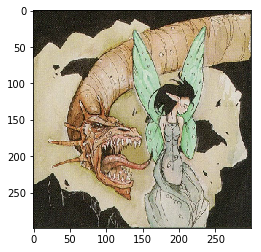

In [3]:
# Sanity check on the data

iterator = training_data.make_one_shot_iterator()
with tf.Session() as sess:
    batch = sess.run(iterator.get_next())

print("".join(chr(t) for t in batch[0]['tokens'][0] if t))
print(batch[1][0])
plt.imshow(batch[0]['image'][0])

In [9]:
training_names = data.extract_card_names_from_dataset(data.make_dataset(str(TRAIN_DATA_PATH), features=features), sess)
validation_names = data.extract_card_names_from_dataset(data.make_dataset(str(VALIDATION_DATA_PATH), features=features), sess)
test_names = data.extract_card_names_from_dataset(all_test_data, sess)

In [10]:
assert len(set(training_names)) == len(training_names)
assert len(set(validation_names)) == len(validation_names)
assert len(set(test_names)) == len(test_names)
assert len(set(training_names).union(set(validation_names))) == len(set(training_names)) + len(set(validation_names))
assert len(set(training_names).union(set(test_names))) == len(set(training_names)) + len(set(test_names))

In [33]:
legacy_names = data.extract_card_names_from_dataset(legacy_test_data, sess)
modern_names = data.extract_card_names_from_dataset(modern_test_data, sess)
all_names = data.extract_card_names_from_dataset(all_test_data, sess)

In [34]:
assert len(set(legacy_names)) == len(legacy_names)
assert len(set(legacy_names).union(set(modern_names))) == len(set(legacy_names)) + len(set(modern_names))

In [17]:
importlib.reload(text_model)

config = text_model.Config(lstm_layers=1,
                           lstm_size=256,
                           embedding_size=64,
                           attention_num_heads=3,
                           attention_head_size=64,
                           # embedding_regularization_coef=1e-4,
                           # dense_regularization_coef=1e-4,
                           feature_params={'vocab_size': 255},)
model = text_model.Model(config)
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(x=training_data[0]['tokens'],
          y=training_data[1],
          validation_data=(validation_data[0]['tokens'], validation_data[1]),
          epochs=40)

/home/derick/.conda/envs/tf-1.12/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 14217 samples, validate on 1753 samples
Epoch 1/40


   32/14217 [..............................] - ETA: 13:58 - loss: 1.3985 - acc: 0.2812

   64/14217 [..............................] - ETA: 7:43 - loss: 1.3957 - acc: 0.4375 

   96/14217 [..............................] - ETA: 5:42 - loss: 1.3924 - acc: 0.4896

  128/14217 [..............................] - ETA: 4:41 - loss: 1.3874 - acc: 0.5234

  160/14217 [..............................] - ETA: 4:05 - loss: 1.3853 - acc: 0.5000

  192/14217 [..............................] - ETA: 3:40 - loss: 1.3762 - acc: 0.5156

  224/14217 [..............................] - ETA: 3:22 - loss: 1.3637 - acc: 0.5312

  256/14217 [..............................] - ETA: 3:09 - loss: 1.3492 - acc: 0.5430

  288/14217 [..............................] - ETA: 2:59 - loss: 1.3398 - acc: 0.5417

  320/14217 [..............................] - ETA: 2:50 - loss: 1.3381 - acc: 0.5250

  352/14217 [..............................] - ETA: 2:43 - loss: 1.3159 - acc: 0.5284

  384/14217 [..............................] - ETA: 2:38 - loss: 1.2948 - acc: 0.5312

  416/14217 [..............................] - ETA: 2:32 - loss: 1.2954 - acc: 0.5216

  448/14217 [..............................] - ETA: 2:28 - loss: 1.2785 - acc: 0.5246

  480/14217 [>.............................] - ETA: 2:26 - loss: 1.2764 - acc: 0.5250

  512/14217 [>.............................] - ETA: 2:23 - loss: 1.2624 - acc: 0.5332

  544/14217 [>.............................] - ETA: 2:20 - loss: 1.2517 - acc: 0.5368

  576/14217 [>.............................] - ETA: 2:18 - loss: 1.2484 - acc: 0.5347

  608/14217 [>.............................] - ETA: 2:16 - loss: 1.2393 - acc: 0.5378

  640/14217 [>.............................] - ETA: 2:14 - loss: 1.2254 - acc: 0.5406

  672/14217 [>.............................] - ETA: 2:12 - loss: 1.2153 - acc: 0.5461

  704/14217 [>.............................] - ETA: 2:10 - loss: 1.2043 - acc: 0.5497

  736/14217 [>.............................] - ETA: 2:08 - loss: 1.2036 - acc: 0.5476

  768/14217 [>.............................] - ETA: 2:07 - loss: 1.2055 - acc: 0.5456

  800/14217 [>.............................] - ETA: 2:05 - loss: 1.1978 - acc: 0.5463

  832/14217 [>.............................] - ETA: 2:04 - loss: 1.1937 - acc: 0.5481

  864/14217 [>.............................] - ETA: 2:02 - loss: 1.1940 - acc: 0.5463

  896/14217 [>.............................] - ETA: 2:01 - loss: 1.1923 - acc: 0.5458

  928/14217 [>.............................] - ETA: 2:00 - loss: 1.1900 - acc: 0.5453

  960/14217 [=>............................] - ETA: 1:59 - loss: 1.1912 - acc: 0.5417

  992/14217 [=>............................] - ETA: 1:58 - loss: 1.1879 - acc: 0.5423

 1024/14217 [=>............................] - ETA: 1:57 - loss: 1.1844 - acc: 0.5430

 1056/14217 [=>............................] - ETA: 1:56 - loss: 1.1792 - acc: 0.5455

 1088/14217 [=>............................] - ETA: 1:55 - loss: 1.1771 - acc: 0.5450

 1120/14217 [=>............................] - ETA: 1:55 - loss: 1.1723 - acc: 0.5446

 1152/14217 [=>............................] - ETA: 1:54 - loss: 1.1752 - acc: 0.5391

 1184/14217 [=>............................] - ETA: 1:53 - loss: 1.1732 - acc: 0.5380

 1216/14217 [=>............................] - ETA: 1:52 - loss: 1.1756 - acc: 0.5395

 1248/14217 [=>............................] - ETA: 1:52 - loss: 1.1751 - acc: 0.5393

 1280/14217 [=>............................] - ETA: 1:51 - loss: 1.1744 - acc: 0.5391

 1312/14217 [=>............................] - ETA: 1:50 - loss: 1.1719 - acc: 0.5412

 1344/14217 [=>............................] - ETA: 1:49 - loss: 1.1661 - acc: 0.5446

 1376/14217 [=>............................] - ETA: 1:49 - loss: 1.1656 - acc: 0.5443

 1408/14217 [=>............................] - ETA: 1:48 - loss: 1.1652 - acc: 0.5440

 1440/14217 [==>...........................] - ETA: 1:48 - loss: 1.1646 - acc: 0.5437

 1472/14217 [==>...........................] - ETA: 1:47 - loss: 1.1644 - acc: 0.5428

 1504/14217 [==>...........................] - ETA: 1:46 - loss: 1.1647 - acc: 0.5426

 1536/14217 [==>...........................] - ETA: 1:46 - loss: 1.1651 - acc: 0.5417

 1568/14217 [==>...........................] - ETA: 1:45 - loss: 1.1640 - acc: 0.5408

 1600/14217 [==>...........................] - ETA: 1:45 - loss: 1.1590 - acc: 0.5450

 1632/14217 [==>...........................] - ETA: 1:45 - loss: 1.1573 - acc: 0.5441

 1664/14217 [==>...........................] - ETA: 1:44 - loss: 1.1548 - acc: 0.5457

 1696/14217 [==>...........................] - ETA: 1:44 - loss: 1.1527 - acc: 0.5466

 1728/14217 [==>...........................] - ETA: 1:43 - loss: 1.1514 - acc: 0.5475

 1760/14217 [==>...........................] - ETA: 1:43 - loss: 1.1479 - acc: 0.5500

 1792/14217 [==>...........................] - ETA: 1:44 - loss: 1.1527 - acc: 0.5480

 1824/14217 [==>...........................] - ETA: 1:43 - loss: 1.1479 - acc: 0.5515

 1856/14217 [==>...........................] - ETA: 1:43 - loss: 1.1466 - acc: 0.5523

 1888/14217 [==>...........................] - ETA: 1:42 - loss: 1.1469 - acc: 0.5514

 1920/14217 [===>..........................] - ETA: 1:42 - loss: 1.1480 - acc: 0.5505

 1952/14217 [===>..........................] - ETA: 1:41 - loss: 1.1463 - acc: 0.5507

 1984/14217 [===>..........................] - ETA: 1:41 - loss: 1.1424 - acc: 0.5539

 2016/14217 [===>..........................] - ETA: 1:41 - loss: 1.1427 - acc: 0.5536

 2048/14217 [===>..........................] - ETA: 1:40 - loss: 1.1387 - acc: 0.5557

 2080/14217 [===>..........................] - ETA: 1:40 - loss: 1.1407 - acc: 0.5543

 2112/14217 [===>..........................] - ETA: 1:39 - loss: 1.1412 - acc: 0.5540

 2144/14217 [===>..........................] - ETA: 1:39 - loss: 1.1400 - acc: 0.5546

 2176/14217 [===>..........................] - ETA: 1:38 - loss: 1.1386 - acc: 0.5547

 2208/14217 [===>..........................] - ETA: 1:38 - loss: 1.1382 - acc: 0.5539

 2240/14217 [===>..........................] - ETA: 1:38 - loss: 1.1379 - acc: 0.5536

 2272/14217 [===>..........................] - ETA: 1:37 - loss: 1.1367 - acc: 0.5541

 2304/14217 [===>..........................] - ETA: 1:37 - loss: 1.1331 - acc: 0.5560

 2336/14217 [===>..........................] - ETA: 1:36 - loss: 1.1290 - acc: 0.5578

 2368/14217 [===>..........................] - ETA: 1:36 - loss: 1.1252 - acc: 0.5600

 2400/14217 [====>.........................] - ETA: 1:36 - loss: 1.1216 - acc: 0.5617

 2432/14217 [====>.........................] - ETA: 1:35 - loss: 1.1236 - acc: 0.5604

 2464/14217 [====>.........................] - ETA: 1:35 - loss: 1.1223 - acc: 0.5617

 2496/14217 [====>.........................] - ETA: 1:34 - loss: 1.1209 - acc: 0.5625

 2528/14217 [====>.........................] - ETA: 1:34 - loss: 1.1216 - acc: 0.5629

 2560/14217 [====>.........................] - ETA: 1:34 - loss: 1.1221 - acc: 0.5629

 2592/14217 [====>.........................] - ETA: 1:33 - loss: 1.1236 - acc: 0.5613

 2624/14217 [====>.........................] - ETA: 1:33 - loss: 1.1239 - acc: 0.5610

 2656/14217 [====>.........................] - ETA: 1:33 - loss: 1.1251 - acc: 0.5610

 2688/14217 [====>.........................] - ETA: 1:33 - loss: 1.1243 - acc: 0.5625

 2720/14217 [====>.........................] - ETA: 1:32 - loss: 1.1246 - acc: 0.5625

 2752/14217 [====>.........................] - ETA: 1:32 - loss: 1.1237 - acc: 0.5632

 2784/14217 [====>.........................] - ETA: 1:32 - loss: 1.1220 - acc: 0.5639

 2816/14217 [====>.........................] - ETA: 1:31 - loss: 1.1204 - acc: 0.5646

 2848/14217 [=====>........................] - ETA: 1:31 - loss: 1.1216 - acc: 0.5636

 2880/14217 [=====>........................] - ETA: 1:30 - loss: 1.1221 - acc: 0.5628

 2912/14217 [=====>........................] - ETA: 1:30 - loss: 1.1205 - acc: 0.5632

 2944/14217 [=====>........................] - ETA: 1:30 - loss: 1.1207 - acc: 0.5628

 2976/14217 [=====>........................] - ETA: 1:30 - loss: 1.1267 - acc: 0.5608

 3008/14217 [=====>........................] - ETA: 1:29 - loss: 1.1266 - acc: 0.5608

 3040/14217 [=====>........................] - ETA: 1:29 - loss: 1.1255 - acc: 0.5622

 3072/14217 [=====>........................] - ETA: 1:29 - loss: 1.1241 - acc: 0.5628

 3104/14217 [=====>........................] - ETA: 1:28 - loss: 1.1235 - acc: 0.5631

 3136/14217 [=====>........................] - ETA: 1:28 - loss: 1.1236 - acc: 0.5625

 3168/14217 [=====>........................] - ETA: 1:28 - loss: 1.1236 - acc: 0.5619

 3200/14217 [=====>........................] - ETA: 1:27 - loss: 1.1224 - acc: 0.5619

 3232/14217 [=====>........................] - ETA: 1:27 - loss: 1.1224 - acc: 0.5622

 3264/14217 [=====>........................] - ETA: 1:27 - loss: 1.1232 - acc: 0.5616

 3296/14217 [=====>........................] - ETA: 1:26 - loss: 1.1221 - acc: 0.5622

 3328/14217 [======>.......................] - ETA: 1:26 - loss: 1.1212 - acc: 0.5628

 3360/14217 [======>.......................] - ETA: 1:26 - loss: 1.1196 - acc: 0.5640

 3392/14217 [======>.......................] - ETA: 1:25 - loss: 1.1166 - acc: 0.5654

 3424/14217 [======>.......................] - ETA: 1:25 - loss: 1.1164 - acc: 0.5648

 3456/14217 [======>.......................] - ETA: 1:25 - loss: 1.1156 - acc: 0.5651

 3488/14217 [======>.......................] - ETA: 1:25 - loss: 1.1162 - acc: 0.5648

 3520/14217 [======>.......................] - ETA: 1:24 - loss: 1.1155 - acc: 0.5651

 3552/14217 [======>.......................] - ETA: 1:24 - loss: 1.1165 - acc: 0.5642

 3584/14217 [======>.......................] - ETA: 1:24 - loss: 1.1154 - acc: 0.5650

 3616/14217 [======>.......................] - ETA: 1:23 - loss: 1.1130 - acc: 0.5655

 3648/14217 [======>.......................] - ETA: 1:23 - loss: 1.1133 - acc: 0.5655

 3680/14217 [======>.......................] - ETA: 1:23 - loss: 1.1130 - acc: 0.5663

 3712/14217 [======>.......................] - ETA: 1:22 - loss: 1.1126 - acc: 0.5668

 3744/14217 [======>.......................] - ETA: 1:22 - loss: 1.1125 - acc: 0.5665

 3776/14217 [======>.......................] - ETA: 1:22 - loss: 1.1132 - acc: 0.5659

 3808/14217 [=======>......................] - ETA: 1:22 - loss: 1.1136 - acc: 0.5662

 3840/14217 [=======>......................] - ETA: 1:21 - loss: 1.1137 - acc: 0.5654

 3872/14217 [=======>......................] - ETA: 1:22 - loss: 1.1125 - acc: 0.5666

 3904/14217 [=======>......................] - ETA: 1:21 - loss: 1.1113 - acc: 0.5676

 3936/14217 [=======>......................] - ETA: 1:21 - loss: 1.1108 - acc: 0.5671

 3968/14217 [=======>......................] - ETA: 1:21 - loss: 1.1095 - acc: 0.5678

 4000/14217 [=======>......................] - ETA: 1:21 - loss: 1.1114 - acc: 0.5673

 4032/14217 [=======>......................] - ETA: 1:21 - loss: 1.1108 - acc: 0.5672

 4064/14217 [=======>......................] - ETA: 1:20 - loss: 1.1107 - acc: 0.5672

 4096/14217 [=======>......................] - ETA: 1:20 - loss: 1.1086 - acc: 0.5674

 4128/14217 [=======>......................] - ETA: 1:20 - loss: 1.1099 - acc: 0.5659

 4160/14217 [=======>......................] - ETA: 1:20 - loss: 1.1089 - acc: 0.5661

 4192/14217 [=======>......................] - ETA: 1:19 - loss: 1.1077 - acc: 0.5663

 4224/14217 [=======>......................] - ETA: 1:19 - loss: 1.1069 - acc: 0.5668

 4256/14217 [=======>......................] - ETA: 1:19 - loss: 1.1085 - acc: 0.5656

 4288/14217 [========>.....................] - ETA: 1:19 - loss: 1.1094 - acc: 0.5651

 4320/14217 [========>.....................] - ETA: 1:18 - loss: 1.1095 - acc: 0.5646

 4352/14217 [========>.....................] - ETA: 1:18 - loss: 1.1091 - acc: 0.5648

 4384/14217 [========>.....................] - ETA: 1:18 - loss: 1.1083 - acc: 0.5652

 4416/14217 [========>.....................] - ETA: 1:17 - loss: 1.1082 - acc: 0.5654

 4448/14217 [========>.....................] - ETA: 1:17 - loss: 1.1075 - acc: 0.5661

 4480/14217 [========>.....................] - ETA: 1:17 - loss: 1.1070 - acc: 0.5661

 4512/14217 [========>.....................] - ETA: 1:17 - loss: 1.1079 - acc: 0.5656

 4544/14217 [========>.....................] - ETA: 1:17 - loss: 1.1063 - acc: 0.5667

 4576/14217 [========>.....................] - ETA: 1:17 - loss: 1.1079 - acc: 0.5656

 4608/14217 [========>.....................] - ETA: 1:16 - loss: 1.1094 - acc: 0.5645

 4640/14217 [========>.....................] - ETA: 1:16 - loss: 1.1080 - acc: 0.5657

 4672/14217 [========>.....................] - ETA: 1:16 - loss: 1.1072 - acc: 0.5657

 4704/14217 [========>.....................] - ETA: 1:16 - loss: 1.1080 - acc: 0.5655

 4736/14217 [========>.....................] - ETA: 1:15 - loss: 1.1071 - acc: 0.5661

 4768/14217 [=========>....................] - ETA: 1:15 - loss: 1.1084 - acc: 0.5659

 4800/14217 [=========>....................] - ETA: 1:15 - loss: 1.1077 - acc: 0.5656

 4832/14217 [=========>....................] - ETA: 1:14 - loss: 1.1064 - acc: 0.5664

 4864/14217 [=========>....................] - ETA: 1:14 - loss: 1.1060 - acc: 0.5662

 4896/14217 [=========>....................] - ETA: 1:14 - loss: 1.1043 - acc: 0.5670

 4928/14217 [=========>....................] - ETA: 1:14 - loss: 1.1038 - acc: 0.5670

 4960/14217 [=========>....................] - ETA: 1:13 - loss: 1.1031 - acc: 0.5673

 4992/14217 [=========>....................] - ETA: 1:13 - loss: 1.1027 - acc: 0.5669

 5024/14217 [=========>....................] - ETA: 1:13 - loss: 1.1032 - acc: 0.5671

 5056/14217 [=========>....................] - ETA: 1:12 - loss: 1.1022 - acc: 0.5680

 5088/14217 [=========>....................] - ETA: 1:12 - loss: 1.1022 - acc: 0.5678

 5120/14217 [=========>....................] - ETA: 1:12 - loss: 1.1027 - acc: 0.5672

 5152/14217 [=========>....................] - ETA: 1:12 - loss: 1.1016 - acc: 0.5679

 5184/14217 [=========>....................] - ETA: 1:11 - loss: 1.1002 - acc: 0.5689

 5216/14217 [==========>...................] - ETA: 1:12 - loss: 1.0998 - acc: 0.5690

 5248/14217 [==========>...................] - ETA: 1:12 - loss: 1.0990 - acc: 0.5694

 5280/14217 [==========>...................] - ETA: 1:11 - loss: 1.0976 - acc: 0.5697

 5312/14217 [==========>...................] - ETA: 1:11 - loss: 1.0973 - acc: 0.5697

 5344/14217 [==========>...................] - ETA: 1:11 - loss: 1.0965 - acc: 0.5702

 5376/14217 [==========>...................] - ETA: 1:11 - loss: 1.0961 - acc: 0.5701

 5408/14217 [==========>...................] - ETA: 1:10 - loss: 1.0944 - acc: 0.5714

 5440/14217 [==========>...................] - ETA: 1:10 - loss: 1.0943 - acc: 0.5715

 5472/14217 [==========>...................] - ETA: 1:10 - loss: 1.0931 - acc: 0.5720

 5504/14217 [==========>...................] - ETA: 1:09 - loss: 1.0931 - acc: 0.5721

 5536/14217 [==========>...................] - ETA: 1:09 - loss: 1.0931 - acc: 0.5726

 5568/14217 [==========>...................] - ETA: 1:09 - loss: 1.0923 - acc: 0.5729

 5600/14217 [==========>...................] - ETA: 1:08 - loss: 1.0918 - acc: 0.5729

 5632/14217 [==========>...................] - ETA: 1:08 - loss: 1.0918 - acc: 0.5726

 5664/14217 [==========>...................] - ETA: 1:08 - loss: 1.0915 - acc: 0.5726

 5696/14217 [===========>..................] - ETA: 1:08 - loss: 1.0915 - acc: 0.5727

 5728/14217 [===========>..................] - ETA: 1:07 - loss: 1.0916 - acc: 0.5726

 5760/14217 [===========>..................] - ETA: 1:07 - loss: 1.0923 - acc: 0.5720

 5792/14217 [===========>..................] - ETA: 1:07 - loss: 1.0910 - acc: 0.5722

 5824/14217 [===========>..................] - ETA: 1:06 - loss: 1.0905 - acc: 0.5721

 5856/14217 [===========>..................] - ETA: 1:06 - loss: 1.0901 - acc: 0.5722

 5888/14217 [===========>..................] - ETA: 1:06 - loss: 1.0899 - acc: 0.5722

 5920/14217 [===========>..................] - ETA: 1:06 - loss: 1.0903 - acc: 0.5718

 5952/14217 [===========>..................] - ETA: 1:05 - loss: 1.0913 - acc: 0.5712

 5984/14217 [===========>..................] - ETA: 1:05 - loss: 1.0903 - acc: 0.5719

 6016/14217 [===========>..................] - ETA: 1:05 - loss: 1.0898 - acc: 0.5720

 6048/14217 [===========>..................] - ETA: 1:04 - loss: 1.0900 - acc: 0.5719

 6080/14217 [===========>..................] - ETA: 1:04 - loss: 1.0899 - acc: 0.5722

 6112/14217 [===========>..................] - ETA: 1:04 - loss: 1.0895 - acc: 0.5726

 6144/14217 [===========>..................] - ETA: 1:04 - loss: 1.0895 - acc: 0.5726

 6176/14217 [============>.................] - ETA: 1:03 - loss: 1.0904 - acc: 0.5719

 6208/14217 [============>.................] - ETA: 1:03 - loss: 1.0920 - acc: 0.5710

 6240/14217 [============>.................] - ETA: 1:03 - loss: 1.0918 - acc: 0.5715

 6272/14217 [============>.................] - ETA: 1:03 - loss: 1.0918 - acc: 0.5711

 6304/14217 [============>.................] - ETA: 1:02 - loss: 1.0918 - acc: 0.5715

 6336/14217 [============>.................] - ETA: 1:02 - loss: 1.0913 - acc: 0.5712

 6368/14217 [============>.................] - ETA: 1:02 - loss: 1.0918 - acc: 0.5708

 6400/14217 [============>.................] - ETA: 1:01 - loss: 1.0917 - acc: 0.5708

 6432/14217 [============>.................] - ETA: 1:01 - loss: 1.0922 - acc: 0.5701

 6464/14217 [============>.................] - ETA: 1:01 - loss: 1.0920 - acc: 0.5702

 6496/14217 [============>.................] - ETA: 1:01 - loss: 1.0932 - acc: 0.5691

 6528/14217 [============>.................] - ETA: 1:00 - loss: 1.0925 - acc: 0.5695

 6560/14217 [============>.................] - ETA: 1:00 - loss: 1.0918 - acc: 0.5691

 6592/14217 [============>.................] - ETA: 1:00 - loss: 1.0911 - acc: 0.5692

 6624/14217 [============>.................] - ETA: 1:00 - loss: 1.0906 - acc: 0.5690

 6656/14217 [=============>................] - ETA: 59s - loss: 1.0911 - acc: 0.5688 

 6688/14217 [=============>................] - ETA: 59s - loss: 1.0900 - acc: 0.5694

 6720/14217 [=============>................] - ETA: 59s - loss: 1.0885 - acc: 0.5699

 6752/14217 [=============>................] - ETA: 58s - loss: 1.0886 - acc: 0.5702

 6784/14217 [=============>................] - ETA: 58s - loss: 1.0887 - acc: 0.5702

 6816/14217 [=============>................] - ETA: 58s - loss: 1.0881 - acc: 0.5703

 6848/14217 [=============>................] - ETA: 58s - loss: 1.0871 - acc: 0.5705

 6880/14217 [=============>................] - ETA: 57s - loss: 1.0861 - acc: 0.5708

 6912/14217 [=============>................] - ETA: 57s - loss: 1.0867 - acc: 0.5705

 6944/14217 [=============>................] - ETA: 57s - loss: 1.0863 - acc: 0.5706

 6976/14217 [=============>................] - ETA: 57s - loss: 1.0854 - acc: 0.5714

 7008/14217 [=============>................] - ETA: 56s - loss: 1.0864 - acc: 0.5706

 7040/14217 [=============>................] - ETA: 56s - loss: 1.0856 - acc: 0.5712

 7072/14217 [=============>................] - ETA: 56s - loss: 1.0848 - acc: 0.5715

 7104/14217 [=============>................] - ETA: 55s - loss: 1.0833 - acc: 0.5724

 7136/14217 [==============>...............] - ETA: 55s - loss: 1.0830 - acc: 0.5723

 7168/14217 [==============>...............] - ETA: 55s - loss: 1.0815 - acc: 0.5730

 7200/14217 [==============>...............] - ETA: 55s - loss: 1.0805 - acc: 0.5735

 7232/14217 [==============>...............] - ETA: 54s - loss: 1.0820 - acc: 0.5730

 7264/14217 [==============>...............] - ETA: 54s - loss: 1.0824 - acc: 0.5730

 7296/14217 [==============>...............] - ETA: 54s - loss: 1.0829 - acc: 0.5725

 7328/14217 [==============>...............] - ETA: 54s - loss: 1.0824 - acc: 0.5727

 7360/14217 [==============>...............] - ETA: 53s - loss: 1.0824 - acc: 0.5727

 7392/14217 [==============>...............] - ETA: 53s - loss: 1.0823 - acc: 0.5729

 7424/14217 [==============>...............] - ETA: 53s - loss: 1.0823 - acc: 0.5731

 7456/14217 [==============>...............] - ETA: 53s - loss: 1.0821 - acc: 0.5732

 7488/14217 [==============>...............] - ETA: 52s - loss: 1.0820 - acc: 0.5733

 7520/14217 [==============>...............] - ETA: 52s - loss: 1.0825 - acc: 0.5731

 7552/14217 [==============>...............] - ETA: 52s - loss: 1.0821 - acc: 0.5732

 7584/14217 [===============>..............] - ETA: 51s - loss: 1.0824 - acc: 0.5732

 7616/14217 [===============>..............] - ETA: 51s - loss: 1.0822 - acc: 0.5733

 7648/14217 [===============>..............] - ETA: 51s - loss: 1.0814 - acc: 0.5739

 7680/14217 [===============>..............] - ETA: 51s - loss: 1.0814 - acc: 0.5738

 7712/14217 [===============>..............] - ETA: 50s - loss: 1.0813 - acc: 0.5738

 7744/14217 [===============>..............] - ETA: 50s - loss: 1.0819 - acc: 0.5736

 7776/14217 [===============>..............] - ETA: 50s - loss: 1.0816 - acc: 0.5742

 7808/14217 [===============>..............] - ETA: 50s - loss: 1.0818 - acc: 0.5743

 7840/14217 [===============>..............] - ETA: 49s - loss: 1.0805 - acc: 0.5747

 7872/14217 [===============>..............] - ETA: 49s - loss: 1.0799 - acc: 0.5748

 7904/14217 [===============>..............] - ETA: 49s - loss: 1.0793 - acc: 0.5750

 7936/14217 [===============>..............] - ETA: 49s - loss: 1.0791 - acc: 0.5748

 7968/14217 [===============>..............] - ETA: 48s - loss: 1.0795 - acc: 0.5743

 8000/14217 [===============>..............] - ETA: 48s - loss: 1.0801 - acc: 0.5739

 8032/14217 [===============>..............] - ETA: 48s - loss: 1.0802 - acc: 0.5742

 8064/14217 [================>.............] - ETA: 48s - loss: 1.0807 - acc: 0.5742

 8096/14217 [================>.............] - ETA: 47s - loss: 1.0804 - acc: 0.5742

 8128/14217 [================>.............] - ETA: 47s - loss: 1.0802 - acc: 0.5744

 8160/14217 [================>.............] - ETA: 47s - loss: 1.0802 - acc: 0.5743

 8192/14217 [================>.............] - ETA: 46s - loss: 1.0796 - acc: 0.5746

 8224/14217 [================>.............] - ETA: 46s - loss: 1.0796 - acc: 0.5742

 8256/14217 [================>.............] - ETA: 46s - loss: 1.0788 - acc: 0.5747

 8288/14217 [================>.............] - ETA: 46s - loss: 1.0778 - acc: 0.5753

 8320/14217 [================>.............] - ETA: 45s - loss: 1.0777 - acc: 0.5751

 8352/14217 [================>.............] - ETA: 45s - loss: 1.0771 - acc: 0.5753

 8384/14217 [================>.............] - ETA: 45s - loss: 1.0768 - acc: 0.5749

 8416/14217 [================>.............] - ETA: 45s - loss: 1.0768 - acc: 0.5747

 8448/14217 [================>.............] - ETA: 44s - loss: 1.0763 - acc: 0.5752

 8480/14217 [================>.............] - ETA: 44s - loss: 1.0761 - acc: 0.5757

 8512/14217 [================>.............] - ETA: 44s - loss: 1.0755 - acc: 0.5758

 8544/14217 [=================>............] - ETA: 44s - loss: 1.0766 - acc: 0.5750

 8576/14217 [=================>............] - ETA: 43s - loss: 1.0766 - acc: 0.5751

 8608/14217 [=================>............] - ETA: 43s - loss: 1.0756 - acc: 0.5757

 8640/14217 [=================>............] - ETA: 43s - loss: 1.0758 - acc: 0.5753

 8672/14217 [=================>............] - ETA: 43s - loss: 1.0750 - acc: 0.5755

 8704/14217 [=================>............] - ETA: 42s - loss: 1.0749 - acc: 0.5754

 8736/14217 [=================>............] - ETA: 42s - loss: 1.0753 - acc: 0.5752

 8768/14217 [=================>............] - ETA: 42s - loss: 1.0748 - acc: 0.5755

 8800/14217 [=================>............] - ETA: 42s - loss: 1.0751 - acc: 0.5751

 8832/14217 [=================>............] - ETA: 41s - loss: 1.0748 - acc: 0.5754

 8864/14217 [=================>............] - ETA: 41s - loss: 1.0740 - acc: 0.5758

 8896/14217 [=================>............] - ETA: 41s - loss: 1.0736 - acc: 0.5761

 8928/14217 [=================>............] - ETA: 41s - loss: 1.0732 - acc: 0.5762

 8960/14217 [=================>............] - ETA: 40s - loss: 1.0721 - acc: 0.5766

 8992/14217 [=================>............] - ETA: 40s - loss: 1.0718 - acc: 0.5765

 9024/14217 [==================>...........] - ETA: 40s - loss: 1.0734 - acc: 0.5760

 9056/14217 [==================>...........] - ETA: 39s - loss: 1.0736 - acc: 0.5758

 9088/14217 [==================>...........] - ETA: 39s - loss: 1.0730 - acc: 0.5761

 9120/14217 [==================>...........] - ETA: 39s - loss: 1.0725 - acc: 0.5763

 9152/14217 [==================>...........] - ETA: 39s - loss: 1.0727 - acc: 0.5764

 9184/14217 [==================>...........] - ETA: 38s - loss: 1.0730 - acc: 0.5761

 9216/14217 [==================>...........] - ETA: 38s - loss: 1.0728 - acc: 0.5762

 9248/14217 [==================>...........] - ETA: 38s - loss: 1.0726 - acc: 0.5761

 9280/14217 [==================>...........] - ETA: 38s - loss: 1.0723 - acc: 0.5762

 9312/14217 [==================>...........] - ETA: 37s - loss: 1.0722 - acc: 0.5764

 9344/14217 [==================>...........] - ETA: 37s - loss: 1.0723 - acc: 0.5763

 9376/14217 [==================>...........] - ETA: 37s - loss: 1.0723 - acc: 0.5762

 9408/14217 [==================>...........] - ETA: 37s - loss: 1.0720 - acc: 0.5761

 9440/14217 [==================>...........] - ETA: 36s - loss: 1.0717 - acc: 0.5760

 9472/14217 [==================>...........] - ETA: 36s - loss: 1.0722 - acc: 0.5754

 9504/14217 [===================>..........] - ETA: 36s - loss: 1.0712 - acc: 0.5757

 9536/14217 [===================>..........] - ETA: 36s - loss: 1.0707 - acc: 0.5758

 9568/14217 [===================>..........] - ETA: 35s - loss: 1.0703 - acc: 0.5761

 9600/14217 [===================>..........] - ETA: 35s - loss: 1.0691 - acc: 0.5768

 9632/14217 [===================>..........] - ETA: 35s - loss: 1.0690 - acc: 0.5769

 9664/14217 [===================>..........] - ETA: 35s - loss: 1.0693 - acc: 0.5771

 9696/14217 [===================>..........] - ETA: 34s - loss: 1.0691 - acc: 0.5771

 9728/14217 [===================>..........] - ETA: 34s - loss: 1.0684 - acc: 0.5774

 9760/14217 [===================>..........] - ETA: 34s - loss: 1.0679 - acc: 0.5776

 9792/14217 [===================>..........] - ETA: 34s - loss: 1.0683 - acc: 0.5773

 9824/14217 [===================>..........] - ETA: 33s - loss: 1.0679 - acc: 0.5777

 9856/14217 [===================>..........] - ETA: 33s - loss: 1.0677 - acc: 0.5777

 9888/14217 [===================>..........] - ETA: 33s - loss: 1.0680 - acc: 0.5774

 9920/14217 [===================>..........] - ETA: 33s - loss: 1.0682 - acc: 0.5771

 9952/14217 [====================>.........] - ETA: 32s - loss: 1.0684 - acc: 0.5771

 9984/14217 [====================>.........] - ETA: 32s - loss: 1.0681 - acc: 0.5770

10016/14217 [====================>.........] - ETA: 32s - loss: 1.0679 - acc: 0.5775

10048/14217 [====================>.........] - ETA: 32s - loss: 1.0674 - acc: 0.5777

10080/14217 [====================>.........] - ETA: 31s - loss: 1.0679 - acc: 0.5774

10112/14217 [====================>.........] - ETA: 31s - loss: 1.0680 - acc: 0.5774

10144/14217 [====================>.........] - ETA: 31s - loss: 1.0675 - acc: 0.5777

10176/14217 [====================>.........] - ETA: 31s - loss: 1.0671 - acc: 0.5776

10208/14217 [====================>.........] - ETA: 30s - loss: 1.0672 - acc: 0.5774

10240/14217 [====================>.........] - ETA: 30s - loss: 1.0674 - acc: 0.5774

10272/14217 [====================>.........] - ETA: 30s - loss: 1.0672 - acc: 0.5775

10304/14217 [====================>.........] - ETA: 30s - loss: 1.0661 - acc: 0.5783

10336/14217 [====================>.........] - ETA: 29s - loss: 1.0655 - acc: 0.5785

10368/14217 [====================>.........] - ETA: 29s - loss: 1.0645 - acc: 0.5791

10400/14217 [====================>.........] - ETA: 29s - loss: 1.0647 - acc: 0.5787

10432/14217 [=====================>........] - ETA: 29s - loss: 1.0646 - acc: 0.5787

10464/14217 [=====================>........] - ETA: 28s - loss: 1.0633 - acc: 0.5795

10496/14217 [=====================>........] - ETA: 28s - loss: 1.0631 - acc: 0.5796

10528/14217 [=====================>........] - ETA: 28s - loss: 1.0629 - acc: 0.5797

10560/14217 [=====================>........] - ETA: 28s - loss: 1.0633 - acc: 0.5793

10592/14217 [=====================>........] - ETA: 27s - loss: 1.0624 - acc: 0.5799

10624/14217 [=====================>........] - ETA: 27s - loss: 1.0623 - acc: 0.5798

10656/14217 [=====================>........] - ETA: 27s - loss: 1.0621 - acc: 0.5799

10688/14217 [=====================>........] - ETA: 27s - loss: 1.0618 - acc: 0.5804

10720/14217 [=====================>........] - ETA: 26s - loss: 1.0615 - acc: 0.5802

10752/14217 [=====================>........] - ETA: 26s - loss: 1.0614 - acc: 0.5804

10784/14217 [=====================>........] - ETA: 26s - loss: 1.0609 - acc: 0.5806

10816/14217 [=====================>........] - ETA: 26s - loss: 1.0605 - acc: 0.5808

10848/14217 [=====================>........] - ETA: 25s - loss: 1.0601 - acc: 0.5813

10880/14217 [=====================>........] - ETA: 25s - loss: 1.0595 - acc: 0.5819

10912/14217 [======================>.......] - ETA: 25s - loss: 1.0599 - acc: 0.5817

10944/14217 [======================>.......] - ETA: 25s - loss: 1.0599 - acc: 0.5816

10976/14217 [======================>.......] - ETA: 24s - loss: 1.0595 - acc: 0.5816

11008/14217 [======================>.......] - ETA: 24s - loss: 1.0591 - acc: 0.5819

11040/14217 [======================>.......] - ETA: 24s - loss: 1.0593 - acc: 0.5819

11072/14217 [======================>.......] - ETA: 24s - loss: 1.0586 - acc: 0.5821

11104/14217 [======================>.......] - ETA: 23s - loss: 1.0577 - acc: 0.5825

11136/14217 [======================>.......] - ETA: 23s - loss: 1.0580 - acc: 0.5823

11168/14217 [======================>.......] - ETA: 23s - loss: 1.0577 - acc: 0.5823

11200/14217 [======================>.......] - ETA: 23s - loss: 1.0570 - acc: 0.5825

11232/14217 [======================>.......] - ETA: 22s - loss: 1.0576 - acc: 0.5820

11264/14217 [======================>.......] - ETA: 22s - loss: 1.0581 - acc: 0.5819

11296/14217 [======================>.......] - ETA: 22s - loss: 1.0582 - acc: 0.5819

11328/14217 [======================>.......] - ETA: 22s - loss: 1.0581 - acc: 0.5819

11360/14217 [======================>.......] - ETA: 21s - loss: 1.0582 - acc: 0.5818

11392/14217 [=======================>......] - ETA: 21s - loss: 1.0578 - acc: 0.5819

11424/14217 [=======================>......] - ETA: 21s - loss: 1.0576 - acc: 0.5823

11456/14217 [=======================>......] - ETA: 21s - loss: 1.0571 - acc: 0.5828

11488/14217 [=======================>......] - ETA: 20s - loss: 1.0571 - acc: 0.5827

11520/14217 [=======================>......] - ETA: 20s - loss: 1.0578 - acc: 0.5823

11552/14217 [=======================>......] - ETA: 20s - loss: 1.0577 - acc: 0.5822

11584/14217 [=======================>......] - ETA: 20s - loss: 1.0571 - acc: 0.5825

11616/14217 [=======================>......] - ETA: 19s - loss: 1.0570 - acc: 0.5824

11648/14217 [=======================>......] - ETA: 19s - loss: 1.0572 - acc: 0.5825

11680/14217 [=======================>......] - ETA: 19s - loss: 1.0565 - acc: 0.5830

11712/14217 [=======================>......] - ETA: 19s - loss: 1.0560 - acc: 0.5834

11744/14217 [=======================>......] - ETA: 18s - loss: 1.0555 - acc: 0.5837

11776/14217 [=======================>......] - ETA: 18s - loss: 1.0550 - acc: 0.5839

11808/14217 [=======================>......] - ETA: 18s - loss: 1.0551 - acc: 0.5838

11840/14217 [=======================>......] - ETA: 18s - loss: 1.0552 - acc: 0.5837

11872/14217 [========================>.....] - ETA: 17s - loss: 1.0551 - acc: 0.5837

11904/14217 [========================>.....] - ETA: 17s - loss: 1.0548 - acc: 0.5837

11936/14217 [========================>.....] - ETA: 17s - loss: 1.0546 - acc: 0.5838

11968/14217 [========================>.....] - ETA: 17s - loss: 1.0540 - acc: 0.5841

12000/14217 [========================>.....] - ETA: 16s - loss: 1.0540 - acc: 0.5842

12032/14217 [========================>.....] - ETA: 16s - loss: 1.0544 - acc: 0.5836

12064/14217 [========================>.....] - ETA: 16s - loss: 1.0540 - acc: 0.5840

12096/14217 [========================>.....] - ETA: 16s - loss: 1.0535 - acc: 0.5842

12128/14217 [========================>.....] - ETA: 15s - loss: 1.0532 - acc: 0.5841

12160/14217 [========================>.....] - ETA: 15s - loss: 1.0534 - acc: 0.5839

12192/14217 [========================>.....] - ETA: 15s - loss: 1.0534 - acc: 0.5839

12224/14217 [========================>.....] - ETA: 15s - loss: 1.0532 - acc: 0.5842

12256/14217 [========================>.....] - ETA: 14s - loss: 1.0528 - acc: 0.5844

12288/14217 [========================>.....] - ETA: 14s - loss: 1.0525 - acc: 0.5846

12320/14217 [========================>.....] - ETA: 14s - loss: 1.0523 - acc: 0.5847

12352/14217 [=========================>....] - ETA: 14s - loss: 1.0516 - acc: 0.5850

12384/14217 [=========================>....] - ETA: 14s - loss: 1.0523 - acc: 0.5849

12416/14217 [=========================>....] - ETA: 13s - loss: 1.0518 - acc: 0.5853

12448/14217 [=========================>....] - ETA: 13s - loss: 1.0519 - acc: 0.5852

12480/14217 [=========================>....] - ETA: 13s - loss: 1.0515 - acc: 0.5853

12512/14217 [=========================>....] - ETA: 13s - loss: 1.0516 - acc: 0.5851

12544/14217 [=========================>....] - ETA: 12s - loss: 1.0512 - acc: 0.5855

12576/14217 [=========================>....] - ETA: 12s - loss: 1.0511 - acc: 0.5855

12608/14217 [=========================>....] - ETA: 12s - loss: 1.0513 - acc: 0.5855

12640/14217 [=========================>....] - ETA: 12s - loss: 1.0511 - acc: 0.5857

12672/14217 [=========================>....] - ETA: 11s - loss: 1.0511 - acc: 0.5854

12704/14217 [=========================>....] - ETA: 11s - loss: 1.0512 - acc: 0.5855

12736/14217 [=========================>....] - ETA: 11s - loss: 1.0510 - acc: 0.5858

12768/14217 [=========================>....] - ETA: 11s - loss: 1.0505 - acc: 0.5861

12800/14217 [==========================>...] - ETA: 10s - loss: 1.0504 - acc: 0.5863

12832/14217 [==========================>...] - ETA: 10s - loss: 1.0502 - acc: 0.5866

12864/14217 [==========================>...] - ETA: 10s - loss: 1.0503 - acc: 0.5863

12896/14217 [==========================>...] - ETA: 10s - loss: 1.0498 - acc: 0.5865

12928/14217 [==========================>...] - ETA: 9s - loss: 1.0504 - acc: 0.5862 

12960/14217 [==========================>...] - ETA: 9s - loss: 1.0507 - acc: 0.5858

12992/14217 [==========================>...] - ETA: 9s - loss: 1.0505 - acc: 0.5861

13024/14217 [==========================>...] - ETA: 9s - loss: 1.0506 - acc: 0.5861

13056/14217 [==========================>...] - ETA: 8s - loss: 1.0507 - acc: 0.5862

13088/14217 [==========================>...] - ETA: 8s - loss: 1.0504 - acc: 0.5865

13120/14217 [==========================>...] - ETA: 8s - loss: 1.0507 - acc: 0.5862

13152/14217 [==========================>...] - ETA: 8s - loss: 1.0502 - acc: 0.5866

13184/14217 [==========================>...] - ETA: 7s - loss: 1.0499 - acc: 0.5869

13216/14217 [==========================>...] - ETA: 7s - loss: 1.0499 - acc: 0.5870

13248/14217 [==========================>...] - ETA: 7s - loss: 1.0495 - acc: 0.5872

13280/14217 [===========================>..] - ETA: 7s - loss: 1.0496 - acc: 0.5871

13312/14217 [===========================>..] - ETA: 6s - loss: 1.0497 - acc: 0.5870

13344/14217 [===========================>..] - ETA: 6s - loss: 1.0492 - acc: 0.5872

13376/14217 [===========================>..] - ETA: 6s - loss: 1.0495 - acc: 0.5870

13408/14217 [===========================>..] - ETA: 6s - loss: 1.0492 - acc: 0.5873

13440/14217 [===========================>..] - ETA: 5s - loss: 1.0493 - acc: 0.5874

13472/14217 [===========================>..] - ETA: 5s - loss: 1.0490 - acc: 0.5876

13504/14217 [===========================>..] - ETA: 5s - loss: 1.0492 - acc: 0.5875

13536/14217 [===========================>..] - ETA: 5s - loss: 1.0504 - acc: 0.5869

13568/14217 [===========================>..] - ETA: 4s - loss: 1.0501 - acc: 0.5870

13600/14217 [===========================>..] - ETA: 4s - loss: 1.0498 - acc: 0.5872

13632/14217 [===========================>..] - ETA: 4s - loss: 1.0497 - acc: 0.5871

13664/14217 [===========================>..] - ETA: 4s - loss: 1.0498 - acc: 0.5871

13696/14217 [===========================>..] - ETA: 3s - loss: 1.0490 - acc: 0.5875

13728/14217 [===========================>..] - ETA: 3s - loss: 1.0486 - acc: 0.5876

13760/14217 [============================>.] - ETA: 3s - loss: 1.0490 - acc: 0.5872

13792/14217 [============================>.] - ETA: 3s - loss: 1.0488 - acc: 0.5873

13824/14217 [============================>.] - ETA: 3s - loss: 1.0485 - acc: 0.5874

13856/14217 [============================>.] - ETA: 2s - loss: 1.0493 - acc: 0.5872

13888/14217 [============================>.] - ETA: 2s - loss: 1.0492 - acc: 0.5871

13920/14217 [============================>.] - ETA: 2s - loss: 1.0490 - acc: 0.5872

13952/14217 [============================>.] - ETA: 2s - loss: 1.0484 - acc: 0.5874

13984/14217 [============================>.] - ETA: 1s - loss: 1.0478 - acc: 0.5877

14016/14217 [============================>.] - ETA: 1s - loss: 1.0469 - acc: 0.5882

14048/14217 [============================>.] - ETA: 1s - loss: 1.0470 - acc: 0.5882

14080/14217 [============================>.] - ETA: 1s - loss: 1.0468 - acc: 0.5883

14112/14217 [============================>.] - ETA: 0s - loss: 1.0468 - acc: 0.5882

14144/14217 [============================>.] - ETA: 0s - loss: 1.0467 - acc: 0.5882

14176/14217 [============================>.] - ETA: 0s - loss: 1.0465 - acc: 0.5885

14208/14217 [============================>.] - ETA: 0s - loss: 1.0464 - acc: 0.5887

14217/14217 [==============================] - 112s 8ms/step - loss: 1.0464 - acc: 0.5887 - val_loss: 0.9829 - val_acc: 0.6229


Epoch 2/40


   32/14217 [..............................] - ETA: 1:45 - loss: 0.8667 - acc: 0.7188

   64/14217 [..............................] - ETA: 1:47 - loss: 0.9219 - acc: 0.6719

   96/14217 [..............................] - ETA: 1:45 - loss: 0.9346 - acc: 0.6667

  128/14217 [..............................] - ETA: 1:43 - loss: 0.8418 - acc: 0.7031

  160/14217 [..............................] - ETA: 1:43 - loss: 0.8313 - acc: 0.6937

  192/14217 [..............................] - ETA: 1:44 - loss: 0.8536 - acc: 0.6719

  224/14217 [..............................] - ETA: 1:48 - loss: 0.9002 - acc: 0.6562

  256/14217 [..............................] - ETA: 1:48 - loss: 0.9196 - acc: 0.6523

  288/14217 [..............................] - ETA: 1:46 - loss: 0.9379 - acc: 0.6389

  320/14217 [..............................] - ETA: 1:46 - loss: 0.9372 - acc: 0.6406

  352/14217 [..............................] - ETA: 1:45 - loss: 0.9294 - acc: 0.6420

  384/14217 [..............................] - ETA: 1:45 - loss: 0.9255 - acc: 0.6432

  416/14217 [..............................] - ETA: 1:44 - loss: 0.9263 - acc: 0.6274

  448/14217 [..............................] - ETA: 1:44 - loss: 0.9327 - acc: 0.6250

  480/14217 [>.............................] - ETA: 1:43 - loss: 0.9252 - acc: 0.6333

  512/14217 [>.............................] - ETA: 1:42 - loss: 0.9431 - acc: 0.6230

  544/14217 [>.............................] - ETA: 1:41 - loss: 0.9232 - acc: 0.6324

  576/14217 [>.............................] - ETA: 1:41 - loss: 0.9341 - acc: 0.6319

  608/14217 [>.............................] - ETA: 1:41 - loss: 0.9387 - acc: 0.6266

  640/14217 [>.............................] - ETA: 1:41 - loss: 0.9426 - acc: 0.6266

  672/14217 [>.............................] - ETA: 1:40 - loss: 0.9501 - acc: 0.6265

  704/14217 [>.............................] - ETA: 1:40 - loss: 0.9455 - acc: 0.6293

  736/14217 [>.............................] - ETA: 1:40 - loss: 0.9488 - acc: 0.6264

  768/14217 [>.............................] - ETA: 1:39 - loss: 0.9406 - acc: 0.6315

  800/14217 [>.............................] - ETA: 1:39 - loss: 0.9502 - acc: 0.6262

  832/14217 [>.............................] - ETA: 1:39 - loss: 0.9494 - acc: 0.6286

  864/14217 [>.............................] - ETA: 1:39 - loss: 0.9480 - acc: 0.6285

  896/14217 [>.............................] - ETA: 1:39 - loss: 0.9460 - acc: 0.6272

  928/14217 [>.............................] - ETA: 1:38 - loss: 0.9544 - acc: 0.6239

  960/14217 [=>............................] - ETA: 1:38 - loss: 0.9544 - acc: 0.6250

  992/14217 [=>............................] - ETA: 1:38 - loss: 0.9585 - acc: 0.6220

 1024/14217 [=>............................] - ETA: 1:38 - loss: 0.9635 - acc: 0.6172

 1056/14217 [=>............................] - ETA: 1:37 - loss: 0.9582 - acc: 0.6212

 1088/14217 [=>............................] - ETA: 1:37 - loss: 0.9642 - acc: 0.6176

 1120/14217 [=>............................] - ETA: 1:37 - loss: 0.9684 - acc: 0.6143

 1152/14217 [=>............................] - ETA: 1:36 - loss: 0.9706 - acc: 0.6137

 1184/14217 [=>............................] - ETA: 1:37 - loss: 0.9706 - acc: 0.6140

 1216/14217 [=>............................] - ETA: 1:37 - loss: 0.9700 - acc: 0.6143

 1248/14217 [=>............................] - ETA: 1:37 - loss: 0.9695 - acc: 0.6146

 1280/14217 [=>............................] - ETA: 1:36 - loss: 0.9745 - acc: 0.6133

 1312/14217 [=>............................] - ETA: 1:36 - loss: 0.9736 - acc: 0.6128

 1344/14217 [=>............................] - ETA: 1:36 - loss: 0.9756 - acc: 0.6124

 1376/14217 [=>............................] - ETA: 1:35 - loss: 0.9777 - acc: 0.6105

 1408/14217 [=>............................] - ETA: 1:35 - loss: 0.9803 - acc: 0.6072

 1440/14217 [==>...........................] - ETA: 1:35 - loss: 0.9816 - acc: 0.6069

 1472/14217 [==>...........................] - ETA: 1:34 - loss: 0.9793 - acc: 0.6080

 1504/14217 [==>...........................] - ETA: 1:34 - loss: 0.9763 - acc: 0.6097

 1536/14217 [==>...........................] - ETA: 1:34 - loss: 0.9803 - acc: 0.6087

 1568/14217 [==>...........................] - ETA: 1:34 - loss: 0.9849 - acc: 0.6059

 1600/14217 [==>...........................] - ETA: 1:34 - loss: 0.9892 - acc: 0.6050

 1632/14217 [==>...........................] - ETA: 1:33 - loss: 0.9851 - acc: 0.6072

 1664/14217 [==>...........................] - ETA: 1:34 - loss: 0.9863 - acc: 0.6058

 1696/14217 [==>...........................] - ETA: 1:33 - loss: 0.9884 - acc: 0.6050

 1728/14217 [==>...........................] - ETA: 1:33 - loss: 0.9891 - acc: 0.6036

 1760/14217 [==>...........................] - ETA: 1:33 - loss: 0.9871 - acc: 0.6040

 1792/14217 [==>...........................] - ETA: 1:34 - loss: 0.9882 - acc: 0.6038

 1824/14217 [==>...........................] - ETA: 1:34 - loss: 0.9838 - acc: 0.6058

 1856/14217 [==>...........................] - ETA: 1:33 - loss: 0.9819 - acc: 0.6061

 1888/14217 [==>...........................] - ETA: 1:34 - loss: 0.9792 - acc: 0.6075

 1920/14217 [===>..........................] - ETA: 1:33 - loss: 0.9761 - acc: 0.6089

 1952/14217 [===>..........................] - ETA: 1:33 - loss: 0.9733 - acc: 0.6112

 1984/14217 [===>..........................] - ETA: 1:33 - loss: 0.9718 - acc: 0.6119

 2016/14217 [===>..........................] - ETA: 1:33 - loss: 0.9773 - acc: 0.6091

 2048/14217 [===>..........................] - ETA: 1:34 - loss: 0.9795 - acc: 0.6084

 2080/14217 [===>..........................] - ETA: 1:35 - loss: 0.9822 - acc: 0.6058

 2112/14217 [===>..........................] - ETA: 1:37 - loss: 0.9810 - acc: 0.6061

 2144/14217 [===>..........................] - ETA: 1:38 - loss: 0.9813 - acc: 0.6059

 2176/14217 [===>..........................] - ETA: 1:38 - loss: 0.9781 - acc: 0.6085

 2208/14217 [===>..........................] - ETA: 1:38 - loss: 0.9798 - acc: 0.6069

 2240/14217 [===>..........................] - ETA: 1:38 - loss: 0.9807 - acc: 0.6076

 2272/14217 [===>..........................] - ETA: 1:37 - loss: 0.9798 - acc: 0.6083

 2304/14217 [===>..........................] - ETA: 1:38 - loss: 0.9793 - acc: 0.6094

 2336/14217 [===>..........................] - ETA: 1:38 - loss: 0.9778 - acc: 0.6113

 2368/14217 [===>..........................] - ETA: 1:38 - loss: 0.9760 - acc: 0.6119

 2400/14217 [====>.........................] - ETA: 1:39 - loss: 0.9760 - acc: 0.6117

 2432/14217 [====>.........................] - ETA: 1:39 - loss: 0.9729 - acc: 0.6131

 2464/14217 [====>.........................] - ETA: 1:39 - loss: 0.9734 - acc: 0.6124

 2496/14217 [====>.........................] - ETA: 1:39 - loss: 0.9786 - acc: 0.6094

 2528/14217 [====>.........................] - ETA: 1:39 - loss: 0.9775 - acc: 0.6100

 2560/14217 [====>.........................] - ETA: 1:39 - loss: 0.9752 - acc: 0.6113

 2592/14217 [====>.........................] - ETA: 1:39 - loss: 0.9774 - acc: 0.6100

 2624/14217 [====>.........................] - ETA: 1:40 - loss: 0.9769 - acc: 0.6113

 2656/14217 [====>.........................] - ETA: 1:40 - loss: 0.9773 - acc: 0.6107

 2688/14217 [====>.........................] - ETA: 1:40 - loss: 0.9787 - acc: 0.6097

 2720/14217 [====>.........................] - ETA: 1:41 - loss: 0.9819 - acc: 0.6092

 2752/14217 [====>.........................] - ETA: 1:41 - loss: 0.9821 - acc: 0.6094

 2784/14217 [====>.........................] - ETA: 1:41 - loss: 0.9810 - acc: 0.6106

 2816/14217 [====>.........................] - ETA: 1:40 - loss: 0.9817 - acc: 0.6108

 2848/14217 [=====>........................] - ETA: 1:42 - loss: 0.9834 - acc: 0.6103

 2880/14217 [=====>........................] - ETA: 1:46 - loss: 0.9841 - acc: 0.6087

 2912/14217 [=====>........................] - ETA: 1:49 - loss: 0.9807 - acc: 0.6102

 2944/14217 [=====>........................] - ETA: 1:50 - loss: 0.9821 - acc: 0.6097

 2976/14217 [=====>........................] - ETA: 1:49 - loss: 0.9851 - acc: 0.6079

 3008/14217 [=====>........................] - ETA: 1:49 - loss: 0.9847 - acc: 0.6087

 3040/14217 [=====>........................] - ETA: 1:49 - loss: 0.9845 - acc: 0.6089

 3072/14217 [=====>........................] - ETA: 1:49 - loss: 0.9871 - acc: 0.6074

 3104/14217 [=====>........................] - ETA: 1:49 - loss: 0.9862 - acc: 0.6079

 3136/14217 [=====>........................] - ETA: 1:48 - loss: 0.9874 - acc: 0.6075

 3168/14217 [=====>........................] - ETA: 1:47 - loss: 0.9882 - acc: 0.6073

 3200/14217 [=====>........................] - ETA: 1:47 - loss: 0.9885 - acc: 0.6066

 3232/14217 [=====>........................] - ETA: 1:46 - loss: 0.9879 - acc: 0.6071

 3264/14217 [=====>........................] - ETA: 1:46 - loss: 0.9863 - acc: 0.6081

 3296/14217 [=====>........................] - ETA: 1:46 - loss: 0.9873 - acc: 0.6071

 3328/14217 [======>.......................] - ETA: 1:45 - loss: 0.9859 - acc: 0.6082

 3360/14217 [======>.......................] - ETA: 1:45 - loss: 0.9849 - acc: 0.6089

 3392/14217 [======>.......................] - ETA: 1:44 - loss: 0.9841 - acc: 0.6094

 3424/14217 [======>.......................] - ETA: 1:44 - loss: 0.9843 - acc: 0.6092

 3456/14217 [======>.......................] - ETA: 1:43 - loss: 0.9850 - acc: 0.6082

 3488/14217 [======>.......................] - ETA: 1:42 - loss: 0.9846 - acc: 0.6078

 3520/14217 [======>.......................] - ETA: 1:42 - loss: 0.9815 - acc: 0.6097

 3552/14217 [======>.......................] - ETA: 1:41 - loss: 0.9833 - acc: 0.6081

 3584/14217 [======>.......................] - ETA: 1:41 - loss: 0.9830 - acc: 0.6083

 3616/14217 [======>.......................] - ETA: 1:40 - loss: 0.9829 - acc: 0.6084

 3648/14217 [======>.......................] - ETA: 1:40 - loss: 0.9849 - acc: 0.6083

 3680/14217 [======>.......................] - ETA: 1:39 - loss: 0.9868 - acc: 0.6068

 3712/14217 [======>.......................] - ETA: 1:39 - loss: 0.9858 - acc: 0.6072

 3744/14217 [======>.......................] - ETA: 1:39 - loss: 0.9853 - acc: 0.6076

 3776/14217 [======>.......................] - ETA: 1:38 - loss: 0.9851 - acc: 0.6075

 3808/14217 [=======>......................] - ETA: 1:38 - loss: 0.9859 - acc: 0.6077

 3840/14217 [=======>......................] - ETA: 1:38 - loss: 0.9863 - acc: 0.6068

 3872/14217 [=======>......................] - ETA: 1:37 - loss: 0.9854 - acc: 0.6072

 3904/14217 [=======>......................] - ETA: 1:37 - loss: 0.9861 - acc: 0.6068

 3936/14217 [=======>......................] - ETA: 1:37 - loss: 0.9857 - acc: 0.6077

 3968/14217 [=======>......................] - ETA: 1:36 - loss: 0.9838 - acc: 0.6086

 4000/14217 [=======>......................] - ETA: 1:36 - loss: 0.9818 - acc: 0.6098

 4032/14217 [=======>......................] - ETA: 1:35 - loss: 0.9795 - acc: 0.6106

 4064/14217 [=======>......................] - ETA: 1:35 - loss: 0.9793 - acc: 0.6110

 4096/14217 [=======>......................] - ETA: 1:34 - loss: 0.9780 - acc: 0.6118

 4128/14217 [=======>......................] - ETA: 1:34 - loss: 0.9778 - acc: 0.6114

 4160/14217 [=======>......................] - ETA: 1:33 - loss: 0.9767 - acc: 0.6123

 4192/14217 [=======>......................] - ETA: 1:33 - loss: 0.9775 - acc: 0.6114

 4224/14217 [=======>......................] - ETA: 1:32 - loss: 0.9775 - acc: 0.6115

 4256/14217 [=======>......................] - ETA: 1:32 - loss: 0.9778 - acc: 0.6116

 4288/14217 [========>.....................] - ETA: 1:32 - loss: 0.9781 - acc: 0.6112

 4320/14217 [========>.....................] - ETA: 1:31 - loss: 0.9779 - acc: 0.6116

 4352/14217 [========>.....................] - ETA: 1:31 - loss: 0.9771 - acc: 0.6121

 4384/14217 [========>.....................] - ETA: 1:31 - loss: 0.9762 - acc: 0.6125

 4416/14217 [========>.....................] - ETA: 1:30 - loss: 0.9753 - acc: 0.6128

 4448/14217 [========>.....................] - ETA: 1:30 - loss: 0.9745 - acc: 0.6129

 4480/14217 [========>.....................] - ETA: 1:29 - loss: 0.9743 - acc: 0.6123

 4512/14217 [========>.....................] - ETA: 1:29 - loss: 0.9730 - acc: 0.6130

 4544/14217 [========>.....................] - ETA: 1:28 - loss: 0.9737 - acc: 0.6127

 4576/14217 [========>.....................] - ETA: 1:28 - loss: 0.9753 - acc: 0.6117

 4608/14217 [========>.....................] - ETA: 1:28 - loss: 0.9740 - acc: 0.6120

 4640/14217 [========>.....................] - ETA: 1:27 - loss: 0.9748 - acc: 0.6121

 4672/14217 [========>.....................] - ETA: 1:27 - loss: 0.9747 - acc: 0.6124

 4704/14217 [========>.....................] - ETA: 1:29 - loss: 0.9763 - acc: 0.6122

 4736/14217 [========>.....................] - ETA: 1:28 - loss: 0.9764 - acc: 0.6123

 4768/14217 [=========>....................] - ETA: 1:29 - loss: 0.9772 - acc: 0.6124

 4800/14217 [=========>....................] - ETA: 1:28 - loss: 0.9776 - acc: 0.6127

 4832/14217 [=========>....................] - ETA: 1:28 - loss: 0.9765 - acc: 0.6128

 4864/14217 [=========>....................] - ETA: 1:27 - loss: 0.9773 - acc: 0.6125

 4896/14217 [=========>....................] - ETA: 1:27 - loss: 0.9769 - acc: 0.6123

 4928/14217 [=========>....................] - ETA: 1:26 - loss: 0.9767 - acc: 0.6120

 4960/14217 [=========>....................] - ETA: 1:26 - loss: 0.9767 - acc: 0.6123

 4992/14217 [=========>....................] - ETA: 1:26 - loss: 0.9760 - acc: 0.6126

 5024/14217 [=========>....................] - ETA: 1:25 - loss: 0.9773 - acc: 0.6127

 5056/14217 [=========>....................] - ETA: 1:25 - loss: 0.9761 - acc: 0.6131

 5088/14217 [=========>....................] - ETA: 1:24 - loss: 0.9771 - acc: 0.6128

 5120/14217 [=========>....................] - ETA: 1:24 - loss: 0.9780 - acc: 0.6123

 5152/14217 [=========>....................] - ETA: 1:24 - loss: 0.9770 - acc: 0.6130

 5184/14217 [=========>....................] - ETA: 1:23 - loss: 0.9756 - acc: 0.6136

 5216/14217 [==========>...................] - ETA: 1:23 - loss: 0.9759 - acc: 0.6141

 5248/14217 [==========>...................] - ETA: 1:22 - loss: 0.9766 - acc: 0.6138

 5280/14217 [==========>...................] - ETA: 1:22 - loss: 0.9768 - acc: 0.6136

 5312/14217 [==========>...................] - ETA: 1:22 - loss: 0.9766 - acc: 0.6139

 5344/14217 [==========>...................] - ETA: 1:21 - loss: 0.9771 - acc: 0.6130

 5376/14217 [==========>...................] - ETA: 1:21 - loss: 0.9764 - acc: 0.6135

 5408/14217 [==========>...................] - ETA: 1:21 - loss: 0.9766 - acc: 0.6137

 5440/14217 [==========>...................] - ETA: 1:20 - loss: 0.9757 - acc: 0.6145

 5472/14217 [==========>...................] - ETA: 1:20 - loss: 0.9744 - acc: 0.6153

 5504/14217 [==========>...................] - ETA: 1:19 - loss: 0.9746 - acc: 0.6154

 5536/14217 [==========>...................] - ETA: 1:19 - loss: 0.9741 - acc: 0.6152

 5568/14217 [==========>...................] - ETA: 1:19 - loss: 0.9735 - acc: 0.6149

 5600/14217 [==========>...................] - ETA: 1:18 - loss: 0.9734 - acc: 0.6148

 5632/14217 [==========>...................] - ETA: 1:18 - loss: 0.9721 - acc: 0.6152

 5664/14217 [==========>...................] - ETA: 1:18 - loss: 0.9727 - acc: 0.6153

 5696/14217 [===========>..................] - ETA: 1:17 - loss: 0.9732 - acc: 0.6153

 5728/14217 [===========>..................] - ETA: 1:17 - loss: 0.9738 - acc: 0.6150

 5760/14217 [===========>..................] - ETA: 1:16 - loss: 0.9733 - acc: 0.6155

 5792/14217 [===========>..................] - ETA: 1:16 - loss: 0.9746 - acc: 0.6152

 5824/14217 [===========>..................] - ETA: 1:16 - loss: 0.9745 - acc: 0.6156

 5856/14217 [===========>..................] - ETA: 1:15 - loss: 0.9742 - acc: 0.6154

 5888/14217 [===========>..................] - ETA: 1:15 - loss: 0.9735 - acc: 0.6160

 5920/14217 [===========>..................] - ETA: 1:15 - loss: 0.9732 - acc: 0.6162

 5952/14217 [===========>..................] - ETA: 1:14 - loss: 0.9726 - acc: 0.6166

 5984/14217 [===========>..................] - ETA: 1:14 - loss: 0.9725 - acc: 0.6161

 6016/14217 [===========>..................] - ETA: 1:14 - loss: 0.9727 - acc: 0.6162

 6048/14217 [===========>..................] - ETA: 1:13 - loss: 0.9736 - acc: 0.6157

 6080/14217 [===========>..................] - ETA: 1:13 - loss: 0.9725 - acc: 0.6161

 6112/14217 [===========>..................] - ETA: 1:12 - loss: 0.9738 - acc: 0.6153

 6144/14217 [===========>..................] - ETA: 1:12 - loss: 0.9744 - acc: 0.6149

 6176/14217 [============>.................] - ETA: 1:12 - loss: 0.9752 - acc: 0.6146

 6208/14217 [============>.................] - ETA: 1:12 - loss: 0.9750 - acc: 0.6153

 6240/14217 [============>.................] - ETA: 1:11 - loss: 0.9742 - acc: 0.6160

 6272/14217 [============>.................] - ETA: 1:11 - loss: 0.9743 - acc: 0.6159

 6304/14217 [============>.................] - ETA: 1:10 - loss: 0.9751 - acc: 0.6153

 6336/14217 [============>.................] - ETA: 1:10 - loss: 0.9755 - acc: 0.6154

 6368/14217 [============>.................] - ETA: 1:10 - loss: 0.9759 - acc: 0.6153

 6400/14217 [============>.................] - ETA: 1:09 - loss: 0.9770 - acc: 0.6152

 6432/14217 [============>.................] - ETA: 1:09 - loss: 0.9770 - acc: 0.6149

 6464/14217 [============>.................] - ETA: 1:09 - loss: 0.9773 - acc: 0.6148

 6496/14217 [============>.................] - ETA: 1:08 - loss: 0.9772 - acc: 0.6148

 6528/14217 [============>.................] - ETA: 1:08 - loss: 0.9764 - acc: 0.6152

 6560/14217 [============>.................] - ETA: 1:08 - loss: 0.9767 - acc: 0.6152

 6592/14217 [============>.................] - ETA: 1:07 - loss: 0.9756 - acc: 0.6162

 6624/14217 [============>.................] - ETA: 1:07 - loss: 0.9754 - acc: 0.6164

 6656/14217 [=============>................] - ETA: 1:07 - loss: 0.9761 - acc: 0.6163

 6688/14217 [=============>................] - ETA: 1:06 - loss: 0.9762 - acc: 0.6165

 6720/14217 [=============>................] - ETA: 1:06 - loss: 0.9759 - acc: 0.6165

 6752/14217 [=============>................] - ETA: 1:06 - loss: 0.9762 - acc: 0.6161

 6784/14217 [=============>................] - ETA: 1:06 - loss: 0.9756 - acc: 0.6163

 6816/14217 [=============>................] - ETA: 1:05 - loss: 0.9757 - acc: 0.6165

 6848/14217 [=============>................] - ETA: 1:05 - loss: 0.9747 - acc: 0.6165

 6880/14217 [=============>................] - ETA: 1:05 - loss: 0.9744 - acc: 0.6170

 6912/14217 [=============>................] - ETA: 1:04 - loss: 0.9754 - acc: 0.6170

 6944/14217 [=============>................] - ETA: 1:04 - loss: 0.9756 - acc: 0.6164

 6976/14217 [=============>................] - ETA: 1:04 - loss: 0.9752 - acc: 0.6165

 7008/14217 [=============>................] - ETA: 1:03 - loss: 0.9767 - acc: 0.6162

 7040/14217 [=============>................] - ETA: 1:03 - loss: 0.9761 - acc: 0.6165

 7072/14217 [=============>................] - ETA: 1:03 - loss: 0.9763 - acc: 0.6162

 7104/14217 [=============>................] - ETA: 1:03 - loss: 0.9762 - acc: 0.6163

 7136/14217 [==============>...............] - ETA: 1:02 - loss: 0.9762 - acc: 0.6165

 7168/14217 [==============>...............] - ETA: 1:02 - loss: 0.9756 - acc: 0.6166

 7200/14217 [==============>...............] - ETA: 1:02 - loss: 0.9764 - acc: 0.6164

 7232/14217 [==============>...............] - ETA: 1:01 - loss: 0.9764 - acc: 0.6164

 7264/14217 [==============>...............] - ETA: 1:01 - loss: 0.9763 - acc: 0.6165

 7296/14217 [==============>...............] - ETA: 1:01 - loss: 0.9762 - acc: 0.6168

 7328/14217 [==============>...............] - ETA: 1:00 - loss: 0.9762 - acc: 0.6171

 7360/14217 [==============>...............] - ETA: 1:00 - loss: 0.9758 - acc: 0.6175

 7392/14217 [==============>...............] - ETA: 1:00 - loss: 0.9754 - acc: 0.6174

 7424/14217 [==============>...............] - ETA: 59s - loss: 0.9763 - acc: 0.6173 

 7456/14217 [==============>...............] - ETA: 59s - loss: 0.9760 - acc: 0.6176

 7488/14217 [==============>...............] - ETA: 59s - loss: 0.9762 - acc: 0.6178

 7520/14217 [==============>...............] - ETA: 58s - loss: 0.9759 - acc: 0.6180

 7552/14217 [==============>...............] - ETA: 58s - loss: 0.9764 - acc: 0.6177

 7584/14217 [===============>..............] - ETA: 58s - loss: 0.9757 - acc: 0.6181

 7616/14217 [===============>..............] - ETA: 57s - loss: 0.9760 - acc: 0.6178

 7648/14217 [===============>..............] - ETA: 57s - loss: 0.9751 - acc: 0.6183

 7680/14217 [===============>..............] - ETA: 57s - loss: 0.9755 - acc: 0.6182

 7712/14217 [===============>..............] - ETA: 56s - loss: 0.9768 - acc: 0.6171

 7744/14217 [===============>..............] - ETA: 56s - loss: 0.9765 - acc: 0.6173

 7776/14217 [===============>..............] - ETA: 56s - loss: 0.9762 - acc: 0.6172

 7808/14217 [===============>..............] - ETA: 55s - loss: 0.9765 - acc: 0.6169

 7840/14217 [===============>..............] - ETA: 55s - loss: 0.9765 - acc: 0.6167

 7872/14217 [===============>..............] - ETA: 55s - loss: 0.9755 - acc: 0.6174

 7904/14217 [===============>..............] - ETA: 54s - loss: 0.9752 - acc: 0.6174

 7936/14217 [===============>..............] - ETA: 54s - loss: 0.9751 - acc: 0.6174

 7968/14217 [===============>..............] - ETA: 54s - loss: 0.9741 - acc: 0.6182

 8000/14217 [===============>..............] - ETA: 54s - loss: 0.9732 - acc: 0.6185

 8032/14217 [===============>..............] - ETA: 53s - loss: 0.9732 - acc: 0.6183

 8064/14217 [================>.............] - ETA: 53s - loss: 0.9741 - acc: 0.6181

 8096/14217 [================>.............] - ETA: 53s - loss: 0.9739 - acc: 0.6185

 8128/14217 [================>.............] - ETA: 52s - loss: 0.9741 - acc: 0.6180

 8160/14217 [================>.............] - ETA: 52s - loss: 0.9739 - acc: 0.6180

 8192/14217 [================>.............] - ETA: 52s - loss: 0.9731 - acc: 0.6182

 8224/14217 [================>.............] - ETA: 51s - loss: 0.9726 - acc: 0.6182

 8256/14217 [================>.............] - ETA: 51s - loss: 0.9723 - acc: 0.6186

 8288/14217 [================>.............] - ETA: 51s - loss: 0.9741 - acc: 0.6175

 8320/14217 [================>.............] - ETA: 50s - loss: 0.9743 - acc: 0.6175

 8352/14217 [================>.............] - ETA: 50s - loss: 0.9751 - acc: 0.6173

 8384/14217 [================>.............] - ETA: 50s - loss: 0.9749 - acc: 0.6172

 8416/14217 [================>.............] - ETA: 50s - loss: 0.9750 - acc: 0.6173

 8448/14217 [================>.............] - ETA: 49s - loss: 0.9743 - acc: 0.6178

 8480/14217 [================>.............] - ETA: 49s - loss: 0.9744 - acc: 0.6177

 8512/14217 [================>.............] - ETA: 49s - loss: 0.9741 - acc: 0.6178

 8544/14217 [=================>............] - ETA: 48s - loss: 0.9737 - acc: 0.6180

 8576/14217 [=================>............] - ETA: 48s - loss: 0.9736 - acc: 0.6181

 8608/14217 [=================>............] - ETA: 48s - loss: 0.9744 - acc: 0.6176

 8640/14217 [=================>............] - ETA: 48s - loss: 0.9740 - acc: 0.6177

 8672/14217 [=================>............] - ETA: 47s - loss: 0.9739 - acc: 0.6177

 8704/14217 [=================>............] - ETA: 47s - loss: 0.9731 - acc: 0.6182

 8736/14217 [=================>............] - ETA: 47s - loss: 0.9732 - acc: 0.6179

 8768/14217 [=================>............] - ETA: 46s - loss: 0.9733 - acc: 0.6178

 8800/14217 [=================>............] - ETA: 46s - loss: 0.9734 - acc: 0.6175

 8832/14217 [=================>............] - ETA: 46s - loss: 0.9735 - acc: 0.6174

 8864/14217 [=================>............] - ETA: 45s - loss: 0.9729 - acc: 0.6182

 8896/14217 [=================>............] - ETA: 45s - loss: 0.9729 - acc: 0.6185

 8928/14217 [=================>............] - ETA: 45s - loss: 0.9725 - acc: 0.6188

 8960/14217 [=================>............] - ETA: 45s - loss: 0.9724 - acc: 0.6191

 8992/14217 [=================>............] - ETA: 44s - loss: 0.9727 - acc: 0.6189

 9024/14217 [==================>...........] - ETA: 44s - loss: 0.9731 - acc: 0.6184

 9056/14217 [==================>...........] - ETA: 44s - loss: 0.9733 - acc: 0.6182

 9088/14217 [==================>...........] - ETA: 43s - loss: 0.9736 - acc: 0.6180

 9120/14217 [==================>...........] - ETA: 43s - loss: 0.9736 - acc: 0.6180

 9152/14217 [==================>...........] - ETA: 43s - loss: 0.9736 - acc: 0.6182

 9184/14217 [==================>...........] - ETA: 42s - loss: 0.9743 - acc: 0.6178

 9216/14217 [==================>...........] - ETA: 42s - loss: 0.9743 - acc: 0.6177

 9248/14217 [==================>...........] - ETA: 42s - loss: 0.9740 - acc: 0.6178

 9280/14217 [==================>...........] - ETA: 42s - loss: 0.9744 - acc: 0.6175

 9312/14217 [==================>...........] - ETA: 41s - loss: 0.9746 - acc: 0.6174

 9344/14217 [==================>...........] - ETA: 41s - loss: 0.9748 - acc: 0.6172

 9376/14217 [==================>...........] - ETA: 41s - loss: 0.9747 - acc: 0.6170

 9408/14217 [==================>...........] - ETA: 40s - loss: 0.9743 - acc: 0.6172

 9440/14217 [==================>...........] - ETA: 40s - loss: 0.9744 - acc: 0.6175

 9472/14217 [==================>...........] - ETA: 40s - loss: 0.9736 - acc: 0.6177

 9504/14217 [===================>..........] - ETA: 40s - loss: 0.9744 - acc: 0.6173

 9536/14217 [===================>..........] - ETA: 39s - loss: 0.9744 - acc: 0.6174

 9568/14217 [===================>..........] - ETA: 39s - loss: 0.9736 - acc: 0.6178

 9600/14217 [===================>..........] - ETA: 39s - loss: 0.9739 - acc: 0.6175

 9632/14217 [===================>..........] - ETA: 38s - loss: 0.9733 - acc: 0.6180

 9664/14217 [===================>..........] - ETA: 38s - loss: 0.9735 - acc: 0.6179

 9696/14217 [===================>..........] - ETA: 38s - loss: 0.9731 - acc: 0.6181

 9728/14217 [===================>..........] - ETA: 38s - loss: 0.9734 - acc: 0.6179

 9760/14217 [===================>..........] - ETA: 37s - loss: 0.9734 - acc: 0.6177

 9792/14217 [===================>..........] - ETA: 37s - loss: 0.9731 - acc: 0.6177

 9824/14217 [===================>..........] - ETA: 37s - loss: 0.9728 - acc: 0.6175

 9856/14217 [===================>..........] - ETA: 36s - loss: 0.9729 - acc: 0.6175

 9888/14217 [===================>..........] - ETA: 36s - loss: 0.9726 - acc: 0.6177

 9920/14217 [===================>..........] - ETA: 36s - loss: 0.9717 - acc: 0.6182

 9952/14217 [====================>.........] - ETA: 36s - loss: 0.9717 - acc: 0.6184

 9984/14217 [====================>.........] - ETA: 35s - loss: 0.9716 - acc: 0.6184

10016/14217 [====================>.........] - ETA: 35s - loss: 0.9715 - acc: 0.6184

10048/14217 [====================>.........] - ETA: 35s - loss: 0.9716 - acc: 0.6183

10080/14217 [====================>.........] - ETA: 34s - loss: 0.9724 - acc: 0.6179

10112/14217 [====================>.........] - ETA: 34s - loss: 0.9724 - acc: 0.6179

10144/14217 [====================>.........] - ETA: 34s - loss: 0.9720 - acc: 0.6182

10176/14217 [====================>.........] - ETA: 34s - loss: 0.9730 - acc: 0.6176

10208/14217 [====================>.........] - ETA: 33s - loss: 0.9734 - acc: 0.6175

10240/14217 [====================>.........] - ETA: 33s - loss: 0.9731 - acc: 0.6177

10272/14217 [====================>.........] - ETA: 33s - loss: 0.9725 - acc: 0.6180

10304/14217 [====================>.........] - ETA: 32s - loss: 0.9726 - acc: 0.6180

10336/14217 [====================>.........] - ETA: 32s - loss: 0.9730 - acc: 0.6176

10368/14217 [====================>.........] - ETA: 32s - loss: 0.9731 - acc: 0.6173

10400/14217 [====================>.........] - ETA: 32s - loss: 0.9735 - acc: 0.6171

10432/14217 [=====================>........] - ETA: 31s - loss: 0.9735 - acc: 0.6171

10464/14217 [=====================>........] - ETA: 31s - loss: 0.9729 - acc: 0.6175

10496/14217 [=====================>........] - ETA: 31s - loss: 0.9732 - acc: 0.6173

10528/14217 [=====================>........] - ETA: 30s - loss: 0.9733 - acc: 0.6174

10560/14217 [=====================>........] - ETA: 30s - loss: 0.9735 - acc: 0.6172

10592/14217 [=====================>........] - ETA: 30s - loss: 0.9740 - acc: 0.6170

10624/14217 [=====================>........] - ETA: 30s - loss: 0.9737 - acc: 0.6171

10656/14217 [=====================>........] - ETA: 29s - loss: 0.9739 - acc: 0.6169

10688/14217 [=====================>........] - ETA: 29s - loss: 0.9737 - acc: 0.6172

10720/14217 [=====================>........] - ETA: 29s - loss: 0.9735 - acc: 0.6174

10752/14217 [=====================>........] - ETA: 29s - loss: 0.9740 - acc: 0.6171

10784/14217 [=====================>........] - ETA: 28s - loss: 0.9745 - acc: 0.6167

10816/14217 [=====================>........] - ETA: 28s - loss: 0.9747 - acc: 0.6161

10848/14217 [=====================>........] - ETA: 28s - loss: 0.9748 - acc: 0.6162

10880/14217 [=====================>........] - ETA: 27s - loss: 0.9752 - acc: 0.6160

10912/14217 [======================>.......] - ETA: 27s - loss: 0.9747 - acc: 0.6161

10944/14217 [======================>.......] - ETA: 27s - loss: 0.9752 - acc: 0.6159

10976/14217 [======================>.......] - ETA: 27s - loss: 0.9748 - acc: 0.6159

11008/14217 [======================>.......] - ETA: 26s - loss: 0.9752 - acc: 0.6155

11040/14217 [======================>.......] - ETA: 26s - loss: 0.9752 - acc: 0.6156

11072/14217 [======================>.......] - ETA: 26s - loss: 0.9757 - acc: 0.6156

11104/14217 [======================>.......] - ETA: 25s - loss: 0.9762 - acc: 0.6155

11136/14217 [======================>.......] - ETA: 25s - loss: 0.9763 - acc: 0.6154

11168/14217 [======================>.......] - ETA: 25s - loss: 0.9758 - acc: 0.6159

11200/14217 [======================>.......] - ETA: 25s - loss: 0.9761 - acc: 0.6157

11232/14217 [======================>.......] - ETA: 24s - loss: 0.9766 - acc: 0.6157

11264/14217 [======================>.......] - ETA: 24s - loss: 0.9766 - acc: 0.6155

11296/14217 [======================>.......] - ETA: 24s - loss: 0.9756 - acc: 0.6161

11328/14217 [======================>.......] - ETA: 24s - loss: 0.9752 - acc: 0.6163

11360/14217 [======================>.......] - ETA: 23s - loss: 0.9751 - acc: 0.6165

11392/14217 [=======================>......] - ETA: 23s - loss: 0.9746 - acc: 0.6167

11424/14217 [=======================>......] - ETA: 23s - loss: 0.9746 - acc: 0.6169

11456/14217 [=======================>......] - ETA: 22s - loss: 0.9745 - acc: 0.6167

11488/14217 [=======================>......] - ETA: 22s - loss: 0.9744 - acc: 0.6167

11520/14217 [=======================>......] - ETA: 22s - loss: 0.9735 - acc: 0.6172

11552/14217 [=======================>......] - ETA: 22s - loss: 0.9735 - acc: 0.6170

11584/14217 [=======================>......] - ETA: 21s - loss: 0.9730 - acc: 0.6172

11616/14217 [=======================>......] - ETA: 21s - loss: 0.9737 - acc: 0.6169

11648/14217 [=======================>......] - ETA: 21s - loss: 0.9735 - acc: 0.6172

11680/14217 [=======================>......] - ETA: 21s - loss: 0.9741 - acc: 0.6170

11712/14217 [=======================>......] - ETA: 20s - loss: 0.9748 - acc: 0.6165

11744/14217 [=======================>......] - ETA: 20s - loss: 0.9747 - acc: 0.6167

11776/14217 [=======================>......] - ETA: 20s - loss: 0.9744 - acc: 0.6168

11808/14217 [=======================>......] - ETA: 19s - loss: 0.9740 - acc: 0.6171

11840/14217 [=======================>......] - ETA: 19s - loss: 0.9743 - acc: 0.6171

11872/14217 [========================>.....] - ETA: 19s - loss: 0.9745 - acc: 0.6168

11904/14217 [========================>.....] - ETA: 19s - loss: 0.9741 - acc: 0.6173

11936/14217 [========================>.....] - ETA: 18s - loss: 0.9737 - acc: 0.6176

11968/14217 [========================>.....] - ETA: 18s - loss: 0.9750 - acc: 0.6169

12000/14217 [========================>.....] - ETA: 18s - loss: 0.9752 - acc: 0.6167

12032/14217 [========================>.....] - ETA: 18s - loss: 0.9758 - acc: 0.6164

12064/14217 [========================>.....] - ETA: 17s - loss: 0.9752 - acc: 0.6165

12096/14217 [========================>.....] - ETA: 17s - loss: 0.9753 - acc: 0.6163

12128/14217 [========================>.....] - ETA: 17s - loss: 0.9752 - acc: 0.6164

12160/14217 [========================>.....] - ETA: 17s - loss: 0.9752 - acc: 0.6164

12192/14217 [========================>.....] - ETA: 16s - loss: 0.9756 - acc: 0.6162

12224/14217 [========================>.....] - ETA: 16s - loss: 0.9755 - acc: 0.6163

12256/14217 [========================>.....] - ETA: 16s - loss: 0.9754 - acc: 0.6165

12288/14217 [========================>.....] - ETA: 15s - loss: 0.9758 - acc: 0.6165

12320/14217 [========================>.....] - ETA: 15s - loss: 0.9768 - acc: 0.6161

12352/14217 [=========================>....] - ETA: 15s - loss: 0.9771 - acc: 0.6159

12384/14217 [=========================>....] - ETA: 15s - loss: 0.9772 - acc: 0.6157

12416/14217 [=========================>....] - ETA: 14s - loss: 0.9770 - acc: 0.6157

12448/14217 [=========================>....] - ETA: 14s - loss: 0.9774 - acc: 0.6154

12480/14217 [=========================>....] - ETA: 14s - loss: 0.9778 - acc: 0.6151

12512/14217 [=========================>....] - ETA: 14s - loss: 0.9780 - acc: 0.6150

12544/14217 [=========================>....] - ETA: 13s - loss: 0.9780 - acc: 0.6151

12576/14217 [=========================>....] - ETA: 13s - loss: 0.9777 - acc: 0.6152

12608/14217 [=========================>....] - ETA: 13s - loss: 0.9776 - acc: 0.6153

12640/14217 [=========================>....] - ETA: 12s - loss: 0.9777 - acc: 0.6153

12672/14217 [=========================>....] - ETA: 12s - loss: 0.9782 - acc: 0.6152

12704/14217 [=========================>....] - ETA: 12s - loss: 0.9785 - acc: 0.6149

12736/14217 [=========================>....] - ETA: 12s - loss: 0.9778 - acc: 0.6150

12768/14217 [=========================>....] - ETA: 11s - loss: 0.9773 - acc: 0.6152

12800/14217 [==========================>...] - ETA: 11s - loss: 0.9772 - acc: 0.6152

12832/14217 [==========================>...] - ETA: 11s - loss: 0.9776 - acc: 0.6149

12864/14217 [==========================>...] - ETA: 11s - loss: 0.9773 - acc: 0.6150

12896/14217 [==========================>...] - ETA: 10s - loss: 0.9771 - acc: 0.6149

12928/14217 [==========================>...] - ETA: 10s - loss: 0.9767 - acc: 0.6151

12960/14217 [==========================>...] - ETA: 10s - loss: 0.9761 - acc: 0.6154

12992/14217 [==========================>...] - ETA: 10s - loss: 0.9758 - acc: 0.6154

13024/14217 [==========================>...] - ETA: 9s - loss: 0.9756 - acc: 0.6154 

13056/14217 [==========================>...] - ETA: 9s - loss: 0.9758 - acc: 0.6153

13088/14217 [==========================>...] - ETA: 9s - loss: 0.9761 - acc: 0.6150

13120/14217 [==========================>...] - ETA: 9s - loss: 0.9765 - acc: 0.6148

13152/14217 [==========================>...] - ETA: 8s - loss: 0.9767 - acc: 0.6147

13184/14217 [==========================>...] - ETA: 8s - loss: 0.9767 - acc: 0.6147

13216/14217 [==========================>...] - ETA: 8s - loss: 0.9764 - acc: 0.6149

13248/14217 [==========================>...] - ETA: 7s - loss: 0.9759 - acc: 0.6151

13280/14217 [===========================>..] - ETA: 7s - loss: 0.9758 - acc: 0.6152

13312/14217 [===========================>..] - ETA: 7s - loss: 0.9757 - acc: 0.6155

13344/14217 [===========================>..] - ETA: 7s - loss: 0.9754 - acc: 0.6155

13376/14217 [===========================>..] - ETA: 6s - loss: 0.9757 - acc: 0.6153

13408/14217 [===========================>..] - ETA: 6s - loss: 0.9758 - acc: 0.6152

13440/14217 [===========================>..] - ETA: 6s - loss: 0.9754 - acc: 0.6154

13472/14217 [===========================>..] - ETA: 6s - loss: 0.9754 - acc: 0.6154

13504/14217 [===========================>..] - ETA: 5s - loss: 0.9753 - acc: 0.6152

13536/14217 [===========================>..] - ETA: 5s - loss: 0.9758 - acc: 0.6150

13568/14217 [===========================>..] - ETA: 5s - loss: 0.9765 - acc: 0.6145

13600/14217 [===========================>..] - ETA: 5s - loss: 0.9762 - acc: 0.6146

13632/14217 [===========================>..] - ETA: 4s - loss: 0.9761 - acc: 0.6146

13664/14217 [===========================>..] - ETA: 4s - loss: 0.9753 - acc: 0.6150

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9745 - acc: 0.6154

13728/14217 [===========================>..] - ETA: 3s - loss: 0.9747 - acc: 0.6153

13760/14217 [============================>.] - ETA: 3s - loss: 0.9749 - acc: 0.6153

13792/14217 [============================>.] - ETA: 3s - loss: 0.9750 - acc: 0.6152

13824/14217 [============================>.] - ETA: 3s - loss: 0.9756 - acc: 0.6152

13856/14217 [============================>.] - ETA: 2s - loss: 0.9754 - acc: 0.6149

13888/14217 [============================>.] - ETA: 2s - loss: 0.9752 - acc: 0.6152

13920/14217 [============================>.] - ETA: 2s - loss: 0.9752 - acc: 0.6153

13952/14217 [============================>.] - ETA: 2s - loss: 0.9746 - acc: 0.6158

13984/14217 [============================>.] - ETA: 1s - loss: 0.9745 - acc: 0.6158

14016/14217 [============================>.] - ETA: 1s - loss: 0.9742 - acc: 0.6159

14048/14217 [============================>.] - ETA: 1s - loss: 0.9735 - acc: 0.6162

14080/14217 [============================>.] - ETA: 1s - loss: 0.9742 - acc: 0.6161

14112/14217 [============================>.] - ETA: 0s - loss: 0.9743 - acc: 0.6162

14144/14217 [============================>.] - ETA: 0s - loss: 0.9744 - acc: 0.6162

14176/14217 [============================>.] - ETA: 0s - loss: 0.9745 - acc: 0.6160

14208/14217 [============================>.] - ETA: 0s - loss: 0.9749 - acc: 0.6159

14217/14217 [==============================] - 119s 8ms/step - loss: 0.9747 - acc: 0.6161 - val_loss: 0.9745 - val_acc: 0.6298


Epoch 3/40


   32/14217 [..............................] - ETA: 1:46 - loss: 1.3564 - acc: 0.4375

   64/14217 [..............................] - ETA: 1:44 - loss: 1.1491 - acc: 0.5156

   96/14217 [..............................] - ETA: 1:44 - loss: 1.0748 - acc: 0.5417

  128/14217 [..............................] - ETA: 1:44 - loss: 1.0930 - acc: 0.5156

  160/14217 [..............................] - ETA: 1:43 - loss: 1.0564 - acc: 0.5312

  192/14217 [..............................] - ETA: 1:43 - loss: 1.0198 - acc: 0.5625

  224/14217 [..............................] - ETA: 1:42 - loss: 1.0514 - acc: 0.5491

  256/14217 [..............................] - ETA: 1:42 - loss: 1.0203 - acc: 0.5742

  288/14217 [..............................] - ETA: 1:42 - loss: 1.0158 - acc: 0.5903

  320/14217 [..............................] - ETA: 1:42 - loss: 1.0134 - acc: 0.5906

  352/14217 [..............................] - ETA: 1:43 - loss: 1.0063 - acc: 0.5966

  384/14217 [..............................] - ETA: 1:43 - loss: 0.9977 - acc: 0.5990

  416/14217 [..............................] - ETA: 1:43 - loss: 1.0002 - acc: 0.6010

  448/14217 [..............................] - ETA: 1:42 - loss: 0.9977 - acc: 0.6049

  480/14217 [>.............................] - ETA: 1:41 - loss: 0.9906 - acc: 0.6083

  512/14217 [>.............................] - ETA: 1:41 - loss: 0.9812 - acc: 0.6133

  544/14217 [>.............................] - ETA: 1:41 - loss: 0.9991 - acc: 0.6029

  576/14217 [>.............................] - ETA: 1:41 - loss: 0.9903 - acc: 0.6059

  608/14217 [>.............................] - ETA: 1:40 - loss: 0.9775 - acc: 0.6118

  640/14217 [>.............................] - ETA: 1:40 - loss: 0.9726 - acc: 0.6094

  672/14217 [>.............................] - ETA: 1:40 - loss: 0.9679 - acc: 0.6146

  704/14217 [>.............................] - ETA: 1:39 - loss: 0.9771 - acc: 0.6108

  736/14217 [>.............................] - ETA: 1:39 - loss: 0.9777 - acc: 0.6101

  768/14217 [>.............................] - ETA: 1:39 - loss: 0.9691 - acc: 0.6159

  800/14217 [>.............................] - ETA: 1:39 - loss: 0.9690 - acc: 0.6175

  832/14217 [>.............................] - ETA: 1:38 - loss: 0.9654 - acc: 0.6238

  864/14217 [>.............................] - ETA: 1:38 - loss: 0.9600 - acc: 0.6262

  896/14217 [>.............................] - ETA: 1:38 - loss: 0.9609 - acc: 0.6250

  928/14217 [>.............................] - ETA: 1:38 - loss: 0.9637 - acc: 0.6250

  960/14217 [=>............................] - ETA: 1:37 - loss: 0.9538 - acc: 0.6292

  992/14217 [=>............................] - ETA: 1:37 - loss: 0.9572 - acc: 0.6260

 1024/14217 [=>............................] - ETA: 1:37 - loss: 0.9533 - acc: 0.6260

 1056/14217 [=>............................] - ETA: 1:37 - loss: 0.9527 - acc: 0.6269

 1088/14217 [=>............................] - ETA: 1:37 - loss: 0.9534 - acc: 0.6268

 1120/14217 [=>............................] - ETA: 1:36 - loss: 0.9528 - acc: 0.6277

 1152/14217 [=>............................] - ETA: 1:36 - loss: 0.9525 - acc: 0.6250

 1184/14217 [=>............................] - ETA: 1:36 - loss: 0.9543 - acc: 0.6242

 1216/14217 [=>............................] - ETA: 1:36 - loss: 0.9516 - acc: 0.6258

 1248/14217 [=>............................] - ETA: 1:36 - loss: 0.9524 - acc: 0.6266

 1280/14217 [=>............................] - ETA: 1:36 - loss: 0.9532 - acc: 0.6250

 1312/14217 [=>............................] - ETA: 1:36 - loss: 0.9562 - acc: 0.6235

 1344/14217 [=>............................] - ETA: 1:35 - loss: 0.9584 - acc: 0.6213

 1376/14217 [=>............................] - ETA: 1:35 - loss: 0.9558 - acc: 0.6228

 1408/14217 [=>............................] - ETA: 1:35 - loss: 0.9490 - acc: 0.6278

 1440/14217 [==>...........................] - ETA: 1:35 - loss: 0.9467 - acc: 0.6285

 1472/14217 [==>...........................] - ETA: 1:34 - loss: 0.9474 - acc: 0.6298

 1504/14217 [==>...........................] - ETA: 1:34 - loss: 0.9470 - acc: 0.6290

 1536/14217 [==>...........................] - ETA: 1:34 - loss: 0.9444 - acc: 0.6302

 1568/14217 [==>...........................] - ETA: 1:34 - loss: 0.9437 - acc: 0.6314

 1600/14217 [==>...........................] - ETA: 1:33 - loss: 0.9405 - acc: 0.6319

 1632/14217 [==>...........................] - ETA: 1:33 - loss: 0.9414 - acc: 0.6330

 1664/14217 [==>...........................] - ETA: 1:33 - loss: 0.9438 - acc: 0.6328

 1696/14217 [==>...........................] - ETA: 1:32 - loss: 0.9406 - acc: 0.6338

 1728/14217 [==>...........................] - ETA: 1:32 - loss: 0.9392 - acc: 0.6348

 1760/14217 [==>...........................] - ETA: 1:32 - loss: 0.9366 - acc: 0.6352

 1792/14217 [==>...........................] - ETA: 1:32 - loss: 0.9396 - acc: 0.6334

 1824/14217 [==>...........................] - ETA: 1:32 - loss: 0.9420 - acc: 0.6327

 1856/14217 [==>...........................] - ETA: 1:34 - loss: 0.9449 - acc: 0.6315

 1888/14217 [==>...........................] - ETA: 1:34 - loss: 0.9470 - acc: 0.6303

 1920/14217 [===>..........................] - ETA: 1:34 - loss: 0.9457 - acc: 0.6318

 1952/14217 [===>..........................] - ETA: 1:33 - loss: 0.9475 - acc: 0.6311

 1984/14217 [===>..........................] - ETA: 1:33 - loss: 0.9471 - acc: 0.6321

 2016/14217 [===>..........................] - ETA: 1:33 - loss: 0.9492 - acc: 0.6319

 2048/14217 [===>..........................] - ETA: 1:32 - loss: 0.9518 - acc: 0.6309

 2080/14217 [===>..........................] - ETA: 1:32 - loss: 0.9562 - acc: 0.6288

 2112/14217 [===>..........................] - ETA: 1:32 - loss: 0.9547 - acc: 0.6297

 2144/14217 [===>..........................] - ETA: 1:32 - loss: 0.9577 - acc: 0.6283

 2176/14217 [===>..........................] - ETA: 1:32 - loss: 0.9541 - acc: 0.6301

 2208/14217 [===>..........................] - ETA: 1:32 - loss: 0.9572 - acc: 0.6282

 2240/14217 [===>..........................] - ETA: 1:32 - loss: 0.9552 - acc: 0.6299

 2272/14217 [===>..........................] - ETA: 1:31 - loss: 0.9573 - acc: 0.6290

 2304/14217 [===>..........................] - ETA: 1:31 - loss: 0.9593 - acc: 0.6276

 2336/14217 [===>..........................] - ETA: 1:31 - loss: 0.9634 - acc: 0.6259

 2368/14217 [===>..........................] - ETA: 1:30 - loss: 0.9636 - acc: 0.6254

 2400/14217 [====>.........................] - ETA: 1:30 - loss: 0.9694 - acc: 0.6221

 2432/14217 [====>.........................] - ETA: 1:30 - loss: 0.9711 - acc: 0.6209

 2464/14217 [====>.........................] - ETA: 1:29 - loss: 0.9730 - acc: 0.6189

 2496/14217 [====>.........................] - ETA: 1:29 - loss: 0.9709 - acc: 0.6206

 2528/14217 [====>.........................] - ETA: 1:29 - loss: 0.9727 - acc: 0.6191

 2560/14217 [====>.........................] - ETA: 1:29 - loss: 0.9698 - acc: 0.6211

 2592/14217 [====>.........................] - ETA: 1:28 - loss: 0.9667 - acc: 0.6231

 2624/14217 [====>.........................] - ETA: 1:28 - loss: 0.9646 - acc: 0.6242

 2656/14217 [====>.........................] - ETA: 1:28 - loss: 0.9627 - acc: 0.6254

 2688/14217 [====>.........................] - ETA: 1:27 - loss: 0.9644 - acc: 0.6239

 2720/14217 [====>.........................] - ETA: 1:27 - loss: 0.9644 - acc: 0.6239

 2752/14217 [====>.........................] - ETA: 1:27 - loss: 0.9646 - acc: 0.6239

 2784/14217 [====>.........................] - ETA: 1:27 - loss: 0.9646 - acc: 0.6250

 2816/14217 [====>.........................] - ETA: 1:26 - loss: 0.9622 - acc: 0.6261

 2848/14217 [=====>........................] - ETA: 1:26 - loss: 0.9629 - acc: 0.6257

 2880/14217 [=====>........................] - ETA: 1:26 - loss: 0.9647 - acc: 0.6250

 2912/14217 [=====>........................] - ETA: 1:26 - loss: 0.9632 - acc: 0.6253

 2944/14217 [=====>........................] - ETA: 1:26 - loss: 0.9606 - acc: 0.6264

 2976/14217 [=====>........................] - ETA: 1:26 - loss: 0.9598 - acc: 0.6263

 3008/14217 [=====>........................] - ETA: 1:26 - loss: 0.9598 - acc: 0.6260

 3040/14217 [=====>........................] - ETA: 1:26 - loss: 0.9573 - acc: 0.6263

 3072/14217 [=====>........................] - ETA: 1:26 - loss: 0.9589 - acc: 0.6253

 3104/14217 [=====>........................] - ETA: 1:26 - loss: 0.9583 - acc: 0.6253

 3136/14217 [=====>........................] - ETA: 1:25 - loss: 0.9621 - acc: 0.6237

 3168/14217 [=====>........................] - ETA: 1:25 - loss: 0.9622 - acc: 0.6231

 3200/14217 [=====>........................] - ETA: 1:25 - loss: 0.9600 - acc: 0.6234

 3232/14217 [=====>........................] - ETA: 1:24 - loss: 0.9610 - acc: 0.6241

 3264/14217 [=====>........................] - ETA: 1:24 - loss: 0.9617 - acc: 0.6238

 3296/14217 [=====>........................] - ETA: 1:24 - loss: 0.9588 - acc: 0.6250

 3328/14217 [======>.......................] - ETA: 1:23 - loss: 0.9588 - acc: 0.6247

 3360/14217 [======>.......................] - ETA: 1:23 - loss: 0.9575 - acc: 0.6256

 3392/14217 [======>.......................] - ETA: 1:23 - loss: 0.9581 - acc: 0.6253

 3424/14217 [======>.......................] - ETA: 1:23 - loss: 0.9604 - acc: 0.6241

 3456/14217 [======>.......................] - ETA: 1:22 - loss: 0.9627 - acc: 0.6224

 3488/14217 [======>.......................] - ETA: 1:22 - loss: 0.9628 - acc: 0.6224

 3520/14217 [======>.......................] - ETA: 1:22 - loss: 0.9623 - acc: 0.6224

 3552/14217 [======>.......................] - ETA: 1:21 - loss: 0.9611 - acc: 0.6227

 3584/14217 [======>.......................] - ETA: 1:21 - loss: 0.9604 - acc: 0.6228

 3616/14217 [======>.......................] - ETA: 1:21 - loss: 0.9598 - acc: 0.6239

 3648/14217 [======>.......................] - ETA: 1:21 - loss: 0.9588 - acc: 0.6239

 3680/14217 [======>.......................] - ETA: 1:20 - loss: 0.9581 - acc: 0.6239

 3712/14217 [======>.......................] - ETA: 1:20 - loss: 0.9608 - acc: 0.6231

 3744/14217 [======>.......................] - ETA: 1:20 - loss: 0.9613 - acc: 0.6229

 3776/14217 [======>.......................] - ETA: 1:19 - loss: 0.9624 - acc: 0.6218

 3808/14217 [=======>......................] - ETA: 1:19 - loss: 0.9624 - acc: 0.6218

 3840/14217 [=======>......................] - ETA: 1:19 - loss: 0.9640 - acc: 0.6211

 3872/14217 [=======>......................] - ETA: 1:19 - loss: 0.9638 - acc: 0.6214

 3904/14217 [=======>......................] - ETA: 1:19 - loss: 0.9638 - acc: 0.6206

 3936/14217 [=======>......................] - ETA: 1:18 - loss: 0.9633 - acc: 0.6212

 3968/14217 [=======>......................] - ETA: 1:18 - loss: 0.9636 - acc: 0.6212

 4000/14217 [=======>......................] - ETA: 1:18 - loss: 0.9635 - acc: 0.6212

 4032/14217 [=======>......................] - ETA: 1:18 - loss: 0.9647 - acc: 0.6198

 4064/14217 [=======>......................] - ETA: 1:17 - loss: 0.9671 - acc: 0.6184

 4096/14217 [=======>......................] - ETA: 1:17 - loss: 0.9670 - acc: 0.6174

 4128/14217 [=======>......................] - ETA: 1:17 - loss: 0.9666 - acc: 0.6175

 4160/14217 [=======>......................] - ETA: 1:17 - loss: 0.9654 - acc: 0.6188

 4192/14217 [=======>......................] - ETA: 1:16 - loss: 0.9655 - acc: 0.6188

 4224/14217 [=======>......................] - ETA: 1:16 - loss: 0.9642 - acc: 0.6198

 4256/14217 [=======>......................] - ETA: 1:16 - loss: 0.9641 - acc: 0.6198

 4288/14217 [========>.....................] - ETA: 1:15 - loss: 0.9640 - acc: 0.6192

 4320/14217 [========>.....................] - ETA: 1:15 - loss: 0.9633 - acc: 0.6192

 4352/14217 [========>.....................] - ETA: 1:15 - loss: 0.9635 - acc: 0.6195

 4384/14217 [========>.....................] - ETA: 1:15 - loss: 0.9655 - acc: 0.6188

 4416/14217 [========>.....................] - ETA: 1:16 - loss: 0.9637 - acc: 0.6189

 4448/14217 [========>.....................] - ETA: 1:15 - loss: 0.9645 - acc: 0.6185

 4480/14217 [========>.....................] - ETA: 1:15 - loss: 0.9662 - acc: 0.6174

 4512/14217 [========>.....................] - ETA: 1:15 - loss: 0.9656 - acc: 0.6181

 4544/14217 [========>.....................] - ETA: 1:15 - loss: 0.9660 - acc: 0.6186

 4576/14217 [========>.....................] - ETA: 1:14 - loss: 0.9648 - acc: 0.6191

 4608/14217 [========>.....................] - ETA: 1:14 - loss: 0.9627 - acc: 0.6207

 4640/14217 [========>.....................] - ETA: 1:14 - loss: 0.9631 - acc: 0.6198

 4672/14217 [========>.....................] - ETA: 1:13 - loss: 0.9649 - acc: 0.6190

 4704/14217 [========>.....................] - ETA: 1:13 - loss: 0.9652 - acc: 0.6190

 4736/14217 [========>.....................] - ETA: 1:13 - loss: 0.9650 - acc: 0.6189

 4768/14217 [=========>....................] - ETA: 1:13 - loss: 0.9656 - acc: 0.6185

 4800/14217 [=========>....................] - ETA: 1:12 - loss: 0.9635 - acc: 0.6196

 4832/14217 [=========>....................] - ETA: 1:12 - loss: 0.9644 - acc: 0.6190

 4864/14217 [=========>....................] - ETA: 1:12 - loss: 0.9659 - acc: 0.6182

 4896/14217 [=========>....................] - ETA: 1:12 - loss: 0.9670 - acc: 0.6179

 4928/14217 [=========>....................] - ETA: 1:11 - loss: 0.9663 - acc: 0.6181

 4960/14217 [=========>....................] - ETA: 1:11 - loss: 0.9662 - acc: 0.6181

 4992/14217 [=========>....................] - ETA: 1:11 - loss: 0.9654 - acc: 0.6188

 5024/14217 [=========>....................] - ETA: 1:11 - loss: 0.9639 - acc: 0.6194

 5056/14217 [=========>....................] - ETA: 1:10 - loss: 0.9646 - acc: 0.6185

 5088/14217 [=========>....................] - ETA: 1:10 - loss: 0.9647 - acc: 0.6181

 5120/14217 [=========>....................] - ETA: 1:10 - loss: 0.9636 - acc: 0.6184

 5152/14217 [=========>....................] - ETA: 1:10 - loss: 0.9634 - acc: 0.6182

 5184/14217 [=========>....................] - ETA: 1:09 - loss: 0.9618 - acc: 0.6188

 5216/14217 [==========>...................] - ETA: 1:09 - loss: 0.9611 - acc: 0.6189

 5248/14217 [==========>...................] - ETA: 1:09 - loss: 0.9610 - acc: 0.6189

 5280/14217 [==========>...................] - ETA: 1:08 - loss: 0.9625 - acc: 0.6188

 5312/14217 [==========>...................] - ETA: 1:08 - loss: 0.9609 - acc: 0.6197

 5344/14217 [==========>...................] - ETA: 1:08 - loss: 0.9606 - acc: 0.6198

 5376/14217 [==========>...................] - ETA: 1:08 - loss: 0.9605 - acc: 0.6194

 5408/14217 [==========>...................] - ETA: 1:07 - loss: 0.9604 - acc: 0.6196

 5440/14217 [==========>...................] - ETA: 1:07 - loss: 0.9616 - acc: 0.6191

 5472/14217 [==========>...................] - ETA: 1:07 - loss: 0.9609 - acc: 0.6197

 5504/14217 [==========>...................] - ETA: 1:07 - loss: 0.9619 - acc: 0.6194

 5536/14217 [==========>...................] - ETA: 1:07 - loss: 0.9619 - acc: 0.6194

 5568/14217 [==========>...................] - ETA: 1:07 - loss: 0.9612 - acc: 0.6198

 5600/14217 [==========>...................] - ETA: 1:07 - loss: 0.9619 - acc: 0.6202

 5632/14217 [==========>...................] - ETA: 1:07 - loss: 0.9612 - acc: 0.6204

 5664/14217 [==========>...................] - ETA: 1:07 - loss: 0.9615 - acc: 0.6202

 5696/14217 [===========>..................] - ETA: 1:07 - loss: 0.9613 - acc: 0.6204

 5728/14217 [===========>..................] - ETA: 1:06 - loss: 0.9613 - acc: 0.6203

 5760/14217 [===========>..................] - ETA: 1:06 - loss: 0.9607 - acc: 0.6208

 5792/14217 [===========>..................] - ETA: 1:06 - loss: 0.9613 - acc: 0.6202

 5824/14217 [===========>..................] - ETA: 1:06 - loss: 0.9604 - acc: 0.6205

 5856/14217 [===========>..................] - ETA: 1:05 - loss: 0.9598 - acc: 0.6206

 5888/14217 [===========>..................] - ETA: 1:05 - loss: 0.9601 - acc: 0.6204

 5920/14217 [===========>..................] - ETA: 1:05 - loss: 0.9608 - acc: 0.6203

 5952/14217 [===========>..................] - ETA: 1:04 - loss: 0.9601 - acc: 0.6203

 5984/14217 [===========>..................] - ETA: 1:04 - loss: 0.9606 - acc: 0.6197

 6016/14217 [===========>..................] - ETA: 1:04 - loss: 0.9598 - acc: 0.6198

 6048/14217 [===========>..................] - ETA: 1:04 - loss: 0.9594 - acc: 0.6199

 6080/14217 [===========>..................] - ETA: 1:03 - loss: 0.9595 - acc: 0.6201

 6112/14217 [===========>..................] - ETA: 1:03 - loss: 0.9586 - acc: 0.6206

 6144/14217 [===========>..................] - ETA: 1:03 - loss: 0.9587 - acc: 0.6204

 6176/14217 [============>.................] - ETA: 1:03 - loss: 0.9590 - acc: 0.6203

 6208/14217 [============>.................] - ETA: 1:02 - loss: 0.9591 - acc: 0.6200

 6240/14217 [============>.................] - ETA: 1:02 - loss: 0.9600 - acc: 0.6197

 6272/14217 [============>.................] - ETA: 1:02 - loss: 0.9609 - acc: 0.6193

 6304/14217 [============>.................] - ETA: 1:02 - loss: 0.9610 - acc: 0.6191

 6336/14217 [============>.................] - ETA: 1:01 - loss: 0.9614 - acc: 0.6190

 6368/14217 [============>.................] - ETA: 1:01 - loss: 0.9601 - acc: 0.6197

 6400/14217 [============>.................] - ETA: 1:01 - loss: 0.9591 - acc: 0.6203

 6432/14217 [============>.................] - ETA: 1:01 - loss: 0.9584 - acc: 0.6205

 6464/14217 [============>.................] - ETA: 1:00 - loss: 0.9585 - acc: 0.6205

 6496/14217 [============>.................] - ETA: 1:00 - loss: 0.9589 - acc: 0.6199

 6528/14217 [============>.................] - ETA: 1:00 - loss: 0.9588 - acc: 0.6201

 6560/14217 [============>.................] - ETA: 59s - loss: 0.9583 - acc: 0.6204 

 6592/14217 [============>.................] - ETA: 59s - loss: 0.9583 - acc: 0.6201

 6624/14217 [============>.................] - ETA: 59s - loss: 0.9586 - acc: 0.6203

 6656/14217 [=============>................] - ETA: 59s - loss: 0.9577 - acc: 0.6208

 6688/14217 [=============>................] - ETA: 59s - loss: 0.9563 - acc: 0.6216

 6720/14217 [=============>................] - ETA: 59s - loss: 0.9561 - acc: 0.6214

 6752/14217 [=============>................] - ETA: 58s - loss: 0.9555 - acc: 0.6219

 6784/14217 [=============>................] - ETA: 58s - loss: 0.9564 - acc: 0.6219

 6816/14217 [=============>................] - ETA: 58s - loss: 0.9567 - acc: 0.6215

 6848/14217 [=============>................] - ETA: 57s - loss: 0.9569 - acc: 0.6216

 6880/14217 [=============>................] - ETA: 57s - loss: 0.9574 - acc: 0.6214

 6912/14217 [=============>................] - ETA: 57s - loss: 0.9571 - acc: 0.6214

 6944/14217 [=============>................] - ETA: 57s - loss: 0.9568 - acc: 0.6213

 6976/14217 [=============>................] - ETA: 56s - loss: 0.9570 - acc: 0.6214

 7008/14217 [=============>................] - ETA: 56s - loss: 0.9573 - acc: 0.6213

 7040/14217 [=============>................] - ETA: 56s - loss: 0.9577 - acc: 0.6210

 7072/14217 [=============>................] - ETA: 56s - loss: 0.9584 - acc: 0.6206

 7104/14217 [=============>................] - ETA: 55s - loss: 0.9591 - acc: 0.6205

 7136/14217 [==============>...............] - ETA: 55s - loss: 0.9596 - acc: 0.6200

 7168/14217 [==============>...............] - ETA: 55s - loss: 0.9593 - acc: 0.6203

 7200/14217 [==============>...............] - ETA: 54s - loss: 0.9594 - acc: 0.6201

 7232/14217 [==============>...............] - ETA: 54s - loss: 0.9590 - acc: 0.6203

 7264/14217 [==============>...............] - ETA: 54s - loss: 0.9605 - acc: 0.6196

 7296/14217 [==============>...............] - ETA: 54s - loss: 0.9607 - acc: 0.6201

 7328/14217 [==============>...............] - ETA: 54s - loss: 0.9608 - acc: 0.6202

 7360/14217 [==============>...............] - ETA: 53s - loss: 0.9606 - acc: 0.6202

 7392/14217 [==============>...............] - ETA: 53s - loss: 0.9602 - acc: 0.6205

 7424/14217 [==============>...............] - ETA: 53s - loss: 0.9614 - acc: 0.6200

 7456/14217 [==============>...............] - ETA: 52s - loss: 0.9621 - acc: 0.6195

 7488/14217 [==============>...............] - ETA: 52s - loss: 0.9620 - acc: 0.6199

 7520/14217 [==============>...............] - ETA: 52s - loss: 0.9611 - acc: 0.6203

 7552/14217 [==============>...............] - ETA: 52s - loss: 0.9616 - acc: 0.6200

 7584/14217 [===============>..............] - ETA: 51s - loss: 0.9618 - acc: 0.6200

 7616/14217 [===============>..............] - ETA: 51s - loss: 0.9623 - acc: 0.6199

 7648/14217 [===============>..............] - ETA: 51s - loss: 0.9612 - acc: 0.6203

 7680/14217 [===============>..............] - ETA: 51s - loss: 0.9613 - acc: 0.6202

 7712/14217 [===============>..............] - ETA: 50s - loss: 0.9617 - acc: 0.6199

 7744/14217 [===============>..............] - ETA: 50s - loss: 0.9616 - acc: 0.6197

 7776/14217 [===============>..............] - ETA: 50s - loss: 0.9614 - acc: 0.6199

 7808/14217 [===============>..............] - ETA: 50s - loss: 0.9608 - acc: 0.6200

 7840/14217 [===============>..............] - ETA: 49s - loss: 0.9613 - acc: 0.6198

 7872/14217 [===============>..............] - ETA: 49s - loss: 0.9613 - acc: 0.6198

 7904/14217 [===============>..............] - ETA: 49s - loss: 0.9605 - acc: 0.6203

 7936/14217 [===============>..............] - ETA: 48s - loss: 0.9610 - acc: 0.6200

 7968/14217 [===============>..............] - ETA: 48s - loss: 0.9617 - acc: 0.6195

 8000/14217 [===============>..............] - ETA: 48s - loss: 0.9614 - acc: 0.6195

 8032/14217 [===============>..............] - ETA: 48s - loss: 0.9605 - acc: 0.6200

 8064/14217 [================>.............] - ETA: 47s - loss: 0.9609 - acc: 0.6193

 8096/14217 [================>.............] - ETA: 47s - loss: 0.9605 - acc: 0.6192

 8128/14217 [================>.............] - ETA: 47s - loss: 0.9594 - acc: 0.6198

 8160/14217 [================>.............] - ETA: 47s - loss: 0.9591 - acc: 0.6201

 8192/14217 [================>.............] - ETA: 46s - loss: 0.9593 - acc: 0.6202

 8224/14217 [================>.............] - ETA: 46s - loss: 0.9596 - acc: 0.6203

 8256/14217 [================>.............] - ETA: 46s - loss: 0.9600 - acc: 0.6203

 8288/14217 [================>.............] - ETA: 46s - loss: 0.9594 - acc: 0.6203

 8320/14217 [================>.............] - ETA: 45s - loss: 0.9588 - acc: 0.6206

 8352/14217 [================>.............] - ETA: 45s - loss: 0.9597 - acc: 0.6205

 8384/14217 [================>.............] - ETA: 45s - loss: 0.9598 - acc: 0.6200

 8416/14217 [================>.............] - ETA: 45s - loss: 0.9593 - acc: 0.6202

 8448/14217 [================>.............] - ETA: 44s - loss: 0.9592 - acc: 0.6205

 8480/14217 [================>.............] - ETA: 44s - loss: 0.9579 - acc: 0.6212

 8512/14217 [================>.............] - ETA: 44s - loss: 0.9573 - acc: 0.6214

 8544/14217 [=================>............] - ETA: 44s - loss: 0.9581 - acc: 0.6210

 8576/14217 [=================>............] - ETA: 43s - loss: 0.9571 - acc: 0.6214

 8608/14217 [=================>............] - ETA: 43s - loss: 0.9564 - acc: 0.6216

 8640/14217 [=================>............] - ETA: 43s - loss: 0.9562 - acc: 0.6216

 8672/14217 [=================>............] - ETA: 43s - loss: 0.9568 - acc: 0.6217

 8704/14217 [=================>............] - ETA: 42s - loss: 0.9565 - acc: 0.6217

 8736/14217 [=================>............] - ETA: 42s - loss: 0.9559 - acc: 0.6221

 8768/14217 [=================>............] - ETA: 42s - loss: 0.9565 - acc: 0.6218

 8800/14217 [=================>............] - ETA: 42s - loss: 0.9562 - acc: 0.6219

 8832/14217 [=================>............] - ETA: 41s - loss: 0.9569 - acc: 0.6215

 8864/14217 [=================>............] - ETA: 41s - loss: 0.9569 - acc: 0.6213

 8896/14217 [=================>............] - ETA: 41s - loss: 0.9562 - acc: 0.6215

 8928/14217 [=================>............] - ETA: 41s - loss: 0.9556 - acc: 0.6220

 8960/14217 [=================>............] - ETA: 40s - loss: 0.9550 - acc: 0.6223

 8992/14217 [=================>............] - ETA: 40s - loss: 0.9543 - acc: 0.6228

 9024/14217 [==================>...........] - ETA: 40s - loss: 0.9543 - acc: 0.6228

 9056/14217 [==================>...........] - ETA: 40s - loss: 0.9540 - acc: 0.6230

 9088/14217 [==================>...........] - ETA: 39s - loss: 0.9532 - acc: 0.6235

 9120/14217 [==================>...........] - ETA: 39s - loss: 0.9527 - acc: 0.6237

 9152/14217 [==================>...........] - ETA: 39s - loss: 0.9523 - acc: 0.6238

 9184/14217 [==================>...........] - ETA: 39s - loss: 0.9519 - acc: 0.6242

 9216/14217 [==================>...........] - ETA: 38s - loss: 0.9522 - acc: 0.6240

 9248/14217 [==================>...........] - ETA: 38s - loss: 0.9528 - acc: 0.6238

 9280/14217 [==================>...........] - ETA: 38s - loss: 0.9538 - acc: 0.6236

 9312/14217 [==================>...........] - ETA: 38s - loss: 0.9532 - acc: 0.6237

 9344/14217 [==================>...........] - ETA: 37s - loss: 0.9531 - acc: 0.6237

 9376/14217 [==================>...........] - ETA: 37s - loss: 0.9535 - acc: 0.6235

 9408/14217 [==================>...........] - ETA: 37s - loss: 0.9535 - acc: 0.6236

 9440/14217 [==================>...........] - ETA: 37s - loss: 0.9530 - acc: 0.6239

 9472/14217 [==================>...........] - ETA: 36s - loss: 0.9521 - acc: 0.6244

 9504/14217 [===================>..........] - ETA: 36s - loss: 0.9517 - acc: 0.6246

 9536/14217 [===================>..........] - ETA: 36s - loss: 0.9516 - acc: 0.6246

 9568/14217 [===================>..........] - ETA: 36s - loss: 0.9523 - acc: 0.6244

 9600/14217 [===================>..........] - ETA: 35s - loss: 0.9517 - acc: 0.6248

 9632/14217 [===================>..........] - ETA: 35s - loss: 0.9517 - acc: 0.6246

 9664/14217 [===================>..........] - ETA: 35s - loss: 0.9527 - acc: 0.6242

 9696/14217 [===================>..........] - ETA: 34s - loss: 0.9525 - acc: 0.6242

 9728/14217 [===================>..........] - ETA: 34s - loss: 0.9520 - acc: 0.6246

 9760/14217 [===================>..........] - ETA: 34s - loss: 0.9524 - acc: 0.6243

 9792/14217 [===================>..........] - ETA: 34s - loss: 0.9529 - acc: 0.6242

 9824/14217 [===================>..........] - ETA: 33s - loss: 0.9529 - acc: 0.6242

 9856/14217 [===================>..........] - ETA: 33s - loss: 0.9527 - acc: 0.6244

 9888/14217 [===================>..........] - ETA: 33s - loss: 0.9522 - acc: 0.6248

 9920/14217 [===================>..........] - ETA: 33s - loss: 0.9532 - acc: 0.6244

 9952/14217 [====================>.........] - ETA: 32s - loss: 0.9531 - acc: 0.6243

 9984/14217 [====================>.........] - ETA: 32s - loss: 0.9526 - acc: 0.6248

10016/14217 [====================>.........] - ETA: 32s - loss: 0.9531 - acc: 0.6246

10048/14217 [====================>.........] - ETA: 32s - loss: 0.9524 - acc: 0.6250

10080/14217 [====================>.........] - ETA: 31s - loss: 0.9516 - acc: 0.6254

10112/14217 [====================>.........] - ETA: 31s - loss: 0.9523 - acc: 0.6252

10144/14217 [====================>.........] - ETA: 31s - loss: 0.9524 - acc: 0.6252

10176/14217 [====================>.........] - ETA: 31s - loss: 0.9521 - acc: 0.6254

10208/14217 [====================>.........] - ETA: 30s - loss: 0.9533 - acc: 0.6251

10240/14217 [====================>.........] - ETA: 30s - loss: 0.9525 - acc: 0.6255

10272/14217 [====================>.........] - ETA: 30s - loss: 0.9523 - acc: 0.6256

10304/14217 [====================>.........] - ETA: 30s - loss: 0.9512 - acc: 0.6264

10336/14217 [====================>.........] - ETA: 29s - loss: 0.9513 - acc: 0.6265

10368/14217 [====================>.........] - ETA: 29s - loss: 0.9520 - acc: 0.6261

10400/14217 [====================>.........] - ETA: 29s - loss: 0.9518 - acc: 0.6261

10432/14217 [=====================>........] - ETA: 29s - loss: 0.9515 - acc: 0.6264

10464/14217 [=====================>........] - ETA: 28s - loss: 0.9521 - acc: 0.6262

10496/14217 [=====================>........] - ETA: 28s - loss: 0.9513 - acc: 0.6266

10528/14217 [=====================>........] - ETA: 28s - loss: 0.9505 - acc: 0.6269

10560/14217 [=====================>........] - ETA: 28s - loss: 0.9502 - acc: 0.6271

10592/14217 [=====================>........] - ETA: 27s - loss: 0.9507 - acc: 0.6266

10624/14217 [=====================>........] - ETA: 27s - loss: 0.9505 - acc: 0.6266

10656/14217 [=====================>........] - ETA: 27s - loss: 0.9506 - acc: 0.6267

10688/14217 [=====================>........] - ETA: 27s - loss: 0.9503 - acc: 0.6268

10720/14217 [=====================>........] - ETA: 26s - loss: 0.9505 - acc: 0.6265

10752/14217 [=====================>........] - ETA: 26s - loss: 0.9503 - acc: 0.6268

10784/14217 [=====================>........] - ETA: 26s - loss: 0.9503 - acc: 0.6266

10816/14217 [=====================>........] - ETA: 26s - loss: 0.9501 - acc: 0.6265

10848/14217 [=====================>........] - ETA: 25s - loss: 0.9501 - acc: 0.6265

10880/14217 [=====================>........] - ETA: 25s - loss: 0.9502 - acc: 0.6264

10912/14217 [======================>.......] - ETA: 25s - loss: 0.9498 - acc: 0.6268

10944/14217 [======================>.......] - ETA: 25s - loss: 0.9503 - acc: 0.6266

10976/14217 [======================>.......] - ETA: 24s - loss: 0.9504 - acc: 0.6267

11008/14217 [======================>.......] - ETA: 24s - loss: 0.9501 - acc: 0.6271

11040/14217 [======================>.......] - ETA: 24s - loss: 0.9503 - acc: 0.6272

11072/14217 [======================>.......] - ETA: 24s - loss: 0.9505 - acc: 0.6270

11104/14217 [======================>.......] - ETA: 23s - loss: 0.9504 - acc: 0.6273

11136/14217 [======================>.......] - ETA: 23s - loss: 0.9499 - acc: 0.6275

11168/14217 [======================>.......] - ETA: 23s - loss: 0.9503 - acc: 0.6272

11200/14217 [======================>.......] - ETA: 23s - loss: 0.9500 - acc: 0.6275

11232/14217 [======================>.......] - ETA: 22s - loss: 0.9498 - acc: 0.6277

11264/14217 [======================>.......] - ETA: 22s - loss: 0.9500 - acc: 0.6274

11296/14217 [======================>.......] - ETA: 22s - loss: 0.9494 - acc: 0.6277

11328/14217 [======================>.......] - ETA: 22s - loss: 0.9497 - acc: 0.6276

11360/14217 [======================>.......] - ETA: 21s - loss: 0.9500 - acc: 0.6274

11392/14217 [=======================>......] - ETA: 21s - loss: 0.9501 - acc: 0.6274

11424/14217 [=======================>......] - ETA: 21s - loss: 0.9501 - acc: 0.6271

11456/14217 [=======================>......] - ETA: 21s - loss: 0.9497 - acc: 0.6273

11488/14217 [=======================>......] - ETA: 20s - loss: 0.9498 - acc: 0.6271

11520/14217 [=======================>......] - ETA: 20s - loss: 0.9492 - acc: 0.6274

11552/14217 [=======================>......] - ETA: 20s - loss: 0.9486 - acc: 0.6276

11584/14217 [=======================>......] - ETA: 20s - loss: 0.9483 - acc: 0.6279

11616/14217 [=======================>......] - ETA: 20s - loss: 0.9493 - acc: 0.6275

11648/14217 [=======================>......] - ETA: 19s - loss: 0.9485 - acc: 0.6277

11680/14217 [=======================>......] - ETA: 19s - loss: 0.9488 - acc: 0.6276

11712/14217 [=======================>......] - ETA: 19s - loss: 0.9490 - acc: 0.6273

11744/14217 [=======================>......] - ETA: 19s - loss: 0.9495 - acc: 0.6269

11776/14217 [=======================>......] - ETA: 18s - loss: 0.9495 - acc: 0.6267

11808/14217 [=======================>......] - ETA: 18s - loss: 0.9499 - acc: 0.6266

11840/14217 [=======================>......] - ETA: 18s - loss: 0.9503 - acc: 0.6263

11872/14217 [========================>.....] - ETA: 18s - loss: 0.9499 - acc: 0.6266

11904/14217 [========================>.....] - ETA: 17s - loss: 0.9500 - acc: 0.6266

11936/14217 [========================>.....] - ETA: 17s - loss: 0.9504 - acc: 0.6262

11968/14217 [========================>.....] - ETA: 17s - loss: 0.9496 - acc: 0.6268

12000/14217 [========================>.....] - ETA: 17s - loss: 0.9489 - acc: 0.6269

12032/14217 [========================>.....] - ETA: 16s - loss: 0.9492 - acc: 0.6269

12064/14217 [========================>.....] - ETA: 16s - loss: 0.9491 - acc: 0.6269

12096/14217 [========================>.....] - ETA: 16s - loss: 0.9493 - acc: 0.6269

12128/14217 [========================>.....] - ETA: 16s - loss: 0.9496 - acc: 0.6266

12160/14217 [========================>.....] - ETA: 15s - loss: 0.9493 - acc: 0.6267

12192/14217 [========================>.....] - ETA: 15s - loss: 0.9492 - acc: 0.6264

12224/14217 [========================>.....] - ETA: 15s - loss: 0.9495 - acc: 0.6263

12256/14217 [========================>.....] - ETA: 15s - loss: 0.9499 - acc: 0.6259

12288/14217 [========================>.....] - ETA: 14s - loss: 0.9500 - acc: 0.6260

12320/14217 [========================>.....] - ETA: 14s - loss: 0.9496 - acc: 0.6262

12352/14217 [=========================>....] - ETA: 14s - loss: 0.9501 - acc: 0.6261

12384/14217 [=========================>....] - ETA: 14s - loss: 0.9505 - acc: 0.6257

12416/14217 [=========================>....] - ETA: 13s - loss: 0.9508 - acc: 0.6254

12448/14217 [=========================>....] - ETA: 13s - loss: 0.9506 - acc: 0.6257

12480/14217 [=========================>....] - ETA: 13s - loss: 0.9505 - acc: 0.6259

12512/14217 [=========================>....] - ETA: 13s - loss: 0.9503 - acc: 0.6260

12544/14217 [=========================>....] - ETA: 12s - loss: 0.9505 - acc: 0.6259

12576/14217 [=========================>....] - ETA: 12s - loss: 0.9510 - acc: 0.6258

12608/14217 [=========================>....] - ETA: 12s - loss: 0.9505 - acc: 0.6260

12640/14217 [=========================>....] - ETA: 12s - loss: 0.9500 - acc: 0.6263

12672/14217 [=========================>....] - ETA: 11s - loss: 0.9500 - acc: 0.6263

12704/14217 [=========================>....] - ETA: 11s - loss: 0.9499 - acc: 0.6263

12736/14217 [=========================>....] - ETA: 11s - loss: 0.9497 - acc: 0.6263

12768/14217 [=========================>....] - ETA: 11s - loss: 0.9503 - acc: 0.6260

12800/14217 [==========================>...] - ETA: 10s - loss: 0.9507 - acc: 0.6259

12832/14217 [==========================>...] - ETA: 10s - loss: 0.9507 - acc: 0.6258

12864/14217 [==========================>...] - ETA: 10s - loss: 0.9505 - acc: 0.6257

12896/14217 [==========================>...] - ETA: 10s - loss: 0.9504 - acc: 0.6256

12928/14217 [==========================>...] - ETA: 9s - loss: 0.9501 - acc: 0.6260 

12960/14217 [==========================>...] - ETA: 9s - loss: 0.9504 - acc: 0.6256

12992/14217 [==========================>...] - ETA: 9s - loss: 0.9507 - acc: 0.6255

13024/14217 [==========================>...] - ETA: 9s - loss: 0.9502 - acc: 0.6258

13056/14217 [==========================>...] - ETA: 8s - loss: 0.9512 - acc: 0.6256

13088/14217 [==========================>...] - ETA: 8s - loss: 0.9514 - acc: 0.6252

13120/14217 [==========================>...] - ETA: 8s - loss: 0.9516 - acc: 0.6252

13152/14217 [==========================>...] - ETA: 8s - loss: 0.9518 - acc: 0.6254

13184/14217 [==========================>...] - ETA: 7s - loss: 0.9518 - acc: 0.6255

13216/14217 [==========================>...] - ETA: 7s - loss: 0.9518 - acc: 0.6255

13248/14217 [==========================>...] - ETA: 7s - loss: 0.9521 - acc: 0.6254

13280/14217 [===========================>..] - ETA: 7s - loss: 0.9523 - acc: 0.6254

13312/14217 [===========================>..] - ETA: 6s - loss: 0.9525 - acc: 0.6254

13344/14217 [===========================>..] - ETA: 6s - loss: 0.9519 - acc: 0.6258

13376/14217 [===========================>..] - ETA: 6s - loss: 0.9519 - acc: 0.6257

13408/14217 [===========================>..] - ETA: 6s - loss: 0.9515 - acc: 0.6260

13440/14217 [===========================>..] - ETA: 5s - loss: 0.9507 - acc: 0.6264

13472/14217 [===========================>..] - ETA: 5s - loss: 0.9501 - acc: 0.6268

13504/14217 [===========================>..] - ETA: 5s - loss: 0.9502 - acc: 0.6266

13536/14217 [===========================>..] - ETA: 5s - loss: 0.9501 - acc: 0.6267

13568/14217 [===========================>..] - ETA: 4s - loss: 0.9497 - acc: 0.6269

13600/14217 [===========================>..] - ETA: 4s - loss: 0.9501 - acc: 0.6268

13632/14217 [===========================>..] - ETA: 4s - loss: 0.9504 - acc: 0.6267

13664/14217 [===========================>..] - ETA: 4s - loss: 0.9507 - acc: 0.6268

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9507 - acc: 0.6268

13728/14217 [===========================>..] - ETA: 3s - loss: 0.9503 - acc: 0.6270

13760/14217 [============================>.] - ETA: 3s - loss: 0.9502 - acc: 0.6269

13792/14217 [============================>.] - ETA: 3s - loss: 0.9508 - acc: 0.6266

13824/14217 [============================>.] - ETA: 3s - loss: 0.9504 - acc: 0.6267

13856/14217 [============================>.] - ETA: 2s - loss: 0.9503 - acc: 0.6265

13888/14217 [============================>.] - ETA: 2s - loss: 0.9500 - acc: 0.6267

13920/14217 [============================>.] - ETA: 2s - loss: 0.9489 - acc: 0.6272

13952/14217 [============================>.] - ETA: 2s - loss: 0.9491 - acc: 0.6272

13984/14217 [============================>.] - ETA: 1s - loss: 0.9497 - acc: 0.6269

14016/14217 [============================>.] - ETA: 1s - loss: 0.9500 - acc: 0.6269

14048/14217 [============================>.] - ETA: 1s - loss: 0.9504 - acc: 0.6267

14080/14217 [============================>.] - ETA: 1s - loss: 0.9496 - acc: 0.6271

14112/14217 [============================>.] - ETA: 0s - loss: 0.9498 - acc: 0.6271

14144/14217 [============================>.] - ETA: 0s - loss: 0.9496 - acc: 0.6273

14176/14217 [============================>.] - ETA: 0s - loss: 0.9495 - acc: 0.6275

14208/14217 [============================>.] - ETA: 0s - loss: 0.9494 - acc: 0.6277

14217/14217 [==============================] - 115s 8ms/step - loss: 0.9492 - acc: 0.6278 - val_loss: 0.9434 - val_acc: 0.6469


Epoch 4/40


   32/14217 [..............................] - ETA: 1:48 - loss: 0.9346 - acc: 0.5625

   64/14217 [..............................] - ETA: 1:41 - loss: 0.9849 - acc: 0.5625

   96/14217 [..............................] - ETA: 1:40 - loss: 0.9343 - acc: 0.6042

  128/14217 [..............................] - ETA: 1:39 - loss: 0.9130 - acc: 0.6250

  160/14217 [..............................] - ETA: 1:41 - loss: 0.9047 - acc: 0.6312

  192/14217 [..............................] - ETA: 1:41 - loss: 0.8893 - acc: 0.6406

  224/14217 [..............................] - ETA: 1:41 - loss: 0.9046 - acc: 0.6339

  256/14217 [..............................] - ETA: 1:40 - loss: 0.9097 - acc: 0.6328

  288/14217 [..............................] - ETA: 1:41 - loss: 0.8961 - acc: 0.6424

  320/14217 [..............................] - ETA: 1:41 - loss: 0.9208 - acc: 0.6312

  352/14217 [..............................] - ETA: 1:40 - loss: 0.9321 - acc: 0.6250

  384/14217 [..............................] - ETA: 1:40 - loss: 0.9327 - acc: 0.6250

  416/14217 [..............................] - ETA: 1:40 - loss: 0.9293 - acc: 0.6274

  448/14217 [..............................] - ETA: 1:40 - loss: 0.9207 - acc: 0.6339

  480/14217 [>.............................] - ETA: 1:40 - loss: 0.9208 - acc: 0.6333

  512/14217 [>.............................] - ETA: 1:40 - loss: 0.9349 - acc: 0.6250

  544/14217 [>.............................] - ETA: 1:40 - loss: 0.9349 - acc: 0.6250

  576/14217 [>.............................] - ETA: 1:40 - loss: 0.9385 - acc: 0.6233

  608/14217 [>.............................] - ETA: 1:40 - loss: 0.9195 - acc: 0.6332

  640/14217 [>.............................] - ETA: 1:40 - loss: 0.9146 - acc: 0.6359

  672/14217 [>.............................] - ETA: 1:39 - loss: 0.9057 - acc: 0.6414

  704/14217 [>.............................] - ETA: 1:39 - loss: 0.8918 - acc: 0.6506

  736/14217 [>.............................] - ETA: 1:39 - loss: 0.9016 - acc: 0.6467

  768/14217 [>.............................] - ETA: 1:39 - loss: 0.8984 - acc: 0.6471

  800/14217 [>.............................] - ETA: 1:39 - loss: 0.8966 - acc: 0.6475

  832/14217 [>.............................] - ETA: 1:40 - loss: 0.9026 - acc: 0.6430

  864/14217 [>.............................] - ETA: 1:39 - loss: 0.9015 - acc: 0.6470

  896/14217 [>.............................] - ETA: 1:39 - loss: 0.9022 - acc: 0.6462

  928/14217 [>.............................] - ETA: 1:38 - loss: 0.8974 - acc: 0.6476

  960/14217 [=>............................] - ETA: 1:39 - loss: 0.8991 - acc: 0.6458

  992/14217 [=>............................] - ETA: 1:38 - loss: 0.9053 - acc: 0.6431

 1024/14217 [=>............................] - ETA: 1:38 - loss: 0.9092 - acc: 0.6416

 1056/14217 [=>............................] - ETA: 1:38 - loss: 0.9097 - acc: 0.6420

 1088/14217 [=>............................] - ETA: 1:38 - loss: 0.9063 - acc: 0.6452

 1120/14217 [=>............................] - ETA: 1:37 - loss: 0.9043 - acc: 0.6500

 1152/14217 [=>............................] - ETA: 1:37 - loss: 0.9012 - acc: 0.6519

 1184/14217 [=>............................] - ETA: 1:37 - loss: 0.9071 - acc: 0.6495

 1216/14217 [=>............................] - ETA: 1:36 - loss: 0.9045 - acc: 0.6497

 1248/14217 [=>............................] - ETA: 1:36 - loss: 0.9089 - acc: 0.6482

 1280/14217 [=>............................] - ETA: 1:36 - loss: 0.9103 - acc: 0.6484

 1312/14217 [=>............................] - ETA: 1:36 - loss: 0.9083 - acc: 0.6494

 1344/14217 [=>............................] - ETA: 1:35 - loss: 0.9104 - acc: 0.6496

 1376/14217 [=>............................] - ETA: 1:35 - loss: 0.9096 - acc: 0.6504

 1408/14217 [=>............................] - ETA: 1:35 - loss: 0.9064 - acc: 0.6506

 1440/14217 [==>...........................] - ETA: 1:35 - loss: 0.8993 - acc: 0.6535

 1472/14217 [==>...........................] - ETA: 1:34 - loss: 0.8972 - acc: 0.6542

 1504/14217 [==>...........................] - ETA: 1:34 - loss: 0.9030 - acc: 0.6516

 1536/14217 [==>...........................] - ETA: 1:34 - loss: 0.9090 - acc: 0.6497

 1568/14217 [==>...........................] - ETA: 1:34 - loss: 0.9094 - acc: 0.6499

 1600/14217 [==>...........................] - ETA: 1:33 - loss: 0.9158 - acc: 0.6462

 1632/14217 [==>...........................] - ETA: 1:34 - loss: 0.9138 - acc: 0.6477

 1664/14217 [==>...........................] - ETA: 1:34 - loss: 0.9124 - acc: 0.6484

 1696/14217 [==>...........................] - ETA: 1:33 - loss: 0.9110 - acc: 0.6509

 1728/14217 [==>...........................] - ETA: 1:33 - loss: 0.9101 - acc: 0.6522

 1760/14217 [==>...........................] - ETA: 1:33 - loss: 0.9084 - acc: 0.6545

 1792/14217 [==>...........................] - ETA: 1:33 - loss: 0.9062 - acc: 0.6557

 1824/14217 [==>...........................] - ETA: 1:32 - loss: 0.9052 - acc: 0.6562

 1856/14217 [==>...........................] - ETA: 1:32 - loss: 0.9040 - acc: 0.6568

 1888/14217 [==>...........................] - ETA: 1:32 - loss: 0.9060 - acc: 0.6557

 1920/14217 [===>..........................] - ETA: 1:32 - loss: 0.9065 - acc: 0.6557

 1952/14217 [===>..........................] - ETA: 1:31 - loss: 0.9043 - acc: 0.6568

 1984/14217 [===>..........................] - ETA: 1:31 - loss: 0.9036 - acc: 0.6557

 2016/14217 [===>..........................] - ETA: 1:31 - loss: 0.9032 - acc: 0.6562

 2048/14217 [===>..........................] - ETA: 1:31 - loss: 0.9045 - acc: 0.6548

 2080/14217 [===>..........................] - ETA: 1:30 - loss: 0.9044 - acc: 0.6558

 2112/14217 [===>..........................] - ETA: 1:30 - loss: 0.8996 - acc: 0.6586

 2144/14217 [===>..........................] - ETA: 1:30 - loss: 0.8968 - acc: 0.6586

 2176/14217 [===>..........................] - ETA: 1:30 - loss: 0.8956 - acc: 0.6590

 2208/14217 [===>..........................] - ETA: 1:29 - loss: 0.8979 - acc: 0.6576

 2240/14217 [===>..........................] - ETA: 1:29 - loss: 0.8962 - acc: 0.6594

 2272/14217 [===>..........................] - ETA: 1:29 - loss: 0.8969 - acc: 0.6589

 2304/14217 [===>..........................] - ETA: 1:28 - loss: 0.8964 - acc: 0.6597

 2336/14217 [===>..........................] - ETA: 1:28 - loss: 0.8985 - acc: 0.6575

 2368/14217 [===>..........................] - ETA: 1:28 - loss: 0.8994 - acc: 0.6567

 2400/14217 [====>.........................] - ETA: 1:28 - loss: 0.8987 - acc: 0.6567

 2432/14217 [====>.........................] - ETA: 1:27 - loss: 0.8981 - acc: 0.6567

 2464/14217 [====>.........................] - ETA: 1:27 - loss: 0.8969 - acc: 0.6567

 2496/14217 [====>.........................] - ETA: 1:27 - loss: 0.8994 - acc: 0.6554

 2528/14217 [====>.........................] - ETA: 1:27 - loss: 0.8968 - acc: 0.6562

 2560/14217 [====>.........................] - ETA: 1:27 - loss: 0.8983 - acc: 0.6555

 2592/14217 [====>.........................] - ETA: 1:27 - loss: 0.8999 - acc: 0.6543

 2624/14217 [====>.........................] - ETA: 1:26 - loss: 0.9000 - acc: 0.6540

 2656/14217 [====>.........................] - ETA: 1:26 - loss: 0.9011 - acc: 0.6525

 2688/14217 [====>.........................] - ETA: 1:26 - loss: 0.9013 - acc: 0.6525

 2720/14217 [====>.........................] - ETA: 1:25 - loss: 0.9001 - acc: 0.6537

 2752/14217 [====>.........................] - ETA: 1:25 - loss: 0.9004 - acc: 0.6544

 2784/14217 [====>.........................] - ETA: 1:25 - loss: 0.8994 - acc: 0.6559

 2816/14217 [====>.........................] - ETA: 1:25 - loss: 0.9003 - acc: 0.6545

 2848/14217 [=====>........................] - ETA: 1:24 - loss: 0.8984 - acc: 0.6555

 2880/14217 [=====>........................] - ETA: 1:24 - loss: 0.8993 - acc: 0.6549

 2912/14217 [=====>........................] - ETA: 1:24 - loss: 0.8994 - acc: 0.6545

 2944/14217 [=====>........................] - ETA: 1:23 - loss: 0.8995 - acc: 0.6556

 2976/14217 [=====>........................] - ETA: 1:23 - loss: 0.8978 - acc: 0.6562

 3008/14217 [=====>........................] - ETA: 1:23 - loss: 0.8972 - acc: 0.6569

 3040/14217 [=====>........................] - ETA: 1:23 - loss: 0.8944 - acc: 0.6582

 3072/14217 [=====>........................] - ETA: 1:23 - loss: 0.8953 - acc: 0.6579

 3104/14217 [=====>........................] - ETA: 1:22 - loss: 0.8984 - acc: 0.6566

 3136/14217 [=====>........................] - ETA: 1:22 - loss: 0.8996 - acc: 0.6553

 3168/14217 [=====>........................] - ETA: 1:22 - loss: 0.8997 - acc: 0.6547

 3200/14217 [=====>........................] - ETA: 1:22 - loss: 0.9000 - acc: 0.6550

 3232/14217 [=====>........................] - ETA: 1:21 - loss: 0.8996 - acc: 0.6550

 3264/14217 [=====>........................] - ETA: 1:21 - loss: 0.9002 - acc: 0.6550

 3296/14217 [=====>........................] - ETA: 1:21 - loss: 0.9038 - acc: 0.6541

 3328/14217 [======>.......................] - ETA: 1:21 - loss: 0.9033 - acc: 0.6544

 3360/14217 [======>.......................] - ETA: 1:21 - loss: 0.9035 - acc: 0.6545

 3392/14217 [======>.......................] - ETA: 1:20 - loss: 0.9023 - acc: 0.6548

 3424/14217 [======>.......................] - ETA: 1:20 - loss: 0.9037 - acc: 0.6545

 3456/14217 [======>.......................] - ETA: 1:20 - loss: 0.9055 - acc: 0.6536

 3488/14217 [======>.......................] - ETA: 1:20 - loss: 0.9066 - acc: 0.6531

 3520/14217 [======>.......................] - ETA: 1:19 - loss: 0.9067 - acc: 0.6526

 3552/14217 [======>.......................] - ETA: 1:19 - loss: 0.9056 - acc: 0.6540

 3584/14217 [======>.......................] - ETA: 1:19 - loss: 0.9053 - acc: 0.6540

 3616/14217 [======>.......................] - ETA: 1:19 - loss: 0.9064 - acc: 0.6532

 3648/14217 [======>.......................] - ETA: 1:18 - loss: 0.9068 - acc: 0.6530

 3680/14217 [======>.......................] - ETA: 1:18 - loss: 0.9076 - acc: 0.6530

 3712/14217 [======>.......................] - ETA: 1:18 - loss: 0.9089 - acc: 0.6522

 3744/14217 [======>.......................] - ETA: 1:18 - loss: 0.9083 - acc: 0.6530

 3776/14217 [======>.......................] - ETA: 1:17 - loss: 0.9055 - acc: 0.6544

 3808/14217 [=======>......................] - ETA: 1:17 - loss: 0.9042 - acc: 0.6549

 3840/14217 [=======>......................] - ETA: 1:17 - loss: 0.9032 - acc: 0.6557

 3872/14217 [=======>......................] - ETA: 1:17 - loss: 0.9041 - acc: 0.6550

 3904/14217 [=======>......................] - ETA: 1:16 - loss: 0.9071 - acc: 0.6539

 3936/14217 [=======>......................] - ETA: 1:16 - loss: 0.9045 - acc: 0.6552

 3968/14217 [=======>......................] - ETA: 1:16 - loss: 0.9044 - acc: 0.6550

 4000/14217 [=======>......................] - ETA: 1:16 - loss: 0.9046 - acc: 0.6540

 4032/14217 [=======>......................] - ETA: 1:15 - loss: 0.9059 - acc: 0.6528

 4064/14217 [=======>......................] - ETA: 1:15 - loss: 0.9049 - acc: 0.6535

 4096/14217 [=======>......................] - ETA: 1:15 - loss: 0.9054 - acc: 0.6536

 4128/14217 [=======>......................] - ETA: 1:15 - loss: 0.9050 - acc: 0.6536

 4160/14217 [=======>......................] - ETA: 1:15 - loss: 0.9049 - acc: 0.6536

 4192/14217 [=======>......................] - ETA: 1:14 - loss: 0.9047 - acc: 0.6543

 4224/14217 [=======>......................] - ETA: 1:14 - loss: 0.9043 - acc: 0.6541

 4256/14217 [=======>......................] - ETA: 1:14 - loss: 0.9048 - acc: 0.6537

 4288/14217 [========>.....................] - ETA: 1:14 - loss: 0.9063 - acc: 0.6532

 4320/14217 [========>.....................] - ETA: 1:13 - loss: 0.9068 - acc: 0.6523

 4352/14217 [========>.....................] - ETA: 1:13 - loss: 0.9072 - acc: 0.6514

 4384/14217 [========>.....................] - ETA: 1:13 - loss: 0.9067 - acc: 0.6512

 4416/14217 [========>.....................] - ETA: 1:13 - loss: 0.9049 - acc: 0.6522

 4448/14217 [========>.....................] - ETA: 1:12 - loss: 0.9064 - acc: 0.6511

 4480/14217 [========>.....................] - ETA: 1:12 - loss: 0.9059 - acc: 0.6511

 4512/14217 [========>.....................] - ETA: 1:12 - loss: 0.9036 - acc: 0.6520

 4544/14217 [========>.....................] - ETA: 1:12 - loss: 0.9018 - acc: 0.6527

 4576/14217 [========>.....................] - ETA: 1:11 - loss: 0.9019 - acc: 0.6528

 4608/14217 [========>.....................] - ETA: 1:11 - loss: 0.9008 - acc: 0.6534

 4640/14217 [========>.....................] - ETA: 1:11 - loss: 0.9035 - acc: 0.6522

 4672/14217 [========>.....................] - ETA: 1:11 - loss: 0.9049 - acc: 0.6513

 4704/14217 [========>.....................] - ETA: 1:11 - loss: 0.9043 - acc: 0.6518

 4736/14217 [========>.....................] - ETA: 1:10 - loss: 0.9049 - acc: 0.6520

 4768/14217 [=========>....................] - ETA: 1:10 - loss: 0.9038 - acc: 0.6525

 4800/14217 [=========>....................] - ETA: 1:10 - loss: 0.9037 - acc: 0.6529

 4832/14217 [=========>....................] - ETA: 1:10 - loss: 0.9048 - acc: 0.6521

 4864/14217 [=========>....................] - ETA: 1:10 - loss: 0.9055 - acc: 0.6511

 4896/14217 [=========>....................] - ETA: 1:09 - loss: 0.9054 - acc: 0.6507

 4928/14217 [=========>....................] - ETA: 1:09 - loss: 0.9056 - acc: 0.6504

 4960/14217 [=========>....................] - ETA: 1:09 - loss: 0.9073 - acc: 0.6502

 4992/14217 [=========>....................] - ETA: 1:09 - loss: 0.9077 - acc: 0.6500

 5024/14217 [=========>....................] - ETA: 1:08 - loss: 0.9100 - acc: 0.6489

 5056/14217 [=========>....................] - ETA: 1:08 - loss: 0.9099 - acc: 0.6489

 5088/14217 [=========>....................] - ETA: 1:08 - loss: 0.9094 - acc: 0.6498

 5120/14217 [=========>....................] - ETA: 1:08 - loss: 0.9101 - acc: 0.6490

 5152/14217 [=========>....................] - ETA: 1:07 - loss: 0.9109 - acc: 0.6487

 5184/14217 [=========>....................] - ETA: 1:07 - loss: 0.9100 - acc: 0.6489

 5216/14217 [==========>...................] - ETA: 1:07 - loss: 0.9105 - acc: 0.6490

 5248/14217 [==========>...................] - ETA: 1:07 - loss: 0.9098 - acc: 0.6496

 5280/14217 [==========>...................] - ETA: 1:06 - loss: 0.9101 - acc: 0.6492

 5312/14217 [==========>...................] - ETA: 1:06 - loss: 0.9103 - acc: 0.6485

 5344/14217 [==========>...................] - ETA: 1:06 - loss: 0.9105 - acc: 0.6486

 5376/14217 [==========>...................] - ETA: 1:06 - loss: 0.9102 - acc: 0.6488

 5408/14217 [==========>...................] - ETA: 1:05 - loss: 0.9111 - acc: 0.6485

 5440/14217 [==========>...................] - ETA: 1:05 - loss: 0.9102 - acc: 0.6489

 5472/14217 [==========>...................] - ETA: 1:05 - loss: 0.9105 - acc: 0.6489

 5504/14217 [==========>...................] - ETA: 1:05 - loss: 0.9102 - acc: 0.6490

 5536/14217 [==========>...................] - ETA: 1:04 - loss: 0.9111 - acc: 0.6492

 5568/14217 [==========>...................] - ETA: 1:04 - loss: 0.9114 - acc: 0.6489

 5600/14217 [==========>...................] - ETA: 1:04 - loss: 0.9123 - acc: 0.6489

 5632/14217 [==========>...................] - ETA: 1:04 - loss: 0.9126 - acc: 0.6484

 5664/14217 [==========>...................] - ETA: 1:03 - loss: 0.9134 - acc: 0.6487

 5696/14217 [===========>..................] - ETA: 1:03 - loss: 0.9146 - acc: 0.6480

 5728/14217 [===========>..................] - ETA: 1:03 - loss: 0.9154 - acc: 0.6473

 5760/14217 [===========>..................] - ETA: 1:03 - loss: 0.9160 - acc: 0.6470

 5792/14217 [===========>..................] - ETA: 1:03 - loss: 0.9164 - acc: 0.6469

 5824/14217 [===========>..................] - ETA: 1:02 - loss: 0.9150 - acc: 0.6478

 5856/14217 [===========>..................] - ETA: 1:02 - loss: 0.9159 - acc: 0.6474

 5888/14217 [===========>..................] - ETA: 1:02 - loss: 0.9161 - acc: 0.6469

 5920/14217 [===========>..................] - ETA: 1:02 - loss: 0.9156 - acc: 0.6468

 5952/14217 [===========>..................] - ETA: 1:01 - loss: 0.9153 - acc: 0.6470

 5984/14217 [===========>..................] - ETA: 1:01 - loss: 0.9153 - acc: 0.6469

 6016/14217 [===========>..................] - ETA: 1:01 - loss: 0.9146 - acc: 0.6471

 6048/14217 [===========>..................] - ETA: 1:01 - loss: 0.9156 - acc: 0.6463

 6080/14217 [===========>..................] - ETA: 1:00 - loss: 0.9169 - acc: 0.6452

 6112/14217 [===========>..................] - ETA: 1:00 - loss: 0.9160 - acc: 0.6461

 6144/14217 [===========>..................] - ETA: 1:00 - loss: 0.9155 - acc: 0.6465

 6176/14217 [============>.................] - ETA: 1:00 - loss: 0.9162 - acc: 0.6460

 6208/14217 [============>.................] - ETA: 59s - loss: 0.9161 - acc: 0.6461 

 6240/14217 [============>.................] - ETA: 59s - loss: 0.9161 - acc: 0.6463

 6272/14217 [============>.................] - ETA: 59s - loss: 0.9153 - acc: 0.6470

 6304/14217 [============>.................] - ETA: 59s - loss: 0.9156 - acc: 0.6470

 6336/14217 [============>.................] - ETA: 58s - loss: 0.9149 - acc: 0.6473

 6368/14217 [============>.................] - ETA: 58s - loss: 0.9141 - acc: 0.6481

 6400/14217 [============>.................] - ETA: 58s - loss: 0.9144 - acc: 0.6478

 6432/14217 [============>.................] - ETA: 58s - loss: 0.9135 - acc: 0.6485

 6464/14217 [============>.................] - ETA: 57s - loss: 0.9120 - acc: 0.6491

 6496/14217 [============>.................] - ETA: 57s - loss: 0.9113 - acc: 0.6495

 6528/14217 [============>.................] - ETA: 57s - loss: 0.9110 - acc: 0.6498

 6560/14217 [============>.................] - ETA: 57s - loss: 0.9107 - acc: 0.6502

 6592/14217 [============>.................] - ETA: 57s - loss: 0.9112 - acc: 0.6496

 6624/14217 [============>.................] - ETA: 56s - loss: 0.9112 - acc: 0.6493

 6656/14217 [=============>................] - ETA: 56s - loss: 0.9101 - acc: 0.6496

 6688/14217 [=============>................] - ETA: 56s - loss: 0.9096 - acc: 0.6500

 6720/14217 [=============>................] - ETA: 56s - loss: 0.9099 - acc: 0.6497

 6752/14217 [=============>................] - ETA: 55s - loss: 0.9094 - acc: 0.6497

 6784/14217 [=============>................] - ETA: 55s - loss: 0.9105 - acc: 0.6495

 6816/14217 [=============>................] - ETA: 55s - loss: 0.9096 - acc: 0.6496

 6848/14217 [=============>................] - ETA: 55s - loss: 0.9094 - acc: 0.6498

 6880/14217 [=============>................] - ETA: 54s - loss: 0.9092 - acc: 0.6499

 6912/14217 [=============>................] - ETA: 54s - loss: 0.9092 - acc: 0.6497

 6944/14217 [=============>................] - ETA: 54s - loss: 0.9084 - acc: 0.6502

 6976/14217 [=============>................] - ETA: 54s - loss: 0.9090 - acc: 0.6499

 7008/14217 [=============>................] - ETA: 53s - loss: 0.9104 - acc: 0.6490

 7040/14217 [=============>................] - ETA: 53s - loss: 0.9100 - acc: 0.6493

 7072/14217 [=============>................] - ETA: 53s - loss: 0.9090 - acc: 0.6499

 7104/14217 [=============>................] - ETA: 53s - loss: 0.9075 - acc: 0.6506

 7136/14217 [==============>...............] - ETA: 52s - loss: 0.9082 - acc: 0.6504

 7168/14217 [==============>...............] - ETA: 52s - loss: 0.9084 - acc: 0.6504

 7200/14217 [==============>...............] - ETA: 52s - loss: 0.9075 - acc: 0.6504

 7232/14217 [==============>...............] - ETA: 52s - loss: 0.9061 - acc: 0.6510

 7264/14217 [==============>...............] - ETA: 52s - loss: 0.9078 - acc: 0.6503

 7296/14217 [==============>...............] - ETA: 51s - loss: 0.9078 - acc: 0.6501

 7328/14217 [==============>...............] - ETA: 51s - loss: 0.9077 - acc: 0.6504

 7360/14217 [==============>...............] - ETA: 51s - loss: 0.9078 - acc: 0.6501

 7392/14217 [==============>...............] - ETA: 51s - loss: 0.9074 - acc: 0.6504

 7424/14217 [==============>...............] - ETA: 50s - loss: 0.9072 - acc: 0.6505

 7456/14217 [==============>...............] - ETA: 50s - loss: 0.9070 - acc: 0.6499

 7488/14217 [==============>...............] - ETA: 50s - loss: 0.9075 - acc: 0.6498

 7520/14217 [==============>...............] - ETA: 50s - loss: 0.9075 - acc: 0.6496

 7552/14217 [==============>...............] - ETA: 49s - loss: 0.9070 - acc: 0.6496

 7584/14217 [===============>..............] - ETA: 49s - loss: 0.9071 - acc: 0.6495

 7616/14217 [===============>..............] - ETA: 49s - loss: 0.9065 - acc: 0.6496

 7648/14217 [===============>..............] - ETA: 49s - loss: 0.9055 - acc: 0.6501

 7680/14217 [===============>..............] - ETA: 48s - loss: 0.9047 - acc: 0.6507

 7712/14217 [===============>..............] - ETA: 48s - loss: 0.9049 - acc: 0.6500

 7744/14217 [===============>..............] - ETA: 48s - loss: 0.9046 - acc: 0.6501

 7776/14217 [===============>..............] - ETA: 48s - loss: 0.9051 - acc: 0.6497

 7808/14217 [===============>..............] - ETA: 47s - loss: 0.9047 - acc: 0.6495

 7840/14217 [===============>..............] - ETA: 47s - loss: 0.9052 - acc: 0.6491

 7872/14217 [===============>..............] - ETA: 47s - loss: 0.9054 - acc: 0.6490

 7904/14217 [===============>..............] - ETA: 47s - loss: 0.9061 - acc: 0.6487

 7936/14217 [===============>..............] - ETA: 46s - loss: 0.9071 - acc: 0.6482

 7968/14217 [===============>..............] - ETA: 46s - loss: 0.9080 - acc: 0.6480

 8000/14217 [===============>..............] - ETA: 46s - loss: 0.9076 - acc: 0.6479

 8032/14217 [===============>..............] - ETA: 46s - loss: 0.9078 - acc: 0.6479

 8064/14217 [================>.............] - ETA: 45s - loss: 0.9080 - acc: 0.6477

 8096/14217 [================>.............] - ETA: 45s - loss: 0.9091 - acc: 0.6474

 8128/14217 [================>.............] - ETA: 45s - loss: 0.9089 - acc: 0.6476

 8160/14217 [================>.............] - ETA: 45s - loss: 0.9081 - acc: 0.6478

 8192/14217 [================>.............] - ETA: 45s - loss: 0.9080 - acc: 0.6476

 8224/14217 [================>.............] - ETA: 44s - loss: 0.9077 - acc: 0.6479

 8256/14217 [================>.............] - ETA: 44s - loss: 0.9084 - acc: 0.6479

 8288/14217 [================>.............] - ETA: 44s - loss: 0.9089 - acc: 0.6477

 8320/14217 [================>.............] - ETA: 44s - loss: 0.9097 - acc: 0.6474

 8352/14217 [================>.............] - ETA: 43s - loss: 0.9090 - acc: 0.6476

 8384/14217 [================>.............] - ETA: 43s - loss: 0.9090 - acc: 0.6472

 8416/14217 [================>.............] - ETA: 43s - loss: 0.9095 - acc: 0.6465

 8448/14217 [================>.............] - ETA: 43s - loss: 0.9102 - acc: 0.6465

 8480/14217 [================>.............] - ETA: 42s - loss: 0.9117 - acc: 0.6458

 8512/14217 [================>.............] - ETA: 42s - loss: 0.9110 - acc: 0.6459

 8544/14217 [=================>............] - ETA: 42s - loss: 0.9119 - acc: 0.6457

 8576/14217 [=================>............] - ETA: 42s - loss: 0.9112 - acc: 0.6462

 8608/14217 [=================>............] - ETA: 41s - loss: 0.9115 - acc: 0.6458

 8640/14217 [=================>............] - ETA: 41s - loss: 0.9119 - acc: 0.6454

 8672/14217 [=================>............] - ETA: 41s - loss: 0.9124 - acc: 0.6451

 8704/14217 [=================>............] - ETA: 41s - loss: 0.9126 - acc: 0.6451

 8736/14217 [=================>............] - ETA: 40s - loss: 0.9125 - acc: 0.6451

 8768/14217 [=================>............] - ETA: 40s - loss: 0.9125 - acc: 0.6451

 8800/14217 [=================>............] - ETA: 40s - loss: 0.9126 - acc: 0.6450

 8832/14217 [=================>............] - ETA: 40s - loss: 0.9132 - acc: 0.6447

 8864/14217 [=================>............] - ETA: 40s - loss: 0.9129 - acc: 0.6450

 8896/14217 [=================>............] - ETA: 39s - loss: 0.9127 - acc: 0.6453

 8928/14217 [=================>............] - ETA: 39s - loss: 0.9133 - acc: 0.6452

 8960/14217 [=================>............] - ETA: 39s - loss: 0.9134 - acc: 0.6449

 8992/14217 [=================>............] - ETA: 39s - loss: 0.9130 - acc: 0.6447

 9024/14217 [==================>...........] - ETA: 38s - loss: 0.9135 - acc: 0.6448

 9056/14217 [==================>...........] - ETA: 38s - loss: 0.9137 - acc: 0.6447

 9088/14217 [==================>...........] - ETA: 38s - loss: 0.9137 - acc: 0.6447

 9120/14217 [==================>...........] - ETA: 38s - loss: 0.9134 - acc: 0.6447

 9152/14217 [==================>...........] - ETA: 37s - loss: 0.9132 - acc: 0.6451

 9184/14217 [==================>...........] - ETA: 37s - loss: 0.9123 - acc: 0.6455

 9216/14217 [==================>...........] - ETA: 37s - loss: 0.9117 - acc: 0.6457

 9248/14217 [==================>...........] - ETA: 37s - loss: 0.9115 - acc: 0.6460

 9280/14217 [==================>...........] - ETA: 37s - loss: 0.9120 - acc: 0.6457

 9312/14217 [==================>...........] - ETA: 36s - loss: 0.9111 - acc: 0.6460

 9344/14217 [==================>...........] - ETA: 36s - loss: 0.9115 - acc: 0.6461

 9376/14217 [==================>...........] - ETA: 36s - loss: 0.9122 - acc: 0.6457

 9408/14217 [==================>...........] - ETA: 36s - loss: 0.9129 - acc: 0.6454

 9440/14217 [==================>...........] - ETA: 35s - loss: 0.9132 - acc: 0.6451

 9472/14217 [==================>...........] - ETA: 35s - loss: 0.9131 - acc: 0.6451

 9504/14217 [===================>..........] - ETA: 35s - loss: 0.9120 - acc: 0.6458

 9536/14217 [===================>..........] - ETA: 35s - loss: 0.9125 - acc: 0.6456

 9568/14217 [===================>..........] - ETA: 34s - loss: 0.9125 - acc: 0.6456

 9600/14217 [===================>..........] - ETA: 34s - loss: 0.9124 - acc: 0.6457

 9632/14217 [===================>..........] - ETA: 34s - loss: 0.9132 - acc: 0.6452

 9664/14217 [===================>..........] - ETA: 34s - loss: 0.9138 - acc: 0.6450

 9696/14217 [===================>..........] - ETA: 33s - loss: 0.9147 - acc: 0.6445

 9728/14217 [===================>..........] - ETA: 33s - loss: 0.9148 - acc: 0.6445

 9760/14217 [===================>..........] - ETA: 33s - loss: 0.9141 - acc: 0.6450

 9792/14217 [===================>..........] - ETA: 33s - loss: 0.9141 - acc: 0.6451

 9824/14217 [===================>..........] - ETA: 32s - loss: 0.9141 - acc: 0.6451

 9856/14217 [===================>..........] - ETA: 32s - loss: 0.9139 - acc: 0.6452

 9888/14217 [===================>..........] - ETA: 32s - loss: 0.9131 - acc: 0.6457

 9920/14217 [===================>..........] - ETA: 32s - loss: 0.9128 - acc: 0.6459

 9952/14217 [====================>.........] - ETA: 31s - loss: 0.9133 - acc: 0.6456

 9984/14217 [====================>.........] - ETA: 31s - loss: 0.9135 - acc: 0.6453

10016/14217 [====================>.........] - ETA: 31s - loss: 0.9138 - acc: 0.6453

10048/14217 [====================>.........] - ETA: 31s - loss: 0.9138 - acc: 0.6454

10080/14217 [====================>.........] - ETA: 31s - loss: 0.9147 - acc: 0.6448

10112/14217 [====================>.........] - ETA: 30s - loss: 0.9150 - acc: 0.6445

10144/14217 [====================>.........] - ETA: 30s - loss: 0.9149 - acc: 0.6444

10176/14217 [====================>.........] - ETA: 30s - loss: 0.9146 - acc: 0.6445

10208/14217 [====================>.........] - ETA: 30s - loss: 0.9154 - acc: 0.6441

10240/14217 [====================>.........] - ETA: 29s - loss: 0.9154 - acc: 0.6440

10272/14217 [====================>.........] - ETA: 29s - loss: 0.9147 - acc: 0.6444

10304/14217 [====================>.........] - ETA: 29s - loss: 0.9150 - acc: 0.6439

10336/14217 [====================>.........] - ETA: 29s - loss: 0.9154 - acc: 0.6438

10368/14217 [====================>.........] - ETA: 28s - loss: 0.9150 - acc: 0.6440

10400/14217 [====================>.........] - ETA: 28s - loss: 0.9152 - acc: 0.6439

10432/14217 [=====================>........] - ETA: 28s - loss: 0.9154 - acc: 0.6438

10464/14217 [=====================>........] - ETA: 28s - loss: 0.9149 - acc: 0.6443

10496/14217 [=====================>........] - ETA: 27s - loss: 0.9148 - acc: 0.6444

10528/14217 [=====================>........] - ETA: 27s - loss: 0.9144 - acc: 0.6449

10560/14217 [=====================>........] - ETA: 27s - loss: 0.9145 - acc: 0.6450

10592/14217 [=====================>........] - ETA: 27s - loss: 0.9146 - acc: 0.6449

10624/14217 [=====================>........] - ETA: 26s - loss: 0.9143 - acc: 0.6452

10656/14217 [=====================>........] - ETA: 26s - loss: 0.9143 - acc: 0.6453

10688/14217 [=====================>........] - ETA: 26s - loss: 0.9139 - acc: 0.6456

10720/14217 [=====================>........] - ETA: 26s - loss: 0.9136 - acc: 0.6457

10752/14217 [=====================>........] - ETA: 25s - loss: 0.9134 - acc: 0.6457

10784/14217 [=====================>........] - ETA: 25s - loss: 0.9134 - acc: 0.6456

10816/14217 [=====================>........] - ETA: 25s - loss: 0.9128 - acc: 0.6457

10848/14217 [=====================>........] - ETA: 25s - loss: 0.9124 - acc: 0.6459

10880/14217 [=====================>........] - ETA: 25s - loss: 0.9125 - acc: 0.6458

10912/14217 [======================>.......] - ETA: 24s - loss: 0.9120 - acc: 0.6459

10944/14217 [======================>.......] - ETA: 24s - loss: 0.9128 - acc: 0.6457

10976/14217 [======================>.......] - ETA: 24s - loss: 0.9133 - acc: 0.6453

11008/14217 [======================>.......] - ETA: 24s - loss: 0.9127 - acc: 0.6454

11040/14217 [======================>.......] - ETA: 23s - loss: 0.9129 - acc: 0.6454

11072/14217 [======================>.......] - ETA: 23s - loss: 0.9125 - acc: 0.6456

11104/14217 [======================>.......] - ETA: 23s - loss: 0.9127 - acc: 0.6454

11136/14217 [======================>.......] - ETA: 23s - loss: 0.9126 - acc: 0.6455

11168/14217 [======================>.......] - ETA: 22s - loss: 0.9123 - acc: 0.6457

11200/14217 [======================>.......] - ETA: 22s - loss: 0.9119 - acc: 0.6459

11232/14217 [======================>.......] - ETA: 22s - loss: 0.9116 - acc: 0.6460

11264/14217 [======================>.......] - ETA: 22s - loss: 0.9114 - acc: 0.6461

11296/14217 [======================>.......] - ETA: 21s - loss: 0.9111 - acc: 0.6463

11328/14217 [======================>.......] - ETA: 21s - loss: 0.9110 - acc: 0.6464

11360/14217 [======================>.......] - ETA: 21s - loss: 0.9106 - acc: 0.6469

11392/14217 [=======================>......] - ETA: 21s - loss: 0.9105 - acc: 0.6470

11424/14217 [=======================>......] - ETA: 20s - loss: 0.9102 - acc: 0.6471

11456/14217 [=======================>......] - ETA: 20s - loss: 0.9105 - acc: 0.6471

11488/14217 [=======================>......] - ETA: 20s - loss: 0.9107 - acc: 0.6469

11520/14217 [=======================>......] - ETA: 20s - loss: 0.9109 - acc: 0.6470

11552/14217 [=======================>......] - ETA: 19s - loss: 0.9109 - acc: 0.6470

11584/14217 [=======================>......] - ETA: 19s - loss: 0.9110 - acc: 0.6469

11616/14217 [=======================>......] - ETA: 19s - loss: 0.9104 - acc: 0.6471

11648/14217 [=======================>......] - ETA: 19s - loss: 0.9103 - acc: 0.6471

11680/14217 [=======================>......] - ETA: 19s - loss: 0.9097 - acc: 0.6474

11712/14217 [=======================>......] - ETA: 18s - loss: 0.9099 - acc: 0.6473

11744/14217 [=======================>......] - ETA: 18s - loss: 0.9093 - acc: 0.6476

11776/14217 [=======================>......] - ETA: 18s - loss: 0.9088 - acc: 0.6478

11808/14217 [=======================>......] - ETA: 18s - loss: 0.9082 - acc: 0.6480

11840/14217 [=======================>......] - ETA: 17s - loss: 0.9081 - acc: 0.6483

11872/14217 [========================>.....] - ETA: 17s - loss: 0.9083 - acc: 0.6482

11904/14217 [========================>.....] - ETA: 17s - loss: 0.9086 - acc: 0.6481

11936/14217 [========================>.....] - ETA: 17s - loss: 0.9084 - acc: 0.6484

11968/14217 [========================>.....] - ETA: 16s - loss: 0.9085 - acc: 0.6483

12000/14217 [========================>.....] - ETA: 16s - loss: 0.9085 - acc: 0.6483

12032/14217 [========================>.....] - ETA: 16s - loss: 0.9088 - acc: 0.6482

12064/14217 [========================>.....] - ETA: 16s - loss: 0.9082 - acc: 0.6485

12096/14217 [========================>.....] - ETA: 15s - loss: 0.9088 - acc: 0.6483

12128/14217 [========================>.....] - ETA: 15s - loss: 0.9090 - acc: 0.6482

12160/14217 [========================>.....] - ETA: 15s - loss: 0.9093 - acc: 0.6481

12192/14217 [========================>.....] - ETA: 15s - loss: 0.9095 - acc: 0.6480

12224/14217 [========================>.....] - ETA: 14s - loss: 0.9095 - acc: 0.6481

12256/14217 [========================>.....] - ETA: 14s - loss: 0.9100 - acc: 0.6478

12288/14217 [========================>.....] - ETA: 14s - loss: 0.9107 - acc: 0.6473

12320/14217 [========================>.....] - ETA: 14s - loss: 0.9105 - acc: 0.6474

12352/14217 [=========================>....] - ETA: 13s - loss: 0.9107 - acc: 0.6474

12384/14217 [=========================>....] - ETA: 13s - loss: 0.9108 - acc: 0.6474

12416/14217 [=========================>....] - ETA: 13s - loss: 0.9107 - acc: 0.6476

12448/14217 [=========================>....] - ETA: 13s - loss: 0.9107 - acc: 0.6474

12480/14217 [=========================>....] - ETA: 13s - loss: 0.9108 - acc: 0.6474

12512/14217 [=========================>....] - ETA: 12s - loss: 0.9109 - acc: 0.6473

12544/14217 [=========================>....] - ETA: 12s - loss: 0.9112 - acc: 0.6469

12576/14217 [=========================>....] - ETA: 12s - loss: 0.9112 - acc: 0.6466

12608/14217 [=========================>....] - ETA: 12s - loss: 0.9111 - acc: 0.6465

12640/14217 [=========================>....] - ETA: 11s - loss: 0.9123 - acc: 0.6460

12672/14217 [=========================>....] - ETA: 11s - loss: 0.9126 - acc: 0.6458

12704/14217 [=========================>....] - ETA: 11s - loss: 0.9129 - acc: 0.6454

12736/14217 [=========================>....] - ETA: 11s - loss: 0.9137 - acc: 0.6450

12768/14217 [=========================>....] - ETA: 10s - loss: 0.9140 - acc: 0.6448

12800/14217 [==========================>...] - ETA: 10s - loss: 0.9136 - acc: 0.6448

12832/14217 [==========================>...] - ETA: 10s - loss: 0.9139 - acc: 0.6445

12864/14217 [==========================>...] - ETA: 10s - loss: 0.9140 - acc: 0.6444

12896/14217 [==========================>...] - ETA: 10s - loss: 0.9139 - acc: 0.6446

12928/14217 [==========================>...] - ETA: 9s - loss: 0.9137 - acc: 0.6448 

12960/14217 [==========================>...] - ETA: 9s - loss: 0.9134 - acc: 0.6448

12992/14217 [==========================>...] - ETA: 9s - loss: 0.9134 - acc: 0.6449

13024/14217 [==========================>...] - ETA: 9s - loss: 0.9132 - acc: 0.6447

13056/14217 [==========================>...] - ETA: 8s - loss: 0.9135 - acc: 0.6448

13088/14217 [==========================>...] - ETA: 8s - loss: 0.9130 - acc: 0.6451

13120/14217 [==========================>...] - ETA: 8s - loss: 0.9132 - acc: 0.6450

13152/14217 [==========================>...] - ETA: 8s - loss: 0.9136 - acc: 0.6449

13184/14217 [==========================>...] - ETA: 7s - loss: 0.9134 - acc: 0.6450

13216/14217 [==========================>...] - ETA: 7s - loss: 0.9138 - acc: 0.6447

13248/14217 [==========================>...] - ETA: 7s - loss: 0.9132 - acc: 0.6450

13280/14217 [===========================>..] - ETA: 7s - loss: 0.9126 - acc: 0.6452

13312/14217 [===========================>..] - ETA: 6s - loss: 0.9130 - acc: 0.6451

13344/14217 [===========================>..] - ETA: 6s - loss: 0.9136 - acc: 0.6449

13376/14217 [===========================>..] - ETA: 6s - loss: 0.9140 - acc: 0.6447

13408/14217 [===========================>..] - ETA: 6s - loss: 0.9138 - acc: 0.6447

13440/14217 [===========================>..] - ETA: 5s - loss: 0.9136 - acc: 0.6448

13472/14217 [===========================>..] - ETA: 5s - loss: 0.9136 - acc: 0.6447

13504/14217 [===========================>..] - ETA: 5s - loss: 0.9138 - acc: 0.6448

13536/14217 [===========================>..] - ETA: 5s - loss: 0.9138 - acc: 0.6446

13568/14217 [===========================>..] - ETA: 4s - loss: 0.9135 - acc: 0.6445

13600/14217 [===========================>..] - ETA: 4s - loss: 0.9132 - acc: 0.6448

13632/14217 [===========================>..] - ETA: 4s - loss: 0.9134 - acc: 0.6446

13664/14217 [===========================>..] - ETA: 4s - loss: 0.9126 - acc: 0.6451

13696/14217 [===========================>..] - ETA: 4s - loss: 0.9130 - acc: 0.6449

13728/14217 [===========================>..] - ETA: 3s - loss: 0.9134 - acc: 0.6446

13760/14217 [============================>.] - ETA: 3s - loss: 0.9131 - acc: 0.6446

13792/14217 [============================>.] - ETA: 3s - loss: 0.9128 - acc: 0.6447

13824/14217 [============================>.] - ETA: 3s - loss: 0.9125 - acc: 0.6450

13856/14217 [============================>.] - ETA: 2s - loss: 0.9130 - acc: 0.6446

13888/14217 [============================>.] - ETA: 2s - loss: 0.9127 - acc: 0.6446

13920/14217 [============================>.] - ETA: 2s - loss: 0.9126 - acc: 0.6446

13952/14217 [============================>.] - ETA: 2s - loss: 0.9127 - acc: 0.6446

13984/14217 [============================>.] - ETA: 1s - loss: 0.9130 - acc: 0.6444

14016/14217 [============================>.] - ETA: 1s - loss: 0.9121 - acc: 0.6447

14048/14217 [============================>.] - ETA: 1s - loss: 0.9124 - acc: 0.6447

14080/14217 [============================>.] - ETA: 1s - loss: 0.9128 - acc: 0.6447

14112/14217 [============================>.] - ETA: 0s - loss: 0.9125 - acc: 0.6448

14144/14217 [============================>.] - ETA: 0s - loss: 0.9124 - acc: 0.6448

14176/14217 [============================>.] - ETA: 0s - loss: 0.9125 - acc: 0.6447

14208/14217 [============================>.] - ETA: 0s - loss: 0.9122 - acc: 0.6447

14217/14217 [==============================] - 113s 8ms/step - loss: 0.9121 - acc: 0.6447 - val_loss: 0.9167 - val_acc: 0.6589


Epoch 5/40


   32/14217 [..............................] - ETA: 1:58 - loss: 0.8449 - acc: 0.7188

   64/14217 [..............................] - ETA: 1:50 - loss: 0.7891 - acc: 0.7031

   96/14217 [..............................] - ETA: 1:51 - loss: 0.8018 - acc: 0.6979

  128/14217 [..............................] - ETA: 1:49 - loss: 0.8611 - acc: 0.6797

  160/14217 [..............................] - ETA: 1:54 - loss: 0.8788 - acc: 0.6813

  192/14217 [..............................] - ETA: 1:52 - loss: 0.8835 - acc: 0.6823

  224/14217 [..............................] - ETA: 1:52 - loss: 0.8853 - acc: 0.6786

  256/14217 [..............................] - ETA: 1:51 - loss: 0.9090 - acc: 0.6562

  288/14217 [..............................] - ETA: 1:49 - loss: 0.9067 - acc: 0.6528

  320/14217 [..............................] - ETA: 1:48 - loss: 0.8935 - acc: 0.6562

  352/14217 [..............................] - ETA: 1:47 - loss: 0.8688 - acc: 0.6676

  384/14217 [..............................] - ETA: 1:46 - loss: 0.8645 - acc: 0.6667

  416/14217 [..............................] - ETA: 1:47 - loss: 0.8838 - acc: 0.6562

  448/14217 [..............................] - ETA: 1:46 - loss: 0.8844 - acc: 0.6585

  480/14217 [>.............................] - ETA: 1:50 - loss: 0.8873 - acc: 0.6562

  512/14217 [>.............................] - ETA: 1:50 - loss: 0.8895 - acc: 0.6543

  544/14217 [>.............................] - ETA: 1:50 - loss: 0.8966 - acc: 0.6526

  576/14217 [>.............................] - ETA: 1:49 - loss: 0.9071 - acc: 0.6528

  608/14217 [>.............................] - ETA: 1:48 - loss: 0.8987 - acc: 0.6595

  640/14217 [>.............................] - ETA: 1:48 - loss: 0.9160 - acc: 0.6516

  672/14217 [>.............................] - ETA: 1:53 - loss: 0.9297 - acc: 0.6458

  704/14217 [>.............................] - ETA: 1:56 - loss: 0.9317 - acc: 0.6463

  736/14217 [>.............................] - ETA: 1:58 - loss: 0.9266 - acc: 0.6508

  768/14217 [>.............................] - ETA: 1:59 - loss: 0.9213 - acc: 0.6536

  800/14217 [>.............................] - ETA: 1:58 - loss: 0.9120 - acc: 0.6550

  832/14217 [>.............................] - ETA: 1:57 - loss: 0.9074 - acc: 0.6562

  864/14217 [>.............................] - ETA: 1:56 - loss: 0.9067 - acc: 0.6574

  896/14217 [>.............................] - ETA: 1:56 - loss: 0.9137 - acc: 0.6551

  928/14217 [>.............................] - ETA: 1:56 - loss: 0.9221 - acc: 0.6530

  960/14217 [=>............................] - ETA: 1:55 - loss: 0.9154 - acc: 0.6562

  992/14217 [=>............................] - ETA: 1:55 - loss: 0.9090 - acc: 0.6583

 1024/14217 [=>............................] - ETA: 1:54 - loss: 0.9072 - acc: 0.6592

 1056/14217 [=>............................] - ETA: 1:53 - loss: 0.9049 - acc: 0.6600

 1088/14217 [=>............................] - ETA: 1:53 - loss: 0.9027 - acc: 0.6608

 1120/14217 [=>............................] - ETA: 1:52 - loss: 0.9090 - acc: 0.6554

 1152/14217 [=>............................] - ETA: 1:51 - loss: 0.9103 - acc: 0.6536

 1184/14217 [=>............................] - ETA: 1:51 - loss: 0.9060 - acc: 0.6554

 1216/14217 [=>............................] - ETA: 1:50 - loss: 0.8969 - acc: 0.6587

 1248/14217 [=>............................] - ETA: 1:50 - loss: 0.8967 - acc: 0.6595

 1280/14217 [=>............................] - ETA: 1:49 - loss: 0.8953 - acc: 0.6609

 1312/14217 [=>............................] - ETA: 1:49 - loss: 0.8901 - acc: 0.6623

 1344/14217 [=>............................] - ETA: 1:48 - loss: 0.8889 - acc: 0.6622

 1376/14217 [=>............................] - ETA: 1:48 - loss: 0.8880 - acc: 0.6628

 1408/14217 [=>............................] - ETA: 1:47 - loss: 0.8908 - acc: 0.6612

 1440/14217 [==>...........................] - ETA: 1:47 - loss: 0.8952 - acc: 0.6597

 1472/14217 [==>...........................] - ETA: 1:46 - loss: 0.8948 - acc: 0.6596

 1504/14217 [==>...........................] - ETA: 1:46 - loss: 0.8902 - acc: 0.6629

 1536/14217 [==>...........................] - ETA: 1:45 - loss: 0.8907 - acc: 0.6621

 1568/14217 [==>...........................] - ETA: 1:45 - loss: 0.8878 - acc: 0.6626

 1600/14217 [==>...........................] - ETA: 1:45 - loss: 0.8892 - acc: 0.6600

 1632/14217 [==>...........................] - ETA: 1:44 - loss: 0.8871 - acc: 0.6599

 1664/14217 [==>...........................] - ETA: 1:44 - loss: 0.8883 - acc: 0.6587

 1696/14217 [==>...........................] - ETA: 1:44 - loss: 0.8868 - acc: 0.6598

 1728/14217 [==>...........................] - ETA: 1:43 - loss: 0.8862 - acc: 0.6597

 1760/14217 [==>...........................] - ETA: 1:43 - loss: 0.8867 - acc: 0.6585

 1792/14217 [==>...........................] - ETA: 1:42 - loss: 0.8868 - acc: 0.6585

 1824/14217 [==>...........................] - ETA: 1:42 - loss: 0.8842 - acc: 0.6595

 1856/14217 [==>...........................] - ETA: 1:42 - loss: 0.8821 - acc: 0.6600

 1888/14217 [==>...........................] - ETA: 1:41 - loss: 0.8865 - acc: 0.6578

 1920/14217 [===>..........................] - ETA: 1:41 - loss: 0.8875 - acc: 0.6568

 1952/14217 [===>..........................] - ETA: 1:40 - loss: 0.8881 - acc: 0.6552

 1984/14217 [===>..........................] - ETA: 1:40 - loss: 0.8838 - acc: 0.6562

 2016/14217 [===>..........................] - ETA: 1:40 - loss: 0.8854 - acc: 0.6553

 2048/14217 [===>..........................] - ETA: 1:39 - loss: 0.8878 - acc: 0.6543

 2080/14217 [===>..........................] - ETA: 1:39 - loss: 0.8907 - acc: 0.6519

 2112/14217 [===>..........................] - ETA: 1:38 - loss: 0.8895 - acc: 0.6534

 2144/14217 [===>..........................] - ETA: 1:38 - loss: 0.8872 - acc: 0.6549

 2176/14217 [===>..........................] - ETA: 1:38 - loss: 0.8850 - acc: 0.6562

 2208/14217 [===>..........................] - ETA: 1:37 - loss: 0.8857 - acc: 0.6558

 2240/14217 [===>..........................] - ETA: 1:37 - loss: 0.8817 - acc: 0.6585

 2272/14217 [===>..........................] - ETA: 1:37 - loss: 0.8817 - acc: 0.6576

 2304/14217 [===>..........................] - ETA: 1:36 - loss: 0.8813 - acc: 0.6580

 2336/14217 [===>..........................] - ETA: 1:36 - loss: 0.8823 - acc: 0.6584

 2368/14217 [===>..........................] - ETA: 1:36 - loss: 0.8852 - acc: 0.6579

 2400/14217 [====>.........................] - ETA: 1:35 - loss: 0.8821 - acc: 0.6596

 2432/14217 [====>.........................] - ETA: 1:35 - loss: 0.8803 - acc: 0.6595

 2464/14217 [====>.........................] - ETA: 1:35 - loss: 0.8785 - acc: 0.6599

 2496/14217 [====>.........................] - ETA: 1:35 - loss: 0.8825 - acc: 0.6571

 2528/14217 [====>.........................] - ETA: 1:34 - loss: 0.8836 - acc: 0.6570

 2560/14217 [====>.........................] - ETA: 1:34 - loss: 0.8809 - acc: 0.6578

 2592/14217 [====>.........................] - ETA: 1:34 - loss: 0.8826 - acc: 0.6570

 2624/14217 [====>.........................] - ETA: 1:33 - loss: 0.8831 - acc: 0.6559

 2656/14217 [====>.........................] - ETA: 1:33 - loss: 0.8826 - acc: 0.6555

 2688/14217 [====>.........................] - ETA: 1:33 - loss: 0.8825 - acc: 0.6551

 2720/14217 [====>.........................] - ETA: 1:35 - loss: 0.8809 - acc: 0.6566

 2752/14217 [====>.........................] - ETA: 1:36 - loss: 0.8796 - acc: 0.6562

 2784/14217 [====>.........................] - ETA: 1:36 - loss: 0.8815 - acc: 0.6552

 2816/14217 [====>.........................] - ETA: 1:35 - loss: 0.8795 - acc: 0.6570

 2848/14217 [=====>........................] - ETA: 1:36 - loss: 0.8812 - acc: 0.6566

 2880/14217 [=====>........................] - ETA: 1:35 - loss: 0.8794 - acc: 0.6580

 2912/14217 [=====>........................] - ETA: 1:35 - loss: 0.8824 - acc: 0.6569

 2944/14217 [=====>........................] - ETA: 1:35 - loss: 0.8814 - acc: 0.6569

 2976/14217 [=====>........................] - ETA: 1:35 - loss: 0.8799 - acc: 0.6576

 3008/14217 [=====>........................] - ETA: 1:35 - loss: 0.8793 - acc: 0.6582

 3040/14217 [=====>........................] - ETA: 1:35 - loss: 0.8771 - acc: 0.6595

 3072/14217 [=====>........................] - ETA: 1:34 - loss: 0.8780 - acc: 0.6585

 3104/14217 [=====>........................] - ETA: 1:34 - loss: 0.8783 - acc: 0.6585

 3136/14217 [=====>........................] - ETA: 1:34 - loss: 0.8790 - acc: 0.6582

 3168/14217 [=====>........................] - ETA: 1:33 - loss: 0.8796 - acc: 0.6578

 3200/14217 [=====>........................] - ETA: 1:33 - loss: 0.8802 - acc: 0.6569

 3232/14217 [=====>........................] - ETA: 1:33 - loss: 0.8832 - acc: 0.6550

 3264/14217 [=====>........................] - ETA: 1:32 - loss: 0.8821 - acc: 0.6553

 3296/14217 [=====>........................] - ETA: 1:32 - loss: 0.8840 - acc: 0.6544

 3328/14217 [======>.......................] - ETA: 1:32 - loss: 0.8843 - acc: 0.6550

 3360/14217 [======>.......................] - ETA: 1:31 - loss: 0.8857 - acc: 0.6548

 3392/14217 [======>.......................] - ETA: 1:31 - loss: 0.8851 - acc: 0.6557

 3424/14217 [======>.......................] - ETA: 1:31 - loss: 0.8871 - acc: 0.6548

 3456/14217 [======>.......................] - ETA: 1:30 - loss: 0.8858 - acc: 0.6551

 3488/14217 [======>.......................] - ETA: 1:30 - loss: 0.8872 - acc: 0.6542

 3520/14217 [======>.......................] - ETA: 1:30 - loss: 0.8862 - acc: 0.6557

 3552/14217 [======>.......................] - ETA: 1:29 - loss: 0.8856 - acc: 0.6562

 3584/14217 [======>.......................] - ETA: 1:29 - loss: 0.8869 - acc: 0.6560

 3616/14217 [======>.......................] - ETA: 1:29 - loss: 0.8851 - acc: 0.6574

 3648/14217 [======>.......................] - ETA: 1:29 - loss: 0.8858 - acc: 0.6571

 3680/14217 [======>.......................] - ETA: 1:28 - loss: 0.8880 - acc: 0.6554

 3712/14217 [======>.......................] - ETA: 1:28 - loss: 0.8886 - acc: 0.6549

 3744/14217 [======>.......................] - ETA: 1:28 - loss: 0.8864 - acc: 0.6560

 3776/14217 [======>.......................] - ETA: 1:27 - loss: 0.8865 - acc: 0.6560

 3808/14217 [=======>......................] - ETA: 1:27 - loss: 0.8858 - acc: 0.6568

 3840/14217 [=======>......................] - ETA: 1:27 - loss: 0.8837 - acc: 0.6581

 3872/14217 [=======>......................] - ETA: 1:27 - loss: 0.8853 - acc: 0.6575

 3904/14217 [=======>......................] - ETA: 1:28 - loss: 0.8839 - acc: 0.6583

 3936/14217 [=======>......................] - ETA: 1:27 - loss: 0.8838 - acc: 0.6585

 3968/14217 [=======>......................] - ETA: 1:27 - loss: 0.8839 - acc: 0.6585

 4000/14217 [=======>......................] - ETA: 1:27 - loss: 0.8825 - acc: 0.6593

 4032/14217 [=======>......................] - ETA: 1:26 - loss: 0.8823 - acc: 0.6595

 4064/14217 [=======>......................] - ETA: 1:26 - loss: 0.8819 - acc: 0.6597

 4096/14217 [=======>......................] - ETA: 1:26 - loss: 0.8852 - acc: 0.6584

 4128/14217 [=======>......................] - ETA: 1:25 - loss: 0.8836 - acc: 0.6592

 4160/14217 [=======>......................] - ETA: 1:25 - loss: 0.8822 - acc: 0.6599

 4192/14217 [=======>......................] - ETA: 1:25 - loss: 0.8826 - acc: 0.6598

 4224/14217 [=======>......................] - ETA: 1:24 - loss: 0.8833 - acc: 0.6598

 4256/14217 [=======>......................] - ETA: 1:24 - loss: 0.8839 - acc: 0.6591

 4288/14217 [========>.....................] - ETA: 1:24 - loss: 0.8829 - acc: 0.6593

 4320/14217 [========>.....................] - ETA: 1:23 - loss: 0.8817 - acc: 0.6597

 4352/14217 [========>.....................] - ETA: 1:23 - loss: 0.8822 - acc: 0.6599

 4384/14217 [========>.....................] - ETA: 1:23 - loss: 0.8825 - acc: 0.6594

 4416/14217 [========>.....................] - ETA: 1:22 - loss: 0.8805 - acc: 0.6606

 4448/14217 [========>.....................] - ETA: 1:22 - loss: 0.8790 - acc: 0.6616

 4480/14217 [========>.....................] - ETA: 1:22 - loss: 0.8786 - acc: 0.6621

 4512/14217 [========>.....................] - ETA: 1:21 - loss: 0.8781 - acc: 0.6625

 4544/14217 [========>.....................] - ETA: 1:21 - loss: 0.8754 - acc: 0.6637

 4576/14217 [========>.....................] - ETA: 1:21 - loss: 0.8771 - acc: 0.6630

 4608/14217 [========>.....................] - ETA: 1:20 - loss: 0.8776 - acc: 0.6630

 4640/14217 [========>.....................] - ETA: 1:20 - loss: 0.8781 - acc: 0.6627

 4672/14217 [========>.....................] - ETA: 1:20 - loss: 0.8779 - acc: 0.6633

 4704/14217 [========>.....................] - ETA: 1:20 - loss: 0.8778 - acc: 0.6631

 4736/14217 [========>.....................] - ETA: 1:19 - loss: 0.8788 - acc: 0.6632

 4768/14217 [=========>....................] - ETA: 1:19 - loss: 0.8784 - acc: 0.6634

 4800/14217 [=========>....................] - ETA: 1:19 - loss: 0.8786 - acc: 0.6631

 4832/14217 [=========>....................] - ETA: 1:18 - loss: 0.8782 - acc: 0.6633

 4864/14217 [=========>....................] - ETA: 1:18 - loss: 0.8777 - acc: 0.6634

 4896/14217 [=========>....................] - ETA: 1:18 - loss: 0.8765 - acc: 0.6640

 4928/14217 [=========>....................] - ETA: 1:17 - loss: 0.8762 - acc: 0.6644

 4960/14217 [=========>....................] - ETA: 1:17 - loss: 0.8771 - acc: 0.6639

 4992/14217 [=========>....................] - ETA: 1:17 - loss: 0.8778 - acc: 0.6631

 5024/14217 [=========>....................] - ETA: 1:16 - loss: 0.8767 - acc: 0.6636

 5056/14217 [=========>....................] - ETA: 1:16 - loss: 0.8750 - acc: 0.6644

 5088/14217 [=========>....................] - ETA: 1:16 - loss: 0.8732 - acc: 0.6653

 5120/14217 [=========>....................] - ETA: 1:16 - loss: 0.8727 - acc: 0.6660

 5152/14217 [=========>....................] - ETA: 1:15 - loss: 0.8722 - acc: 0.6663

 5184/14217 [=========>....................] - ETA: 1:15 - loss: 0.8735 - acc: 0.6665

 5216/14217 [==========>...................] - ETA: 1:15 - loss: 0.8727 - acc: 0.6668

 5248/14217 [==========>...................] - ETA: 1:14 - loss: 0.8736 - acc: 0.6660

 5280/14217 [==========>...................] - ETA: 1:14 - loss: 0.8757 - acc: 0.6652

 5312/14217 [==========>...................] - ETA: 1:14 - loss: 0.8752 - acc: 0.6659

 5344/14217 [==========>...................] - ETA: 1:13 - loss: 0.8757 - acc: 0.6658

 5376/14217 [==========>...................] - ETA: 1:13 - loss: 0.8756 - acc: 0.6657

 5408/14217 [==========>...................] - ETA: 1:13 - loss: 0.8744 - acc: 0.6659

 5440/14217 [==========>...................] - ETA: 1:13 - loss: 0.8737 - acc: 0.6662

 5472/14217 [==========>...................] - ETA: 1:12 - loss: 0.8743 - acc: 0.6661

 5504/14217 [==========>...................] - ETA: 1:12 - loss: 0.8748 - acc: 0.6662

 5536/14217 [==========>...................] - ETA: 1:12 - loss: 0.8733 - acc: 0.6667

 5568/14217 [==========>...................] - ETA: 1:12 - loss: 0.8721 - acc: 0.6672

 5600/14217 [==========>...................] - ETA: 1:11 - loss: 0.8716 - acc: 0.6673

 5632/14217 [==========>...................] - ETA: 1:11 - loss: 0.8732 - acc: 0.6664

 5664/14217 [==========>...................] - ETA: 1:11 - loss: 0.8743 - acc: 0.6663

 5696/14217 [===========>..................] - ETA: 1:10 - loss: 0.8736 - acc: 0.6664

 5728/14217 [===========>..................] - ETA: 1:10 - loss: 0.8744 - acc: 0.6664

 5760/14217 [===========>..................] - ETA: 1:10 - loss: 0.8732 - acc: 0.6668

 5792/14217 [===========>..................] - ETA: 1:09 - loss: 0.8740 - acc: 0.6666

 5824/14217 [===========>..................] - ETA: 1:09 - loss: 0.8740 - acc: 0.6669

 5856/14217 [===========>..................] - ETA: 1:09 - loss: 0.8753 - acc: 0.6665

 5888/14217 [===========>..................] - ETA: 1:09 - loss: 0.8755 - acc: 0.6661

 5920/14217 [===========>..................] - ETA: 1:08 - loss: 0.8758 - acc: 0.6659

 5952/14217 [===========>..................] - ETA: 1:08 - loss: 0.8745 - acc: 0.6665

 5984/14217 [===========>..................] - ETA: 1:08 - loss: 0.8748 - acc: 0.6659

 6016/14217 [===========>..................] - ETA: 1:07 - loss: 0.8743 - acc: 0.6664

 6048/14217 [===========>..................] - ETA: 1:07 - loss: 0.8745 - acc: 0.6663

 6080/14217 [===========>..................] - ETA: 1:07 - loss: 0.8753 - acc: 0.6658

 6112/14217 [===========>..................] - ETA: 1:07 - loss: 0.8753 - acc: 0.6659

 6144/14217 [===========>..................] - ETA: 1:06 - loss: 0.8747 - acc: 0.6660

 6176/14217 [============>.................] - ETA: 1:06 - loss: 0.8753 - acc: 0.6656

 6208/14217 [============>.................] - ETA: 1:06 - loss: 0.8749 - acc: 0.6658

 6240/14217 [============>.................] - ETA: 1:05 - loss: 0.8756 - acc: 0.6655

 6272/14217 [============>.................] - ETA: 1:05 - loss: 0.8757 - acc: 0.6655

 6304/14217 [============>.................] - ETA: 1:05 - loss: 0.8757 - acc: 0.6653

 6336/14217 [============>.................] - ETA: 1:05 - loss: 0.8749 - acc: 0.6659

 6368/14217 [============>.................] - ETA: 1:04 - loss: 0.8738 - acc: 0.6668

 6400/14217 [============>.................] - ETA: 1:04 - loss: 0.8740 - acc: 0.6667

 6432/14217 [============>.................] - ETA: 1:04 - loss: 0.8736 - acc: 0.6670

 6464/14217 [============>.................] - ETA: 1:03 - loss: 0.8736 - acc: 0.6666

 6496/14217 [============>.................] - ETA: 1:03 - loss: 0.8739 - acc: 0.6666

 6528/14217 [============>.................] - ETA: 1:03 - loss: 0.8730 - acc: 0.6671

 6560/14217 [============>.................] - ETA: 1:03 - loss: 0.8735 - acc: 0.6672

 6592/14217 [============>.................] - ETA: 1:02 - loss: 0.8727 - acc: 0.6676

 6624/14217 [============>.................] - ETA: 1:02 - loss: 0.8723 - acc: 0.6679

 6656/14217 [=============>................] - ETA: 1:02 - loss: 0.8728 - acc: 0.6674

 6688/14217 [=============>................] - ETA: 1:01 - loss: 0.8728 - acc: 0.6675

 6720/14217 [=============>................] - ETA: 1:01 - loss: 0.8722 - acc: 0.6679

 6752/14217 [=============>................] - ETA: 1:01 - loss: 0.8741 - acc: 0.6674

 6784/14217 [=============>................] - ETA: 1:01 - loss: 0.8744 - acc: 0.6670

 6816/14217 [=============>................] - ETA: 1:01 - loss: 0.8738 - acc: 0.6673

 6848/14217 [=============>................] - ETA: 1:00 - loss: 0.8738 - acc: 0.6673

 6880/14217 [=============>................] - ETA: 1:00 - loss: 0.8728 - acc: 0.6679

 6912/14217 [=============>................] - ETA: 1:00 - loss: 0.8724 - acc: 0.6678

 6944/14217 [=============>................] - ETA: 1:00 - loss: 0.8728 - acc: 0.6678

 6976/14217 [=============>................] - ETA: 59s - loss: 0.8731 - acc: 0.6677 

 7008/14217 [=============>................] - ETA: 59s - loss: 0.8733 - acc: 0.6674

 7040/14217 [=============>................] - ETA: 59s - loss: 0.8743 - acc: 0.6669

 7072/14217 [=============>................] - ETA: 59s - loss: 0.8742 - acc: 0.6670

 7104/14217 [=============>................] - ETA: 59s - loss: 0.8748 - acc: 0.6672

 7136/14217 [==============>...............] - ETA: 59s - loss: 0.8753 - acc: 0.6670

 7168/14217 [==============>...............] - ETA: 58s - loss: 0.8754 - acc: 0.6670

 7200/14217 [==============>...............] - ETA: 58s - loss: 0.8746 - acc: 0.6672

 7232/14217 [==============>...............] - ETA: 58s - loss: 0.8745 - acc: 0.6672

 7264/14217 [==============>...............] - ETA: 59s - loss: 0.8743 - acc: 0.6675

 7296/14217 [==============>...............] - ETA: 58s - loss: 0.8741 - acc: 0.6676

 7328/14217 [==============>...............] - ETA: 58s - loss: 0.8739 - acc: 0.6677

 7360/14217 [==============>...............] - ETA: 58s - loss: 0.8743 - acc: 0.6674

 7392/14217 [==============>...............] - ETA: 58s - loss: 0.8738 - acc: 0.6675

 7424/14217 [==============>...............] - ETA: 57s - loss: 0.8738 - acc: 0.6676

 7456/14217 [==============>...............] - ETA: 57s - loss: 0.8736 - acc: 0.6674

 7488/14217 [==============>...............] - ETA: 57s - loss: 0.8729 - acc: 0.6675

 7520/14217 [==============>...............] - ETA: 57s - loss: 0.8724 - acc: 0.6678

 7552/14217 [==============>...............] - ETA: 57s - loss: 0.8722 - acc: 0.6674

 7584/14217 [===============>..............] - ETA: 56s - loss: 0.8720 - acc: 0.6676

 7616/14217 [===============>..............] - ETA: 56s - loss: 0.8720 - acc: 0.6675

 7648/14217 [===============>..............] - ETA: 56s - loss: 0.8711 - acc: 0.6679

 7680/14217 [===============>..............] - ETA: 56s - loss: 0.8725 - acc: 0.6672

 7712/14217 [===============>..............] - ETA: 56s - loss: 0.8715 - acc: 0.6675

 7744/14217 [===============>..............] - ETA: 56s - loss: 0.8716 - acc: 0.6674

 7776/14217 [===============>..............] - ETA: 56s - loss: 0.8713 - acc: 0.6673

 7808/14217 [===============>..............] - ETA: 55s - loss: 0.8702 - acc: 0.6678

 7840/14217 [===============>..............] - ETA: 55s - loss: 0.8713 - acc: 0.6673

 7872/14217 [===============>..............] - ETA: 55s - loss: 0.8722 - acc: 0.6670

 7904/14217 [===============>..............] - ETA: 54s - loss: 0.8727 - acc: 0.6668

 7936/14217 [===============>..............] - ETA: 54s - loss: 0.8715 - acc: 0.6672

 7968/14217 [===============>..............] - ETA: 54s - loss: 0.8714 - acc: 0.6673

 8000/14217 [===============>..............] - ETA: 54s - loss: 0.8718 - acc: 0.6669

 8032/14217 [===============>..............] - ETA: 53s - loss: 0.8716 - acc: 0.6671

 8064/14217 [================>.............] - ETA: 53s - loss: 0.8711 - acc: 0.6670

 8096/14217 [================>.............] - ETA: 53s - loss: 0.8706 - acc: 0.6670

 8128/14217 [================>.............] - ETA: 52s - loss: 0.8707 - acc: 0.6670

 8160/14217 [================>.............] - ETA: 52s - loss: 0.8710 - acc: 0.6668

 8192/14217 [================>.............] - ETA: 52s - loss: 0.8717 - acc: 0.6661

 8224/14217 [================>.............] - ETA: 51s - loss: 0.8716 - acc: 0.6663

 8256/14217 [================>.............] - ETA: 51s - loss: 0.8712 - acc: 0.6667

 8288/14217 [================>.............] - ETA: 51s - loss: 0.8714 - acc: 0.6667

 8320/14217 [================>.............] - ETA: 51s - loss: 0.8728 - acc: 0.6660

 8352/14217 [================>.............] - ETA: 50s - loss: 0.8733 - acc: 0.6658

 8384/14217 [================>.............] - ETA: 50s - loss: 0.8726 - acc: 0.6660

 8416/14217 [================>.............] - ETA: 50s - loss: 0.8728 - acc: 0.6660

 8448/14217 [================>.............] - ETA: 49s - loss: 0.8732 - acc: 0.6658

 8480/14217 [================>.............] - ETA: 49s - loss: 0.8726 - acc: 0.6660

 8512/14217 [================>.............] - ETA: 49s - loss: 0.8712 - acc: 0.6669

 8544/14217 [=================>............] - ETA: 48s - loss: 0.8706 - acc: 0.6670

 8576/14217 [=================>............] - ETA: 48s - loss: 0.8710 - acc: 0.6666

 8608/14217 [=================>............] - ETA: 48s - loss: 0.8720 - acc: 0.6660

 8640/14217 [=================>............] - ETA: 48s - loss: 0.8724 - acc: 0.6654

 8672/14217 [=================>............] - ETA: 47s - loss: 0.8726 - acc: 0.6651

 8704/14217 [=================>............] - ETA: 47s - loss: 0.8727 - acc: 0.6653

 8736/14217 [=================>............] - ETA: 47s - loss: 0.8723 - acc: 0.6656

 8768/14217 [=================>............] - ETA: 47s - loss: 0.8718 - acc: 0.6657

 8800/14217 [=================>............] - ETA: 46s - loss: 0.8723 - acc: 0.6655

 8832/14217 [=================>............] - ETA: 46s - loss: 0.8722 - acc: 0.6652

 8864/14217 [=================>............] - ETA: 46s - loss: 0.8722 - acc: 0.6652

 8896/14217 [=================>............] - ETA: 45s - loss: 0.8728 - acc: 0.6647

 8928/14217 [=================>............] - ETA: 45s - loss: 0.8734 - acc: 0.6643

 8960/14217 [=================>............] - ETA: 45s - loss: 0.8726 - acc: 0.6648

 8992/14217 [=================>............] - ETA: 45s - loss: 0.8726 - acc: 0.6646

 9024/14217 [==================>...........] - ETA: 44s - loss: 0.8740 - acc: 0.6639

 9056/14217 [==================>...........] - ETA: 44s - loss: 0.8736 - acc: 0.6642

 9088/14217 [==================>...........] - ETA: 44s - loss: 0.8742 - acc: 0.6638

 9120/14217 [==================>...........] - ETA: 43s - loss: 0.8741 - acc: 0.6638

 9152/14217 [==================>...........] - ETA: 43s - loss: 0.8734 - acc: 0.6641

 9184/14217 [==================>...........] - ETA: 43s - loss: 0.8731 - acc: 0.6639

 9216/14217 [==================>...........] - ETA: 43s - loss: 0.8736 - acc: 0.6638

 9248/14217 [==================>...........] - ETA: 42s - loss: 0.8740 - acc: 0.6637

 9280/14217 [==================>...........] - ETA: 42s - loss: 0.8741 - acc: 0.6638

 9312/14217 [==================>...........] - ETA: 42s - loss: 0.8741 - acc: 0.6640

 9344/14217 [==================>...........] - ETA: 42s - loss: 0.8731 - acc: 0.6644

 9376/14217 [==================>...........] - ETA: 41s - loss: 0.8730 - acc: 0.6647

 9408/14217 [==================>...........] - ETA: 41s - loss: 0.8729 - acc: 0.6648

 9440/14217 [==================>...........] - ETA: 41s - loss: 0.8726 - acc: 0.6648

 9472/14217 [==================>...........] - ETA: 40s - loss: 0.8723 - acc: 0.6648

 9504/14217 [===================>..........] - ETA: 40s - loss: 0.8718 - acc: 0.6647

 9536/14217 [===================>..........] - ETA: 40s - loss: 0.8717 - acc: 0.6648

 9568/14217 [===================>..........] - ETA: 40s - loss: 0.8727 - acc: 0.6644

 9600/14217 [===================>..........] - ETA: 39s - loss: 0.8730 - acc: 0.6639

 9632/14217 [===================>..........] - ETA: 39s - loss: 0.8732 - acc: 0.6637

 9664/14217 [===================>..........] - ETA: 39s - loss: 0.8738 - acc: 0.6635

 9696/14217 [===================>..........] - ETA: 38s - loss: 0.8736 - acc: 0.6638

 9728/14217 [===================>..........] - ETA: 38s - loss: 0.8749 - acc: 0.6634

 9760/14217 [===================>..........] - ETA: 38s - loss: 0.8751 - acc: 0.6635

 9792/14217 [===================>..........] - ETA: 38s - loss: 0.8746 - acc: 0.6637

 9824/14217 [===================>..........] - ETA: 37s - loss: 0.8746 - acc: 0.6636

 9856/14217 [===================>..........] - ETA: 37s - loss: 0.8748 - acc: 0.6631

 9888/14217 [===================>..........] - ETA: 37s - loss: 0.8749 - acc: 0.6629

 9920/14217 [===================>..........] - ETA: 36s - loss: 0.8746 - acc: 0.6630

 9952/14217 [====================>.........] - ETA: 36s - loss: 0.8744 - acc: 0.6629

 9984/14217 [====================>.........] - ETA: 36s - loss: 0.8741 - acc: 0.6629

10016/14217 [====================>.........] - ETA: 36s - loss: 0.8737 - acc: 0.6630

10048/14217 [====================>.........] - ETA: 35s - loss: 0.8736 - acc: 0.6630

10080/14217 [====================>.........] - ETA: 35s - loss: 0.8735 - acc: 0.6632

10112/14217 [====================>.........] - ETA: 35s - loss: 0.8737 - acc: 0.6629

10144/14217 [====================>.........] - ETA: 35s - loss: 0.8738 - acc: 0.6628

10176/14217 [====================>.........] - ETA: 35s - loss: 0.8739 - acc: 0.6628

10208/14217 [====================>.........] - ETA: 35s - loss: 0.8745 - acc: 0.6625

10240/14217 [====================>.........] - ETA: 35s - loss: 0.8744 - acc: 0.6626

10272/14217 [====================>.........] - ETA: 35s - loss: 0.8741 - acc: 0.6626

10304/14217 [====================>.........] - ETA: 34s - loss: 0.8745 - acc: 0.6625

10336/14217 [====================>.........] - ETA: 34s - loss: 0.8744 - acc: 0.6625

10368/14217 [====================>.........] - ETA: 34s - loss: 0.8739 - acc: 0.6625

10400/14217 [====================>.........] - ETA: 33s - loss: 0.8744 - acc: 0.6621

10432/14217 [=====================>........] - ETA: 33s - loss: 0.8746 - acc: 0.6618

10464/14217 [=====================>........] - ETA: 33s - loss: 0.8742 - acc: 0.6619

10496/14217 [=====================>........] - ETA: 32s - loss: 0.8738 - acc: 0.6619

10528/14217 [=====================>........] - ETA: 32s - loss: 0.8740 - acc: 0.6618

10560/14217 [=====================>........] - ETA: 32s - loss: 0.8740 - acc: 0.6615

10592/14217 [=====================>........] - ETA: 32s - loss: 0.8745 - acc: 0.6610

10624/14217 [=====================>........] - ETA: 31s - loss: 0.8744 - acc: 0.6611

10656/14217 [=====================>........] - ETA: 31s - loss: 0.8743 - acc: 0.6611

10688/14217 [=====================>........] - ETA: 31s - loss: 0.8735 - acc: 0.6615

10720/14217 [=====================>........] - ETA: 30s - loss: 0.8746 - acc: 0.6611

10752/14217 [=====================>........] - ETA: 30s - loss: 0.8749 - acc: 0.6613

10784/14217 [=====================>........] - ETA: 30s - loss: 0.8745 - acc: 0.6612

10816/14217 [=====================>........] - ETA: 30s - loss: 0.8739 - acc: 0.6612

10848/14217 [=====================>........] - ETA: 29s - loss: 0.8728 - acc: 0.6620

10880/14217 [=====================>........] - ETA: 29s - loss: 0.8721 - acc: 0.6621

10912/14217 [======================>.......] - ETA: 29s - loss: 0.8736 - acc: 0.6620

10944/14217 [======================>.......] - ETA: 29s - loss: 0.8741 - acc: 0.6616

10976/14217 [======================>.......] - ETA: 28s - loss: 0.8734 - acc: 0.6618

11008/14217 [======================>.......] - ETA: 28s - loss: 0.8740 - acc: 0.6615

11040/14217 [======================>.......] - ETA: 28s - loss: 0.8733 - acc: 0.6617

11072/14217 [======================>.......] - ETA: 27s - loss: 0.8736 - acc: 0.6616

11104/14217 [======================>.......] - ETA: 27s - loss: 0.8729 - acc: 0.6617

11136/14217 [======================>.......] - ETA: 27s - loss: 0.8729 - acc: 0.6616

11168/14217 [======================>.......] - ETA: 27s - loss: 0.8734 - acc: 0.6614

11200/14217 [======================>.......] - ETA: 26s - loss: 0.8730 - acc: 0.6613

11232/14217 [======================>.......] - ETA: 26s - loss: 0.8726 - acc: 0.6613

11264/14217 [======================>.......] - ETA: 26s - loss: 0.8730 - acc: 0.6613

11296/14217 [======================>.......] - ETA: 26s - loss: 0.8733 - acc: 0.6612

11328/14217 [======================>.......] - ETA: 25s - loss: 0.8733 - acc: 0.6612

11360/14217 [======================>.......] - ETA: 25s - loss: 0.8730 - acc: 0.6613

11392/14217 [=======================>......] - ETA: 25s - loss: 0.8723 - acc: 0.6617

11424/14217 [=======================>......] - ETA: 24s - loss: 0.8718 - acc: 0.6619

11456/14217 [=======================>......] - ETA: 24s - loss: 0.8720 - acc: 0.6617

11488/14217 [=======================>......] - ETA: 24s - loss: 0.8718 - acc: 0.6616

11520/14217 [=======================>......] - ETA: 24s - loss: 0.8715 - acc: 0.6615

11552/14217 [=======================>......] - ETA: 23s - loss: 0.8715 - acc: 0.6615

11584/14217 [=======================>......] - ETA: 23s - loss: 0.8715 - acc: 0.6617

11616/14217 [=======================>......] - ETA: 23s - loss: 0.8718 - acc: 0.6615

11648/14217 [=======================>......] - ETA: 23s - loss: 0.8717 - acc: 0.6614

11680/14217 [=======================>......] - ETA: 22s - loss: 0.8721 - acc: 0.6613

11712/14217 [=======================>......] - ETA: 22s - loss: 0.8716 - acc: 0.6615

11744/14217 [=======================>......] - ETA: 22s - loss: 0.8717 - acc: 0.6614

11776/14217 [=======================>......] - ETA: 21s - loss: 0.8718 - acc: 0.6611

11808/14217 [=======================>......] - ETA: 21s - loss: 0.8714 - acc: 0.6612

11840/14217 [=======================>......] - ETA: 21s - loss: 0.8716 - acc: 0.6611

11872/14217 [========================>.....] - ETA: 21s - loss: 0.8713 - acc: 0.6612

11904/14217 [========================>.....] - ETA: 20s - loss: 0.8716 - acc: 0.6610

11936/14217 [========================>.....] - ETA: 20s - loss: 0.8716 - acc: 0.6610

11968/14217 [========================>.....] - ETA: 20s - loss: 0.8712 - acc: 0.6609

12000/14217 [========================>.....] - ETA: 19s - loss: 0.8711 - acc: 0.6609

12032/14217 [========================>.....] - ETA: 19s - loss: 0.8715 - acc: 0.6609

12064/14217 [========================>.....] - ETA: 19s - loss: 0.8722 - acc: 0.6606

12096/14217 [========================>.....] - ETA: 19s - loss: 0.8726 - acc: 0.6604

12128/14217 [========================>.....] - ETA: 18s - loss: 0.8726 - acc: 0.6607

12160/14217 [========================>.....] - ETA: 18s - loss: 0.8727 - acc: 0.6607

12192/14217 [========================>.....] - ETA: 18s - loss: 0.8726 - acc: 0.6607

12224/14217 [========================>.....] - ETA: 17s - loss: 0.8726 - acc: 0.6609

12256/14217 [========================>.....] - ETA: 17s - loss: 0.8727 - acc: 0.6610

12288/14217 [========================>.....] - ETA: 17s - loss: 0.8728 - acc: 0.6609

12320/14217 [========================>.....] - ETA: 17s - loss: 0.8728 - acc: 0.6608

12352/14217 [=========================>....] - ETA: 16s - loss: 0.8729 - acc: 0.6606

12384/14217 [=========================>....] - ETA: 16s - loss: 0.8724 - acc: 0.6609

12416/14217 [=========================>....] - ETA: 16s - loss: 0.8724 - acc: 0.6608

12448/14217 [=========================>....] - ETA: 15s - loss: 0.8729 - acc: 0.6607

12480/14217 [=========================>....] - ETA: 15s - loss: 0.8734 - acc: 0.6603

12512/14217 [=========================>....] - ETA: 15s - loss: 0.8732 - acc: 0.6605

12544/14217 [=========================>....] - ETA: 14s - loss: 0.8732 - acc: 0.6606

12576/14217 [=========================>....] - ETA: 14s - loss: 0.8728 - acc: 0.6606

12608/14217 [=========================>....] - ETA: 14s - loss: 0.8730 - acc: 0.6602

12640/14217 [=========================>....] - ETA: 14s - loss: 0.8733 - acc: 0.6600

12672/14217 [=========================>....] - ETA: 13s - loss: 0.8727 - acc: 0.6604

12704/14217 [=========================>....] - ETA: 13s - loss: 0.8734 - acc: 0.6601

12736/14217 [=========================>....] - ETA: 13s - loss: 0.8731 - acc: 0.6600

12768/14217 [=========================>....] - ETA: 13s - loss: 0.8734 - acc: 0.6597

12800/14217 [==========================>...] - ETA: 12s - loss: 0.8728 - acc: 0.6599

12832/14217 [==========================>...] - ETA: 12s - loss: 0.8725 - acc: 0.6601

12864/14217 [==========================>...] - ETA: 12s - loss: 0.8719 - acc: 0.6605

12896/14217 [==========================>...] - ETA: 11s - loss: 0.8716 - acc: 0.6606

12928/14217 [==========================>...] - ETA: 11s - loss: 0.8715 - acc: 0.6607

12960/14217 [==========================>...] - ETA: 11s - loss: 0.8720 - acc: 0.6603

12992/14217 [==========================>...] - ETA: 11s - loss: 0.8718 - acc: 0.6606

13024/14217 [==========================>...] - ETA: 10s - loss: 0.8720 - acc: 0.6606

13056/14217 [==========================>...] - ETA: 10s - loss: 0.8722 - acc: 0.6604

13088/14217 [==========================>...] - ETA: 10s - loss: 0.8725 - acc: 0.6601

13120/14217 [==========================>...] - ETA: 9s - loss: 0.8726 - acc: 0.6600 

13152/14217 [==========================>...] - ETA: 9s - loss: 0.8722 - acc: 0.6601

13184/14217 [==========================>...] - ETA: 9s - loss: 0.8720 - acc: 0.6605

13216/14217 [==========================>...] - ETA: 8s - loss: 0.8717 - acc: 0.6607

13248/14217 [==========================>...] - ETA: 8s - loss: 0.8719 - acc: 0.6603

13280/14217 [===========================>..] - ETA: 8s - loss: 0.8716 - acc: 0.6605

13312/14217 [===========================>..] - ETA: 8s - loss: 0.8715 - acc: 0.6605

13344/14217 [===========================>..] - ETA: 7s - loss: 0.8715 - acc: 0.6605

13376/14217 [===========================>..] - ETA: 7s - loss: 0.8712 - acc: 0.6607

13408/14217 [===========================>..] - ETA: 7s - loss: 0.8712 - acc: 0.6606

13440/14217 [===========================>..] - ETA: 6s - loss: 0.8714 - acc: 0.6604

13472/14217 [===========================>..] - ETA: 6s - loss: 0.8724 - acc: 0.6601

13504/14217 [===========================>..] - ETA: 6s - loss: 0.8721 - acc: 0.6604

13536/14217 [===========================>..] - ETA: 6s - loss: 0.8718 - acc: 0.6606

13568/14217 [===========================>..] - ETA: 5s - loss: 0.8713 - acc: 0.6610

13600/14217 [===========================>..] - ETA: 5s - loss: 0.8711 - acc: 0.6608

13632/14217 [===========================>..] - ETA: 5s - loss: 0.8708 - acc: 0.6609

13664/14217 [===========================>..] - ETA: 4s - loss: 0.8710 - acc: 0.6608

13696/14217 [===========================>..] - ETA: 4s - loss: 0.8712 - acc: 0.6608

13728/14217 [===========================>..] - ETA: 4s - loss: 0.8709 - acc: 0.6610

13760/14217 [============================>.] - ETA: 4s - loss: 0.8714 - acc: 0.6607

13792/14217 [============================>.] - ETA: 3s - loss: 0.8710 - acc: 0.6611

13824/14217 [============================>.] - ETA: 3s - loss: 0.8710 - acc: 0.6609

13856/14217 [============================>.] - ETA: 3s - loss: 0.8706 - acc: 0.6612

13888/14217 [============================>.] - ETA: 2s - loss: 0.8704 - acc: 0.6611

13920/14217 [============================>.] - ETA: 2s - loss: 0.8704 - acc: 0.6611

13952/14217 [============================>.] - ETA: 2s - loss: 0.8700 - acc: 0.6612

13984/14217 [============================>.] - ETA: 2s - loss: 0.8699 - acc: 0.6611

14016/14217 [============================>.] - ETA: 1s - loss: 0.8700 - acc: 0.6610

14048/14217 [============================>.] - ETA: 1s - loss: 0.8702 - acc: 0.6609

14080/14217 [============================>.] - ETA: 1s - loss: 0.8702 - acc: 0.6609

14112/14217 [============================>.] - ETA: 0s - loss: 0.8699 - acc: 0.6611

14144/14217 [============================>.] - ETA: 0s - loss: 0.8695 - acc: 0.6613

14176/14217 [============================>.] - ETA: 0s - loss: 0.8697 - acc: 0.6612

14208/14217 [============================>.] - ETA: 0s - loss: 0.8702 - acc: 0.6610

14217/14217 [==============================] - 131s 9ms/step - loss: 0.8702 - acc: 0.6610 - val_loss: 0.8777 - val_acc: 0.6663


Epoch 6/40


   32/14217 [..............................] - ETA: 1:56 - loss: 0.9878 - acc: 0.5938

   64/14217 [..............................] - ETA: 1:52 - loss: 0.9061 - acc: 0.6562

   96/14217 [..............................] - ETA: 1:54 - loss: 0.8598 - acc: 0.6771

  128/14217 [..............................] - ETA: 1:51 - loss: 0.8493 - acc: 0.6875

  160/14217 [..............................] - ETA: 1:51 - loss: 0.8212 - acc: 0.7000

  192/14217 [..............................] - ETA: 1:56 - loss: 0.7971 - acc: 0.6979

  224/14217 [..............................] - ETA: 1:54 - loss: 0.8403 - acc: 0.6830

  256/14217 [..............................] - ETA: 1:53 - loss: 0.8219 - acc: 0.6992

  288/14217 [..............................] - ETA: 1:53 - loss: 0.8295 - acc: 0.6944

  320/14217 [..............................] - ETA: 1:52 - loss: 0.8240 - acc: 0.6969

  352/14217 [..............................] - ETA: 1:52 - loss: 0.8092 - acc: 0.7102

  384/14217 [..............................] - ETA: 1:56 - loss: 0.8348 - acc: 0.7031

  416/14217 [..............................] - ETA: 2:09 - loss: 0.8259 - acc: 0.7067

  448/14217 [..............................] - ETA: 2:20 - loss: 0.8099 - acc: 0.7143

  480/14217 [>.............................] - ETA: 2:17 - loss: 0.7976 - acc: 0.7208

  512/14217 [>.............................] - ETA: 2:15 - loss: 0.8058 - acc: 0.7090

  544/14217 [>.............................] - ETA: 2:14 - loss: 0.8103 - acc: 0.7096

  576/14217 [>.............................] - ETA: 2:12 - loss: 0.8031 - acc: 0.7118

  608/14217 [>.............................] - ETA: 2:11 - loss: 0.8045 - acc: 0.7105

  640/14217 [>.............................] - ETA: 2:10 - loss: 0.8221 - acc: 0.7031

  672/14217 [>.............................] - ETA: 2:08 - loss: 0.8307 - acc: 0.6994

  704/14217 [>.............................] - ETA: 2:07 - loss: 0.8307 - acc: 0.6974

  736/14217 [>.............................] - ETA: 2:06 - loss: 0.8322 - acc: 0.6929

  768/14217 [>.............................] - ETA: 2:05 - loss: 0.8383 - acc: 0.6901

  800/14217 [>.............................] - ETA: 2:04 - loss: 0.8588 - acc: 0.6850

  832/14217 [>.............................] - ETA: 2:03 - loss: 0.8585 - acc: 0.6815

  864/14217 [>.............................] - ETA: 2:02 - loss: 0.8585 - acc: 0.6794

  896/14217 [>.............................] - ETA: 2:01 - loss: 0.8571 - acc: 0.6775

  928/14217 [>.............................] - ETA: 2:01 - loss: 0.8548 - acc: 0.6800

  960/14217 [=>............................] - ETA: 2:00 - loss: 0.8529 - acc: 0.6823

  992/14217 [=>............................] - ETA: 1:59 - loss: 0.8535 - acc: 0.6794

 1024/14217 [=>............................] - ETA: 1:58 - loss: 0.8466 - acc: 0.6826

 1056/14217 [=>............................] - ETA: 1:57 - loss: 0.8434 - acc: 0.6847

 1088/14217 [=>............................] - ETA: 1:56 - loss: 0.8408 - acc: 0.6829

 1120/14217 [=>............................] - ETA: 1:56 - loss: 0.8403 - acc: 0.6839

 1152/14217 [=>............................] - ETA: 1:55 - loss: 0.8398 - acc: 0.6823

 1184/14217 [=>............................] - ETA: 1:54 - loss: 0.8338 - acc: 0.6858

 1216/14217 [=>............................] - ETA: 1:53 - loss: 0.8372 - acc: 0.6834

 1248/14217 [=>............................] - ETA: 1:53 - loss: 0.8374 - acc: 0.6843

 1280/14217 [=>............................] - ETA: 1:52 - loss: 0.8385 - acc: 0.6820

 1312/14217 [=>............................] - ETA: 1:52 - loss: 0.8366 - acc: 0.6822

 1344/14217 [=>............................] - ETA: 1:51 - loss: 0.8386 - acc: 0.6830

 1376/14217 [=>............................] - ETA: 1:50 - loss: 0.8356 - acc: 0.6853

 1408/14217 [=>............................] - ETA: 1:50 - loss: 0.8313 - acc: 0.6861

 1440/14217 [==>...........................] - ETA: 1:49 - loss: 0.8277 - acc: 0.6875

 1472/14217 [==>...........................] - ETA: 1:49 - loss: 0.8300 - acc: 0.6861

 1504/14217 [==>...........................] - ETA: 1:48 - loss: 0.8232 - acc: 0.6888

 1536/14217 [==>...........................] - ETA: 1:48 - loss: 0.8230 - acc: 0.6882

 1568/14217 [==>...........................] - ETA: 1:47 - loss: 0.8195 - acc: 0.6913

 1600/14217 [==>...........................] - ETA: 1:47 - loss: 0.8174 - acc: 0.6919

 1632/14217 [==>...........................] - ETA: 1:47 - loss: 0.8152 - acc: 0.6918

 1664/14217 [==>...........................] - ETA: 1:47 - loss: 0.8206 - acc: 0.6899

 1696/14217 [==>...........................] - ETA: 1:46 - loss: 0.8253 - acc: 0.6875

 1728/14217 [==>...........................] - ETA: 1:47 - loss: 0.8257 - acc: 0.6869

 1760/14217 [==>...........................] - ETA: 1:49 - loss: 0.8285 - acc: 0.6858

 1792/14217 [==>...........................] - ETA: 1:49 - loss: 0.8275 - acc: 0.6864

 1824/14217 [==>...........................] - ETA: 1:49 - loss: 0.8270 - acc: 0.6864

 1856/14217 [==>...........................] - ETA: 1:48 - loss: 0.8281 - acc: 0.6864

 1888/14217 [==>...........................] - ETA: 1:48 - loss: 0.8287 - acc: 0.6875

 1920/14217 [===>..........................] - ETA: 1:47 - loss: 0.8269 - acc: 0.6885

 1952/14217 [===>..........................] - ETA: 1:47 - loss: 0.8255 - acc: 0.6885

 1984/14217 [===>..........................] - ETA: 1:46 - loss: 0.8271 - acc: 0.6890

 2016/14217 [===>..........................] - ETA: 1:46 - loss: 0.8278 - acc: 0.6895

 2048/14217 [===>..........................] - ETA: 1:45 - loss: 0.8248 - acc: 0.6904

 2080/14217 [===>..........................] - ETA: 1:45 - loss: 0.8274 - acc: 0.6885

 2112/14217 [===>..........................] - ETA: 1:44 - loss: 0.8279 - acc: 0.6884

 2144/14217 [===>..........................] - ETA: 1:44 - loss: 0.8279 - acc: 0.6884

 2176/14217 [===>..........................] - ETA: 1:43 - loss: 0.8258 - acc: 0.6893

 2208/14217 [===>..........................] - ETA: 1:43 - loss: 0.8238 - acc: 0.6889

 2240/14217 [===>..........................] - ETA: 1:43 - loss: 0.8234 - acc: 0.6897

 2272/14217 [===>..........................] - ETA: 1:42 - loss: 0.8209 - acc: 0.6906

 2304/14217 [===>..........................] - ETA: 1:42 - loss: 0.8189 - acc: 0.6914

 2336/14217 [===>..........................] - ETA: 1:43 - loss: 0.8176 - acc: 0.6914

 2368/14217 [===>..........................] - ETA: 1:43 - loss: 0.8197 - acc: 0.6909

 2400/14217 [====>.........................] - ETA: 1:43 - loss: 0.8214 - acc: 0.6900

 2432/14217 [====>.........................] - ETA: 1:42 - loss: 0.8214 - acc: 0.6900

 2464/14217 [====>.........................] - ETA: 1:42 - loss: 0.8237 - acc: 0.6879

 2496/14217 [====>.........................] - ETA: 1:41 - loss: 0.8246 - acc: 0.6875

 2528/14217 [====>.........................] - ETA: 1:41 - loss: 0.8229 - acc: 0.6871

 2560/14217 [====>.........................] - ETA: 1:41 - loss: 0.8228 - acc: 0.6871

 2592/14217 [====>.........................] - ETA: 1:41 - loss: 0.8201 - acc: 0.6887

 2624/14217 [====>.........................] - ETA: 1:41 - loss: 0.8179 - acc: 0.6894

 2656/14217 [====>.........................] - ETA: 1:41 - loss: 0.8159 - acc: 0.6909

 2688/14217 [====>.........................] - ETA: 1:41 - loss: 0.8146 - acc: 0.6916

 2720/14217 [====>.........................] - ETA: 1:41 - loss: 0.8124 - acc: 0.6926

 2752/14217 [====>.........................] - ETA: 1:40 - loss: 0.8127 - acc: 0.6926

 2784/14217 [====>.........................] - ETA: 1:41 - loss: 0.8126 - acc: 0.6929

 2816/14217 [====>.........................] - ETA: 1:41 - loss: 0.8092 - acc: 0.6939

 2848/14217 [=====>........................] - ETA: 1:41 - loss: 0.8086 - acc: 0.6942

 2880/14217 [=====>........................] - ETA: 1:41 - loss: 0.8074 - acc: 0.6944

 2912/14217 [=====>........................] - ETA: 1:40 - loss: 0.8101 - acc: 0.6927

 2944/14217 [=====>........................] - ETA: 1:40 - loss: 0.8077 - acc: 0.6933

 2976/14217 [=====>........................] - ETA: 1:42 - loss: 0.8107 - acc: 0.6919

 3008/14217 [=====>........................] - ETA: 1:53 - loss: 0.8105 - acc: 0.6918

 3040/14217 [=====>........................] - ETA: 1:54 - loss: 0.8104 - acc: 0.6914

 3072/14217 [=====>........................] - ETA: 1:53 - loss: 0.8143 - acc: 0.6898

 3104/14217 [=====>........................] - ETA: 1:53 - loss: 0.8124 - acc: 0.6907

 3136/14217 [=====>........................] - ETA: 1:52 - loss: 0.8118 - acc: 0.6913

 3168/14217 [=====>........................] - ETA: 1:55 - loss: 0.8107 - acc: 0.6922

 3200/14217 [=====>........................] - ETA: 1:55 - loss: 0.8116 - acc: 0.6919

 3232/14217 [=====>........................] - ETA: 1:55 - loss: 0.8111 - acc: 0.6921

 3264/14217 [=====>........................] - ETA: 1:57 - loss: 0.8126 - acc: 0.6909

 3296/14217 [=====>........................] - ETA: 2:06 - loss: 0.8127 - acc: 0.6911

 3328/14217 [======>.......................] - ETA: 2:05 - loss: 0.8125 - acc: 0.6914

 3360/14217 [======>.......................] - ETA: 2:04 - loss: 0.8128 - acc: 0.6908

 3392/14217 [======>.......................] - ETA: 2:04 - loss: 0.8148 - acc: 0.6899

 3424/14217 [======>.......................] - ETA: 2:04 - loss: 0.8169 - acc: 0.6890

 3456/14217 [======>.......................] - ETA: 2:05 - loss: 0.8175 - acc: 0.6884

 3488/14217 [======>.......................] - ETA: 2:04 - loss: 0.8173 - acc: 0.6889

 3520/14217 [======>.......................] - ETA: 2:04 - loss: 0.8191 - acc: 0.6886

 3552/14217 [======>.......................] - ETA: 2:03 - loss: 0.8180 - acc: 0.6889

 3584/14217 [======>.......................] - ETA: 2:02 - loss: 0.8168 - acc: 0.6892

 3616/14217 [======>.......................] - ETA: 2:02 - loss: 0.8159 - acc: 0.6894

 3648/14217 [======>.......................] - ETA: 2:01 - loss: 0.8159 - acc: 0.6886

 3680/14217 [======>.......................] - ETA: 2:01 - loss: 0.8178 - acc: 0.6880

 3712/14217 [======>.......................] - ETA: 2:00 - loss: 0.8204 - acc: 0.6867

 3744/14217 [======>.......................] - ETA: 2:00 - loss: 0.8202 - acc: 0.6864

 3776/14217 [======>.......................] - ETA: 1:59 - loss: 0.8211 - acc: 0.6859

 3808/14217 [=======>......................] - ETA: 1:59 - loss: 0.8224 - acc: 0.6857

 3840/14217 [=======>......................] - ETA: 1:58 - loss: 0.8230 - acc: 0.6852

 3872/14217 [=======>......................] - ETA: 1:58 - loss: 0.8230 - acc: 0.6844

 3904/14217 [=======>......................] - ETA: 2:03 - loss: 0.8227 - acc: 0.6844

 3936/14217 [=======>......................] - ETA: 2:03 - loss: 0.8227 - acc: 0.6842

 3968/14217 [=======>......................] - ETA: 2:08 - loss: 0.8227 - acc: 0.6832

 4000/14217 [=======>......................] - ETA: 2:17 - loss: 0.8236 - acc: 0.6825

 4032/14217 [=======>......................] - ETA: 2:21 - loss: 0.8224 - acc: 0.6830

 4064/14217 [=======>......................] - ETA: 2:24 - loss: 0.8213 - acc: 0.6826

 4096/14217 [=======>......................] - ETA: 2:32 - loss: 0.8210 - acc: 0.6826

 4128/14217 [=======>......................] - ETA: 2:38 - loss: 0.8211 - acc: 0.6822

 4160/14217 [=======>......................] - ETA: 2:37 - loss: 0.8225 - acc: 0.6813

 4192/14217 [=======>......................] - ETA: 2:36 - loss: 0.8229 - acc: 0.6808

 4224/14217 [=======>......................] - ETA: 2:35 - loss: 0.8247 - acc: 0.6802

 4256/14217 [=======>......................] - ETA: 2:34 - loss: 0.8235 - acc: 0.6809

 4288/14217 [========>.....................] - ETA: 2:33 - loss: 0.8246 - acc: 0.6807

 4320/14217 [========>.....................] - ETA: 2:32 - loss: 0.8245 - acc: 0.6815

 4352/14217 [========>.....................] - ETA: 2:31 - loss: 0.8243 - acc: 0.6818

 4384/14217 [========>.....................] - ETA: 2:30 - loss: 0.8237 - acc: 0.6818

 4416/14217 [========>.....................] - ETA: 2:29 - loss: 0.8230 - acc: 0.6818

 4448/14217 [========>.....................] - ETA: 2:30 - loss: 0.8249 - acc: 0.6817

 4480/14217 [========>.....................] - ETA: 2:34 - loss: 0.8246 - acc: 0.6819

 4512/14217 [========>.....................] - ETA: 2:39 - loss: 0.8234 - acc: 0.6822

 4544/14217 [========>.....................] - ETA: 2:44 - loss: 0.8241 - acc: 0.6820

 4576/14217 [========>.....................] - ETA: 2:49 - loss: 0.8260 - acc: 0.6818

 4608/14217 [========>.....................] - ETA: 2:49 - loss: 0.8263 - acc: 0.6819

 4640/14217 [========>.....................] - ETA: 2:48 - loss: 0.8273 - acc: 0.6815

 4672/14217 [========>.....................] - ETA: 2:48 - loss: 0.8265 - acc: 0.6819

 4704/14217 [========>.....................] - ETA: 2:47 - loss: 0.8262 - acc: 0.6822

 4736/14217 [========>.....................] - ETA: 2:46 - loss: 0.8250 - acc: 0.6831

 4768/14217 [=========>....................] - ETA: 2:45 - loss: 0.8237 - acc: 0.6837

 4800/14217 [=========>....................] - ETA: 2:44 - loss: 0.8255 - acc: 0.6829

 4832/14217 [=========>....................] - ETA: 2:43 - loss: 0.8255 - acc: 0.6827

 4864/14217 [=========>....................] - ETA: 2:42 - loss: 0.8243 - acc: 0.6834

 4896/14217 [=========>....................] - ETA: 2:41 - loss: 0.8243 - acc: 0.6834

 4928/14217 [=========>....................] - ETA: 2:40 - loss: 0.8230 - acc: 0.6841

 4960/14217 [=========>....................] - ETA: 2:39 - loss: 0.8228 - acc: 0.6843

 4992/14217 [=========>....................] - ETA: 2:38 - loss: 0.8217 - acc: 0.6843

 5024/14217 [=========>....................] - ETA: 2:37 - loss: 0.8217 - acc: 0.6847

 5056/14217 [=========>....................] - ETA: 2:36 - loss: 0.8232 - acc: 0.6835

 5088/14217 [=========>....................] - ETA: 2:35 - loss: 0.8234 - acc: 0.6834

 5120/14217 [=========>....................] - ETA: 2:34 - loss: 0.8217 - acc: 0.6840

 5152/14217 [=========>....................] - ETA: 2:33 - loss: 0.8219 - acc: 0.6844

 5184/14217 [=========>....................] - ETA: 2:32 - loss: 0.8213 - acc: 0.6844

 5216/14217 [==========>...................] - ETA: 2:31 - loss: 0.8225 - acc: 0.6839

 5248/14217 [==========>...................] - ETA: 2:30 - loss: 0.8244 - acc: 0.6835

 5280/14217 [==========>...................] - ETA: 2:29 - loss: 0.8251 - acc: 0.6830

 5312/14217 [==========>...................] - ETA: 2:28 - loss: 0.8267 - acc: 0.6822

 5344/14217 [==========>...................] - ETA: 2:27 - loss: 0.8263 - acc: 0.6824

 5376/14217 [==========>...................] - ETA: 2:26 - loss: 0.8258 - acc: 0.6821

 5408/14217 [==========>...................] - ETA: 2:25 - loss: 0.8255 - acc: 0.6821

 5440/14217 [==========>...................] - ETA: 2:24 - loss: 0.8239 - acc: 0.6833

 5472/14217 [==========>...................] - ETA: 2:23 - loss: 0.8238 - acc: 0.6833

 5504/14217 [==========>...................] - ETA: 2:22 - loss: 0.8238 - acc: 0.6831

 5536/14217 [==========>...................] - ETA: 2:21 - loss: 0.8228 - acc: 0.6837

 5568/14217 [==========>...................] - ETA: 2:20 - loss: 0.8230 - acc: 0.6832

 5600/14217 [==========>...................] - ETA: 2:19 - loss: 0.8219 - acc: 0.6841

 5632/14217 [==========>...................] - ETA: 2:18 - loss: 0.8217 - acc: 0.6843

 5664/14217 [==========>...................] - ETA: 2:17 - loss: 0.8222 - acc: 0.6843

 5696/14217 [===========>..................] - ETA: 2:16 - loss: 0.8214 - acc: 0.6845

 5728/14217 [===========>..................] - ETA: 2:16 - loss: 0.8229 - acc: 0.6835

 5760/14217 [===========>..................] - ETA: 2:15 - loss: 0.8253 - acc: 0.6828

 5792/14217 [===========>..................] - ETA: 2:14 - loss: 0.8264 - acc: 0.6825

 5824/14217 [===========>..................] - ETA: 2:13 - loss: 0.8267 - acc: 0.6820

 5856/14217 [===========>..................] - ETA: 2:12 - loss: 0.8280 - acc: 0.6817

 5888/14217 [===========>..................] - ETA: 2:11 - loss: 0.8282 - acc: 0.6812

 5920/14217 [===========>..................] - ETA: 2:10 - loss: 0.8301 - acc: 0.6804

 5952/14217 [===========>..................] - ETA: 2:09 - loss: 0.8297 - acc: 0.6804

 5984/14217 [===========>..................] - ETA: 2:09 - loss: 0.8290 - acc: 0.6808

 6016/14217 [===========>..................] - ETA: 2:08 - loss: 0.8278 - acc: 0.6813

 6048/14217 [===========>..................] - ETA: 2:07 - loss: 0.8288 - acc: 0.6807

 6080/14217 [===========>..................] - ETA: 2:06 - loss: 0.8288 - acc: 0.6808

 6112/14217 [===========>..................] - ETA: 2:05 - loss: 0.8284 - acc: 0.6811

 6144/14217 [===========>..................] - ETA: 2:04 - loss: 0.8291 - acc: 0.6808

 6176/14217 [============>.................] - ETA: 2:04 - loss: 0.8292 - acc: 0.6805

 6208/14217 [============>.................] - ETA: 2:03 - loss: 0.8284 - acc: 0.6812

 6240/14217 [============>.................] - ETA: 2:02 - loss: 0.8295 - acc: 0.6803

 6272/14217 [============>.................] - ETA: 2:01 - loss: 0.8305 - acc: 0.6798

 6304/14217 [============>.................] - ETA: 2:01 - loss: 0.8298 - acc: 0.6805

 6336/14217 [============>.................] - ETA: 2:00 - loss: 0.8294 - acc: 0.6810

 6368/14217 [============>.................] - ETA: 1:59 - loss: 0.8285 - acc: 0.6812

 6400/14217 [============>.................] - ETA: 1:58 - loss: 0.8291 - acc: 0.6809

 6432/14217 [============>.................] - ETA: 1:57 - loss: 0.8288 - acc: 0.6814

 6464/14217 [============>.................] - ETA: 1:57 - loss: 0.8293 - acc: 0.6812

 6496/14217 [============>.................] - ETA: 1:56 - loss: 0.8296 - acc: 0.6809

 6528/14217 [============>.................] - ETA: 1:55 - loss: 0.8300 - acc: 0.6811

 6560/14217 [============>.................] - ETA: 1:55 - loss: 0.8312 - acc: 0.6805

 6592/14217 [============>.................] - ETA: 1:54 - loss: 0.8308 - acc: 0.6807

 6624/14217 [============>.................] - ETA: 1:53 - loss: 0.8309 - acc: 0.6804

 6656/14217 [=============>................] - ETA: 1:52 - loss: 0.8302 - acc: 0.6809

 6688/14217 [=============>................] - ETA: 1:52 - loss: 0.8296 - acc: 0.6812

 6720/14217 [=============>................] - ETA: 1:51 - loss: 0.8297 - acc: 0.6808

 6752/14217 [=============>................] - ETA: 1:50 - loss: 0.8292 - acc: 0.6808

 6784/14217 [=============>................] - ETA: 1:50 - loss: 0.8282 - acc: 0.6813

 6816/14217 [=============>................] - ETA: 1:49 - loss: 0.8292 - acc: 0.6809

 6848/14217 [=============>................] - ETA: 1:48 - loss: 0.8277 - acc: 0.6820

 6880/14217 [=============>................] - ETA: 1:47 - loss: 0.8293 - acc: 0.6811

 6912/14217 [=============>................] - ETA: 1:47 - loss: 0.8286 - acc: 0.6814

 6944/14217 [=============>................] - ETA: 1:46 - loss: 0.8274 - acc: 0.6819

 6976/14217 [=============>................] - ETA: 1:45 - loss: 0.8283 - acc: 0.6813

 7008/14217 [=============>................] - ETA: 1:45 - loss: 0.8283 - acc: 0.6814

 7040/14217 [=============>................] - ETA: 1:44 - loss: 0.8268 - acc: 0.6820

 7072/14217 [=============>................] - ETA: 1:43 - loss: 0.8275 - acc: 0.6817

 7104/14217 [=============>................] - ETA: 1:43 - loss: 0.8264 - acc: 0.6823

 7136/14217 [==============>...............] - ETA: 1:42 - loss: 0.8255 - acc: 0.6829

 7168/14217 [==============>...............] - ETA: 1:41 - loss: 0.8257 - acc: 0.6829

 7200/14217 [==============>...............] - ETA: 1:41 - loss: 0.8253 - acc: 0.6831

 7232/14217 [==============>...............] - ETA: 1:40 - loss: 0.8260 - acc: 0.6828

 7264/14217 [==============>...............] - ETA: 1:39 - loss: 0.8255 - acc: 0.6828

 7296/14217 [==============>...............] - ETA: 1:39 - loss: 0.8264 - acc: 0.6828

 7328/14217 [==============>...............] - ETA: 1:38 - loss: 0.8268 - acc: 0.6825

 7360/14217 [==============>...............] - ETA: 1:37 - loss: 0.8258 - acc: 0.6830

 7392/14217 [==============>...............] - ETA: 1:37 - loss: 0.8248 - acc: 0.6836

 7424/14217 [==============>...............] - ETA: 1:36 - loss: 0.8244 - acc: 0.6837

 7456/14217 [==============>...............] - ETA: 1:36 - loss: 0.8253 - acc: 0.6835

 7488/14217 [==============>...............] - ETA: 1:35 - loss: 0.8277 - acc: 0.6827

 7520/14217 [==============>...............] - ETA: 1:34 - loss: 0.8269 - acc: 0.6834

 7552/14217 [==============>...............] - ETA: 1:34 - loss: 0.8279 - acc: 0.6831

 7584/14217 [===============>..............] - ETA: 1:33 - loss: 0.8294 - acc: 0.6826

 7616/14217 [===============>..............] - ETA: 1:32 - loss: 0.8302 - acc: 0.6825

 7648/14217 [===============>..............] - ETA: 1:32 - loss: 0.8301 - acc: 0.6828

 7680/14217 [===============>..............] - ETA: 1:31 - loss: 0.8307 - acc: 0.6823

 7712/14217 [===============>..............] - ETA: 1:31 - loss: 0.8310 - acc: 0.6824

 7744/14217 [===============>..............] - ETA: 1:30 - loss: 0.8310 - acc: 0.6825

 7776/14217 [===============>..............] - ETA: 1:29 - loss: 0.8308 - acc: 0.6827

 7808/14217 [===============>..............] - ETA: 1:29 - loss: 0.8304 - acc: 0.6829

 7840/14217 [===============>..............] - ETA: 1:28 - loss: 0.8303 - acc: 0.6833

 7872/14217 [===============>..............] - ETA: 1:27 - loss: 0.8310 - acc: 0.6828

 7904/14217 [===============>..............] - ETA: 1:27 - loss: 0.8314 - acc: 0.6829

 7936/14217 [===============>..............] - ETA: 1:26 - loss: 0.8324 - acc: 0.6823

 7968/14217 [===============>..............] - ETA: 1:26 - loss: 0.8316 - acc: 0.6829

 8000/14217 [===============>..............] - ETA: 1:25 - loss: 0.8316 - acc: 0.6825

 8032/14217 [===============>..............] - ETA: 1:24 - loss: 0.8322 - acc: 0.6820

 8064/14217 [================>.............] - ETA: 1:24 - loss: 0.8319 - acc: 0.6823

 8096/14217 [================>.............] - ETA: 1:23 - loss: 0.8325 - acc: 0.6822

 8128/14217 [================>.............] - ETA: 1:23 - loss: 0.8321 - acc: 0.6821

 8160/14217 [================>.............] - ETA: 1:22 - loss: 0.8320 - acc: 0.6821

 8192/14217 [================>.............] - ETA: 1:22 - loss: 0.8314 - acc: 0.6824

 8224/14217 [================>.............] - ETA: 1:21 - loss: 0.8320 - acc: 0.6823

 8256/14217 [================>.............] - ETA: 1:20 - loss: 0.8322 - acc: 0.6820

 8288/14217 [================>.............] - ETA: 1:20 - loss: 0.8329 - acc: 0.6818

 8320/14217 [================>.............] - ETA: 1:19 - loss: 0.8335 - acc: 0.6815

 8352/14217 [================>.............] - ETA: 1:19 - loss: 0.8337 - acc: 0.6813

 8384/14217 [================>.............] - ETA: 1:18 - loss: 0.8344 - acc: 0.6812

 8416/14217 [================>.............] - ETA: 1:18 - loss: 0.8349 - acc: 0.6807

 8448/14217 [================>.............] - ETA: 1:17 - loss: 0.8361 - acc: 0.6798

 8480/14217 [================>.............] - ETA: 1:16 - loss: 0.8370 - acc: 0.6792

 8512/14217 [================>.............] - ETA: 1:16 - loss: 0.8377 - acc: 0.6792

 8544/14217 [=================>............] - ETA: 1:15 - loss: 0.8374 - acc: 0.6792

 8576/14217 [=================>............] - ETA: 1:15 - loss: 0.8381 - acc: 0.6788

 8608/14217 [=================>............] - ETA: 1:14 - loss: 0.8382 - acc: 0.6789

 8640/14217 [=================>............] - ETA: 1:14 - loss: 0.8382 - acc: 0.6788

 8672/14217 [=================>............] - ETA: 1:13 - loss: 0.8384 - acc: 0.6790

 8704/14217 [=================>............] - ETA: 1:13 - loss: 0.8391 - acc: 0.6787

 8736/14217 [=================>............] - ETA: 1:12 - loss: 0.8386 - acc: 0.6790

 8768/14217 [=================>............] - ETA: 1:12 - loss: 0.8377 - acc: 0.6794

 8800/14217 [=================>............] - ETA: 1:11 - loss: 0.8378 - acc: 0.6795

 8832/14217 [=================>............] - ETA: 1:11 - loss: 0.8381 - acc: 0.6793

 8864/14217 [=================>............] - ETA: 1:10 - loss: 0.8391 - acc: 0.6788

 8896/14217 [=================>............] - ETA: 1:09 - loss: 0.8385 - acc: 0.6792

 8928/14217 [=================>............] - ETA: 1:09 - loss: 0.8380 - acc: 0.6792

 8960/14217 [=================>............] - ETA: 1:08 - loss: 0.8372 - acc: 0.6794

 8992/14217 [=================>............] - ETA: 1:08 - loss: 0.8364 - acc: 0.6797

 9024/14217 [==================>...........] - ETA: 1:07 - loss: 0.8364 - acc: 0.6797

 9056/14217 [==================>...........] - ETA: 1:07 - loss: 0.8363 - acc: 0.6797

 9088/14217 [==================>...........] - ETA: 1:06 - loss: 0.8363 - acc: 0.6796

 9120/14217 [==================>...........] - ETA: 1:06 - loss: 0.8349 - acc: 0.6804

 9152/14217 [==================>...........] - ETA: 1:05 - loss: 0.8347 - acc: 0.6804

 9184/14217 [==================>...........] - ETA: 1:05 - loss: 0.8343 - acc: 0.6804

 9216/14217 [==================>...........] - ETA: 1:04 - loss: 0.8334 - acc: 0.6808

 9248/14217 [==================>...........] - ETA: 1:04 - loss: 0.8332 - acc: 0.6809

 9280/14217 [==================>...........] - ETA: 1:03 - loss: 0.8329 - acc: 0.6809

 9312/14217 [==================>...........] - ETA: 1:03 - loss: 0.8333 - acc: 0.6809

 9344/14217 [==================>...........] - ETA: 1:02 - loss: 0.8333 - acc: 0.6808

 9376/14217 [==================>...........] - ETA: 1:02 - loss: 0.8332 - acc: 0.6808

 9408/14217 [==================>...........] - ETA: 1:01 - loss: 0.8324 - acc: 0.6810

 9440/14217 [==================>...........] - ETA: 1:01 - loss: 0.8320 - acc: 0.6813

 9472/14217 [==================>...........] - ETA: 1:00 - loss: 0.8317 - acc: 0.6813

 9504/14217 [===================>..........] - ETA: 1:00 - loss: 0.8314 - acc: 0.6814

 9536/14217 [===================>..........] - ETA: 59s - loss: 0.8311 - acc: 0.6817 

 9568/14217 [===================>..........] - ETA: 59s - loss: 0.8308 - acc: 0.6820

 9600/14217 [===================>..........] - ETA: 58s - loss: 0.8306 - acc: 0.6820

 9632/14217 [===================>..........] - ETA: 58s - loss: 0.8304 - acc: 0.6819

 9664/14217 [===================>..........] - ETA: 57s - loss: 0.8311 - acc: 0.6816

 9696/14217 [===================>..........] - ETA: 57s - loss: 0.8323 - acc: 0.6813

 9728/14217 [===================>..........] - ETA: 56s - loss: 0.8321 - acc: 0.6816

 9760/14217 [===================>..........] - ETA: 56s - loss: 0.8320 - acc: 0.6819

 9792/14217 [===================>..........] - ETA: 55s - loss: 0.8318 - acc: 0.6821

 9824/14217 [===================>..........] - ETA: 55s - loss: 0.8321 - acc: 0.6820

 9856/14217 [===================>..........] - ETA: 55s - loss: 0.8325 - acc: 0.6821

 9888/14217 [===================>..........] - ETA: 54s - loss: 0.8335 - acc: 0.6819

 9920/14217 [===================>..........] - ETA: 54s - loss: 0.8330 - acc: 0.6823

 9952/14217 [====================>.........] - ETA: 53s - loss: 0.8335 - acc: 0.6819

 9984/14217 [====================>.........] - ETA: 53s - loss: 0.8338 - acc: 0.6815

10016/14217 [====================>.........] - ETA: 52s - loss: 0.8338 - acc: 0.6814

10048/14217 [====================>.........] - ETA: 52s - loss: 0.8337 - acc: 0.6814

10080/14217 [====================>.........] - ETA: 51s - loss: 0.8333 - acc: 0.6818

10112/14217 [====================>.........] - ETA: 51s - loss: 0.8325 - acc: 0.6823

10144/14217 [====================>.........] - ETA: 50s - loss: 0.8334 - acc: 0.6820

10176/14217 [====================>.........] - ETA: 50s - loss: 0.8332 - acc: 0.6822

10208/14217 [====================>.........] - ETA: 49s - loss: 0.8328 - acc: 0.6824

10240/14217 [====================>.........] - ETA: 49s - loss: 0.8321 - acc: 0.6828

10272/14217 [====================>.........] - ETA: 49s - loss: 0.8322 - acc: 0.6826

10304/14217 [====================>.........] - ETA: 48s - loss: 0.8326 - acc: 0.6826

10336/14217 [====================>.........] - ETA: 48s - loss: 0.8323 - acc: 0.6826

10368/14217 [====================>.........] - ETA: 47s - loss: 0.8320 - acc: 0.6827

10400/14217 [====================>.........] - ETA: 47s - loss: 0.8323 - acc: 0.6825

10432/14217 [=====================>........] - ETA: 46s - loss: 0.8318 - acc: 0.6826

10464/14217 [=====================>........] - ETA: 46s - loss: 0.8312 - acc: 0.6827

10496/14217 [=====================>........] - ETA: 45s - loss: 0.8316 - acc: 0.6826

10528/14217 [=====================>........] - ETA: 45s - loss: 0.8312 - acc: 0.6827

10560/14217 [=====================>........] - ETA: 44s - loss: 0.8318 - acc: 0.6822

10592/14217 [=====================>........] - ETA: 44s - loss: 0.8319 - acc: 0.6820

10624/14217 [=====================>........] - ETA: 44s - loss: 0.8312 - acc: 0.6824

10656/14217 [=====================>........] - ETA: 43s - loss: 0.8309 - acc: 0.6825

10688/14217 [=====================>........] - ETA: 43s - loss: 0.8308 - acc: 0.6825

10720/14217 [=====================>........] - ETA: 42s - loss: 0.8311 - acc: 0.6826

10752/14217 [=====================>........] - ETA: 42s - loss: 0.8324 - acc: 0.6822

10784/14217 [=====================>........] - ETA: 41s - loss: 0.8330 - acc: 0.6818

10816/14217 [=====================>........] - ETA: 41s - loss: 0.8326 - acc: 0.6822

10848/14217 [=====================>........] - ETA: 40s - loss: 0.8332 - acc: 0.6816

10880/14217 [=====================>........] - ETA: 40s - loss: 0.8337 - acc: 0.6811

10912/14217 [======================>.......] - ETA: 40s - loss: 0.8343 - acc: 0.6808

10944/14217 [======================>.......] - ETA: 39s - loss: 0.8344 - acc: 0.6807

10976/14217 [======================>.......] - ETA: 39s - loss: 0.8350 - acc: 0.6804

11008/14217 [======================>.......] - ETA: 38s - loss: 0.8353 - acc: 0.6802

11040/14217 [======================>.......] - ETA: 38s - loss: 0.8353 - acc: 0.6800

11072/14217 [======================>.......] - ETA: 37s - loss: 0.8348 - acc: 0.6802

11104/14217 [======================>.......] - ETA: 37s - loss: 0.8346 - acc: 0.6804

11136/14217 [======================>.......] - ETA: 37s - loss: 0.8350 - acc: 0.6800

11168/14217 [======================>.......] - ETA: 36s - loss: 0.8352 - acc: 0.6796

11200/14217 [======================>.......] - ETA: 36s - loss: 0.8349 - acc: 0.6797

11232/14217 [======================>.......] - ETA: 35s - loss: 0.8355 - acc: 0.6797

11264/14217 [======================>.......] - ETA: 35s - loss: 0.8347 - acc: 0.6800

11296/14217 [======================>.......] - ETA: 34s - loss: 0.8352 - acc: 0.6798

11328/14217 [======================>.......] - ETA: 34s - loss: 0.8349 - acc: 0.6800

11360/14217 [======================>.......] - ETA: 34s - loss: 0.8349 - acc: 0.6799

11392/14217 [=======================>......] - ETA: 33s - loss: 0.8350 - acc: 0.6798

11424/14217 [=======================>......] - ETA: 33s - loss: 0.8349 - acc: 0.6801

11456/14217 [=======================>......] - ETA: 32s - loss: 0.8348 - acc: 0.6802

11488/14217 [=======================>......] - ETA: 32s - loss: 0.8352 - acc: 0.6802

11520/14217 [=======================>......] - ETA: 32s - loss: 0.8351 - acc: 0.6803

11552/14217 [=======================>......] - ETA: 31s - loss: 0.8357 - acc: 0.6799

11584/14217 [=======================>......] - ETA: 31s - loss: 0.8357 - acc: 0.6799

11616/14217 [=======================>......] - ETA: 30s - loss: 0.8355 - acc: 0.6801

11648/14217 [=======================>......] - ETA: 30s - loss: 0.8353 - acc: 0.6805

11680/14217 [=======================>......] - ETA: 30s - loss: 0.8356 - acc: 0.6807

11712/14217 [=======================>......] - ETA: 29s - loss: 0.8349 - acc: 0.6810

11744/14217 [=======================>......] - ETA: 29s - loss: 0.8352 - acc: 0.6809

11776/14217 [=======================>......] - ETA: 28s - loss: 0.8347 - acc: 0.6811

11808/14217 [=======================>......] - ETA: 28s - loss: 0.8343 - acc: 0.6814

11840/14217 [=======================>......] - ETA: 28s - loss: 0.8342 - acc: 0.6813

11872/14217 [========================>.....] - ETA: 27s - loss: 0.8340 - acc: 0.6814

11904/14217 [========================>.....] - ETA: 27s - loss: 0.8337 - acc: 0.6815

11936/14217 [========================>.....] - ETA: 26s - loss: 0.8337 - acc: 0.6813

11968/14217 [========================>.....] - ETA: 26s - loss: 0.8335 - acc: 0.6815

12000/14217 [========================>.....] - ETA: 25s - loss: 0.8339 - acc: 0.6813

12032/14217 [========================>.....] - ETA: 25s - loss: 0.8336 - acc: 0.6817

12064/14217 [========================>.....] - ETA: 25s - loss: 0.8330 - acc: 0.6817

12096/14217 [========================>.....] - ETA: 24s - loss: 0.8332 - acc: 0.6817

12128/14217 [========================>.....] - ETA: 24s - loss: 0.8331 - acc: 0.6819

12160/14217 [========================>.....] - ETA: 24s - loss: 0.8335 - acc: 0.6814

12192/14217 [========================>.....] - ETA: 23s - loss: 0.8332 - acc: 0.6817

12224/14217 [========================>.....] - ETA: 23s - loss: 0.8330 - acc: 0.6815

12256/14217 [========================>.....] - ETA: 22s - loss: 0.8329 - acc: 0.6815

12288/14217 [========================>.....] - ETA: 22s - loss: 0.8338 - acc: 0.6809

12320/14217 [========================>.....] - ETA: 22s - loss: 0.8336 - acc: 0.6809

12352/14217 [=========================>....] - ETA: 21s - loss: 0.8338 - acc: 0.6809

12384/14217 [=========================>....] - ETA: 21s - loss: 0.8334 - acc: 0.6809

12416/14217 [=========================>....] - ETA: 20s - loss: 0.8333 - acc: 0.6809

12448/14217 [=========================>....] - ETA: 20s - loss: 0.8331 - acc: 0.6811

12480/14217 [=========================>....] - ETA: 20s - loss: 0.8330 - acc: 0.6813

12512/14217 [=========================>....] - ETA: 19s - loss: 0.8339 - acc: 0.6810

12544/14217 [=========================>....] - ETA: 19s - loss: 0.8336 - acc: 0.6812

12576/14217 [=========================>....] - ETA: 18s - loss: 0.8334 - acc: 0.6812

12608/14217 [=========================>....] - ETA: 18s - loss: 0.8332 - acc: 0.6815

12640/14217 [=========================>....] - ETA: 18s - loss: 0.8333 - acc: 0.6816

12672/14217 [=========================>....] - ETA: 17s - loss: 0.8331 - acc: 0.6817

12704/14217 [=========================>....] - ETA: 17s - loss: 0.8326 - acc: 0.6820

12736/14217 [=========================>....] - ETA: 17s - loss: 0.8327 - acc: 0.6818

12768/14217 [=========================>....] - ETA: 16s - loss: 0.8323 - acc: 0.6820

12800/14217 [==========================>...] - ETA: 16s - loss: 0.8324 - acc: 0.6819

12832/14217 [==========================>...] - ETA: 15s - loss: 0.8323 - acc: 0.6819

12864/14217 [==========================>...] - ETA: 15s - loss: 0.8325 - acc: 0.6817

12896/14217 [==========================>...] - ETA: 15s - loss: 0.8323 - acc: 0.6817

12928/14217 [==========================>...] - ETA: 14s - loss: 0.8324 - acc: 0.6815

12960/14217 [==========================>...] - ETA: 14s - loss: 0.8324 - acc: 0.6815

12992/14217 [==========================>...] - ETA: 13s - loss: 0.8323 - acc: 0.6815

13024/14217 [==========================>...] - ETA: 13s - loss: 0.8323 - acc: 0.6815

13056/14217 [==========================>...] - ETA: 13s - loss: 0.8324 - acc: 0.6814

13088/14217 [==========================>...] - ETA: 12s - loss: 0.8326 - acc: 0.6813

13120/14217 [==========================>...] - ETA: 12s - loss: 0.8321 - acc: 0.6816

13152/14217 [==========================>...] - ETA: 12s - loss: 0.8321 - acc: 0.6815

13184/14217 [==========================>...] - ETA: 11s - loss: 0.8321 - acc: 0.6814

13216/14217 [==========================>...] - ETA: 11s - loss: 0.8323 - acc: 0.6811

13248/14217 [==========================>...] - ETA: 10s - loss: 0.8323 - acc: 0.6811

13280/14217 [===========================>..] - ETA: 10s - loss: 0.8321 - acc: 0.6813

13312/14217 [===========================>..] - ETA: 10s - loss: 0.8318 - acc: 0.6814

13344/14217 [===========================>..] - ETA: 9s - loss: 0.8321 - acc: 0.6813 

13376/14217 [===========================>..] - ETA: 9s - loss: 0.8325 - acc: 0.6809

13408/14217 [===========================>..] - ETA: 9s - loss: 0.8325 - acc: 0.6810

13440/14217 [===========================>..] - ETA: 8s - loss: 0.8324 - acc: 0.6810

13472/14217 [===========================>..] - ETA: 8s - loss: 0.8325 - acc: 0.6809

13504/14217 [===========================>..] - ETA: 8s - loss: 0.8323 - acc: 0.6809

13536/14217 [===========================>..] - ETA: 7s - loss: 0.8325 - acc: 0.6808

13568/14217 [===========================>..] - ETA: 7s - loss: 0.8326 - acc: 0.6806

13600/14217 [===========================>..] - ETA: 6s - loss: 0.8326 - acc: 0.6807

13632/14217 [===========================>..] - ETA: 6s - loss: 0.8324 - acc: 0.6806

13664/14217 [===========================>..] - ETA: 6s - loss: 0.8324 - acc: 0.6807

13696/14217 [===========================>..] - ETA: 5s - loss: 0.8329 - acc: 0.6803

13728/14217 [===========================>..] - ETA: 5s - loss: 0.8330 - acc: 0.6802

13760/14217 [============================>.] - ETA: 5s - loss: 0.8332 - acc: 0.6800

13792/14217 [============================>.] - ETA: 4s - loss: 0.8333 - acc: 0.6801

13824/14217 [============================>.] - ETA: 4s - loss: 0.8331 - acc: 0.6802

13856/14217 [============================>.] - ETA: 4s - loss: 0.8335 - acc: 0.6801

13888/14217 [============================>.] - ETA: 3s - loss: 0.8335 - acc: 0.6799

13920/14217 [============================>.] - ETA: 3s - loss: 0.8329 - acc: 0.6801

13952/14217 [============================>.] - ETA: 2s - loss: 0.8327 - acc: 0.6800

13984/14217 [============================>.] - ETA: 2s - loss: 0.8326 - acc: 0.6801

14016/14217 [============================>.] - ETA: 2s - loss: 0.8326 - acc: 0.6800

14048/14217 [============================>.] - ETA: 1s - loss: 0.8323 - acc: 0.6800

14080/14217 [============================>.] - ETA: 1s - loss: 0.8321 - acc: 0.6802

14112/14217 [============================>.] - ETA: 1s - loss: 0.8318 - acc: 0.6803

14144/14217 [============================>.] - ETA: 0s - loss: 0.8309 - acc: 0.6810

14176/14217 [============================>.] - ETA: 0s - loss: 0.8309 - acc: 0.6811

14208/14217 [============================>.] - ETA: 0s - loss: 0.8309 - acc: 0.6811

14217/14217 [==============================] - 162s 11ms/step - loss: 0.8307 - acc: 0.6812 - val_loss: 0.8543 - val_acc: 0.6857


Epoch 7/40


   32/14217 [..............................] - ETA: 2:11 - loss: 0.9254 - acc: 0.7500

   64/14217 [..............................] - ETA: 2:05 - loss: 0.8373 - acc: 0.7188

   96/14217 [..............................] - ETA: 2:19 - loss: 0.7953 - acc: 0.7292

  128/14217 [..............................] - ETA: 2:17 - loss: 0.7485 - acc: 0.7344

  160/14217 [..............................] - ETA: 2:41 - loss: 0.7233 - acc: 0.7500

  192/14217 [..............................] - ETA: 2:48 - loss: 0.7427 - acc: 0.7500

  224/14217 [..............................] - ETA: 2:58 - loss: 0.7558 - acc: 0.7366

  256/14217 [..............................] - ETA: 2:50 - loss: 0.7468 - acc: 0.7344

  288/14217 [..............................] - ETA: 3:02 - loss: 0.7419 - acc: 0.7396

  320/14217 [..............................] - ETA: 2:53 - loss: 0.7428 - acc: 0.7406

  352/14217 [..............................] - ETA: 3:13 - loss: 0.7627 - acc: 0.7273

  384/14217 [..............................] - ETA: 3:06 - loss: 0.7697 - acc: 0.7266

  416/14217 [..............................] - ETA: 3:00 - loss: 0.7683 - acc: 0.7260

  448/14217 [..............................] - ETA: 2:56 - loss: 0.7552 - acc: 0.7321

  480/14217 [>.............................] - ETA: 2:55 - loss: 0.7439 - acc: 0.7354

  512/14217 [>.............................] - ETA: 2:51 - loss: 0.7659 - acc: 0.7285

  544/14217 [>.............................] - ETA: 2:51 - loss: 0.7726 - acc: 0.7243

  576/14217 [>.............................] - ETA: 2:47 - loss: 0.7719 - acc: 0.7240

  608/14217 [>.............................] - ETA: 2:44 - loss: 0.7623 - acc: 0.7303

  640/14217 [>.............................] - ETA: 2:41 - loss: 0.7619 - acc: 0.7312

  672/14217 [>.............................] - ETA: 2:39 - loss: 0.7560 - acc: 0.7321

  704/14217 [>.............................] - ETA: 2:37 - loss: 0.7518 - acc: 0.7330

  736/14217 [>.............................] - ETA: 2:34 - loss: 0.7488 - acc: 0.7337

  768/14217 [>.............................] - ETA: 2:31 - loss: 0.7392 - acc: 0.7370

  800/14217 [>.............................] - ETA: 2:29 - loss: 0.7397 - acc: 0.7362

  832/14217 [>.............................] - ETA: 2:28 - loss: 0.7455 - acc: 0.7332

  864/14217 [>.............................] - ETA: 2:28 - loss: 0.7481 - acc: 0.7280

  896/14217 [>.............................] - ETA: 2:31 - loss: 0.7512 - acc: 0.7243

  928/14217 [>.............................] - ETA: 2:31 - loss: 0.7537 - acc: 0.7209

  960/14217 [=>............................] - ETA: 2:35 - loss: 0.7625 - acc: 0.7208

  992/14217 [=>............................] - ETA: 2:35 - loss: 0.7662 - acc: 0.7188

 1024/14217 [=>............................] - ETA: 2:37 - loss: 0.7647 - acc: 0.7207

 1056/14217 [=>............................] - ETA: 2:35 - loss: 0.7562 - acc: 0.7244

 1088/14217 [=>............................] - ETA: 2:37 - loss: 0.7663 - acc: 0.7178

 1120/14217 [=>............................] - ETA: 2:37 - loss: 0.7684 - acc: 0.7179

 1152/14217 [=>............................] - ETA: 2:35 - loss: 0.7730 - acc: 0.7144

 1184/14217 [=>............................] - ETA: 2:34 - loss: 0.7660 - acc: 0.7162

 1216/14217 [=>............................] - ETA: 2:32 - loss: 0.7677 - acc: 0.7171

 1248/14217 [=>............................] - ETA: 2:31 - loss: 0.7638 - acc: 0.7179

 1280/14217 [=>............................] - ETA: 2:29 - loss: 0.7629 - acc: 0.7164

 1312/14217 [=>............................] - ETA: 2:27 - loss: 0.7657 - acc: 0.7149

 1344/14217 [=>............................] - ETA: 2:26 - loss: 0.7682 - acc: 0.7150

 1376/14217 [=>............................] - ETA: 2:24 - loss: 0.7677 - acc: 0.7166

 1408/14217 [=>............................] - ETA: 2:24 - loss: 0.7668 - acc: 0.7159

 1440/14217 [==>...........................] - ETA: 2:23 - loss: 0.7612 - acc: 0.7194

 1472/14217 [==>...........................] - ETA: 2:24 - loss: 0.7623 - acc: 0.7181

 1504/14217 [==>...........................] - ETA: 2:24 - loss: 0.7561 - acc: 0.7207

 1536/14217 [==>...........................] - ETA: 2:24 - loss: 0.7557 - acc: 0.7207

 1568/14217 [==>...........................] - ETA: 2:22 - loss: 0.7612 - acc: 0.7168

 1600/14217 [==>...........................] - ETA: 2:23 - loss: 0.7581 - acc: 0.7175

 1632/14217 [==>...........................] - ETA: 2:22 - loss: 0.7602 - acc: 0.7169

 1664/14217 [==>...........................] - ETA: 2:21 - loss: 0.7630 - acc: 0.7151

 1696/14217 [==>...........................] - ETA: 2:20 - loss: 0.7653 - acc: 0.7146

 1728/14217 [==>...........................] - ETA: 2:18 - loss: 0.7658 - acc: 0.7147

 1760/14217 [==>...........................] - ETA: 2:17 - loss: 0.7648 - acc: 0.7153

 1792/14217 [==>...........................] - ETA: 2:16 - loss: 0.7629 - acc: 0.7154

 1824/14217 [==>...........................] - ETA: 2:16 - loss: 0.7637 - acc: 0.7155

 1856/14217 [==>...........................] - ETA: 2:15 - loss: 0.7650 - acc: 0.7144

 1888/14217 [==>...........................] - ETA: 2:14 - loss: 0.7695 - acc: 0.7113

 1920/14217 [===>..........................] - ETA: 2:13 - loss: 0.7720 - acc: 0.7120

 1952/14217 [===>..........................] - ETA: 2:12 - loss: 0.7714 - acc: 0.7111

 1984/14217 [===>..........................] - ETA: 2:11 - loss: 0.7718 - acc: 0.7112

 2016/14217 [===>..........................] - ETA: 2:10 - loss: 0.7724 - acc: 0.7113

 2048/14217 [===>..........................] - ETA: 2:09 - loss: 0.7711 - acc: 0.7119

 2080/14217 [===>..........................] - ETA: 2:08 - loss: 0.7706 - acc: 0.7106

 2112/14217 [===>..........................] - ETA: 2:07 - loss: 0.7727 - acc: 0.7098

 2144/14217 [===>..........................] - ETA: 2:06 - loss: 0.7736 - acc: 0.7094

 2176/14217 [===>..........................] - ETA: 2:07 - loss: 0.7721 - acc: 0.7105

 2208/14217 [===>..........................] - ETA: 2:06 - loss: 0.7719 - acc: 0.7101

 2240/14217 [===>..........................] - ETA: 2:05 - loss: 0.7725 - acc: 0.7112

 2272/14217 [===>..........................] - ETA: 2:04 - loss: 0.7717 - acc: 0.7108

 2304/14217 [===>..........................] - ETA: 2:04 - loss: 0.7715 - acc: 0.7105

 2336/14217 [===>..........................] - ETA: 2:03 - loss: 0.7738 - acc: 0.7089

 2368/14217 [===>..........................] - ETA: 2:02 - loss: 0.7713 - acc: 0.7103

 2400/14217 [====>.........................] - ETA: 2:01 - loss: 0.7670 - acc: 0.7117

 2432/14217 [====>.........................] - ETA: 2:02 - loss: 0.7665 - acc: 0.7118

 2464/14217 [====>.........................] - ETA: 2:01 - loss: 0.7675 - acc: 0.7114

 2496/14217 [====>.........................] - ETA: 2:02 - loss: 0.7641 - acc: 0.7131

 2528/14217 [====>.........................] - ETA: 2:02 - loss: 0.7603 - acc: 0.7148

 2560/14217 [====>.........................] - ETA: 2:02 - loss: 0.7628 - acc: 0.7133

 2592/14217 [====>.........................] - ETA: 2:01 - loss: 0.7616 - acc: 0.7133

 2624/14217 [====>.........................] - ETA: 2:00 - loss: 0.7637 - acc: 0.7127

 2656/14217 [====>.........................] - ETA: 1:59 - loss: 0.7662 - acc: 0.7105

 2688/14217 [====>.........................] - ETA: 1:59 - loss: 0.7682 - acc: 0.7094

 2720/14217 [====>.........................] - ETA: 1:58 - loss: 0.7680 - acc: 0.7103

 2752/14217 [====>.........................] - ETA: 1:57 - loss: 0.7672 - acc: 0.7111

 2784/14217 [====>.........................] - ETA: 1:56 - loss: 0.7697 - acc: 0.7105

 2816/14217 [====>.........................] - ETA: 1:56 - loss: 0.7698 - acc: 0.7106

 2848/14217 [=====>........................] - ETA: 1:56 - loss: 0.7687 - acc: 0.7107

 2880/14217 [=====>........................] - ETA: 1:56 - loss: 0.7686 - acc: 0.7104

 2912/14217 [=====>........................] - ETA: 1:55 - loss: 0.7695 - acc: 0.7095

 2944/14217 [=====>........................] - ETA: 1:55 - loss: 0.7693 - acc: 0.7099

 2976/14217 [=====>........................] - ETA: 1:54 - loss: 0.7694 - acc: 0.7103

 3008/14217 [=====>........................] - ETA: 1:53 - loss: 0.7701 - acc: 0.7104

 3040/14217 [=====>........................] - ETA: 1:53 - loss: 0.7703 - acc: 0.7105

 3072/14217 [=====>........................] - ETA: 1:52 - loss: 0.7711 - acc: 0.7103

 3104/14217 [=====>........................] - ETA: 1:52 - loss: 0.7697 - acc: 0.7107

 3136/14217 [=====>........................] - ETA: 1:51 - loss: 0.7696 - acc: 0.7108

 3168/14217 [=====>........................] - ETA: 1:51 - loss: 0.7692 - acc: 0.7118

 3200/14217 [=====>........................] - ETA: 1:51 - loss: 0.7676 - acc: 0.7131

 3232/14217 [=====>........................] - ETA: 1:51 - loss: 0.7689 - acc: 0.7126

 3264/14217 [=====>........................] - ETA: 1:51 - loss: 0.7677 - acc: 0.7126

 3296/14217 [=====>........................] - ETA: 1:51 - loss: 0.7670 - acc: 0.7133

 3328/14217 [======>.......................] - ETA: 1:50 - loss: 0.7685 - acc: 0.7124

 3360/14217 [======>.......................] - ETA: 1:50 - loss: 0.7669 - acc: 0.7134

 3392/14217 [======>.......................] - ETA: 1:49 - loss: 0.7668 - acc: 0.7131

 3424/14217 [======>.......................] - ETA: 1:48 - loss: 0.7664 - acc: 0.7123

 3456/14217 [======>.......................] - ETA: 1:48 - loss: 0.7673 - acc: 0.7115

 3488/14217 [======>.......................] - ETA: 1:47 - loss: 0.7651 - acc: 0.7124

 3520/14217 [======>.......................] - ETA: 1:47 - loss: 0.7677 - acc: 0.7119

 3552/14217 [======>.......................] - ETA: 1:46 - loss: 0.7693 - acc: 0.7126

 3584/14217 [======>.......................] - ETA: 1:46 - loss: 0.7684 - acc: 0.7129

 3616/14217 [======>.......................] - ETA: 1:45 - loss: 0.7678 - acc: 0.7127

 3648/14217 [======>.......................] - ETA: 1:44 - loss: 0.7688 - acc: 0.7119

 3680/14217 [======>.......................] - ETA: 1:44 - loss: 0.7669 - acc: 0.7125

 3712/14217 [======>.......................] - ETA: 1:43 - loss: 0.7676 - acc: 0.7126

 3744/14217 [======>.......................] - ETA: 1:44 - loss: 0.7699 - acc: 0.7115

 3776/14217 [======>.......................] - ETA: 1:43 - loss: 0.7712 - acc: 0.7108

 3808/14217 [=======>......................] - ETA: 1:43 - loss: 0.7711 - acc: 0.7103

 3840/14217 [=======>......................] - ETA: 1:42 - loss: 0.7712 - acc: 0.7102

 3872/14217 [=======>......................] - ETA: 1:42 - loss: 0.7714 - acc: 0.7100

 3904/14217 [=======>......................] - ETA: 1:42 - loss: 0.7697 - acc: 0.7108

 3936/14217 [=======>......................] - ETA: 1:42 - loss: 0.7690 - acc: 0.7109

 3968/14217 [=======>......................] - ETA: 1:42 - loss: 0.7671 - acc: 0.7117

 4000/14217 [=======>......................] - ETA: 1:41 - loss: 0.7688 - acc: 0.7105

 4032/14217 [=======>......................] - ETA: 1:41 - loss: 0.7695 - acc: 0.7106

 4064/14217 [=======>......................] - ETA: 1:40 - loss: 0.7693 - acc: 0.7109

 4096/14217 [=======>......................] - ETA: 1:40 - loss: 0.7690 - acc: 0.7107

 4128/14217 [=======>......................] - ETA: 1:39 - loss: 0.7691 - acc: 0.7110

 4160/14217 [=======>......................] - ETA: 1:39 - loss: 0.7684 - acc: 0.7115

 4192/14217 [=======>......................] - ETA: 1:40 - loss: 0.7678 - acc: 0.7116

 4224/14217 [=======>......................] - ETA: 1:39 - loss: 0.7690 - acc: 0.7112

 4256/14217 [=======>......................] - ETA: 1:39 - loss: 0.7695 - acc: 0.7108

 4288/14217 [========>.....................] - ETA: 1:39 - loss: 0.7703 - acc: 0.7101

 4320/14217 [========>.....................] - ETA: 1:39 - loss: 0.7707 - acc: 0.7097

 4352/14217 [========>.....................] - ETA: 1:38 - loss: 0.7700 - acc: 0.7102

 4384/14217 [========>.....................] - ETA: 1:38 - loss: 0.7706 - acc: 0.7101

 4416/14217 [========>.....................] - ETA: 1:37 - loss: 0.7699 - acc: 0.7101

 4448/14217 [========>.....................] - ETA: 1:37 - loss: 0.7722 - acc: 0.7091

 4480/14217 [========>.....................] - ETA: 1:36 - loss: 0.7722 - acc: 0.7094

 4512/14217 [========>.....................] - ETA: 1:36 - loss: 0.7728 - acc: 0.7090

 4544/14217 [========>.....................] - ETA: 1:36 - loss: 0.7726 - acc: 0.7091

 4576/14217 [========>.....................] - ETA: 1:36 - loss: 0.7717 - acc: 0.7094

 4608/14217 [========>.....................] - ETA: 1:35 - loss: 0.7719 - acc: 0.7094

 4640/14217 [========>.....................] - ETA: 1:35 - loss: 0.7700 - acc: 0.7106

 4672/14217 [========>.....................] - ETA: 1:35 - loss: 0.7689 - acc: 0.7110

 4704/14217 [========>.....................] - ETA: 1:35 - loss: 0.7706 - acc: 0.7105

 4736/14217 [========>.....................] - ETA: 1:34 - loss: 0.7714 - acc: 0.7101

 4768/14217 [=========>....................] - ETA: 1:34 - loss: 0.7723 - acc: 0.7093

 4800/14217 [=========>....................] - ETA: 1:33 - loss: 0.7725 - acc: 0.7094

 4832/14217 [=========>....................] - ETA: 1:33 - loss: 0.7711 - acc: 0.7101

 4864/14217 [=========>....................] - ETA: 1:32 - loss: 0.7712 - acc: 0.7101

 4896/14217 [=========>....................] - ETA: 1:32 - loss: 0.7703 - acc: 0.7104

 4928/14217 [=========>....................] - ETA: 1:32 - loss: 0.7718 - acc: 0.7104

 4960/14217 [=========>....................] - ETA: 1:31 - loss: 0.7736 - acc: 0.7097

 4992/14217 [=========>....................] - ETA: 1:31 - loss: 0.7743 - acc: 0.7089

 5024/14217 [=========>....................] - ETA: 1:30 - loss: 0.7747 - acc: 0.7088

 5056/14217 [=========>....................] - ETA: 1:30 - loss: 0.7750 - acc: 0.7089

 5088/14217 [=========>....................] - ETA: 1:29 - loss: 0.7751 - acc: 0.7085

 5120/14217 [=========>....................] - ETA: 1:29 - loss: 0.7736 - acc: 0.7092

 5152/14217 [=========>....................] - ETA: 1:29 - loss: 0.7740 - acc: 0.7092

 5184/14217 [=========>....................] - ETA: 1:28 - loss: 0.7738 - acc: 0.7091

 5216/14217 [==========>...................] - ETA: 1:28 - loss: 0.7727 - acc: 0.7095

 5248/14217 [==========>...................] - ETA: 1:28 - loss: 0.7726 - acc: 0.7098

 5280/14217 [==========>...................] - ETA: 1:28 - loss: 0.7718 - acc: 0.7100

 5312/14217 [==========>...................] - ETA: 1:27 - loss: 0.7722 - acc: 0.7095

 5344/14217 [==========>...................] - ETA: 1:27 - loss: 0.7711 - acc: 0.7100

 5376/14217 [==========>...................] - ETA: 1:27 - loss: 0.7714 - acc: 0.7102

 5408/14217 [==========>...................] - ETA: 1:26 - loss: 0.7709 - acc: 0.7104

 5440/14217 [==========>...................] - ETA: 1:26 - loss: 0.7715 - acc: 0.7101

 5472/14217 [==========>...................] - ETA: 1:26 - loss: 0.7724 - acc: 0.7103

 5504/14217 [==========>...................] - ETA: 1:25 - loss: 0.7738 - acc: 0.7095

 5536/14217 [==========>...................] - ETA: 1:25 - loss: 0.7736 - acc: 0.7095

 5568/14217 [==========>...................] - ETA: 1:25 - loss: 0.7721 - acc: 0.7103

 5600/14217 [==========>...................] - ETA: 1:25 - loss: 0.7723 - acc: 0.7107

 5632/14217 [==========>...................] - ETA: 1:24 - loss: 0.7734 - acc: 0.7095

 5664/14217 [==========>...................] - ETA: 1:24 - loss: 0.7736 - acc: 0.7094

 5696/14217 [===========>..................] - ETA: 1:24 - loss: 0.7729 - acc: 0.7098

 5728/14217 [===========>..................] - ETA: 1:23 - loss: 0.7734 - acc: 0.7093

 5760/14217 [===========>..................] - ETA: 1:23 - loss: 0.7741 - acc: 0.7090

 5792/14217 [===========>..................] - ETA: 1:22 - loss: 0.7750 - acc: 0.7082

 5824/14217 [===========>..................] - ETA: 1:22 - loss: 0.7757 - acc: 0.7074

 5856/14217 [===========>..................] - ETA: 1:22 - loss: 0.7747 - acc: 0.7071

 5888/14217 [===========>..................] - ETA: 1:22 - loss: 0.7739 - acc: 0.7072

 5920/14217 [===========>..................] - ETA: 1:21 - loss: 0.7746 - acc: 0.7064

 5952/14217 [===========>..................] - ETA: 1:21 - loss: 0.7763 - acc: 0.7053

 5984/14217 [===========>..................] - ETA: 1:21 - loss: 0.7760 - acc: 0.7050

 6016/14217 [===========>..................] - ETA: 1:21 - loss: 0.7765 - acc: 0.7048

 6048/14217 [===========>..................] - ETA: 1:20 - loss: 0.7767 - acc: 0.7047

 6080/14217 [===========>..................] - ETA: 1:20 - loss: 0.7768 - acc: 0.7046

 6112/14217 [===========>..................] - ETA: 1:20 - loss: 0.7782 - acc: 0.7040

 6144/14217 [===========>..................] - ETA: 1:20 - loss: 0.7790 - acc: 0.7038

 6176/14217 [============>.................] - ETA: 1:19 - loss: 0.7791 - acc: 0.7039

 6208/14217 [============>.................] - ETA: 1:19 - loss: 0.7784 - acc: 0.7044

 6240/14217 [============>.................] - ETA: 1:19 - loss: 0.7772 - acc: 0.7048

 6272/14217 [============>.................] - ETA: 1:19 - loss: 0.7769 - acc: 0.7054

 6304/14217 [============>.................] - ETA: 1:19 - loss: 0.7763 - acc: 0.7056

 6336/14217 [============>.................] - ETA: 1:18 - loss: 0.7759 - acc: 0.7060

 6368/14217 [============>.................] - ETA: 1:18 - loss: 0.7746 - acc: 0.7063

 6400/14217 [============>.................] - ETA: 1:18 - loss: 0.7743 - acc: 0.7064

 6432/14217 [============>.................] - ETA: 1:17 - loss: 0.7748 - acc: 0.7069

 6464/14217 [============>.................] - ETA: 1:17 - loss: 0.7749 - acc: 0.7071

 6496/14217 [============>.................] - ETA: 1:17 - loss: 0.7746 - acc: 0.7075

 6528/14217 [============>.................] - ETA: 1:17 - loss: 0.7756 - acc: 0.7070

 6560/14217 [============>.................] - ETA: 1:16 - loss: 0.7756 - acc: 0.7066

 6592/14217 [============>.................] - ETA: 1:16 - loss: 0.7760 - acc: 0.7069

 6624/14217 [============>.................] - ETA: 1:16 - loss: 0.7764 - acc: 0.7068

 6656/14217 [=============>................] - ETA: 1:15 - loss: 0.7757 - acc: 0.7069

 6688/14217 [=============>................] - ETA: 1:15 - loss: 0.7754 - acc: 0.7068

 6720/14217 [=============>................] - ETA: 1:15 - loss: 0.7761 - acc: 0.7061

 6752/14217 [=============>................] - ETA: 1:14 - loss: 0.7766 - acc: 0.7060

 6784/14217 [=============>................] - ETA: 1:14 - loss: 0.7761 - acc: 0.7064

 6816/14217 [=============>................] - ETA: 1:14 - loss: 0.7758 - acc: 0.7061

 6848/14217 [=============>................] - ETA: 1:13 - loss: 0.7778 - acc: 0.7058

 6880/14217 [=============>................] - ETA: 1:13 - loss: 0.7774 - acc: 0.7060

 6912/14217 [=============>................] - ETA: 1:12 - loss: 0.7783 - acc: 0.7059

 6944/14217 [=============>................] - ETA: 1:12 - loss: 0.7797 - acc: 0.7052

 6976/14217 [=============>................] - ETA: 1:12 - loss: 0.7801 - acc: 0.7048

 7008/14217 [=============>................] - ETA: 1:11 - loss: 0.7800 - acc: 0.7048

 7040/14217 [=============>................] - ETA: 1:11 - loss: 0.7803 - acc: 0.7041

 7072/14217 [=============>................] - ETA: 1:10 - loss: 0.7805 - acc: 0.7040

 7104/14217 [=============>................] - ETA: 1:10 - loss: 0.7805 - acc: 0.7045

 7136/14217 [==============>...............] - ETA: 1:10 - loss: 0.7815 - acc: 0.7042

 7168/14217 [==============>...............] - ETA: 1:09 - loss: 0.7824 - acc: 0.7040

 7200/14217 [==============>...............] - ETA: 1:09 - loss: 0.7834 - acc: 0.7031

 7232/14217 [==============>...............] - ETA: 1:08 - loss: 0.7832 - acc: 0.7034

 7264/14217 [==============>...............] - ETA: 1:08 - loss: 0.7830 - acc: 0.7033

 7296/14217 [==============>...............] - ETA: 1:08 - loss: 0.7832 - acc: 0.7034

 7328/14217 [==============>...............] - ETA: 1:07 - loss: 0.7832 - acc: 0.7032

 7360/14217 [==============>...............] - ETA: 1:07 - loss: 0.7825 - acc: 0.7034

 7392/14217 [==============>...............] - ETA: 1:07 - loss: 0.7829 - acc: 0.7027

 7424/14217 [==============>...............] - ETA: 1:06 - loss: 0.7819 - acc: 0.7031

 7456/14217 [==============>...............] - ETA: 1:06 - loss: 0.7832 - acc: 0.7024

 7488/14217 [==============>...............] - ETA: 1:06 - loss: 0.7832 - acc: 0.7023

 7520/14217 [==============>...............] - ETA: 1:05 - loss: 0.7835 - acc: 0.7023

 7552/14217 [==============>...............] - ETA: 1:05 - loss: 0.7836 - acc: 0.7019

 7584/14217 [===============>..............] - ETA: 1:05 - loss: 0.7833 - acc: 0.7024

 7616/14217 [===============>..............] - ETA: 1:05 - loss: 0.7823 - acc: 0.7026

 7648/14217 [===============>..............] - ETA: 1:04 - loss: 0.7819 - acc: 0.7028

 7680/14217 [===============>..............] - ETA: 1:04 - loss: 0.7823 - acc: 0.7027

 7712/14217 [===============>..............] - ETA: 1:04 - loss: 0.7818 - acc: 0.7031

 7744/14217 [===============>..............] - ETA: 1:03 - loss: 0.7809 - acc: 0.7033

 7776/14217 [===============>..............] - ETA: 1:03 - loss: 0.7806 - acc: 0.7036

 7808/14217 [===============>..............] - ETA: 1:03 - loss: 0.7803 - acc: 0.7038

 7840/14217 [===============>..............] - ETA: 1:02 - loss: 0.7811 - acc: 0.7036

 7872/14217 [===============>..............] - ETA: 1:02 - loss: 0.7822 - acc: 0.7029

 7904/14217 [===============>..............] - ETA: 1:01 - loss: 0.7819 - acc: 0.7032

 7936/14217 [===============>..............] - ETA: 1:01 - loss: 0.7824 - acc: 0.7030

 7968/14217 [===============>..............] - ETA: 1:01 - loss: 0.7820 - acc: 0.7029

 8000/14217 [===============>..............] - ETA: 1:01 - loss: 0.7812 - acc: 0.7033

 8032/14217 [===============>..............] - ETA: 1:01 - loss: 0.7805 - acc: 0.7036

 8064/14217 [================>.............] - ETA: 1:00 - loss: 0.7802 - acc: 0.7037

 8096/14217 [================>.............] - ETA: 1:00 - loss: 0.7812 - acc: 0.7036

 8128/14217 [================>.............] - ETA: 1:00 - loss: 0.7818 - acc: 0.7035

 8160/14217 [================>.............] - ETA: 1:00 - loss: 0.7813 - acc: 0.7034

 8192/14217 [================>.............] - ETA: 1:00 - loss: 0.7809 - acc: 0.7034

 8224/14217 [================>.............] - ETA: 59s - loss: 0.7813 - acc: 0.7032 

 8256/14217 [================>.............] - ETA: 59s - loss: 0.7811 - acc: 0.7030

 8288/14217 [================>.............] - ETA: 59s - loss: 0.7809 - acc: 0.7027

 8320/14217 [================>.............] - ETA: 59s - loss: 0.7798 - acc: 0.7032

 8352/14217 [================>.............] - ETA: 58s - loss: 0.7793 - acc: 0.7037

 8384/14217 [================>.............] - ETA: 58s - loss: 0.7787 - acc: 0.7040

 8416/14217 [================>.............] - ETA: 58s - loss: 0.7790 - acc: 0.7038

 8448/14217 [================>.............] - ETA: 57s - loss: 0.7787 - acc: 0.7038

 8480/14217 [================>.............] - ETA: 57s - loss: 0.7787 - acc: 0.7039

 8512/14217 [================>.............] - ETA: 57s - loss: 0.7784 - acc: 0.7039

 8544/14217 [=================>............] - ETA: 56s - loss: 0.7787 - acc: 0.7037

 8576/14217 [=================>............] - ETA: 56s - loss: 0.7789 - acc: 0.7034

 8608/14217 [=================>............] - ETA: 56s - loss: 0.7788 - acc: 0.7033

 8640/14217 [=================>............] - ETA: 55s - loss: 0.7789 - acc: 0.7032

 8672/14217 [=================>............] - ETA: 55s - loss: 0.7789 - acc: 0.7033

 8704/14217 [=================>............] - ETA: 55s - loss: 0.7791 - acc: 0.7034

 8736/14217 [=================>............] - ETA: 55s - loss: 0.7785 - acc: 0.7034

 8768/14217 [=================>............] - ETA: 55s - loss: 0.7790 - acc: 0.7030

 8800/14217 [=================>............] - ETA: 56s - loss: 0.7790 - acc: 0.7030

 8832/14217 [=================>............] - ETA: 56s - loss: 0.7802 - acc: 0.7023

 8864/14217 [=================>............] - ETA: 57s - loss: 0.7802 - acc: 0.7023

 8896/14217 [=================>............] - ETA: 57s - loss: 0.7794 - acc: 0.7026

 8928/14217 [=================>............] - ETA: 56s - loss: 0.7804 - acc: 0.7021

 8960/14217 [=================>............] - ETA: 56s - loss: 0.7805 - acc: 0.7019

 8992/14217 [=================>............] - ETA: 55s - loss: 0.7803 - acc: 0.7022

 9024/14217 [==================>...........] - ETA: 55s - loss: 0.7803 - acc: 0.7023

 9056/14217 [==================>...........] - ETA: 55s - loss: 0.7802 - acc: 0.7022

 9088/14217 [==================>...........] - ETA: 54s - loss: 0.7799 - acc: 0.7025

 9120/14217 [==================>...........] - ETA: 54s - loss: 0.7805 - acc: 0.7019

 9152/14217 [==================>...........] - ETA: 53s - loss: 0.7808 - acc: 0.7016

 9184/14217 [==================>...........] - ETA: 53s - loss: 0.7811 - acc: 0.7013

 9216/14217 [==================>...........] - ETA: 53s - loss: 0.7811 - acc: 0.7013

 9248/14217 [==================>...........] - ETA: 52s - loss: 0.7811 - acc: 0.7010

 9280/14217 [==================>...........] - ETA: 52s - loss: 0.7809 - acc: 0.7008

 9312/14217 [==================>...........] - ETA: 52s - loss: 0.7804 - acc: 0.7009

 9344/14217 [==================>...........] - ETA: 51s - loss: 0.7802 - acc: 0.7012

 9376/14217 [==================>...........] - ETA: 51s - loss: 0.7802 - acc: 0.7014

 9408/14217 [==================>...........] - ETA: 51s - loss: 0.7809 - acc: 0.7006

 9440/14217 [==================>...........] - ETA: 50s - loss: 0.7816 - acc: 0.7003

 9472/14217 [==================>...........] - ETA: 50s - loss: 0.7817 - acc: 0.7001

 9504/14217 [===================>..........] - ETA: 50s - loss: 0.7816 - acc: 0.6999

 9536/14217 [===================>..........] - ETA: 49s - loss: 0.7813 - acc: 0.7002

 9568/14217 [===================>..........] - ETA: 49s - loss: 0.7818 - acc: 0.6998

 9600/14217 [===================>..........] - ETA: 49s - loss: 0.7827 - acc: 0.6993

 9632/14217 [===================>..........] - ETA: 48s - loss: 0.7832 - acc: 0.6988

 9664/14217 [===================>..........] - ETA: 48s - loss: 0.7833 - acc: 0.6989

 9696/14217 [===================>..........] - ETA: 47s - loss: 0.7837 - acc: 0.6987

 9728/14217 [===================>..........] - ETA: 47s - loss: 0.7836 - acc: 0.6986

 9760/14217 [===================>..........] - ETA: 47s - loss: 0.7834 - acc: 0.6982

 9792/14217 [===================>..........] - ETA: 46s - loss: 0.7835 - acc: 0.6982

 9824/14217 [===================>..........] - ETA: 46s - loss: 0.7828 - acc: 0.6985

 9856/14217 [===================>..........] - ETA: 46s - loss: 0.7826 - acc: 0.6986

 9888/14217 [===================>..........] - ETA: 45s - loss: 0.7826 - acc: 0.6984

 9920/14217 [===================>..........] - ETA: 45s - loss: 0.7824 - acc: 0.6985

 9952/14217 [====================>.........] - ETA: 45s - loss: 0.7824 - acc: 0.6985

 9984/14217 [====================>.........] - ETA: 44s - loss: 0.7829 - acc: 0.6982

10016/14217 [====================>.........] - ETA: 44s - loss: 0.7824 - acc: 0.6985

10048/14217 [====================>.........] - ETA: 44s - loss: 0.7825 - acc: 0.6980

10080/14217 [====================>.........] - ETA: 43s - loss: 0.7822 - acc: 0.6981

10112/14217 [====================>.........] - ETA: 43s - loss: 0.7823 - acc: 0.6983

10144/14217 [====================>.........] - ETA: 43s - loss: 0.7824 - acc: 0.6984

10176/14217 [====================>.........] - ETA: 42s - loss: 0.7828 - acc: 0.6981

10208/14217 [====================>.........] - ETA: 42s - loss: 0.7831 - acc: 0.6981

10240/14217 [====================>.........] - ETA: 42s - loss: 0.7830 - acc: 0.6982

10272/14217 [====================>.........] - ETA: 41s - loss: 0.7829 - acc: 0.6982

10304/14217 [====================>.........] - ETA: 41s - loss: 0.7824 - acc: 0.6986

10336/14217 [====================>.........] - ETA: 40s - loss: 0.7827 - acc: 0.6985

10368/14217 [====================>.........] - ETA: 40s - loss: 0.7826 - acc: 0.6983

10400/14217 [====================>.........] - ETA: 40s - loss: 0.7827 - acc: 0.6984

10432/14217 [=====================>........] - ETA: 39s - loss: 0.7828 - acc: 0.6984

10464/14217 [=====================>........] - ETA: 39s - loss: 0.7836 - acc: 0.6980

10496/14217 [=====================>........] - ETA: 39s - loss: 0.7840 - acc: 0.6975

10528/14217 [=====================>........] - ETA: 39s - loss: 0.7837 - acc: 0.6976

10560/14217 [=====================>........] - ETA: 38s - loss: 0.7840 - acc: 0.6977

10592/14217 [=====================>........] - ETA: 38s - loss: 0.7845 - acc: 0.6975

10624/14217 [=====================>........] - ETA: 37s - loss: 0.7849 - acc: 0.6973

10656/14217 [=====================>........] - ETA: 37s - loss: 0.7849 - acc: 0.6974

10688/14217 [=====================>........] - ETA: 37s - loss: 0.7854 - acc: 0.6971

10720/14217 [=====================>........] - ETA: 36s - loss: 0.7852 - acc: 0.6973

10752/14217 [=====================>........] - ETA: 36s - loss: 0.7847 - acc: 0.6976

10784/14217 [=====================>........] - ETA: 36s - loss: 0.7839 - acc: 0.6980

10816/14217 [=====================>........] - ETA: 35s - loss: 0.7845 - acc: 0.6978

10848/14217 [=====================>........] - ETA: 35s - loss: 0.7846 - acc: 0.6978

10880/14217 [=====================>........] - ETA: 35s - loss: 0.7847 - acc: 0.6978

10912/14217 [======================>.......] - ETA: 34s - loss: 0.7841 - acc: 0.6980

10944/14217 [======================>.......] - ETA: 34s - loss: 0.7841 - acc: 0.6981

10976/14217 [======================>.......] - ETA: 34s - loss: 0.7843 - acc: 0.6982

11008/14217 [======================>.......] - ETA: 33s - loss: 0.7841 - acc: 0.6987

11040/14217 [======================>.......] - ETA: 33s - loss: 0.7837 - acc: 0.6988

11072/14217 [======================>.......] - ETA: 33s - loss: 0.7838 - acc: 0.6986

11104/14217 [======================>.......] - ETA: 32s - loss: 0.7833 - acc: 0.6987

11136/14217 [======================>.......] - ETA: 32s - loss: 0.7829 - acc: 0.6988

11168/14217 [======================>.......] - ETA: 32s - loss: 0.7832 - acc: 0.6988

11200/14217 [======================>.......] - ETA: 31s - loss: 0.7833 - acc: 0.6988

11232/14217 [======================>.......] - ETA: 31s - loss: 0.7836 - acc: 0.6989

11264/14217 [======================>.......] - ETA: 30s - loss: 0.7832 - acc: 0.6992

11296/14217 [======================>.......] - ETA: 30s - loss: 0.7824 - acc: 0.6995

11328/14217 [======================>.......] - ETA: 30s - loss: 0.7825 - acc: 0.6993

11360/14217 [======================>.......] - ETA: 29s - loss: 0.7821 - acc: 0.6995

11392/14217 [=======================>......] - ETA: 29s - loss: 0.7816 - acc: 0.6996

11424/14217 [=======================>......] - ETA: 29s - loss: 0.7810 - acc: 0.6998

11456/14217 [=======================>......] - ETA: 28s - loss: 0.7810 - acc: 0.7000

11488/14217 [=======================>......] - ETA: 28s - loss: 0.7816 - acc: 0.6995

11520/14217 [=======================>......] - ETA: 28s - loss: 0.7816 - acc: 0.6997

11552/14217 [=======================>......] - ETA: 27s - loss: 0.7817 - acc: 0.6994

11584/14217 [=======================>......] - ETA: 27s - loss: 0.7808 - acc: 0.6998

11616/14217 [=======================>......] - ETA: 27s - loss: 0.7804 - acc: 0.7002

11648/14217 [=======================>......] - ETA: 26s - loss: 0.7807 - acc: 0.7000

11680/14217 [=======================>......] - ETA: 26s - loss: 0.7812 - acc: 0.6998

11712/14217 [=======================>......] - ETA: 26s - loss: 0.7815 - acc: 0.6997

11744/14217 [=======================>......] - ETA: 25s - loss: 0.7811 - acc: 0.6997

11776/14217 [=======================>......] - ETA: 25s - loss: 0.7803 - acc: 0.7002

11808/14217 [=======================>......] - ETA: 24s - loss: 0.7804 - acc: 0.6999

11840/14217 [=======================>......] - ETA: 24s - loss: 0.7799 - acc: 0.7003

11872/14217 [========================>.....] - ETA: 24s - loss: 0.7795 - acc: 0.7006

11904/14217 [========================>.....] - ETA: 23s - loss: 0.7796 - acc: 0.7005

11936/14217 [========================>.....] - ETA: 23s - loss: 0.7803 - acc: 0.7003

11968/14217 [========================>.....] - ETA: 23s - loss: 0.7801 - acc: 0.7005

12000/14217 [========================>.....] - ETA: 22s - loss: 0.7797 - acc: 0.7006

12032/14217 [========================>.....] - ETA: 22s - loss: 0.7803 - acc: 0.7002

12064/14217 [========================>.....] - ETA: 22s - loss: 0.7800 - acc: 0.7002

12096/14217 [========================>.....] - ETA: 22s - loss: 0.7799 - acc: 0.7003

12128/14217 [========================>.....] - ETA: 21s - loss: 0.7795 - acc: 0.7004

12160/14217 [========================>.....] - ETA: 21s - loss: 0.7797 - acc: 0.7005

12192/14217 [========================>.....] - ETA: 21s - loss: 0.7793 - acc: 0.7007

12224/14217 [========================>.....] - ETA: 20s - loss: 0.7789 - acc: 0.7008

12256/14217 [========================>.....] - ETA: 20s - loss: 0.7786 - acc: 0.7009

12288/14217 [========================>.....] - ETA: 20s - loss: 0.7791 - acc: 0.7006

12320/14217 [========================>.....] - ETA: 19s - loss: 0.7789 - acc: 0.7006

12352/14217 [=========================>....] - ETA: 19s - loss: 0.7792 - acc: 0.7007

12384/14217 [=========================>....] - ETA: 19s - loss: 0.7791 - acc: 0.7011

12416/14217 [=========================>....] - ETA: 18s - loss: 0.7789 - acc: 0.7014

12448/14217 [=========================>....] - ETA: 18s - loss: 0.7791 - acc: 0.7012

12480/14217 [=========================>....] - ETA: 18s - loss: 0.7795 - acc: 0.7011

12512/14217 [=========================>....] - ETA: 17s - loss: 0.7791 - acc: 0.7013

12544/14217 [=========================>....] - ETA: 17s - loss: 0.7795 - acc: 0.7012

12576/14217 [=========================>....] - ETA: 17s - loss: 0.7795 - acc: 0.7013

12608/14217 [=========================>....] - ETA: 16s - loss: 0.7795 - acc: 0.7011

12640/14217 [=========================>....] - ETA: 16s - loss: 0.7794 - acc: 0.7013

12672/14217 [=========================>....] - ETA: 16s - loss: 0.7796 - acc: 0.7012

12704/14217 [=========================>....] - ETA: 15s - loss: 0.7789 - acc: 0.7015

12736/14217 [=========================>....] - ETA: 15s - loss: 0.7788 - acc: 0.7016

12768/14217 [=========================>....] - ETA: 15s - loss: 0.7788 - acc: 0.7016

12800/14217 [==========================>...] - ETA: 14s - loss: 0.7792 - acc: 0.7014

12832/14217 [==========================>...] - ETA: 14s - loss: 0.7792 - acc: 0.7015

12864/14217 [==========================>...] - ETA: 14s - loss: 0.7794 - acc: 0.7014

12896/14217 [==========================>...] - ETA: 13s - loss: 0.7795 - acc: 0.7013

12928/14217 [==========================>...] - ETA: 13s - loss: 0.7792 - acc: 0.7015

12960/14217 [==========================>...] - ETA: 13s - loss: 0.7788 - acc: 0.7016

12992/14217 [==========================>...] - ETA: 12s - loss: 0.7789 - acc: 0.7015

13024/14217 [==========================>...] - ETA: 12s - loss: 0.7790 - acc: 0.7013

13056/14217 [==========================>...] - ETA: 12s - loss: 0.7789 - acc: 0.7013

13088/14217 [==========================>...] - ETA: 11s - loss: 0.7795 - acc: 0.7012

13120/14217 [==========================>...] - ETA: 11s - loss: 0.7802 - acc: 0.7008

13152/14217 [==========================>...] - ETA: 11s - loss: 0.7803 - acc: 0.7007

13184/14217 [==========================>...] - ETA: 10s - loss: 0.7797 - acc: 0.7011

13216/14217 [==========================>...] - ETA: 10s - loss: 0.7790 - acc: 0.7016

13248/14217 [==========================>...] - ETA: 10s - loss: 0.7787 - acc: 0.7016

13280/14217 [===========================>..] - ETA: 9s - loss: 0.7784 - acc: 0.7019 

13312/14217 [===========================>..] - ETA: 9s - loss: 0.7794 - acc: 0.7018

13344/14217 [===========================>..] - ETA: 9s - loss: 0.7800 - acc: 0.7016

13376/14217 [===========================>..] - ETA: 8s - loss: 0.7799 - acc: 0.7015

13408/14217 [===========================>..] - ETA: 8s - loss: 0.7801 - acc: 0.7014

13440/14217 [===========================>..] - ETA: 8s - loss: 0.7801 - acc: 0.7015

13472/14217 [===========================>..] - ETA: 7s - loss: 0.7799 - acc: 0.7018

13504/14217 [===========================>..] - ETA: 7s - loss: 0.7796 - acc: 0.7020

13536/14217 [===========================>..] - ETA: 7s - loss: 0.7796 - acc: 0.7021

13568/14217 [===========================>..] - ETA: 6s - loss: 0.7795 - acc: 0.7020

13600/14217 [===========================>..] - ETA: 6s - loss: 0.7798 - acc: 0.7020

13632/14217 [===========================>..] - ETA: 6s - loss: 0.7795 - acc: 0.7022

13664/14217 [===========================>..] - ETA: 5s - loss: 0.7802 - acc: 0.7019

13696/14217 [===========================>..] - ETA: 5s - loss: 0.7803 - acc: 0.7020

13728/14217 [===========================>..] - ETA: 5s - loss: 0.7804 - acc: 0.7019

13760/14217 [============================>.] - ETA: 4s - loss: 0.7805 - acc: 0.7017

13792/14217 [============================>.] - ETA: 4s - loss: 0.7807 - acc: 0.7015

13824/14217 [============================>.] - ETA: 4s - loss: 0.7805 - acc: 0.7015

13856/14217 [============================>.] - ETA: 3s - loss: 0.7809 - acc: 0.7016

13888/14217 [============================>.] - ETA: 3s - loss: 0.7808 - acc: 0.7017

13920/14217 [============================>.] - ETA: 3s - loss: 0.7808 - acc: 0.7017

13952/14217 [============================>.] - ETA: 2s - loss: 0.7808 - acc: 0.7015

13984/14217 [============================>.] - ETA: 2s - loss: 0.7813 - acc: 0.7013

14016/14217 [============================>.] - ETA: 2s - loss: 0.7814 - acc: 0.7012

14048/14217 [============================>.] - ETA: 1s - loss: 0.7814 - acc: 0.7012

14080/14217 [============================>.] - ETA: 1s - loss: 0.7806 - acc: 0.7016

14112/14217 [============================>.] - ETA: 1s - loss: 0.7803 - acc: 0.7020

14144/14217 [============================>.] - ETA: 0s - loss: 0.7803 - acc: 0.7019

14176/14217 [============================>.] - ETA: 0s - loss: 0.7798 - acc: 0.7022

14208/14217 [============================>.] - ETA: 0s - loss: 0.7797 - acc: 0.7023

14217/14217 [==============================] - 151s 11ms/step - loss: 0.7796 - acc: 0.7024 - val_loss: 0.8299 - val_acc: 0.6874


Epoch 8/40


   32/14217 [..............................] - ETA: 7:59 - loss: 0.8959 - acc: 0.5938

   64/14217 [..............................] - ETA: 4:55 - loss: 0.6811 - acc: 0.7344

   96/14217 [..............................] - ETA: 3:52 - loss: 0.6492 - acc: 0.7292

  128/14217 [..............................] - ETA: 3:21 - loss: 0.6488 - acc: 0.7422

  160/14217 [..............................] - ETA: 3:35 - loss: 0.6625 - acc: 0.7312

  192/14217 [..............................] - ETA: 3:31 - loss: 0.6926 - acc: 0.7188

  224/14217 [..............................] - ETA: 3:16 - loss: 0.6757 - acc: 0.7188

  256/14217 [..............................] - ETA: 3:06 - loss: 0.6652 - acc: 0.7227

  288/14217 [..............................] - ETA: 3:14 - loss: 0.6737 - acc: 0.7222

  320/14217 [..............................] - ETA: 3:05 - loss: 0.6556 - acc: 0.7344

  352/14217 [..............................] - ETA: 2:58 - loss: 0.6579 - acc: 0.7301

  384/14217 [..............................] - ETA: 2:51 - loss: 0.6555 - acc: 0.7344

  416/14217 [..............................] - ETA: 2:45 - loss: 0.6609 - acc: 0.7356

  448/14217 [..............................] - ETA: 2:43 - loss: 0.6586 - acc: 0.7388

  480/14217 [>.............................] - ETA: 2:39 - loss: 0.6669 - acc: 0.7396

  512/14217 [>.............................] - ETA: 2:35 - loss: 0.6814 - acc: 0.7285

  544/14217 [>.............................] - ETA: 2:32 - loss: 0.6833 - acc: 0.7243

  576/14217 [>.............................] - ETA: 2:29 - loss: 0.6830 - acc: 0.7240

  608/14217 [>.............................] - ETA: 2:26 - loss: 0.7016 - acc: 0.7204

  640/14217 [>.............................] - ETA: 2:23 - loss: 0.6941 - acc: 0.7219

  672/14217 [>.............................] - ETA: 2:21 - loss: 0.6986 - acc: 0.7217

  704/14217 [>.............................] - ETA: 2:19 - loss: 0.7082 - acc: 0.7173

  736/14217 [>.............................] - ETA: 2:17 - loss: 0.7022 - acc: 0.7201

  768/14217 [>.............................] - ETA: 2:15 - loss: 0.6975 - acc: 0.7253

  800/14217 [>.............................] - ETA: 2:14 - loss: 0.7025 - acc: 0.7262

  832/14217 [>.............................] - ETA: 2:12 - loss: 0.7113 - acc: 0.7248

  864/14217 [>.............................] - ETA: 2:16 - loss: 0.7090 - acc: 0.7257

  896/14217 [>.............................] - ETA: 2:19 - loss: 0.7141 - acc: 0.7243

  928/14217 [>.............................] - ETA: 2:18 - loss: 0.7155 - acc: 0.7241

  960/14217 [=>............................] - ETA: 2:21 - loss: 0.7153 - acc: 0.7229

  992/14217 [=>............................] - ETA: 2:20 - loss: 0.7132 - acc: 0.7228

 1024/14217 [=>............................] - ETA: 2:19 - loss: 0.7166 - acc: 0.7207

 1056/14217 [=>............................] - ETA: 2:17 - loss: 0.7158 - acc: 0.7225

 1088/14217 [=>............................] - ETA: 2:16 - loss: 0.7238 - acc: 0.7188

 1120/14217 [=>............................] - ETA: 2:14 - loss: 0.7215 - acc: 0.7196

 1152/14217 [=>............................] - ETA: 2:17 - loss: 0.7241 - acc: 0.7179

 1184/14217 [=>............................] - ETA: 2:18 - loss: 0.7236 - acc: 0.7171

 1216/14217 [=>............................] - ETA: 2:19 - loss: 0.7290 - acc: 0.7146

 1248/14217 [=>............................] - ETA: 2:18 - loss: 0.7256 - acc: 0.7163

 1280/14217 [=>............................] - ETA: 2:19 - loss: 0.7247 - acc: 0.7180

 1312/14217 [=>............................] - ETA: 2:18 - loss: 0.7276 - acc: 0.7188

 1344/14217 [=>............................] - ETA: 2:20 - loss: 0.7272 - acc: 0.7180

 1376/14217 [=>............................] - ETA: 2:18 - loss: 0.7283 - acc: 0.7173

 1408/14217 [=>............................] - ETA: 2:17 - loss: 0.7240 - acc: 0.7202

 1440/14217 [==>...........................] - ETA: 2:16 - loss: 0.7244 - acc: 0.7215

 1472/14217 [==>...........................] - ETA: 2:15 - loss: 0.7225 - acc: 0.7208

 1504/14217 [==>...........................] - ETA: 2:13 - loss: 0.7250 - acc: 0.7201

 1536/14217 [==>...........................] - ETA: 2:14 - loss: 0.7256 - acc: 0.7201

 1568/14217 [==>...........................] - ETA: 2:13 - loss: 0.7254 - acc: 0.7213

 1600/14217 [==>...........................] - ETA: 2:12 - loss: 0.7235 - acc: 0.7188

 1632/14217 [==>...........................] - ETA: 2:11 - loss: 0.7276 - acc: 0.7163

 1664/14217 [==>...........................] - ETA: 2:10 - loss: 0.7343 - acc: 0.7127

 1696/14217 [==>...........................] - ETA: 2:09 - loss: 0.7378 - acc: 0.7117

 1728/14217 [==>...........................] - ETA: 2:08 - loss: 0.7408 - acc: 0.7089

 1760/14217 [==>...........................] - ETA: 2:07 - loss: 0.7429 - acc: 0.7091

 1792/14217 [==>...........................] - ETA: 2:06 - loss: 0.7424 - acc: 0.7081

 1824/14217 [==>...........................] - ETA: 2:06 - loss: 0.7399 - acc: 0.7089

 1856/14217 [==>...........................] - ETA: 2:05 - loss: 0.7348 - acc: 0.7117

 1888/14217 [==>...........................] - ETA: 2:04 - loss: 0.7312 - acc: 0.7135

 1920/14217 [===>..........................] - ETA: 2:03 - loss: 0.7360 - acc: 0.7115

 1952/14217 [===>..........................] - ETA: 2:02 - loss: 0.7366 - acc: 0.7116

 1984/14217 [===>..........................] - ETA: 2:02 - loss: 0.7357 - acc: 0.7117

 2016/14217 [===>..........................] - ETA: 2:01 - loss: 0.7403 - acc: 0.7098

 2048/14217 [===>..........................] - ETA: 2:00 - loss: 0.7414 - acc: 0.7080

 2080/14217 [===>..........................] - ETA: 1:59 - loss: 0.7409 - acc: 0.7077

 2112/14217 [===>..........................] - ETA: 1:59 - loss: 0.7419 - acc: 0.7079

 2144/14217 [===>..........................] - ETA: 1:58 - loss: 0.7436 - acc: 0.7066

 2176/14217 [===>..........................] - ETA: 1:57 - loss: 0.7472 - acc: 0.7045

 2208/14217 [===>..........................] - ETA: 1:56 - loss: 0.7472 - acc: 0.7047

 2240/14217 [===>..........................] - ETA: 1:56 - loss: 0.7456 - acc: 0.7049

 2272/14217 [===>..........................] - ETA: 1:55 - loss: 0.7461 - acc: 0.7042

 2304/14217 [===>..........................] - ETA: 1:54 - loss: 0.7471 - acc: 0.7044

 2336/14217 [===>..........................] - ETA: 1:54 - loss: 0.7463 - acc: 0.7046

 2368/14217 [===>..........................] - ETA: 1:53 - loss: 0.7460 - acc: 0.7044

 2400/14217 [====>.........................] - ETA: 1:53 - loss: 0.7482 - acc: 0.7033

 2432/14217 [====>.........................] - ETA: 1:52 - loss: 0.7487 - acc: 0.7027

 2464/14217 [====>.........................] - ETA: 1:51 - loss: 0.7493 - acc: 0.7021

 2496/14217 [====>.........................] - ETA: 1:51 - loss: 0.7487 - acc: 0.7027

 2528/14217 [====>.........................] - ETA: 1:50 - loss: 0.7491 - acc: 0.7021

 2560/14217 [====>.........................] - ETA: 1:50 - loss: 0.7495 - acc: 0.7012

 2592/14217 [====>.........................] - ETA: 1:49 - loss: 0.7508 - acc: 0.7022

 2624/14217 [====>.........................] - ETA: 1:49 - loss: 0.7499 - acc: 0.7016

 2656/14217 [====>.........................] - ETA: 1:48 - loss: 0.7493 - acc: 0.7022

 2688/14217 [====>.........................] - ETA: 1:48 - loss: 0.7473 - acc: 0.7035

 2720/14217 [====>.........................] - ETA: 1:47 - loss: 0.7485 - acc: 0.7033

 2752/14217 [====>.........................] - ETA: 1:47 - loss: 0.7486 - acc: 0.7028

 2784/14217 [====>.........................] - ETA: 1:46 - loss: 0.7453 - acc: 0.7044

 2816/14217 [====>.........................] - ETA: 1:46 - loss: 0.7449 - acc: 0.7056

 2848/14217 [=====>........................] - ETA: 1:45 - loss: 0.7450 - acc: 0.7047

 2880/14217 [=====>........................] - ETA: 1:44 - loss: 0.7452 - acc: 0.7049

 2912/14217 [=====>........................] - ETA: 1:44 - loss: 0.7451 - acc: 0.7047

 2944/14217 [=====>........................] - ETA: 1:43 - loss: 0.7457 - acc: 0.7052

 2976/14217 [=====>........................] - ETA: 1:43 - loss: 0.7448 - acc: 0.7063

 3008/14217 [=====>........................] - ETA: 1:42 - loss: 0.7443 - acc: 0.7068

 3040/14217 [=====>........................] - ETA: 1:42 - loss: 0.7445 - acc: 0.7066

 3072/14217 [=====>........................] - ETA: 1:42 - loss: 0.7454 - acc: 0.7067

 3104/14217 [=====>........................] - ETA: 1:41 - loss: 0.7439 - acc: 0.7075

 3136/14217 [=====>........................] - ETA: 1:41 - loss: 0.7421 - acc: 0.7079

 3168/14217 [=====>........................] - ETA: 1:40 - loss: 0.7396 - acc: 0.7096

 3200/14217 [=====>........................] - ETA: 1:41 - loss: 0.7372 - acc: 0.7106

 3232/14217 [=====>........................] - ETA: 1:41 - loss: 0.7367 - acc: 0.7113

 3264/14217 [=====>........................] - ETA: 1:41 - loss: 0.7385 - acc: 0.7117

 3296/14217 [=====>........................] - ETA: 1:42 - loss: 0.7377 - acc: 0.7118

 3328/14217 [======>.......................] - ETA: 1:42 - loss: 0.7393 - acc: 0.7106

 3360/14217 [======>.......................] - ETA: 1:41 - loss: 0.7381 - acc: 0.7110

 3392/14217 [======>.......................] - ETA: 1:41 - loss: 0.7386 - acc: 0.7114

 3424/14217 [======>.......................] - ETA: 1:40 - loss: 0.7398 - acc: 0.7106

 3456/14217 [======>.......................] - ETA: 1:40 - loss: 0.7415 - acc: 0.7101

 3488/14217 [======>.......................] - ETA: 1:39 - loss: 0.7413 - acc: 0.7104

 3520/14217 [======>.......................] - ETA: 1:40 - loss: 0.7417 - acc: 0.7105

 3552/14217 [======>.......................] - ETA: 1:39 - loss: 0.7406 - acc: 0.7114

 3584/14217 [======>.......................] - ETA: 1:39 - loss: 0.7395 - acc: 0.7121

 3616/14217 [======>.......................] - ETA: 1:38 - loss: 0.7378 - acc: 0.7132

 3648/14217 [======>.......................] - ETA: 1:38 - loss: 0.7385 - acc: 0.7133

 3680/14217 [======>.......................] - ETA: 1:38 - loss: 0.7362 - acc: 0.7149

 3712/14217 [======>.......................] - ETA: 1:38 - loss: 0.7361 - acc: 0.7150

 3744/14217 [======>.......................] - ETA: 1:38 - loss: 0.7364 - acc: 0.7145

 3776/14217 [======>.......................] - ETA: 1:37 - loss: 0.7363 - acc: 0.7142

 3808/14217 [=======>......................] - ETA: 1:37 - loss: 0.7384 - acc: 0.7138

 3840/14217 [=======>......................] - ETA: 1:37 - loss: 0.7367 - acc: 0.7148

 3872/14217 [=======>......................] - ETA: 1:36 - loss: 0.7372 - acc: 0.7146

 3904/14217 [=======>......................] - ETA: 1:36 - loss: 0.7359 - acc: 0.7154

 3936/14217 [=======>......................] - ETA: 1:35 - loss: 0.7354 - acc: 0.7154

 3968/14217 [=======>......................] - ETA: 1:35 - loss: 0.7360 - acc: 0.7147

 4000/14217 [=======>......................] - ETA: 1:34 - loss: 0.7374 - acc: 0.7140

 4032/14217 [=======>......................] - ETA: 1:34 - loss: 0.7398 - acc: 0.7125

 4064/14217 [=======>......................] - ETA: 1:34 - loss: 0.7397 - acc: 0.7121

 4096/14217 [=======>......................] - ETA: 1:33 - loss: 0.7397 - acc: 0.7124

 4128/14217 [=======>......................] - ETA: 1:33 - loss: 0.7406 - acc: 0.7112

 4160/14217 [=======>......................] - ETA: 1:32 - loss: 0.7424 - acc: 0.7094

 4192/14217 [=======>......................] - ETA: 1:32 - loss: 0.7413 - acc: 0.7099

 4224/14217 [=======>......................] - ETA: 1:38 - loss: 0.7403 - acc: 0.7107

 4256/14217 [=======>......................] - ETA: 1:42 - loss: 0.7413 - acc: 0.7101

 4288/14217 [========>.....................] - ETA: 1:41 - loss: 0.7438 - acc: 0.7094

 4320/14217 [========>.....................] - ETA: 1:40 - loss: 0.7446 - acc: 0.7095

 4352/14217 [========>.....................] - ETA: 1:40 - loss: 0.7446 - acc: 0.7098

 4384/14217 [========>.....................] - ETA: 1:39 - loss: 0.7446 - acc: 0.7099

 4416/14217 [========>.....................] - ETA: 1:39 - loss: 0.7435 - acc: 0.7106

 4448/14217 [========>.....................] - ETA: 1:38 - loss: 0.7438 - acc: 0.7104

 4480/14217 [========>.....................] - ETA: 1:38 - loss: 0.7442 - acc: 0.7098

 4512/14217 [========>.....................] - ETA: 1:37 - loss: 0.7438 - acc: 0.7097

 4544/14217 [========>.....................] - ETA: 1:37 - loss: 0.7441 - acc: 0.7093

 4576/14217 [========>.....................] - ETA: 1:36 - loss: 0.7432 - acc: 0.7098

 4608/14217 [========>.....................] - ETA: 1:36 - loss: 0.7440 - acc: 0.7099

 4640/14217 [========>.....................] - ETA: 1:35 - loss: 0.7427 - acc: 0.7103

 4672/14217 [========>.....................] - ETA: 1:35 - loss: 0.7425 - acc: 0.7106

 4704/14217 [========>.....................] - ETA: 1:34 - loss: 0.7431 - acc: 0.7100

 4736/14217 [========>.....................] - ETA: 1:34 - loss: 0.7442 - acc: 0.7090

 4768/14217 [=========>....................] - ETA: 1:34 - loss: 0.7443 - acc: 0.7089

 4800/14217 [=========>....................] - ETA: 1:33 - loss: 0.7465 - acc: 0.7083

 4832/14217 [=========>....................] - ETA: 1:33 - loss: 0.7456 - acc: 0.7082

 4864/14217 [=========>....................] - ETA: 1:32 - loss: 0.7455 - acc: 0.7087

 4896/14217 [=========>....................] - ETA: 1:32 - loss: 0.7460 - acc: 0.7085

 4928/14217 [=========>....................] - ETA: 1:31 - loss: 0.7445 - acc: 0.7092

 4960/14217 [=========>....................] - ETA: 1:31 - loss: 0.7450 - acc: 0.7085

 4992/14217 [=========>....................] - ETA: 1:30 - loss: 0.7459 - acc: 0.7083

 5024/14217 [=========>....................] - ETA: 1:30 - loss: 0.7452 - acc: 0.7088

 5056/14217 [=========>....................] - ETA: 1:30 - loss: 0.7447 - acc: 0.7087

 5088/14217 [=========>....................] - ETA: 1:29 - loss: 0.7441 - acc: 0.7087

 5120/14217 [=========>....................] - ETA: 1:29 - loss: 0.7435 - acc: 0.7090

 5152/14217 [=========>....................] - ETA: 1:28 - loss: 0.7426 - acc: 0.7098

 5184/14217 [=========>....................] - ETA: 1:28 - loss: 0.7410 - acc: 0.7106

 5216/14217 [==========>...................] - ETA: 1:27 - loss: 0.7409 - acc: 0.7103

 5248/14217 [==========>...................] - ETA: 1:27 - loss: 0.7406 - acc: 0.7107

 5280/14217 [==========>...................] - ETA: 1:27 - loss: 0.7413 - acc: 0.7108

 5312/14217 [==========>...................] - ETA: 1:26 - loss: 0.7427 - acc: 0.7103

 5344/14217 [==========>...................] - ETA: 1:26 - loss: 0.7422 - acc: 0.7111

 5376/14217 [==========>...................] - ETA: 1:25 - loss: 0.7418 - acc: 0.7119

 5408/14217 [==========>...................] - ETA: 1:25 - loss: 0.7417 - acc: 0.7117

 5440/14217 [==========>...................] - ETA: 1:25 - loss: 0.7408 - acc: 0.7125

 5472/14217 [==========>...................] - ETA: 1:24 - loss: 0.7394 - acc: 0.7127

 5504/14217 [==========>...................] - ETA: 1:24 - loss: 0.7388 - acc: 0.7129

 5536/14217 [==========>...................] - ETA: 1:24 - loss: 0.7404 - acc: 0.7124

 5568/14217 [==========>...................] - ETA: 1:23 - loss: 0.7393 - acc: 0.7128

 5600/14217 [==========>...................] - ETA: 1:23 - loss: 0.7382 - acc: 0.7134

 5632/14217 [==========>...................] - ETA: 1:22 - loss: 0.7396 - acc: 0.7132

 5664/14217 [==========>...................] - ETA: 1:22 - loss: 0.7398 - acc: 0.7127

 5696/14217 [===========>..................] - ETA: 1:21 - loss: 0.7395 - acc: 0.7126

 5728/14217 [===========>..................] - ETA: 1:21 - loss: 0.7394 - acc: 0.7125

 5760/14217 [===========>..................] - ETA: 1:21 - loss: 0.7397 - acc: 0.7122

 5792/14217 [===========>..................] - ETA: 1:20 - loss: 0.7391 - acc: 0.7124

 5824/14217 [===========>..................] - ETA: 1:20 - loss: 0.7410 - acc: 0.7117

 5856/14217 [===========>..................] - ETA: 1:19 - loss: 0.7401 - acc: 0.7119

 5888/14217 [===========>..................] - ETA: 1:19 - loss: 0.7391 - acc: 0.7125

 5920/14217 [===========>..................] - ETA: 1:19 - loss: 0.7389 - acc: 0.7128

 5952/14217 [===========>..................] - ETA: 1:18 - loss: 0.7380 - acc: 0.7132

 5984/14217 [===========>..................] - ETA: 1:18 - loss: 0.7382 - acc: 0.7129

 6016/14217 [===========>..................] - ETA: 1:17 - loss: 0.7375 - acc: 0.7134

 6048/14217 [===========>..................] - ETA: 1:17 - loss: 0.7383 - acc: 0.7130

 6080/14217 [===========>..................] - ETA: 1:17 - loss: 0.7385 - acc: 0.7132

 6112/14217 [===========>..................] - ETA: 1:16 - loss: 0.7380 - acc: 0.7135

 6144/14217 [===========>..................] - ETA: 1:16 - loss: 0.7386 - acc: 0.7131

 6176/14217 [============>.................] - ETA: 1:16 - loss: 0.7370 - acc: 0.7141

 6208/14217 [============>.................] - ETA: 1:15 - loss: 0.7367 - acc: 0.7142

 6240/14217 [============>.................] - ETA: 1:15 - loss: 0.7357 - acc: 0.7143

 6272/14217 [============>.................] - ETA: 1:14 - loss: 0.7357 - acc: 0.7146

 6304/14217 [============>.................] - ETA: 1:14 - loss: 0.7358 - acc: 0.7141

 6336/14217 [============>.................] - ETA: 1:14 - loss: 0.7358 - acc: 0.7140

 6368/14217 [============>.................] - ETA: 1:13 - loss: 0.7357 - acc: 0.7142

 6400/14217 [============>.................] - ETA: 1:13 - loss: 0.7356 - acc: 0.7141

 6432/14217 [============>.................] - ETA: 1:13 - loss: 0.7372 - acc: 0.7138

 6464/14217 [============>.................] - ETA: 1:12 - loss: 0.7377 - acc: 0.7138

 6496/14217 [============>.................] - ETA: 1:12 - loss: 0.7373 - acc: 0.7140

 6528/14217 [============>.................] - ETA: 1:12 - loss: 0.7364 - acc: 0.7142

 6560/14217 [============>.................] - ETA: 1:12 - loss: 0.7351 - acc: 0.7146

 6592/14217 [============>.................] - ETA: 1:11 - loss: 0.7341 - acc: 0.7151

 6624/14217 [============>.................] - ETA: 1:11 - loss: 0.7351 - acc: 0.7148

 6656/14217 [=============>................] - ETA: 1:11 - loss: 0.7358 - acc: 0.7145

 6688/14217 [=============>................] - ETA: 1:11 - loss: 0.7352 - acc: 0.7147

 6720/14217 [=============>................] - ETA: 1:10 - loss: 0.7360 - acc: 0.7141

 6752/14217 [=============>................] - ETA: 1:10 - loss: 0.7354 - acc: 0.7145

 6784/14217 [=============>................] - ETA: 1:10 - loss: 0.7358 - acc: 0.7137

 6816/14217 [=============>................] - ETA: 1:09 - loss: 0.7361 - acc: 0.7136

 6848/14217 [=============>................] - ETA: 1:09 - loss: 0.7360 - acc: 0.7136

 6880/14217 [=============>................] - ETA: 1:09 - loss: 0.7366 - acc: 0.7135

 6912/14217 [=============>................] - ETA: 1:09 - loss: 0.7360 - acc: 0.7141

 6944/14217 [=============>................] - ETA: 1:09 - loss: 0.7364 - acc: 0.7141

 6976/14217 [=============>................] - ETA: 1:08 - loss: 0.7357 - acc: 0.7144

 7008/14217 [=============>................] - ETA: 1:08 - loss: 0.7362 - acc: 0.7143

 7040/14217 [=============>................] - ETA: 1:08 - loss: 0.7359 - acc: 0.7143

 7072/14217 [=============>................] - ETA: 1:08 - loss: 0.7368 - acc: 0.7141

 7104/14217 [=============>................] - ETA: 1:07 - loss: 0.7367 - acc: 0.7141

 7136/14217 [==============>...............] - ETA: 1:07 - loss: 0.7367 - acc: 0.7143

 7168/14217 [==============>...............] - ETA: 1:07 - loss: 0.7365 - acc: 0.7143

 7200/14217 [==============>...............] - ETA: 1:06 - loss: 0.7369 - acc: 0.7143

 7232/14217 [==============>...............] - ETA: 1:06 - loss: 0.7374 - acc: 0.7143

 7264/14217 [==============>...............] - ETA: 1:06 - loss: 0.7370 - acc: 0.7142

 7296/14217 [==============>...............] - ETA: 1:05 - loss: 0.7366 - acc: 0.7142

 7328/14217 [==============>...............] - ETA: 1:05 - loss: 0.7360 - acc: 0.7144

 7360/14217 [==============>...............] - ETA: 1:05 - loss: 0.7369 - acc: 0.7144

 7392/14217 [==============>...............] - ETA: 1:04 - loss: 0.7368 - acc: 0.7150

 7424/14217 [==============>...............] - ETA: 1:04 - loss: 0.7361 - acc: 0.7154

 7456/14217 [==============>...............] - ETA: 1:04 - loss: 0.7360 - acc: 0.7155

 7488/14217 [==============>...............] - ETA: 1:03 - loss: 0.7368 - acc: 0.7155

 7520/14217 [==============>...............] - ETA: 1:03 - loss: 0.7359 - acc: 0.7158

 7552/14217 [==============>...............] - ETA: 1:02 - loss: 0.7357 - acc: 0.7161

 7584/14217 [===============>..............] - ETA: 1:02 - loss: 0.7359 - acc: 0.7158

 7616/14217 [===============>..............] - ETA: 1:02 - loss: 0.7353 - acc: 0.7163

 7648/14217 [===============>..............] - ETA: 1:01 - loss: 0.7349 - acc: 0.7167

 7680/14217 [===============>..............] - ETA: 1:01 - loss: 0.7348 - acc: 0.7164

 7712/14217 [===============>..............] - ETA: 1:01 - loss: 0.7347 - acc: 0.7164

 7744/14217 [===============>..............] - ETA: 1:00 - loss: 0.7355 - acc: 0.7160

 7776/14217 [===============>..............] - ETA: 1:00 - loss: 0.7353 - acc: 0.7162

 7808/14217 [===============>..............] - ETA: 1:00 - loss: 0.7354 - acc: 0.7161

 7840/14217 [===============>..............] - ETA: 59s - loss: 0.7344 - acc: 0.7165 

 7872/14217 [===============>..............] - ETA: 59s - loss: 0.7338 - acc: 0.7166

 7904/14217 [===============>..............] - ETA: 59s - loss: 0.7331 - acc: 0.7167

 7936/14217 [===============>..............] - ETA: 59s - loss: 0.7336 - acc: 0.7166

 7968/14217 [===============>..............] - ETA: 59s - loss: 0.7335 - acc: 0.7166

 8000/14217 [===============>..............] - ETA: 58s - loss: 0.7325 - acc: 0.7173

 8032/14217 [===============>..............] - ETA: 58s - loss: 0.7329 - acc: 0.7174

 8064/14217 [================>.............] - ETA: 58s - loss: 0.7327 - acc: 0.7175

 8096/14217 [================>.............] - ETA: 57s - loss: 0.7329 - acc: 0.7176

 8128/14217 [================>.............] - ETA: 57s - loss: 0.7332 - acc: 0.7173

 8160/14217 [================>.............] - ETA: 57s - loss: 0.7335 - acc: 0.7172

 8192/14217 [================>.............] - ETA: 57s - loss: 0.7344 - acc: 0.7168

 8224/14217 [================>.............] - ETA: 56s - loss: 0.7337 - acc: 0.7169

 8256/14217 [================>.............] - ETA: 56s - loss: 0.7335 - acc: 0.7169

 8288/14217 [================>.............] - ETA: 56s - loss: 0.7330 - acc: 0.7174

 8320/14217 [================>.............] - ETA: 55s - loss: 0.7330 - acc: 0.7172

 8352/14217 [================>.............] - ETA: 55s - loss: 0.7330 - acc: 0.7172

 8384/14217 [================>.............] - ETA: 54s - loss: 0.7328 - acc: 0.7168

 8416/14217 [================>.............] - ETA: 54s - loss: 0.7329 - acc: 0.7167

 8448/14217 [================>.............] - ETA: 54s - loss: 0.7334 - acc: 0.7169

 8480/14217 [================>.............] - ETA: 53s - loss: 0.7325 - acc: 0.7173

 8512/14217 [================>.............] - ETA: 53s - loss: 0.7318 - acc: 0.7178

 8544/14217 [=================>............] - ETA: 53s - loss: 0.7311 - acc: 0.7183

 8576/14217 [=================>............] - ETA: 52s - loss: 0.7307 - acc: 0.7184

 8608/14217 [=================>............] - ETA: 52s - loss: 0.7306 - acc: 0.7183

 8640/14217 [=================>............] - ETA: 52s - loss: 0.7298 - acc: 0.7185

 8672/14217 [=================>............] - ETA: 51s - loss: 0.7294 - acc: 0.7188

 8704/14217 [=================>............] - ETA: 51s - loss: 0.7293 - acc: 0.7185

 8736/14217 [=================>............] - ETA: 51s - loss: 0.7289 - acc: 0.7189

 8768/14217 [=================>............] - ETA: 50s - loss: 0.7291 - acc: 0.7188

 8800/14217 [=================>............] - ETA: 50s - loss: 0.7289 - acc: 0.7189

 8832/14217 [=================>............] - ETA: 50s - loss: 0.7279 - acc: 0.7193

 8864/14217 [=================>............] - ETA: 49s - loss: 0.7286 - acc: 0.7192

 8896/14217 [=================>............] - ETA: 49s - loss: 0.7289 - acc: 0.7192

 8928/14217 [=================>............] - ETA: 49s - loss: 0.7288 - acc: 0.7191

 8960/14217 [=================>............] - ETA: 48s - loss: 0.7282 - acc: 0.7191

 8992/14217 [=================>............] - ETA: 48s - loss: 0.7287 - acc: 0.7189

 9024/14217 [==================>...........] - ETA: 48s - loss: 0.7287 - acc: 0.7191

 9056/14217 [==================>...........] - ETA: 47s - loss: 0.7279 - acc: 0.7194

 9088/14217 [==================>...........] - ETA: 47s - loss: 0.7284 - acc: 0.7191

 9120/14217 [==================>...........] - ETA: 47s - loss: 0.7282 - acc: 0.7191

 9152/14217 [==================>...........] - ETA: 46s - loss: 0.7280 - acc: 0.7191

 9184/14217 [==================>...........] - ETA: 46s - loss: 0.7272 - acc: 0.7193

 9216/14217 [==================>...........] - ETA: 46s - loss: 0.7275 - acc: 0.7192

 9248/14217 [==================>...........] - ETA: 46s - loss: 0.7278 - acc: 0.7190

 9280/14217 [==================>...........] - ETA: 45s - loss: 0.7286 - acc: 0.7189

 9312/14217 [==================>...........] - ETA: 45s - loss: 0.7284 - acc: 0.7190

 9344/14217 [==================>...........] - ETA: 45s - loss: 0.7282 - acc: 0.7191

 9376/14217 [==================>...........] - ETA: 44s - loss: 0.7281 - acc: 0.7192

 9408/14217 [==================>...........] - ETA: 44s - loss: 0.7282 - acc: 0.7190

 9440/14217 [==================>...........] - ETA: 44s - loss: 0.7279 - acc: 0.7192

 9472/14217 [==================>...........] - ETA: 43s - loss: 0.7285 - acc: 0.7190

 9504/14217 [===================>..........] - ETA: 43s - loss: 0.7288 - acc: 0.7189

 9536/14217 [===================>..........] - ETA: 43s - loss: 0.7285 - acc: 0.7190

 9568/14217 [===================>..........] - ETA: 42s - loss: 0.7275 - acc: 0.7193

 9600/14217 [===================>..........] - ETA: 42s - loss: 0.7274 - acc: 0.7192

 9632/14217 [===================>..........] - ETA: 42s - loss: 0.7279 - acc: 0.7190

 9664/14217 [===================>..........] - ETA: 41s - loss: 0.7274 - acc: 0.7192

 9696/14217 [===================>..........] - ETA: 41s - loss: 0.7273 - acc: 0.7190

 9728/14217 [===================>..........] - ETA: 41s - loss: 0.7267 - acc: 0.7191

 9760/14217 [===================>..........] - ETA: 40s - loss: 0.7263 - acc: 0.7192

 9792/14217 [===================>..........] - ETA: 40s - loss: 0.7270 - acc: 0.7190

 9824/14217 [===================>..........] - ETA: 40s - loss: 0.7265 - acc: 0.7193

 9856/14217 [===================>..........] - ETA: 39s - loss: 0.7258 - acc: 0.7197

 9888/14217 [===================>..........] - ETA: 39s - loss: 0.7252 - acc: 0.7201

 9920/14217 [===================>..........] - ETA: 39s - loss: 0.7263 - acc: 0.7196

 9952/14217 [====================>.........] - ETA: 39s - loss: 0.7265 - acc: 0.7195

 9984/14217 [====================>.........] - ETA: 38s - loss: 0.7264 - acc: 0.7198

10016/14217 [====================>.........] - ETA: 38s - loss: 0.7264 - acc: 0.7199

10048/14217 [====================>.........] - ETA: 38s - loss: 0.7269 - acc: 0.7196

10080/14217 [====================>.........] - ETA: 37s - loss: 0.7270 - acc: 0.7197

10112/14217 [====================>.........] - ETA: 37s - loss: 0.7270 - acc: 0.7196

10144/14217 [====================>.........] - ETA: 37s - loss: 0.7275 - acc: 0.7195

10176/14217 [====================>.........] - ETA: 36s - loss: 0.7276 - acc: 0.7193

10208/14217 [====================>.........] - ETA: 36s - loss: 0.7269 - acc: 0.7197

10240/14217 [====================>.........] - ETA: 36s - loss: 0.7269 - acc: 0.7197

10272/14217 [====================>.........] - ETA: 35s - loss: 0.7271 - acc: 0.7195

10304/14217 [====================>.........] - ETA: 35s - loss: 0.7274 - acc: 0.7196

10336/14217 [====================>.........] - ETA: 35s - loss: 0.7274 - acc: 0.7197

10368/14217 [====================>.........] - ETA: 34s - loss: 0.7274 - acc: 0.7195

10400/14217 [====================>.........] - ETA: 34s - loss: 0.7275 - acc: 0.7197

10432/14217 [=====================>........] - ETA: 34s - loss: 0.7271 - acc: 0.7197

10464/14217 [=====================>........] - ETA: 34s - loss: 0.7276 - acc: 0.7194

10496/14217 [=====================>........] - ETA: 33s - loss: 0.7273 - acc: 0.7193

10528/14217 [=====================>........] - ETA: 33s - loss: 0.7275 - acc: 0.7193

10560/14217 [=====================>........] - ETA: 33s - loss: 0.7283 - acc: 0.7191

10592/14217 [=====================>........] - ETA: 32s - loss: 0.7283 - acc: 0.7191

10624/14217 [=====================>........] - ETA: 32s - loss: 0.7287 - acc: 0.7188

10656/14217 [=====================>........] - ETA: 32s - loss: 0.7287 - acc: 0.7188

10688/14217 [=====================>........] - ETA: 32s - loss: 0.7283 - acc: 0.7191

10720/14217 [=====================>........] - ETA: 31s - loss: 0.7288 - acc: 0.7188

10752/14217 [=====================>........] - ETA: 31s - loss: 0.7289 - acc: 0.7187

10784/14217 [=====================>........] - ETA: 31s - loss: 0.7289 - acc: 0.7188

10816/14217 [=====================>........] - ETA: 30s - loss: 0.7287 - acc: 0.7188

10848/14217 [=====================>........] - ETA: 30s - loss: 0.7288 - acc: 0.7187

10880/14217 [=====================>........] - ETA: 30s - loss: 0.7283 - acc: 0.7188

10912/14217 [======================>.......] - ETA: 30s - loss: 0.7281 - acc: 0.7189

10944/14217 [======================>.......] - ETA: 29s - loss: 0.7275 - acc: 0.7189

10976/14217 [======================>.......] - ETA: 29s - loss: 0.7271 - acc: 0.7192

11008/14217 [======================>.......] - ETA: 29s - loss: 0.7271 - acc: 0.7191

11040/14217 [======================>.......] - ETA: 29s - loss: 0.7272 - acc: 0.7188

11072/14217 [======================>.......] - ETA: 28s - loss: 0.7273 - acc: 0.7184

11104/14217 [======================>.......] - ETA: 28s - loss: 0.7270 - acc: 0.7185

11136/14217 [======================>.......] - ETA: 28s - loss: 0.7275 - acc: 0.7185

11168/14217 [======================>.......] - ETA: 27s - loss: 0.7279 - acc: 0.7181

11200/14217 [======================>.......] - ETA: 27s - loss: 0.7278 - acc: 0.7184

11232/14217 [======================>.......] - ETA: 27s - loss: 0.7275 - acc: 0.7184

11264/14217 [======================>.......] - ETA: 26s - loss: 0.7283 - acc: 0.7180

11296/14217 [======================>.......] - ETA: 26s - loss: 0.7278 - acc: 0.7179

11328/14217 [======================>.......] - ETA: 26s - loss: 0.7281 - acc: 0.7180

11360/14217 [======================>.......] - ETA: 26s - loss: 0.7283 - acc: 0.7178

11392/14217 [=======================>......] - ETA: 25s - loss: 0.7278 - acc: 0.7180

11424/14217 [=======================>......] - ETA: 25s - loss: 0.7277 - acc: 0.7180

11456/14217 [=======================>......] - ETA: 25s - loss: 0.7276 - acc: 0.7181

11488/14217 [=======================>......] - ETA: 25s - loss: 0.7275 - acc: 0.7183

11520/14217 [=======================>......] - ETA: 25s - loss: 0.7272 - acc: 0.7185

11552/14217 [=======================>......] - ETA: 25s - loss: 0.7269 - acc: 0.7186

11584/14217 [=======================>......] - ETA: 25s - loss: 0.7269 - acc: 0.7188

11616/14217 [=======================>......] - ETA: 24s - loss: 0.7267 - acc: 0.7190

11648/14217 [=======================>......] - ETA: 24s - loss: 0.7264 - acc: 0.7190

11680/14217 [=======================>......] - ETA: 24s - loss: 0.7260 - acc: 0.7192

11712/14217 [=======================>......] - ETA: 24s - loss: 0.7268 - acc: 0.7191

11744/14217 [=======================>......] - ETA: 24s - loss: 0.7269 - acc: 0.7192

11776/14217 [=======================>......] - ETA: 23s - loss: 0.7266 - acc: 0.7193

11808/14217 [=======================>......] - ETA: 23s - loss: 0.7265 - acc: 0.7194

11840/14217 [=======================>......] - ETA: 23s - loss: 0.7263 - acc: 0.7193

11872/14217 [========================>.....] - ETA: 23s - loss: 0.7256 - acc: 0.7196

11904/14217 [========================>.....] - ETA: 22s - loss: 0.7257 - acc: 0.7194

11936/14217 [========================>.....] - ETA: 22s - loss: 0.7261 - acc: 0.7193

11968/14217 [========================>.....] - ETA: 22s - loss: 0.7261 - acc: 0.7195

12000/14217 [========================>.....] - ETA: 21s - loss: 0.7262 - acc: 0.7194

12032/14217 [========================>.....] - ETA: 21s - loss: 0.7275 - acc: 0.7189

12064/14217 [========================>.....] - ETA: 21s - loss: 0.7280 - acc: 0.7188

12096/14217 [========================>.....] - ETA: 20s - loss: 0.7287 - acc: 0.7185

12128/14217 [========================>.....] - ETA: 20s - loss: 0.7283 - acc: 0.7188

12160/14217 [========================>.....] - ETA: 20s - loss: 0.7283 - acc: 0.7189

12192/14217 [========================>.....] - ETA: 19s - loss: 0.7286 - acc: 0.7186

12224/14217 [========================>.....] - ETA: 19s - loss: 0.7287 - acc: 0.7184

12256/14217 [========================>.....] - ETA: 19s - loss: 0.7282 - acc: 0.7188

12288/14217 [========================>.....] - ETA: 18s - loss: 0.7283 - acc: 0.7188

12320/14217 [========================>.....] - ETA: 18s - loss: 0.7283 - acc: 0.7189

12352/14217 [=========================>....] - ETA: 18s - loss: 0.7276 - acc: 0.7193

12384/14217 [=========================>....] - ETA: 17s - loss: 0.7274 - acc: 0.7194

12416/14217 [=========================>....] - ETA: 17s - loss: 0.7271 - acc: 0.7196

12448/14217 [=========================>....] - ETA: 17s - loss: 0.7269 - acc: 0.7196

12480/14217 [=========================>....] - ETA: 17s - loss: 0.7272 - acc: 0.7195

12512/14217 [=========================>....] - ETA: 16s - loss: 0.7274 - acc: 0.7192

12544/14217 [=========================>....] - ETA: 16s - loss: 0.7269 - acc: 0.7195

12576/14217 [=========================>....] - ETA: 16s - loss: 0.7269 - acc: 0.7195

12608/14217 [=========================>....] - ETA: 15s - loss: 0.7269 - acc: 0.7195

12640/14217 [=========================>....] - ETA: 15s - loss: 0.7265 - acc: 0.7198

12672/14217 [=========================>....] - ETA: 15s - loss: 0.7256 - acc: 0.7201

12704/14217 [=========================>....] - ETA: 14s - loss: 0.7262 - acc: 0.7199

12736/14217 [=========================>....] - ETA: 14s - loss: 0.7261 - acc: 0.7201

12768/14217 [=========================>....] - ETA: 14s - loss: 0.7270 - acc: 0.7198

12800/14217 [==========================>...] - ETA: 13s - loss: 0.7268 - acc: 0.7200

12832/14217 [==========================>...] - ETA: 13s - loss: 0.7271 - acc: 0.7198

12864/14217 [==========================>...] - ETA: 13s - loss: 0.7272 - acc: 0.7198

12896/14217 [==========================>...] - ETA: 12s - loss: 0.7270 - acc: 0.7197

12928/14217 [==========================>...] - ETA: 12s - loss: 0.7274 - acc: 0.7197

12960/14217 [==========================>...] - ETA: 12s - loss: 0.7268 - acc: 0.7199

12992/14217 [==========================>...] - ETA: 12s - loss: 0.7267 - acc: 0.7200

13024/14217 [==========================>...] - ETA: 11s - loss: 0.7265 - acc: 0.7201

13056/14217 [==========================>...] - ETA: 11s - loss: 0.7262 - acc: 0.7204

13088/14217 [==========================>...] - ETA: 11s - loss: 0.7262 - acc: 0.7204

13120/14217 [==========================>...] - ETA: 10s - loss: 0.7266 - acc: 0.7201

13152/14217 [==========================>...] - ETA: 10s - loss: 0.7264 - acc: 0.7202

13184/14217 [==========================>...] - ETA: 10s - loss: 0.7268 - acc: 0.7199

13216/14217 [==========================>...] - ETA: 9s - loss: 0.7264 - acc: 0.7200 

13248/14217 [==========================>...] - ETA: 9s - loss: 0.7266 - acc: 0.7200

13280/14217 [===========================>..] - ETA: 9s - loss: 0.7274 - acc: 0.7196

13312/14217 [===========================>..] - ETA: 8s - loss: 0.7269 - acc: 0.7198

13344/14217 [===========================>..] - ETA: 8s - loss: 0.7266 - acc: 0.7199

13376/14217 [===========================>..] - ETA: 8s - loss: 0.7266 - acc: 0.7199

13408/14217 [===========================>..] - ETA: 7s - loss: 0.7264 - acc: 0.7200

13440/14217 [===========================>..] - ETA: 7s - loss: 0.7266 - acc: 0.7199

13472/14217 [===========================>..] - ETA: 7s - loss: 0.7273 - acc: 0.7196

13504/14217 [===========================>..] - ETA: 6s - loss: 0.7274 - acc: 0.7196

13536/14217 [===========================>..] - ETA: 6s - loss: 0.7274 - acc: 0.7195

13568/14217 [===========================>..] - ETA: 6s - loss: 0.7270 - acc: 0.7199

13600/14217 [===========================>..] - ETA: 6s - loss: 0.7271 - acc: 0.7199

13632/14217 [===========================>..] - ETA: 5s - loss: 0.7268 - acc: 0.7200

13664/14217 [===========================>..] - ETA: 5s - loss: 0.7266 - acc: 0.7202

13696/14217 [===========================>..] - ETA: 5s - loss: 0.7264 - acc: 0.7203

13728/14217 [===========================>..] - ETA: 4s - loss: 0.7263 - acc: 0.7201

13760/14217 [============================>.] - ETA: 4s - loss: 0.7265 - acc: 0.7202

13792/14217 [============================>.] - ETA: 4s - loss: 0.7266 - acc: 0.7201

13824/14217 [============================>.] - ETA: 3s - loss: 0.7260 - acc: 0.7202

13856/14217 [============================>.] - ETA: 3s - loss: 0.7258 - acc: 0.7203

13888/14217 [============================>.] - ETA: 3s - loss: 0.7255 - acc: 0.7205

13920/14217 [============================>.] - ETA: 2s - loss: 0.7264 - acc: 0.7202

13952/14217 [============================>.] - ETA: 2s - loss: 0.7265 - acc: 0.7203

13984/14217 [============================>.] - ETA: 2s - loss: 0.7270 - acc: 0.7200

14016/14217 [============================>.] - ETA: 1s - loss: 0.7266 - acc: 0.7200

14048/14217 [============================>.] - ETA: 1s - loss: 0.7274 - acc: 0.7197

14080/14217 [============================>.] - ETA: 1s - loss: 0.7280 - acc: 0.7195

14112/14217 [============================>.] - ETA: 1s - loss: 0.7276 - acc: 0.7199

14144/14217 [============================>.] - ETA: 0s - loss: 0.7276 - acc: 0.7197

14176/14217 [============================>.] - ETA: 0s - loss: 0.7280 - acc: 0.7196

14208/14217 [============================>.] - ETA: 0s - loss: 0.7275 - acc: 0.7198

14217/14217 [==============================] - 141s 10ms/step - loss: 0.7275 - acc: 0.7199 - val_loss: 0.8099 - val_acc: 0.7045


Epoch 9/40


   32/14217 [..............................] - ETA: 3:56 - loss: 0.6977 - acc: 0.7188

   64/14217 [..............................] - ETA: 2:48 - loss: 0.6271 - acc: 0.7344

   96/14217 [..............................] - ETA: 2:30 - loss: 0.6246 - acc: 0.7604

  128/14217 [..............................] - ETA: 2:18 - loss: 0.6683 - acc: 0.7656

  160/14217 [..............................] - ETA: 2:13 - loss: 0.6346 - acc: 0.7625

  192/14217 [..............................] - ETA: 2:08 - loss: 0.6382 - acc: 0.7500

  224/14217 [..............................] - ETA: 2:04 - loss: 0.6455 - acc: 0.7411

  256/14217 [..............................] - ETA: 2:02 - loss: 0.6630 - acc: 0.7422

  288/14217 [..............................] - ETA: 1:59 - loss: 0.6993 - acc: 0.7257

  320/14217 [..............................] - ETA: 1:57 - loss: 0.7091 - acc: 0.7188

  352/14217 [..............................] - ETA: 1:57 - loss: 0.7125 - acc: 0.7216

  384/14217 [..............................] - ETA: 1:56 - loss: 0.7015 - acc: 0.7266

  416/14217 [..............................] - ETA: 1:54 - loss: 0.6840 - acc: 0.7404

  448/14217 [..............................] - ETA: 1:53 - loss: 0.6801 - acc: 0.7411

  480/14217 [>.............................] - ETA: 1:52 - loss: 0.6830 - acc: 0.7396

  512/14217 [>.............................] - ETA: 1:51 - loss: 0.6828 - acc: 0.7441

  544/14217 [>.............................] - ETA: 1:59 - loss: 0.6683 - acc: 0.7537

  576/14217 [>.............................] - ETA: 1:58 - loss: 0.6659 - acc: 0.7517

  608/14217 [>.............................] - ETA: 1:57 - loss: 0.6546 - acc: 0.7582

  640/14217 [>.............................] - ETA: 1:56 - loss: 0.6480 - acc: 0.7594

  672/14217 [>.............................] - ETA: 1:57 - loss: 0.6455 - acc: 0.7634

  704/14217 [>.............................] - ETA: 1:56 - loss: 0.6456 - acc: 0.7670

  736/14217 [>.............................] - ETA: 1:55 - loss: 0.6358 - acc: 0.7717

  768/14217 [>.............................] - ETA: 1:54 - loss: 0.6417 - acc: 0.7695

  800/14217 [>.............................] - ETA: 1:54 - loss: 0.6505 - acc: 0.7638

  832/14217 [>.............................] - ETA: 1:53 - loss: 0.6488 - acc: 0.7620

  864/14217 [>.............................] - ETA: 1:53 - loss: 0.6458 - acc: 0.7604

  896/14217 [>.............................] - ETA: 1:53 - loss: 0.6435 - acc: 0.7589

  928/14217 [>.............................] - ETA: 1:52 - loss: 0.6480 - acc: 0.7554

  960/14217 [=>............................] - ETA: 1:51 - loss: 0.6540 - acc: 0.7521

  992/14217 [=>............................] - ETA: 1:50 - loss: 0.6549 - acc: 0.7550

 1024/14217 [=>............................] - ETA: 1:50 - loss: 0.6609 - acc: 0.7520

 1056/14217 [=>............................] - ETA: 1:49 - loss: 0.6642 - acc: 0.7509

 1088/14217 [=>............................] - ETA: 1:49 - loss: 0.6696 - acc: 0.7491

 1120/14217 [=>............................] - ETA: 1:48 - loss: 0.6675 - acc: 0.7509

 1152/14217 [=>............................] - ETA: 1:48 - loss: 0.6654 - acc: 0.7509

 1184/14217 [=>............................] - ETA: 1:47 - loss: 0.6642 - acc: 0.7525

 1216/14217 [=>............................] - ETA: 1:47 - loss: 0.6700 - acc: 0.7508

 1248/14217 [=>............................] - ETA: 1:46 - loss: 0.6715 - acc: 0.7500

 1280/14217 [=>............................] - ETA: 1:48 - loss: 0.6878 - acc: 0.7453

 1312/14217 [=>............................] - ETA: 1:52 - loss: 0.6844 - acc: 0.7477

 1344/14217 [=>............................] - ETA: 1:58 - loss: 0.6797 - acc: 0.7493

 1376/14217 [=>............................] - ETA: 2:01 - loss: 0.6735 - acc: 0.7515

 1408/14217 [=>............................] - ETA: 2:03 - loss: 0.6702 - acc: 0.7536

 1440/14217 [==>...........................] - ETA: 2:04 - loss: 0.6698 - acc: 0.7514

 1472/14217 [==>...........................] - ETA: 2:04 - loss: 0.6668 - acc: 0.7527

 1504/14217 [==>...........................] - ETA: 2:03 - loss: 0.6652 - acc: 0.7540

 1536/14217 [==>...........................] - ETA: 2:02 - loss: 0.6645 - acc: 0.7546

 1568/14217 [==>...........................] - ETA: 2:02 - loss: 0.6618 - acc: 0.7557

 1600/14217 [==>...........................] - ETA: 2:01 - loss: 0.6663 - acc: 0.7538

 1632/14217 [==>...........................] - ETA: 2:00 - loss: 0.6669 - acc: 0.7531

 1664/14217 [==>...........................] - ETA: 1:59 - loss: 0.6706 - acc: 0.7524

 1696/14217 [==>...........................] - ETA: 1:58 - loss: 0.6714 - acc: 0.7529

 1728/14217 [==>...........................] - ETA: 1:58 - loss: 0.6681 - acc: 0.7546

 1760/14217 [==>...........................] - ETA: 1:57 - loss: 0.6646 - acc: 0.7562

 1792/14217 [==>...........................] - ETA: 1:57 - loss: 0.6599 - acc: 0.7589

 1824/14217 [==>...........................] - ETA: 1:58 - loss: 0.6553 - acc: 0.7610

 1856/14217 [==>...........................] - ETA: 1:59 - loss: 0.6584 - acc: 0.7586

 1888/14217 [==>...........................] - ETA: 1:58 - loss: 0.6569 - acc: 0.7585

 1920/14217 [===>..........................] - ETA: 1:58 - loss: 0.6545 - acc: 0.7599

 1952/14217 [===>..........................] - ETA: 1:57 - loss: 0.6557 - acc: 0.7602

 1984/14217 [===>..........................] - ETA: 1:57 - loss: 0.6562 - acc: 0.7596

 2016/14217 [===>..........................] - ETA: 1:56 - loss: 0.6525 - acc: 0.7609

 2048/14217 [===>..........................] - ETA: 1:55 - loss: 0.6523 - acc: 0.7617

 2080/14217 [===>..........................] - ETA: 1:55 - loss: 0.6531 - acc: 0.7601

 2112/14217 [===>..........................] - ETA: 1:54 - loss: 0.6535 - acc: 0.7599

 2144/14217 [===>..........................] - ETA: 1:53 - loss: 0.6534 - acc: 0.7603

 2176/14217 [===>..........................] - ETA: 1:53 - loss: 0.6568 - acc: 0.7592

 2208/14217 [===>..........................] - ETA: 1:52 - loss: 0.6543 - acc: 0.7600

 2240/14217 [===>..........................] - ETA: 1:52 - loss: 0.6545 - acc: 0.7589

 2272/14217 [===>..........................] - ETA: 1:51 - loss: 0.6568 - acc: 0.7584

 2304/14217 [===>..........................] - ETA: 1:51 - loss: 0.6561 - acc: 0.7591

 2336/14217 [===>..........................] - ETA: 1:50 - loss: 0.6543 - acc: 0.7603

 2368/14217 [===>..........................] - ETA: 1:49 - loss: 0.6536 - acc: 0.7597

 2400/14217 [====>.........................] - ETA: 1:49 - loss: 0.6568 - acc: 0.7592

 2432/14217 [====>.........................] - ETA: 1:48 - loss: 0.6547 - acc: 0.7590

 2464/14217 [====>.........................] - ETA: 1:48 - loss: 0.6540 - acc: 0.7593

 2496/14217 [====>.........................] - ETA: 1:47 - loss: 0.6592 - acc: 0.7572

 2528/14217 [====>.........................] - ETA: 1:47 - loss: 0.6604 - acc: 0.7563

 2560/14217 [====>.........................] - ETA: 1:46 - loss: 0.6654 - acc: 0.7555

 2592/14217 [====>.........................] - ETA: 1:46 - loss: 0.6648 - acc: 0.7562

 2624/14217 [====>.........................] - ETA: 1:45 - loss: 0.6650 - acc: 0.7572

 2656/14217 [====>.........................] - ETA: 1:45 - loss: 0.6668 - acc: 0.7556

 2688/14217 [====>.........................] - ETA: 1:44 - loss: 0.6666 - acc: 0.7563

 2720/14217 [====>.........................] - ETA: 1:44 - loss: 0.6694 - acc: 0.7559

 2752/14217 [====>.........................] - ETA: 1:45 - loss: 0.6715 - acc: 0.7551

 2784/14217 [====>.........................] - ETA: 1:44 - loss: 0.6706 - acc: 0.7550

 2816/14217 [====>.........................] - ETA: 1:44 - loss: 0.6694 - acc: 0.7557

 2848/14217 [=====>........................] - ETA: 1:43 - loss: 0.6713 - acc: 0.7549

 2880/14217 [=====>........................] - ETA: 1:44 - loss: 0.6738 - acc: 0.7538

 2912/14217 [=====>........................] - ETA: 1:44 - loss: 0.6747 - acc: 0.7527

 2944/14217 [=====>........................] - ETA: 1:43 - loss: 0.6736 - acc: 0.7534

 2976/14217 [=====>........................] - ETA: 1:44 - loss: 0.6725 - acc: 0.7537

 3008/14217 [=====>........................] - ETA: 1:43 - loss: 0.6704 - acc: 0.7547

 3040/14217 [=====>........................] - ETA: 1:43 - loss: 0.6719 - acc: 0.7523

 3072/14217 [=====>........................] - ETA: 1:42 - loss: 0.6719 - acc: 0.7523

 3104/14217 [=====>........................] - ETA: 1:42 - loss: 0.6725 - acc: 0.7516

 3136/14217 [=====>........................] - ETA: 1:41 - loss: 0.6713 - acc: 0.7519

 3168/14217 [=====>........................] - ETA: 1:41 - loss: 0.6714 - acc: 0.7522

 3200/14217 [=====>........................] - ETA: 1:40 - loss: 0.6719 - acc: 0.7525

 3232/14217 [=====>........................] - ETA: 1:40 - loss: 0.6728 - acc: 0.7515

 3264/14217 [=====>........................] - ETA: 1:40 - loss: 0.6748 - acc: 0.7518

 3296/14217 [=====>........................] - ETA: 1:39 - loss: 0.6758 - acc: 0.7515

 3328/14217 [======>.......................] - ETA: 1:39 - loss: 0.6739 - acc: 0.7527

 3360/14217 [======>.......................] - ETA: 1:40 - loss: 0.6733 - acc: 0.7527

 3392/14217 [======>.......................] - ETA: 1:39 - loss: 0.6730 - acc: 0.7527

 3424/14217 [======>.......................] - ETA: 1:40 - loss: 0.6732 - acc: 0.7518

 3456/14217 [======>.......................] - ETA: 1:39 - loss: 0.6720 - acc: 0.7520

 3488/14217 [======>.......................] - ETA: 1:39 - loss: 0.6716 - acc: 0.7520

 3520/14217 [======>.......................] - ETA: 1:39 - loss: 0.6736 - acc: 0.7514

 3552/14217 [======>.......................] - ETA: 1:39 - loss: 0.6738 - acc: 0.7514

 3584/14217 [======>.......................] - ETA: 1:38 - loss: 0.6744 - acc: 0.7506

 3616/14217 [======>.......................] - ETA: 1:38 - loss: 0.6720 - acc: 0.7511

 3648/14217 [======>.......................] - ETA: 1:37 - loss: 0.6711 - acc: 0.7516

 3680/14217 [======>.......................] - ETA: 1:37 - loss: 0.6698 - acc: 0.7522

 3712/14217 [======>.......................] - ETA: 1:36 - loss: 0.6698 - acc: 0.7513

 3744/14217 [======>.......................] - ETA: 1:36 - loss: 0.6694 - acc: 0.7516

 3776/14217 [======>.......................] - ETA: 1:35 - loss: 0.6685 - acc: 0.7524

 3808/14217 [=======>......................] - ETA: 1:35 - loss: 0.6684 - acc: 0.7521

 3840/14217 [=======>......................] - ETA: 1:35 - loss: 0.6679 - acc: 0.7518

 3872/14217 [=======>......................] - ETA: 1:34 - loss: 0.6679 - acc: 0.7515

 3904/14217 [=======>......................] - ETA: 1:34 - loss: 0.6678 - acc: 0.7515

 3936/14217 [=======>......................] - ETA: 1:33 - loss: 0.6698 - acc: 0.7508

 3968/14217 [=======>......................] - ETA: 1:33 - loss: 0.6681 - acc: 0.7515

 4000/14217 [=======>......................] - ETA: 1:33 - loss: 0.6695 - acc: 0.7512

 4032/14217 [=======>......................] - ETA: 1:32 - loss: 0.6696 - acc: 0.7510

 4064/14217 [=======>......................] - ETA: 1:32 - loss: 0.6683 - acc: 0.7507

 4096/14217 [=======>......................] - ETA: 1:31 - loss: 0.6685 - acc: 0.7507

 4128/14217 [=======>......................] - ETA: 1:31 - loss: 0.6708 - acc: 0.7502

 4160/14217 [=======>......................] - ETA: 1:31 - loss: 0.6717 - acc: 0.7495

 4192/14217 [=======>......................] - ETA: 1:30 - loss: 0.6717 - acc: 0.7495

 4224/14217 [=======>......................] - ETA: 1:30 - loss: 0.6707 - acc: 0.7498

 4256/14217 [=======>......................] - ETA: 1:29 - loss: 0.6688 - acc: 0.7502

 4288/14217 [========>.....................] - ETA: 1:29 - loss: 0.6696 - acc: 0.7498

 4320/14217 [========>.....................] - ETA: 1:29 - loss: 0.6691 - acc: 0.7498

 4352/14217 [========>.....................] - ETA: 1:28 - loss: 0.6689 - acc: 0.7502

 4384/14217 [========>.....................] - ETA: 1:28 - loss: 0.6698 - acc: 0.7500

 4416/14217 [========>.....................] - ETA: 1:27 - loss: 0.6710 - acc: 0.7498

 4448/14217 [========>.....................] - ETA: 1:27 - loss: 0.6699 - acc: 0.7502

 4480/14217 [========>.....................] - ETA: 1:27 - loss: 0.6694 - acc: 0.7502

 4512/14217 [========>.....................] - ETA: 1:26 - loss: 0.6694 - acc: 0.7500

 4544/14217 [========>.....................] - ETA: 1:26 - loss: 0.6689 - acc: 0.7504

 4576/14217 [========>.....................] - ETA: 1:26 - loss: 0.6683 - acc: 0.7507

 4608/14217 [========>.....................] - ETA: 1:25 - loss: 0.6675 - acc: 0.7509

 4640/14217 [========>.....................] - ETA: 1:25 - loss: 0.6664 - acc: 0.7511

 4672/14217 [========>.....................] - ETA: 1:25 - loss: 0.6658 - acc: 0.7513

 4704/14217 [========>.....................] - ETA: 1:24 - loss: 0.6664 - acc: 0.7506

 4736/14217 [========>.....................] - ETA: 1:24 - loss: 0.6672 - acc: 0.7506

 4768/14217 [=========>....................] - ETA: 1:23 - loss: 0.6658 - acc: 0.7513

 4800/14217 [=========>....................] - ETA: 1:23 - loss: 0.6660 - acc: 0.7508

 4832/14217 [=========>....................] - ETA: 1:23 - loss: 0.6641 - acc: 0.7517

 4864/14217 [=========>....................] - ETA: 1:22 - loss: 0.6661 - acc: 0.7508

 4896/14217 [=========>....................] - ETA: 1:22 - loss: 0.6689 - acc: 0.7500

 4928/14217 [=========>....................] - ETA: 1:22 - loss: 0.6691 - acc: 0.7502

 4960/14217 [=========>....................] - ETA: 1:21 - loss: 0.6682 - acc: 0.7508

 4992/14217 [=========>....................] - ETA: 1:21 - loss: 0.6663 - acc: 0.7518

 5024/14217 [=========>....................] - ETA: 1:21 - loss: 0.6671 - acc: 0.7508

 5056/14217 [=========>....................] - ETA: 1:20 - loss: 0.6664 - acc: 0.7508

 5088/14217 [=========>....................] - ETA: 1:20 - loss: 0.6654 - acc: 0.7512

 5120/14217 [=========>....................] - ETA: 1:20 - loss: 0.6661 - acc: 0.7512

 5152/14217 [=========>....................] - ETA: 1:19 - loss: 0.6656 - acc: 0.7512

 5184/14217 [=========>....................] - ETA: 1:19 - loss: 0.6649 - acc: 0.7514

 5216/14217 [==========>...................] - ETA: 1:19 - loss: 0.6648 - acc: 0.7513

 5248/14217 [==========>...................] - ETA: 1:18 - loss: 0.6637 - acc: 0.7519

 5280/14217 [==========>...................] - ETA: 1:18 - loss: 0.6649 - acc: 0.7523

 5312/14217 [==========>...................] - ETA: 1:18 - loss: 0.6661 - acc: 0.7517

 5344/14217 [==========>...................] - ETA: 1:17 - loss: 0.6658 - acc: 0.7513

 5376/14217 [==========>...................] - ETA: 1:17 - loss: 0.6673 - acc: 0.7506

 5408/14217 [==========>...................] - ETA: 1:17 - loss: 0.6666 - acc: 0.7509

 5440/14217 [==========>...................] - ETA: 1:16 - loss: 0.6665 - acc: 0.7507

 5472/14217 [==========>...................] - ETA: 1:16 - loss: 0.6672 - acc: 0.7502

 5504/14217 [==========>...................] - ETA: 1:16 - loss: 0.6681 - acc: 0.7495

 5536/14217 [==========>...................] - ETA: 1:16 - loss: 0.6695 - acc: 0.7493

 5568/14217 [==========>...................] - ETA: 1:15 - loss: 0.6685 - acc: 0.7498

 5600/14217 [==========>...................] - ETA: 1:15 - loss: 0.6683 - acc: 0.7496

 5632/14217 [==========>...................] - ETA: 1:15 - loss: 0.6686 - acc: 0.7496

 5664/14217 [==========>...................] - ETA: 1:14 - loss: 0.6694 - acc: 0.7495

 5696/14217 [===========>..................] - ETA: 1:14 - loss: 0.6683 - acc: 0.7500

 5728/14217 [===========>..................] - ETA: 1:14 - loss: 0.6680 - acc: 0.7503

 5760/14217 [===========>..................] - ETA: 1:13 - loss: 0.6683 - acc: 0.7498

 5792/14217 [===========>..................] - ETA: 1:13 - loss: 0.6686 - acc: 0.7491

 5824/14217 [===========>..................] - ETA: 1:13 - loss: 0.6699 - acc: 0.7490

 5856/14217 [===========>..................] - ETA: 1:12 - loss: 0.6696 - acc: 0.7488

 5888/14217 [===========>..................] - ETA: 1:12 - loss: 0.6694 - acc: 0.7492

 5920/14217 [===========>..................] - ETA: 1:12 - loss: 0.6689 - acc: 0.7497

 5952/14217 [===========>..................] - ETA: 1:11 - loss: 0.6686 - acc: 0.7498

 5984/14217 [===========>..................] - ETA: 1:11 - loss: 0.6688 - acc: 0.7497

 6016/14217 [===========>..................] - ETA: 1:11 - loss: 0.6687 - acc: 0.7495

 6048/14217 [===========>..................] - ETA: 1:10 - loss: 0.6692 - acc: 0.7492

 6080/14217 [===========>..................] - ETA: 1:10 - loss: 0.6686 - acc: 0.7492

 6112/14217 [===========>..................] - ETA: 1:10 - loss: 0.6681 - acc: 0.7492

 6144/14217 [===========>..................] - ETA: 1:09 - loss: 0.6667 - acc: 0.7497

 6176/14217 [============>.................] - ETA: 1:09 - loss: 0.6671 - acc: 0.7492

 6208/14217 [============>.................] - ETA: 1:09 - loss: 0.6661 - acc: 0.7494

 6240/14217 [============>.................] - ETA: 1:08 - loss: 0.6659 - acc: 0.7490

 6272/14217 [============>.................] - ETA: 1:08 - loss: 0.6646 - acc: 0.7498

 6304/14217 [============>.................] - ETA: 1:08 - loss: 0.6657 - acc: 0.7490

 6336/14217 [============>.................] - ETA: 1:07 - loss: 0.6646 - acc: 0.7498

 6368/14217 [============>.................] - ETA: 1:07 - loss: 0.6657 - acc: 0.7492

 6400/14217 [============>.................] - ETA: 1:07 - loss: 0.6655 - acc: 0.7489

 6432/14217 [============>.................] - ETA: 1:06 - loss: 0.6660 - acc: 0.7484

 6464/14217 [============>.................] - ETA: 1:06 - loss: 0.6662 - acc: 0.7486

 6496/14217 [============>.................] - ETA: 1:06 - loss: 0.6667 - acc: 0.7486

 6528/14217 [============>.................] - ETA: 1:06 - loss: 0.6657 - acc: 0.7489

 6560/14217 [============>.................] - ETA: 1:05 - loss: 0.6662 - acc: 0.7488

 6592/14217 [============>.................] - ETA: 1:05 - loss: 0.6651 - acc: 0.7494

 6624/14217 [============>.................] - ETA: 1:05 - loss: 0.6662 - acc: 0.7489

 6656/14217 [=============>................] - ETA: 1:04 - loss: 0.6667 - acc: 0.7489

 6688/14217 [=============>................] - ETA: 1:04 - loss: 0.6657 - acc: 0.7496

 6720/14217 [=============>................] - ETA: 1:04 - loss: 0.6656 - acc: 0.7494

 6752/14217 [=============>................] - ETA: 1:03 - loss: 0.6664 - acc: 0.7487

 6784/14217 [=============>................] - ETA: 1:03 - loss: 0.6655 - acc: 0.7491

 6816/14217 [=============>................] - ETA: 1:03 - loss: 0.6660 - acc: 0.7490

 6848/14217 [=============>................] - ETA: 1:02 - loss: 0.6658 - acc: 0.7488

 6880/14217 [=============>................] - ETA: 1:02 - loss: 0.6659 - acc: 0.7490

 6912/14217 [=============>................] - ETA: 1:02 - loss: 0.6660 - acc: 0.7488

 6944/14217 [=============>................] - ETA: 1:02 - loss: 0.6657 - acc: 0.7488

 6976/14217 [=============>................] - ETA: 1:01 - loss: 0.6664 - acc: 0.7487

 7008/14217 [=============>................] - ETA: 1:01 - loss: 0.6652 - acc: 0.7494

 7040/14217 [=============>................] - ETA: 1:01 - loss: 0.6644 - acc: 0.7497

 7072/14217 [=============>................] - ETA: 1:00 - loss: 0.6635 - acc: 0.7503

 7104/14217 [=============>................] - ETA: 1:00 - loss: 0.6630 - acc: 0.7503

 7136/14217 [==============>...............] - ETA: 1:00 - loss: 0.6643 - acc: 0.7497

 7168/14217 [==============>...............] - ETA: 59s - loss: 0.6637 - acc: 0.7499 

 7200/14217 [==============>...............] - ETA: 59s - loss: 0.6641 - acc: 0.7496

 7232/14217 [==============>...............] - ETA: 59s - loss: 0.6631 - acc: 0.7499

 7264/14217 [==============>...............] - ETA: 59s - loss: 0.6629 - acc: 0.7499

 7296/14217 [==============>...............] - ETA: 58s - loss: 0.6634 - acc: 0.7495

 7328/14217 [==============>...............] - ETA: 58s - loss: 0.6629 - acc: 0.7500

 7360/14217 [==============>...............] - ETA: 58s - loss: 0.6634 - acc: 0.7501

 7392/14217 [==============>...............] - ETA: 57s - loss: 0.6632 - acc: 0.7505

 7424/14217 [==============>...............] - ETA: 57s - loss: 0.6628 - acc: 0.7508

 7456/14217 [==============>...............] - ETA: 57s - loss: 0.6640 - acc: 0.7501

 7488/14217 [==============>...............] - ETA: 57s - loss: 0.6639 - acc: 0.7503

 7520/14217 [==============>...............] - ETA: 56s - loss: 0.6639 - acc: 0.7504

 7552/14217 [==============>...............] - ETA: 56s - loss: 0.6654 - acc: 0.7495

 7584/14217 [===============>..............] - ETA: 56s - loss: 0.6660 - acc: 0.7493

 7616/14217 [===============>..............] - ETA: 55s - loss: 0.6666 - acc: 0.7493

 7648/14217 [===============>..............] - ETA: 55s - loss: 0.6660 - acc: 0.7499

 7680/14217 [===============>..............] - ETA: 55s - loss: 0.6662 - acc: 0.7496

 7712/14217 [===============>..............] - ETA: 54s - loss: 0.6668 - acc: 0.7494

 7744/14217 [===============>..............] - ETA: 54s - loss: 0.6669 - acc: 0.7494

 7776/14217 [===============>..............] - ETA: 54s - loss: 0.6677 - acc: 0.7491

 7808/14217 [===============>..............] - ETA: 54s - loss: 0.6678 - acc: 0.7488

 7840/14217 [===============>..............] - ETA: 53s - loss: 0.6673 - acc: 0.7492

 7872/14217 [===============>..............] - ETA: 53s - loss: 0.6674 - acc: 0.7489

 7904/14217 [===============>..............] - ETA: 53s - loss: 0.6672 - acc: 0.7486

 7936/14217 [===============>..............] - ETA: 52s - loss: 0.6668 - acc: 0.7487

 7968/14217 [===============>..............] - ETA: 52s - loss: 0.6666 - acc: 0.7487

 8000/14217 [===============>..............] - ETA: 52s - loss: 0.6666 - acc: 0.7491

 8032/14217 [===============>..............] - ETA: 52s - loss: 0.6664 - acc: 0.7494

 8064/14217 [================>.............] - ETA: 51s - loss: 0.6659 - acc: 0.7495

 8096/14217 [================>.............] - ETA: 51s - loss: 0.6657 - acc: 0.7499

 8128/14217 [================>.............] - ETA: 51s - loss: 0.6659 - acc: 0.7498

 8160/14217 [================>.............] - ETA: 50s - loss: 0.6656 - acc: 0.7498

 8192/14217 [================>.............] - ETA: 50s - loss: 0.6652 - acc: 0.7500

 8224/14217 [================>.............] - ETA: 50s - loss: 0.6654 - acc: 0.7499

 8256/14217 [================>.............] - ETA: 50s - loss: 0.6660 - acc: 0.7498

 8288/14217 [================>.............] - ETA: 49s - loss: 0.6664 - acc: 0.7496

 8320/14217 [================>.............] - ETA: 49s - loss: 0.6671 - acc: 0.7492

 8352/14217 [================>.............] - ETA: 49s - loss: 0.6672 - acc: 0.7492

 8384/14217 [================>.............] - ETA: 48s - loss: 0.6676 - acc: 0.7484

 8416/14217 [================>.............] - ETA: 48s - loss: 0.6673 - acc: 0.7488

 8448/14217 [================>.............] - ETA: 48s - loss: 0.6668 - acc: 0.7489

 8480/14217 [================>.............] - ETA: 48s - loss: 0.6668 - acc: 0.7489

 8512/14217 [================>.............] - ETA: 47s - loss: 0.6661 - acc: 0.7492

 8544/14217 [=================>............] - ETA: 47s - loss: 0.6662 - acc: 0.7489

 8576/14217 [=================>............] - ETA: 47s - loss: 0.6674 - acc: 0.7484

 8608/14217 [=================>............] - ETA: 46s - loss: 0.6686 - acc: 0.7477

 8640/14217 [=================>............] - ETA: 46s - loss: 0.6697 - acc: 0.7471

 8672/14217 [=================>............] - ETA: 46s - loss: 0.6703 - acc: 0.7468

 8704/14217 [=================>............] - ETA: 46s - loss: 0.6702 - acc: 0.7468

 8736/14217 [=================>............] - ETA: 45s - loss: 0.6703 - acc: 0.7469

 8768/14217 [=================>............] - ETA: 45s - loss: 0.6705 - acc: 0.7467

 8800/14217 [=================>............] - ETA: 45s - loss: 0.6698 - acc: 0.7470

 8832/14217 [=================>............] - ETA: 44s - loss: 0.6697 - acc: 0.7473

 8864/14217 [=================>............] - ETA: 44s - loss: 0.6689 - acc: 0.7479

 8896/14217 [=================>............] - ETA: 44s - loss: 0.6684 - acc: 0.7480

 8928/14217 [=================>............] - ETA: 44s - loss: 0.6683 - acc: 0.7479

 8960/14217 [=================>............] - ETA: 43s - loss: 0.6677 - acc: 0.7483

 8992/14217 [=================>............] - ETA: 43s - loss: 0.6678 - acc: 0.7483

 9024/14217 [==================>...........] - ETA: 43s - loss: 0.6672 - acc: 0.7489

 9056/14217 [==================>...........] - ETA: 43s - loss: 0.6667 - acc: 0.7491

 9088/14217 [==================>...........] - ETA: 42s - loss: 0.6668 - acc: 0.7490

 9120/14217 [==================>...........] - ETA: 42s - loss: 0.6672 - acc: 0.7490

 9152/14217 [==================>...........] - ETA: 42s - loss: 0.6668 - acc: 0.7490

 9184/14217 [==================>...........] - ETA: 41s - loss: 0.6668 - acc: 0.7489

 9216/14217 [==================>...........] - ETA: 41s - loss: 0.6682 - acc: 0.7484

 9248/14217 [==================>...........] - ETA: 41s - loss: 0.6683 - acc: 0.7483

 9280/14217 [==================>...........] - ETA: 41s - loss: 0.6678 - acc: 0.7484

 9312/14217 [==================>...........] - ETA: 40s - loss: 0.6674 - acc: 0.7486

 9344/14217 [==================>...........] - ETA: 40s - loss: 0.6672 - acc: 0.7486

 9376/14217 [==================>...........] - ETA: 40s - loss: 0.6680 - acc: 0.7483

 9408/14217 [==================>...........] - ETA: 40s - loss: 0.6670 - acc: 0.7486

 9440/14217 [==================>...........] - ETA: 39s - loss: 0.6668 - acc: 0.7484

 9472/14217 [==================>...........] - ETA: 39s - loss: 0.6682 - acc: 0.7480

 9504/14217 [===================>..........] - ETA: 39s - loss: 0.6674 - acc: 0.7483

 9536/14217 [===================>..........] - ETA: 38s - loss: 0.6679 - acc: 0.7480

 9568/14217 [===================>..........] - ETA: 38s - loss: 0.6676 - acc: 0.7479

 9600/14217 [===================>..........] - ETA: 38s - loss: 0.6683 - acc: 0.7480

 9632/14217 [===================>..........] - ETA: 38s - loss: 0.6683 - acc: 0.7478

 9664/14217 [===================>..........] - ETA: 37s - loss: 0.6686 - acc: 0.7475

 9696/14217 [===================>..........] - ETA: 37s - loss: 0.6688 - acc: 0.7475

 9728/14217 [===================>..........] - ETA: 37s - loss: 0.6691 - acc: 0.7474

 9760/14217 [===================>..........] - ETA: 36s - loss: 0.6692 - acc: 0.7473

 9792/14217 [===================>..........] - ETA: 36s - loss: 0.6690 - acc: 0.7474

 9824/14217 [===================>..........] - ETA: 36s - loss: 0.6686 - acc: 0.7477

 9856/14217 [===================>..........] - ETA: 36s - loss: 0.6682 - acc: 0.7477

 9888/14217 [===================>..........] - ETA: 35s - loss: 0.6686 - acc: 0.7477

 9920/14217 [===================>..........] - ETA: 35s - loss: 0.6689 - acc: 0.7474

 9952/14217 [====================>.........] - ETA: 35s - loss: 0.6687 - acc: 0.7477

 9984/14217 [====================>.........] - ETA: 35s - loss: 0.6682 - acc: 0.7478

10016/14217 [====================>.........] - ETA: 34s - loss: 0.6682 - acc: 0.7480

10048/14217 [====================>.........] - ETA: 34s - loss: 0.6677 - acc: 0.7483

10080/14217 [====================>.........] - ETA: 34s - loss: 0.6677 - acc: 0.7483

10112/14217 [====================>.........] - ETA: 33s - loss: 0.6676 - acc: 0.7483

10144/14217 [====================>.........] - ETA: 33s - loss: 0.6674 - acc: 0.7485

10176/14217 [====================>.........] - ETA: 33s - loss: 0.6673 - acc: 0.7485

10208/14217 [====================>.........] - ETA: 33s - loss: 0.6670 - acc: 0.7487

10240/14217 [====================>.........] - ETA: 32s - loss: 0.6668 - acc: 0.7488

10272/14217 [====================>.........] - ETA: 32s - loss: 0.6669 - acc: 0.7489

10304/14217 [====================>.........] - ETA: 32s - loss: 0.6663 - acc: 0.7492

10336/14217 [====================>.........] - ETA: 32s - loss: 0.6664 - acc: 0.7493

10368/14217 [====================>.........] - ETA: 31s - loss: 0.6665 - acc: 0.7492

10400/14217 [====================>.........] - ETA: 31s - loss: 0.6668 - acc: 0.7488

10432/14217 [=====================>........] - ETA: 31s - loss: 0.6660 - acc: 0.7492

10464/14217 [=====================>........] - ETA: 31s - loss: 0.6664 - acc: 0.7490

10496/14217 [=====================>........] - ETA: 30s - loss: 0.6665 - acc: 0.7490

10528/14217 [=====================>........] - ETA: 30s - loss: 0.6662 - acc: 0.7491

10560/14217 [=====================>........] - ETA: 30s - loss: 0.6655 - acc: 0.7492

10592/14217 [=====================>........] - ETA: 29s - loss: 0.6647 - acc: 0.7496

10624/14217 [=====================>........] - ETA: 29s - loss: 0.6648 - acc: 0.7493

10656/14217 [=====================>........] - ETA: 29s - loss: 0.6646 - acc: 0.7492

10688/14217 [=====================>........] - ETA: 29s - loss: 0.6639 - acc: 0.7494

10720/14217 [=====================>........] - ETA: 28s - loss: 0.6640 - acc: 0.7493

10752/14217 [=====================>........] - ETA: 28s - loss: 0.6645 - acc: 0.7491

10784/14217 [=====================>........] - ETA: 28s - loss: 0.6649 - acc: 0.7489

10816/14217 [=====================>........] - ETA: 28s - loss: 0.6652 - acc: 0.7490

10848/14217 [=====================>........] - ETA: 27s - loss: 0.6661 - acc: 0.7489

10880/14217 [=====================>........] - ETA: 27s - loss: 0.6651 - acc: 0.7492

10912/14217 [======================>.......] - ETA: 27s - loss: 0.6653 - acc: 0.7491

10944/14217 [======================>.......] - ETA: 26s - loss: 0.6647 - acc: 0.7493

10976/14217 [======================>.......] - ETA: 26s - loss: 0.6649 - acc: 0.7490

11008/14217 [======================>.......] - ETA: 26s - loss: 0.6647 - acc: 0.7492

11040/14217 [======================>.......] - ETA: 26s - loss: 0.6652 - acc: 0.7489

11072/14217 [======================>.......] - ETA: 25s - loss: 0.6649 - acc: 0.7490

11104/14217 [======================>.......] - ETA: 25s - loss: 0.6651 - acc: 0.7490

11136/14217 [======================>.......] - ETA: 25s - loss: 0.6656 - acc: 0.7488

11168/14217 [======================>.......] - ETA: 25s - loss: 0.6651 - acc: 0.7492

11200/14217 [======================>.......] - ETA: 24s - loss: 0.6660 - acc: 0.7488

11232/14217 [======================>.......] - ETA: 24s - loss: 0.6664 - acc: 0.7488

11264/14217 [======================>.......] - ETA: 24s - loss: 0.6658 - acc: 0.7490

11296/14217 [======================>.......] - ETA: 24s - loss: 0.6650 - acc: 0.7493

11328/14217 [======================>.......] - ETA: 23s - loss: 0.6652 - acc: 0.7492

11360/14217 [======================>.......] - ETA: 23s - loss: 0.6649 - acc: 0.7493

11392/14217 [=======================>......] - ETA: 23s - loss: 0.6643 - acc: 0.7496

11424/14217 [=======================>......] - ETA: 22s - loss: 0.6642 - acc: 0.7496

11456/14217 [=======================>......] - ETA: 22s - loss: 0.6636 - acc: 0.7498

11488/14217 [=======================>......] - ETA: 22s - loss: 0.6630 - acc: 0.7498

11520/14217 [=======================>......] - ETA: 22s - loss: 0.6630 - acc: 0.7498

11552/14217 [=======================>......] - ETA: 21s - loss: 0.6631 - acc: 0.7499

11584/14217 [=======================>......] - ETA: 21s - loss: 0.6635 - acc: 0.7497

11616/14217 [=======================>......] - ETA: 21s - loss: 0.6637 - acc: 0.7496

11648/14217 [=======================>......] - ETA: 21s - loss: 0.6643 - acc: 0.7491

11680/14217 [=======================>......] - ETA: 20s - loss: 0.6642 - acc: 0.7493

11712/14217 [=======================>......] - ETA: 20s - loss: 0.6638 - acc: 0.7494

11744/14217 [=======================>......] - ETA: 20s - loss: 0.6640 - acc: 0.7493

11776/14217 [=======================>......] - ETA: 20s - loss: 0.6646 - acc: 0.7488

11808/14217 [=======================>......] - ETA: 19s - loss: 0.6648 - acc: 0.7486

11840/14217 [=======================>......] - ETA: 19s - loss: 0.6648 - acc: 0.7486

11872/14217 [========================>.....] - ETA: 19s - loss: 0.6649 - acc: 0.7487

11904/14217 [========================>.....] - ETA: 18s - loss: 0.6651 - acc: 0.7485

11936/14217 [========================>.....] - ETA: 18s - loss: 0.6652 - acc: 0.7483

11968/14217 [========================>.....] - ETA: 18s - loss: 0.6656 - acc: 0.7481

12000/14217 [========================>.....] - ETA: 18s - loss: 0.6658 - acc: 0.7481

12032/14217 [========================>.....] - ETA: 17s - loss: 0.6655 - acc: 0.7482

12064/14217 [========================>.....] - ETA: 17s - loss: 0.6662 - acc: 0.7478

12096/14217 [========================>.....] - ETA: 17s - loss: 0.6661 - acc: 0.7478

12128/14217 [========================>.....] - ETA: 17s - loss: 0.6658 - acc: 0.7479

12160/14217 [========================>.....] - ETA: 16s - loss: 0.6656 - acc: 0.7479

12192/14217 [========================>.....] - ETA: 16s - loss: 0.6659 - acc: 0.7479

12224/14217 [========================>.....] - ETA: 16s - loss: 0.6654 - acc: 0.7480

12256/14217 [========================>.....] - ETA: 16s - loss: 0.6655 - acc: 0.7480

12288/14217 [========================>.....] - ETA: 15s - loss: 0.6651 - acc: 0.7481

12320/14217 [========================>.....] - ETA: 15s - loss: 0.6645 - acc: 0.7485

12352/14217 [=========================>....] - ETA: 15s - loss: 0.6650 - acc: 0.7481

12384/14217 [=========================>....] - ETA: 14s - loss: 0.6648 - acc: 0.7481

12416/14217 [=========================>....] - ETA: 14s - loss: 0.6643 - acc: 0.7484

12448/14217 [=========================>....] - ETA: 14s - loss: 0.6646 - acc: 0.7482

12480/14217 [=========================>....] - ETA: 14s - loss: 0.6648 - acc: 0.7481

12512/14217 [=========================>....] - ETA: 13s - loss: 0.6649 - acc: 0.7479

12544/14217 [=========================>....] - ETA: 13s - loss: 0.6648 - acc: 0.7480

12576/14217 [=========================>....] - ETA: 13s - loss: 0.6650 - acc: 0.7479

12608/14217 [=========================>....] - ETA: 13s - loss: 0.6656 - acc: 0.7476

12640/14217 [=========================>....] - ETA: 12s - loss: 0.6656 - acc: 0.7478

12672/14217 [=========================>....] - ETA: 12s - loss: 0.6652 - acc: 0.7479

12704/14217 [=========================>....] - ETA: 12s - loss: 0.6654 - acc: 0.7478

12736/14217 [=========================>....] - ETA: 12s - loss: 0.6654 - acc: 0.7478

12768/14217 [=========================>....] - ETA: 11s - loss: 0.6655 - acc: 0.7478

12800/14217 [==========================>...] - ETA: 11s - loss: 0.6658 - acc: 0.7474

12832/14217 [==========================>...] - ETA: 11s - loss: 0.6665 - acc: 0.7471

12864/14217 [==========================>...] - ETA: 11s - loss: 0.6662 - acc: 0.7472

12896/14217 [==========================>...] - ETA: 10s - loss: 0.6655 - acc: 0.7475

12928/14217 [==========================>...] - ETA: 10s - loss: 0.6647 - acc: 0.7480

12960/14217 [==========================>...] - ETA: 10s - loss: 0.6647 - acc: 0.7479

12992/14217 [==========================>...] - ETA: 9s - loss: 0.6643 - acc: 0.7480 

13024/14217 [==========================>...] - ETA: 9s - loss: 0.6641 - acc: 0.7480

13056/14217 [==========================>...] - ETA: 9s - loss: 0.6637 - acc: 0.7480

13088/14217 [==========================>...] - ETA: 9s - loss: 0.6645 - acc: 0.7475

13120/14217 [==========================>...] - ETA: 8s - loss: 0.6648 - acc: 0.7473

13152/14217 [==========================>...] - ETA: 8s - loss: 0.6645 - acc: 0.7476

13184/14217 [==========================>...] - ETA: 8s - loss: 0.6645 - acc: 0.7476

13216/14217 [==========================>...] - ETA: 8s - loss: 0.6648 - acc: 0.7475

13248/14217 [==========================>...] - ETA: 7s - loss: 0.6644 - acc: 0.7476

13280/14217 [===========================>..] - ETA: 7s - loss: 0.6641 - acc: 0.7477

13312/14217 [===========================>..] - ETA: 7s - loss: 0.6640 - acc: 0.7477

13344/14217 [===========================>..] - ETA: 7s - loss: 0.6635 - acc: 0.7481

13376/14217 [===========================>..] - ETA: 6s - loss: 0.6639 - acc: 0.7478

13408/14217 [===========================>..] - ETA: 6s - loss: 0.6654 - acc: 0.7474

13440/14217 [===========================>..] - ETA: 6s - loss: 0.6651 - acc: 0.7476

13472/14217 [===========================>..] - ETA: 6s - loss: 0.6651 - acc: 0.7476

13504/14217 [===========================>..] - ETA: 5s - loss: 0.6645 - acc: 0.7477

13536/14217 [===========================>..] - ETA: 5s - loss: 0.6646 - acc: 0.7474

13568/14217 [===========================>..] - ETA: 5s - loss: 0.6641 - acc: 0.7476

13600/14217 [===========================>..] - ETA: 5s - loss: 0.6642 - acc: 0.7475

13632/14217 [===========================>..] - ETA: 4s - loss: 0.6647 - acc: 0.7473

13664/14217 [===========================>..] - ETA: 4s - loss: 0.6648 - acc: 0.7471

13696/14217 [===========================>..] - ETA: 4s - loss: 0.6651 - acc: 0.7470

13728/14217 [===========================>..] - ETA: 3s - loss: 0.6649 - acc: 0.7471

13760/14217 [============================>.] - ETA: 3s - loss: 0.6646 - acc: 0.7471

13792/14217 [============================>.] - ETA: 3s - loss: 0.6644 - acc: 0.7472

13824/14217 [============================>.] - ETA: 3s - loss: 0.6642 - acc: 0.7472

13856/14217 [============================>.] - ETA: 2s - loss: 0.6638 - acc: 0.7473

13888/14217 [============================>.] - ETA: 2s - loss: 0.6634 - acc: 0.7474

13920/14217 [============================>.] - ETA: 2s - loss: 0.6629 - acc: 0.7476

13952/14217 [============================>.] - ETA: 2s - loss: 0.6630 - acc: 0.7474

13984/14217 [============================>.] - ETA: 1s - loss: 0.6629 - acc: 0.7474

14016/14217 [============================>.] - ETA: 1s - loss: 0.6630 - acc: 0.7474

14048/14217 [============================>.] - ETA: 1s - loss: 0.6631 - acc: 0.7473

14080/14217 [============================>.] - ETA: 1s - loss: 0.6631 - acc: 0.7472

14112/14217 [============================>.] - ETA: 0s - loss: 0.6628 - acc: 0.7475

14144/14217 [============================>.] - ETA: 0s - loss: 0.6630 - acc: 0.7474

14176/14217 [============================>.] - ETA: 0s - loss: 0.6627 - acc: 0.7475

14208/14217 [============================>.] - ETA: 0s - loss: 0.6633 - acc: 0.7474

14217/14217 [==============================] - 119s 8ms/step - loss: 0.6632 - acc: 0.7474 - val_loss: 0.7558 - val_acc: 0.7096


Epoch 10/40


   32/14217 [..............................] - ETA: 2:26 - loss: 0.4879 - acc: 0.8438

   64/14217 [..............................] - ETA: 2:08 - loss: 0.5464 - acc: 0.8594

   96/14217 [..............................] - ETA: 2:00 - loss: 0.5614 - acc: 0.8333

  128/14217 [..............................] - ETA: 1:59 - loss: 0.5952 - acc: 0.8047

  160/14217 [..............................] - ETA: 1:56 - loss: 0.5868 - acc: 0.8000

  192/14217 [..............................] - ETA: 1:54 - loss: 0.5452 - acc: 0.8177

  224/14217 [..............................] - ETA: 1:53 - loss: 0.5508 - acc: 0.8125

  256/14217 [..............................] - ETA: 1:53 - loss: 0.5712 - acc: 0.7969

  288/14217 [..............................] - ETA: 1:52 - loss: 0.5863 - acc: 0.7812

  320/14217 [..............................] - ETA: 1:51 - loss: 0.5926 - acc: 0.7781

  352/14217 [..............................] - ETA: 1:50 - loss: 0.6053 - acc: 0.7756

  384/14217 [..............................] - ETA: 1:50 - loss: 0.6062 - acc: 0.7708

  416/14217 [..............................] - ETA: 1:49 - loss: 0.5936 - acc: 0.7788

  448/14217 [..............................] - ETA: 1:48 - loss: 0.5987 - acc: 0.7679

  480/14217 [>.............................] - ETA: 1:48 - loss: 0.5853 - acc: 0.7708

  512/14217 [>.............................] - ETA: 1:47 - loss: 0.5881 - acc: 0.7715

  544/14217 [>.............................] - ETA: 1:47 - loss: 0.5870 - acc: 0.7721

  576/14217 [>.............................] - ETA: 1:46 - loss: 0.5932 - acc: 0.7674

  608/14217 [>.............................] - ETA: 1:46 - loss: 0.5899 - acc: 0.7681

  640/14217 [>.............................] - ETA: 1:47 - loss: 0.5880 - acc: 0.7688

  672/14217 [>.............................] - ETA: 1:46 - loss: 0.5889 - acc: 0.7708

  704/14217 [>.............................] - ETA: 1:46 - loss: 0.5885 - acc: 0.7699

  736/14217 [>.............................] - ETA: 1:45 - loss: 0.5831 - acc: 0.7731

  768/14217 [>.............................] - ETA: 1:45 - loss: 0.5865 - acc: 0.7695

  800/14217 [>.............................] - ETA: 1:44 - loss: 0.5909 - acc: 0.7712

  832/14217 [>.............................] - ETA: 1:44 - loss: 0.5849 - acc: 0.7752

  864/14217 [>.............................] - ETA: 1:43 - loss: 0.5815 - acc: 0.7755

  896/14217 [>.............................] - ETA: 1:43 - loss: 0.5881 - acc: 0.7723

  928/14217 [>.............................] - ETA: 1:43 - loss: 0.5843 - acc: 0.7737

  960/14217 [=>............................] - ETA: 1:43 - loss: 0.5813 - acc: 0.7729

  992/14217 [=>............................] - ETA: 1:42 - loss: 0.5857 - acc: 0.7681

 1024/14217 [=>............................] - ETA: 1:42 - loss: 0.5851 - acc: 0.7686

 1056/14217 [=>............................] - ETA: 1:43 - loss: 0.5835 - acc: 0.7708

 1088/14217 [=>............................] - ETA: 1:43 - loss: 0.5881 - acc: 0.7693

 1120/14217 [=>............................] - ETA: 1:42 - loss: 0.5815 - acc: 0.7723

 1152/14217 [=>............................] - ETA: 1:42 - loss: 0.5837 - acc: 0.7708

 1184/14217 [=>............................] - ETA: 1:42 - loss: 0.5777 - acc: 0.7745

 1216/14217 [=>............................] - ETA: 1:42 - loss: 0.5782 - acc: 0.7747

 1248/14217 [=>............................] - ETA: 1:42 - loss: 0.5772 - acc: 0.7748

 1280/14217 [=>............................] - ETA: 1:42 - loss: 0.5793 - acc: 0.7750

 1312/14217 [=>............................] - ETA: 1:41 - loss: 0.5813 - acc: 0.7729

 1344/14217 [=>............................] - ETA: 1:41 - loss: 0.5768 - acc: 0.7746

 1376/14217 [=>............................] - ETA: 1:41 - loss: 0.5770 - acc: 0.7747

 1408/14217 [=>............................] - ETA: 1:40 - loss: 0.5695 - acc: 0.7791

 1440/14217 [==>...........................] - ETA: 1:41 - loss: 0.5710 - acc: 0.7799

 1472/14217 [==>...........................] - ETA: 1:40 - loss: 0.5736 - acc: 0.7799

 1504/14217 [==>...........................] - ETA: 1:40 - loss: 0.5722 - acc: 0.7793

 1536/14217 [==>...........................] - ETA: 1:45 - loss: 0.5713 - acc: 0.7812

 1568/14217 [==>...........................] - ETA: 1:46 - loss: 0.5769 - acc: 0.7768

 1600/14217 [==>...........................] - ETA: 1:45 - loss: 0.5739 - acc: 0.7788

 1632/14217 [==>...........................] - ETA: 1:45 - loss: 0.5705 - acc: 0.7788

 1664/14217 [==>...........................] - ETA: 1:44 - loss: 0.5741 - acc: 0.7776

 1696/14217 [==>...........................] - ETA: 1:44 - loss: 0.5758 - acc: 0.7777

 1728/14217 [==>...........................] - ETA: 1:44 - loss: 0.5746 - acc: 0.7789

 1760/14217 [==>...........................] - ETA: 1:45 - loss: 0.5755 - acc: 0.7790

 1792/14217 [==>...........................] - ETA: 1:44 - loss: 0.5734 - acc: 0.7801

 1824/14217 [==>...........................] - ETA: 1:44 - loss: 0.5748 - acc: 0.7802

 1856/14217 [==>...........................] - ETA: 1:43 - loss: 0.5724 - acc: 0.7812

 1888/14217 [==>...........................] - ETA: 1:43 - loss: 0.5763 - acc: 0.7812

 1920/14217 [===>..........................] - ETA: 1:42 - loss: 0.5818 - acc: 0.7781

 1952/14217 [===>..........................] - ETA: 1:42 - loss: 0.5870 - acc: 0.7761

 1984/14217 [===>..........................] - ETA: 1:42 - loss: 0.5872 - acc: 0.7752

 2016/14217 [===>..........................] - ETA: 1:41 - loss: 0.5903 - acc: 0.7758

 2048/14217 [===>..........................] - ETA: 1:41 - loss: 0.5938 - acc: 0.7739

 2080/14217 [===>..........................] - ETA: 1:40 - loss: 0.5929 - acc: 0.7736

 2112/14217 [===>..........................] - ETA: 1:40 - loss: 0.5911 - acc: 0.7746

 2144/14217 [===>..........................] - ETA: 1:40 - loss: 0.5876 - acc: 0.7766

 2176/14217 [===>..........................] - ETA: 1:39 - loss: 0.5886 - acc: 0.7762

 2208/14217 [===>..........................] - ETA: 1:39 - loss: 0.5922 - acc: 0.7736

 2240/14217 [===>..........................] - ETA: 1:39 - loss: 0.5942 - acc: 0.7728

 2272/14217 [===>..........................] - ETA: 1:38 - loss: 0.5957 - acc: 0.7716

 2304/14217 [===>..........................] - ETA: 1:38 - loss: 0.5947 - acc: 0.7717

 2336/14217 [===>..........................] - ETA: 1:37 - loss: 0.5952 - acc: 0.7714

 2368/14217 [===>..........................] - ETA: 1:37 - loss: 0.5939 - acc: 0.7728

 2400/14217 [====>.........................] - ETA: 1:37 - loss: 0.5927 - acc: 0.7742

 2432/14217 [====>.........................] - ETA: 1:37 - loss: 0.5899 - acc: 0.7755

 2464/14217 [====>.........................] - ETA: 1:36 - loss: 0.5873 - acc: 0.7764

 2496/14217 [====>.........................] - ETA: 1:36 - loss: 0.5900 - acc: 0.7736

 2528/14217 [====>.........................] - ETA: 1:37 - loss: 0.5891 - acc: 0.7745

 2560/14217 [====>.........................] - ETA: 1:37 - loss: 0.5934 - acc: 0.7719

 2592/14217 [====>.........................] - ETA: 1:39 - loss: 0.5942 - acc: 0.7704

 2624/14217 [====>.........................] - ETA: 1:40 - loss: 0.5955 - acc: 0.7698

 2656/14217 [====>.........................] - ETA: 1:40 - loss: 0.5939 - acc: 0.7703

 2688/14217 [====>.........................] - ETA: 1:40 - loss: 0.5932 - acc: 0.7697

 2720/14217 [====>.........................] - ETA: 1:40 - loss: 0.5926 - acc: 0.7691

 2752/14217 [====>.........................] - ETA: 1:39 - loss: 0.5923 - acc: 0.7696

 2784/14217 [====>.........................] - ETA: 1:39 - loss: 0.5899 - acc: 0.7712

 2816/14217 [====>.........................] - ETA: 1:38 - loss: 0.5893 - acc: 0.7720

 2848/14217 [=====>........................] - ETA: 1:38 - loss: 0.5908 - acc: 0.7721

 2880/14217 [=====>........................] - ETA: 1:38 - loss: 0.5928 - acc: 0.7708

 2912/14217 [=====>........................] - ETA: 1:37 - loss: 0.5918 - acc: 0.7713

 2944/14217 [=====>........................] - ETA: 1:37 - loss: 0.5924 - acc: 0.7707

 2976/14217 [=====>........................] - ETA: 1:37 - loss: 0.5949 - acc: 0.7695

 3008/14217 [=====>........................] - ETA: 1:36 - loss: 0.5952 - acc: 0.7686

 3040/14217 [=====>........................] - ETA: 1:36 - loss: 0.5954 - acc: 0.7697

 3072/14217 [=====>........................] - ETA: 1:36 - loss: 0.5989 - acc: 0.7679

 3104/14217 [=====>........................] - ETA: 1:35 - loss: 0.5984 - acc: 0.7690

 3136/14217 [=====>........................] - ETA: 1:35 - loss: 0.5941 - acc: 0.7710

 3168/14217 [=====>........................] - ETA: 1:35 - loss: 0.5928 - acc: 0.7715

 3200/14217 [=====>........................] - ETA: 1:34 - loss: 0.5930 - acc: 0.7709

 3232/14217 [=====>........................] - ETA: 1:34 - loss: 0.5947 - acc: 0.7704

 3264/14217 [=====>........................] - ETA: 1:33 - loss: 0.5962 - acc: 0.7702

 3296/14217 [=====>........................] - ETA: 1:33 - loss: 0.5984 - acc: 0.7685

 3328/14217 [======>.......................] - ETA: 1:33 - loss: 0.5988 - acc: 0.7677

 3360/14217 [======>.......................] - ETA: 1:32 - loss: 0.5970 - acc: 0.7685

 3392/14217 [======>.......................] - ETA: 1:32 - loss: 0.5957 - acc: 0.7692

 3424/14217 [======>.......................] - ETA: 1:32 - loss: 0.5951 - acc: 0.7693

 3456/14217 [======>.......................] - ETA: 1:31 - loss: 0.5969 - acc: 0.7685

 3488/14217 [======>.......................] - ETA: 1:31 - loss: 0.5974 - acc: 0.7686

 3520/14217 [======>.......................] - ETA: 1:31 - loss: 0.5965 - acc: 0.7690

 3552/14217 [======>.......................] - ETA: 1:30 - loss: 0.5965 - acc: 0.7691

 3584/14217 [======>.......................] - ETA: 1:30 - loss: 0.5971 - acc: 0.7687

 3616/14217 [======>.......................] - ETA: 1:30 - loss: 0.5997 - acc: 0.7683

 3648/14217 [======>.......................] - ETA: 1:30 - loss: 0.5993 - acc: 0.7684

 3680/14217 [======>.......................] - ETA: 1:30 - loss: 0.5976 - acc: 0.7690

 3712/14217 [======>.......................] - ETA: 1:29 - loss: 0.5946 - acc: 0.7707

 3744/14217 [======>.......................] - ETA: 1:29 - loss: 0.5949 - acc: 0.7700

 3776/14217 [======>.......................] - ETA: 1:28 - loss: 0.5958 - acc: 0.7699

 3808/14217 [=======>......................] - ETA: 1:28 - loss: 0.5934 - acc: 0.7710

 3840/14217 [=======>......................] - ETA: 1:28 - loss: 0.5915 - acc: 0.7719

 3872/14217 [=======>......................] - ETA: 1:27 - loss: 0.5916 - acc: 0.7722

 3904/14217 [=======>......................] - ETA: 1:27 - loss: 0.5907 - acc: 0.7731

 3936/14217 [=======>......................] - ETA: 1:27 - loss: 0.5908 - acc: 0.7729

 3968/14217 [=======>......................] - ETA: 1:26 - loss: 0.5938 - acc: 0.7722

 4000/14217 [=======>......................] - ETA: 1:26 - loss: 0.5943 - acc: 0.7722

 4032/14217 [=======>......................] - ETA: 1:26 - loss: 0.5949 - acc: 0.7728

 4064/14217 [=======>......................] - ETA: 1:25 - loss: 0.5946 - acc: 0.7726

 4096/14217 [=======>......................] - ETA: 1:25 - loss: 0.5948 - acc: 0.7725

 4128/14217 [=======>......................] - ETA: 1:25 - loss: 0.5929 - acc: 0.7733

 4160/14217 [=======>......................] - ETA: 1:24 - loss: 0.5922 - acc: 0.7733

 4192/14217 [=======>......................] - ETA: 1:24 - loss: 0.5948 - acc: 0.7727

 4224/14217 [=======>......................] - ETA: 1:24 - loss: 0.5936 - acc: 0.7737

 4256/14217 [=======>......................] - ETA: 1:23 - loss: 0.5934 - acc: 0.7735

 4288/14217 [========>.....................] - ETA: 1:23 - loss: 0.5942 - acc: 0.7736

 4320/14217 [========>.....................] - ETA: 1:23 - loss: 0.5938 - acc: 0.7734

 4352/14217 [========>.....................] - ETA: 1:22 - loss: 0.5941 - acc: 0.7732

 4384/14217 [========>.....................] - ETA: 1:22 - loss: 0.5943 - acc: 0.7730

 4416/14217 [========>.....................] - ETA: 1:22 - loss: 0.5949 - acc: 0.7726

 4448/14217 [========>.....................] - ETA: 1:21 - loss: 0.5950 - acc: 0.7729

 4480/14217 [========>.....................] - ETA: 1:21 - loss: 0.5970 - acc: 0.7725

 4512/14217 [========>.....................] - ETA: 1:21 - loss: 0.5967 - acc: 0.7724

 4544/14217 [========>.....................] - ETA: 1:20 - loss: 0.5983 - acc: 0.7720

 4576/14217 [========>.....................] - ETA: 1:20 - loss: 0.5971 - acc: 0.7723

 4608/14217 [========>.....................] - ETA: 1:20 - loss: 0.5966 - acc: 0.7728

 4640/14217 [========>.....................] - ETA: 1:19 - loss: 0.5965 - acc: 0.7733

 4672/14217 [========>.....................] - ETA: 1:19 - loss: 0.5959 - acc: 0.7733

 4704/14217 [========>.....................] - ETA: 1:19 - loss: 0.5972 - acc: 0.7730

 4736/14217 [========>.....................] - ETA: 1:18 - loss: 0.5973 - acc: 0.7730

 4768/14217 [=========>....................] - ETA: 1:18 - loss: 0.5988 - acc: 0.7727

 4800/14217 [=========>....................] - ETA: 1:18 - loss: 0.6014 - acc: 0.7725

 4832/14217 [=========>....................] - ETA: 1:18 - loss: 0.6013 - acc: 0.7726

 4864/14217 [=========>....................] - ETA: 1:17 - loss: 0.6012 - acc: 0.7722

 4896/14217 [=========>....................] - ETA: 1:17 - loss: 0.5996 - acc: 0.7731

 4928/14217 [=========>....................] - ETA: 1:17 - loss: 0.6000 - acc: 0.7729

 4960/14217 [=========>....................] - ETA: 1:16 - loss: 0.6002 - acc: 0.7724

 4992/14217 [=========>....................] - ETA: 1:16 - loss: 0.6015 - acc: 0.7714

 5024/14217 [=========>....................] - ETA: 1:16 - loss: 0.5999 - acc: 0.7725

 5056/14217 [=========>....................] - ETA: 1:16 - loss: 0.5991 - acc: 0.7727

 5088/14217 [=========>....................] - ETA: 1:15 - loss: 0.5998 - acc: 0.7718

 5120/14217 [=========>....................] - ETA: 1:15 - loss: 0.5991 - acc: 0.7723

 5152/14217 [=========>....................] - ETA: 1:15 - loss: 0.5981 - acc: 0.7725

 5184/14217 [=========>....................] - ETA: 1:14 - loss: 0.6008 - acc: 0.7712

 5216/14217 [==========>...................] - ETA: 1:14 - loss: 0.6025 - acc: 0.7703

 5248/14217 [==========>...................] - ETA: 1:14 - loss: 0.6027 - acc: 0.7698

 5280/14217 [==========>...................] - ETA: 1:14 - loss: 0.6033 - acc: 0.7699

 5312/14217 [==========>...................] - ETA: 1:13 - loss: 0.6028 - acc: 0.7694

 5344/14217 [==========>...................] - ETA: 1:13 - loss: 0.6021 - acc: 0.7700

 5376/14217 [==========>...................] - ETA: 1:13 - loss: 0.6023 - acc: 0.7703

 5408/14217 [==========>...................] - ETA: 1:12 - loss: 0.6018 - acc: 0.7702

 5440/14217 [==========>...................] - ETA: 1:12 - loss: 0.6024 - acc: 0.7700

 5472/14217 [==========>...................] - ETA: 1:12 - loss: 0.6031 - acc: 0.7697

 5504/14217 [==========>...................] - ETA: 1:12 - loss: 0.6040 - acc: 0.7691

 5536/14217 [==========>...................] - ETA: 1:11 - loss: 0.6033 - acc: 0.7691

 5568/14217 [==========>...................] - ETA: 1:11 - loss: 0.6027 - acc: 0.7694

 5600/14217 [==========>...................] - ETA: 1:11 - loss: 0.6032 - acc: 0.7695

 5632/14217 [==========>...................] - ETA: 1:10 - loss: 0.6022 - acc: 0.7701

 5664/14217 [==========>...................] - ETA: 1:10 - loss: 0.6017 - acc: 0.7705

 5696/14217 [===========>..................] - ETA: 1:10 - loss: 0.6014 - acc: 0.7705

 5728/14217 [===========>..................] - ETA: 1:10 - loss: 0.6021 - acc: 0.7703

 5760/14217 [===========>..................] - ETA: 1:09 - loss: 0.6016 - acc: 0.7701

 5792/14217 [===========>..................] - ETA: 1:09 - loss: 0.6024 - acc: 0.7702

 5824/14217 [===========>..................] - ETA: 1:09 - loss: 0.6028 - acc: 0.7697

 5856/14217 [===========>..................] - ETA: 1:08 - loss: 0.6015 - acc: 0.7705

 5888/14217 [===========>..................] - ETA: 1:08 - loss: 0.6016 - acc: 0.7704

 5920/14217 [===========>..................] - ETA: 1:08 - loss: 0.6002 - acc: 0.7711

 5952/14217 [===========>..................] - ETA: 1:08 - loss: 0.5992 - acc: 0.7717

 5984/14217 [===========>..................] - ETA: 1:07 - loss: 0.5983 - acc: 0.7719

 6016/14217 [===========>..................] - ETA: 1:07 - loss: 0.5974 - acc: 0.7723

 6048/14217 [===========>..................] - ETA: 1:07 - loss: 0.5985 - acc: 0.7715

 6080/14217 [===========>..................] - ETA: 1:07 - loss: 0.5990 - acc: 0.7714

 6112/14217 [===========>..................] - ETA: 1:06 - loss: 0.6006 - acc: 0.7708

 6144/14217 [===========>..................] - ETA: 1:06 - loss: 0.6001 - acc: 0.7713

 6176/14217 [============>.................] - ETA: 1:06 - loss: 0.6004 - acc: 0.7707

 6208/14217 [============>.................] - ETA: 1:05 - loss: 0.6002 - acc: 0.7708

 6240/14217 [============>.................] - ETA: 1:05 - loss: 0.6006 - acc: 0.7702

 6272/14217 [============>.................] - ETA: 1:05 - loss: 0.6006 - acc: 0.7701

 6304/14217 [============>.................] - ETA: 1:04 - loss: 0.5997 - acc: 0.7705

 6336/14217 [============>.................] - ETA: 1:04 - loss: 0.5987 - acc: 0.7710

 6368/14217 [============>.................] - ETA: 1:04 - loss: 0.5993 - acc: 0.7707

 6400/14217 [============>.................] - ETA: 1:04 - loss: 0.5989 - acc: 0.7709

 6432/14217 [============>.................] - ETA: 1:03 - loss: 0.6004 - acc: 0.7702

 6464/14217 [============>.................] - ETA: 1:03 - loss: 0.6012 - acc: 0.7696

 6496/14217 [============>.................] - ETA: 1:03 - loss: 0.6019 - acc: 0.7696

 6528/14217 [============>.................] - ETA: 1:02 - loss: 0.6023 - acc: 0.7696

 6560/14217 [============>.................] - ETA: 1:02 - loss: 0.6025 - acc: 0.7694

 6592/14217 [============>.................] - ETA: 1:02 - loss: 0.6019 - acc: 0.7694

 6624/14217 [============>.................] - ETA: 1:02 - loss: 0.6024 - acc: 0.7690

 6656/14217 [=============>................] - ETA: 1:01 - loss: 0.6026 - acc: 0.7688

 6688/14217 [=============>................] - ETA: 1:01 - loss: 0.6021 - acc: 0.7690

 6720/14217 [=============>................] - ETA: 1:01 - loss: 0.6024 - acc: 0.7686

 6752/14217 [=============>................] - ETA: 1:01 - loss: 0.6024 - acc: 0.7687

 6784/14217 [=============>................] - ETA: 1:00 - loss: 0.6015 - acc: 0.7689

 6816/14217 [=============>................] - ETA: 1:00 - loss: 0.6016 - acc: 0.7688

 6848/14217 [=============>................] - ETA: 1:00 - loss: 0.6020 - acc: 0.7685

 6880/14217 [=============>................] - ETA: 59s - loss: 0.6009 - acc: 0.7690 

 6912/14217 [=============>................] - ETA: 59s - loss: 0.6007 - acc: 0.7690

 6944/14217 [=============>................] - ETA: 59s - loss: 0.6016 - acc: 0.7684

 6976/14217 [=============>................] - ETA: 59s - loss: 0.6008 - acc: 0.7689

 7008/14217 [=============>................] - ETA: 58s - loss: 0.6008 - acc: 0.7690

 7040/14217 [=============>................] - ETA: 58s - loss: 0.6005 - acc: 0.7695

 7072/14217 [=============>................] - ETA: 58s - loss: 0.6007 - acc: 0.7692

 7104/14217 [=============>................] - ETA: 57s - loss: 0.6005 - acc: 0.7691

 7136/14217 [==============>...............] - ETA: 57s - loss: 0.6010 - acc: 0.7689

 7168/14217 [==============>...............] - ETA: 57s - loss: 0.5996 - acc: 0.7695

 7200/14217 [==============>...............] - ETA: 57s - loss: 0.5983 - acc: 0.7700

 7232/14217 [==============>...............] - ETA: 56s - loss: 0.5980 - acc: 0.7703

 7264/14217 [==============>...............] - ETA: 56s - loss: 0.5979 - acc: 0.7702

 7296/14217 [==============>...............] - ETA: 56s - loss: 0.5978 - acc: 0.7701

 7328/14217 [==============>...............] - ETA: 56s - loss: 0.5978 - acc: 0.7701

 7360/14217 [==============>...............] - ETA: 55s - loss: 0.5988 - acc: 0.7696

 7392/14217 [==============>...............] - ETA: 55s - loss: 0.5987 - acc: 0.7698

 7424/14217 [==============>...............] - ETA: 55s - loss: 0.5984 - acc: 0.7699

 7456/14217 [==============>...............] - ETA: 55s - loss: 0.5981 - acc: 0.7700

 7488/14217 [==============>...............] - ETA: 54s - loss: 0.5976 - acc: 0.7703

 7520/14217 [==============>...............] - ETA: 54s - loss: 0.5968 - acc: 0.7707

 7552/14217 [==============>...............] - ETA: 54s - loss: 0.5977 - acc: 0.7704

 7584/14217 [===============>..............] - ETA: 53s - loss: 0.5974 - acc: 0.7704

 7616/14217 [===============>..............] - ETA: 53s - loss: 0.5970 - acc: 0.7706

 7648/14217 [===============>..............] - ETA: 53s - loss: 0.5967 - acc: 0.7705

 7680/14217 [===============>..............] - ETA: 53s - loss: 0.5955 - acc: 0.7711

 7712/14217 [===============>..............] - ETA: 52s - loss: 0.5953 - acc: 0.7714

 7744/14217 [===============>..............] - ETA: 52s - loss: 0.5955 - acc: 0.7710

 7776/14217 [===============>..............] - ETA: 52s - loss: 0.5948 - acc: 0.7716

 7808/14217 [===============>..............] - ETA: 52s - loss: 0.5950 - acc: 0.7718

 7840/14217 [===============>..............] - ETA: 51s - loss: 0.5953 - acc: 0.7716

 7872/14217 [===============>..............] - ETA: 51s - loss: 0.5955 - acc: 0.7715

 7904/14217 [===============>..............] - ETA: 51s - loss: 0.5955 - acc: 0.7716

 7936/14217 [===============>..............] - ETA: 51s - loss: 0.5958 - acc: 0.7718

 7968/14217 [===============>..............] - ETA: 50s - loss: 0.5963 - acc: 0.7717

 8000/14217 [===============>..............] - ETA: 50s - loss: 0.5964 - acc: 0.7718

 8032/14217 [===============>..............] - ETA: 50s - loss: 0.5959 - acc: 0.7719

 8064/14217 [================>.............] - ETA: 49s - loss: 0.5956 - acc: 0.7717

 8096/14217 [================>.............] - ETA: 49s - loss: 0.5954 - acc: 0.7719

 8128/14217 [================>.............] - ETA: 49s - loss: 0.5955 - acc: 0.7717

 8160/14217 [================>.............] - ETA: 49s - loss: 0.5951 - acc: 0.7716

 8192/14217 [================>.............] - ETA: 48s - loss: 0.5952 - acc: 0.7720

 8224/14217 [================>.............] - ETA: 48s - loss: 0.5948 - acc: 0.7719

 8256/14217 [================>.............] - ETA: 48s - loss: 0.5948 - acc: 0.7718

 8288/14217 [================>.............] - ETA: 47s - loss: 0.5951 - acc: 0.7716

 8320/14217 [================>.............] - ETA: 47s - loss: 0.5946 - acc: 0.7721

 8352/14217 [================>.............] - ETA: 47s - loss: 0.5941 - acc: 0.7724

 8384/14217 [================>.............] - ETA: 47s - loss: 0.5931 - acc: 0.7729

 8416/14217 [================>.............] - ETA: 46s - loss: 0.5926 - acc: 0.7731

 8448/14217 [================>.............] - ETA: 46s - loss: 0.5925 - acc: 0.7730

 8480/14217 [================>.............] - ETA: 46s - loss: 0.5926 - acc: 0.7730

 8512/14217 [================>.............] - ETA: 46s - loss: 0.5935 - acc: 0.7728

 8544/14217 [=================>............] - ETA: 45s - loss: 0.5939 - acc: 0.7725

 8576/14217 [=================>............] - ETA: 45s - loss: 0.5932 - acc: 0.7729

 8608/14217 [=================>............] - ETA: 45s - loss: 0.5927 - acc: 0.7734

 8640/14217 [=================>............] - ETA: 45s - loss: 0.5926 - acc: 0.7736

 8672/14217 [=================>............] - ETA: 44s - loss: 0.5927 - acc: 0.7735

 8704/14217 [=================>............] - ETA: 44s - loss: 0.5923 - acc: 0.7736

 8736/14217 [=================>............] - ETA: 44s - loss: 0.5926 - acc: 0.7735

 8768/14217 [=================>............] - ETA: 43s - loss: 0.5920 - acc: 0.7735

 8800/14217 [=================>............] - ETA: 43s - loss: 0.5920 - acc: 0.7735

 8832/14217 [=================>............] - ETA: 43s - loss: 0.5911 - acc: 0.7738

 8864/14217 [=================>............] - ETA: 43s - loss: 0.5904 - acc: 0.7741

 8896/14217 [=================>............] - ETA: 42s - loss: 0.5906 - acc: 0.7742

 8928/14217 [=================>............] - ETA: 42s - loss: 0.5908 - acc: 0.7741

 8960/14217 [=================>............] - ETA: 42s - loss: 0.5907 - acc: 0.7739

 8992/14217 [=================>............] - ETA: 42s - loss: 0.5904 - acc: 0.7739

 9024/14217 [==================>...........] - ETA: 41s - loss: 0.5903 - acc: 0.7737

 9056/14217 [==================>...........] - ETA: 41s - loss: 0.5907 - acc: 0.7737

 9088/14217 [==================>...........] - ETA: 41s - loss: 0.5909 - acc: 0.7738

 9120/14217 [==================>...........] - ETA: 41s - loss: 0.5909 - acc: 0.7740

 9152/14217 [==================>...........] - ETA: 40s - loss: 0.5903 - acc: 0.7741

 9184/14217 [==================>...........] - ETA: 40s - loss: 0.5895 - acc: 0.7745

 9216/14217 [==================>...........] - ETA: 40s - loss: 0.5896 - acc: 0.7745

 9248/14217 [==================>...........] - ETA: 40s - loss: 0.5896 - acc: 0.7743

 9280/14217 [==================>...........] - ETA: 39s - loss: 0.5902 - acc: 0.7740

 9312/14217 [==================>...........] - ETA: 39s - loss: 0.5903 - acc: 0.7741

 9344/14217 [==================>...........] - ETA: 39s - loss: 0.5908 - acc: 0.7739

 9376/14217 [==================>...........] - ETA: 38s - loss: 0.5898 - acc: 0.7741

 9408/14217 [==================>...........] - ETA: 38s - loss: 0.5894 - acc: 0.7742

 9440/14217 [==================>...........] - ETA: 38s - loss: 0.5896 - acc: 0.7743

 9472/14217 [==================>...........] - ETA: 38s - loss: 0.5893 - acc: 0.7742

 9504/14217 [===================>..........] - ETA: 37s - loss: 0.5892 - acc: 0.7743

 9536/14217 [===================>..........] - ETA: 37s - loss: 0.5898 - acc: 0.7739

 9568/14217 [===================>..........] - ETA: 37s - loss: 0.5897 - acc: 0.7739

 9600/14217 [===================>..........] - ETA: 37s - loss: 0.5895 - acc: 0.7740

 9632/14217 [===================>..........] - ETA: 36s - loss: 0.5890 - acc: 0.7742

 9664/14217 [===================>..........] - ETA: 36s - loss: 0.5885 - acc: 0.7741

 9696/14217 [===================>..........] - ETA: 36s - loss: 0.5881 - acc: 0.7744

 9728/14217 [===================>..........] - ETA: 36s - loss: 0.5876 - acc: 0.7748

 9760/14217 [===================>..........] - ETA: 35s - loss: 0.5885 - acc: 0.7746

 9792/14217 [===================>..........] - ETA: 35s - loss: 0.5891 - acc: 0.7744

 9824/14217 [===================>..........] - ETA: 36s - loss: 0.5896 - acc: 0.7743

 9856/14217 [===================>..........] - ETA: 37s - loss: 0.5904 - acc: 0.7738

 9888/14217 [===================>..........] - ETA: 37s - loss: 0.5903 - acc: 0.7738

 9920/14217 [===================>..........] - ETA: 37s - loss: 0.5899 - acc: 0.7741

 9952/14217 [====================>.........] - ETA: 37s - loss: 0.5903 - acc: 0.7739

 9984/14217 [====================>.........] - ETA: 36s - loss: 0.5898 - acc: 0.7741

10016/14217 [====================>.........] - ETA: 36s - loss: 0.5912 - acc: 0.7736

10048/14217 [====================>.........] - ETA: 36s - loss: 0.5912 - acc: 0.7734

10080/14217 [====================>.........] - ETA: 35s - loss: 0.5912 - acc: 0.7733

10112/14217 [====================>.........] - ETA: 35s - loss: 0.5909 - acc: 0.7735

10144/14217 [====================>.........] - ETA: 35s - loss: 0.5912 - acc: 0.7735

10176/14217 [====================>.........] - ETA: 35s - loss: 0.5910 - acc: 0.7734

10208/14217 [====================>.........] - ETA: 34s - loss: 0.5908 - acc: 0.7735

10240/14217 [====================>.........] - ETA: 34s - loss: 0.5905 - acc: 0.7737

10272/14217 [====================>.........] - ETA: 34s - loss: 0.5903 - acc: 0.7739

10304/14217 [====================>.........] - ETA: 33s - loss: 0.5904 - acc: 0.7737

10336/14217 [====================>.........] - ETA: 33s - loss: 0.5903 - acc: 0.7737

10368/14217 [====================>.........] - ETA: 33s - loss: 0.5901 - acc: 0.7739

10400/14217 [====================>.........] - ETA: 32s - loss: 0.5900 - acc: 0.7741

10432/14217 [=====================>........] - ETA: 32s - loss: 0.5895 - acc: 0.7743

10464/14217 [=====================>........] - ETA: 32s - loss: 0.5896 - acc: 0.7743

10496/14217 [=====================>........] - ETA: 32s - loss: 0.5889 - acc: 0.7745

10528/14217 [=====================>........] - ETA: 31s - loss: 0.5893 - acc: 0.7740

10560/14217 [=====================>........] - ETA: 31s - loss: 0.5892 - acc: 0.7741

10592/14217 [=====================>........] - ETA: 31s - loss: 0.5901 - acc: 0.7737

10624/14217 [=====================>........] - ETA: 30s - loss: 0.5902 - acc: 0.7737

10656/14217 [=====================>........] - ETA: 30s - loss: 0.5902 - acc: 0.7738

10688/14217 [=====================>........] - ETA: 30s - loss: 0.5902 - acc: 0.7739

10720/14217 [=====================>........] - ETA: 30s - loss: 0.5905 - acc: 0.7738

10752/14217 [=====================>........] - ETA: 29s - loss: 0.5901 - acc: 0.7742

10784/14217 [=====================>........] - ETA: 29s - loss: 0.5910 - acc: 0.7736

10816/14217 [=====================>........] - ETA: 29s - loss: 0.5912 - acc: 0.7737

10848/14217 [=====================>........] - ETA: 29s - loss: 0.5914 - acc: 0.7732

10880/14217 [=====================>........] - ETA: 28s - loss: 0.5906 - acc: 0.7736

10912/14217 [======================>.......] - ETA: 28s - loss: 0.5898 - acc: 0.7739

10944/14217 [======================>.......] - ETA: 28s - loss: 0.5899 - acc: 0.7741

10976/14217 [======================>.......] - ETA: 27s - loss: 0.5908 - acc: 0.7739

11008/14217 [======================>.......] - ETA: 27s - loss: 0.5915 - acc: 0.7738

11040/14217 [======================>.......] - ETA: 27s - loss: 0.5919 - acc: 0.7737

11072/14217 [======================>.......] - ETA: 27s - loss: 0.5927 - acc: 0.7733

11104/14217 [======================>.......] - ETA: 26s - loss: 0.5925 - acc: 0.7735

11136/14217 [======================>.......] - ETA: 26s - loss: 0.5933 - acc: 0.7732

11168/14217 [======================>.......] - ETA: 26s - loss: 0.5936 - acc: 0.7730

11200/14217 [======================>.......] - ETA: 25s - loss: 0.5939 - acc: 0.7728

11232/14217 [======================>.......] - ETA: 25s - loss: 0.5938 - acc: 0.7727

11264/14217 [======================>.......] - ETA: 25s - loss: 0.5942 - acc: 0.7724

11296/14217 [======================>.......] - ETA: 25s - loss: 0.5949 - acc: 0.7723

11328/14217 [======================>.......] - ETA: 24s - loss: 0.5955 - acc: 0.7719

11360/14217 [======================>.......] - ETA: 24s - loss: 0.5953 - acc: 0.7721

11392/14217 [=======================>......] - ETA: 24s - loss: 0.5950 - acc: 0.7722

11424/14217 [=======================>......] - ETA: 23s - loss: 0.5950 - acc: 0.7723

11456/14217 [=======================>......] - ETA: 23s - loss: 0.5948 - acc: 0.7724

11488/14217 [=======================>......] - ETA: 23s - loss: 0.5954 - acc: 0.7720

11520/14217 [=======================>......] - ETA: 23s - loss: 0.5949 - acc: 0.7724

11552/14217 [=======================>......] - ETA: 22s - loss: 0.5954 - acc: 0.7719

11584/14217 [=======================>......] - ETA: 22s - loss: 0.5947 - acc: 0.7721

11616/14217 [=======================>......] - ETA: 22s - loss: 0.5949 - acc: 0.7723

11648/14217 [=======================>......] - ETA: 21s - loss: 0.5954 - acc: 0.7719

11680/14217 [=======================>......] - ETA: 21s - loss: 0.5957 - acc: 0.7719

11712/14217 [=======================>......] - ETA: 21s - loss: 0.5956 - acc: 0.7719

11744/14217 [=======================>......] - ETA: 21s - loss: 0.5952 - acc: 0.7721

11776/14217 [=======================>......] - ETA: 20s - loss: 0.5949 - acc: 0.7721

11808/14217 [=======================>......] - ETA: 20s - loss: 0.5954 - acc: 0.7718

11840/14217 [=======================>......] - ETA: 20s - loss: 0.5956 - acc: 0.7718

11872/14217 [========================>.....] - ETA: 20s - loss: 0.5955 - acc: 0.7716

11904/14217 [========================>.....] - ETA: 19s - loss: 0.5953 - acc: 0.7716

11936/14217 [========================>.....] - ETA: 19s - loss: 0.5950 - acc: 0.7719

11968/14217 [========================>.....] - ETA: 19s - loss: 0.5944 - acc: 0.7721

12000/14217 [========================>.....] - ETA: 18s - loss: 0.5941 - acc: 0.7722

12032/14217 [========================>.....] - ETA: 18s - loss: 0.5939 - acc: 0.7725

12064/14217 [========================>.....] - ETA: 18s - loss: 0.5940 - acc: 0.7725

12096/14217 [========================>.....] - ETA: 18s - loss: 0.5940 - acc: 0.7724

12128/14217 [========================>.....] - ETA: 17s - loss: 0.5934 - acc: 0.7727

12160/14217 [========================>.....] - ETA: 17s - loss: 0.5936 - acc: 0.7728

12192/14217 [========================>.....] - ETA: 17s - loss: 0.5935 - acc: 0.7729

12224/14217 [========================>.....] - ETA: 16s - loss: 0.5941 - acc: 0.7723

12256/14217 [========================>.....] - ETA: 16s - loss: 0.5937 - acc: 0.7723

12288/14217 [========================>.....] - ETA: 16s - loss: 0.5934 - acc: 0.7723

12320/14217 [========================>.....] - ETA: 16s - loss: 0.5930 - acc: 0.7725

12352/14217 [=========================>....] - ETA: 15s - loss: 0.5934 - acc: 0.7723

12384/14217 [=========================>....] - ETA: 15s - loss: 0.5934 - acc: 0.7722

12416/14217 [=========================>....] - ETA: 15s - loss: 0.5934 - acc: 0.7721

12448/14217 [=========================>....] - ETA: 15s - loss: 0.5931 - acc: 0.7723

12480/14217 [=========================>....] - ETA: 14s - loss: 0.5936 - acc: 0.7722

12512/14217 [=========================>....] - ETA: 14s - loss: 0.5939 - acc: 0.7720

12544/14217 [=========================>....] - ETA: 14s - loss: 0.5936 - acc: 0.7721

12576/14217 [=========================>....] - ETA: 13s - loss: 0.5935 - acc: 0.7722

12608/14217 [=========================>....] - ETA: 13s - loss: 0.5934 - acc: 0.7723

12640/14217 [=========================>....] - ETA: 13s - loss: 0.5936 - acc: 0.7722

12672/14217 [=========================>....] - ETA: 13s - loss: 0.5937 - acc: 0.7720

12704/14217 [=========================>....] - ETA: 12s - loss: 0.5928 - acc: 0.7724

12736/14217 [=========================>....] - ETA: 12s - loss: 0.5927 - acc: 0.7723

12768/14217 [=========================>....] - ETA: 12s - loss: 0.5928 - acc: 0.7722

12800/14217 [==========================>...] - ETA: 12s - loss: 0.5933 - acc: 0.7720

12832/14217 [==========================>...] - ETA: 11s - loss: 0.5939 - acc: 0.7714

12864/14217 [==========================>...] - ETA: 11s - loss: 0.5939 - acc: 0.7714

12896/14217 [==========================>...] - ETA: 11s - loss: 0.5938 - acc: 0.7714

12928/14217 [==========================>...] - ETA: 10s - loss: 0.5938 - acc: 0.7716

12960/14217 [==========================>...] - ETA: 10s - loss: 0.5942 - acc: 0.7714

12992/14217 [==========================>...] - ETA: 10s - loss: 0.5939 - acc: 0.7717

13024/14217 [==========================>...] - ETA: 10s - loss: 0.5937 - acc: 0.7717

13056/14217 [==========================>...] - ETA: 9s - loss: 0.5938 - acc: 0.7718 

13088/14217 [==========================>...] - ETA: 9s - loss: 0.5934 - acc: 0.7719

13120/14217 [==========================>...] - ETA: 9s - loss: 0.5934 - acc: 0.7717

13152/14217 [==========================>...] - ETA: 9s - loss: 0.5931 - acc: 0.7719

13184/14217 [==========================>...] - ETA: 8s - loss: 0.5925 - acc: 0.7721

13216/14217 [==========================>...] - ETA: 8s - loss: 0.5928 - acc: 0.7720

13248/14217 [==========================>...] - ETA: 8s - loss: 0.5927 - acc: 0.7720

13280/14217 [===========================>..] - ETA: 7s - loss: 0.5924 - acc: 0.7719

13312/14217 [===========================>..] - ETA: 7s - loss: 0.5924 - acc: 0.7719

13344/14217 [===========================>..] - ETA: 7s - loss: 0.5920 - acc: 0.7723

13376/14217 [===========================>..] - ETA: 7s - loss: 0.5919 - acc: 0.7724

13408/14217 [===========================>..] - ETA: 6s - loss: 0.5914 - acc: 0.7726

13440/14217 [===========================>..] - ETA: 6s - loss: 0.5917 - acc: 0.7725

13472/14217 [===========================>..] - ETA: 6s - loss: 0.5912 - acc: 0.7726

13504/14217 [===========================>..] - ETA: 6s - loss: 0.5912 - acc: 0.7726

13536/14217 [===========================>..] - ETA: 5s - loss: 0.5911 - acc: 0.7726

13568/14217 [===========================>..] - ETA: 5s - loss: 0.5910 - acc: 0.7727

13600/14217 [===========================>..] - ETA: 5s - loss: 0.5909 - acc: 0.7728

13632/14217 [===========================>..] - ETA: 4s - loss: 0.5907 - acc: 0.7730

13664/14217 [===========================>..] - ETA: 4s - loss: 0.5910 - acc: 0.7728

13696/14217 [===========================>..] - ETA: 4s - loss: 0.5910 - acc: 0.7726

13728/14217 [===========================>..] - ETA: 4s - loss: 0.5908 - acc: 0.7726

13760/14217 [============================>.] - ETA: 3s - loss: 0.5907 - acc: 0.7726

13792/14217 [============================>.] - ETA: 3s - loss: 0.5910 - acc: 0.7725

13824/14217 [============================>.] - ETA: 3s - loss: 0.5916 - acc: 0.7722

13856/14217 [============================>.] - ETA: 3s - loss: 0.5920 - acc: 0.7722

13888/14217 [============================>.] - ETA: 2s - loss: 0.5922 - acc: 0.7720

13920/14217 [============================>.] - ETA: 2s - loss: 0.5929 - acc: 0.7716

13952/14217 [============================>.] - ETA: 2s - loss: 0.5927 - acc: 0.7717

13984/14217 [============================>.] - ETA: 1s - loss: 0.5928 - acc: 0.7719

14016/14217 [============================>.] - ETA: 1s - loss: 0.5926 - acc: 0.7719

14048/14217 [============================>.] - ETA: 1s - loss: 0.5923 - acc: 0.7720

14080/14217 [============================>.] - ETA: 1s - loss: 0.5924 - acc: 0.7720

14112/14217 [============================>.] - ETA: 0s - loss: 0.5928 - acc: 0.7718

14144/14217 [============================>.] - ETA: 0s - loss: 0.5927 - acc: 0.7719

14176/14217 [============================>.] - ETA: 0s - loss: 0.5931 - acc: 0.7718

14208/14217 [============================>.] - ETA: 0s - loss: 0.5928 - acc: 0.7719

14217/14217 [==============================] - 122s 9ms/step - loss: 0.5929 - acc: 0.7719 - val_loss: 0.7343 - val_acc: 0.7273


Epoch 11/40


   32/14217 [..............................] - ETA: 1:56 - loss: 0.5507 - acc: 0.7500

   64/14217 [..............................] - ETA: 1:46 - loss: 0.5709 - acc: 0.7188

   96/14217 [..............................] - ETA: 1:51 - loss: 0.5772 - acc: 0.7292

  128/14217 [..............................] - ETA: 1:52 - loss: 0.5782 - acc: 0.7422

  160/14217 [..............................] - ETA: 1:51 - loss: 0.5503 - acc: 0.7688

  192/14217 [..............................] - ETA: 1:50 - loss: 0.5552 - acc: 0.7812

  224/14217 [..............................] - ETA: 1:51 - loss: 0.5734 - acc: 0.7723

  256/14217 [..............................] - ETA: 1:57 - loss: 0.5752 - acc: 0.7617

  288/14217 [..............................] - ETA: 1:57 - loss: 0.5637 - acc: 0.7639

  320/14217 [..............................] - ETA: 1:57 - loss: 0.5704 - acc: 0.7562

  352/14217 [..............................] - ETA: 1:56 - loss: 0.5635 - acc: 0.7642

  384/14217 [..............................] - ETA: 1:57 - loss: 0.5675 - acc: 0.7552

  416/14217 [..............................] - ETA: 1:56 - loss: 0.5791 - acc: 0.7476

  448/14217 [..............................] - ETA: 1:55 - loss: 0.5690 - acc: 0.7522

  480/14217 [>.............................] - ETA: 1:54 - loss: 0.5776 - acc: 0.7562

  512/14217 [>.............................] - ETA: 1:56 - loss: 0.5639 - acc: 0.7637

  544/14217 [>.............................] - ETA: 1:55 - loss: 0.5551 - acc: 0.7721

  576/14217 [>.............................] - ETA: 1:55 - loss: 0.5540 - acc: 0.7743

  608/14217 [>.............................] - ETA: 1:55 - loss: 0.5440 - acc: 0.7796

  640/14217 [>.............................] - ETA: 1:54 - loss: 0.5358 - acc: 0.7844

  672/14217 [>.............................] - ETA: 1:54 - loss: 0.5320 - acc: 0.7857

  704/14217 [>.............................] - ETA: 1:53 - loss: 0.5278 - acc: 0.7884

  736/14217 [>.............................] - ETA: 1:53 - loss: 0.5306 - acc: 0.7894

  768/14217 [>.............................] - ETA: 1:52 - loss: 0.5382 - acc: 0.7865

  800/14217 [>.............................] - ETA: 1:52 - loss: 0.5396 - acc: 0.7850

  832/14217 [>.............................] - ETA: 1:51 - loss: 0.5355 - acc: 0.7885

  864/14217 [>.............................] - ETA: 1:50 - loss: 0.5395 - acc: 0.7859

  896/14217 [>.............................] - ETA: 1:50 - loss: 0.5349 - acc: 0.7879

  928/14217 [>.............................] - ETA: 1:49 - loss: 0.5327 - acc: 0.7899

  960/14217 [=>............................] - ETA: 1:49 - loss: 0.5337 - acc: 0.7896

  992/14217 [=>............................] - ETA: 1:48 - loss: 0.5481 - acc: 0.7873

 1024/14217 [=>............................] - ETA: 1:48 - loss: 0.5466 - acc: 0.7861

 1056/14217 [=>............................] - ETA: 1:48 - loss: 0.5466 - acc: 0.7879

 1088/14217 [=>............................] - ETA: 1:48 - loss: 0.5470 - acc: 0.7877

 1120/14217 [=>............................] - ETA: 1:48 - loss: 0.5501 - acc: 0.7884

 1152/14217 [=>............................] - ETA: 1:47 - loss: 0.5483 - acc: 0.7882

 1184/14217 [=>............................] - ETA: 1:47 - loss: 0.5541 - acc: 0.7863

 1216/14217 [=>............................] - ETA: 1:46 - loss: 0.5503 - acc: 0.7870

 1248/14217 [=>............................] - ETA: 1:46 - loss: 0.5477 - acc: 0.7901

 1280/14217 [=>............................] - ETA: 1:45 - loss: 0.5461 - acc: 0.7906

 1312/14217 [=>............................] - ETA: 1:45 - loss: 0.5457 - acc: 0.7889

 1344/14217 [=>............................] - ETA: 1:44 - loss: 0.5519 - acc: 0.7872

 1376/14217 [=>............................] - ETA: 1:44 - loss: 0.5513 - acc: 0.7856

 1408/14217 [=>............................] - ETA: 1:43 - loss: 0.5548 - acc: 0.7841

 1440/14217 [==>...........................] - ETA: 1:43 - loss: 0.5569 - acc: 0.7812

 1472/14217 [==>...........................] - ETA: 1:43 - loss: 0.5610 - acc: 0.7792

 1504/14217 [==>...........................] - ETA: 1:42 - loss: 0.5563 - acc: 0.7812

 1536/14217 [==>...........................] - ETA: 1:42 - loss: 0.5585 - acc: 0.7806

 1568/14217 [==>...........................] - ETA: 1:42 - loss: 0.5619 - acc: 0.7793

 1600/14217 [==>...........................] - ETA: 1:41 - loss: 0.5611 - acc: 0.7788

 1632/14217 [==>...........................] - ETA: 1:41 - loss: 0.5644 - acc: 0.7763

 1664/14217 [==>...........................] - ETA: 1:41 - loss: 0.5630 - acc: 0.7770

 1696/14217 [==>...........................] - ETA: 1:41 - loss: 0.5576 - acc: 0.7801

 1728/14217 [==>...........................] - ETA: 1:41 - loss: 0.5560 - acc: 0.7801

 1760/14217 [==>...........................] - ETA: 1:41 - loss: 0.5573 - acc: 0.7807

 1792/14217 [==>...........................] - ETA: 1:40 - loss: 0.5572 - acc: 0.7807

 1824/14217 [==>...........................] - ETA: 1:40 - loss: 0.5576 - acc: 0.7796

 1856/14217 [==>...........................] - ETA: 1:39 - loss: 0.5568 - acc: 0.7791

 1888/14217 [==>...........................] - ETA: 1:39 - loss: 0.5573 - acc: 0.7786

 1920/14217 [===>..........................] - ETA: 1:39 - loss: 0.5545 - acc: 0.7802

 1952/14217 [===>..........................] - ETA: 1:39 - loss: 0.5524 - acc: 0.7818

 1984/14217 [===>..........................] - ETA: 1:38 - loss: 0.5531 - acc: 0.7802

 2016/14217 [===>..........................] - ETA: 1:38 - loss: 0.5505 - acc: 0.7817

 2048/14217 [===>..........................] - ETA: 1:38 - loss: 0.5537 - acc: 0.7812

 2080/14217 [===>..........................] - ETA: 1:37 - loss: 0.5574 - acc: 0.7808

 2112/14217 [===>..........................] - ETA: 1:37 - loss: 0.5581 - acc: 0.7817

 2144/14217 [===>..........................] - ETA: 1:37 - loss: 0.5543 - acc: 0.7826

 2176/14217 [===>..........................] - ETA: 1:36 - loss: 0.5569 - acc: 0.7803

 2208/14217 [===>..........................] - ETA: 1:36 - loss: 0.5602 - acc: 0.7790

 2240/14217 [===>..........................] - ETA: 1:36 - loss: 0.5589 - acc: 0.7804

 2272/14217 [===>..........................] - ETA: 1:36 - loss: 0.5603 - acc: 0.7799

 2304/14217 [===>..........................] - ETA: 1:36 - loss: 0.5626 - acc: 0.7773

 2336/14217 [===>..........................] - ETA: 1:35 - loss: 0.5610 - acc: 0.7783

 2368/14217 [===>..........................] - ETA: 1:35 - loss: 0.5607 - acc: 0.7783

 2400/14217 [====>.........................] - ETA: 1:35 - loss: 0.5629 - acc: 0.7775

 2432/14217 [====>.........................] - ETA: 1:34 - loss: 0.5615 - acc: 0.7784

 2464/14217 [====>.........................] - ETA: 1:34 - loss: 0.5602 - acc: 0.7788

 2496/14217 [====>.........................] - ETA: 1:34 - loss: 0.5596 - acc: 0.7788

 2528/14217 [====>.........................] - ETA: 1:34 - loss: 0.5593 - acc: 0.7793

 2560/14217 [====>.........................] - ETA: 1:33 - loss: 0.5613 - acc: 0.7789

 2592/14217 [====>.........................] - ETA: 1:33 - loss: 0.5597 - acc: 0.7789

 2624/14217 [====>.........................] - ETA: 1:33 - loss: 0.5617 - acc: 0.7774

 2656/14217 [====>.........................] - ETA: 1:32 - loss: 0.5603 - acc: 0.7786

 2688/14217 [====>.........................] - ETA: 1:32 - loss: 0.5586 - acc: 0.7801

 2720/14217 [====>.........................] - ETA: 1:32 - loss: 0.5579 - acc: 0.7809

 2752/14217 [====>.........................] - ETA: 1:32 - loss: 0.5585 - acc: 0.7809

 2784/14217 [====>.........................] - ETA: 1:31 - loss: 0.5584 - acc: 0.7802

 2816/14217 [====>.........................] - ETA: 1:31 - loss: 0.5578 - acc: 0.7805

 2848/14217 [=====>........................] - ETA: 1:31 - loss: 0.5583 - acc: 0.7805

 2880/14217 [=====>........................] - ETA: 1:31 - loss: 0.5582 - acc: 0.7799

 2912/14217 [=====>........................] - ETA: 1:30 - loss: 0.5573 - acc: 0.7799

 2944/14217 [=====>........................] - ETA: 1:30 - loss: 0.5577 - acc: 0.7796

 2976/14217 [=====>........................] - ETA: 1:30 - loss: 0.5574 - acc: 0.7796

 3008/14217 [=====>........................] - ETA: 1:30 - loss: 0.5559 - acc: 0.7806

 3040/14217 [=====>........................] - ETA: 1:29 - loss: 0.5554 - acc: 0.7809

 3072/14217 [=====>........................] - ETA: 1:29 - loss: 0.5522 - acc: 0.7819

 3104/14217 [=====>........................] - ETA: 1:29 - loss: 0.5518 - acc: 0.7822

 3136/14217 [=====>........................] - ETA: 1:29 - loss: 0.5506 - acc: 0.7828

 3168/14217 [=====>........................] - ETA: 1:28 - loss: 0.5498 - acc: 0.7831

 3200/14217 [=====>........................] - ETA: 1:28 - loss: 0.5496 - acc: 0.7831

 3232/14217 [=====>........................] - ETA: 1:28 - loss: 0.5490 - acc: 0.7834

 3264/14217 [=====>........................] - ETA: 1:27 - loss: 0.5505 - acc: 0.7828

 3296/14217 [=====>........................] - ETA: 1:27 - loss: 0.5480 - acc: 0.7840

 3328/14217 [======>.......................] - ETA: 1:27 - loss: 0.5481 - acc: 0.7840

 3360/14217 [======>.......................] - ETA: 1:26 - loss: 0.5462 - acc: 0.7845

 3392/14217 [======>.......................] - ETA: 1:26 - loss: 0.5453 - acc: 0.7854

 3424/14217 [======>.......................] - ETA: 1:26 - loss: 0.5456 - acc: 0.7853

 3456/14217 [======>.......................] - ETA: 1:26 - loss: 0.5459 - acc: 0.7844

 3488/14217 [======>.......................] - ETA: 1:26 - loss: 0.5470 - acc: 0.7844

 3520/14217 [======>.......................] - ETA: 1:25 - loss: 0.5459 - acc: 0.7852

 3552/14217 [======>.......................] - ETA: 1:25 - loss: 0.5450 - acc: 0.7860

 3584/14217 [======>.......................] - ETA: 1:25 - loss: 0.5459 - acc: 0.7857

 3616/14217 [======>.......................] - ETA: 1:24 - loss: 0.5456 - acc: 0.7851

 3648/14217 [======>.......................] - ETA: 1:24 - loss: 0.5450 - acc: 0.7856

 3680/14217 [======>.......................] - ETA: 1:24 - loss: 0.5447 - acc: 0.7864

 3712/14217 [======>.......................] - ETA: 1:24 - loss: 0.5441 - acc: 0.7861

 3744/14217 [======>.......................] - ETA: 1:23 - loss: 0.5435 - acc: 0.7869

 3776/14217 [======>.......................] - ETA: 1:23 - loss: 0.5416 - acc: 0.7879

 3808/14217 [=======>......................] - ETA: 1:23 - loss: 0.5407 - acc: 0.7883

 3840/14217 [=======>......................] - ETA: 1:22 - loss: 0.5407 - acc: 0.7885

 3872/14217 [=======>......................] - ETA: 1:22 - loss: 0.5400 - acc: 0.7890

 3904/14217 [=======>......................] - ETA: 1:22 - loss: 0.5384 - acc: 0.7897

 3936/14217 [=======>......................] - ETA: 1:22 - loss: 0.5373 - acc: 0.7899

 3968/14217 [=======>......................] - ETA: 1:21 - loss: 0.5361 - acc: 0.7906

 4000/14217 [=======>......................] - ETA: 1:21 - loss: 0.5343 - acc: 0.7915

 4032/14217 [=======>......................] - ETA: 1:21 - loss: 0.5350 - acc: 0.7909

 4064/14217 [=======>......................] - ETA: 1:21 - loss: 0.5341 - acc: 0.7911

 4096/14217 [=======>......................] - ETA: 1:20 - loss: 0.5340 - acc: 0.7915

 4128/14217 [=======>......................] - ETA: 1:20 - loss: 0.5362 - acc: 0.7902

 4160/14217 [=======>......................] - ETA: 1:20 - loss: 0.5349 - acc: 0.7913

 4192/14217 [=======>......................] - ETA: 1:19 - loss: 0.5354 - acc: 0.7910

 4224/14217 [=======>......................] - ETA: 1:19 - loss: 0.5357 - acc: 0.7905

 4256/14217 [=======>......................] - ETA: 1:19 - loss: 0.5362 - acc: 0.7906

 4288/14217 [========>.....................] - ETA: 1:19 - loss: 0.5357 - acc: 0.7906

 4320/14217 [========>.....................] - ETA: 1:19 - loss: 0.5369 - acc: 0.7898

 4352/14217 [========>.....................] - ETA: 1:18 - loss: 0.5370 - acc: 0.7895

 4384/14217 [========>.....................] - ETA: 1:18 - loss: 0.5364 - acc: 0.7901

 4416/14217 [========>.....................] - ETA: 1:18 - loss: 0.5370 - acc: 0.7899

 4448/14217 [========>.....................] - ETA: 1:17 - loss: 0.5374 - acc: 0.7900

 4480/14217 [========>.....................] - ETA: 1:17 - loss: 0.5380 - acc: 0.7897

 4512/14217 [========>.....................] - ETA: 1:17 - loss: 0.5369 - acc: 0.7901

 4544/14217 [========>.....................] - ETA: 1:17 - loss: 0.5366 - acc: 0.7901

 4576/14217 [========>.....................] - ETA: 1:16 - loss: 0.5360 - acc: 0.7906

 4608/14217 [========>.....................] - ETA: 1:16 - loss: 0.5345 - acc: 0.7917

 4640/14217 [========>.....................] - ETA: 1:16 - loss: 0.5337 - acc: 0.7920

 4672/14217 [========>.....................] - ETA: 1:16 - loss: 0.5327 - acc: 0.7926

 4704/14217 [========>.....................] - ETA: 1:15 - loss: 0.5330 - acc: 0.7923

 4736/14217 [========>.....................] - ETA: 1:15 - loss: 0.5336 - acc: 0.7922

 4768/14217 [=========>....................] - ETA: 1:15 - loss: 0.5321 - acc: 0.7932

 4800/14217 [=========>....................] - ETA: 1:14 - loss: 0.5336 - acc: 0.7927

 4832/14217 [=========>....................] - ETA: 1:14 - loss: 0.5336 - acc: 0.7924

 4864/14217 [=========>....................] - ETA: 1:14 - loss: 0.5329 - acc: 0.7928

 4896/14217 [=========>....................] - ETA: 1:14 - loss: 0.5305 - acc: 0.7939

 4928/14217 [=========>....................] - ETA: 1:13 - loss: 0.5307 - acc: 0.7938

 4960/14217 [=========>....................] - ETA: 1:13 - loss: 0.5302 - acc: 0.7935

 4992/14217 [=========>....................] - ETA: 1:13 - loss: 0.5290 - acc: 0.7943

 5024/14217 [=========>....................] - ETA: 1:13 - loss: 0.5288 - acc: 0.7942

 5056/14217 [=========>....................] - ETA: 1:12 - loss: 0.5290 - acc: 0.7941

 5088/14217 [=========>....................] - ETA: 1:12 - loss: 0.5290 - acc: 0.7944

 5120/14217 [=========>....................] - ETA: 1:12 - loss: 0.5272 - acc: 0.7953

 5152/14217 [=========>....................] - ETA: 1:11 - loss: 0.5276 - acc: 0.7950

 5184/14217 [=========>....................] - ETA: 1:11 - loss: 0.5275 - acc: 0.7951

 5216/14217 [==========>...................] - ETA: 1:11 - loss: 0.5269 - acc: 0.7952

 5248/14217 [==========>...................] - ETA: 1:11 - loss: 0.5278 - acc: 0.7948

 5280/14217 [==========>...................] - ETA: 1:11 - loss: 0.5287 - acc: 0.7947

 5312/14217 [==========>...................] - ETA: 1:10 - loss: 0.5287 - acc: 0.7950

 5344/14217 [==========>...................] - ETA: 1:10 - loss: 0.5289 - acc: 0.7949

 5376/14217 [==========>...................] - ETA: 1:10 - loss: 0.5300 - acc: 0.7943

 5408/14217 [==========>...................] - ETA: 1:09 - loss: 0.5302 - acc: 0.7940

 5440/14217 [==========>...................] - ETA: 1:09 - loss: 0.5292 - acc: 0.7947

 5472/14217 [==========>...................] - ETA: 1:09 - loss: 0.5289 - acc: 0.7944

 5504/14217 [==========>...................] - ETA: 1:09 - loss: 0.5290 - acc: 0.7945

 5536/14217 [==========>...................] - ETA: 1:08 - loss: 0.5278 - acc: 0.7952

 5568/14217 [==========>...................] - ETA: 1:08 - loss: 0.5286 - acc: 0.7951

 5600/14217 [==========>...................] - ETA: 1:08 - loss: 0.5282 - acc: 0.7950

 5632/14217 [==========>...................] - ETA: 1:08 - loss: 0.5282 - acc: 0.7953

 5664/14217 [==========>...................] - ETA: 1:07 - loss: 0.5283 - acc: 0.7954

 5696/14217 [===========>..................] - ETA: 1:07 - loss: 0.5275 - acc: 0.7955

 5728/14217 [===========>..................] - ETA: 1:07 - loss: 0.5268 - acc: 0.7956

 5760/14217 [===========>..................] - ETA: 1:07 - loss: 0.5269 - acc: 0.7955

 5792/14217 [===========>..................] - ETA: 1:06 - loss: 0.5295 - acc: 0.7945

 5824/14217 [===========>..................] - ETA: 1:06 - loss: 0.5298 - acc: 0.7945

 5856/14217 [===========>..................] - ETA: 1:06 - loss: 0.5302 - acc: 0.7941

 5888/14217 [===========>..................] - ETA: 1:06 - loss: 0.5305 - acc: 0.7938

 5920/14217 [===========>..................] - ETA: 1:05 - loss: 0.5317 - acc: 0.7936

 5952/14217 [===========>..................] - ETA: 1:05 - loss: 0.5320 - acc: 0.7939

 5984/14217 [===========>..................] - ETA: 1:05 - loss: 0.5309 - acc: 0.7943

 6016/14217 [===========>..................] - ETA: 1:05 - loss: 0.5300 - acc: 0.7947

 6048/14217 [===========>..................] - ETA: 1:04 - loss: 0.5297 - acc: 0.7948

 6080/14217 [===========>..................] - ETA: 1:04 - loss: 0.5304 - acc: 0.7949

 6112/14217 [===========>..................] - ETA: 1:04 - loss: 0.5308 - acc: 0.7948

 6144/14217 [===========>..................] - ETA: 1:03 - loss: 0.5294 - acc: 0.7956

 6176/14217 [============>.................] - ETA: 1:03 - loss: 0.5292 - acc: 0.7953

 6208/14217 [============>.................] - ETA: 1:03 - loss: 0.5282 - acc: 0.7957

 6240/14217 [============>.................] - ETA: 1:03 - loss: 0.5285 - acc: 0.7955

 6272/14217 [============>.................] - ETA: 1:02 - loss: 0.5273 - acc: 0.7959

 6304/14217 [============>.................] - ETA: 1:02 - loss: 0.5273 - acc: 0.7960

 6336/14217 [============>.................] - ETA: 1:02 - loss: 0.5271 - acc: 0.7959

 6368/14217 [============>.................] - ETA: 1:02 - loss: 0.5265 - acc: 0.7963

 6400/14217 [============>.................] - ETA: 1:01 - loss: 0.5250 - acc: 0.7969

 6432/14217 [============>.................] - ETA: 1:01 - loss: 0.5244 - acc: 0.7971

 6464/14217 [============>.................] - ETA: 1:01 - loss: 0.5250 - acc: 0.7966

 6496/14217 [============>.................] - ETA: 1:01 - loss: 0.5244 - acc: 0.7968

 6528/14217 [============>.................] - ETA: 1:00 - loss: 0.5242 - acc: 0.7969

 6560/14217 [============>.................] - ETA: 1:00 - loss: 0.5245 - acc: 0.7965

 6592/14217 [============>.................] - ETA: 1:00 - loss: 0.5264 - acc: 0.7957

 6624/14217 [============>.................] - ETA: 1:00 - loss: 0.5265 - acc: 0.7954

 6656/14217 [=============>................] - ETA: 59s - loss: 0.5261 - acc: 0.7958 

 6688/14217 [=============>................] - ETA: 59s - loss: 0.5264 - acc: 0.7959

 6720/14217 [=============>................] - ETA: 59s - loss: 0.5258 - acc: 0.7961

 6752/14217 [=============>................] - ETA: 59s - loss: 0.5265 - acc: 0.7956

 6784/14217 [=============>................] - ETA: 58s - loss: 0.5265 - acc: 0.7958

 6816/14217 [=============>................] - ETA: 58s - loss: 0.5265 - acc: 0.7961

 6848/14217 [=============>................] - ETA: 58s - loss: 0.5256 - acc: 0.7963

 6880/14217 [=============>................] - ETA: 58s - loss: 0.5264 - acc: 0.7964

 6912/14217 [=============>................] - ETA: 57s - loss: 0.5251 - acc: 0.7970

 6944/14217 [=============>................] - ETA: 57s - loss: 0.5251 - acc: 0.7968

 6976/14217 [=============>................] - ETA: 57s - loss: 0.5247 - acc: 0.7969

 7008/14217 [=============>................] - ETA: 56s - loss: 0.5240 - acc: 0.7972

 7040/14217 [=============>................] - ETA: 56s - loss: 0.5235 - acc: 0.7974

 7072/14217 [=============>................] - ETA: 56s - loss: 0.5222 - acc: 0.7981

 7104/14217 [=============>................] - ETA: 56s - loss: 0.5219 - acc: 0.7983

 7136/14217 [==============>...............] - ETA: 55s - loss: 0.5221 - acc: 0.7981

 7168/14217 [==============>...............] - ETA: 55s - loss: 0.5220 - acc: 0.7981

 7200/14217 [==============>...............] - ETA: 55s - loss: 0.5213 - acc: 0.7986

 7232/14217 [==============>...............] - ETA: 55s - loss: 0.5208 - acc: 0.7985

 7264/14217 [==============>...............] - ETA: 54s - loss: 0.5220 - acc: 0.7983

 7296/14217 [==============>...............] - ETA: 54s - loss: 0.5228 - acc: 0.7978

 7328/14217 [==============>...............] - ETA: 54s - loss: 0.5229 - acc: 0.7980

 7360/14217 [==============>...............] - ETA: 54s - loss: 0.5234 - acc: 0.7978

 7392/14217 [==============>...............] - ETA: 53s - loss: 0.5237 - acc: 0.7976

 7424/14217 [==============>...............] - ETA: 53s - loss: 0.5245 - acc: 0.7977

 7456/14217 [==============>...............] - ETA: 53s - loss: 0.5238 - acc: 0.7979

 7488/14217 [==============>...............] - ETA: 53s - loss: 0.5241 - acc: 0.7978

 7520/14217 [==============>...............] - ETA: 52s - loss: 0.5231 - acc: 0.7981

 7552/14217 [==============>...............] - ETA: 52s - loss: 0.5230 - acc: 0.7983

 7584/14217 [===============>..............] - ETA: 52s - loss: 0.5225 - acc: 0.7985

 7616/14217 [===============>..............] - ETA: 52s - loss: 0.5222 - acc: 0.7988

 7648/14217 [===============>..............] - ETA: 51s - loss: 0.5226 - acc: 0.7984

 7680/14217 [===============>..............] - ETA: 51s - loss: 0.5235 - acc: 0.7979

 7712/14217 [===============>..............] - ETA: 51s - loss: 0.5229 - acc: 0.7981

 7744/14217 [===============>..............] - ETA: 51s - loss: 0.5227 - acc: 0.7982

 7776/14217 [===============>..............] - ETA: 50s - loss: 0.5222 - acc: 0.7985

 7808/14217 [===============>..............] - ETA: 50s - loss: 0.5223 - acc: 0.7985

 7840/14217 [===============>..............] - ETA: 50s - loss: 0.5223 - acc: 0.7985

 7872/14217 [===============>..............] - ETA: 50s - loss: 0.5233 - acc: 0.7981

 7904/14217 [===============>..............] - ETA: 49s - loss: 0.5236 - acc: 0.7982

 7936/14217 [===============>..............] - ETA: 49s - loss: 0.5238 - acc: 0.7981

 7968/14217 [===============>..............] - ETA: 49s - loss: 0.5240 - acc: 0.7979

 8000/14217 [===============>..............] - ETA: 49s - loss: 0.5240 - acc: 0.7979

 8032/14217 [===============>..............] - ETA: 48s - loss: 0.5244 - acc: 0.7979

 8064/14217 [================>.............] - ETA: 48s - loss: 0.5237 - acc: 0.7984

 8096/14217 [================>.............] - ETA: 48s - loss: 0.5241 - acc: 0.7983

 8128/14217 [================>.............] - ETA: 47s - loss: 0.5240 - acc: 0.7982

 8160/14217 [================>.............] - ETA: 47s - loss: 0.5232 - acc: 0.7984

 8192/14217 [================>.............] - ETA: 47s - loss: 0.5238 - acc: 0.7983

 8224/14217 [================>.............] - ETA: 47s - loss: 0.5248 - acc: 0.7980

 8256/14217 [================>.............] - ETA: 46s - loss: 0.5253 - acc: 0.7976

 8288/14217 [================>.............] - ETA: 46s - loss: 0.5253 - acc: 0.7975

 8320/14217 [================>.............] - ETA: 46s - loss: 0.5251 - acc: 0.7976

 8352/14217 [================>.............] - ETA: 46s - loss: 0.5254 - acc: 0.7975

 8384/14217 [================>.............] - ETA: 45s - loss: 0.5257 - acc: 0.7974

 8416/14217 [================>.............] - ETA: 45s - loss: 0.5258 - acc: 0.7974

 8448/14217 [================>.............] - ETA: 45s - loss: 0.5252 - acc: 0.7977

 8480/14217 [================>.............] - ETA: 45s - loss: 0.5249 - acc: 0.7978

 8512/14217 [================>.............] - ETA: 44s - loss: 0.5249 - acc: 0.7977

 8544/14217 [=================>............] - ETA: 44s - loss: 0.5247 - acc: 0.7976

 8576/14217 [=================>............] - ETA: 44s - loss: 0.5241 - acc: 0.7979

 8608/14217 [=================>............] - ETA: 44s - loss: 0.5237 - acc: 0.7979

 8640/14217 [=================>............] - ETA: 43s - loss: 0.5231 - acc: 0.7981

 8672/14217 [=================>............] - ETA: 43s - loss: 0.5234 - acc: 0.7984

 8704/14217 [=================>............] - ETA: 43s - loss: 0.5232 - acc: 0.7987

 8736/14217 [=================>............] - ETA: 43s - loss: 0.5229 - acc: 0.7988

 8768/14217 [=================>............] - ETA: 42s - loss: 0.5224 - acc: 0.7989

 8800/14217 [=================>............] - ETA: 42s - loss: 0.5213 - acc: 0.7995

 8832/14217 [=================>............] - ETA: 42s - loss: 0.5209 - acc: 0.7996

 8864/14217 [=================>............] - ETA: 42s - loss: 0.5212 - acc: 0.7994

 8896/14217 [=================>............] - ETA: 41s - loss: 0.5206 - acc: 0.7995

 8928/14217 [=================>............] - ETA: 41s - loss: 0.5210 - acc: 0.7993

 8960/14217 [=================>............] - ETA: 41s - loss: 0.5216 - acc: 0.7992

 8992/14217 [=================>............] - ETA: 41s - loss: 0.5211 - acc: 0.7995

 9024/14217 [==================>...........] - ETA: 40s - loss: 0.5212 - acc: 0.7993

 9056/14217 [==================>...........] - ETA: 40s - loss: 0.5214 - acc: 0.7992

 9088/14217 [==================>...........] - ETA: 40s - loss: 0.5207 - acc: 0.7993

 9120/14217 [==================>...........] - ETA: 40s - loss: 0.5210 - acc: 0.7992

 9152/14217 [==================>...........] - ETA: 39s - loss: 0.5206 - acc: 0.7993

 9184/14217 [==================>...........] - ETA: 39s - loss: 0.5199 - acc: 0.7995

 9216/14217 [==================>...........] - ETA: 39s - loss: 0.5190 - acc: 0.8000

 9248/14217 [==================>...........] - ETA: 39s - loss: 0.5186 - acc: 0.8002

 9280/14217 [==================>...........] - ETA: 38s - loss: 0.5186 - acc: 0.8001

 9312/14217 [==================>...........] - ETA: 38s - loss: 0.5189 - acc: 0.8002

 9344/14217 [==================>...........] - ETA: 38s - loss: 0.5187 - acc: 0.8004

 9376/14217 [==================>...........] - ETA: 38s - loss: 0.5199 - acc: 0.7998

 9408/14217 [==================>...........] - ETA: 37s - loss: 0.5215 - acc: 0.7993

 9440/14217 [==================>...........] - ETA: 37s - loss: 0.5214 - acc: 0.7993

 9472/14217 [==================>...........] - ETA: 37s - loss: 0.5221 - acc: 0.7990

 9504/14217 [===================>..........] - ETA: 37s - loss: 0.5230 - acc: 0.7988

 9536/14217 [===================>..........] - ETA: 36s - loss: 0.5237 - acc: 0.7986

 9568/14217 [===================>..........] - ETA: 36s - loss: 0.5229 - acc: 0.7989

 9600/14217 [===================>..........] - ETA: 36s - loss: 0.5229 - acc: 0.7990

 9632/14217 [===================>..........] - ETA: 36s - loss: 0.5226 - acc: 0.7992

 9664/14217 [===================>..........] - ETA: 35s - loss: 0.5226 - acc: 0.7992

 9696/14217 [===================>..........] - ETA: 35s - loss: 0.5233 - acc: 0.7990

 9728/14217 [===================>..........] - ETA: 35s - loss: 0.5224 - acc: 0.7993

 9760/14217 [===================>..........] - ETA: 35s - loss: 0.5231 - acc: 0.7991

 9792/14217 [===================>..........] - ETA: 34s - loss: 0.5229 - acc: 0.7992

 9824/14217 [===================>..........] - ETA: 34s - loss: 0.5228 - acc: 0.7991

 9856/14217 [===================>..........] - ETA: 34s - loss: 0.5228 - acc: 0.7991

 9888/14217 [===================>..........] - ETA: 34s - loss: 0.5230 - acc: 0.7986

 9920/14217 [===================>..........] - ETA: 33s - loss: 0.5230 - acc: 0.7986

 9952/14217 [====================>.........] - ETA: 33s - loss: 0.5238 - acc: 0.7981

 9984/14217 [====================>.........] - ETA: 33s - loss: 0.5237 - acc: 0.7982

10016/14217 [====================>.........] - ETA: 33s - loss: 0.5233 - acc: 0.7985

10048/14217 [====================>.........] - ETA: 32s - loss: 0.5229 - acc: 0.7988

10080/14217 [====================>.........] - ETA: 32s - loss: 0.5237 - acc: 0.7985

10112/14217 [====================>.........] - ETA: 32s - loss: 0.5240 - acc: 0.7982

10144/14217 [====================>.........] - ETA: 32s - loss: 0.5245 - acc: 0.7981

10176/14217 [====================>.........] - ETA: 31s - loss: 0.5241 - acc: 0.7983

10208/14217 [====================>.........] - ETA: 31s - loss: 0.5241 - acc: 0.7982

10240/14217 [====================>.........] - ETA: 31s - loss: 0.5250 - acc: 0.7979

10272/14217 [====================>.........] - ETA: 31s - loss: 0.5256 - acc: 0.7979

10304/14217 [====================>.........] - ETA: 30s - loss: 0.5256 - acc: 0.7980

10336/14217 [====================>.........] - ETA: 30s - loss: 0.5257 - acc: 0.7980

10368/14217 [====================>.........] - ETA: 30s - loss: 0.5253 - acc: 0.7980

10400/14217 [====================>.........] - ETA: 30s - loss: 0.5258 - acc: 0.7979

10432/14217 [=====================>........] - ETA: 29s - loss: 0.5259 - acc: 0.7979

10464/14217 [=====================>........] - ETA: 29s - loss: 0.5262 - acc: 0.7979

10496/14217 [=====================>........] - ETA: 29s - loss: 0.5263 - acc: 0.7978

10528/14217 [=====================>........] - ETA: 28s - loss: 0.5267 - acc: 0.7977

10560/14217 [=====================>........] - ETA: 28s - loss: 0.5269 - acc: 0.7976

10592/14217 [=====================>........] - ETA: 28s - loss: 0.5269 - acc: 0.7978

10624/14217 [=====================>........] - ETA: 28s - loss: 0.5265 - acc: 0.7980

10656/14217 [=====================>........] - ETA: 28s - loss: 0.5263 - acc: 0.7980

10688/14217 [=====================>........] - ETA: 27s - loss: 0.5266 - acc: 0.7978

10720/14217 [=====================>........] - ETA: 27s - loss: 0.5265 - acc: 0.7979

10752/14217 [=====================>........] - ETA: 27s - loss: 0.5259 - acc: 0.7983

10784/14217 [=====================>........] - ETA: 26s - loss: 0.5265 - acc: 0.7980

10816/14217 [=====================>........] - ETA: 26s - loss: 0.5261 - acc: 0.7983

10848/14217 [=====================>........] - ETA: 26s - loss: 0.5258 - acc: 0.7985

10880/14217 [=====================>........] - ETA: 26s - loss: 0.5254 - acc: 0.7986

10912/14217 [======================>.......] - ETA: 25s - loss: 0.5254 - acc: 0.7985

10944/14217 [======================>.......] - ETA: 25s - loss: 0.5256 - acc: 0.7984

10976/14217 [======================>.......] - ETA: 25s - loss: 0.5263 - acc: 0.7983

11008/14217 [======================>.......] - ETA: 25s - loss: 0.5268 - acc: 0.7982

11040/14217 [======================>.......] - ETA: 24s - loss: 0.5274 - acc: 0.7980

11072/14217 [======================>.......] - ETA: 24s - loss: 0.5279 - acc: 0.7977

11104/14217 [======================>.......] - ETA: 24s - loss: 0.5281 - acc: 0.7975

11136/14217 [======================>.......] - ETA: 24s - loss: 0.5280 - acc: 0.7972

11168/14217 [======================>.......] - ETA: 23s - loss: 0.5283 - acc: 0.7971

11200/14217 [======================>.......] - ETA: 23s - loss: 0.5279 - acc: 0.7973

11232/14217 [======================>.......] - ETA: 23s - loss: 0.5277 - acc: 0.7974

11264/14217 [======================>.......] - ETA: 23s - loss: 0.5276 - acc: 0.7975

11296/14217 [======================>.......] - ETA: 22s - loss: 0.5276 - acc: 0.7975

11328/14217 [======================>.......] - ETA: 22s - loss: 0.5272 - acc: 0.7977

11360/14217 [======================>.......] - ETA: 22s - loss: 0.5271 - acc: 0.7975

11392/14217 [=======================>......] - ETA: 22s - loss: 0.5284 - acc: 0.7971

11424/14217 [=======================>......] - ETA: 21s - loss: 0.5277 - acc: 0.7974

11456/14217 [=======================>......] - ETA: 21s - loss: 0.5279 - acc: 0.7972

11488/14217 [=======================>......] - ETA: 21s - loss: 0.5277 - acc: 0.7974

11520/14217 [=======================>......] - ETA: 21s - loss: 0.5277 - acc: 0.7973

11552/14217 [=======================>......] - ETA: 20s - loss: 0.5279 - acc: 0.7971

11584/14217 [=======================>......] - ETA: 20s - loss: 0.5279 - acc: 0.7971

11616/14217 [=======================>......] - ETA: 20s - loss: 0.5283 - acc: 0.7968

11648/14217 [=======================>......] - ETA: 20s - loss: 0.5278 - acc: 0.7972

11680/14217 [=======================>......] - ETA: 19s - loss: 0.5277 - acc: 0.7974

11712/14217 [=======================>......] - ETA: 19s - loss: 0.5274 - acc: 0.7976

11744/14217 [=======================>......] - ETA: 19s - loss: 0.5282 - acc: 0.7973

11776/14217 [=======================>......] - ETA: 19s - loss: 0.5284 - acc: 0.7971

11808/14217 [=======================>......] - ETA: 18s - loss: 0.5284 - acc: 0.7973

11840/14217 [=======================>......] - ETA: 18s - loss: 0.5280 - acc: 0.7975

11872/14217 [========================>.....] - ETA: 18s - loss: 0.5282 - acc: 0.7974

11904/14217 [========================>.....] - ETA: 18s - loss: 0.5278 - acc: 0.7975

11936/14217 [========================>.....] - ETA: 17s - loss: 0.5276 - acc: 0.7977

11968/14217 [========================>.....] - ETA: 17s - loss: 0.5278 - acc: 0.7976

12000/14217 [========================>.....] - ETA: 17s - loss: 0.5283 - acc: 0.7974

12032/14217 [========================>.....] - ETA: 17s - loss: 0.5278 - acc: 0.7975

12064/14217 [========================>.....] - ETA: 16s - loss: 0.5272 - acc: 0.7977

12096/14217 [========================>.....] - ETA: 16s - loss: 0.5266 - acc: 0.7979

12128/14217 [========================>.....] - ETA: 16s - loss: 0.5268 - acc: 0.7977

12160/14217 [========================>.....] - ETA: 16s - loss: 0.5263 - acc: 0.7979

12192/14217 [========================>.....] - ETA: 15s - loss: 0.5259 - acc: 0.7980

12224/14217 [========================>.....] - ETA: 15s - loss: 0.5262 - acc: 0.7978

12256/14217 [========================>.....] - ETA: 15s - loss: 0.5261 - acc: 0.7980

12288/14217 [========================>.....] - ETA: 15s - loss: 0.5265 - acc: 0.7974

12320/14217 [========================>.....] - ETA: 14s - loss: 0.5263 - acc: 0.7976

12352/14217 [=========================>....] - ETA: 14s - loss: 0.5264 - acc: 0.7976

12384/14217 [=========================>....] - ETA: 14s - loss: 0.5262 - acc: 0.7977

12416/14217 [=========================>....] - ETA: 14s - loss: 0.5260 - acc: 0.7978

12448/14217 [=========================>....] - ETA: 13s - loss: 0.5262 - acc: 0.7977

12480/14217 [=========================>....] - ETA: 13s - loss: 0.5265 - acc: 0.7978

12512/14217 [=========================>....] - ETA: 13s - loss: 0.5265 - acc: 0.7979

12544/14217 [=========================>....] - ETA: 13s - loss: 0.5274 - acc: 0.7974

12576/14217 [=========================>....] - ETA: 12s - loss: 0.5275 - acc: 0.7974

12608/14217 [=========================>....] - ETA: 12s - loss: 0.5271 - acc: 0.7976

12640/14217 [=========================>....] - ETA: 12s - loss: 0.5268 - acc: 0.7979

12672/14217 [=========================>....] - ETA: 12s - loss: 0.5264 - acc: 0.7981

12704/14217 [=========================>....] - ETA: 11s - loss: 0.5257 - acc: 0.7984

12736/14217 [=========================>....] - ETA: 11s - loss: 0.5254 - acc: 0.7984

12768/14217 [=========================>....] - ETA: 11s - loss: 0.5255 - acc: 0.7984

12800/14217 [==========================>...] - ETA: 11s - loss: 0.5256 - acc: 0.7984

12832/14217 [==========================>...] - ETA: 10s - loss: 0.5253 - acc: 0.7985

12864/14217 [==========================>...] - ETA: 10s - loss: 0.5254 - acc: 0.7985

12896/14217 [==========================>...] - ETA: 10s - loss: 0.5252 - acc: 0.7985

12928/14217 [==========================>...] - ETA: 10s - loss: 0.5255 - acc: 0.7984

12960/14217 [==========================>...] - ETA: 9s - loss: 0.5247 - acc: 0.7988 

12992/14217 [==========================>...] - ETA: 9s - loss: 0.5244 - acc: 0.7988

13024/14217 [==========================>...] - ETA: 9s - loss: 0.5250 - acc: 0.7988

13056/14217 [==========================>...] - ETA: 9s - loss: 0.5250 - acc: 0.7986

13088/14217 [==========================>...] - ETA: 8s - loss: 0.5248 - acc: 0.7987

13120/14217 [==========================>...] - ETA: 8s - loss: 0.5249 - acc: 0.7986

13152/14217 [==========================>...] - ETA: 8s - loss: 0.5251 - acc: 0.7983

13184/14217 [==========================>...] - ETA: 8s - loss: 0.5252 - acc: 0.7980

13216/14217 [==========================>...] - ETA: 7s - loss: 0.5249 - acc: 0.7981

13248/14217 [==========================>...] - ETA: 7s - loss: 0.5245 - acc: 0.7982

13280/14217 [===========================>..] - ETA: 7s - loss: 0.5247 - acc: 0.7982

13312/14217 [===========================>..] - ETA: 7s - loss: 0.5251 - acc: 0.7981

13344/14217 [===========================>..] - ETA: 6s - loss: 0.5253 - acc: 0.7983

13376/14217 [===========================>..] - ETA: 6s - loss: 0.5247 - acc: 0.7984

13408/14217 [===========================>..] - ETA: 6s - loss: 0.5248 - acc: 0.7985

13440/14217 [===========================>..] - ETA: 6s - loss: 0.5245 - acc: 0.7984

13472/14217 [===========================>..] - ETA: 5s - loss: 0.5246 - acc: 0.7983

13504/14217 [===========================>..] - ETA: 5s - loss: 0.5242 - acc: 0.7987

13536/14217 [===========================>..] - ETA: 5s - loss: 0.5236 - acc: 0.7990

13568/14217 [===========================>..] - ETA: 5s - loss: 0.5233 - acc: 0.7991

13600/14217 [===========================>..] - ETA: 4s - loss: 0.5229 - acc: 0.7993

13632/14217 [===========================>..] - ETA: 4s - loss: 0.5232 - acc: 0.7991

13664/14217 [===========================>..] - ETA: 4s - loss: 0.5236 - acc: 0.7989

13696/14217 [===========================>..] - ETA: 4s - loss: 0.5232 - acc: 0.7991

13728/14217 [===========================>..] - ETA: 3s - loss: 0.5232 - acc: 0.7991

13760/14217 [============================>.] - ETA: 3s - loss: 0.5230 - acc: 0.7992

13792/14217 [============================>.] - ETA: 3s - loss: 0.5227 - acc: 0.7993

13824/14217 [============================>.] - ETA: 3s - loss: 0.5229 - acc: 0.7992

13856/14217 [============================>.] - ETA: 2s - loss: 0.5233 - acc: 0.7991

13888/14217 [============================>.] - ETA: 2s - loss: 0.5234 - acc: 0.7991

13920/14217 [============================>.] - ETA: 2s - loss: 0.5234 - acc: 0.7991

13952/14217 [============================>.] - ETA: 2s - loss: 0.5228 - acc: 0.7995

13984/14217 [============================>.] - ETA: 1s - loss: 0.5232 - acc: 0.7993

14016/14217 [============================>.] - ETA: 1s - loss: 0.5235 - acc: 0.7992

14048/14217 [============================>.] - ETA: 1s - loss: 0.5231 - acc: 0.7994

14080/14217 [============================>.] - ETA: 1s - loss: 0.5232 - acc: 0.7991

14112/14217 [============================>.] - ETA: 0s - loss: 0.5227 - acc: 0.7994

14144/14217 [============================>.] - ETA: 0s - loss: 0.5222 - acc: 0.7996

14176/14217 [============================>.] - ETA: 0s - loss: 0.5224 - acc: 0.7994

14208/14217 [============================>.] - ETA: 0s - loss: 0.5223 - acc: 0.7994

14217/14217 [==============================] - 114s 8ms/step - loss: 0.5225 - acc: 0.7993 - val_loss: 0.7314 - val_acc: 0.7439


Epoch 12/40


   32/14217 [..............................] - ETA: 1:57 - loss: 0.4338 - acc: 0.8750

   64/14217 [..............................] - ETA: 1:50 - loss: 0.5345 - acc: 0.7969

   96/14217 [..............................] - ETA: 1:49 - loss: 0.5001 - acc: 0.7917

  128/14217 [..............................] - ETA: 1:48 - loss: 0.5103 - acc: 0.7891

  160/14217 [..............................] - ETA: 1:47 - loss: 0.4453 - acc: 0.8187

  192/14217 [..............................] - ETA: 1:46 - loss: 0.4293 - acc: 0.8333

  224/14217 [..............................] - ETA: 1:46 - loss: 0.4088 - acc: 0.8438

  256/14217 [..............................] - ETA: 1:46 - loss: 0.4185 - acc: 0.8359

  288/14217 [..............................] - ETA: 1:46 - loss: 0.4326 - acc: 0.8333

  320/14217 [..............................] - ETA: 1:46 - loss: 0.4277 - acc: 0.8344

  352/14217 [..............................] - ETA: 1:46 - loss: 0.4180 - acc: 0.8381

  384/14217 [..............................] - ETA: 1:45 - loss: 0.4153 - acc: 0.8385

  416/14217 [..............................] - ETA: 1:45 - loss: 0.4177 - acc: 0.8413

  448/14217 [..............................] - ETA: 1:46 - loss: 0.4267 - acc: 0.8371

  480/14217 [>.............................] - ETA: 1:47 - loss: 0.4222 - acc: 0.8438

  512/14217 [>.............................] - ETA: 1:46 - loss: 0.4467 - acc: 0.8340

  544/14217 [>.............................] - ETA: 1:46 - loss: 0.4490 - acc: 0.8327

  576/14217 [>.............................] - ETA: 1:46 - loss: 0.4649 - acc: 0.8247

  608/14217 [>.............................] - ETA: 1:45 - loss: 0.4676 - acc: 0.8240

  640/14217 [>.............................] - ETA: 1:45 - loss: 0.4602 - acc: 0.8266

  672/14217 [>.............................] - ETA: 1:44 - loss: 0.4672 - acc: 0.8244

  704/14217 [>.............................] - ETA: 1:44 - loss: 0.4579 - acc: 0.8267

  736/14217 [>.............................] - ETA: 1:44 - loss: 0.4639 - acc: 0.8247

  768/14217 [>.............................] - ETA: 1:43 - loss: 0.4570 - acc: 0.8294

  800/14217 [>.............................] - ETA: 1:43 - loss: 0.4502 - acc: 0.8337

  832/14217 [>.............................] - ETA: 1:43 - loss: 0.4531 - acc: 0.8305

  864/14217 [>.............................] - ETA: 1:43 - loss: 0.4481 - acc: 0.8333

  896/14217 [>.............................] - ETA: 1:43 - loss: 0.4441 - acc: 0.8359

  928/14217 [>.............................] - ETA: 1:43 - loss: 0.4456 - acc: 0.8362

  960/14217 [=>............................] - ETA: 1:43 - loss: 0.4386 - acc: 0.8417

  992/14217 [=>............................] - ETA: 1:42 - loss: 0.4388 - acc: 0.8417

 1024/14217 [=>............................] - ETA: 1:42 - loss: 0.4417 - acc: 0.8398

 1056/14217 [=>............................] - ETA: 1:43 - loss: 0.4434 - acc: 0.8390

 1088/14217 [=>............................] - ETA: 1:43 - loss: 0.4391 - acc: 0.8410

 1120/14217 [=>............................] - ETA: 1:42 - loss: 0.4384 - acc: 0.8411

 1152/14217 [=>............................] - ETA: 1:42 - loss: 0.4356 - acc: 0.8429

 1184/14217 [=>............................] - ETA: 1:42 - loss: 0.4334 - acc: 0.8446

 1216/14217 [=>............................] - ETA: 1:41 - loss: 0.4317 - acc: 0.8446

 1248/14217 [=>............................] - ETA: 1:41 - loss: 0.4445 - acc: 0.8413

 1280/14217 [=>............................] - ETA: 1:41 - loss: 0.4455 - acc: 0.8422

 1312/14217 [=>............................] - ETA: 1:40 - loss: 0.4433 - acc: 0.8430

 1344/14217 [=>............................] - ETA: 1:40 - loss: 0.4437 - acc: 0.8415

 1376/14217 [=>............................] - ETA: 1:40 - loss: 0.4536 - acc: 0.8387

 1408/14217 [=>............................] - ETA: 1:40 - loss: 0.4501 - acc: 0.8388

 1440/14217 [==>...........................] - ETA: 1:39 - loss: 0.4437 - acc: 0.8410

 1472/14217 [==>...........................] - ETA: 1:39 - loss: 0.4428 - acc: 0.8417

 1504/14217 [==>...........................] - ETA: 1:38 - loss: 0.4440 - acc: 0.8424

 1536/14217 [==>...........................] - ETA: 1:38 - loss: 0.4426 - acc: 0.8424

 1568/14217 [==>...........................] - ETA: 1:38 - loss: 0.4447 - acc: 0.8418

 1600/14217 [==>...........................] - ETA: 1:38 - loss: 0.4460 - acc: 0.8413

 1632/14217 [==>...........................] - ETA: 1:38 - loss: 0.4439 - acc: 0.8425

 1664/14217 [==>...........................] - ETA: 1:38 - loss: 0.4445 - acc: 0.8431

 1696/14217 [==>...........................] - ETA: 1:37 - loss: 0.4436 - acc: 0.8438

 1728/14217 [==>...........................] - ETA: 1:37 - loss: 0.4431 - acc: 0.8443

 1760/14217 [==>...........................] - ETA: 1:37 - loss: 0.4421 - acc: 0.8443

 1792/14217 [==>...........................] - ETA: 1:37 - loss: 0.4406 - acc: 0.8443

 1824/14217 [==>...........................] - ETA: 1:36 - loss: 0.4399 - acc: 0.8443

 1856/14217 [==>...........................] - ETA: 1:36 - loss: 0.4372 - acc: 0.8448

 1888/14217 [==>...........................] - ETA: 1:36 - loss: 0.4361 - acc: 0.8459

 1920/14217 [===>..........................] - ETA: 1:36 - loss: 0.4356 - acc: 0.8464

 1952/14217 [===>..........................] - ETA: 1:35 - loss: 0.4344 - acc: 0.8463

 1984/14217 [===>..........................] - ETA: 1:35 - loss: 0.4372 - acc: 0.8443

 2016/14217 [===>..........................] - ETA: 1:35 - loss: 0.4375 - acc: 0.8438

 2048/14217 [===>..........................] - ETA: 1:35 - loss: 0.4392 - acc: 0.8438

 2080/14217 [===>..........................] - ETA: 1:34 - loss: 0.4422 - acc: 0.8433

 2112/14217 [===>..........................] - ETA: 1:34 - loss: 0.4418 - acc: 0.8428

 2144/14217 [===>..........................] - ETA: 1:34 - loss: 0.4422 - acc: 0.8428

 2176/14217 [===>..........................] - ETA: 1:34 - loss: 0.4432 - acc: 0.8415

 2208/14217 [===>..........................] - ETA: 1:34 - loss: 0.4454 - acc: 0.8406

 2240/14217 [===>..........................] - ETA: 1:33 - loss: 0.4424 - acc: 0.8424

 2272/14217 [===>..........................] - ETA: 1:33 - loss: 0.4429 - acc: 0.8415

 2304/14217 [===>..........................] - ETA: 1:33 - loss: 0.4417 - acc: 0.8416

 2336/14217 [===>..........................] - ETA: 1:33 - loss: 0.4396 - acc: 0.8425

 2368/14217 [===>..........................] - ETA: 1:32 - loss: 0.4382 - acc: 0.8429

 2400/14217 [====>.........................] - ETA: 1:32 - loss: 0.4370 - acc: 0.8438

 2432/14217 [====>.........................] - ETA: 1:32 - loss: 0.4351 - acc: 0.8446

 2464/14217 [====>.........................] - ETA: 1:32 - loss: 0.4367 - acc: 0.8425

 2496/14217 [====>.........................] - ETA: 1:31 - loss: 0.4362 - acc: 0.8421

 2528/14217 [====>.........................] - ETA: 1:31 - loss: 0.4378 - acc: 0.8422

 2560/14217 [====>.........................] - ETA: 1:31 - loss: 0.4369 - acc: 0.8426

 2592/14217 [====>.........................] - ETA: 1:30 - loss: 0.4385 - acc: 0.8418

 2624/14217 [====>.........................] - ETA: 1:30 - loss: 0.4380 - acc: 0.8418

 2656/14217 [====>.........................] - ETA: 1:30 - loss: 0.4391 - acc: 0.8404

 2688/14217 [====>.........................] - ETA: 1:30 - loss: 0.4387 - acc: 0.8408

 2720/14217 [====>.........................] - ETA: 1:29 - loss: 0.4394 - acc: 0.8408

 2752/14217 [====>.........................] - ETA: 1:29 - loss: 0.4407 - acc: 0.8398

 2784/14217 [====>.........................] - ETA: 1:29 - loss: 0.4433 - acc: 0.8387

 2816/14217 [====>.........................] - ETA: 1:29 - loss: 0.4425 - acc: 0.8388

 2848/14217 [=====>........................] - ETA: 1:28 - loss: 0.4420 - acc: 0.8395

 2880/14217 [=====>........................] - ETA: 1:28 - loss: 0.4418 - acc: 0.8392

 2912/14217 [=====>........................] - ETA: 1:28 - loss: 0.4404 - acc: 0.8393

 2944/14217 [=====>........................] - ETA: 1:28 - loss: 0.4410 - acc: 0.8393

 2976/14217 [=====>........................] - ETA: 1:27 - loss: 0.4403 - acc: 0.8390

 3008/14217 [=====>........................] - ETA: 1:27 - loss: 0.4397 - acc: 0.8388

 3040/14217 [=====>........................] - ETA: 1:27 - loss: 0.4379 - acc: 0.8398

 3072/14217 [=====>........................] - ETA: 1:27 - loss: 0.4361 - acc: 0.8411

 3104/14217 [=====>........................] - ETA: 1:26 - loss: 0.4384 - acc: 0.8402

 3136/14217 [=====>........................] - ETA: 1:26 - loss: 0.4383 - acc: 0.8399

 3168/14217 [=====>........................] - ETA: 1:26 - loss: 0.4379 - acc: 0.8396

 3200/14217 [=====>........................] - ETA: 1:26 - loss: 0.4382 - acc: 0.8403

 3232/14217 [=====>........................] - ETA: 1:25 - loss: 0.4381 - acc: 0.8407

 3264/14217 [=====>........................] - ETA: 1:25 - loss: 0.4369 - acc: 0.8416

 3296/14217 [=====>........................] - ETA: 1:25 - loss: 0.4354 - acc: 0.8416

 3328/14217 [======>.......................] - ETA: 1:24 - loss: 0.4339 - acc: 0.8422

 3360/14217 [======>.......................] - ETA: 1:24 - loss: 0.4327 - acc: 0.8429

 3392/14217 [======>.......................] - ETA: 1:24 - loss: 0.4327 - acc: 0.8429

 3424/14217 [======>.......................] - ETA: 1:24 - loss: 0.4321 - acc: 0.8426

 3456/14217 [======>.......................] - ETA: 1:24 - loss: 0.4324 - acc: 0.8420

 3488/14217 [======>.......................] - ETA: 1:23 - loss: 0.4333 - acc: 0.8403

 3520/14217 [======>.......................] - ETA: 1:23 - loss: 0.4348 - acc: 0.8406

 3552/14217 [======>.......................] - ETA: 1:23 - loss: 0.4359 - acc: 0.8401

 3584/14217 [======>.......................] - ETA: 1:22 - loss: 0.4381 - acc: 0.8384

 3616/14217 [======>.......................] - ETA: 1:22 - loss: 0.4382 - acc: 0.8385

 3648/14217 [======>.......................] - ETA: 1:22 - loss: 0.4368 - acc: 0.8394

 3680/14217 [======>.......................] - ETA: 1:22 - loss: 0.4362 - acc: 0.8394

 3712/14217 [======>.......................] - ETA: 1:21 - loss: 0.4356 - acc: 0.8394

 3744/14217 [======>.......................] - ETA: 1:21 - loss: 0.4358 - acc: 0.8395

 3776/14217 [======>.......................] - ETA: 1:21 - loss: 0.4349 - acc: 0.8400

 3808/14217 [=======>......................] - ETA: 1:21 - loss: 0.4340 - acc: 0.8401

 3840/14217 [=======>......................] - ETA: 1:20 - loss: 0.4344 - acc: 0.8398

 3872/14217 [=======>......................] - ETA: 1:20 - loss: 0.4350 - acc: 0.8399

 3904/14217 [=======>......................] - ETA: 1:20 - loss: 0.4336 - acc: 0.8404

 3936/14217 [=======>......................] - ETA: 1:20 - loss: 0.4327 - acc: 0.8407

 3968/14217 [=======>......................] - ETA: 1:20 - loss: 0.4353 - acc: 0.8405

 4000/14217 [=======>......................] - ETA: 1:19 - loss: 0.4358 - acc: 0.8403

 4032/14217 [=======>......................] - ETA: 1:19 - loss: 0.4360 - acc: 0.8400

 4064/14217 [=======>......................] - ETA: 1:19 - loss: 0.4347 - acc: 0.8408

 4096/14217 [=======>......................] - ETA: 1:18 - loss: 0.4330 - acc: 0.8416

 4128/14217 [=======>......................] - ETA: 1:18 - loss: 0.4321 - acc: 0.8416

 4160/14217 [=======>......................] - ETA: 1:18 - loss: 0.4311 - acc: 0.8418

 4192/14217 [=======>......................] - ETA: 1:18 - loss: 0.4310 - acc: 0.8416

 4224/14217 [=======>......................] - ETA: 1:17 - loss: 0.4311 - acc: 0.8419

 4256/14217 [=======>......................] - ETA: 1:17 - loss: 0.4328 - acc: 0.8414

 4288/14217 [========>.....................] - ETA: 1:17 - loss: 0.4322 - acc: 0.8417

 4320/14217 [========>.....................] - ETA: 1:17 - loss: 0.4324 - acc: 0.8414

 4352/14217 [========>.....................] - ETA: 1:16 - loss: 0.4322 - acc: 0.8412

 4384/14217 [========>.....................] - ETA: 1:16 - loss: 0.4354 - acc: 0.8403

 4416/14217 [========>.....................] - ETA: 1:16 - loss: 0.4359 - acc: 0.8401

 4448/14217 [========>.....................] - ETA: 1:16 - loss: 0.4354 - acc: 0.8399

 4480/14217 [========>.....................] - ETA: 1:15 - loss: 0.4350 - acc: 0.8402

 4512/14217 [========>.....................] - ETA: 1:15 - loss: 0.4365 - acc: 0.8395

 4544/14217 [========>.....................] - ETA: 1:15 - loss: 0.4377 - acc: 0.8391

 4576/14217 [========>.....................] - ETA: 1:15 - loss: 0.4380 - acc: 0.8387

 4608/14217 [========>.....................] - ETA: 1:14 - loss: 0.4400 - acc: 0.8375

 4640/14217 [========>.....................] - ETA: 1:14 - loss: 0.4412 - acc: 0.8373

 4672/14217 [========>.....................] - ETA: 1:14 - loss: 0.4402 - acc: 0.8382

 4704/14217 [========>.....................] - ETA: 1:14 - loss: 0.4393 - acc: 0.8386

 4736/14217 [========>.....................] - ETA: 1:13 - loss: 0.4391 - acc: 0.8389

 4768/14217 [=========>....................] - ETA: 1:13 - loss: 0.4403 - acc: 0.8385

 4800/14217 [=========>....................] - ETA: 1:13 - loss: 0.4394 - acc: 0.8387

 4832/14217 [=========>....................] - ETA: 1:13 - loss: 0.4399 - acc: 0.8380

 4864/14217 [=========>....................] - ETA: 1:12 - loss: 0.4400 - acc: 0.8380

 4896/14217 [=========>....................] - ETA: 1:12 - loss: 0.4406 - acc: 0.8380

 4928/14217 [=========>....................] - ETA: 1:12 - loss: 0.4403 - acc: 0.8379

 4960/14217 [=========>....................] - ETA: 1:11 - loss: 0.4391 - acc: 0.8381

 4992/14217 [=========>....................] - ETA: 1:11 - loss: 0.4384 - acc: 0.8383

 5024/14217 [=========>....................] - ETA: 1:11 - loss: 0.4388 - acc: 0.8380

 5056/14217 [=========>....................] - ETA: 1:11 - loss: 0.4389 - acc: 0.8376

 5088/14217 [=========>....................] - ETA: 1:11 - loss: 0.4389 - acc: 0.8377

 5120/14217 [=========>....................] - ETA: 1:10 - loss: 0.4398 - acc: 0.8373

 5152/14217 [=========>....................] - ETA: 1:10 - loss: 0.4391 - acc: 0.8377

 5184/14217 [=========>....................] - ETA: 1:10 - loss: 0.4397 - acc: 0.8380

 5216/14217 [==========>...................] - ETA: 1:09 - loss: 0.4401 - acc: 0.8378

 5248/14217 [==========>...................] - ETA: 1:09 - loss: 0.4398 - acc: 0.8378

 5280/14217 [==========>...................] - ETA: 1:09 - loss: 0.4405 - acc: 0.8375

 5312/14217 [==========>...................] - ETA: 1:09 - loss: 0.4414 - acc: 0.8373

 5344/14217 [==========>...................] - ETA: 1:09 - loss: 0.4423 - acc: 0.8372

 5376/14217 [==========>...................] - ETA: 1:08 - loss: 0.4424 - acc: 0.8374

 5408/14217 [==========>...................] - ETA: 1:08 - loss: 0.4419 - acc: 0.8378

 5440/14217 [==========>...................] - ETA: 1:08 - loss: 0.4427 - acc: 0.8379

 5472/14217 [==========>...................] - ETA: 1:08 - loss: 0.4419 - acc: 0.8377

 5504/14217 [==========>...................] - ETA: 1:07 - loss: 0.4434 - acc: 0.8374

 5536/14217 [==========>...................] - ETA: 1:07 - loss: 0.4455 - acc: 0.8369

 5568/14217 [==========>...................] - ETA: 1:07 - loss: 0.4447 - acc: 0.8369

 5600/14217 [==========>...................] - ETA: 1:07 - loss: 0.4436 - acc: 0.8379

 5632/14217 [==========>...................] - ETA: 1:06 - loss: 0.4423 - acc: 0.8384

 5664/14217 [==========>...................] - ETA: 1:06 - loss: 0.4423 - acc: 0.8383

 5696/14217 [===========>..................] - ETA: 1:06 - loss: 0.4436 - acc: 0.8380

 5728/14217 [===========>..................] - ETA: 1:06 - loss: 0.4425 - acc: 0.8383

 5760/14217 [===========>..................] - ETA: 1:05 - loss: 0.4419 - acc: 0.8387

 5792/14217 [===========>..................] - ETA: 1:05 - loss: 0.4417 - acc: 0.8387

 5824/14217 [===========>..................] - ETA: 1:05 - loss: 0.4425 - acc: 0.8383

 5856/14217 [===========>..................] - ETA: 1:05 - loss: 0.4438 - acc: 0.8376

 5888/14217 [===========>..................] - ETA: 1:04 - loss: 0.4444 - acc: 0.8373

 5920/14217 [===========>..................] - ETA: 1:04 - loss: 0.4436 - acc: 0.8373

 5952/14217 [===========>..................] - ETA: 1:04 - loss: 0.4434 - acc: 0.8377

 5984/14217 [===========>..................] - ETA: 1:04 - loss: 0.4436 - acc: 0.8376

 6016/14217 [===========>..................] - ETA: 1:03 - loss: 0.4431 - acc: 0.8376

 6048/14217 [===========>..................] - ETA: 1:03 - loss: 0.4430 - acc: 0.8375

 6080/14217 [===========>..................] - ETA: 1:03 - loss: 0.4421 - acc: 0.8377

 6112/14217 [===========>..................] - ETA: 1:03 - loss: 0.4414 - acc: 0.8377

 6144/14217 [===========>..................] - ETA: 1:02 - loss: 0.4410 - acc: 0.8379

 6176/14217 [============>.................] - ETA: 1:02 - loss: 0.4405 - acc: 0.8378

 6208/14217 [============>.................] - ETA: 1:02 - loss: 0.4399 - acc: 0.8378

 6240/14217 [============>.................] - ETA: 1:02 - loss: 0.4396 - acc: 0.8378

 6272/14217 [============>.................] - ETA: 1:01 - loss: 0.4402 - acc: 0.8375

 6304/14217 [============>.................] - ETA: 1:01 - loss: 0.4402 - acc: 0.8372

 6336/14217 [============>.................] - ETA: 1:01 - loss: 0.4402 - acc: 0.8370

 6368/14217 [============>.................] - ETA: 1:01 - loss: 0.4394 - acc: 0.8375

 6400/14217 [============>.................] - ETA: 1:00 - loss: 0.4391 - acc: 0.8375

 6432/14217 [============>.................] - ETA: 1:00 - loss: 0.4388 - acc: 0.8378

 6464/14217 [============>.................] - ETA: 1:00 - loss: 0.4387 - acc: 0.8380

 6496/14217 [============>.................] - ETA: 1:00 - loss: 0.4386 - acc: 0.8377

 6528/14217 [============>.................] - ETA: 59s - loss: 0.4398 - acc: 0.8372 

 6560/14217 [============>.................] - ETA: 59s - loss: 0.4396 - acc: 0.8369

 6592/14217 [============>.................] - ETA: 59s - loss: 0.4399 - acc: 0.8368

 6624/14217 [============>.................] - ETA: 59s - loss: 0.4404 - acc: 0.8365

 6656/14217 [=============>................] - ETA: 58s - loss: 0.4401 - acc: 0.8367

 6688/14217 [=============>................] - ETA: 58s - loss: 0.4397 - acc: 0.8366

 6720/14217 [=============>................] - ETA: 58s - loss: 0.4397 - acc: 0.8368

 6752/14217 [=============>................] - ETA: 58s - loss: 0.4398 - acc: 0.8366

 6784/14217 [=============>................] - ETA: 57s - loss: 0.4397 - acc: 0.8367

 6816/14217 [=============>................] - ETA: 57s - loss: 0.4394 - acc: 0.8367

 6848/14217 [=============>................] - ETA: 57s - loss: 0.4390 - acc: 0.8367

 6880/14217 [=============>................] - ETA: 57s - loss: 0.4394 - acc: 0.8368

 6912/14217 [=============>................] - ETA: 56s - loss: 0.4392 - acc: 0.8367

 6944/14217 [=============>................] - ETA: 56s - loss: 0.4382 - acc: 0.8370

 6976/14217 [=============>................] - ETA: 56s - loss: 0.4385 - acc: 0.8367

 7008/14217 [=============>................] - ETA: 56s - loss: 0.4389 - acc: 0.8366

 7040/14217 [=============>................] - ETA: 55s - loss: 0.4405 - acc: 0.8362

 7072/14217 [=============>................] - ETA: 55s - loss: 0.4414 - acc: 0.8358

 7104/14217 [=============>................] - ETA: 55s - loss: 0.4427 - acc: 0.8354

 7136/14217 [==============>...............] - ETA: 55s - loss: 0.4434 - acc: 0.8353

 7168/14217 [==============>...............] - ETA: 54s - loss: 0.4433 - acc: 0.8357

 7200/14217 [==============>...............] - ETA: 54s - loss: 0.4430 - acc: 0.8357

 7232/14217 [==============>...............] - ETA: 54s - loss: 0.4436 - acc: 0.8355

 7264/14217 [==============>...............] - ETA: 54s - loss: 0.4440 - acc: 0.8354

 7296/14217 [==============>...............] - ETA: 53s - loss: 0.4438 - acc: 0.8354

 7328/14217 [==============>...............] - ETA: 53s - loss: 0.4443 - acc: 0.8349

 7360/14217 [==============>...............] - ETA: 53s - loss: 0.4445 - acc: 0.8349

 7392/14217 [==============>...............] - ETA: 53s - loss: 0.4440 - acc: 0.8348

 7424/14217 [==============>...............] - ETA: 53s - loss: 0.4442 - acc: 0.8347

 7456/14217 [==============>...............] - ETA: 52s - loss: 0.4438 - acc: 0.8348

 7488/14217 [==============>...............] - ETA: 52s - loss: 0.4436 - acc: 0.8348

 7520/14217 [==============>...............] - ETA: 52s - loss: 0.4439 - acc: 0.8348

 7552/14217 [==============>...............] - ETA: 51s - loss: 0.4446 - acc: 0.8346

 7584/14217 [===============>..............] - ETA: 51s - loss: 0.4453 - acc: 0.8343

 7616/14217 [===============>..............] - ETA: 51s - loss: 0.4450 - acc: 0.8342

 7648/14217 [===============>..............] - ETA: 51s - loss: 0.4446 - acc: 0.8345

 7680/14217 [===============>..............] - ETA: 51s - loss: 0.4448 - acc: 0.8342

 7712/14217 [===============>..............] - ETA: 50s - loss: 0.4458 - acc: 0.8338

 7744/14217 [===============>..............] - ETA: 50s - loss: 0.4449 - acc: 0.8343

 7776/14217 [===============>..............] - ETA: 50s - loss: 0.4444 - acc: 0.8347

 7808/14217 [===============>..............] - ETA: 50s - loss: 0.4441 - acc: 0.8350

 7840/14217 [===============>..............] - ETA: 49s - loss: 0.4440 - acc: 0.8352

 7872/14217 [===============>..............] - ETA: 49s - loss: 0.4440 - acc: 0.8351

 7904/14217 [===============>..............] - ETA: 49s - loss: 0.4435 - acc: 0.8353

 7936/14217 [===============>..............] - ETA: 48s - loss: 0.4437 - acc: 0.8351

 7968/14217 [===============>..............] - ETA: 48s - loss: 0.4432 - acc: 0.8355

 8000/14217 [===============>..............] - ETA: 48s - loss: 0.4434 - acc: 0.8353

 8032/14217 [===============>..............] - ETA: 48s - loss: 0.4434 - acc: 0.8353

 8064/14217 [================>.............] - ETA: 48s - loss: 0.4432 - acc: 0.8354

 8096/14217 [================>.............] - ETA: 47s - loss: 0.4428 - acc: 0.8356

 8128/14217 [================>.............] - ETA: 47s - loss: 0.4423 - acc: 0.8358

 8160/14217 [================>.............] - ETA: 47s - loss: 0.4426 - acc: 0.8353

 8192/14217 [================>.............] - ETA: 47s - loss: 0.4426 - acc: 0.8354

 8224/14217 [================>.............] - ETA: 46s - loss: 0.4433 - acc: 0.8349

 8256/14217 [================>.............] - ETA: 46s - loss: 0.4429 - acc: 0.8352

 8288/14217 [================>.............] - ETA: 46s - loss: 0.4422 - acc: 0.8353

 8320/14217 [================>.............] - ETA: 46s - loss: 0.4420 - acc: 0.8352

 8352/14217 [================>.............] - ETA: 45s - loss: 0.4433 - acc: 0.8343

 8384/14217 [================>.............] - ETA: 45s - loss: 0.4440 - acc: 0.8342

 8416/14217 [================>.............] - ETA: 45s - loss: 0.4442 - acc: 0.8342

 8448/14217 [================>.............] - ETA: 45s - loss: 0.4437 - acc: 0.8345

 8480/14217 [================>.............] - ETA: 44s - loss: 0.4443 - acc: 0.8341

 8512/14217 [================>.............] - ETA: 44s - loss: 0.4437 - acc: 0.8341

 8544/14217 [=================>............] - ETA: 44s - loss: 0.4434 - acc: 0.8345

 8576/14217 [=================>............] - ETA: 44s - loss: 0.4441 - acc: 0.8341

 8608/14217 [=================>............] - ETA: 43s - loss: 0.4440 - acc: 0.8340

 8640/14217 [=================>............] - ETA: 43s - loss: 0.4457 - acc: 0.8334

 8672/14217 [=================>............] - ETA: 43s - loss: 0.4457 - acc: 0.8334

 8704/14217 [=================>............] - ETA: 43s - loss: 0.4454 - acc: 0.8334

 8736/14217 [=================>............] - ETA: 42s - loss: 0.4455 - acc: 0.8333

 8768/14217 [=================>............] - ETA: 42s - loss: 0.4462 - acc: 0.8333

 8800/14217 [=================>............] - ETA: 42s - loss: 0.4461 - acc: 0.8333

 8832/14217 [=================>............] - ETA: 42s - loss: 0.4463 - acc: 0.8334

 8864/14217 [=================>............] - ETA: 41s - loss: 0.4459 - acc: 0.8336

 8896/14217 [=================>............] - ETA: 41s - loss: 0.4461 - acc: 0.8337

 8928/14217 [=================>............] - ETA: 41s - loss: 0.4458 - acc: 0.8340

 8960/14217 [=================>............] - ETA: 41s - loss: 0.4452 - acc: 0.8342

 8992/14217 [=================>............] - ETA: 40s - loss: 0.4451 - acc: 0.8342

 9024/14217 [==================>...........] - ETA: 40s - loss: 0.4461 - acc: 0.8339

 9056/14217 [==================>...........] - ETA: 40s - loss: 0.4460 - acc: 0.8340

 9088/14217 [==================>...........] - ETA: 40s - loss: 0.4466 - acc: 0.8336

 9120/14217 [==================>...........] - ETA: 39s - loss: 0.4464 - acc: 0.8337

 9152/14217 [==================>...........] - ETA: 39s - loss: 0.4463 - acc: 0.8336

 9184/14217 [==================>...........] - ETA: 39s - loss: 0.4462 - acc: 0.8335

 9216/14217 [==================>...........] - ETA: 39s - loss: 0.4465 - acc: 0.8339

 9248/14217 [==================>...........] - ETA: 38s - loss: 0.4462 - acc: 0.8340

 9280/14217 [==================>...........] - ETA: 38s - loss: 0.4467 - acc: 0.8337

 9312/14217 [==================>...........] - ETA: 38s - loss: 0.4465 - acc: 0.8338

 9344/14217 [==================>...........] - ETA: 38s - loss: 0.4466 - acc: 0.8337

 9376/14217 [==================>...........] - ETA: 37s - loss: 0.4472 - acc: 0.8332

 9408/14217 [==================>...........] - ETA: 37s - loss: 0.4476 - acc: 0.8331

 9440/14217 [==================>...........] - ETA: 37s - loss: 0.4469 - acc: 0.8334

 9472/14217 [==================>...........] - ETA: 37s - loss: 0.4475 - acc: 0.8331

 9504/14217 [===================>..........] - ETA: 36s - loss: 0.4479 - acc: 0.8328

 9536/14217 [===================>..........] - ETA: 36s - loss: 0.4482 - acc: 0.8327

 9568/14217 [===================>..........] - ETA: 36s - loss: 0.4480 - acc: 0.8329

 9600/14217 [===================>..........] - ETA: 36s - loss: 0.4478 - acc: 0.8328

 9632/14217 [===================>..........] - ETA: 35s - loss: 0.4479 - acc: 0.8327

 9664/14217 [===================>..........] - ETA: 35s - loss: 0.4482 - acc: 0.8324

 9696/14217 [===================>..........] - ETA: 35s - loss: 0.4480 - acc: 0.8325

 9728/14217 [===================>..........] - ETA: 35s - loss: 0.4479 - acc: 0.8329

 9760/14217 [===================>..........] - ETA: 34s - loss: 0.4476 - acc: 0.8333

 9792/14217 [===================>..........] - ETA: 34s - loss: 0.4475 - acc: 0.8332

 9824/14217 [===================>..........] - ETA: 34s - loss: 0.4474 - acc: 0.8332

 9856/14217 [===================>..........] - ETA: 34s - loss: 0.4474 - acc: 0.8330

 9888/14217 [===================>..........] - ETA: 33s - loss: 0.4478 - acc: 0.8328

 9920/14217 [===================>..........] - ETA: 33s - loss: 0.4480 - acc: 0.8328

 9952/14217 [====================>.........] - ETA: 33s - loss: 0.4480 - acc: 0.8326

 9984/14217 [====================>.........] - ETA: 33s - loss: 0.4480 - acc: 0.8326

10016/14217 [====================>.........] - ETA: 32s - loss: 0.4482 - acc: 0.8324

10048/14217 [====================>.........] - ETA: 32s - loss: 0.4482 - acc: 0.8324

10080/14217 [====================>.........] - ETA: 32s - loss: 0.4482 - acc: 0.8325

10112/14217 [====================>.........] - ETA: 32s - loss: 0.4480 - acc: 0.8327

10144/14217 [====================>.........] - ETA: 31s - loss: 0.4479 - acc: 0.8327

10176/14217 [====================>.........] - ETA: 31s - loss: 0.4477 - acc: 0.8327

10208/14217 [====================>.........] - ETA: 31s - loss: 0.4470 - acc: 0.8330

10240/14217 [====================>.........] - ETA: 31s - loss: 0.4474 - acc: 0.8325

10272/14217 [====================>.........] - ETA: 30s - loss: 0.4468 - acc: 0.8328

10304/14217 [====================>.........] - ETA: 30s - loss: 0.4470 - acc: 0.8326

10336/14217 [====================>.........] - ETA: 30s - loss: 0.4468 - acc: 0.8327

10368/14217 [====================>.........] - ETA: 30s - loss: 0.4465 - acc: 0.8329

10400/14217 [====================>.........] - ETA: 29s - loss: 0.4467 - acc: 0.8329

10432/14217 [=====================>........] - ETA: 29s - loss: 0.4465 - acc: 0.8330

10464/14217 [=====================>........] - ETA: 29s - loss: 0.4468 - acc: 0.8330

10496/14217 [=====================>........] - ETA: 29s - loss: 0.4471 - acc: 0.8327

10528/14217 [=====================>........] - ETA: 28s - loss: 0.4470 - acc: 0.8327

10560/14217 [=====================>........] - ETA: 28s - loss: 0.4468 - acc: 0.8327

10592/14217 [=====================>........] - ETA: 28s - loss: 0.4467 - acc: 0.8326

10624/14217 [=====================>........] - ETA: 28s - loss: 0.4463 - acc: 0.8328

10656/14217 [=====================>........] - ETA: 27s - loss: 0.4468 - acc: 0.8326

10688/14217 [=====================>........] - ETA: 27s - loss: 0.4473 - acc: 0.8323

10720/14217 [=====================>........] - ETA: 27s - loss: 0.4478 - acc: 0.8321

10752/14217 [=====================>........] - ETA: 27s - loss: 0.4479 - acc: 0.8319

10784/14217 [=====================>........] - ETA: 26s - loss: 0.4477 - acc: 0.8322

10816/14217 [=====================>........] - ETA: 26s - loss: 0.4472 - acc: 0.8322

10848/14217 [=====================>........] - ETA: 26s - loss: 0.4464 - acc: 0.8326

10880/14217 [=====================>........] - ETA: 26s - loss: 0.4462 - acc: 0.8327

10912/14217 [======================>.......] - ETA: 25s - loss: 0.4465 - acc: 0.8325

10944/14217 [======================>.......] - ETA: 25s - loss: 0.4463 - acc: 0.8326

10976/14217 [======================>.......] - ETA: 25s - loss: 0.4457 - acc: 0.8328

11008/14217 [======================>.......] - ETA: 25s - loss: 0.4453 - acc: 0.8331

11040/14217 [======================>.......] - ETA: 24s - loss: 0.4452 - acc: 0.8332

11072/14217 [======================>.......] - ETA: 24s - loss: 0.4453 - acc: 0.8333

11104/14217 [======================>.......] - ETA: 24s - loss: 0.4450 - acc: 0.8335

11136/14217 [======================>.......] - ETA: 24s - loss: 0.4448 - acc: 0.8335

11168/14217 [======================>.......] - ETA: 23s - loss: 0.4451 - acc: 0.8333

11200/14217 [======================>.......] - ETA: 23s - loss: 0.4447 - acc: 0.8336

11232/14217 [======================>.......] - ETA: 23s - loss: 0.4450 - acc: 0.8334

11264/14217 [======================>.......] - ETA: 23s - loss: 0.4451 - acc: 0.8332

11296/14217 [======================>.......] - ETA: 22s - loss: 0.4452 - acc: 0.8333

11328/14217 [======================>.......] - ETA: 22s - loss: 0.4455 - acc: 0.8331

11360/14217 [======================>.......] - ETA: 22s - loss: 0.4456 - acc: 0.8331

11392/14217 [=======================>......] - ETA: 22s - loss: 0.4453 - acc: 0.8332

11424/14217 [=======================>......] - ETA: 21s - loss: 0.4457 - acc: 0.8331

11456/14217 [=======================>......] - ETA: 21s - loss: 0.4451 - acc: 0.8333

11488/14217 [=======================>......] - ETA: 21s - loss: 0.4449 - acc: 0.8334

11520/14217 [=======================>......] - ETA: 21s - loss: 0.4448 - acc: 0.8332

11552/14217 [=======================>......] - ETA: 20s - loss: 0.4445 - acc: 0.8333

11584/14217 [=======================>......] - ETA: 20s - loss: 0.4444 - acc: 0.8333

11616/14217 [=======================>......] - ETA: 20s - loss: 0.4446 - acc: 0.8332

11648/14217 [=======================>......] - ETA: 20s - loss: 0.4443 - acc: 0.8334

11680/14217 [=======================>......] - ETA: 19s - loss: 0.4441 - acc: 0.8334

11712/14217 [=======================>......] - ETA: 19s - loss: 0.4447 - acc: 0.8332

11744/14217 [=======================>......] - ETA: 19s - loss: 0.4446 - acc: 0.8334

11776/14217 [=======================>......] - ETA: 19s - loss: 0.4450 - acc: 0.8335

11808/14217 [=======================>......] - ETA: 18s - loss: 0.4446 - acc: 0.8336

11840/14217 [=======================>......] - ETA: 18s - loss: 0.4451 - acc: 0.8332

11872/14217 [========================>.....] - ETA: 18s - loss: 0.4454 - acc: 0.8331

11904/14217 [========================>.....] - ETA: 18s - loss: 0.4453 - acc: 0.8331

11936/14217 [========================>.....] - ETA: 17s - loss: 0.4463 - acc: 0.8325

11968/14217 [========================>.....] - ETA: 17s - loss: 0.4463 - acc: 0.8325

12000/14217 [========================>.....] - ETA: 17s - loss: 0.4467 - acc: 0.8321

12032/14217 [========================>.....] - ETA: 17s - loss: 0.4467 - acc: 0.8320

12064/14217 [========================>.....] - ETA: 16s - loss: 0.4471 - acc: 0.8318

12096/14217 [========================>.....] - ETA: 16s - loss: 0.4469 - acc: 0.8319

12128/14217 [========================>.....] - ETA: 16s - loss: 0.4468 - acc: 0.8319

12160/14217 [========================>.....] - ETA: 16s - loss: 0.4467 - acc: 0.8319

12192/14217 [========================>.....] - ETA: 15s - loss: 0.4469 - acc: 0.8319

12224/14217 [========================>.....] - ETA: 15s - loss: 0.4466 - acc: 0.8320

12256/14217 [========================>.....] - ETA: 15s - loss: 0.4465 - acc: 0.8320

12288/14217 [========================>.....] - ETA: 15s - loss: 0.4467 - acc: 0.8319

12320/14217 [========================>.....] - ETA: 14s - loss: 0.4465 - acc: 0.8320

12352/14217 [=========================>....] - ETA: 14s - loss: 0.4469 - acc: 0.8318

12384/14217 [=========================>....] - ETA: 14s - loss: 0.4466 - acc: 0.8320

12416/14217 [=========================>....] - ETA: 14s - loss: 0.4470 - acc: 0.8316

12448/14217 [=========================>....] - ETA: 13s - loss: 0.4467 - acc: 0.8316

12480/14217 [=========================>....] - ETA: 13s - loss: 0.4469 - acc: 0.8316

12512/14217 [=========================>....] - ETA: 13s - loss: 0.4472 - acc: 0.8312

12544/14217 [=========================>....] - ETA: 13s - loss: 0.4474 - acc: 0.8311

12576/14217 [=========================>....] - ETA: 12s - loss: 0.4472 - acc: 0.8310

12608/14217 [=========================>....] - ETA: 12s - loss: 0.4473 - acc: 0.8311

12640/14217 [=========================>....] - ETA: 12s - loss: 0.4478 - acc: 0.8307

12672/14217 [=========================>....] - ETA: 12s - loss: 0.4475 - acc: 0.8307

12704/14217 [=========================>....] - ETA: 11s - loss: 0.4474 - acc: 0.8306

12736/14217 [=========================>....] - ETA: 11s - loss: 0.4472 - acc: 0.8305

12768/14217 [=========================>....] - ETA: 11s - loss: 0.4469 - acc: 0.8305

12800/14217 [==========================>...] - ETA: 11s - loss: 0.4475 - acc: 0.8304

12832/14217 [==========================>...] - ETA: 10s - loss: 0.4472 - acc: 0.8306

12864/14217 [==========================>...] - ETA: 10s - loss: 0.4472 - acc: 0.8305

12896/14217 [==========================>...] - ETA: 10s - loss: 0.4472 - acc: 0.8305

12928/14217 [==========================>...] - ETA: 10s - loss: 0.4468 - acc: 0.8306

12960/14217 [==========================>...] - ETA: 9s - loss: 0.4473 - acc: 0.8306 

12992/14217 [==========================>...] - ETA: 9s - loss: 0.4471 - acc: 0.8306

13024/14217 [==========================>...] - ETA: 9s - loss: 0.4475 - acc: 0.8305

13056/14217 [==========================>...] - ETA: 9s - loss: 0.4474 - acc: 0.8304

13088/14217 [==========================>...] - ETA: 8s - loss: 0.4475 - acc: 0.8304

13120/14217 [==========================>...] - ETA: 8s - loss: 0.4480 - acc: 0.8304

13152/14217 [==========================>...] - ETA: 8s - loss: 0.4479 - acc: 0.8304

13184/14217 [==========================>...] - ETA: 8s - loss: 0.4480 - acc: 0.8303

13216/14217 [==========================>...] - ETA: 7s - loss: 0.4480 - acc: 0.8303

13248/14217 [==========================>...] - ETA: 7s - loss: 0.4482 - acc: 0.8302

13280/14217 [===========================>..] - ETA: 7s - loss: 0.4479 - acc: 0.8302

13312/14217 [===========================>..] - ETA: 7s - loss: 0.4476 - acc: 0.8305

13344/14217 [===========================>..] - ETA: 6s - loss: 0.4477 - acc: 0.8302

13376/14217 [===========================>..] - ETA: 6s - loss: 0.4482 - acc: 0.8301

13408/14217 [===========================>..] - ETA: 6s - loss: 0.4479 - acc: 0.8303

13440/14217 [===========================>..] - ETA: 6s - loss: 0.4479 - acc: 0.8303

13472/14217 [===========================>..] - ETA: 5s - loss: 0.4481 - acc: 0.8302

13504/14217 [===========================>..] - ETA: 5s - loss: 0.4483 - acc: 0.8302

13536/14217 [===========================>..] - ETA: 5s - loss: 0.4481 - acc: 0.8303

13568/14217 [===========================>..] - ETA: 5s - loss: 0.4481 - acc: 0.8303

13600/14217 [===========================>..] - ETA: 4s - loss: 0.4482 - acc: 0.8302

13632/14217 [===========================>..] - ETA: 4s - loss: 0.4483 - acc: 0.8301

13664/14217 [===========================>..] - ETA: 4s - loss: 0.4479 - acc: 0.8302

13696/14217 [===========================>..] - ETA: 4s - loss: 0.4480 - acc: 0.8302

13728/14217 [===========================>..] - ETA: 3s - loss: 0.4483 - acc: 0.8300

13760/14217 [============================>.] - ETA: 3s - loss: 0.4481 - acc: 0.8302

13792/14217 [============================>.] - ETA: 3s - loss: 0.4481 - acc: 0.8301

13824/14217 [============================>.] - ETA: 3s - loss: 0.4482 - acc: 0.8301

13856/14217 [============================>.] - ETA: 2s - loss: 0.4479 - acc: 0.8303

13888/14217 [============================>.] - ETA: 2s - loss: 0.4481 - acc: 0.8301

13920/14217 [============================>.] - ETA: 2s - loss: 0.4484 - acc: 0.8300

13952/14217 [============================>.] - ETA: 2s - loss: 0.4485 - acc: 0.8299

13984/14217 [============================>.] - ETA: 1s - loss: 0.4489 - acc: 0.8298

14016/14217 [============================>.] - ETA: 1s - loss: 0.4489 - acc: 0.8298

14048/14217 [============================>.] - ETA: 1s - loss: 0.4490 - acc: 0.8296

14080/14217 [============================>.] - ETA: 1s - loss: 0.4486 - acc: 0.8295

14112/14217 [============================>.] - ETA: 0s - loss: 0.4482 - acc: 0.8297

14144/14217 [============================>.] - ETA: 0s - loss: 0.4485 - acc: 0.8295

14176/14217 [============================>.] - ETA: 0s - loss: 0.4492 - acc: 0.8292

14208/14217 [============================>.] - ETA: 0s - loss: 0.4489 - acc: 0.8293

14217/14217 [==============================] - 114s 8ms/step - loss: 0.4490 - acc: 0.8294 - val_loss: 0.7659 - val_acc: 0.7353


Epoch 13/40


   32/14217 [..............................] - ETA: 1:54 - loss: 0.4045 - acc: 0.8125

   64/14217 [..............................] - ETA: 1:46 - loss: 0.4433 - acc: 0.7656

   96/14217 [..............................] - ETA: 1:46 - loss: 0.4406 - acc: 0.7917

  128/14217 [..............................] - ETA: 1:47 - loss: 0.3946 - acc: 0.8203

  160/14217 [..............................] - ETA: 1:46 - loss: 0.3821 - acc: 0.8313

  192/14217 [..............................] - ETA: 1:48 - loss: 0.3672 - acc: 0.8438

  224/14217 [..............................] - ETA: 1:47 - loss: 0.3721 - acc: 0.8482

  256/14217 [..............................] - ETA: 1:47 - loss: 0.3700 - acc: 0.8477

  288/14217 [..............................] - ETA: 1:46 - loss: 0.3646 - acc: 0.8542

  320/14217 [..............................] - ETA: 1:46 - loss: 0.3602 - acc: 0.8562

  352/14217 [..............................] - ETA: 1:45 - loss: 0.3456 - acc: 0.8636

  384/14217 [..............................] - ETA: 1:46 - loss: 0.3337 - acc: 0.8698

  416/14217 [..............................] - ETA: 1:45 - loss: 0.3285 - acc: 0.8726

  448/14217 [..............................] - ETA: 1:45 - loss: 0.3340 - acc: 0.8728

  480/14217 [>.............................] - ETA: 1:45 - loss: 0.3424 - acc: 0.8646

  512/14217 [>.............................] - ETA: 1:45 - loss: 0.3343 - acc: 0.8672

  544/14217 [>.............................] - ETA: 1:47 - loss: 0.3486 - acc: 0.8640

  576/14217 [>.............................] - ETA: 1:47 - loss: 0.3529 - acc: 0.8559

  608/14217 [>.............................] - ETA: 1:47 - loss: 0.3631 - acc: 0.8520

  640/14217 [>.............................] - ETA: 1:47 - loss: 0.3607 - acc: 0.8531

  672/14217 [>.............................] - ETA: 1:46 - loss: 0.3691 - acc: 0.8482

  704/14217 [>.............................] - ETA: 1:46 - loss: 0.3678 - acc: 0.8494

  736/14217 [>.............................] - ETA: 1:45 - loss: 0.3613 - acc: 0.8533

  768/14217 [>.............................] - ETA: 1:45 - loss: 0.3599 - acc: 0.8542

  800/14217 [>.............................] - ETA: 1:45 - loss: 0.3597 - acc: 0.8550

  832/14217 [>.............................] - ETA: 1:44 - loss: 0.3580 - acc: 0.8570

  864/14217 [>.............................] - ETA: 1:44 - loss: 0.3525 - acc: 0.8623

  896/14217 [>.............................] - ETA: 1:44 - loss: 0.3513 - acc: 0.8627

  928/14217 [>.............................] - ETA: 1:43 - loss: 0.3458 - acc: 0.8675

  960/14217 [=>............................] - ETA: 1:43 - loss: 0.3554 - acc: 0.8594

  992/14217 [=>............................] - ETA: 1:43 - loss: 0.3509 - acc: 0.8619

 1024/14217 [=>............................] - ETA: 1:43 - loss: 0.3453 - acc: 0.8652

 1056/14217 [=>............................] - ETA: 1:42 - loss: 0.3426 - acc: 0.8665

 1088/14217 [=>............................] - ETA: 1:43 - loss: 0.3406 - acc: 0.8667

 1120/14217 [=>............................] - ETA: 1:43 - loss: 0.3369 - acc: 0.8679

 1152/14217 [=>............................] - ETA: 1:43 - loss: 0.3344 - acc: 0.8698

 1184/14217 [=>............................] - ETA: 1:42 - loss: 0.3354 - acc: 0.8691

 1216/14217 [=>............................] - ETA: 1:42 - loss: 0.3346 - acc: 0.8701

 1248/14217 [=>............................] - ETA: 1:42 - loss: 0.3352 - acc: 0.8694

 1280/14217 [=>............................] - ETA: 1:42 - loss: 0.3360 - acc: 0.8703

 1312/14217 [=>............................] - ETA: 1:41 - loss: 0.3353 - acc: 0.8720

 1344/14217 [=>............................] - ETA: 1:41 - loss: 0.3404 - acc: 0.8683

 1376/14217 [=>............................] - ETA: 1:41 - loss: 0.3431 - acc: 0.8663

 1408/14217 [=>............................] - ETA: 1:40 - loss: 0.3431 - acc: 0.8658

 1440/14217 [==>...........................] - ETA: 1:40 - loss: 0.3414 - acc: 0.8653

 1472/14217 [==>...........................] - ETA: 1:40 - loss: 0.3406 - acc: 0.8655

 1504/14217 [==>...........................] - ETA: 1:39 - loss: 0.3379 - acc: 0.8677

 1536/14217 [==>...........................] - ETA: 1:39 - loss: 0.3383 - acc: 0.8678

 1568/14217 [==>...........................] - ETA: 1:39 - loss: 0.3385 - acc: 0.8667

 1600/14217 [==>...........................] - ETA: 1:38 - loss: 0.3385 - acc: 0.8656

 1632/14217 [==>...........................] - ETA: 1:39 - loss: 0.3374 - acc: 0.8664

 1664/14217 [==>...........................] - ETA: 1:38 - loss: 0.3367 - acc: 0.8660

 1696/14217 [==>...........................] - ETA: 1:38 - loss: 0.3386 - acc: 0.8656

 1728/14217 [==>...........................] - ETA: 1:38 - loss: 0.3367 - acc: 0.8669

 1760/14217 [==>...........................] - ETA: 1:38 - loss: 0.3352 - acc: 0.8688

 1792/14217 [==>...........................] - ETA: 1:37 - loss: 0.3382 - acc: 0.8677

 1824/14217 [==>...........................] - ETA: 1:37 - loss: 0.3357 - acc: 0.8684

 1856/14217 [==>...........................] - ETA: 1:37 - loss: 0.3381 - acc: 0.8675

 1888/14217 [==>...........................] - ETA: 1:36 - loss: 0.3366 - acc: 0.8686

 1920/14217 [===>..........................] - ETA: 1:36 - loss: 0.3351 - acc: 0.8688

 1952/14217 [===>..........................] - ETA: 1:36 - loss: 0.3326 - acc: 0.8704

 1984/14217 [===>..........................] - ETA: 1:36 - loss: 0.3338 - acc: 0.8705

 2016/14217 [===>..........................] - ETA: 1:35 - loss: 0.3347 - acc: 0.8710

 2048/14217 [===>..........................] - ETA: 1:35 - loss: 0.3352 - acc: 0.8696

 2080/14217 [===>..........................] - ETA: 1:35 - loss: 0.3350 - acc: 0.8697

 2112/14217 [===>..........................] - ETA: 1:34 - loss: 0.3340 - acc: 0.8707

 2144/14217 [===>..........................] - ETA: 1:34 - loss: 0.3332 - acc: 0.8708

 2176/14217 [===>..........................] - ETA: 1:34 - loss: 0.3344 - acc: 0.8713

 2208/14217 [===>..........................] - ETA: 1:34 - loss: 0.3359 - acc: 0.8705

 2240/14217 [===>..........................] - ETA: 1:34 - loss: 0.3356 - acc: 0.8705

 2272/14217 [===>..........................] - ETA: 1:33 - loss: 0.3357 - acc: 0.8697

 2304/14217 [===>..........................] - ETA: 1:33 - loss: 0.3377 - acc: 0.8689

 2336/14217 [===>..........................] - ETA: 1:33 - loss: 0.3401 - acc: 0.8682

 2368/14217 [===>..........................] - ETA: 1:33 - loss: 0.3393 - acc: 0.8691

 2400/14217 [====>.........................] - ETA: 1:32 - loss: 0.3398 - acc: 0.8692

 2432/14217 [====>.........................] - ETA: 1:32 - loss: 0.3392 - acc: 0.8705

 2464/14217 [====>.........................] - ETA: 1:32 - loss: 0.3384 - acc: 0.8709

 2496/14217 [====>.........................] - ETA: 1:31 - loss: 0.3413 - acc: 0.8694

 2528/14217 [====>.........................] - ETA: 1:31 - loss: 0.3416 - acc: 0.8687

 2560/14217 [====>.........................] - ETA: 1:31 - loss: 0.3431 - acc: 0.8676

 2592/14217 [====>.........................] - ETA: 1:31 - loss: 0.3424 - acc: 0.8673

 2624/14217 [====>.........................] - ETA: 1:31 - loss: 0.3416 - acc: 0.8681

 2656/14217 [====>.........................] - ETA: 1:30 - loss: 0.3405 - acc: 0.8686

 2688/14217 [====>.........................] - ETA: 1:30 - loss: 0.3432 - acc: 0.8672

 2720/14217 [====>.........................] - ETA: 1:30 - loss: 0.3441 - acc: 0.8665

 2752/14217 [====>.........................] - ETA: 1:30 - loss: 0.3433 - acc: 0.8663

 2784/14217 [====>.........................] - ETA: 1:30 - loss: 0.3426 - acc: 0.8667

 2816/14217 [====>.........................] - ETA: 1:29 - loss: 0.3435 - acc: 0.8668

 2848/14217 [=====>........................] - ETA: 1:29 - loss: 0.3443 - acc: 0.8666

 2880/14217 [=====>........................] - ETA: 1:29 - loss: 0.3452 - acc: 0.8660

 2912/14217 [=====>........................] - ETA: 1:28 - loss: 0.3460 - acc: 0.8661

 2944/14217 [=====>........................] - ETA: 1:28 - loss: 0.3445 - acc: 0.8668

 2976/14217 [=====>........................] - ETA: 1:28 - loss: 0.3450 - acc: 0.8663

 3008/14217 [=====>........................] - ETA: 1:27 - loss: 0.3448 - acc: 0.8664

 3040/14217 [=====>........................] - ETA: 1:27 - loss: 0.3450 - acc: 0.8658

 3072/14217 [=====>........................] - ETA: 1:27 - loss: 0.3487 - acc: 0.8656

 3104/14217 [=====>........................] - ETA: 1:27 - loss: 0.3463 - acc: 0.8669

 3136/14217 [=====>........................] - ETA: 1:26 - loss: 0.3456 - acc: 0.8670

 3168/14217 [=====>........................] - ETA: 1:26 - loss: 0.3459 - acc: 0.8665

 3200/14217 [=====>........................] - ETA: 1:26 - loss: 0.3467 - acc: 0.8662

 3232/14217 [=====>........................] - ETA: 1:26 - loss: 0.3456 - acc: 0.8666

 3264/14217 [=====>........................] - ETA: 1:25 - loss: 0.3440 - acc: 0.8670

 3296/14217 [=====>........................] - ETA: 1:25 - loss: 0.3426 - acc: 0.8674

 3328/14217 [======>.......................] - ETA: 1:25 - loss: 0.3439 - acc: 0.8666

 3360/14217 [======>.......................] - ETA: 1:25 - loss: 0.3442 - acc: 0.8661

 3392/14217 [======>.......................] - ETA: 1:25 - loss: 0.3440 - acc: 0.8665

 3424/14217 [======>.......................] - ETA: 1:24 - loss: 0.3444 - acc: 0.8657

 3456/14217 [======>.......................] - ETA: 1:24 - loss: 0.3436 - acc: 0.8660

 3488/14217 [======>.......................] - ETA: 1:24 - loss: 0.3440 - acc: 0.8655

 3520/14217 [======>.......................] - ETA: 1:24 - loss: 0.3461 - acc: 0.8642

 3552/14217 [======>.......................] - ETA: 1:23 - loss: 0.3477 - acc: 0.8637

 3584/14217 [======>.......................] - ETA: 1:23 - loss: 0.3471 - acc: 0.8644

 3616/14217 [======>.......................] - ETA: 1:27 - loss: 0.3463 - acc: 0.8645

 3648/14217 [======>.......................] - ETA: 1:39 - loss: 0.3467 - acc: 0.8646

 3680/14217 [======>.......................] - ETA: 1:47 - loss: 0.3466 - acc: 0.8644

 3712/14217 [======>.......................] - ETA: 1:47 - loss: 0.3471 - acc: 0.8642

 3744/14217 [======>.......................] - ETA: 1:46 - loss: 0.3465 - acc: 0.8646

 3776/14217 [======>.......................] - ETA: 1:46 - loss: 0.3473 - acc: 0.8641

 3808/14217 [=======>......................] - ETA: 1:45 - loss: 0.3456 - acc: 0.8653

 3840/14217 [=======>......................] - ETA: 1:44 - loss: 0.3465 - acc: 0.8646

 3872/14217 [=======>......................] - ETA: 1:44 - loss: 0.3468 - acc: 0.8642

 3904/14217 [=======>......................] - ETA: 1:43 - loss: 0.3470 - acc: 0.8640

 3936/14217 [=======>......................] - ETA: 1:43 - loss: 0.3456 - acc: 0.8646

 3968/14217 [=======>......................] - ETA: 1:42 - loss: 0.3465 - acc: 0.8642

 4000/14217 [=======>......................] - ETA: 1:42 - loss: 0.3468 - acc: 0.8642

 4032/14217 [=======>......................] - ETA: 1:41 - loss: 0.3467 - acc: 0.8638

 4064/14217 [=======>......................] - ETA: 1:41 - loss: 0.3463 - acc: 0.8642

 4096/14217 [=======>......................] - ETA: 1:41 - loss: 0.3468 - acc: 0.8640

 4128/14217 [=======>......................] - ETA: 1:40 - loss: 0.3467 - acc: 0.8639

 4160/14217 [=======>......................] - ETA: 1:40 - loss: 0.3470 - acc: 0.8639

 4192/14217 [=======>......................] - ETA: 1:39 - loss: 0.3467 - acc: 0.8638

 4224/14217 [=======>......................] - ETA: 1:39 - loss: 0.3482 - acc: 0.8632

 4256/14217 [=======>......................] - ETA: 1:38 - loss: 0.3500 - acc: 0.8623

 4288/14217 [========>.....................] - ETA: 1:38 - loss: 0.3494 - acc: 0.8626

 4320/14217 [========>.....................] - ETA: 1:37 - loss: 0.3494 - acc: 0.8630

 4352/14217 [========>.....................] - ETA: 1:37 - loss: 0.3509 - acc: 0.8628

 4384/14217 [========>.....................] - ETA: 1:36 - loss: 0.3508 - acc: 0.8629

 4416/14217 [========>.....................] - ETA: 1:36 - loss: 0.3518 - acc: 0.8630

 4448/14217 [========>.....................] - ETA: 1:35 - loss: 0.3517 - acc: 0.8631

 4480/14217 [========>.....................] - ETA: 1:35 - loss: 0.3509 - acc: 0.8638

 4512/14217 [========>.....................] - ETA: 1:35 - loss: 0.3519 - acc: 0.8635

 4544/14217 [========>.....................] - ETA: 1:34 - loss: 0.3519 - acc: 0.8631

 4576/14217 [========>.....................] - ETA: 1:34 - loss: 0.3530 - acc: 0.8628

 4608/14217 [========>.....................] - ETA: 1:33 - loss: 0.3525 - acc: 0.8631

 4640/14217 [========>.....................] - ETA: 1:33 - loss: 0.3524 - acc: 0.8631

 4672/14217 [========>.....................] - ETA: 1:32 - loss: 0.3517 - acc: 0.8637

 4704/14217 [========>.....................] - ETA: 1:32 - loss: 0.3522 - acc: 0.8631

 4736/14217 [========>.....................] - ETA: 1:32 - loss: 0.3519 - acc: 0.8634

 4768/14217 [=========>....................] - ETA: 1:31 - loss: 0.3512 - acc: 0.8637

 4800/14217 [=========>....................] - ETA: 1:31 - loss: 0.3514 - acc: 0.8635

 4832/14217 [=========>....................] - ETA: 1:30 - loss: 0.3511 - acc: 0.8632

 4864/14217 [=========>....................] - ETA: 1:30 - loss: 0.3511 - acc: 0.8633

 4896/14217 [=========>....................] - ETA: 1:29 - loss: 0.3518 - acc: 0.8629

 4928/14217 [=========>....................] - ETA: 1:29 - loss: 0.3515 - acc: 0.8632

 4960/14217 [=========>....................] - ETA: 1:29 - loss: 0.3511 - acc: 0.8633

 4992/14217 [=========>....................] - ETA: 1:28 - loss: 0.3512 - acc: 0.8634

 5024/14217 [=========>....................] - ETA: 1:28 - loss: 0.3517 - acc: 0.8633

 5056/14217 [=========>....................] - ETA: 1:27 - loss: 0.3507 - acc: 0.8637

 5088/14217 [=========>....................] - ETA: 1:27 - loss: 0.3513 - acc: 0.8640

 5120/14217 [=========>....................] - ETA: 1:27 - loss: 0.3521 - acc: 0.8637

 5152/14217 [=========>....................] - ETA: 1:26 - loss: 0.3513 - acc: 0.8641

 5184/14217 [=========>....................] - ETA: 1:26 - loss: 0.3502 - acc: 0.8648

 5216/14217 [==========>...................] - ETA: 1:25 - loss: 0.3504 - acc: 0.8646

 5248/14217 [==========>...................] - ETA: 1:25 - loss: 0.3502 - acc: 0.8647

 5280/14217 [==========>...................] - ETA: 1:25 - loss: 0.3511 - acc: 0.8644

 5312/14217 [==========>...................] - ETA: 1:24 - loss: 0.3506 - acc: 0.8646

 5344/14217 [==========>...................] - ETA: 1:24 - loss: 0.3512 - acc: 0.8645

 5376/14217 [==========>...................] - ETA: 1:23 - loss: 0.3519 - acc: 0.8640

 5408/14217 [==========>...................] - ETA: 1:23 - loss: 0.3534 - acc: 0.8635

 5440/14217 [==========>...................] - ETA: 1:23 - loss: 0.3541 - acc: 0.8632

 5472/14217 [==========>...................] - ETA: 1:22 - loss: 0.3542 - acc: 0.8629

 5504/14217 [==========>...................] - ETA: 1:22 - loss: 0.3561 - acc: 0.8625

 5536/14217 [==========>...................] - ETA: 1:21 - loss: 0.3567 - acc: 0.8622

 5568/14217 [==========>...................] - ETA: 1:21 - loss: 0.3579 - acc: 0.8617

 5600/14217 [==========>...................] - ETA: 1:21 - loss: 0.3576 - acc: 0.8620

 5632/14217 [==========>...................] - ETA: 1:20 - loss: 0.3585 - acc: 0.8615

 5664/14217 [==========>...................] - ETA: 1:20 - loss: 0.3576 - acc: 0.8621

 5696/14217 [===========>..................] - ETA: 1:20 - loss: 0.3572 - acc: 0.8624

 5728/14217 [===========>..................] - ETA: 1:19 - loss: 0.3576 - acc: 0.8624

 5760/14217 [===========>..................] - ETA: 1:19 - loss: 0.3571 - acc: 0.8625

 5792/14217 [===========>..................] - ETA: 1:18 - loss: 0.3574 - acc: 0.8624

 5824/14217 [===========>..................] - ETA: 1:18 - loss: 0.3571 - acc: 0.8625

 5856/14217 [===========>..................] - ETA: 1:18 - loss: 0.3570 - acc: 0.8625

 5888/14217 [===========>..................] - ETA: 1:17 - loss: 0.3576 - acc: 0.8619

 5920/14217 [===========>..................] - ETA: 1:17 - loss: 0.3579 - acc: 0.8617

 5952/14217 [===========>..................] - ETA: 1:17 - loss: 0.3587 - acc: 0.8614

 5984/14217 [===========>..................] - ETA: 1:16 - loss: 0.3586 - acc: 0.8611

 6016/14217 [===========>..................] - ETA: 1:16 - loss: 0.3592 - acc: 0.8607

 6048/14217 [===========>..................] - ETA: 1:16 - loss: 0.3590 - acc: 0.8608

 6080/14217 [===========>..................] - ETA: 1:15 - loss: 0.3586 - acc: 0.8609

 6112/14217 [===========>..................] - ETA: 1:15 - loss: 0.3588 - acc: 0.8603

 6144/14217 [===========>..................] - ETA: 1:14 - loss: 0.3597 - acc: 0.8602

 6176/14217 [============>.................] - ETA: 1:14 - loss: 0.3604 - acc: 0.8599

 6208/14217 [============>.................] - ETA: 1:14 - loss: 0.3619 - acc: 0.8592

 6240/14217 [============>.................] - ETA: 1:14 - loss: 0.3614 - acc: 0.8593

 6272/14217 [============>.................] - ETA: 1:13 - loss: 0.3609 - acc: 0.8595

 6304/14217 [============>.................] - ETA: 1:13 - loss: 0.3603 - acc: 0.8598

 6336/14217 [============>.................] - ETA: 1:12 - loss: 0.3608 - acc: 0.8597

 6368/14217 [============>.................] - ETA: 1:12 - loss: 0.3611 - acc: 0.8598

 6400/14217 [============>.................] - ETA: 1:12 - loss: 0.3610 - acc: 0.8602

 6432/14217 [============>.................] - ETA: 1:11 - loss: 0.3615 - acc: 0.8602

 6464/14217 [============>.................] - ETA: 1:11 - loss: 0.3610 - acc: 0.8605

 6496/14217 [============>.................] - ETA: 1:11 - loss: 0.3605 - acc: 0.8607

 6528/14217 [============>.................] - ETA: 1:10 - loss: 0.3600 - acc: 0.8611

 6560/14217 [============>.................] - ETA: 1:10 - loss: 0.3605 - acc: 0.8608

 6592/14217 [============>.................] - ETA: 1:10 - loss: 0.3602 - acc: 0.8610

 6624/14217 [============>.................] - ETA: 1:09 - loss: 0.3603 - acc: 0.8611

 6656/14217 [=============>................] - ETA: 1:09 - loss: 0.3599 - acc: 0.8615

 6688/14217 [=============>................] - ETA: 1:09 - loss: 0.3591 - acc: 0.8618

 6720/14217 [=============>................] - ETA: 1:08 - loss: 0.3594 - acc: 0.8616

 6752/14217 [=============>................] - ETA: 1:08 - loss: 0.3601 - acc: 0.8617

 6784/14217 [=============>................] - ETA: 1:08 - loss: 0.3596 - acc: 0.8617

 6816/14217 [=============>................] - ETA: 1:07 - loss: 0.3589 - acc: 0.8619

 6848/14217 [=============>................] - ETA: 1:07 - loss: 0.3593 - acc: 0.8619

 6880/14217 [=============>................] - ETA: 1:07 - loss: 0.3593 - acc: 0.8618

 6912/14217 [=============>................] - ETA: 1:06 - loss: 0.3591 - acc: 0.8615

 6944/14217 [=============>................] - ETA: 1:06 - loss: 0.3598 - acc: 0.8612

 6976/14217 [=============>................] - ETA: 1:06 - loss: 0.3592 - acc: 0.8614

 7008/14217 [=============>................] - ETA: 1:05 - loss: 0.3595 - acc: 0.8613

 7040/14217 [=============>................] - ETA: 1:05 - loss: 0.3587 - acc: 0.8618

 7072/14217 [=============>................] - ETA: 1:05 - loss: 0.3586 - acc: 0.8618

 7104/14217 [=============>................] - ETA: 1:04 - loss: 0.3578 - acc: 0.8623

 7136/14217 [==============>...............] - ETA: 1:04 - loss: 0.3577 - acc: 0.8622

 7168/14217 [==============>...............] - ETA: 1:04 - loss: 0.3580 - acc: 0.8619

 7200/14217 [==============>...............] - ETA: 1:03 - loss: 0.3576 - acc: 0.8622

 7232/14217 [==============>...............] - ETA: 1:03 - loss: 0.3585 - acc: 0.8619

 7264/14217 [==============>...............] - ETA: 1:03 - loss: 0.3589 - acc: 0.8618

 7296/14217 [==============>...............] - ETA: 1:02 - loss: 0.3599 - acc: 0.8614

 7328/14217 [==============>...............] - ETA: 1:02 - loss: 0.3599 - acc: 0.8615

 7360/14217 [==============>...............] - ETA: 1:02 - loss: 0.3601 - acc: 0.8614

 7392/14217 [==============>...............] - ETA: 1:01 - loss: 0.3594 - acc: 0.8616

 7424/14217 [==============>...............] - ETA: 1:01 - loss: 0.3601 - acc: 0.8611

 7456/14217 [==============>...............] - ETA: 1:01 - loss: 0.3603 - acc: 0.8608

 7488/14217 [==============>...............] - ETA: 1:00 - loss: 0.3607 - acc: 0.8606

 7520/14217 [==============>...............] - ETA: 1:00 - loss: 0.3606 - acc: 0.8605

 7552/14217 [==============>...............] - ETA: 1:00 - loss: 0.3612 - acc: 0.8606

 7584/14217 [===============>..............] - ETA: 59s - loss: 0.3619 - acc: 0.8605 

 7616/14217 [===============>..............] - ETA: 59s - loss: 0.3619 - acc: 0.8607

 7648/14217 [===============>..............] - ETA: 59s - loss: 0.3617 - acc: 0.8609

 7680/14217 [===============>..............] - ETA: 58s - loss: 0.3617 - acc: 0.8608

 7712/14217 [===============>..............] - ETA: 58s - loss: 0.3623 - acc: 0.8606

 7744/14217 [===============>..............] - ETA: 58s - loss: 0.3631 - acc: 0.8603

 7776/14217 [===============>..............] - ETA: 57s - loss: 0.3630 - acc: 0.8602

 7808/14217 [===============>..............] - ETA: 57s - loss: 0.3630 - acc: 0.8601

 7840/14217 [===============>..............] - ETA: 57s - loss: 0.3629 - acc: 0.8602

 7872/14217 [===============>..............] - ETA: 56s - loss: 0.3628 - acc: 0.8600

 7904/14217 [===============>..............] - ETA: 56s - loss: 0.3625 - acc: 0.8605

 7936/14217 [===============>..............] - ETA: 56s - loss: 0.3629 - acc: 0.8600

 7968/14217 [===============>..............] - ETA: 56s - loss: 0.3624 - acc: 0.8602

 8000/14217 [===============>..............] - ETA: 55s - loss: 0.3630 - acc: 0.8600

 8032/14217 [===============>..............] - ETA: 55s - loss: 0.3625 - acc: 0.8603

 8064/14217 [================>.............] - ETA: 55s - loss: 0.3625 - acc: 0.8604

 8096/14217 [================>.............] - ETA: 54s - loss: 0.3624 - acc: 0.8605

 8128/14217 [================>.............] - ETA: 54s - loss: 0.3624 - acc: 0.8605

 8160/14217 [================>.............] - ETA: 54s - loss: 0.3628 - acc: 0.8603

 8192/14217 [================>.............] - ETA: 53s - loss: 0.3628 - acc: 0.8601

 8224/14217 [================>.............] - ETA: 53s - loss: 0.3629 - acc: 0.8599

 8256/14217 [================>.............] - ETA: 53s - loss: 0.3633 - acc: 0.8600

 8288/14217 [================>.............] - ETA: 52s - loss: 0.3644 - acc: 0.8598

 8320/14217 [================>.............] - ETA: 52s - loss: 0.3634 - acc: 0.8601

 8352/14217 [================>.............] - ETA: 52s - loss: 0.3630 - acc: 0.8604

 8384/14217 [================>.............] - ETA: 52s - loss: 0.3629 - acc: 0.8604

 8416/14217 [================>.............] - ETA: 51s - loss: 0.3623 - acc: 0.8606

 8448/14217 [================>.............] - ETA: 51s - loss: 0.3627 - acc: 0.8603

 8480/14217 [================>.............] - ETA: 51s - loss: 0.3626 - acc: 0.8605

 8512/14217 [================>.............] - ETA: 50s - loss: 0.3625 - acc: 0.8603

 8544/14217 [=================>............] - ETA: 50s - loss: 0.3623 - acc: 0.8604

 8576/14217 [=================>............] - ETA: 50s - loss: 0.3625 - acc: 0.8601

 8608/14217 [=================>............] - ETA: 49s - loss: 0.3623 - acc: 0.8602

 8640/14217 [=================>............] - ETA: 49s - loss: 0.3617 - acc: 0.8604

 8672/14217 [=================>............] - ETA: 49s - loss: 0.3614 - acc: 0.8605

 8704/14217 [=================>............] - ETA: 48s - loss: 0.3613 - acc: 0.8603

 8736/14217 [=================>............] - ETA: 48s - loss: 0.3616 - acc: 0.8601

 8768/14217 [=================>............] - ETA: 48s - loss: 0.3620 - acc: 0.8599

 8800/14217 [=================>............] - ETA: 48s - loss: 0.3624 - acc: 0.8600

 8832/14217 [=================>............] - ETA: 47s - loss: 0.3618 - acc: 0.8603

 8864/14217 [=================>............] - ETA: 47s - loss: 0.3619 - acc: 0.8603

 8896/14217 [=================>............] - ETA: 47s - loss: 0.3617 - acc: 0.8604

 8928/14217 [=================>............] - ETA: 46s - loss: 0.3611 - acc: 0.8606

 8960/14217 [=================>............] - ETA: 46s - loss: 0.3619 - acc: 0.8600

 8992/14217 [=================>............] - ETA: 46s - loss: 0.3611 - acc: 0.8603

 9024/14217 [==================>...........] - ETA: 45s - loss: 0.3610 - acc: 0.8605

 9056/14217 [==================>...........] - ETA: 45s - loss: 0.3613 - acc: 0.8601

 9088/14217 [==================>...........] - ETA: 45s - loss: 0.3617 - acc: 0.8600

 9120/14217 [==================>...........] - ETA: 45s - loss: 0.3628 - acc: 0.8594

 9152/14217 [==================>...........] - ETA: 44s - loss: 0.3628 - acc: 0.8594

 9184/14217 [==================>...........] - ETA: 44s - loss: 0.3626 - acc: 0.8594

 9216/14217 [==================>...........] - ETA: 44s - loss: 0.3627 - acc: 0.8595

 9248/14217 [==================>...........] - ETA: 43s - loss: 0.3629 - acc: 0.8593

 9280/14217 [==================>...........] - ETA: 43s - loss: 0.3624 - acc: 0.8596

 9312/14217 [==================>...........] - ETA: 43s - loss: 0.3623 - acc: 0.8598

 9344/14217 [==================>...........] - ETA: 42s - loss: 0.3623 - acc: 0.8598

 9376/14217 [==================>...........] - ETA: 42s - loss: 0.3624 - acc: 0.8597

 9408/14217 [==================>...........] - ETA: 42s - loss: 0.3619 - acc: 0.8600

 9440/14217 [==================>...........] - ETA: 42s - loss: 0.3613 - acc: 0.8604

 9472/14217 [==================>...........] - ETA: 41s - loss: 0.3612 - acc: 0.8604

 9504/14217 [===================>..........] - ETA: 41s - loss: 0.3623 - acc: 0.8604

 9536/14217 [===================>..........] - ETA: 41s - loss: 0.3628 - acc: 0.8601

 9568/14217 [===================>..........] - ETA: 40s - loss: 0.3632 - acc: 0.8598

 9600/14217 [===================>..........] - ETA: 40s - loss: 0.3635 - acc: 0.8597

 9632/14217 [===================>..........] - ETA: 40s - loss: 0.3640 - acc: 0.8594

 9664/14217 [===================>..........] - ETA: 40s - loss: 0.3635 - acc: 0.8597

 9696/14217 [===================>..........] - ETA: 39s - loss: 0.3636 - acc: 0.8595

 9728/14217 [===================>..........] - ETA: 39s - loss: 0.3633 - acc: 0.8597

 9760/14217 [===================>..........] - ETA: 39s - loss: 0.3634 - acc: 0.8597

 9792/14217 [===================>..........] - ETA: 38s - loss: 0.3635 - acc: 0.8597

 9824/14217 [===================>..........] - ETA: 38s - loss: 0.3630 - acc: 0.8599

 9856/14217 [===================>..........] - ETA: 38s - loss: 0.3638 - acc: 0.8595

 9888/14217 [===================>..........] - ETA: 37s - loss: 0.3633 - acc: 0.8597

 9920/14217 [===================>..........] - ETA: 37s - loss: 0.3636 - acc: 0.8594

 9952/14217 [====================>.........] - ETA: 37s - loss: 0.3641 - acc: 0.8591

 9984/14217 [====================>.........] - ETA: 37s - loss: 0.3643 - acc: 0.8590

10016/14217 [====================>.........] - ETA: 36s - loss: 0.3649 - acc: 0.8589

10048/14217 [====================>.........] - ETA: 36s - loss: 0.3655 - acc: 0.8587

10080/14217 [====================>.........] - ETA: 36s - loss: 0.3672 - acc: 0.8580

10112/14217 [====================>.........] - ETA: 35s - loss: 0.3675 - acc: 0.8581

10144/14217 [====================>.........] - ETA: 35s - loss: 0.3674 - acc: 0.8579

10176/14217 [====================>.........] - ETA: 35s - loss: 0.3670 - acc: 0.8581

10208/14217 [====================>.........] - ETA: 35s - loss: 0.3675 - acc: 0.8579

10240/14217 [====================>.........] - ETA: 34s - loss: 0.3677 - acc: 0.8577

10272/14217 [====================>.........] - ETA: 34s - loss: 0.3678 - acc: 0.8576

10304/14217 [====================>.........] - ETA: 34s - loss: 0.3679 - acc: 0.8576

10336/14217 [====================>.........] - ETA: 33s - loss: 0.3675 - acc: 0.8578

10368/14217 [====================>.........] - ETA: 33s - loss: 0.3677 - acc: 0.8577

10400/14217 [====================>.........] - ETA: 33s - loss: 0.3678 - acc: 0.8576

10432/14217 [=====================>........] - ETA: 32s - loss: 0.3681 - acc: 0.8576

10464/14217 [=====================>........] - ETA: 32s - loss: 0.3691 - acc: 0.8573

10496/14217 [=====================>........] - ETA: 32s - loss: 0.3692 - acc: 0.8571

10528/14217 [=====================>........] - ETA: 32s - loss: 0.3690 - acc: 0.8572

10560/14217 [=====================>........] - ETA: 31s - loss: 0.3685 - acc: 0.8575

10592/14217 [=====================>........] - ETA: 31s - loss: 0.3685 - acc: 0.8573

10624/14217 [=====================>........] - ETA: 31s - loss: 0.3685 - acc: 0.8574

10656/14217 [=====================>........] - ETA: 30s - loss: 0.3682 - acc: 0.8575

10688/14217 [=====================>........] - ETA: 30s - loss: 0.3687 - acc: 0.8572

10720/14217 [=====================>........] - ETA: 30s - loss: 0.3687 - acc: 0.8571

10752/14217 [=====================>........] - ETA: 30s - loss: 0.3685 - acc: 0.8571

10784/14217 [=====================>........] - ETA: 29s - loss: 0.3687 - acc: 0.8570

10816/14217 [=====================>........] - ETA: 29s - loss: 0.3687 - acc: 0.8570

10848/14217 [=====================>........] - ETA: 29s - loss: 0.3685 - acc: 0.8568

10880/14217 [=====================>........] - ETA: 28s - loss: 0.3684 - acc: 0.8569

10912/14217 [======================>.......] - ETA: 28s - loss: 0.3690 - acc: 0.8569

10944/14217 [======================>.......] - ETA: 28s - loss: 0.3692 - acc: 0.8570

10976/14217 [======================>.......] - ETA: 28s - loss: 0.3699 - acc: 0.8569

11008/14217 [======================>.......] - ETA: 27s - loss: 0.3702 - acc: 0.8568

11040/14217 [======================>.......] - ETA: 27s - loss: 0.3703 - acc: 0.8567

11072/14217 [======================>.......] - ETA: 27s - loss: 0.3708 - acc: 0.8565

11104/14217 [======================>.......] - ETA: 26s - loss: 0.3708 - acc: 0.8565

11136/14217 [======================>.......] - ETA: 26s - loss: 0.3704 - acc: 0.8568

11168/14217 [======================>.......] - ETA: 26s - loss: 0.3698 - acc: 0.8570

11200/14217 [======================>.......] - ETA: 26s - loss: 0.3699 - acc: 0.8571

11232/14217 [======================>.......] - ETA: 25s - loss: 0.3695 - acc: 0.8572

11264/14217 [======================>.......] - ETA: 25s - loss: 0.3692 - acc: 0.8573

11296/14217 [======================>.......] - ETA: 25s - loss: 0.3692 - acc: 0.8574

11328/14217 [======================>.......] - ETA: 24s - loss: 0.3691 - acc: 0.8573

11360/14217 [======================>.......] - ETA: 24s - loss: 0.3691 - acc: 0.8575

11392/14217 [=======================>......] - ETA: 24s - loss: 0.3690 - acc: 0.8575

11424/14217 [=======================>......] - ETA: 24s - loss: 0.3692 - acc: 0.8575

11456/14217 [=======================>......] - ETA: 23s - loss: 0.3697 - acc: 0.8573

11488/14217 [=======================>......] - ETA: 23s - loss: 0.3699 - acc: 0.8572

11520/14217 [=======================>......] - ETA: 23s - loss: 0.3694 - acc: 0.8574

11552/14217 [=======================>......] - ETA: 22s - loss: 0.3693 - acc: 0.8573

11584/14217 [=======================>......] - ETA: 22s - loss: 0.3696 - acc: 0.8572

11616/14217 [=======================>......] - ETA: 22s - loss: 0.3704 - acc: 0.8571

11648/14217 [=======================>......] - ETA: 22s - loss: 0.3705 - acc: 0.8571

11680/14217 [=======================>......] - ETA: 21s - loss: 0.3706 - acc: 0.8570

11712/14217 [=======================>......] - ETA: 21s - loss: 0.3706 - acc: 0.8570

11744/14217 [=======================>......] - ETA: 21s - loss: 0.3712 - acc: 0.8569

11776/14217 [=======================>......] - ETA: 21s - loss: 0.3712 - acc: 0.8569

11808/14217 [=======================>......] - ETA: 20s - loss: 0.3712 - acc: 0.8570

11840/14217 [=======================>......] - ETA: 20s - loss: 0.3707 - acc: 0.8572

11872/14217 [========================>.....] - ETA: 20s - loss: 0.3708 - acc: 0.8570

11904/14217 [========================>.....] - ETA: 19s - loss: 0.3707 - acc: 0.8569

11936/14217 [========================>.....] - ETA: 19s - loss: 0.3701 - acc: 0.8572

11968/14217 [========================>.....] - ETA: 19s - loss: 0.3701 - acc: 0.8571

12000/14217 [========================>.....] - ETA: 19s - loss: 0.3695 - acc: 0.8575

12032/14217 [========================>.....] - ETA: 18s - loss: 0.3693 - acc: 0.8575

12064/14217 [========================>.....] - ETA: 18s - loss: 0.3696 - acc: 0.8576

12096/14217 [========================>.....] - ETA: 18s - loss: 0.3695 - acc: 0.8576

12128/14217 [========================>.....] - ETA: 17s - loss: 0.3691 - acc: 0.8578

12160/14217 [========================>.....] - ETA: 17s - loss: 0.3690 - acc: 0.8579

12192/14217 [========================>.....] - ETA: 17s - loss: 0.3700 - acc: 0.8577

12224/14217 [========================>.....] - ETA: 17s - loss: 0.3698 - acc: 0.8579

12256/14217 [========================>.....] - ETA: 16s - loss: 0.3700 - acc: 0.8581

12288/14217 [========================>.....] - ETA: 16s - loss: 0.3702 - acc: 0.8578

12320/14217 [========================>.....] - ETA: 16s - loss: 0.3698 - acc: 0.8580

12352/14217 [=========================>....] - ETA: 16s - loss: 0.3697 - acc: 0.8582

12384/14217 [=========================>....] - ETA: 15s - loss: 0.3698 - acc: 0.8580

12416/14217 [=========================>....] - ETA: 15s - loss: 0.3696 - acc: 0.8582

12448/14217 [=========================>....] - ETA: 15s - loss: 0.3697 - acc: 0.8580

12480/14217 [=========================>....] - ETA: 14s - loss: 0.3701 - acc: 0.8578

12512/14217 [=========================>....] - ETA: 14s - loss: 0.3699 - acc: 0.8580

12544/14217 [=========================>....] - ETA: 14s - loss: 0.3696 - acc: 0.8579

12576/14217 [=========================>....] - ETA: 14s - loss: 0.3700 - acc: 0.8578

12608/14217 [=========================>....] - ETA: 13s - loss: 0.3703 - acc: 0.8575

12640/14217 [=========================>....] - ETA: 13s - loss: 0.3701 - acc: 0.8576

12672/14217 [=========================>....] - ETA: 13s - loss: 0.3705 - acc: 0.8576

12704/14217 [=========================>....] - ETA: 12s - loss: 0.3704 - acc: 0.8576

12736/14217 [=========================>....] - ETA: 12s - loss: 0.3710 - acc: 0.8574

12768/14217 [=========================>....] - ETA: 12s - loss: 0.3714 - acc: 0.8572

12800/14217 [==========================>...] - ETA: 12s - loss: 0.3712 - acc: 0.8573

12832/14217 [==========================>...] - ETA: 11s - loss: 0.3708 - acc: 0.8575

12864/14217 [==========================>...] - ETA: 11s - loss: 0.3704 - acc: 0.8577

12896/14217 [==========================>...] - ETA: 11s - loss: 0.3699 - acc: 0.8579

12928/14217 [==========================>...] - ETA: 11s - loss: 0.3701 - acc: 0.8578

12960/14217 [==========================>...] - ETA: 10s - loss: 0.3702 - acc: 0.8578

12992/14217 [==========================>...] - ETA: 10s - loss: 0.3704 - acc: 0.8578

13024/14217 [==========================>...] - ETA: 10s - loss: 0.3707 - acc: 0.8578

13056/14217 [==========================>...] - ETA: 9s - loss: 0.3707 - acc: 0.8578 

13088/14217 [==========================>...] - ETA: 9s - loss: 0.3705 - acc: 0.8578

13120/14217 [==========================>...] - ETA: 9s - loss: 0.3712 - acc: 0.8574

13152/14217 [==========================>...] - ETA: 9s - loss: 0.3717 - acc: 0.8569

13184/14217 [==========================>...] - ETA: 8s - loss: 0.3721 - acc: 0.8570

13216/14217 [==========================>...] - ETA: 8s - loss: 0.3716 - acc: 0.8572

13248/14217 [==========================>...] - ETA: 8s - loss: 0.3716 - acc: 0.8573

13280/14217 [===========================>..] - ETA: 7s - loss: 0.3714 - acc: 0.8574

13312/14217 [===========================>..] - ETA: 7s - loss: 0.3722 - acc: 0.8572

13344/14217 [===========================>..] - ETA: 7s - loss: 0.3718 - acc: 0.8573

13376/14217 [===========================>..] - ETA: 7s - loss: 0.3717 - acc: 0.8574

13408/14217 [===========================>..] - ETA: 6s - loss: 0.3718 - acc: 0.8574

13440/14217 [===========================>..] - ETA: 6s - loss: 0.3718 - acc: 0.8574

13472/14217 [===========================>..] - ETA: 6s - loss: 0.3715 - acc: 0.8574

13504/14217 [===========================>..] - ETA: 6s - loss: 0.3711 - acc: 0.8575

13536/14217 [===========================>..] - ETA: 5s - loss: 0.3721 - acc: 0.8571

13568/14217 [===========================>..] - ETA: 5s - loss: 0.3722 - acc: 0.8570

13600/14217 [===========================>..] - ETA: 5s - loss: 0.3724 - acc: 0.8571

13632/14217 [===========================>..] - ETA: 4s - loss: 0.3725 - acc: 0.8570

13664/14217 [===========================>..] - ETA: 4s - loss: 0.3724 - acc: 0.8570

13696/14217 [===========================>..] - ETA: 4s - loss: 0.3722 - acc: 0.8571

13728/14217 [===========================>..] - ETA: 4s - loss: 0.3723 - acc: 0.8572

13760/14217 [============================>.] - ETA: 3s - loss: 0.3724 - acc: 0.8570

13792/14217 [============================>.] - ETA: 3s - loss: 0.3727 - acc: 0.8568

13824/14217 [============================>.] - ETA: 3s - loss: 0.3733 - acc: 0.8562

13856/14217 [============================>.] - ETA: 3s - loss: 0.3732 - acc: 0.8561

13888/14217 [============================>.] - ETA: 2s - loss: 0.3734 - acc: 0.8559

13920/14217 [============================>.] - ETA: 2s - loss: 0.3735 - acc: 0.8560

13952/14217 [============================>.] - ETA: 2s - loss: 0.3736 - acc: 0.8559

13984/14217 [============================>.] - ETA: 1s - loss: 0.3735 - acc: 0.8558

14016/14217 [============================>.] - ETA: 1s - loss: 0.3735 - acc: 0.8559

14048/14217 [============================>.] - ETA: 1s - loss: 0.3738 - acc: 0.8557

14080/14217 [============================>.] - ETA: 1s - loss: 0.3739 - acc: 0.8557

14112/14217 [============================>.] - ETA: 0s - loss: 0.3738 - acc: 0.8557

14144/14217 [============================>.] - ETA: 0s - loss: 0.3738 - acc: 0.8558

14176/14217 [============================>.] - ETA: 0s - loss: 0.3738 - acc: 0.8559

14208/14217 [============================>.] - ETA: 0s - loss: 0.3741 - acc: 0.8557

14217/14217 [==============================] - 123s 9ms/step - loss: 0.3746 - acc: 0.8555 - val_loss: 0.8007 - val_acc: 0.7507


Epoch 14/40


   32/14217 [..............................] - ETA: 1:54 - loss: 0.1777 - acc: 0.9688

   64/14217 [..............................] - ETA: 1:49 - loss: 0.2096 - acc: 0.9219

   96/14217 [..............................] - ETA: 1:51 - loss: 0.2311 - acc: 0.9062

  128/14217 [..............................] - ETA: 1:52 - loss: 0.3122 - acc: 0.8672

  160/14217 [..............................] - ETA: 1:50 - loss: 0.3298 - acc: 0.8625

  192/14217 [..............................] - ETA: 1:48 - loss: 0.3166 - acc: 0.8698

  224/14217 [..............................] - ETA: 1:52 - loss: 0.3222 - acc: 0.8705

  256/14217 [..............................] - ETA: 1:53 - loss: 0.3047 - acc: 0.8867

  288/14217 [..............................] - ETA: 1:52 - loss: 0.3022 - acc: 0.8854

  320/14217 [..............................] - ETA: 1:51 - loss: 0.2875 - acc: 0.8906

  352/14217 [..............................] - ETA: 1:50 - loss: 0.3030 - acc: 0.8835

  384/14217 [..............................] - ETA: 1:50 - loss: 0.2939 - acc: 0.8906

  416/14217 [..............................] - ETA: 1:49 - loss: 0.2908 - acc: 0.8918

  448/14217 [..............................] - ETA: 1:48 - loss: 0.3005 - acc: 0.8862

  480/14217 [>.............................] - ETA: 1:47 - loss: 0.3052 - acc: 0.8812

  512/14217 [>.............................] - ETA: 1:47 - loss: 0.3084 - acc: 0.8867

  544/14217 [>.............................] - ETA: 1:46 - loss: 0.3176 - acc: 0.8824

  576/14217 [>.............................] - ETA: 1:46 - loss: 0.3203 - acc: 0.8802

  608/14217 [>.............................] - ETA: 1:45 - loss: 0.3145 - acc: 0.8849

  640/14217 [>.............................] - ETA: 1:45 - loss: 0.3147 - acc: 0.8859

  672/14217 [>.............................] - ETA: 1:45 - loss: 0.3118 - acc: 0.8884

  704/14217 [>.............................] - ETA: 1:45 - loss: 0.3094 - acc: 0.8878

  736/14217 [>.............................] - ETA: 1:46 - loss: 0.3116 - acc: 0.8899

  768/14217 [>.............................] - ETA: 1:46 - loss: 0.3040 - acc: 0.8945

  800/14217 [>.............................] - ETA: 1:45 - loss: 0.3147 - acc: 0.8900

  832/14217 [>.............................] - ETA: 1:45 - loss: 0.3125 - acc: 0.8894

  864/14217 [>.............................] - ETA: 1:45 - loss: 0.3115 - acc: 0.8912

  896/14217 [>.............................] - ETA: 1:44 - loss: 0.3099 - acc: 0.8906

  928/14217 [>.............................] - ETA: 1:44 - loss: 0.3106 - acc: 0.8879

  960/14217 [=>............................] - ETA: 1:44 - loss: 0.3111 - acc: 0.8844

  992/14217 [=>............................] - ETA: 1:43 - loss: 0.3041 - acc: 0.8881

 1024/14217 [=>............................] - ETA: 1:43 - loss: 0.3011 - acc: 0.8896

 1056/14217 [=>............................] - ETA: 1:43 - loss: 0.3025 - acc: 0.8873

 1088/14217 [=>............................] - ETA: 1:42 - loss: 0.2999 - acc: 0.8879

 1120/14217 [=>............................] - ETA: 1:42 - loss: 0.3026 - acc: 0.8857

 1152/14217 [=>............................] - ETA: 1:42 - loss: 0.3041 - acc: 0.8854

 1184/14217 [=>............................] - ETA: 1:42 - loss: 0.3006 - acc: 0.8877

 1216/14217 [=>............................] - ETA: 1:41 - loss: 0.2995 - acc: 0.8890

 1248/14217 [=>............................] - ETA: 1:41 - loss: 0.3012 - acc: 0.8886

 1280/14217 [=>............................] - ETA: 1:42 - loss: 0.2967 - acc: 0.8906

 1312/14217 [=>............................] - ETA: 1:41 - loss: 0.2933 - acc: 0.8925

 1344/14217 [=>............................] - ETA: 1:41 - loss: 0.2914 - acc: 0.8936

 1376/14217 [=>............................] - ETA: 1:41 - loss: 0.2905 - acc: 0.8953

 1408/14217 [=>............................] - ETA: 1:41 - loss: 0.2919 - acc: 0.8956

 1440/14217 [==>...........................] - ETA: 1:40 - loss: 0.2920 - acc: 0.8951

 1472/14217 [==>...........................] - ETA: 1:40 - loss: 0.2905 - acc: 0.8954

 1504/14217 [==>...........................] - ETA: 1:40 - loss: 0.2912 - acc: 0.8943

 1536/14217 [==>...........................] - ETA: 1:40 - loss: 0.2916 - acc: 0.8932

 1568/14217 [==>...........................] - ETA: 1:39 - loss: 0.2919 - acc: 0.8922

 1600/14217 [==>...........................] - ETA: 1:39 - loss: 0.2922 - acc: 0.8912

 1632/14217 [==>...........................] - ETA: 1:39 - loss: 0.2928 - acc: 0.8909

 1664/14217 [==>...........................] - ETA: 1:38 - loss: 0.2906 - acc: 0.8924

 1696/14217 [==>...........................] - ETA: 1:38 - loss: 0.2947 - acc: 0.8903

 1728/14217 [==>...........................] - ETA: 1:38 - loss: 0.2980 - acc: 0.8889

 1760/14217 [==>...........................] - ETA: 1:38 - loss: 0.2966 - acc: 0.8898

 1792/14217 [==>...........................] - ETA: 1:37 - loss: 0.2947 - acc: 0.8895

 1824/14217 [==>...........................] - ETA: 1:37 - loss: 0.2948 - acc: 0.8898

 1856/14217 [==>...........................] - ETA: 1:37 - loss: 0.2956 - acc: 0.8895

 1888/14217 [==>...........................] - ETA: 1:37 - loss: 0.2935 - acc: 0.8904

 1920/14217 [===>..........................] - ETA: 1:37 - loss: 0.2919 - acc: 0.8911

 1952/14217 [===>..........................] - ETA: 1:36 - loss: 0.2923 - acc: 0.8904

 1984/14217 [===>..........................] - ETA: 1:36 - loss: 0.2953 - acc: 0.8886

 2016/14217 [===>..........................] - ETA: 1:36 - loss: 0.2988 - acc: 0.8874

 2048/14217 [===>..........................] - ETA: 1:35 - loss: 0.2975 - acc: 0.8882

 2080/14217 [===>..........................] - ETA: 1:35 - loss: 0.2968 - acc: 0.8880

 2112/14217 [===>..........................] - ETA: 1:35 - loss: 0.2954 - acc: 0.8883

 2144/14217 [===>..........................] - ETA: 1:35 - loss: 0.2948 - acc: 0.8885

 2176/14217 [===>..........................] - ETA: 1:34 - loss: 0.2932 - acc: 0.8897

 2208/14217 [===>..........................] - ETA: 1:34 - loss: 0.2921 - acc: 0.8904

 2240/14217 [===>..........................] - ETA: 1:34 - loss: 0.2912 - acc: 0.8906

 2272/14217 [===>..........................] - ETA: 1:33 - loss: 0.2898 - acc: 0.8913

 2304/14217 [===>..........................] - ETA: 1:33 - loss: 0.2905 - acc: 0.8911

 2336/14217 [===>..........................] - ETA: 1:33 - loss: 0.2906 - acc: 0.8913

 2368/14217 [===>..........................] - ETA: 1:33 - loss: 0.2906 - acc: 0.8915

 2400/14217 [====>.........................] - ETA: 1:33 - loss: 0.2880 - acc: 0.8929

 2432/14217 [====>.........................] - ETA: 1:32 - loss: 0.2863 - acc: 0.8935

 2464/14217 [====>.........................] - ETA: 1:32 - loss: 0.2863 - acc: 0.8933

 2496/14217 [====>.........................] - ETA: 1:32 - loss: 0.2860 - acc: 0.8938

 2528/14217 [====>.........................] - ETA: 1:32 - loss: 0.2858 - acc: 0.8940

 2560/14217 [====>.........................] - ETA: 1:31 - loss: 0.2857 - acc: 0.8938

 2592/14217 [====>.........................] - ETA: 1:31 - loss: 0.2864 - acc: 0.8931

 2624/14217 [====>.........................] - ETA: 1:31 - loss: 0.2879 - acc: 0.8925

 2656/14217 [====>.........................] - ETA: 1:30 - loss: 0.2860 - acc: 0.8934

 2688/14217 [====>.........................] - ETA: 1:30 - loss: 0.2850 - acc: 0.8936

 2720/14217 [====>.........................] - ETA: 1:30 - loss: 0.2831 - acc: 0.8949

 2752/14217 [====>.........................] - ETA: 1:30 - loss: 0.2819 - acc: 0.8953

 2784/14217 [====>.........................] - ETA: 1:30 - loss: 0.2825 - acc: 0.8948

 2816/14217 [====>.........................] - ETA: 1:29 - loss: 0.2805 - acc: 0.8952

 2848/14217 [=====>........................] - ETA: 1:29 - loss: 0.2803 - acc: 0.8954

 2880/14217 [=====>........................] - ETA: 1:29 - loss: 0.2812 - acc: 0.8951

 2912/14217 [=====>........................] - ETA: 1:29 - loss: 0.2830 - acc: 0.8935

 2944/14217 [=====>........................] - ETA: 1:28 - loss: 0.2820 - acc: 0.8940

 2976/14217 [=====>........................] - ETA: 1:28 - loss: 0.2809 - acc: 0.8945

 3008/14217 [=====>........................] - ETA: 1:28 - loss: 0.2806 - acc: 0.8946

 3040/14217 [=====>........................] - ETA: 1:28 - loss: 0.2814 - acc: 0.8947

 3072/14217 [=====>........................] - ETA: 1:27 - loss: 0.2812 - acc: 0.8949

 3104/14217 [=====>........................] - ETA: 1:27 - loss: 0.2801 - acc: 0.8953

 3136/14217 [=====>........................] - ETA: 1:27 - loss: 0.2798 - acc: 0.8954

 3168/14217 [=====>........................] - ETA: 1:27 - loss: 0.2807 - acc: 0.8949

 3200/14217 [=====>........................] - ETA: 1:26 - loss: 0.2812 - acc: 0.8947

 3232/14217 [=====>........................] - ETA: 1:26 - loss: 0.2811 - acc: 0.8945

 3264/14217 [=====>........................] - ETA: 1:26 - loss: 0.2816 - acc: 0.8946

 3296/14217 [=====>........................] - ETA: 1:25 - loss: 0.2819 - acc: 0.8944

 3328/14217 [======>.......................] - ETA: 1:25 - loss: 0.2819 - acc: 0.8942

 3360/14217 [======>.......................] - ETA: 1:25 - loss: 0.2824 - acc: 0.8938

 3392/14217 [======>.......................] - ETA: 1:25 - loss: 0.2819 - acc: 0.8942

 3424/14217 [======>.......................] - ETA: 1:24 - loss: 0.2824 - acc: 0.8943

 3456/14217 [======>.......................] - ETA: 1:24 - loss: 0.2818 - acc: 0.8941

 3488/14217 [======>.......................] - ETA: 1:24 - loss: 0.2833 - acc: 0.8933

 3520/14217 [======>.......................] - ETA: 1:24 - loss: 0.2818 - acc: 0.8943

 3552/14217 [======>.......................] - ETA: 1:24 - loss: 0.2826 - acc: 0.8941

 3584/14217 [======>.......................] - ETA: 1:23 - loss: 0.2818 - acc: 0.8945

 3616/14217 [======>.......................] - ETA: 1:23 - loss: 0.2813 - acc: 0.8944

 3648/14217 [======>.......................] - ETA: 1:23 - loss: 0.2830 - acc: 0.8936

 3680/14217 [======>.......................] - ETA: 1:22 - loss: 0.2834 - acc: 0.8938

 3712/14217 [======>.......................] - ETA: 1:22 - loss: 0.2832 - acc: 0.8933

 3744/14217 [======>.......................] - ETA: 1:22 - loss: 0.2831 - acc: 0.8937

 3776/14217 [======>.......................] - ETA: 1:22 - loss: 0.2828 - acc: 0.8935

 3808/14217 [=======>......................] - ETA: 1:21 - loss: 0.2838 - acc: 0.8929

 3840/14217 [=======>......................] - ETA: 1:21 - loss: 0.2830 - acc: 0.8932

 3872/14217 [=======>......................] - ETA: 1:21 - loss: 0.2840 - acc: 0.8928

 3904/14217 [=======>......................] - ETA: 1:21 - loss: 0.2845 - acc: 0.8927

 3936/14217 [=======>......................] - ETA: 1:20 - loss: 0.2860 - acc: 0.8918

 3968/14217 [=======>......................] - ETA: 1:20 - loss: 0.2851 - acc: 0.8924

 4000/14217 [=======>......................] - ETA: 1:20 - loss: 0.2856 - acc: 0.8922

 4032/14217 [=======>......................] - ETA: 1:20 - loss: 0.2856 - acc: 0.8919

 4064/14217 [=======>......................] - ETA: 1:20 - loss: 0.2860 - acc: 0.8915

 4096/14217 [=======>......................] - ETA: 1:19 - loss: 0.2848 - acc: 0.8921

 4128/14217 [=======>......................] - ETA: 1:19 - loss: 0.2838 - acc: 0.8924

 4160/14217 [=======>......................] - ETA: 1:19 - loss: 0.2839 - acc: 0.8928

 4192/14217 [=======>......................] - ETA: 1:18 - loss: 0.2843 - acc: 0.8924

 4224/14217 [=======>......................] - ETA: 1:18 - loss: 0.2847 - acc: 0.8923

 4256/14217 [=======>......................] - ETA: 1:18 - loss: 0.2841 - acc: 0.8926

 4288/14217 [========>.....................] - ETA: 1:18 - loss: 0.2837 - acc: 0.8930

 4320/14217 [========>.....................] - ETA: 1:17 - loss: 0.2833 - acc: 0.8931

 4352/14217 [========>.....................] - ETA: 1:17 - loss: 0.2837 - acc: 0.8932

 4384/14217 [========>.....................] - ETA: 1:17 - loss: 0.2835 - acc: 0.8930

 4416/14217 [========>.....................] - ETA: 1:17 - loss: 0.2837 - acc: 0.8929

 4448/14217 [========>.....................] - ETA: 1:16 - loss: 0.2826 - acc: 0.8937

 4480/14217 [========>.....................] - ETA: 1:16 - loss: 0.2829 - acc: 0.8935

 4512/14217 [========>.....................] - ETA: 1:16 - loss: 0.2847 - acc: 0.8934

 4544/14217 [========>.....................] - ETA: 1:16 - loss: 0.2846 - acc: 0.8930

 4576/14217 [========>.....................] - ETA: 1:15 - loss: 0.2842 - acc: 0.8934

 4608/14217 [========>.....................] - ETA: 1:15 - loss: 0.2838 - acc: 0.8934

 4640/14217 [========>.....................] - ETA: 1:15 - loss: 0.2846 - acc: 0.8931

 4672/14217 [========>.....................] - ETA: 1:15 - loss: 0.2844 - acc: 0.8930

 4704/14217 [========>.....................] - ETA: 1:14 - loss: 0.2850 - acc: 0.8924

 4736/14217 [========>.....................] - ETA: 1:14 - loss: 0.2850 - acc: 0.8925

 4768/14217 [=========>....................] - ETA: 1:14 - loss: 0.2847 - acc: 0.8926

 4800/14217 [=========>....................] - ETA: 1:14 - loss: 0.2849 - acc: 0.8925

 4832/14217 [=========>....................] - ETA: 1:13 - loss: 0.2853 - acc: 0.8922

 4864/14217 [=========>....................] - ETA: 1:13 - loss: 0.2848 - acc: 0.8925

 4896/14217 [=========>....................] - ETA: 1:13 - loss: 0.2849 - acc: 0.8924

 4928/14217 [=========>....................] - ETA: 1:13 - loss: 0.2852 - acc: 0.8920

 4960/14217 [=========>....................] - ETA: 1:12 - loss: 0.2851 - acc: 0.8919

 4992/14217 [=========>....................] - ETA: 1:12 - loss: 0.2864 - acc: 0.8918

 5024/14217 [=========>....................] - ETA: 1:12 - loss: 0.2857 - acc: 0.8921

 5056/14217 [=========>....................] - ETA: 1:12 - loss: 0.2861 - acc: 0.8922

 5088/14217 [=========>....................] - ETA: 1:12 - loss: 0.2863 - acc: 0.8927

 5120/14217 [=========>....................] - ETA: 1:11 - loss: 0.2865 - acc: 0.8924

 5152/14217 [=========>....................] - ETA: 1:11 - loss: 0.2863 - acc: 0.8925

 5184/14217 [=========>....................] - ETA: 1:11 - loss: 0.2875 - acc: 0.8920

 5216/14217 [==========>...................] - ETA: 1:10 - loss: 0.2868 - acc: 0.8926

 5248/14217 [==========>...................] - ETA: 1:10 - loss: 0.2862 - acc: 0.8927

 5280/14217 [==========>...................] - ETA: 1:10 - loss: 0.2872 - acc: 0.8922

 5312/14217 [==========>...................] - ETA: 1:10 - loss: 0.2865 - acc: 0.8925

 5344/14217 [==========>...................] - ETA: 1:09 - loss: 0.2869 - acc: 0.8918

 5376/14217 [==========>...................] - ETA: 1:09 - loss: 0.2874 - acc: 0.8912

 5408/14217 [==========>...................] - ETA: 1:09 - loss: 0.2868 - acc: 0.8913

 5440/14217 [==========>...................] - ETA: 1:09 - loss: 0.2863 - acc: 0.8917

 5472/14217 [==========>...................] - ETA: 1:08 - loss: 0.2867 - acc: 0.8916

 5504/14217 [==========>...................] - ETA: 1:08 - loss: 0.2863 - acc: 0.8921

 5536/14217 [==========>...................] - ETA: 1:08 - loss: 0.2858 - acc: 0.8922

 5568/14217 [==========>...................] - ETA: 1:08 - loss: 0.2858 - acc: 0.8919

 5600/14217 [==========>...................] - ETA: 1:07 - loss: 0.2857 - acc: 0.8920

 5632/14217 [==========>...................] - ETA: 1:07 - loss: 0.2860 - acc: 0.8917

 5664/14217 [==========>...................] - ETA: 1:07 - loss: 0.2872 - acc: 0.8911

 5696/14217 [===========>..................] - ETA: 1:07 - loss: 0.2888 - acc: 0.8906

 5728/14217 [===========>..................] - ETA: 1:06 - loss: 0.2883 - acc: 0.8907

 5760/14217 [===========>..................] - ETA: 1:06 - loss: 0.2883 - acc: 0.8908

 5792/14217 [===========>..................] - ETA: 1:06 - loss: 0.2888 - acc: 0.8905

 5824/14217 [===========>..................] - ETA: 1:06 - loss: 0.2904 - acc: 0.8901

 5856/14217 [===========>..................] - ETA: 1:05 - loss: 0.2893 - acc: 0.8907

 5888/14217 [===========>..................] - ETA: 1:05 - loss: 0.2899 - acc: 0.8903

 5920/14217 [===========>..................] - ETA: 1:05 - loss: 0.2902 - acc: 0.8899

 5952/14217 [===========>..................] - ETA: 1:05 - loss: 0.2907 - acc: 0.8894

 5984/14217 [===========>..................] - ETA: 1:04 - loss: 0.2897 - acc: 0.8900

 6016/14217 [===========>..................] - ETA: 1:04 - loss: 0.2904 - acc: 0.8896

 6048/14217 [===========>..................] - ETA: 1:04 - loss: 0.2906 - acc: 0.8896

 6080/14217 [===========>..................] - ETA: 1:04 - loss: 0.2904 - acc: 0.8896

 6112/14217 [===========>..................] - ETA: 1:03 - loss: 0.2903 - acc: 0.8897

 6144/14217 [===========>..................] - ETA: 1:03 - loss: 0.2894 - acc: 0.8900

 6176/14217 [============>.................] - ETA: 1:03 - loss: 0.2895 - acc: 0.8897

 6208/14217 [============>.................] - ETA: 1:03 - loss: 0.2898 - acc: 0.8895

 6240/14217 [============>.................] - ETA: 1:02 - loss: 0.2913 - acc: 0.8889

 6272/14217 [============>.................] - ETA: 1:02 - loss: 0.2933 - acc: 0.8881

 6304/14217 [============>.................] - ETA: 1:02 - loss: 0.2931 - acc: 0.8880

 6336/14217 [============>.................] - ETA: 1:02 - loss: 0.2938 - acc: 0.8879

 6368/14217 [============>.................] - ETA: 1:01 - loss: 0.2933 - acc: 0.8880

 6400/14217 [============>.................] - ETA: 1:01 - loss: 0.2933 - acc: 0.8883

 6432/14217 [============>.................] - ETA: 1:01 - loss: 0.2932 - acc: 0.8882

 6464/14217 [============>.................] - ETA: 1:01 - loss: 0.2933 - acc: 0.8881

 6496/14217 [============>.................] - ETA: 1:00 - loss: 0.2941 - acc: 0.8879

 6528/14217 [============>.................] - ETA: 1:00 - loss: 0.2949 - acc: 0.8877

 6560/14217 [============>.................] - ETA: 1:00 - loss: 0.2960 - acc: 0.8869

 6592/14217 [============>.................] - ETA: 1:00 - loss: 0.2962 - acc: 0.8868

 6624/14217 [============>.................] - ETA: 1:00 - loss: 0.2958 - acc: 0.8872

 6656/14217 [=============>................] - ETA: 59s - loss: 0.2960 - acc: 0.8872 

 6688/14217 [=============>................] - ETA: 59s - loss: 0.2963 - acc: 0.8870

 6720/14217 [=============>................] - ETA: 59s - loss: 0.2963 - acc: 0.8869

 6752/14217 [=============>................] - ETA: 59s - loss: 0.2962 - acc: 0.8871

 6784/14217 [=============>................] - ETA: 58s - loss: 0.2965 - acc: 0.8868

 6816/14217 [=============>................] - ETA: 58s - loss: 0.2967 - acc: 0.8866

 6848/14217 [=============>................] - ETA: 58s - loss: 0.2963 - acc: 0.8868

 6880/14217 [=============>................] - ETA: 58s - loss: 0.2961 - acc: 0.8865

 6912/14217 [=============>................] - ETA: 57s - loss: 0.2963 - acc: 0.8863

 6944/14217 [=============>................] - ETA: 57s - loss: 0.2979 - acc: 0.8857

 6976/14217 [=============>................] - ETA: 57s - loss: 0.2974 - acc: 0.8862

 7008/14217 [=============>................] - ETA: 57s - loss: 0.2973 - acc: 0.8863

 7040/14217 [=============>................] - ETA: 56s - loss: 0.2973 - acc: 0.8862

 7072/14217 [=============>................] - ETA: 56s - loss: 0.2978 - acc: 0.8863

 7104/14217 [=============>................] - ETA: 56s - loss: 0.2981 - acc: 0.8860

 7136/14217 [==============>...............] - ETA: 56s - loss: 0.2991 - acc: 0.8854

 7168/14217 [==============>...............] - ETA: 55s - loss: 0.2995 - acc: 0.8852

 7200/14217 [==============>...............] - ETA: 55s - loss: 0.2993 - acc: 0.8853

 7232/14217 [==============>...............] - ETA: 55s - loss: 0.2996 - acc: 0.8850

 7264/14217 [==============>...............] - ETA: 55s - loss: 0.2996 - acc: 0.8850

 7296/14217 [==============>...............] - ETA: 54s - loss: 0.3000 - acc: 0.8846

 7328/14217 [==============>...............] - ETA: 54s - loss: 0.2997 - acc: 0.8848

 7360/14217 [==============>...............] - ETA: 54s - loss: 0.2993 - acc: 0.8849

 7392/14217 [==============>...............] - ETA: 54s - loss: 0.2994 - acc: 0.8847

 7424/14217 [==============>...............] - ETA: 53s - loss: 0.2992 - acc: 0.8850

 7456/14217 [==============>...............] - ETA: 53s - loss: 0.2992 - acc: 0.8851

 7488/14217 [==============>...............] - ETA: 53s - loss: 0.3004 - acc: 0.8846

 7520/14217 [==============>...............] - ETA: 53s - loss: 0.3003 - acc: 0.8847

 7552/14217 [==============>...............] - ETA: 52s - loss: 0.3004 - acc: 0.8847

 7584/14217 [===============>..............] - ETA: 52s - loss: 0.3007 - acc: 0.8844

 7616/14217 [===============>..............] - ETA: 52s - loss: 0.3002 - acc: 0.8846

 7648/14217 [===============>..............] - ETA: 52s - loss: 0.2999 - acc: 0.8847

 7680/14217 [===============>..............] - ETA: 51s - loss: 0.3008 - acc: 0.8842

 7712/14217 [===============>..............] - ETA: 51s - loss: 0.3008 - acc: 0.8841

 7744/14217 [===============>..............] - ETA: 51s - loss: 0.3002 - acc: 0.8843

 7776/14217 [===============>..............] - ETA: 51s - loss: 0.2994 - acc: 0.8848

 7808/14217 [===============>..............] - ETA: 51s - loss: 0.2992 - acc: 0.8849

 7840/14217 [===============>..............] - ETA: 51s - loss: 0.2988 - acc: 0.8849

 7872/14217 [===============>..............] - ETA: 52s - loss: 0.3004 - acc: 0.8844

 7904/14217 [===============>..............] - ETA: 52s - loss: 0.3005 - acc: 0.8844

 7936/14217 [===============>..............] - ETA: 52s - loss: 0.3009 - acc: 0.8841

 7968/14217 [===============>..............] - ETA: 52s - loss: 0.3009 - acc: 0.8840

 8000/14217 [===============>..............] - ETA: 51s - loss: 0.3015 - acc: 0.8836

 8032/14217 [===============>..............] - ETA: 51s - loss: 0.3012 - acc: 0.8838

 8064/14217 [================>.............] - ETA: 51s - loss: 0.3024 - acc: 0.8838

 8096/14217 [================>.............] - ETA: 51s - loss: 0.3027 - acc: 0.8836

 8128/14217 [================>.............] - ETA: 51s - loss: 0.3029 - acc: 0.8840

 8160/14217 [================>.............] - ETA: 51s - loss: 0.3028 - acc: 0.8839

 8192/14217 [================>.............] - ETA: 51s - loss: 0.3039 - acc: 0.8838

 8224/14217 [================>.............] - ETA: 50s - loss: 0.3037 - acc: 0.8839

 8256/14217 [================>.............] - ETA: 50s - loss: 0.3029 - acc: 0.8843

 8288/14217 [================>.............] - ETA: 50s - loss: 0.3031 - acc: 0.8842

 8320/14217 [================>.............] - ETA: 49s - loss: 0.3032 - acc: 0.8843

 8352/14217 [================>.............] - ETA: 49s - loss: 0.3036 - acc: 0.8841

 8384/14217 [================>.............] - ETA: 49s - loss: 0.3040 - acc: 0.8837

 8416/14217 [================>.............] - ETA: 49s - loss: 0.3045 - acc: 0.8836

 8448/14217 [================>.............] - ETA: 48s - loss: 0.3044 - acc: 0.8835

 8480/14217 [================>.............] - ETA: 48s - loss: 0.3045 - acc: 0.8836

 8512/14217 [================>.............] - ETA: 48s - loss: 0.3044 - acc: 0.8838

 8544/14217 [=================>............] - ETA: 48s - loss: 0.3044 - acc: 0.8837

 8576/14217 [=================>............] - ETA: 47s - loss: 0.3042 - acc: 0.8837

 8608/14217 [=================>............] - ETA: 47s - loss: 0.3038 - acc: 0.8838

 8640/14217 [=================>............] - ETA: 47s - loss: 0.3038 - acc: 0.8839

 8672/14217 [=================>............] - ETA: 47s - loss: 0.3044 - acc: 0.8835

 8704/14217 [=================>............] - ETA: 47s - loss: 0.3042 - acc: 0.8835

 8736/14217 [=================>............] - ETA: 46s - loss: 0.3050 - acc: 0.8835

 8768/14217 [=================>............] - ETA: 46s - loss: 0.3055 - acc: 0.8833

 8800/14217 [=================>............] - ETA: 46s - loss: 0.3055 - acc: 0.8834

 8832/14217 [=================>............] - ETA: 46s - loss: 0.3059 - acc: 0.8832

 8864/14217 [=================>............] - ETA: 45s - loss: 0.3061 - acc: 0.8830

 8896/14217 [=================>............] - ETA: 45s - loss: 0.3057 - acc: 0.8832

 8928/14217 [=================>............] - ETA: 45s - loss: 0.3055 - acc: 0.8833

 8960/14217 [=================>............] - ETA: 44s - loss: 0.3053 - acc: 0.8833

 8992/14217 [=================>............] - ETA: 44s - loss: 0.3055 - acc: 0.8830

 9024/14217 [==================>...........] - ETA: 44s - loss: 0.3057 - acc: 0.8830

 9056/14217 [==================>...........] - ETA: 44s - loss: 0.3064 - acc: 0.8825

 9088/14217 [==================>...........] - ETA: 43s - loss: 0.3056 - acc: 0.8828

 9120/14217 [==================>...........] - ETA: 43s - loss: 0.3058 - acc: 0.8829

 9152/14217 [==================>...........] - ETA: 43s - loss: 0.3057 - acc: 0.8832

 9184/14217 [==================>...........] - ETA: 43s - loss: 0.3057 - acc: 0.8829

 9216/14217 [==================>...........] - ETA: 43s - loss: 0.3063 - acc: 0.8826

 9248/14217 [==================>...........] - ETA: 42s - loss: 0.3065 - acc: 0.8824

 9280/14217 [==================>...........] - ETA: 42s - loss: 0.3061 - acc: 0.8825

 9312/14217 [==================>...........] - ETA: 42s - loss: 0.3063 - acc: 0.8825

 9344/14217 [==================>...........] - ETA: 42s - loss: 0.3066 - acc: 0.8821

 9376/14217 [==================>...........] - ETA: 41s - loss: 0.3072 - acc: 0.8818

 9408/14217 [==================>...........] - ETA: 41s - loss: 0.3074 - acc: 0.8818

 9440/14217 [==================>...........] - ETA: 41s - loss: 0.3070 - acc: 0.8819

 9472/14217 [==================>...........] - ETA: 41s - loss: 0.3073 - acc: 0.8818

 9504/14217 [===================>..........] - ETA: 40s - loss: 0.3080 - acc: 0.8815

 9536/14217 [===================>..........] - ETA: 40s - loss: 0.3081 - acc: 0.8814

 9568/14217 [===================>..........] - ETA: 40s - loss: 0.3082 - acc: 0.8815

 9600/14217 [===================>..........] - ETA: 40s - loss: 0.3081 - acc: 0.8816

 9632/14217 [===================>..........] - ETA: 39s - loss: 0.3082 - acc: 0.8815

 9664/14217 [===================>..........] - ETA: 39s - loss: 0.3079 - acc: 0.8817

 9696/14217 [===================>..........] - ETA: 39s - loss: 0.3075 - acc: 0.8820

 9728/14217 [===================>..........] - ETA: 39s - loss: 0.3075 - acc: 0.8820

 9760/14217 [===================>..........] - ETA: 38s - loss: 0.3078 - acc: 0.8820

 9792/14217 [===================>..........] - ETA: 38s - loss: 0.3078 - acc: 0.8818

 9824/14217 [===================>..........] - ETA: 38s - loss: 0.3082 - acc: 0.8816

 9856/14217 [===================>..........] - ETA: 38s - loss: 0.3084 - acc: 0.8815

 9888/14217 [===================>..........] - ETA: 37s - loss: 0.3079 - acc: 0.8818

 9920/14217 [===================>..........] - ETA: 37s - loss: 0.3075 - acc: 0.8820

 9952/14217 [====================>.........] - ETA: 37s - loss: 0.3080 - acc: 0.8817

 9984/14217 [====================>.........] - ETA: 37s - loss: 0.3079 - acc: 0.8818

10016/14217 [====================>.........] - ETA: 36s - loss: 0.3081 - acc: 0.8817

10048/14217 [====================>.........] - ETA: 36s - loss: 0.3079 - acc: 0.8819

10080/14217 [====================>.........] - ETA: 36s - loss: 0.3078 - acc: 0.8819

10112/14217 [====================>.........] - ETA: 35s - loss: 0.3077 - acc: 0.8819

10144/14217 [====================>.........] - ETA: 35s - loss: 0.3077 - acc: 0.8819

10176/14217 [====================>.........] - ETA: 35s - loss: 0.3082 - acc: 0.8817

10208/14217 [====================>.........] - ETA: 35s - loss: 0.3079 - acc: 0.8820

10240/14217 [====================>.........] - ETA: 35s - loss: 0.3076 - acc: 0.8821

10272/14217 [====================>.........] - ETA: 34s - loss: 0.3075 - acc: 0.8821

10304/14217 [====================>.........] - ETA: 34s - loss: 0.3069 - acc: 0.8825

10336/14217 [====================>.........] - ETA: 34s - loss: 0.3067 - acc: 0.8825

10368/14217 [====================>.........] - ETA: 33s - loss: 0.3071 - acc: 0.8822

10400/14217 [====================>.........] - ETA: 33s - loss: 0.3068 - acc: 0.8824

10432/14217 [=====================>........] - ETA: 33s - loss: 0.3064 - acc: 0.8826

10464/14217 [=====================>........] - ETA: 33s - loss: 0.3066 - acc: 0.8824

10496/14217 [=====================>........] - ETA: 33s - loss: 0.3077 - acc: 0.8819

10528/14217 [=====================>........] - ETA: 32s - loss: 0.3081 - acc: 0.8817

10560/14217 [=====================>........] - ETA: 32s - loss: 0.3086 - acc: 0.8817

10592/14217 [=====================>........] - ETA: 32s - loss: 0.3091 - acc: 0.8816

10624/14217 [=====================>........] - ETA: 31s - loss: 0.3090 - acc: 0.8817

10656/14217 [=====================>........] - ETA: 31s - loss: 0.3089 - acc: 0.8817

10688/14217 [=====================>........] - ETA: 31s - loss: 0.3085 - acc: 0.8818

10720/14217 [=====================>........] - ETA: 30s - loss: 0.3091 - acc: 0.8816

10752/14217 [=====================>........] - ETA: 30s - loss: 0.3092 - acc: 0.8816

10784/14217 [=====================>........] - ETA: 30s - loss: 0.3087 - acc: 0.8819

10816/14217 [=====================>........] - ETA: 30s - loss: 0.3089 - acc: 0.8818

10848/14217 [=====================>........] - ETA: 29s - loss: 0.3095 - acc: 0.8814

10880/14217 [=====================>........] - ETA: 29s - loss: 0.3096 - acc: 0.8813

10912/14217 [======================>.......] - ETA: 29s - loss: 0.3099 - acc: 0.8815

10944/14217 [======================>.......] - ETA: 29s - loss: 0.3098 - acc: 0.8817

10976/14217 [======================>.......] - ETA: 28s - loss: 0.3094 - acc: 0.8818

11008/14217 [======================>.......] - ETA: 28s - loss: 0.3095 - acc: 0.8816

11040/14217 [======================>.......] - ETA: 28s - loss: 0.3092 - acc: 0.8818

11072/14217 [======================>.......] - ETA: 28s - loss: 0.3097 - acc: 0.8815

11104/14217 [======================>.......] - ETA: 27s - loss: 0.3100 - acc: 0.8812

11136/14217 [======================>.......] - ETA: 27s - loss: 0.3098 - acc: 0.8812

11168/14217 [======================>.......] - ETA: 27s - loss: 0.3099 - acc: 0.8811

11200/14217 [======================>.......] - ETA: 26s - loss: 0.3107 - acc: 0.8809

11232/14217 [======================>.......] - ETA: 26s - loss: 0.3106 - acc: 0.8810

11264/14217 [======================>.......] - ETA: 26s - loss: 0.3106 - acc: 0.8809

11296/14217 [======================>.......] - ETA: 26s - loss: 0.3104 - acc: 0.8810

11328/14217 [======================>.......] - ETA: 26s - loss: 0.3109 - acc: 0.8807

11360/14217 [======================>.......] - ETA: 25s - loss: 0.3108 - acc: 0.8807

11392/14217 [=======================>......] - ETA: 25s - loss: 0.3104 - acc: 0.8810

11424/14217 [=======================>......] - ETA: 25s - loss: 0.3104 - acc: 0.8809

11456/14217 [=======================>......] - ETA: 24s - loss: 0.3108 - acc: 0.8807

11488/14217 [=======================>......] - ETA: 24s - loss: 0.3106 - acc: 0.8808

11520/14217 [=======================>......] - ETA: 24s - loss: 0.3100 - acc: 0.8812

11552/14217 [=======================>......] - ETA: 24s - loss: 0.3098 - acc: 0.8812

11584/14217 [=======================>......] - ETA: 23s - loss: 0.3100 - acc: 0.8811

11616/14217 [=======================>......] - ETA: 23s - loss: 0.3102 - acc: 0.8809

11648/14217 [=======================>......] - ETA: 23s - loss: 0.3102 - acc: 0.8809

11680/14217 [=======================>......] - ETA: 23s - loss: 0.3098 - acc: 0.8811

11712/14217 [=======================>......] - ETA: 22s - loss: 0.3096 - acc: 0.8811

11744/14217 [=======================>......] - ETA: 22s - loss: 0.3093 - acc: 0.8813

11776/14217 [=======================>......] - ETA: 22s - loss: 0.3100 - acc: 0.8809

11808/14217 [=======================>......] - ETA: 21s - loss: 0.3098 - acc: 0.8810

11840/14217 [=======================>......] - ETA: 21s - loss: 0.3099 - acc: 0.8808

11872/14217 [========================>.....] - ETA: 21s - loss: 0.3098 - acc: 0.8808

11904/14217 [========================>.....] - ETA: 21s - loss: 0.3099 - acc: 0.8808

11936/14217 [========================>.....] - ETA: 20s - loss: 0.3100 - acc: 0.8808

11968/14217 [========================>.....] - ETA: 20s - loss: 0.3099 - acc: 0.8808

12000/14217 [========================>.....] - ETA: 20s - loss: 0.3098 - acc: 0.8809

12032/14217 [========================>.....] - ETA: 19s - loss: 0.3099 - acc: 0.8808

12064/14217 [========================>.....] - ETA: 19s - loss: 0.3097 - acc: 0.8810

12096/14217 [========================>.....] - ETA: 19s - loss: 0.3095 - acc: 0.8810

12128/14217 [========================>.....] - ETA: 19s - loss: 0.3092 - acc: 0.8811

12160/14217 [========================>.....] - ETA: 18s - loss: 0.3089 - acc: 0.8812

12192/14217 [========================>.....] - ETA: 18s - loss: 0.3095 - acc: 0.8810

12224/14217 [========================>.....] - ETA: 18s - loss: 0.3095 - acc: 0.8810

12256/14217 [========================>.....] - ETA: 17s - loss: 0.3091 - acc: 0.8812

12288/14217 [========================>.....] - ETA: 17s - loss: 0.3096 - acc: 0.8809

12320/14217 [========================>.....] - ETA: 17s - loss: 0.3100 - acc: 0.8806

12352/14217 [=========================>....] - ETA: 16s - loss: 0.3099 - acc: 0.8807

12384/14217 [=========================>....] - ETA: 16s - loss: 0.3096 - acc: 0.8808

12416/14217 [=========================>....] - ETA: 16s - loss: 0.3097 - acc: 0.8808

12448/14217 [=========================>....] - ETA: 16s - loss: 0.3097 - acc: 0.8809

12480/14217 [=========================>....] - ETA: 15s - loss: 0.3097 - acc: 0.8810

12512/14217 [=========================>....] - ETA: 15s - loss: 0.3096 - acc: 0.8812

12544/14217 [=========================>....] - ETA: 15s - loss: 0.3093 - acc: 0.8813

12576/14217 [=========================>....] - ETA: 14s - loss: 0.3094 - acc: 0.8814

12608/14217 [=========================>....] - ETA: 14s - loss: 0.3100 - acc: 0.8810

12640/14217 [=========================>....] - ETA: 14s - loss: 0.3099 - acc: 0.8811

12672/14217 [=========================>....] - ETA: 14s - loss: 0.3096 - acc: 0.8812

12704/14217 [=========================>....] - ETA: 13s - loss: 0.3095 - acc: 0.8814

12736/14217 [=========================>....] - ETA: 13s - loss: 0.3092 - acc: 0.8816

12768/14217 [=========================>....] - ETA: 13s - loss: 0.3093 - acc: 0.8817

12800/14217 [==========================>...] - ETA: 12s - loss: 0.3093 - acc: 0.8816

12832/14217 [==========================>...] - ETA: 12s - loss: 0.3092 - acc: 0.8816

12864/14217 [==========================>...] - ETA: 12s - loss: 0.3091 - acc: 0.8816

12896/14217 [==========================>...] - ETA: 12s - loss: 0.3089 - acc: 0.8816

12928/14217 [==========================>...] - ETA: 11s - loss: 0.3093 - acc: 0.8813

12960/14217 [==========================>...] - ETA: 11s - loss: 0.3091 - acc: 0.8813

12992/14217 [==========================>...] - ETA: 11s - loss: 0.3091 - acc: 0.8813

13024/14217 [==========================>...] - ETA: 10s - loss: 0.3094 - acc: 0.8810

13056/14217 [==========================>...] - ETA: 10s - loss: 0.3092 - acc: 0.8811

13088/14217 [==========================>...] - ETA: 10s - loss: 0.3095 - acc: 0.8809

13120/14217 [==========================>...] - ETA: 9s - loss: 0.3095 - acc: 0.8809 

13152/14217 [==========================>...] - ETA: 9s - loss: 0.3096 - acc: 0.8806

13184/14217 [==========================>...] - ETA: 9s - loss: 0.3101 - acc: 0.8804

13216/14217 [==========================>...] - ETA: 9s - loss: 0.3096 - acc: 0.8807

13248/14217 [==========================>...] - ETA: 8s - loss: 0.3101 - acc: 0.8804

13280/14217 [===========================>..] - ETA: 8s - loss: 0.3103 - acc: 0.8804

13312/14217 [===========================>..] - ETA: 8s - loss: 0.3103 - acc: 0.8805

13344/14217 [===========================>..] - ETA: 7s - loss: 0.3107 - acc: 0.8802

13376/14217 [===========================>..] - ETA: 7s - loss: 0.3106 - acc: 0.8804

13408/14217 [===========================>..] - ETA: 7s - loss: 0.3107 - acc: 0.8803

13440/14217 [===========================>..] - ETA: 7s - loss: 0.3113 - acc: 0.8800

13472/14217 [===========================>..] - ETA: 6s - loss: 0.3113 - acc: 0.8800

13504/14217 [===========================>..] - ETA: 6s - loss: 0.3112 - acc: 0.8800

13536/14217 [===========================>..] - ETA: 6s - loss: 0.3112 - acc: 0.8799

13568/14217 [===========================>..] - ETA: 5s - loss: 0.3124 - acc: 0.8796

13600/14217 [===========================>..] - ETA: 5s - loss: 0.3122 - acc: 0.8796

13632/14217 [===========================>..] - ETA: 5s - loss: 0.3120 - acc: 0.8796

13664/14217 [===========================>..] - ETA: 5s - loss: 0.3117 - acc: 0.8799

13696/14217 [===========================>..] - ETA: 4s - loss: 0.3119 - acc: 0.8800

13728/14217 [===========================>..] - ETA: 4s - loss: 0.3117 - acc: 0.8800

13760/14217 [============================>.] - ETA: 4s - loss: 0.3116 - acc: 0.8800

13792/14217 [============================>.] - ETA: 3s - loss: 0.3115 - acc: 0.8801

13824/14217 [============================>.] - ETA: 3s - loss: 0.3118 - acc: 0.8801

13856/14217 [============================>.] - ETA: 3s - loss: 0.3119 - acc: 0.8800

13888/14217 [============================>.] - ETA: 2s - loss: 0.3121 - acc: 0.8801

13920/14217 [============================>.] - ETA: 2s - loss: 0.3120 - acc: 0.8802

13952/14217 [============================>.] - ETA: 2s - loss: 0.3119 - acc: 0.8802

13984/14217 [============================>.] - ETA: 2s - loss: 0.3120 - acc: 0.8801

14016/14217 [============================>.] - ETA: 1s - loss: 0.3119 - acc: 0.8802

14048/14217 [============================>.] - ETA: 1s - loss: 0.3118 - acc: 0.8802

14080/14217 [============================>.] - ETA: 1s - loss: 0.3125 - acc: 0.8802

14112/14217 [============================>.] - ETA: 0s - loss: 0.3121 - acc: 0.8805

14144/14217 [============================>.] - ETA: 0s - loss: 0.3119 - acc: 0.8806

14176/14217 [============================>.] - ETA: 0s - loss: 0.3121 - acc: 0.8805

14208/14217 [============================>.] - ETA: 0s - loss: 0.3119 - acc: 0.8806

14217/14217 [==============================] - 131s 9ms/step - loss: 0.3120 - acc: 0.8805 - val_loss: 0.8691 - val_acc: 0.7359


Epoch 15/40


   32/14217 [..............................] - ETA: 2:32 - loss: 0.1791 - acc: 0.9375

   64/14217 [..............................] - ETA: 2:07 - loss: 0.2035 - acc: 0.9219

   96/14217 [..............................] - ETA: 2:02 - loss: 0.2253 - acc: 0.9167

  128/14217 [..............................] - ETA: 2:01 - loss: 0.2176 - acc: 0.9219

  160/14217 [..............................] - ETA: 1:58 - loss: 0.2367 - acc: 0.9125

  192/14217 [..............................] - ETA: 1:57 - loss: 0.2388 - acc: 0.9167

  224/14217 [..............................] - ETA: 1:55 - loss: 0.2229 - acc: 0.9196

  256/14217 [..............................] - ETA: 1:54 - loss: 0.2518 - acc: 0.9102

  288/14217 [..............................] - ETA: 1:53 - loss: 0.2433 - acc: 0.9132

  320/14217 [..............................] - ETA: 1:53 - loss: 0.2377 - acc: 0.9156

  352/14217 [..............................] - ETA: 1:53 - loss: 0.2428 - acc: 0.9091

  384/14217 [..............................] - ETA: 1:52 - loss: 0.2582 - acc: 0.8958

  416/14217 [..............................] - ETA: 1:51 - loss: 0.2644 - acc: 0.8918

  448/14217 [..............................] - ETA: 1:58 - loss: 0.2552 - acc: 0.8996

  480/14217 [>.............................] - ETA: 1:59 - loss: 0.2523 - acc: 0.9042

  512/14217 [>.............................] - ETA: 1:58 - loss: 0.2486 - acc: 0.9043

  544/14217 [>.............................] - ETA: 1:59 - loss: 0.2461 - acc: 0.9062

  576/14217 [>.............................] - ETA: 1:58 - loss: 0.2422 - acc: 0.9080

  608/14217 [>.............................] - ETA: 2:03 - loss: 0.2418 - acc: 0.9079

  640/14217 [>.............................] - ETA: 2:03 - loss: 0.2486 - acc: 0.9047

  672/14217 [>.............................] - ETA: 2:02 - loss: 0.2498 - acc: 0.9077

  704/14217 [>.............................] - ETA: 2:01 - loss: 0.2477 - acc: 0.9091

  736/14217 [>.............................] - ETA: 2:00 - loss: 0.2467 - acc: 0.9090

  768/14217 [>.............................] - ETA: 2:00 - loss: 0.2487 - acc: 0.9089

  800/14217 [>.............................] - ETA: 1:59 - loss: 0.2515 - acc: 0.9050

  832/14217 [>.............................] - ETA: 1:59 - loss: 0.2553 - acc: 0.9038

  864/14217 [>.............................] - ETA: 1:58 - loss: 0.2558 - acc: 0.9028

  896/14217 [>.............................] - ETA: 1:57 - loss: 0.2514 - acc: 0.9062

  928/14217 [>.............................] - ETA: 1:57 - loss: 0.2561 - acc: 0.9052

  960/14217 [=>............................] - ETA: 1:56 - loss: 0.2565 - acc: 0.9052

  992/14217 [=>............................] - ETA: 1:56 - loss: 0.2563 - acc: 0.9052

 1024/14217 [=>............................] - ETA: 1:55 - loss: 0.2545 - acc: 0.9062

 1056/14217 [=>............................] - ETA: 1:55 - loss: 0.2545 - acc: 0.9062

 1088/14217 [=>............................] - ETA: 1:55 - loss: 0.2516 - acc: 0.9072

 1120/14217 [=>............................] - ETA: 1:54 - loss: 0.2521 - acc: 0.9071

 1152/14217 [=>............................] - ETA: 1:54 - loss: 0.2531 - acc: 0.9071

 1184/14217 [=>............................] - ETA: 1:53 - loss: 0.2534 - acc: 0.9071

 1216/14217 [=>............................] - ETA: 1:57 - loss: 0.2542 - acc: 0.9079

 1248/14217 [=>............................] - ETA: 1:57 - loss: 0.2510 - acc: 0.9095

 1280/14217 [=>............................] - ETA: 2:01 - loss: 0.2536 - acc: 0.9086

 1312/14217 [=>............................] - ETA: 2:01 - loss: 0.2523 - acc: 0.9093

 1344/14217 [=>............................] - ETA: 2:02 - loss: 0.2509 - acc: 0.9100

 1376/14217 [=>............................] - ETA: 2:01 - loss: 0.2471 - acc: 0.9121

 1408/14217 [=>............................] - ETA: 2:01 - loss: 0.2459 - acc: 0.9119

 1440/14217 [==>...........................] - ETA: 2:00 - loss: 0.2456 - acc: 0.9125

 1472/14217 [==>...........................] - ETA: 2:00 - loss: 0.2455 - acc: 0.9124

 1504/14217 [==>...........................] - ETA: 1:59 - loss: 0.2476 - acc: 0.9096

 1536/14217 [==>...........................] - ETA: 1:58 - loss: 0.2448 - acc: 0.9108

 1568/14217 [==>...........................] - ETA: 1:59 - loss: 0.2475 - acc: 0.9107

 1600/14217 [==>...........................] - ETA: 1:59 - loss: 0.2485 - acc: 0.9094

 1632/14217 [==>...........................] - ETA: 1:58 - loss: 0.2479 - acc: 0.9093

 1664/14217 [==>...........................] - ETA: 1:57 - loss: 0.2470 - acc: 0.9099

 1696/14217 [==>...........................] - ETA: 1:57 - loss: 0.2457 - acc: 0.9104

 1728/14217 [==>...........................] - ETA: 1:57 - loss: 0.2479 - acc: 0.9097

 1760/14217 [==>...........................] - ETA: 1:56 - loss: 0.2485 - acc: 0.9102

 1792/14217 [==>...........................] - ETA: 1:55 - loss: 0.2462 - acc: 0.9113

 1824/14217 [==>...........................] - ETA: 1:55 - loss: 0.2489 - acc: 0.9101

 1856/14217 [==>...........................] - ETA: 1:54 - loss: 0.2558 - acc: 0.9095

 1888/14217 [==>...........................] - ETA: 1:53 - loss: 0.2548 - acc: 0.9100

 1920/14217 [===>..........................] - ETA: 1:53 - loss: 0.2542 - acc: 0.9099

 1952/14217 [===>..........................] - ETA: 1:52 - loss: 0.2565 - acc: 0.9078

 1984/14217 [===>..........................] - ETA: 1:52 - loss: 0.2552 - acc: 0.9088

 2016/14217 [===>..........................] - ETA: 1:51 - loss: 0.2561 - acc: 0.9082

 2048/14217 [===>..........................] - ETA: 1:51 - loss: 0.2546 - acc: 0.9087

 2080/14217 [===>..........................] - ETA: 1:51 - loss: 0.2550 - acc: 0.9082

 2112/14217 [===>..........................] - ETA: 1:50 - loss: 0.2533 - acc: 0.9091

 2144/14217 [===>..........................] - ETA: 1:50 - loss: 0.2515 - acc: 0.9100

 2176/14217 [===>..........................] - ETA: 1:49 - loss: 0.2512 - acc: 0.9104

 2208/14217 [===>..........................] - ETA: 1:48 - loss: 0.2510 - acc: 0.9103

 2240/14217 [===>..........................] - ETA: 1:48 - loss: 0.2511 - acc: 0.9103

 2272/14217 [===>..........................] - ETA: 1:47 - loss: 0.2497 - acc: 0.9107

 2304/14217 [===>..........................] - ETA: 1:47 - loss: 0.2496 - acc: 0.9106

 2336/14217 [===>..........................] - ETA: 1:47 - loss: 0.2499 - acc: 0.9114

 2368/14217 [===>..........................] - ETA: 1:46 - loss: 0.2484 - acc: 0.9126

 2400/14217 [====>.........................] - ETA: 1:46 - loss: 0.2461 - acc: 0.9137

 2432/14217 [====>.........................] - ETA: 1:46 - loss: 0.2457 - acc: 0.9141

 2464/14217 [====>.........................] - ETA: 1:45 - loss: 0.2460 - acc: 0.9140

 2496/14217 [====>.........................] - ETA: 1:45 - loss: 0.2470 - acc: 0.9131

 2528/14217 [====>.........................] - ETA: 1:44 - loss: 0.2460 - acc: 0.9138

 2560/14217 [====>.........................] - ETA: 1:44 - loss: 0.2457 - acc: 0.9141

 2592/14217 [====>.........................] - ETA: 1:44 - loss: 0.2462 - acc: 0.9136

 2624/14217 [====>.........................] - ETA: 1:43 - loss: 0.2444 - acc: 0.9143

 2656/14217 [====>.........................] - ETA: 1:43 - loss: 0.2456 - acc: 0.9134

 2688/14217 [====>.........................] - ETA: 1:42 - loss: 0.2454 - acc: 0.9141

 2720/14217 [====>.........................] - ETA: 1:42 - loss: 0.2460 - acc: 0.9140

 2752/14217 [====>.........................] - ETA: 1:42 - loss: 0.2442 - acc: 0.9146

 2784/14217 [====>.........................] - ETA: 1:41 - loss: 0.2428 - acc: 0.9152

 2816/14217 [====>.........................] - ETA: 1:41 - loss: 0.2422 - acc: 0.9151

 2848/14217 [=====>........................] - ETA: 1:40 - loss: 0.2443 - acc: 0.9140

 2880/14217 [=====>........................] - ETA: 1:40 - loss: 0.2439 - acc: 0.9142

 2912/14217 [=====>........................] - ETA: 1:39 - loss: 0.2435 - acc: 0.9145

 2944/14217 [=====>........................] - ETA: 1:39 - loss: 0.2437 - acc: 0.9141

 2976/14217 [=====>........................] - ETA: 1:39 - loss: 0.2424 - acc: 0.9147

 3008/14217 [=====>........................] - ETA: 1:38 - loss: 0.2424 - acc: 0.9149

 3040/14217 [=====>........................] - ETA: 1:38 - loss: 0.2422 - acc: 0.9148

 3072/14217 [=====>........................] - ETA: 1:38 - loss: 0.2426 - acc: 0.9147

 3104/14217 [=====>........................] - ETA: 1:37 - loss: 0.2412 - acc: 0.9156

 3136/14217 [=====>........................] - ETA: 1:37 - loss: 0.2407 - acc: 0.9155

 3168/14217 [=====>........................] - ETA: 1:37 - loss: 0.2398 - acc: 0.9160

 3200/14217 [=====>........................] - ETA: 1:36 - loss: 0.2392 - acc: 0.9163

 3232/14217 [=====>........................] - ETA: 1:36 - loss: 0.2388 - acc: 0.9162

 3264/14217 [=====>........................] - ETA: 1:36 - loss: 0.2393 - acc: 0.9161

 3296/14217 [=====>........................] - ETA: 1:35 - loss: 0.2399 - acc: 0.9163

 3328/14217 [======>.......................] - ETA: 1:35 - loss: 0.2389 - acc: 0.9168

 3360/14217 [======>.......................] - ETA: 1:34 - loss: 0.2403 - acc: 0.9161

 3392/14217 [======>.......................] - ETA: 1:34 - loss: 0.2400 - acc: 0.9160

 3424/14217 [======>.......................] - ETA: 1:34 - loss: 0.2402 - acc: 0.9153

 3456/14217 [======>.......................] - ETA: 1:33 - loss: 0.2396 - acc: 0.9152

 3488/14217 [======>.......................] - ETA: 1:33 - loss: 0.2404 - acc: 0.9149

 3520/14217 [======>.......................] - ETA: 1:33 - loss: 0.2411 - acc: 0.9148

 3552/14217 [======>.......................] - ETA: 1:32 - loss: 0.2413 - acc: 0.9150

 3584/14217 [======>.......................] - ETA: 1:32 - loss: 0.2427 - acc: 0.9149

 3616/14217 [======>.......................] - ETA: 1:32 - loss: 0.2428 - acc: 0.9145

 3648/14217 [======>.......................] - ETA: 1:31 - loss: 0.2420 - acc: 0.9147

 3680/14217 [======>.......................] - ETA: 1:31 - loss: 0.2417 - acc: 0.9147

 3712/14217 [======>.......................] - ETA: 1:31 - loss: 0.2407 - acc: 0.9151

 3744/14217 [======>.......................] - ETA: 1:30 - loss: 0.2399 - acc: 0.9156

 3776/14217 [======>.......................] - ETA: 1:30 - loss: 0.2393 - acc: 0.9160

 3808/14217 [=======>......................] - ETA: 1:30 - loss: 0.2385 - acc: 0.9165

 3840/14217 [=======>......................] - ETA: 1:29 - loss: 0.2394 - acc: 0.9161

 3872/14217 [=======>......................] - ETA: 1:29 - loss: 0.2394 - acc: 0.9161

 3904/14217 [=======>......................] - ETA: 1:29 - loss: 0.2394 - acc: 0.9165

 3936/14217 [=======>......................] - ETA: 1:28 - loss: 0.2392 - acc: 0.9167

 3968/14217 [=======>......................] - ETA: 1:28 - loss: 0.2396 - acc: 0.9166

 4000/14217 [=======>......................] - ETA: 1:28 - loss: 0.2391 - acc: 0.9170

 4032/14217 [=======>......................] - ETA: 1:27 - loss: 0.2382 - acc: 0.9174

 4064/14217 [=======>......................] - ETA: 1:27 - loss: 0.2380 - acc: 0.9176

 4096/14217 [=======>......................] - ETA: 1:27 - loss: 0.2375 - acc: 0.9177

 4128/14217 [=======>......................] - ETA: 1:26 - loss: 0.2371 - acc: 0.9176

 4160/14217 [=======>......................] - ETA: 1:26 - loss: 0.2373 - acc: 0.9175

 4192/14217 [=======>......................] - ETA: 1:26 - loss: 0.2376 - acc: 0.9172

 4224/14217 [=======>......................] - ETA: 1:25 - loss: 0.2397 - acc: 0.9164

 4256/14217 [=======>......................] - ETA: 1:25 - loss: 0.2406 - acc: 0.9156

 4288/14217 [========>.....................] - ETA: 1:25 - loss: 0.2398 - acc: 0.9158

 4320/14217 [========>.....................] - ETA: 1:24 - loss: 0.2399 - acc: 0.9157

 4352/14217 [========>.....................] - ETA: 1:24 - loss: 0.2406 - acc: 0.9152

 4384/14217 [========>.....................] - ETA: 1:24 - loss: 0.2406 - acc: 0.9151

 4416/14217 [========>.....................] - ETA: 1:23 - loss: 0.2410 - acc: 0.9149

 4448/14217 [========>.....................] - ETA: 1:23 - loss: 0.2408 - acc: 0.9150

 4480/14217 [========>.....................] - ETA: 1:23 - loss: 0.2413 - acc: 0.9147

 4512/14217 [========>.....................] - ETA: 1:23 - loss: 0.2410 - acc: 0.9149

 4544/14217 [========>.....................] - ETA: 1:22 - loss: 0.2404 - acc: 0.9153

 4576/14217 [========>.....................] - ETA: 1:22 - loss: 0.2410 - acc: 0.9148

 4608/14217 [========>.....................] - ETA: 1:22 - loss: 0.2414 - acc: 0.9147

 4640/14217 [========>.....................] - ETA: 1:21 - loss: 0.2416 - acc: 0.9142

 4672/14217 [========>.....................] - ETA: 1:21 - loss: 0.2408 - acc: 0.9146

 4704/14217 [========>.....................] - ETA: 1:21 - loss: 0.2408 - acc: 0.9148

 4736/14217 [========>.....................] - ETA: 1:21 - loss: 0.2416 - acc: 0.9147

 4768/14217 [=========>....................] - ETA: 1:20 - loss: 0.2416 - acc: 0.9144

 4800/14217 [=========>....................] - ETA: 1:20 - loss: 0.2425 - acc: 0.9137

 4832/14217 [=========>....................] - ETA: 1:20 - loss: 0.2423 - acc: 0.9137

 4864/14217 [=========>....................] - ETA: 1:19 - loss: 0.2419 - acc: 0.9139

 4896/14217 [=========>....................] - ETA: 1:19 - loss: 0.2417 - acc: 0.9138

 4928/14217 [=========>....................] - ETA: 1:19 - loss: 0.2418 - acc: 0.9138

 4960/14217 [=========>....................] - ETA: 1:18 - loss: 0.2438 - acc: 0.9129

 4992/14217 [=========>....................] - ETA: 1:18 - loss: 0.2434 - acc: 0.9131

 5024/14217 [=========>....................] - ETA: 1:18 - loss: 0.2431 - acc: 0.9130

 5056/14217 [=========>....................] - ETA: 1:17 - loss: 0.2432 - acc: 0.9128

 5088/14217 [=========>....................] - ETA: 1:17 - loss: 0.2428 - acc: 0.9129

 5120/14217 [=========>....................] - ETA: 1:17 - loss: 0.2439 - acc: 0.9125

 5152/14217 [=========>....................] - ETA: 1:17 - loss: 0.2442 - acc: 0.9123

 5184/14217 [=========>....................] - ETA: 1:16 - loss: 0.2442 - acc: 0.9120

 5216/14217 [==========>...................] - ETA: 1:16 - loss: 0.2446 - acc: 0.9120

 5248/14217 [==========>...................] - ETA: 1:16 - loss: 0.2446 - acc: 0.9116

 5280/14217 [==========>...................] - ETA: 1:16 - loss: 0.2448 - acc: 0.9114

 5312/14217 [==========>...................] - ETA: 1:15 - loss: 0.2452 - acc: 0.9108

 5344/14217 [==========>...................] - ETA: 1:15 - loss: 0.2452 - acc: 0.9106

 5376/14217 [==========>...................] - ETA: 1:15 - loss: 0.2453 - acc: 0.9103

 5408/14217 [==========>...................] - ETA: 1:14 - loss: 0.2447 - acc: 0.9107

 5440/14217 [==========>...................] - ETA: 1:14 - loss: 0.2453 - acc: 0.9099

 5472/14217 [==========>...................] - ETA: 1:14 - loss: 0.2460 - acc: 0.9097

 5504/14217 [==========>...................] - ETA: 1:13 - loss: 0.2452 - acc: 0.9102

 5536/14217 [==========>...................] - ETA: 1:13 - loss: 0.2457 - acc: 0.9097

 5568/14217 [==========>...................] - ETA: 1:13 - loss: 0.2451 - acc: 0.9100

 5600/14217 [==========>...................] - ETA: 1:13 - loss: 0.2460 - acc: 0.9100

 5632/14217 [==========>...................] - ETA: 1:12 - loss: 0.2458 - acc: 0.9098

 5664/14217 [==========>...................] - ETA: 1:12 - loss: 0.2465 - acc: 0.9094

 5696/14217 [===========>..................] - ETA: 1:12 - loss: 0.2457 - acc: 0.9098

 5728/14217 [===========>..................] - ETA: 1:11 - loss: 0.2460 - acc: 0.9094

 5760/14217 [===========>..................] - ETA: 1:11 - loss: 0.2465 - acc: 0.9092

 5792/14217 [===========>..................] - ETA: 1:11 - loss: 0.2462 - acc: 0.9092

 5824/14217 [===========>..................] - ETA: 1:10 - loss: 0.2460 - acc: 0.9092

 5856/14217 [===========>..................] - ETA: 1:10 - loss: 0.2464 - acc: 0.9088

 5888/14217 [===========>..................] - ETA: 1:10 - loss: 0.2467 - acc: 0.9085

 5920/14217 [===========>..................] - ETA: 1:10 - loss: 0.2467 - acc: 0.9084

 5952/14217 [===========>..................] - ETA: 1:09 - loss: 0.2467 - acc: 0.9084

 5984/14217 [===========>..................] - ETA: 1:09 - loss: 0.2460 - acc: 0.9089

 6016/14217 [===========>..................] - ETA: 1:09 - loss: 0.2471 - acc: 0.9084

 6048/14217 [===========>..................] - ETA: 1:08 - loss: 0.2465 - acc: 0.9087

 6080/14217 [===========>..................] - ETA: 1:08 - loss: 0.2469 - acc: 0.9087

 6112/14217 [===========>..................] - ETA: 1:08 - loss: 0.2472 - acc: 0.9085

 6144/14217 [===========>..................] - ETA: 1:08 - loss: 0.2475 - acc: 0.9084

 6176/14217 [============>.................] - ETA: 1:07 - loss: 0.2475 - acc: 0.9084

 6208/14217 [============>.................] - ETA: 1:07 - loss: 0.2476 - acc: 0.9083

 6240/14217 [============>.................] - ETA: 1:07 - loss: 0.2474 - acc: 0.9085

 6272/14217 [============>.................] - ETA: 1:07 - loss: 0.2471 - acc: 0.9086

 6304/14217 [============>.................] - ETA: 1:06 - loss: 0.2480 - acc: 0.9083

 6336/14217 [============>.................] - ETA: 1:06 - loss: 0.2482 - acc: 0.9080

 6368/14217 [============>.................] - ETA: 1:06 - loss: 0.2476 - acc: 0.9083

 6400/14217 [============>.................] - ETA: 1:05 - loss: 0.2475 - acc: 0.9081

 6432/14217 [============>.................] - ETA: 1:05 - loss: 0.2479 - acc: 0.9080

 6464/14217 [============>.................] - ETA: 1:05 - loss: 0.2478 - acc: 0.9080

 6496/14217 [============>.................] - ETA: 1:05 - loss: 0.2487 - acc: 0.9073

 6528/14217 [============>.................] - ETA: 1:04 - loss: 0.2487 - acc: 0.9072

 6560/14217 [============>.................] - ETA: 1:04 - loss: 0.2484 - acc: 0.9073

 6592/14217 [============>.................] - ETA: 1:04 - loss: 0.2484 - acc: 0.9073

 6624/14217 [============>.................] - ETA: 1:04 - loss: 0.2489 - acc: 0.9072

 6656/14217 [=============>................] - ETA: 1:03 - loss: 0.2484 - acc: 0.9073

 6688/14217 [=============>................] - ETA: 1:03 - loss: 0.2485 - acc: 0.9071

 6720/14217 [=============>................] - ETA: 1:03 - loss: 0.2484 - acc: 0.9068

 6752/14217 [=============>................] - ETA: 1:02 - loss: 0.2482 - acc: 0.9068

 6784/14217 [=============>................] - ETA: 1:02 - loss: 0.2491 - acc: 0.9067

 6816/14217 [=============>................] - ETA: 1:02 - loss: 0.2484 - acc: 0.9070

 6848/14217 [=============>................] - ETA: 1:02 - loss: 0.2487 - acc: 0.9067

 6880/14217 [=============>................] - ETA: 1:01 - loss: 0.2507 - acc: 0.9057

 6912/14217 [=============>................] - ETA: 1:01 - loss: 0.2508 - acc: 0.9055

 6944/14217 [=============>................] - ETA: 1:01 - loss: 0.2503 - acc: 0.9055

 6976/14217 [=============>................] - ETA: 1:00 - loss: 0.2508 - acc: 0.9054

 7008/14217 [=============>................] - ETA: 1:00 - loss: 0.2506 - acc: 0.9055

 7040/14217 [=============>................] - ETA: 1:00 - loss: 0.2504 - acc: 0.9055

 7072/14217 [=============>................] - ETA: 1:00 - loss: 0.2504 - acc: 0.9054

 7104/14217 [=============>................] - ETA: 59s - loss: 0.2503 - acc: 0.9055 

 7136/14217 [==============>...............] - ETA: 59s - loss: 0.2508 - acc: 0.9055

 7168/14217 [==============>...............] - ETA: 59s - loss: 0.2504 - acc: 0.9058

 7200/14217 [==============>...............] - ETA: 59s - loss: 0.2504 - acc: 0.9056

 7232/14217 [==============>...............] - ETA: 58s - loss: 0.2499 - acc: 0.9057

 7264/14217 [==============>...............] - ETA: 58s - loss: 0.2506 - acc: 0.9056

 7296/14217 [==============>...............] - ETA: 58s - loss: 0.2506 - acc: 0.9057

 7328/14217 [==============>...............] - ETA: 57s - loss: 0.2507 - acc: 0.9058

 7360/14217 [==============>...............] - ETA: 57s - loss: 0.2509 - acc: 0.9058

 7392/14217 [==============>...............] - ETA: 57s - loss: 0.2505 - acc: 0.9061

 7424/14217 [==============>...............] - ETA: 57s - loss: 0.2502 - acc: 0.9062

 7456/14217 [==============>...............] - ETA: 56s - loss: 0.2501 - acc: 0.9064

 7488/14217 [==============>...............] - ETA: 56s - loss: 0.2497 - acc: 0.9065

 7520/14217 [==============>...............] - ETA: 56s - loss: 0.2492 - acc: 0.9068

 7552/14217 [==============>...............] - ETA: 56s - loss: 0.2498 - acc: 0.9065

 7584/14217 [===============>..............] - ETA: 55s - loss: 0.2499 - acc: 0.9065

 7616/14217 [===============>..............] - ETA: 55s - loss: 0.2494 - acc: 0.9068

 7648/14217 [===============>..............] - ETA: 55s - loss: 0.2501 - acc: 0.9065

 7680/14217 [===============>..............] - ETA: 54s - loss: 0.2505 - acc: 0.9062

 7712/14217 [===============>..............] - ETA: 54s - loss: 0.2503 - acc: 0.9064

 7744/14217 [===============>..............] - ETA: 54s - loss: 0.2497 - acc: 0.9066

 7776/14217 [===============>..............] - ETA: 54s - loss: 0.2496 - acc: 0.9065

 7808/14217 [===============>..............] - ETA: 53s - loss: 0.2492 - acc: 0.9066

 7840/14217 [===============>..............] - ETA: 53s - loss: 0.2488 - acc: 0.9068

 7872/14217 [===============>..............] - ETA: 53s - loss: 0.2485 - acc: 0.9069

 7904/14217 [===============>..............] - ETA: 52s - loss: 0.2488 - acc: 0.9068

 7936/14217 [===============>..............] - ETA: 52s - loss: 0.2482 - acc: 0.9071

 7968/14217 [===============>..............] - ETA: 52s - loss: 0.2488 - acc: 0.9071

 8000/14217 [===============>..............] - ETA: 52s - loss: 0.2485 - acc: 0.9071

 8032/14217 [===============>..............] - ETA: 51s - loss: 0.2480 - acc: 0.9074

 8064/14217 [================>.............] - ETA: 51s - loss: 0.2478 - acc: 0.9074

 8096/14217 [================>.............] - ETA: 51s - loss: 0.2477 - acc: 0.9074

 8128/14217 [================>.............] - ETA: 51s - loss: 0.2477 - acc: 0.9075

 8160/14217 [================>.............] - ETA: 50s - loss: 0.2489 - acc: 0.9071

 8192/14217 [================>.............] - ETA: 50s - loss: 0.2496 - acc: 0.9069

 8224/14217 [================>.............] - ETA: 50s - loss: 0.2503 - acc: 0.9064

 8256/14217 [================>.............] - ETA: 49s - loss: 0.2502 - acc: 0.9061

 8288/14217 [================>.............] - ETA: 49s - loss: 0.2503 - acc: 0.9061

 8320/14217 [================>.............] - ETA: 49s - loss: 0.2511 - acc: 0.9056

 8352/14217 [================>.............] - ETA: 49s - loss: 0.2514 - acc: 0.9054

 8384/14217 [================>.............] - ETA: 48s - loss: 0.2514 - acc: 0.9054

 8416/14217 [================>.............] - ETA: 48s - loss: 0.2517 - acc: 0.9054

 8448/14217 [================>.............] - ETA: 48s - loss: 0.2521 - acc: 0.9053

 8480/14217 [================>.............] - ETA: 47s - loss: 0.2519 - acc: 0.9053

 8512/14217 [================>.............] - ETA: 47s - loss: 0.2520 - acc: 0.9050

 8544/14217 [=================>............] - ETA: 47s - loss: 0.2517 - acc: 0.9052

 8576/14217 [=================>............] - ETA: 47s - loss: 0.2523 - acc: 0.9050

 8608/14217 [=================>............] - ETA: 46s - loss: 0.2523 - acc: 0.9051

 8640/14217 [=================>............] - ETA: 46s - loss: 0.2522 - acc: 0.9052

 8672/14217 [=================>............] - ETA: 46s - loss: 0.2521 - acc: 0.9053

 8704/14217 [=================>............] - ETA: 46s - loss: 0.2522 - acc: 0.9054

 8736/14217 [=================>............] - ETA: 45s - loss: 0.2517 - acc: 0.9056

 8768/14217 [=================>............] - ETA: 45s - loss: 0.2516 - acc: 0.9058

 8800/14217 [=================>............] - ETA: 45s - loss: 0.2514 - acc: 0.9059

 8832/14217 [=================>............] - ETA: 47s - loss: 0.2515 - acc: 0.9060

 8864/14217 [=================>............] - ETA: 49s - loss: 0.2516 - acc: 0.9058

 8896/14217 [=================>............] - ETA: 51s - loss: 0.2518 - acc: 0.9059

 8928/14217 [=================>............] - ETA: 50s - loss: 0.2516 - acc: 0.9060

 8960/14217 [=================>............] - ETA: 50s - loss: 0.2516 - acc: 0.9060

 8992/14217 [=================>............] - ETA: 50s - loss: 0.2512 - acc: 0.9062

 9024/14217 [==================>...........] - ETA: 49s - loss: 0.2512 - acc: 0.9061

 9056/14217 [==================>...........] - ETA: 49s - loss: 0.2511 - acc: 0.9062

 9088/14217 [==================>...........] - ETA: 49s - loss: 0.2506 - acc: 0.9065

 9120/14217 [==================>...........] - ETA: 48s - loss: 0.2507 - acc: 0.9065

 9152/14217 [==================>...........] - ETA: 48s - loss: 0.2510 - acc: 0.9064

 9184/14217 [==================>...........] - ETA: 48s - loss: 0.2506 - acc: 0.9066

 9216/14217 [==================>...........] - ETA: 47s - loss: 0.2512 - acc: 0.9064

 9248/14217 [==================>...........] - ETA: 47s - loss: 0.2509 - acc: 0.9065

 9280/14217 [==================>...........] - ETA: 47s - loss: 0.2505 - acc: 0.9067

 9312/14217 [==================>...........] - ETA: 46s - loss: 0.2502 - acc: 0.9068

 9344/14217 [==================>...........] - ETA: 46s - loss: 0.2504 - acc: 0.9068

 9376/14217 [==================>...........] - ETA: 46s - loss: 0.2503 - acc: 0.9068

 9408/14217 [==================>...........] - ETA: 45s - loss: 0.2507 - acc: 0.9067

 9440/14217 [==================>...........] - ETA: 45s - loss: 0.2512 - acc: 0.9064

 9472/14217 [==================>...........] - ETA: 45s - loss: 0.2510 - acc: 0.9065

 9504/14217 [===================>..........] - ETA: 44s - loss: 0.2509 - acc: 0.9066

 9536/14217 [===================>..........] - ETA: 44s - loss: 0.2510 - acc: 0.9065

 9568/14217 [===================>..........] - ETA: 44s - loss: 0.2514 - acc: 0.9065

 9600/14217 [===================>..........] - ETA: 43s - loss: 0.2512 - acc: 0.9067

 9632/14217 [===================>..........] - ETA: 43s - loss: 0.2512 - acc: 0.9066

 9664/14217 [===================>..........] - ETA: 43s - loss: 0.2511 - acc: 0.9068

 9696/14217 [===================>..........] - ETA: 43s - loss: 0.2508 - acc: 0.9070

 9728/14217 [===================>..........] - ETA: 42s - loss: 0.2508 - acc: 0.9070

 9760/14217 [===================>..........] - ETA: 42s - loss: 0.2503 - acc: 0.9073

 9792/14217 [===================>..........] - ETA: 41s - loss: 0.2503 - acc: 0.9072

 9824/14217 [===================>..........] - ETA: 41s - loss: 0.2510 - acc: 0.9068

 9856/14217 [===================>..........] - ETA: 41s - loss: 0.2507 - acc: 0.9069

 9888/14217 [===================>..........] - ETA: 41s - loss: 0.2512 - acc: 0.9066

 9920/14217 [===================>..........] - ETA: 40s - loss: 0.2507 - acc: 0.9068

 9952/14217 [====================>.........] - ETA: 40s - loss: 0.2504 - acc: 0.9069

 9984/14217 [====================>.........] - ETA: 40s - loss: 0.2500 - acc: 0.9071

10016/14217 [====================>.........] - ETA: 39s - loss: 0.2496 - acc: 0.9073

10048/14217 [====================>.........] - ETA: 39s - loss: 0.2496 - acc: 0.9072

10080/14217 [====================>.........] - ETA: 39s - loss: 0.2493 - acc: 0.9073

10112/14217 [====================>.........] - ETA: 38s - loss: 0.2489 - acc: 0.9076

10144/14217 [====================>.........] - ETA: 38s - loss: 0.2485 - acc: 0.9077

10176/14217 [====================>.........] - ETA: 38s - loss: 0.2484 - acc: 0.9078

10208/14217 [====================>.........] - ETA: 37s - loss: 0.2485 - acc: 0.9077

10240/14217 [====================>.........] - ETA: 37s - loss: 0.2490 - acc: 0.9076

10272/14217 [====================>.........] - ETA: 37s - loss: 0.2489 - acc: 0.9076

10304/14217 [====================>.........] - ETA: 36s - loss: 0.2503 - acc: 0.9070

10336/14217 [====================>.........] - ETA: 36s - loss: 0.2503 - acc: 0.9071

10368/14217 [====================>.........] - ETA: 36s - loss: 0.2503 - acc: 0.9072

10400/14217 [====================>.........] - ETA: 36s - loss: 0.2504 - acc: 0.9071

10432/14217 [=====================>........] - ETA: 35s - loss: 0.2505 - acc: 0.9071

10464/14217 [=====================>........] - ETA: 35s - loss: 0.2502 - acc: 0.9072

10496/14217 [=====================>........] - ETA: 35s - loss: 0.2504 - acc: 0.9070

10528/14217 [=====================>........] - ETA: 34s - loss: 0.2503 - acc: 0.9070

10560/14217 [=====================>........] - ETA: 34s - loss: 0.2502 - acc: 0.9069

10592/14217 [=====================>........] - ETA: 34s - loss: 0.2508 - acc: 0.9067

10624/14217 [=====================>........] - ETA: 33s - loss: 0.2509 - acc: 0.9067

10656/14217 [=====================>........] - ETA: 33s - loss: 0.2511 - acc: 0.9066

10688/14217 [=====================>........] - ETA: 33s - loss: 0.2518 - acc: 0.9062

10720/14217 [=====================>........] - ETA: 32s - loss: 0.2516 - acc: 0.9062

10752/14217 [=====================>........] - ETA: 32s - loss: 0.2515 - acc: 0.9063

10784/14217 [=====================>........] - ETA: 32s - loss: 0.2518 - acc: 0.9062

10816/14217 [=====================>........] - ETA: 31s - loss: 0.2522 - acc: 0.9061

10848/14217 [=====================>........] - ETA: 31s - loss: 0.2519 - acc: 0.9063

10880/14217 [=====================>........] - ETA: 31s - loss: 0.2521 - acc: 0.9061

10912/14217 [======================>.......] - ETA: 30s - loss: 0.2518 - acc: 0.9061

10944/14217 [======================>.......] - ETA: 30s - loss: 0.2523 - acc: 0.9059

10976/14217 [======================>.......] - ETA: 30s - loss: 0.2526 - acc: 0.9058

11008/14217 [======================>.......] - ETA: 30s - loss: 0.2524 - acc: 0.9060

11040/14217 [======================>.......] - ETA: 29s - loss: 0.2524 - acc: 0.9059

11072/14217 [======================>.......] - ETA: 29s - loss: 0.2523 - acc: 0.9060

11104/14217 [======================>.......] - ETA: 29s - loss: 0.2520 - acc: 0.9062

11136/14217 [======================>.......] - ETA: 28s - loss: 0.2519 - acc: 0.9061

11168/14217 [======================>.......] - ETA: 28s - loss: 0.2518 - acc: 0.9061

11200/14217 [======================>.......] - ETA: 28s - loss: 0.2515 - acc: 0.9062

11232/14217 [======================>.......] - ETA: 27s - loss: 0.2519 - acc: 0.9061

11264/14217 [======================>.......] - ETA: 27s - loss: 0.2519 - acc: 0.9060

11296/14217 [======================>.......] - ETA: 27s - loss: 0.2514 - acc: 0.9062

11328/14217 [======================>.......] - ETA: 26s - loss: 0.2517 - acc: 0.9059

11360/14217 [======================>.......] - ETA: 26s - loss: 0.2524 - acc: 0.9055

11392/14217 [=======================>......] - ETA: 26s - loss: 0.2525 - acc: 0.9056

11424/14217 [=======================>......] - ETA: 26s - loss: 0.2522 - acc: 0.9057

11456/14217 [=======================>......] - ETA: 25s - loss: 0.2520 - acc: 0.9058

11488/14217 [=======================>......] - ETA: 25s - loss: 0.2523 - acc: 0.9058

11520/14217 [=======================>......] - ETA: 25s - loss: 0.2522 - acc: 0.9058

11552/14217 [=======================>......] - ETA: 24s - loss: 0.2520 - acc: 0.9058

11584/14217 [=======================>......] - ETA: 24s - loss: 0.2520 - acc: 0.9058

11616/14217 [=======================>......] - ETA: 24s - loss: 0.2521 - acc: 0.9058

11648/14217 [=======================>......] - ETA: 23s - loss: 0.2525 - acc: 0.9055

11680/14217 [=======================>......] - ETA: 23s - loss: 0.2523 - acc: 0.9056

11712/14217 [=======================>......] - ETA: 23s - loss: 0.2523 - acc: 0.9055

11744/14217 [=======================>......] - ETA: 22s - loss: 0.2524 - acc: 0.9052

11776/14217 [=======================>......] - ETA: 22s - loss: 0.2523 - acc: 0.9052

11808/14217 [=======================>......] - ETA: 22s - loss: 0.2522 - acc: 0.9053

11840/14217 [=======================>......] - ETA: 22s - loss: 0.2523 - acc: 0.9052

11872/14217 [========================>.....] - ETA: 21s - loss: 0.2520 - acc: 0.9053

11904/14217 [========================>.....] - ETA: 21s - loss: 0.2520 - acc: 0.9053

11936/14217 [========================>.....] - ETA: 21s - loss: 0.2518 - acc: 0.9055

11968/14217 [========================>.....] - ETA: 20s - loss: 0.2514 - acc: 0.9056

12000/14217 [========================>.....] - ETA: 20s - loss: 0.2513 - acc: 0.9056

12032/14217 [========================>.....] - ETA: 20s - loss: 0.2512 - acc: 0.9057

12064/14217 [========================>.....] - ETA: 19s - loss: 0.2512 - acc: 0.9057

12096/14217 [========================>.....] - ETA: 19s - loss: 0.2515 - acc: 0.9055

12128/14217 [========================>.....] - ETA: 19s - loss: 0.2516 - acc: 0.9056

12160/14217 [========================>.....] - ETA: 19s - loss: 0.2519 - acc: 0.9053

12192/14217 [========================>.....] - ETA: 18s - loss: 0.2520 - acc: 0.9053

12224/14217 [========================>.....] - ETA: 18s - loss: 0.2522 - acc: 0.9052

12256/14217 [========================>.....] - ETA: 18s - loss: 0.2520 - acc: 0.9053

12288/14217 [========================>.....] - ETA: 17s - loss: 0.2521 - acc: 0.9052

12320/14217 [========================>.....] - ETA: 17s - loss: 0.2526 - acc: 0.9048

12352/14217 [=========================>....] - ETA: 17s - loss: 0.2529 - acc: 0.9046

12384/14217 [=========================>....] - ETA: 16s - loss: 0.2531 - acc: 0.9046

12416/14217 [=========================>....] - ETA: 16s - loss: 0.2528 - acc: 0.9048

12448/14217 [=========================>....] - ETA: 16s - loss: 0.2529 - acc: 0.9049

12480/14217 [=========================>....] - ETA: 16s - loss: 0.2528 - acc: 0.9049

12512/14217 [=========================>....] - ETA: 15s - loss: 0.2526 - acc: 0.9050

12544/14217 [=========================>....] - ETA: 15s - loss: 0.2528 - acc: 0.9049

12576/14217 [=========================>....] - ETA: 15s - loss: 0.2532 - acc: 0.9047

12608/14217 [=========================>....] - ETA: 14s - loss: 0.2535 - acc: 0.9044

12640/14217 [=========================>....] - ETA: 14s - loss: 0.2533 - acc: 0.9045

12672/14217 [=========================>....] - ETA: 14s - loss: 0.2535 - acc: 0.9042

12704/14217 [=========================>....] - ETA: 13s - loss: 0.2535 - acc: 0.9042

12736/14217 [=========================>....] - ETA: 13s - loss: 0.2532 - acc: 0.9044

12768/14217 [=========================>....] - ETA: 13s - loss: 0.2531 - acc: 0.9044

12800/14217 [==========================>...] - ETA: 13s - loss: 0.2531 - acc: 0.9044

12832/14217 [==========================>...] - ETA: 12s - loss: 0.2528 - acc: 0.9044

12864/14217 [==========================>...] - ETA: 12s - loss: 0.2528 - acc: 0.9042

12896/14217 [==========================>...] - ETA: 12s - loss: 0.2524 - acc: 0.9045

12928/14217 [==========================>...] - ETA: 11s - loss: 0.2526 - acc: 0.9043

12960/14217 [==========================>...] - ETA: 11s - loss: 0.2526 - acc: 0.9043

12992/14217 [==========================>...] - ETA: 11s - loss: 0.2529 - acc: 0.9042

13024/14217 [==========================>...] - ETA: 10s - loss: 0.2527 - acc: 0.9044

13056/14217 [==========================>...] - ETA: 10s - loss: 0.2530 - acc: 0.9044

13088/14217 [==========================>...] - ETA: 10s - loss: 0.2528 - acc: 0.9044

13120/14217 [==========================>...] - ETA: 10s - loss: 0.2526 - acc: 0.9046

13152/14217 [==========================>...] - ETA: 9s - loss: 0.2532 - acc: 0.9043 

13184/14217 [==========================>...] - ETA: 9s - loss: 0.2530 - acc: 0.9044

13216/14217 [==========================>...] - ETA: 9s - loss: 0.2535 - acc: 0.9042

13248/14217 [==========================>...] - ETA: 8s - loss: 0.2533 - acc: 0.9044

13280/14217 [===========================>..] - ETA: 8s - loss: 0.2532 - acc: 0.9044

13312/14217 [===========================>..] - ETA: 8s - loss: 0.2535 - acc: 0.9044

13344/14217 [===========================>..] - ETA: 7s - loss: 0.2536 - acc: 0.9044

13376/14217 [===========================>..] - ETA: 7s - loss: 0.2535 - acc: 0.9045

13408/14217 [===========================>..] - ETA: 7s - loss: 0.2536 - acc: 0.9043

13440/14217 [===========================>..] - ETA: 7s - loss: 0.2533 - acc: 0.9045

13472/14217 [===========================>..] - ETA: 6s - loss: 0.2531 - acc: 0.9046

13504/14217 [===========================>..] - ETA: 6s - loss: 0.2529 - acc: 0.9048

13536/14217 [===========================>..] - ETA: 6s - loss: 0.2528 - acc: 0.9048

13568/14217 [===========================>..] - ETA: 5s - loss: 0.2533 - acc: 0.9045

13600/14217 [===========================>..] - ETA: 5s - loss: 0.2531 - acc: 0.9046

13632/14217 [===========================>..] - ETA: 5s - loss: 0.2531 - acc: 0.9046

13664/14217 [===========================>..] - ETA: 5s - loss: 0.2537 - acc: 0.9043

13696/14217 [===========================>..] - ETA: 4s - loss: 0.2539 - acc: 0.9042

13728/14217 [===========================>..] - ETA: 4s - loss: 0.2538 - acc: 0.9043

13760/14217 [============================>.] - ETA: 4s - loss: 0.2538 - acc: 0.9042

13792/14217 [============================>.] - ETA: 3s - loss: 0.2540 - acc: 0.9041

13824/14217 [============================>.] - ETA: 3s - loss: 0.2538 - acc: 0.9041

13856/14217 [============================>.] - ETA: 3s - loss: 0.2535 - acc: 0.9043

13888/14217 [============================>.] - ETA: 2s - loss: 0.2532 - acc: 0.9044

13920/14217 [============================>.] - ETA: 2s - loss: 0.2532 - acc: 0.9045

13952/14217 [============================>.] - ETA: 2s - loss: 0.2529 - acc: 0.9045

13984/14217 [============================>.] - ETA: 2s - loss: 0.2529 - acc: 0.9045

14016/14217 [============================>.] - ETA: 1s - loss: 0.2528 - acc: 0.9045

14048/14217 [============================>.] - ETA: 1s - loss: 0.2530 - acc: 0.9045

14080/14217 [============================>.] - ETA: 1s - loss: 0.2527 - acc: 0.9046

14112/14217 [============================>.] - ETA: 0s - loss: 0.2527 - acc: 0.9046

14144/14217 [============================>.] - ETA: 0s - loss: 0.2530 - acc: 0.9044

14176/14217 [============================>.] - ETA: 0s - loss: 0.2531 - acc: 0.9044

14208/14217 [============================>.] - ETA: 0s - loss: 0.2532 - acc: 0.9044

14217/14217 [==============================] - 132s 9ms/step - loss: 0.2532 - acc: 0.9044 - val_loss: 0.9438 - val_acc: 0.7353


Epoch 16/40


   32/14217 [..............................] - ETA: 2:34 - loss: 0.1306 - acc: 0.9688

   64/14217 [..............................] - ETA: 2:08 - loss: 0.1376 - acc: 0.9688

   96/14217 [..............................] - ETA: 2:02 - loss: 0.1471 - acc: 0.9583

  128/14217 [..............................] - ETA: 1:57 - loss: 0.1409 - acc: 0.9688

  160/14217 [..............................] - ETA: 1:56 - loss: 0.1668 - acc: 0.9500

  192/14217 [..............................] - ETA: 1:55 - loss: 0.2078 - acc: 0.9271

  224/14217 [..............................] - ETA: 1:54 - loss: 0.1912 - acc: 0.9330

  256/14217 [..............................] - ETA: 1:52 - loss: 0.1839 - acc: 0.9297

  288/14217 [..............................] - ETA: 1:52 - loss: 0.1858 - acc: 0.9340

  320/14217 [..............................] - ETA: 1:51 - loss: 0.2003 - acc: 0.9281

  352/14217 [..............................] - ETA: 1:52 - loss: 0.1945 - acc: 0.9318

  384/14217 [..............................] - ETA: 1:51 - loss: 0.1935 - acc: 0.9375

  416/14217 [..............................] - ETA: 1:51 - loss: 0.1897 - acc: 0.9399

  448/14217 [..............................] - ETA: 1:50 - loss: 0.1853 - acc: 0.9397

  480/14217 [>.............................] - ETA: 1:50 - loss: 0.1783 - acc: 0.9437

  512/14217 [>.............................] - ETA: 1:50 - loss: 0.1781 - acc: 0.9434

  544/14217 [>.............................] - ETA: 1:51 - loss: 0.1803 - acc: 0.9412

  576/14217 [>.............................] - ETA: 1:51 - loss: 0.1755 - acc: 0.9410

  608/14217 [>.............................] - ETA: 1:50 - loss: 0.1721 - acc: 0.9424

  640/14217 [>.............................] - ETA: 1:50 - loss: 0.1722 - acc: 0.9422

  672/14217 [>.............................] - ETA: 1:50 - loss: 0.1705 - acc: 0.9420

  704/14217 [>.............................] - ETA: 1:49 - loss: 0.1704 - acc: 0.9403

  736/14217 [>.............................] - ETA: 1:49 - loss: 0.1780 - acc: 0.9361

  768/14217 [>.............................] - ETA: 1:49 - loss: 0.1756 - acc: 0.9362

  800/14217 [>.............................] - ETA: 1:48 - loss: 0.1760 - acc: 0.9363

  832/14217 [>.............................] - ETA: 1:48 - loss: 0.1785 - acc: 0.9339

  864/14217 [>.............................] - ETA: 1:48 - loss: 0.1795 - acc: 0.9340

  896/14217 [>.............................] - ETA: 1:47 - loss: 0.1760 - acc: 0.9353

  928/14217 [>.............................] - ETA: 1:47 - loss: 0.1738 - acc: 0.9364

  960/14217 [=>............................] - ETA: 1:47 - loss: 0.1734 - acc: 0.9365

  992/14217 [=>............................] - ETA: 1:46 - loss: 0.1716 - acc: 0.9385

 1024/14217 [=>............................] - ETA: 1:47 - loss: 0.1688 - acc: 0.9395

 1056/14217 [=>............................] - ETA: 1:47 - loss: 0.1714 - acc: 0.9366

 1088/14217 [=>............................] - ETA: 1:46 - loss: 0.1714 - acc: 0.9357

 1120/14217 [=>............................] - ETA: 1:46 - loss: 0.1725 - acc: 0.9366

 1152/14217 [=>............................] - ETA: 1:46 - loss: 0.1725 - acc: 0.9366

 1184/14217 [=>............................] - ETA: 1:45 - loss: 0.1752 - acc: 0.9358

 1216/14217 [=>............................] - ETA: 1:45 - loss: 0.1734 - acc: 0.9367

 1248/14217 [=>............................] - ETA: 1:45 - loss: 0.1796 - acc: 0.9351

 1280/14217 [=>............................] - ETA: 1:45 - loss: 0.1806 - acc: 0.9344

 1312/14217 [=>............................] - ETA: 1:45 - loss: 0.1813 - acc: 0.9352

 1344/14217 [=>............................] - ETA: 1:45 - loss: 0.1829 - acc: 0.9353

 1376/14217 [=>............................] - ETA: 1:44 - loss: 0.1826 - acc: 0.9346

 1408/14217 [=>............................] - ETA: 1:44 - loss: 0.1811 - acc: 0.9361

 1440/14217 [==>...........................] - ETA: 1:44 - loss: 0.1808 - acc: 0.9361

 1472/14217 [==>...........................] - ETA: 1:43 - loss: 0.1806 - acc: 0.9368

 1504/14217 [==>...........................] - ETA: 1:43 - loss: 0.1801 - acc: 0.9375

 1536/14217 [==>...........................] - ETA: 1:43 - loss: 0.1802 - acc: 0.9375

 1568/14217 [==>...........................] - ETA: 1:43 - loss: 0.1782 - acc: 0.9388

 1600/14217 [==>...........................] - ETA: 1:43 - loss: 0.1791 - acc: 0.9381

 1632/14217 [==>...........................] - ETA: 1:42 - loss: 0.1793 - acc: 0.9375

 1664/14217 [==>...........................] - ETA: 1:42 - loss: 0.1790 - acc: 0.9375

 1696/14217 [==>...........................] - ETA: 1:42 - loss: 0.1816 - acc: 0.9363

 1728/14217 [==>...........................] - ETA: 1:41 - loss: 0.1812 - acc: 0.9358

 1760/14217 [==>...........................] - ETA: 1:41 - loss: 0.1821 - acc: 0.9352

 1792/14217 [==>...........................] - ETA: 1:41 - loss: 0.1799 - acc: 0.9364

 1824/14217 [==>...........................] - ETA: 1:41 - loss: 0.1797 - acc: 0.9364

 1856/14217 [==>...........................] - ETA: 1:40 - loss: 0.1795 - acc: 0.9364

 1888/14217 [==>...........................] - ETA: 1:40 - loss: 0.1789 - acc: 0.9370

 1920/14217 [===>..........................] - ETA: 1:39 - loss: 0.1768 - acc: 0.9380

 1952/14217 [===>..........................] - ETA: 1:39 - loss: 0.1759 - acc: 0.9385

 1984/14217 [===>..........................] - ETA: 1:39 - loss: 0.1757 - acc: 0.9385

 2016/14217 [===>..........................] - ETA: 1:39 - loss: 0.1771 - acc: 0.9380

 2048/14217 [===>..........................] - ETA: 1:39 - loss: 0.1782 - acc: 0.9375

 2080/14217 [===>..........................] - ETA: 1:38 - loss: 0.1811 - acc: 0.9365

 2112/14217 [===>..........................] - ETA: 1:38 - loss: 0.1816 - acc: 0.9370

 2144/14217 [===>..........................] - ETA: 1:38 - loss: 0.1796 - acc: 0.9380

 2176/14217 [===>..........................] - ETA: 1:37 - loss: 0.1788 - acc: 0.9389

 2208/14217 [===>..........................] - ETA: 1:37 - loss: 0.1776 - acc: 0.9398

 2240/14217 [===>..........................] - ETA: 1:37 - loss: 0.1765 - acc: 0.9406

 2272/14217 [===>..........................] - ETA: 1:37 - loss: 0.1777 - acc: 0.9397

 2304/14217 [===>..........................] - ETA: 1:36 - loss: 0.1769 - acc: 0.9401

 2336/14217 [===>..........................] - ETA: 1:36 - loss: 0.1766 - acc: 0.9405

 2368/14217 [===>..........................] - ETA: 1:36 - loss: 0.1779 - acc: 0.9405

 2400/14217 [====>.........................] - ETA: 1:36 - loss: 0.1775 - acc: 0.9404

 2432/14217 [====>.........................] - ETA: 1:35 - loss: 0.1763 - acc: 0.9408

 2464/14217 [====>.........................] - ETA: 1:35 - loss: 0.1777 - acc: 0.9395

 2496/14217 [====>.........................] - ETA: 1:35 - loss: 0.1788 - acc: 0.9387

 2528/14217 [====>.........................] - ETA: 1:35 - loss: 0.1790 - acc: 0.9387

 2560/14217 [====>.........................] - ETA: 1:34 - loss: 0.1786 - acc: 0.9391

 2592/14217 [====>.........................] - ETA: 1:34 - loss: 0.1789 - acc: 0.9390

 2624/14217 [====>.........................] - ETA: 1:34 - loss: 0.1788 - acc: 0.9394

 2656/14217 [====>.........................] - ETA: 1:33 - loss: 0.1786 - acc: 0.9398

 2688/14217 [====>.........................] - ETA: 1:33 - loss: 0.1805 - acc: 0.9394

 2720/14217 [====>.........................] - ETA: 1:33 - loss: 0.1810 - acc: 0.9393

 2752/14217 [====>.........................] - ETA: 1:33 - loss: 0.1803 - acc: 0.9397

 2784/14217 [====>.........................] - ETA: 1:32 - loss: 0.1812 - acc: 0.9393

 2816/14217 [====>.........................] - ETA: 1:32 - loss: 0.1815 - acc: 0.9389

 2848/14217 [=====>........................] - ETA: 1:32 - loss: 0.1847 - acc: 0.9371

 2880/14217 [=====>........................] - ETA: 1:32 - loss: 0.1846 - acc: 0.9372

 2912/14217 [=====>........................] - ETA: 1:31 - loss: 0.1852 - acc: 0.9365

 2944/14217 [=====>........................] - ETA: 1:31 - loss: 0.1841 - acc: 0.9372

 2976/14217 [=====>........................] - ETA: 1:31 - loss: 0.1840 - acc: 0.9372

 3008/14217 [=====>........................] - ETA: 1:31 - loss: 0.1859 - acc: 0.9368

 3040/14217 [=====>........................] - ETA: 1:31 - loss: 0.1862 - acc: 0.9365

 3072/14217 [=====>........................] - ETA: 1:32 - loss: 0.1856 - acc: 0.9365

 3104/14217 [=====>........................] - ETA: 1:32 - loss: 0.1869 - acc: 0.9359

 3136/14217 [=====>........................] - ETA: 1:32 - loss: 0.1878 - acc: 0.9349

 3168/14217 [=====>........................] - ETA: 1:31 - loss: 0.1878 - acc: 0.9350

 3200/14217 [=====>........................] - ETA: 1:31 - loss: 0.1879 - acc: 0.9347

 3232/14217 [=====>........................] - ETA: 1:31 - loss: 0.1873 - acc: 0.9350

 3264/14217 [=====>........................] - ETA: 1:30 - loss: 0.1870 - acc: 0.9350

 3296/14217 [=====>........................] - ETA: 1:30 - loss: 0.1875 - acc: 0.9345

 3328/14217 [======>.......................] - ETA: 1:30 - loss: 0.1869 - acc: 0.9348

 3360/14217 [======>.......................] - ETA: 1:29 - loss: 0.1861 - acc: 0.9354

 3392/14217 [======>.......................] - ETA: 1:29 - loss: 0.1856 - acc: 0.9354

 3424/14217 [======>.......................] - ETA: 1:29 - loss: 0.1846 - acc: 0.9357

 3456/14217 [======>.......................] - ETA: 1:29 - loss: 0.1840 - acc: 0.9361

 3488/14217 [======>.......................] - ETA: 1:28 - loss: 0.1832 - acc: 0.9364

 3520/14217 [======>.......................] - ETA: 1:28 - loss: 0.1829 - acc: 0.9364

 3552/14217 [======>.......................] - ETA: 1:28 - loss: 0.1822 - acc: 0.9369

 3584/14217 [======>.......................] - ETA: 1:28 - loss: 0.1821 - acc: 0.9372

 3616/14217 [======>.......................] - ETA: 1:27 - loss: 0.1823 - acc: 0.9372

 3648/14217 [======>.......................] - ETA: 1:27 - loss: 0.1821 - acc: 0.9370

 3680/14217 [======>.......................] - ETA: 1:27 - loss: 0.1831 - acc: 0.9361

 3712/14217 [======>.......................] - ETA: 1:27 - loss: 0.1841 - acc: 0.9351

 3744/14217 [======>.......................] - ETA: 1:26 - loss: 0.1861 - acc: 0.9351

 3776/14217 [======>.......................] - ETA: 1:26 - loss: 0.1859 - acc: 0.9351

 3808/14217 [=======>......................] - ETA: 1:26 - loss: 0.1859 - acc: 0.9351

 3840/14217 [=======>......................] - ETA: 1:25 - loss: 0.1856 - acc: 0.9349

 3872/14217 [=======>......................] - ETA: 1:25 - loss: 0.1855 - acc: 0.9349

 3904/14217 [=======>......................] - ETA: 1:25 - loss: 0.1853 - acc: 0.9349

 3936/14217 [=======>......................] - ETA: 1:25 - loss: 0.1855 - acc: 0.9345

 3968/14217 [=======>......................] - ETA: 1:24 - loss: 0.1860 - acc: 0.9342

 4000/14217 [=======>......................] - ETA: 1:24 - loss: 0.1886 - acc: 0.9340

 4032/14217 [=======>......................] - ETA: 1:24 - loss: 0.1878 - acc: 0.9345

 4064/14217 [=======>......................] - ETA: 1:24 - loss: 0.1887 - acc: 0.9338

 4096/14217 [=======>......................] - ETA: 1:24 - loss: 0.1884 - acc: 0.9338

 4128/14217 [=======>......................] - ETA: 1:24 - loss: 0.1898 - acc: 0.9329

 4160/14217 [=======>......................] - ETA: 1:24 - loss: 0.1892 - acc: 0.9334

 4192/14217 [=======>......................] - ETA: 1:24 - loss: 0.1896 - acc: 0.9330

 4224/14217 [=======>......................] - ETA: 1:24 - loss: 0.1892 - acc: 0.9332

 4256/14217 [=======>......................] - ETA: 1:24 - loss: 0.1898 - acc: 0.9328

 4288/14217 [========>.....................] - ETA: 1:23 - loss: 0.1896 - acc: 0.9328

 4320/14217 [========>.....................] - ETA: 1:23 - loss: 0.1908 - acc: 0.9319

 4352/14217 [========>.....................] - ETA: 1:23 - loss: 0.1903 - acc: 0.9324

 4384/14217 [========>.....................] - ETA: 1:23 - loss: 0.1895 - acc: 0.9327

 4416/14217 [========>.....................] - ETA: 1:22 - loss: 0.1899 - acc: 0.9327

 4448/14217 [========>.....................] - ETA: 1:22 - loss: 0.1912 - acc: 0.9323

 4480/14217 [========>.....................] - ETA: 1:22 - loss: 0.1906 - acc: 0.9328

 4512/14217 [========>.....................] - ETA: 1:22 - loss: 0.1906 - acc: 0.9328

 4544/14217 [========>.....................] - ETA: 1:21 - loss: 0.1911 - acc: 0.9327

 4576/14217 [========>.....................] - ETA: 1:21 - loss: 0.1921 - acc: 0.9323

 4608/14217 [========>.....................] - ETA: 1:21 - loss: 0.1916 - acc: 0.9323

 4640/14217 [========>.....................] - ETA: 1:20 - loss: 0.1921 - acc: 0.9321

 4672/14217 [========>.....................] - ETA: 1:20 - loss: 0.1925 - acc: 0.9317

 4704/14217 [========>.....................] - ETA: 1:20 - loss: 0.1920 - acc: 0.9318

 4736/14217 [========>.....................] - ETA: 1:19 - loss: 0.1916 - acc: 0.9320

 4768/14217 [=========>....................] - ETA: 1:19 - loss: 0.1928 - acc: 0.9314

 4800/14217 [=========>....................] - ETA: 1:19 - loss: 0.1924 - acc: 0.9319

 4832/14217 [=========>....................] - ETA: 1:19 - loss: 0.1927 - acc: 0.9315

 4864/14217 [=========>....................] - ETA: 1:18 - loss: 0.1929 - acc: 0.9313

 4896/14217 [=========>....................] - ETA: 1:18 - loss: 0.1929 - acc: 0.9312

 4928/14217 [=========>....................] - ETA: 1:18 - loss: 0.1936 - acc: 0.9310

 4960/14217 [=========>....................] - ETA: 1:17 - loss: 0.1933 - acc: 0.9315

 4992/14217 [=========>....................] - ETA: 1:17 - loss: 0.1943 - acc: 0.9309

 5024/14217 [=========>....................] - ETA: 1:17 - loss: 0.1947 - acc: 0.9305

 5056/14217 [=========>....................] - ETA: 1:17 - loss: 0.1952 - acc: 0.9302

 5088/14217 [=========>....................] - ETA: 1:16 - loss: 0.1959 - acc: 0.9300

 5120/14217 [=========>....................] - ETA: 1:16 - loss: 0.1955 - acc: 0.9303

 5152/14217 [=========>....................] - ETA: 1:16 - loss: 0.1949 - acc: 0.9305

 5184/14217 [=========>....................] - ETA: 1:15 - loss: 0.1953 - acc: 0.9304

 5216/14217 [==========>...................] - ETA: 1:15 - loss: 0.1946 - acc: 0.9308

 5248/14217 [==========>...................] - ETA: 1:15 - loss: 0.1945 - acc: 0.9308

 5280/14217 [==========>...................] - ETA: 1:15 - loss: 0.1943 - acc: 0.9311

 5312/14217 [==========>...................] - ETA: 1:14 - loss: 0.1944 - acc: 0.9313

 5344/14217 [==========>...................] - ETA: 1:14 - loss: 0.1941 - acc: 0.9315

 5376/14217 [==========>...................] - ETA: 1:14 - loss: 0.1939 - acc: 0.9317

 5408/14217 [==========>...................] - ETA: 1:13 - loss: 0.1936 - acc: 0.9321

 5440/14217 [==========>...................] - ETA: 1:13 - loss: 0.1938 - acc: 0.9322

 5472/14217 [==========>...................] - ETA: 1:13 - loss: 0.1932 - acc: 0.9324

 5504/14217 [==========>...................] - ETA: 1:13 - loss: 0.1929 - acc: 0.9324

 5536/14217 [==========>...................] - ETA: 1:12 - loss: 0.1930 - acc: 0.9323

 5568/14217 [==========>...................] - ETA: 1:12 - loss: 0.1928 - acc: 0.9321

 5600/14217 [==========>...................] - ETA: 1:12 - loss: 0.1929 - acc: 0.9321

 5632/14217 [==========>...................] - ETA: 1:12 - loss: 0.1933 - acc: 0.9320

 5664/14217 [==========>...................] - ETA: 1:11 - loss: 0.1930 - acc: 0.9322

 5696/14217 [===========>..................] - ETA: 1:11 - loss: 0.1927 - acc: 0.9322

 5728/14217 [===========>..................] - ETA: 1:11 - loss: 0.1927 - acc: 0.9323

 5760/14217 [===========>..................] - ETA: 1:10 - loss: 0.1938 - acc: 0.9318

 5792/14217 [===========>..................] - ETA: 1:10 - loss: 0.1936 - acc: 0.9320

 5824/14217 [===========>..................] - ETA: 1:10 - loss: 0.1946 - acc: 0.9317

 5856/14217 [===========>..................] - ETA: 1:10 - loss: 0.1943 - acc: 0.9319

 5888/14217 [===========>..................] - ETA: 1:09 - loss: 0.1944 - acc: 0.9321

 5920/14217 [===========>..................] - ETA: 1:09 - loss: 0.1950 - acc: 0.9314

 5952/14217 [===========>..................] - ETA: 1:09 - loss: 0.1949 - acc: 0.9311

 5984/14217 [===========>..................] - ETA: 1:09 - loss: 0.1950 - acc: 0.9311

 6016/14217 [===========>..................] - ETA: 1:08 - loss: 0.1948 - acc: 0.9313

 6048/14217 [===========>..................] - ETA: 1:08 - loss: 0.1956 - acc: 0.9309

 6080/14217 [===========>..................] - ETA: 1:08 - loss: 0.1963 - acc: 0.9306

 6112/14217 [===========>..................] - ETA: 1:07 - loss: 0.1965 - acc: 0.9306

 6144/14217 [===========>..................] - ETA: 1:07 - loss: 0.1960 - acc: 0.9308

 6176/14217 [============>.................] - ETA: 1:07 - loss: 0.1953 - acc: 0.9312

 6208/14217 [============>.................] - ETA: 1:07 - loss: 0.1948 - acc: 0.9314

 6240/14217 [============>.................] - ETA: 1:06 - loss: 0.1943 - acc: 0.9317

 6272/14217 [============>.................] - ETA: 1:06 - loss: 0.1941 - acc: 0.9318

 6304/14217 [============>.................] - ETA: 1:06 - loss: 0.1945 - acc: 0.9318

 6336/14217 [============>.................] - ETA: 1:05 - loss: 0.1953 - acc: 0.9313

 6368/14217 [============>.................] - ETA: 1:05 - loss: 0.1956 - acc: 0.9312

 6400/14217 [============>.................] - ETA: 1:05 - loss: 0.1952 - acc: 0.9314

 6432/14217 [============>.................] - ETA: 1:05 - loss: 0.1951 - acc: 0.9314

 6464/14217 [============>.................] - ETA: 1:04 - loss: 0.1947 - acc: 0.9316

 6496/14217 [============>.................] - ETA: 1:04 - loss: 0.1945 - acc: 0.9317

 6528/14217 [============>.................] - ETA: 1:04 - loss: 0.1946 - acc: 0.9317

 6560/14217 [============>.................] - ETA: 1:04 - loss: 0.1947 - acc: 0.9317

 6592/14217 [============>.................] - ETA: 1:04 - loss: 0.1947 - acc: 0.9317

 6624/14217 [============>.................] - ETA: 1:04 - loss: 0.1947 - acc: 0.9318

 6656/14217 [=============>................] - ETA: 1:03 - loss: 0.1948 - acc: 0.9316

 6688/14217 [=============>................] - ETA: 1:03 - loss: 0.1952 - acc: 0.9314

 6720/14217 [=============>................] - ETA: 1:03 - loss: 0.1955 - acc: 0.9313

 6752/14217 [=============>................] - ETA: 1:02 - loss: 0.1951 - acc: 0.9313

 6784/14217 [=============>................] - ETA: 1:02 - loss: 0.1952 - acc: 0.9313

 6816/14217 [=============>................] - ETA: 1:02 - loss: 0.1948 - acc: 0.9315

 6848/14217 [=============>................] - ETA: 1:02 - loss: 0.1950 - acc: 0.9314

 6880/14217 [=============>................] - ETA: 1:01 - loss: 0.1953 - acc: 0.9313

 6912/14217 [=============>................] - ETA: 1:01 - loss: 0.1952 - acc: 0.9313

 6944/14217 [=============>................] - ETA: 1:01 - loss: 0.1950 - acc: 0.9313

 6976/14217 [=============>................] - ETA: 1:00 - loss: 0.1946 - acc: 0.9313

 7008/14217 [=============>................] - ETA: 1:00 - loss: 0.1943 - acc: 0.9314

 7040/14217 [=============>................] - ETA: 1:00 - loss: 0.1950 - acc: 0.9307

 7072/14217 [=============>................] - ETA: 1:00 - loss: 0.1950 - acc: 0.9306

 7104/14217 [=============>................] - ETA: 59s - loss: 0.1953 - acc: 0.9305 

 7136/14217 [==============>...............] - ETA: 59s - loss: 0.1950 - acc: 0.9305

 7168/14217 [==============>...............] - ETA: 59s - loss: 0.1947 - acc: 0.9307

 7200/14217 [==============>...............] - ETA: 58s - loss: 0.1946 - acc: 0.9308

 7232/14217 [==============>...............] - ETA: 58s - loss: 0.1942 - acc: 0.9310

 7264/14217 [==============>...............] - ETA: 58s - loss: 0.1940 - acc: 0.9310

 7296/14217 [==============>...............] - ETA: 58s - loss: 0.1946 - acc: 0.9306

 7328/14217 [==============>...............] - ETA: 57s - loss: 0.1943 - acc: 0.9308

 7360/14217 [==============>...............] - ETA: 57s - loss: 0.1940 - acc: 0.9308

 7392/14217 [==============>...............] - ETA: 57s - loss: 0.1940 - acc: 0.9309

 7424/14217 [==============>...............] - ETA: 57s - loss: 0.1951 - acc: 0.9306

 7456/14217 [==============>...............] - ETA: 56s - loss: 0.1946 - acc: 0.9308

 7488/14217 [==============>...............] - ETA: 56s - loss: 0.1948 - acc: 0.9307

 7520/14217 [==============>...............] - ETA: 56s - loss: 0.1960 - acc: 0.9305

 7552/14217 [==============>...............] - ETA: 55s - loss: 0.1960 - acc: 0.9302

 7584/14217 [===============>..............] - ETA: 55s - loss: 0.1972 - acc: 0.9299

 7616/14217 [===============>..............] - ETA: 55s - loss: 0.1972 - acc: 0.9298

 7648/14217 [===============>..............] - ETA: 55s - loss: 0.1968 - acc: 0.9299

 7680/14217 [===============>..............] - ETA: 55s - loss: 0.1967 - acc: 0.9299

 7712/14217 [===============>..............] - ETA: 55s - loss: 0.1966 - acc: 0.9301

 7744/14217 [===============>..............] - ETA: 54s - loss: 0.1964 - acc: 0.9303

 7776/14217 [===============>..............] - ETA: 54s - loss: 0.1958 - acc: 0.9306

 7808/14217 [===============>..............] - ETA: 54s - loss: 0.1957 - acc: 0.9307

 7840/14217 [===============>..............] - ETA: 54s - loss: 0.1963 - acc: 0.9304

 7872/14217 [===============>..............] - ETA: 53s - loss: 0.1958 - acc: 0.9306

 7904/14217 [===============>..............] - ETA: 53s - loss: 0.1957 - acc: 0.9307

 7936/14217 [===============>..............] - ETA: 53s - loss: 0.1952 - acc: 0.9308

 7968/14217 [===============>..............] - ETA: 53s - loss: 0.1960 - acc: 0.9303

 8000/14217 [===============>..............] - ETA: 52s - loss: 0.1958 - acc: 0.9304

 8032/14217 [===============>..............] - ETA: 52s - loss: 0.1956 - acc: 0.9304

 8064/14217 [================>.............] - ETA: 52s - loss: 0.1958 - acc: 0.9304

 8096/14217 [================>.............] - ETA: 51s - loss: 0.1955 - acc: 0.9307

 8128/14217 [================>.............] - ETA: 51s - loss: 0.1953 - acc: 0.9309

 8160/14217 [================>.............] - ETA: 51s - loss: 0.1952 - acc: 0.9309

 8192/14217 [================>.............] - ETA: 51s - loss: 0.1950 - acc: 0.9310

 8224/14217 [================>.............] - ETA: 50s - loss: 0.1947 - acc: 0.9312

 8256/14217 [================>.............] - ETA: 50s - loss: 0.1956 - acc: 0.9311

 8288/14217 [================>.............] - ETA: 50s - loss: 0.1952 - acc: 0.9313

 8320/14217 [================>.............] - ETA: 49s - loss: 0.1949 - acc: 0.9314

 8352/14217 [================>.............] - ETA: 49s - loss: 0.1948 - acc: 0.9315

 8384/14217 [================>.............] - ETA: 49s - loss: 0.1951 - acc: 0.9312

 8416/14217 [================>.............] - ETA: 49s - loss: 0.1963 - acc: 0.9305

 8448/14217 [================>.............] - ETA: 48s - loss: 0.1960 - acc: 0.9306

 8480/14217 [================>.............] - ETA: 48s - loss: 0.1964 - acc: 0.9304

 8512/14217 [================>.............] - ETA: 48s - loss: 0.1964 - acc: 0.9303

 8544/14217 [=================>............] - ETA: 47s - loss: 0.1965 - acc: 0.9304

 8576/14217 [=================>............] - ETA: 47s - loss: 0.1968 - acc: 0.9303

 8608/14217 [=================>............] - ETA: 47s - loss: 0.1969 - acc: 0.9303

 8640/14217 [=================>............] - ETA: 47s - loss: 0.1968 - acc: 0.9303

 8672/14217 [=================>............] - ETA: 46s - loss: 0.1966 - acc: 0.9305

 8704/14217 [=================>............] - ETA: 46s - loss: 0.1960 - acc: 0.9307

 8736/14217 [=================>............] - ETA: 46s - loss: 0.1959 - acc: 0.9307

 8768/14217 [=================>............] - ETA: 46s - loss: 0.1959 - acc: 0.9307

 8800/14217 [=================>............] - ETA: 45s - loss: 0.1959 - acc: 0.9307

 8832/14217 [=================>............] - ETA: 45s - loss: 0.1961 - acc: 0.9306

 8864/14217 [=================>............] - ETA: 45s - loss: 0.1957 - acc: 0.9308

 8896/14217 [=================>............] - ETA: 45s - loss: 0.1966 - acc: 0.9303

 8928/14217 [=================>............] - ETA: 44s - loss: 0.1968 - acc: 0.9300

 8960/14217 [=================>............] - ETA: 44s - loss: 0.1968 - acc: 0.9300

 8992/14217 [=================>............] - ETA: 44s - loss: 0.1969 - acc: 0.9300

 9024/14217 [==================>...........] - ETA: 43s - loss: 0.1968 - acc: 0.9301

 9056/14217 [==================>...........] - ETA: 43s - loss: 0.1969 - acc: 0.9301

 9088/14217 [==================>...........] - ETA: 43s - loss: 0.1969 - acc: 0.9300

 9120/14217 [==================>...........] - ETA: 43s - loss: 0.1969 - acc: 0.9299

 9152/14217 [==================>...........] - ETA: 42s - loss: 0.1971 - acc: 0.9297

 9184/14217 [==================>...........] - ETA: 42s - loss: 0.1975 - acc: 0.9294

 9216/14217 [==================>...........] - ETA: 42s - loss: 0.1972 - acc: 0.9297

 9248/14217 [==================>...........] - ETA: 41s - loss: 0.1975 - acc: 0.9297

 9280/14217 [==================>...........] - ETA: 41s - loss: 0.1984 - acc: 0.9295

 9312/14217 [==================>...........] - ETA: 41s - loss: 0.1980 - acc: 0.9297

 9344/14217 [==================>...........] - ETA: 41s - loss: 0.1986 - acc: 0.9295

 9376/14217 [==================>...........] - ETA: 40s - loss: 0.1986 - acc: 0.9294

 9408/14217 [==================>...........] - ETA: 40s - loss: 0.1989 - acc: 0.9291

 9440/14217 [==================>...........] - ETA: 40s - loss: 0.1989 - acc: 0.9291

 9472/14217 [==================>...........] - ETA: 40s - loss: 0.1989 - acc: 0.9292

 9504/14217 [===================>..........] - ETA: 39s - loss: 0.1985 - acc: 0.9293

 9536/14217 [===================>..........] - ETA: 39s - loss: 0.1990 - acc: 0.9291

 9568/14217 [===================>..........] - ETA: 39s - loss: 0.1991 - acc: 0.9289

 9600/14217 [===================>..........] - ETA: 38s - loss: 0.1989 - acc: 0.9291

 9632/14217 [===================>..........] - ETA: 38s - loss: 0.1992 - acc: 0.9290

 9664/14217 [===================>..........] - ETA: 38s - loss: 0.1996 - acc: 0.9291

 9696/14217 [===================>..........] - ETA: 38s - loss: 0.1999 - acc: 0.9289

 9728/14217 [===================>..........] - ETA: 37s - loss: 0.1997 - acc: 0.9289

 9760/14217 [===================>..........] - ETA: 37s - loss: 0.1997 - acc: 0.9287

 9792/14217 [===================>..........] - ETA: 37s - loss: 0.1995 - acc: 0.9287

 9824/14217 [===================>..........] - ETA: 37s - loss: 0.1994 - acc: 0.9287

 9856/14217 [===================>..........] - ETA: 36s - loss: 0.1993 - acc: 0.9288

 9888/14217 [===================>..........] - ETA: 36s - loss: 0.1998 - acc: 0.9286

 9920/14217 [===================>..........] - ETA: 36s - loss: 0.1995 - acc: 0.9287

 9952/14217 [====================>.........] - ETA: 35s - loss: 0.1993 - acc: 0.9288

 9984/14217 [====================>.........] - ETA: 35s - loss: 0.1991 - acc: 0.9289

10016/14217 [====================>.........] - ETA: 35s - loss: 0.1997 - acc: 0.9285

10048/14217 [====================>.........] - ETA: 35s - loss: 0.2004 - acc: 0.9281

10080/14217 [====================>.........] - ETA: 34s - loss: 0.2001 - acc: 0.9284

10112/14217 [====================>.........] - ETA: 34s - loss: 0.2003 - acc: 0.9281

10144/14217 [====================>.........] - ETA: 34s - loss: 0.2001 - acc: 0.9281

10176/14217 [====================>.........] - ETA: 34s - loss: 0.2001 - acc: 0.9283

10208/14217 [====================>.........] - ETA: 33s - loss: 0.2000 - acc: 0.9282

10240/14217 [====================>.........] - ETA: 33s - loss: 0.1996 - acc: 0.9283

10272/14217 [====================>.........] - ETA: 33s - loss: 0.1997 - acc: 0.9283

10304/14217 [====================>.........] - ETA: 32s - loss: 0.2000 - acc: 0.9284

10336/14217 [====================>.........] - ETA: 32s - loss: 0.1998 - acc: 0.9285

10368/14217 [====================>.........] - ETA: 32s - loss: 0.1998 - acc: 0.9284

10400/14217 [====================>.........] - ETA: 32s - loss: 0.1996 - acc: 0.9285

10432/14217 [=====================>........] - ETA: 31s - loss: 0.1995 - acc: 0.9284

10464/14217 [=====================>........] - ETA: 31s - loss: 0.1995 - acc: 0.9283

10496/14217 [=====================>........] - ETA: 31s - loss: 0.1998 - acc: 0.9281

10528/14217 [=====================>........] - ETA: 31s - loss: 0.1996 - acc: 0.9282

10560/14217 [=====================>........] - ETA: 30s - loss: 0.1992 - acc: 0.9284

10592/14217 [=====================>........] - ETA: 30s - loss: 0.1993 - acc: 0.9282

10624/14217 [=====================>........] - ETA: 30s - loss: 0.1992 - acc: 0.9283

10656/14217 [=====================>........] - ETA: 29s - loss: 0.1994 - acc: 0.9282

10688/14217 [=====================>........] - ETA: 29s - loss: 0.1995 - acc: 0.9281

10720/14217 [=====================>........] - ETA: 29s - loss: 0.1995 - acc: 0.9280

10752/14217 [=====================>........] - ETA: 29s - loss: 0.1998 - acc: 0.9279

10784/14217 [=====================>........] - ETA: 28s - loss: 0.1994 - acc: 0.9281

10816/14217 [=====================>........] - ETA: 28s - loss: 0.1995 - acc: 0.9281

10848/14217 [=====================>........] - ETA: 28s - loss: 0.1994 - acc: 0.9281

10880/14217 [=====================>........] - ETA: 28s - loss: 0.1998 - acc: 0.9279

10912/14217 [======================>.......] - ETA: 27s - loss: 0.1998 - acc: 0.9280

10944/14217 [======================>.......] - ETA: 27s - loss: 0.2001 - acc: 0.9279

10976/14217 [======================>.......] - ETA: 27s - loss: 0.1997 - acc: 0.9281

11008/14217 [======================>.......] - ETA: 26s - loss: 0.1998 - acc: 0.9281

11040/14217 [======================>.......] - ETA: 26s - loss: 0.1998 - acc: 0.9281

11072/14217 [======================>.......] - ETA: 26s - loss: 0.1995 - acc: 0.9282

11104/14217 [======================>.......] - ETA: 26s - loss: 0.1995 - acc: 0.9282

11136/14217 [======================>.......] - ETA: 25s - loss: 0.1998 - acc: 0.9283

11168/14217 [======================>.......] - ETA: 25s - loss: 0.2004 - acc: 0.9280

11200/14217 [======================>.......] - ETA: 25s - loss: 0.2003 - acc: 0.9280

11232/14217 [======================>.......] - ETA: 25s - loss: 0.2001 - acc: 0.9282

11264/14217 [======================>.......] - ETA: 24s - loss: 0.1999 - acc: 0.9281

11296/14217 [======================>.......] - ETA: 24s - loss: 0.2002 - acc: 0.9280

11328/14217 [======================>.......] - ETA: 24s - loss: 0.2001 - acc: 0.9281

11360/14217 [======================>.......] - ETA: 23s - loss: 0.2005 - acc: 0.9279

11392/14217 [=======================>......] - ETA: 23s - loss: 0.2004 - acc: 0.9281

11424/14217 [=======================>......] - ETA: 23s - loss: 0.2005 - acc: 0.9280

11456/14217 [=======================>......] - ETA: 23s - loss: 0.2006 - acc: 0.9279

11488/14217 [=======================>......] - ETA: 22s - loss: 0.2007 - acc: 0.9278

11520/14217 [=======================>......] - ETA: 22s - loss: 0.2008 - acc: 0.9278

11552/14217 [=======================>......] - ETA: 22s - loss: 0.2010 - acc: 0.9278

11584/14217 [=======================>......] - ETA: 22s - loss: 0.2009 - acc: 0.9277

11616/14217 [=======================>......] - ETA: 21s - loss: 0.2008 - acc: 0.9277

11648/14217 [=======================>......] - ETA: 21s - loss: 0.2005 - acc: 0.9279

11680/14217 [=======================>......] - ETA: 21s - loss: 0.2010 - acc: 0.9276

11712/14217 [=======================>......] - ETA: 20s - loss: 0.2011 - acc: 0.9275

11744/14217 [=======================>......] - ETA: 20s - loss: 0.2012 - acc: 0.9275

11776/14217 [=======================>......] - ETA: 20s - loss: 0.2014 - acc: 0.9274

11808/14217 [=======================>......] - ETA: 20s - loss: 0.2011 - acc: 0.9276

11840/14217 [=======================>......] - ETA: 19s - loss: 0.2013 - acc: 0.9276

11872/14217 [========================>.....] - ETA: 19s - loss: 0.2012 - acc: 0.9276

11904/14217 [========================>.....] - ETA: 19s - loss: 0.2013 - acc: 0.9275

11936/14217 [========================>.....] - ETA: 19s - loss: 0.2009 - acc: 0.9276

11968/14217 [========================>.....] - ETA: 18s - loss: 0.2008 - acc: 0.9277

12000/14217 [========================>.....] - ETA: 18s - loss: 0.2006 - acc: 0.9278

12032/14217 [========================>.....] - ETA: 18s - loss: 0.2005 - acc: 0.9279

12064/14217 [========================>.....] - ETA: 18s - loss: 0.2008 - acc: 0.9277

12096/14217 [========================>.....] - ETA: 17s - loss: 0.2009 - acc: 0.9277

12128/14217 [========================>.....] - ETA: 17s - loss: 0.2013 - acc: 0.9276

12160/14217 [========================>.....] - ETA: 17s - loss: 0.2009 - acc: 0.9278

12192/14217 [========================>.....] - ETA: 16s - loss: 0.2010 - acc: 0.9277

12224/14217 [========================>.....] - ETA: 16s - loss: 0.2012 - acc: 0.9277

12256/14217 [========================>.....] - ETA: 16s - loss: 0.2011 - acc: 0.9277

12288/14217 [========================>.....] - ETA: 16s - loss: 0.2010 - acc: 0.9277

12320/14217 [========================>.....] - ETA: 15s - loss: 0.2009 - acc: 0.9278

12352/14217 [=========================>....] - ETA: 15s - loss: 0.2006 - acc: 0.9279

12384/14217 [=========================>....] - ETA: 15s - loss: 0.2003 - acc: 0.9281

12416/14217 [=========================>....] - ETA: 15s - loss: 0.2004 - acc: 0.9279

12448/14217 [=========================>....] - ETA: 14s - loss: 0.2007 - acc: 0.9277

12480/14217 [=========================>....] - ETA: 14s - loss: 0.2006 - acc: 0.9277

12512/14217 [=========================>....] - ETA: 14s - loss: 0.2005 - acc: 0.9277

12544/14217 [=========================>....] - ETA: 13s - loss: 0.2003 - acc: 0.9279

12576/14217 [=========================>....] - ETA: 13s - loss: 0.2004 - acc: 0.9278

12608/14217 [=========================>....] - ETA: 13s - loss: 0.2003 - acc: 0.9278

12640/14217 [=========================>....] - ETA: 13s - loss: 0.2004 - acc: 0.9278

12672/14217 [=========================>....] - ETA: 12s - loss: 0.2003 - acc: 0.9280

12704/14217 [=========================>....] - ETA: 12s - loss: 0.2000 - acc: 0.9281

12736/14217 [=========================>....] - ETA: 12s - loss: 0.2000 - acc: 0.9281

12768/14217 [=========================>....] - ETA: 12s - loss: 0.2004 - acc: 0.9280

12800/14217 [==========================>...] - ETA: 11s - loss: 0.2003 - acc: 0.9280

12832/14217 [==========================>...] - ETA: 11s - loss: 0.2003 - acc: 0.9278

12864/14217 [==========================>...] - ETA: 11s - loss: 0.2003 - acc: 0.9278

12896/14217 [==========================>...] - ETA: 11s - loss: 0.2005 - acc: 0.9277

12928/14217 [==========================>...] - ETA: 10s - loss: 0.2002 - acc: 0.9278

12960/14217 [==========================>...] - ETA: 10s - loss: 0.2000 - acc: 0.9279

12992/14217 [==========================>...] - ETA: 10s - loss: 0.2005 - acc: 0.9276

13024/14217 [==========================>...] - ETA: 9s - loss: 0.2002 - acc: 0.9278 

13056/14217 [==========================>...] - ETA: 9s - loss: 0.2006 - acc: 0.9275

13088/14217 [==========================>...] - ETA: 9s - loss: 0.2009 - acc: 0.9272

13120/14217 [==========================>...] - ETA: 9s - loss: 0.2008 - acc: 0.9272

13152/14217 [==========================>...] - ETA: 8s - loss: 0.2008 - acc: 0.9272

13184/14217 [==========================>...] - ETA: 8s - loss: 0.2006 - acc: 0.9273

13216/14217 [==========================>...] - ETA: 8s - loss: 0.2007 - acc: 0.9272

13248/14217 [==========================>...] - ETA: 8s - loss: 0.2008 - acc: 0.9272

13280/14217 [===========================>..] - ETA: 7s - loss: 0.2006 - acc: 0.9274

13312/14217 [===========================>..] - ETA: 7s - loss: 0.2006 - acc: 0.9274

13344/14217 [===========================>..] - ETA: 7s - loss: 0.2007 - acc: 0.9275

13376/14217 [===========================>..] - ETA: 7s - loss: 0.2009 - acc: 0.9273

13408/14217 [===========================>..] - ETA: 6s - loss: 0.2010 - acc: 0.9272

13440/14217 [===========================>..] - ETA: 6s - loss: 0.2008 - acc: 0.9273

13472/14217 [===========================>..] - ETA: 6s - loss: 0.2006 - acc: 0.9274

13504/14217 [===========================>..] - ETA: 5s - loss: 0.2006 - acc: 0.9274

13536/14217 [===========================>..] - ETA: 5s - loss: 0.2006 - acc: 0.9274

13568/14217 [===========================>..] - ETA: 5s - loss: 0.2004 - acc: 0.9275

13600/14217 [===========================>..] - ETA: 5s - loss: 0.2005 - acc: 0.9274

13632/14217 [===========================>..] - ETA: 4s - loss: 0.2005 - acc: 0.9275

13664/14217 [===========================>..] - ETA: 4s - loss: 0.2005 - acc: 0.9274

13696/14217 [===========================>..] - ETA: 4s - loss: 0.2010 - acc: 0.9273

13728/14217 [===========================>..] - ETA: 4s - loss: 0.2014 - acc: 0.9272

13760/14217 [============================>.] - ETA: 3s - loss: 0.2011 - acc: 0.9273

13792/14217 [============================>.] - ETA: 3s - loss: 0.2011 - acc: 0.9273

13824/14217 [============================>.] - ETA: 3s - loss: 0.2010 - acc: 0.9273

13856/14217 [============================>.] - ETA: 3s - loss: 0.2010 - acc: 0.9273

13888/14217 [============================>.] - ETA: 2s - loss: 0.2009 - acc: 0.9273

13920/14217 [============================>.] - ETA: 2s - loss: 0.2006 - acc: 0.9275

13952/14217 [============================>.] - ETA: 2s - loss: 0.2007 - acc: 0.9275

13984/14217 [============================>.] - ETA: 1s - loss: 0.2009 - acc: 0.9274

14016/14217 [============================>.] - ETA: 1s - loss: 0.2005 - acc: 0.9276

14048/14217 [============================>.] - ETA: 1s - loss: 0.2006 - acc: 0.9275

14080/14217 [============================>.] - ETA: 1s - loss: 0.2007 - acc: 0.9275

14112/14217 [============================>.] - ETA: 0s - loss: 0.2009 - acc: 0.9274

14144/14217 [============================>.] - ETA: 0s - loss: 0.2009 - acc: 0.9274

14176/14217 [============================>.] - ETA: 0s - loss: 0.2009 - acc: 0.9274

14208/14217 [============================>.] - ETA: 0s - loss: 0.2010 - acc: 0.9273

14217/14217 [==============================] - 121s 9ms/step - loss: 0.2010 - acc: 0.9273 - val_loss: 1.0592 - val_acc: 0.7262


Epoch 17/40


   32/14217 [..............................] - ETA: 1:54 - loss: 0.1258 - acc: 0.9688

   64/14217 [..............................] - ETA: 1:47 - loss: 0.1312 - acc: 0.9531

   96/14217 [..............................] - ETA: 1:48 - loss: 0.1228 - acc: 0.9583

  128/14217 [..............................] - ETA: 1:50 - loss: 0.1171 - acc: 0.9609

  160/14217 [..............................] - ETA: 1:50 - loss: 0.1305 - acc: 0.9437

  192/14217 [..............................] - ETA: 1:50 - loss: 0.1246 - acc: 0.9479

  224/14217 [..............................] - ETA: 1:50 - loss: 0.1392 - acc: 0.9420

  256/14217 [..............................] - ETA: 1:51 - loss: 0.1465 - acc: 0.9414

  288/14217 [..............................] - ETA: 1:55 - loss: 0.1599 - acc: 0.9444

  320/14217 [..............................] - ETA: 1:55 - loss: 0.1595 - acc: 0.9437

  352/14217 [..............................] - ETA: 1:55 - loss: 0.1667 - acc: 0.9432

  384/14217 [..............................] - ETA: 1:54 - loss: 0.1661 - acc: 0.9453

  416/14217 [..............................] - ETA: 1:53 - loss: 0.1730 - acc: 0.9447

  448/14217 [..............................] - ETA: 1:53 - loss: 0.1814 - acc: 0.9420

  480/14217 [>.............................] - ETA: 1:52 - loss: 0.1743 - acc: 0.9458

  512/14217 [>.............................] - ETA: 1:52 - loss: 0.1677 - acc: 0.9492

  544/14217 [>.............................] - ETA: 1:56 - loss: 0.1664 - acc: 0.9485

  576/14217 [>.............................] - ETA: 1:55 - loss: 0.1611 - acc: 0.9514

  608/14217 [>.............................] - ETA: 1:54 - loss: 0.1617 - acc: 0.9490

  640/14217 [>.............................] - ETA: 1:54 - loss: 0.1569 - acc: 0.9500

  672/14217 [>.............................] - ETA: 1:53 - loss: 0.1575 - acc: 0.9494

  704/14217 [>.............................] - ETA: 1:53 - loss: 0.1585 - acc: 0.9474

  736/14217 [>.............................] - ETA: 2:00 - loss: 0.1569 - acc: 0.9484

  768/14217 [>.............................] - ETA: 2:09 - loss: 0.1538 - acc: 0.9505

  800/14217 [>.............................] - ETA: 2:12 - loss: 0.1553 - acc: 0.9500

  832/14217 [>.............................] - ETA: 2:11 - loss: 0.1527 - acc: 0.9507

  864/14217 [>.............................] - ETA: 2:10 - loss: 0.1525 - acc: 0.9514

  896/14217 [>.............................] - ETA: 2:09 - loss: 0.1506 - acc: 0.9520

  928/14217 [>.............................] - ETA: 2:08 - loss: 0.1489 - acc: 0.9537

  960/14217 [=>............................] - ETA: 2:07 - loss: 0.1489 - acc: 0.9531

  992/14217 [=>............................] - ETA: 2:06 - loss: 0.1493 - acc: 0.9536

 1024/14217 [=>............................] - ETA: 2:16 - loss: 0.1478 - acc: 0.9551

 1056/14217 [=>............................] - ETA: 2:27 - loss: 0.1503 - acc: 0.9527

 1088/14217 [=>............................] - ETA: 2:28 - loss: 0.1489 - acc: 0.9531

 1120/14217 [=>............................] - ETA: 2:33 - loss: 0.1471 - acc: 0.9545

 1152/14217 [=>............................] - ETA: 2:32 - loss: 0.1510 - acc: 0.9523

 1184/14217 [=>............................] - ETA: 2:33 - loss: 0.1523 - acc: 0.9527

 1216/14217 [=>............................] - ETA: 2:33 - loss: 0.1502 - acc: 0.9539

 1248/14217 [=>............................] - ETA: 2:36 - loss: 0.1510 - acc: 0.9527

 1280/14217 [=>............................] - ETA: 2:42 - loss: 0.1536 - acc: 0.9516

 1312/14217 [=>............................] - ETA: 2:41 - loss: 0.1521 - acc: 0.9520

 1344/14217 [=>............................] - ETA: 2:39 - loss: 0.1513 - acc: 0.9531

 1376/14217 [=>............................] - ETA: 2:37 - loss: 0.1505 - acc: 0.9528

 1408/14217 [=>............................] - ETA: 2:36 - loss: 0.1507 - acc: 0.9531

 1440/14217 [==>...........................] - ETA: 2:35 - loss: 0.1487 - acc: 0.9542

 1472/14217 [==>...........................] - ETA: 2:34 - loss: 0.1473 - acc: 0.9552

 1504/14217 [==>...........................] - ETA: 2:33 - loss: 0.1496 - acc: 0.9548

 1536/14217 [==>...........................] - ETA: 2:31 - loss: 0.1477 - acc: 0.9557

 1568/14217 [==>...........................] - ETA: 2:31 - loss: 0.1470 - acc: 0.9560

 1600/14217 [==>...........................] - ETA: 2:30 - loss: 0.1469 - acc: 0.9556

 1632/14217 [==>...........................] - ETA: 2:29 - loss: 0.1454 - acc: 0.9565

 1664/14217 [==>...........................] - ETA: 2:28 - loss: 0.1442 - acc: 0.9567

 1696/14217 [==>...........................] - ETA: 2:27 - loss: 0.1425 - acc: 0.9575

 1728/14217 [==>...........................] - ETA: 2:26 - loss: 0.1438 - acc: 0.9572

 1760/14217 [==>...........................] - ETA: 2:25 - loss: 0.1440 - acc: 0.9574

 1792/14217 [==>...........................] - ETA: 2:26 - loss: 0.1429 - acc: 0.9581

 1824/14217 [==>...........................] - ETA: 2:27 - loss: 0.1431 - acc: 0.9578

 1856/14217 [==>...........................] - ETA: 2:26 - loss: 0.1433 - acc: 0.9580

 1888/14217 [==>...........................] - ETA: 2:28 - loss: 0.1422 - acc: 0.9587

 1920/14217 [===>..........................] - ETA: 2:27 - loss: 0.1414 - acc: 0.9594

 1952/14217 [===>..........................] - ETA: 2:26 - loss: 0.1418 - acc: 0.9585

 1984/14217 [===>..........................] - ETA: 2:25 - loss: 0.1418 - acc: 0.9577

 2016/14217 [===>..........................] - ETA: 2:24 - loss: 0.1433 - acc: 0.9568

 2048/14217 [===>..........................] - ETA: 2:23 - loss: 0.1426 - acc: 0.9570

 2080/14217 [===>..........................] - ETA: 2:22 - loss: 0.1423 - acc: 0.9567

 2112/14217 [===>..........................] - ETA: 2:21 - loss: 0.1420 - acc: 0.9569

 2144/14217 [===>..........................] - ETA: 2:20 - loss: 0.1421 - acc: 0.9566

 2176/14217 [===>..........................] - ETA: 2:19 - loss: 0.1422 - acc: 0.9559

 2208/14217 [===>..........................] - ETA: 2:19 - loss: 0.1411 - acc: 0.9561

 2240/14217 [===>..........................] - ETA: 2:18 - loss: 0.1402 - acc: 0.9563

 2272/14217 [===>..........................] - ETA: 2:18 - loss: 0.1407 - acc: 0.9560

 2304/14217 [===>..........................] - ETA: 2:17 - loss: 0.1393 - acc: 0.9566

 2336/14217 [===>..........................] - ETA: 2:17 - loss: 0.1387 - acc: 0.9568

 2368/14217 [===>..........................] - ETA: 2:17 - loss: 0.1391 - acc: 0.9565

 2400/14217 [====>.........................] - ETA: 2:18 - loss: 0.1382 - acc: 0.9567

 2432/14217 [====>.........................] - ETA: 2:18 - loss: 0.1375 - acc: 0.9568

 2464/14217 [====>.........................] - ETA: 2:18 - loss: 0.1374 - acc: 0.9574

 2496/14217 [====>.........................] - ETA: 2:20 - loss: 0.1379 - acc: 0.9571

 2528/14217 [====>.........................] - ETA: 2:23 - loss: 0.1380 - acc: 0.9565

 2560/14217 [====>.........................] - ETA: 2:23 - loss: 0.1382 - acc: 0.9563

 2592/14217 [====>.........................] - ETA: 2:25 - loss: 0.1391 - acc: 0.9556

 2624/14217 [====>.........................] - ETA: 2:25 - loss: 0.1382 - acc: 0.9558

 2656/14217 [====>.........................] - ETA: 2:24 - loss: 0.1384 - acc: 0.9556

 2688/14217 [====>.........................] - ETA: 2:23 - loss: 0.1379 - acc: 0.9561

 2720/14217 [====>.........................] - ETA: 2:22 - loss: 0.1377 - acc: 0.9563

 2752/14217 [====>.........................] - ETA: 2:21 - loss: 0.1381 - acc: 0.9564

 2784/14217 [====>.........................] - ETA: 2:21 - loss: 0.1397 - acc: 0.9565

 2816/14217 [====>.........................] - ETA: 2:21 - loss: 0.1394 - acc: 0.9567

 2848/14217 [=====>........................] - ETA: 2:21 - loss: 0.1390 - acc: 0.9572

 2880/14217 [=====>........................] - ETA: 2:21 - loss: 0.1393 - acc: 0.9569

 2912/14217 [=====>........................] - ETA: 2:20 - loss: 0.1384 - acc: 0.9574

 2944/14217 [=====>........................] - ETA: 2:20 - loss: 0.1391 - acc: 0.9575

 2976/14217 [=====>........................] - ETA: 2:19 - loss: 0.1388 - acc: 0.9573

 3008/14217 [=====>........................] - ETA: 2:19 - loss: 0.1389 - acc: 0.9571

 3040/14217 [=====>........................] - ETA: 2:19 - loss: 0.1388 - acc: 0.9569

 3072/14217 [=====>........................] - ETA: 2:20 - loss: 0.1394 - acc: 0.9564

 3104/14217 [=====>........................] - ETA: 2:19 - loss: 0.1392 - acc: 0.9559

 3136/14217 [=====>........................] - ETA: 2:18 - loss: 0.1392 - acc: 0.9557

 3168/14217 [=====>........................] - ETA: 2:18 - loss: 0.1402 - acc: 0.9552

 3200/14217 [=====>........................] - ETA: 2:17 - loss: 0.1394 - acc: 0.9553

 3232/14217 [=====>........................] - ETA: 2:16 - loss: 0.1394 - acc: 0.9554

 3264/14217 [=====>........................] - ETA: 2:15 - loss: 0.1390 - acc: 0.9556

 3296/14217 [=====>........................] - ETA: 2:14 - loss: 0.1395 - acc: 0.9554

 3328/14217 [======>.......................] - ETA: 2:14 - loss: 0.1390 - acc: 0.9555

 3360/14217 [======>.......................] - ETA: 2:13 - loss: 0.1386 - acc: 0.9560

 3392/14217 [======>.......................] - ETA: 2:13 - loss: 0.1377 - acc: 0.9564

 3424/14217 [======>.......................] - ETA: 2:12 - loss: 0.1374 - acc: 0.9565

 3456/14217 [======>.......................] - ETA: 2:11 - loss: 0.1373 - acc: 0.9566

 3488/14217 [======>.......................] - ETA: 2:10 - loss: 0.1370 - acc: 0.9564

 3520/14217 [======>.......................] - ETA: 2:09 - loss: 0.1371 - acc: 0.9563

 3552/14217 [======>.......................] - ETA: 2:09 - loss: 0.1375 - acc: 0.9561

 3584/14217 [======>.......................] - ETA: 2:08 - loss: 0.1375 - acc: 0.9559

 3616/14217 [======>.......................] - ETA: 2:07 - loss: 0.1373 - acc: 0.9560

 3648/14217 [======>.......................] - ETA: 2:07 - loss: 0.1386 - acc: 0.9553

 3680/14217 [======>.......................] - ETA: 2:06 - loss: 0.1394 - acc: 0.9552

 3712/14217 [======>.......................] - ETA: 2:06 - loss: 0.1387 - acc: 0.9555

 3744/14217 [======>.......................] - ETA: 2:05 - loss: 0.1391 - acc: 0.9557

 3776/14217 [======>.......................] - ETA: 2:04 - loss: 0.1395 - acc: 0.9555

 3808/14217 [=======>......................] - ETA: 2:03 - loss: 0.1391 - acc: 0.9559

 3840/14217 [=======>......................] - ETA: 2:03 - loss: 0.1390 - acc: 0.9563

 3872/14217 [=======>......................] - ETA: 2:02 - loss: 0.1385 - acc: 0.9566

 3904/14217 [=======>......................] - ETA: 2:01 - loss: 0.1388 - acc: 0.9565

 3936/14217 [=======>......................] - ETA: 2:01 - loss: 0.1382 - acc: 0.9568

 3968/14217 [=======>......................] - ETA: 2:00 - loss: 0.1391 - acc: 0.9564

 4000/14217 [=======>......................] - ETA: 1:59 - loss: 0.1391 - acc: 0.9563

 4032/14217 [=======>......................] - ETA: 1:59 - loss: 0.1385 - acc: 0.9563

 4064/14217 [=======>......................] - ETA: 1:58 - loss: 0.1388 - acc: 0.9560

 4096/14217 [=======>......................] - ETA: 1:57 - loss: 0.1388 - acc: 0.9558

 4128/14217 [=======>......................] - ETA: 1:57 - loss: 0.1394 - acc: 0.9552

 4160/14217 [=======>......................] - ETA: 1:56 - loss: 0.1400 - acc: 0.9550

 4192/14217 [=======>......................] - ETA: 1:56 - loss: 0.1393 - acc: 0.9554

 4224/14217 [=======>......................] - ETA: 1:55 - loss: 0.1389 - acc: 0.9557

 4256/14217 [=======>......................] - ETA: 1:54 - loss: 0.1387 - acc: 0.9558

 4288/14217 [========>.....................] - ETA: 1:54 - loss: 0.1387 - acc: 0.9559

 4320/14217 [========>.....................] - ETA: 1:53 - loss: 0.1388 - acc: 0.9560

 4352/14217 [========>.....................] - ETA: 1:52 - loss: 0.1390 - acc: 0.9557

 4384/14217 [========>.....................] - ETA: 1:52 - loss: 0.1395 - acc: 0.9555

 4416/14217 [========>.....................] - ETA: 1:51 - loss: 0.1400 - acc: 0.9552

 4448/14217 [========>.....................] - ETA: 1:51 - loss: 0.1400 - acc: 0.9553

 4480/14217 [========>.....................] - ETA: 1:50 - loss: 0.1399 - acc: 0.9554

 4512/14217 [========>.....................] - ETA: 1:49 - loss: 0.1400 - acc: 0.9550

 4544/14217 [========>.....................] - ETA: 1:49 - loss: 0.1396 - acc: 0.9553

 4576/14217 [========>.....................] - ETA: 1:48 - loss: 0.1399 - acc: 0.9550

 4608/14217 [========>.....................] - ETA: 1:48 - loss: 0.1396 - acc: 0.9551

 4640/14217 [========>.....................] - ETA: 1:47 - loss: 0.1396 - acc: 0.9550

 4672/14217 [========>.....................] - ETA: 1:47 - loss: 0.1395 - acc: 0.9551

 4704/14217 [========>.....................] - ETA: 1:46 - loss: 0.1401 - acc: 0.9549

 4736/14217 [========>.....................] - ETA: 1:46 - loss: 0.1400 - acc: 0.9550

 4768/14217 [=========>....................] - ETA: 1:45 - loss: 0.1402 - acc: 0.9547

 4800/14217 [=========>....................] - ETA: 1:44 - loss: 0.1404 - acc: 0.9546

 4832/14217 [=========>....................] - ETA: 1:44 - loss: 0.1400 - acc: 0.9547

 4864/14217 [=========>....................] - ETA: 1:43 - loss: 0.1397 - acc: 0.9548

 4896/14217 [=========>....................] - ETA: 1:43 - loss: 0.1400 - acc: 0.9545

 4928/14217 [=========>....................] - ETA: 1:42 - loss: 0.1402 - acc: 0.9545

 4960/14217 [=========>....................] - ETA: 1:42 - loss: 0.1407 - acc: 0.9544

 4992/14217 [=========>....................] - ETA: 1:41 - loss: 0.1403 - acc: 0.9545

 5024/14217 [=========>....................] - ETA: 1:41 - loss: 0.1406 - acc: 0.9544

 5056/14217 [=========>....................] - ETA: 1:40 - loss: 0.1410 - acc: 0.9541

 5088/14217 [=========>....................] - ETA: 1:40 - loss: 0.1412 - acc: 0.9538

 5120/14217 [=========>....................] - ETA: 1:39 - loss: 0.1416 - acc: 0.9535

 5152/14217 [=========>....................] - ETA: 1:39 - loss: 0.1412 - acc: 0.9538

 5184/14217 [=========>....................] - ETA: 1:38 - loss: 0.1416 - acc: 0.9537

 5216/14217 [==========>...................] - ETA: 1:38 - loss: 0.1414 - acc: 0.9538

 5248/14217 [==========>...................] - ETA: 1:38 - loss: 0.1411 - acc: 0.9539

 5280/14217 [==========>...................] - ETA: 1:37 - loss: 0.1407 - acc: 0.9540

 5312/14217 [==========>...................] - ETA: 1:36 - loss: 0.1409 - acc: 0.9537

 5344/14217 [==========>...................] - ETA: 1:36 - loss: 0.1407 - acc: 0.9538

 5376/14217 [==========>...................] - ETA: 1:35 - loss: 0.1403 - acc: 0.9541

 5408/14217 [==========>...................] - ETA: 1:35 - loss: 0.1398 - acc: 0.9543

 5440/14217 [==========>...................] - ETA: 1:35 - loss: 0.1405 - acc: 0.9537

 5472/14217 [==========>...................] - ETA: 1:34 - loss: 0.1403 - acc: 0.9538

 5504/14217 [==========>...................] - ETA: 1:34 - loss: 0.1407 - acc: 0.9535

 5536/14217 [==========>...................] - ETA: 1:33 - loss: 0.1402 - acc: 0.9538

 5568/14217 [==========>...................] - ETA: 1:33 - loss: 0.1403 - acc: 0.9537

 5600/14217 [==========>...................] - ETA: 1:32 - loss: 0.1402 - acc: 0.9537

 5632/14217 [==========>...................] - ETA: 1:32 - loss: 0.1406 - acc: 0.9535

 5664/14217 [==========>...................] - ETA: 1:31 - loss: 0.1408 - acc: 0.9536

 5696/14217 [===========>..................] - ETA: 1:31 - loss: 0.1412 - acc: 0.9531

 5728/14217 [===========>..................] - ETA: 1:30 - loss: 0.1405 - acc: 0.9534

 5760/14217 [===========>..................] - ETA: 1:30 - loss: 0.1407 - acc: 0.9531

 5792/14217 [===========>..................] - ETA: 1:29 - loss: 0.1406 - acc: 0.9530

 5824/14217 [===========>..................] - ETA: 1:29 - loss: 0.1408 - acc: 0.9530

 5856/14217 [===========>..................] - ETA: 1:28 - loss: 0.1407 - acc: 0.9529

 5888/14217 [===========>..................] - ETA: 1:28 - loss: 0.1401 - acc: 0.9531

 5920/14217 [===========>..................] - ETA: 1:28 - loss: 0.1409 - acc: 0.9529

 5952/14217 [===========>..................] - ETA: 1:27 - loss: 0.1410 - acc: 0.9530

 5984/14217 [===========>..................] - ETA: 1:27 - loss: 0.1408 - acc: 0.9532

 6016/14217 [===========>..................] - ETA: 1:27 - loss: 0.1407 - acc: 0.9533

 6048/14217 [===========>..................] - ETA: 1:26 - loss: 0.1406 - acc: 0.9532

 6080/14217 [===========>..................] - ETA: 1:26 - loss: 0.1411 - acc: 0.9530

 6112/14217 [===========>..................] - ETA: 1:25 - loss: 0.1405 - acc: 0.9532

 6144/14217 [===========>..................] - ETA: 1:25 - loss: 0.1402 - acc: 0.9535

 6176/14217 [============>.................] - ETA: 1:25 - loss: 0.1401 - acc: 0.9535

 6208/14217 [============>.................] - ETA: 1:24 - loss: 0.1402 - acc: 0.9534

 6240/14217 [============>.................] - ETA: 1:24 - loss: 0.1400 - acc: 0.9534

 6272/14217 [============>.................] - ETA: 1:24 - loss: 0.1408 - acc: 0.9533

 6304/14217 [============>.................] - ETA: 1:23 - loss: 0.1404 - acc: 0.9534

 6336/14217 [============>.................] - ETA: 1:23 - loss: 0.1408 - acc: 0.9533

 6368/14217 [============>.................] - ETA: 1:22 - loss: 0.1411 - acc: 0.9530

 6400/14217 [============>.................] - ETA: 1:22 - loss: 0.1407 - acc: 0.9533

 6432/14217 [============>.................] - ETA: 1:22 - loss: 0.1409 - acc: 0.9530

 6464/14217 [============>.................] - ETA: 1:21 - loss: 0.1415 - acc: 0.9528

 6496/14217 [============>.................] - ETA: 1:21 - loss: 0.1416 - acc: 0.9527

 6528/14217 [============>.................] - ETA: 1:21 - loss: 0.1421 - acc: 0.9527

 6560/14217 [============>.................] - ETA: 1:20 - loss: 0.1424 - acc: 0.9524

 6592/14217 [============>.................] - ETA: 1:20 - loss: 0.1423 - acc: 0.9525

 6624/14217 [============>.................] - ETA: 1:19 - loss: 0.1433 - acc: 0.9521

 6656/14217 [=============>................] - ETA: 1:19 - loss: 0.1434 - acc: 0.9522

 6688/14217 [=============>................] - ETA: 1:19 - loss: 0.1441 - acc: 0.9519

 6720/14217 [=============>................] - ETA: 1:18 - loss: 0.1445 - acc: 0.9516

 6752/14217 [=============>................] - ETA: 1:18 - loss: 0.1443 - acc: 0.9517

 6784/14217 [=============>................] - ETA: 1:17 - loss: 0.1443 - acc: 0.9518

 6816/14217 [=============>................] - ETA: 1:17 - loss: 0.1449 - acc: 0.9516

 6848/14217 [=============>................] - ETA: 1:16 - loss: 0.1448 - acc: 0.9515

 6880/14217 [=============>................] - ETA: 1:16 - loss: 0.1447 - acc: 0.9515

 6912/14217 [=============>................] - ETA: 1:16 - loss: 0.1444 - acc: 0.9515

 6944/14217 [=============>................] - ETA: 1:15 - loss: 0.1443 - acc: 0.9515

 6976/14217 [=============>................] - ETA: 1:15 - loss: 0.1447 - acc: 0.9514

 7008/14217 [=============>................] - ETA: 1:14 - loss: 0.1449 - acc: 0.9512

 7040/14217 [=============>................] - ETA: 1:14 - loss: 0.1456 - acc: 0.9510

 7072/14217 [=============>................] - ETA: 1:14 - loss: 0.1456 - acc: 0.9509

 7104/14217 [=============>................] - ETA: 1:13 - loss: 0.1454 - acc: 0.9510

 7136/14217 [==============>...............] - ETA: 1:13 - loss: 0.1449 - acc: 0.9512

 7168/14217 [==============>...............] - ETA: 1:12 - loss: 0.1450 - acc: 0.9510

 7200/14217 [==============>...............] - ETA: 1:12 - loss: 0.1448 - acc: 0.9511

 7232/14217 [==============>...............] - ETA: 1:12 - loss: 0.1448 - acc: 0.9511

 7264/14217 [==============>...............] - ETA: 1:11 - loss: 0.1446 - acc: 0.9511

 7296/14217 [==============>...............] - ETA: 1:11 - loss: 0.1447 - acc: 0.9511

 7328/14217 [==============>...............] - ETA: 1:11 - loss: 0.1451 - acc: 0.9507

 7360/14217 [==============>...............] - ETA: 1:10 - loss: 0.1452 - acc: 0.9507

 7392/14217 [==============>...............] - ETA: 1:10 - loss: 0.1452 - acc: 0.9506

 7424/14217 [==============>...............] - ETA: 1:10 - loss: 0.1454 - acc: 0.9504

 7456/14217 [==============>...............] - ETA: 1:09 - loss: 0.1453 - acc: 0.9504

 7488/14217 [==============>...............] - ETA: 1:09 - loss: 0.1450 - acc: 0.9505

 7520/14217 [==============>...............] - ETA: 1:09 - loss: 0.1461 - acc: 0.9501

 7552/14217 [==============>...............] - ETA: 1:08 - loss: 0.1467 - acc: 0.9499

 7584/14217 [===============>..............] - ETA: 1:08 - loss: 0.1464 - acc: 0.9500

 7616/14217 [===============>..............] - ETA: 1:08 - loss: 0.1464 - acc: 0.9501

 7648/14217 [===============>..............] - ETA: 1:08 - loss: 0.1464 - acc: 0.9502

 7680/14217 [===============>..............] - ETA: 1:07 - loss: 0.1467 - acc: 0.9499

 7712/14217 [===============>..............] - ETA: 1:07 - loss: 0.1468 - acc: 0.9499

 7744/14217 [===============>..............] - ETA: 1:07 - loss: 0.1464 - acc: 0.9502

 7776/14217 [===============>..............] - ETA: 1:06 - loss: 0.1463 - acc: 0.9502

 7808/14217 [===============>..............] - ETA: 1:06 - loss: 0.1466 - acc: 0.9501

 7840/14217 [===============>..............] - ETA: 1:06 - loss: 0.1472 - acc: 0.9497

 7872/14217 [===============>..............] - ETA: 1:05 - loss: 0.1470 - acc: 0.9497

 7904/14217 [===============>..............] - ETA: 1:05 - loss: 0.1473 - acc: 0.9495

 7936/14217 [===============>..............] - ETA: 1:04 - loss: 0.1472 - acc: 0.9496

 7968/14217 [===============>..............] - ETA: 1:04 - loss: 0.1471 - acc: 0.9497

 8000/14217 [===============>..............] - ETA: 1:04 - loss: 0.1470 - acc: 0.9497

 8032/14217 [===============>..............] - ETA: 1:03 - loss: 0.1474 - acc: 0.9496

 8064/14217 [================>.............] - ETA: 1:03 - loss: 0.1476 - acc: 0.9495

 8096/14217 [================>.............] - ETA: 1:03 - loss: 0.1486 - acc: 0.9494

 8128/14217 [================>.............] - ETA: 1:02 - loss: 0.1489 - acc: 0.9492

 8160/14217 [================>.............] - ETA: 1:02 - loss: 0.1487 - acc: 0.9491

 8192/14217 [================>.............] - ETA: 1:02 - loss: 0.1491 - acc: 0.9490

 8224/14217 [================>.............] - ETA: 1:01 - loss: 0.1497 - acc: 0.9488

 8256/14217 [================>.............] - ETA: 1:01 - loss: 0.1500 - acc: 0.9485

 8288/14217 [================>.............] - ETA: 1:00 - loss: 0.1498 - acc: 0.9487

 8320/14217 [================>.............] - ETA: 1:00 - loss: 0.1498 - acc: 0.9487

 8352/14217 [================>.............] - ETA: 1:00 - loss: 0.1496 - acc: 0.9488

 8384/14217 [================>.............] - ETA: 59s - loss: 0.1492 - acc: 0.9490 

 8416/14217 [================>.............] - ETA: 59s - loss: 0.1506 - acc: 0.9487

 8448/14217 [================>.............] - ETA: 59s - loss: 0.1504 - acc: 0.9486

 8480/14217 [================>.............] - ETA: 58s - loss: 0.1508 - acc: 0.9483

 8512/14217 [================>.............] - ETA: 58s - loss: 0.1508 - acc: 0.9483

 8544/14217 [=================>............] - ETA: 58s - loss: 0.1507 - acc: 0.9484

 8576/14217 [=================>............] - ETA: 57s - loss: 0.1505 - acc: 0.9486

 8608/14217 [=================>............] - ETA: 57s - loss: 0.1505 - acc: 0.9485

 8640/14217 [=================>............] - ETA: 56s - loss: 0.1507 - acc: 0.9485

 8672/14217 [=================>............] - ETA: 56s - loss: 0.1506 - acc: 0.9486

 8704/14217 [=================>............] - ETA: 56s - loss: 0.1503 - acc: 0.9486

 8736/14217 [=================>............] - ETA: 55s - loss: 0.1506 - acc: 0.9486

 8768/14217 [=================>............] - ETA: 55s - loss: 0.1508 - acc: 0.9484

 8800/14217 [=================>............] - ETA: 55s - loss: 0.1505 - acc: 0.9486

 8832/14217 [=================>............] - ETA: 54s - loss: 0.1506 - acc: 0.9486

 8864/14217 [=================>............] - ETA: 54s - loss: 0.1506 - acc: 0.9486

 8896/14217 [=================>............] - ETA: 54s - loss: 0.1504 - acc: 0.9486

 8928/14217 [=================>............] - ETA: 53s - loss: 0.1500 - acc: 0.9488

 8960/14217 [=================>............] - ETA: 53s - loss: 0.1500 - acc: 0.9488

 8992/14217 [=================>............] - ETA: 52s - loss: 0.1502 - acc: 0.9485

 9024/14217 [==================>...........] - ETA: 52s - loss: 0.1499 - acc: 0.9487

 9056/14217 [==================>...........] - ETA: 52s - loss: 0.1496 - acc: 0.9489

 9088/14217 [==================>...........] - ETA: 51s - loss: 0.1496 - acc: 0.9488

 9120/14217 [==================>...........] - ETA: 51s - loss: 0.1493 - acc: 0.9490

 9152/14217 [==================>...........] - ETA: 51s - loss: 0.1495 - acc: 0.9488

 9184/14217 [==================>...........] - ETA: 50s - loss: 0.1496 - acc: 0.9488

 9216/14217 [==================>...........] - ETA: 50s - loss: 0.1495 - acc: 0.9488

 9248/14217 [==================>...........] - ETA: 50s - loss: 0.1498 - acc: 0.9486

 9280/14217 [==================>...........] - ETA: 49s - loss: 0.1496 - acc: 0.9488

 9312/14217 [==================>...........] - ETA: 49s - loss: 0.1505 - acc: 0.9485

 9344/14217 [==================>...........] - ETA: 49s - loss: 0.1504 - acc: 0.9485

 9376/14217 [==================>...........] - ETA: 48s - loss: 0.1506 - acc: 0.9486

 9408/14217 [==================>...........] - ETA: 48s - loss: 0.1508 - acc: 0.9484

 9440/14217 [==================>...........] - ETA: 48s - loss: 0.1506 - acc: 0.9485

 9472/14217 [==================>...........] - ETA: 47s - loss: 0.1506 - acc: 0.9485

 9504/14217 [===================>..........] - ETA: 47s - loss: 0.1505 - acc: 0.9484

 9536/14217 [===================>..........] - ETA: 47s - loss: 0.1503 - acc: 0.9484

 9568/14217 [===================>..........] - ETA: 46s - loss: 0.1503 - acc: 0.9485

 9600/14217 [===================>..........] - ETA: 46s - loss: 0.1504 - acc: 0.9483

 9632/14217 [===================>..........] - ETA: 46s - loss: 0.1511 - acc: 0.9480

 9664/14217 [===================>..........] - ETA: 45s - loss: 0.1510 - acc: 0.9481

 9696/14217 [===================>..........] - ETA: 45s - loss: 0.1512 - acc: 0.9481

 9728/14217 [===================>..........] - ETA: 45s - loss: 0.1509 - acc: 0.9482

 9760/14217 [===================>..........] - ETA: 44s - loss: 0.1506 - acc: 0.9484

 9792/14217 [===================>..........] - ETA: 44s - loss: 0.1506 - acc: 0.9482

 9824/14217 [===================>..........] - ETA: 44s - loss: 0.1510 - acc: 0.9480

 9856/14217 [===================>..........] - ETA: 43s - loss: 0.1513 - acc: 0.9480

 9888/14217 [===================>..........] - ETA: 43s - loss: 0.1511 - acc: 0.9479

 9920/14217 [===================>..........] - ETA: 42s - loss: 0.1515 - acc: 0.9479

 9952/14217 [====================>.........] - ETA: 42s - loss: 0.1518 - acc: 0.9477

 9984/14217 [====================>.........] - ETA: 42s - loss: 0.1515 - acc: 0.9479

10016/14217 [====================>.........] - ETA: 41s - loss: 0.1516 - acc: 0.9479

10048/14217 [====================>.........] - ETA: 41s - loss: 0.1517 - acc: 0.9478

10080/14217 [====================>.........] - ETA: 41s - loss: 0.1514 - acc: 0.9479

10112/14217 [====================>.........] - ETA: 40s - loss: 0.1514 - acc: 0.9479

10144/14217 [====================>.........] - ETA: 40s - loss: 0.1519 - acc: 0.9478

10176/14217 [====================>.........] - ETA: 40s - loss: 0.1520 - acc: 0.9477

10208/14217 [====================>.........] - ETA: 39s - loss: 0.1524 - acc: 0.9476

10240/14217 [====================>.........] - ETA: 39s - loss: 0.1524 - acc: 0.9477

10272/14217 [====================>.........] - ETA: 39s - loss: 0.1521 - acc: 0.9477

10304/14217 [====================>.........] - ETA: 38s - loss: 0.1520 - acc: 0.9478

10336/14217 [====================>.........] - ETA: 38s - loss: 0.1522 - acc: 0.9478

10368/14217 [====================>.........] - ETA: 38s - loss: 0.1522 - acc: 0.9477

10400/14217 [====================>.........] - ETA: 37s - loss: 0.1524 - acc: 0.9478

10432/14217 [=====================>........] - ETA: 37s - loss: 0.1523 - acc: 0.9479

10464/14217 [=====================>........] - ETA: 37s - loss: 0.1525 - acc: 0.9478

10496/14217 [=====================>........] - ETA: 36s - loss: 0.1529 - acc: 0.9474

10528/14217 [=====================>........] - ETA: 36s - loss: 0.1527 - acc: 0.9475

10560/14217 [=====================>........] - ETA: 36s - loss: 0.1527 - acc: 0.9475

10592/14217 [=====================>........] - ETA: 35s - loss: 0.1526 - acc: 0.9476

10624/14217 [=====================>........] - ETA: 35s - loss: 0.1524 - acc: 0.9477

10656/14217 [=====================>........] - ETA: 35s - loss: 0.1523 - acc: 0.9475

10688/14217 [=====================>........] - ETA: 34s - loss: 0.1522 - acc: 0.9476

10720/14217 [=====================>........] - ETA: 34s - loss: 0.1522 - acc: 0.9476

10752/14217 [=====================>........] - ETA: 34s - loss: 0.1529 - acc: 0.9473

10784/14217 [=====================>........] - ETA: 33s - loss: 0.1531 - acc: 0.9472

10816/14217 [=====================>........] - ETA: 33s - loss: 0.1528 - acc: 0.9474

10848/14217 [=====================>........] - ETA: 33s - loss: 0.1528 - acc: 0.9473

10880/14217 [=====================>........] - ETA: 33s - loss: 0.1527 - acc: 0.9474

10912/14217 [======================>.......] - ETA: 32s - loss: 0.1528 - acc: 0.9473

10944/14217 [======================>.......] - ETA: 32s - loss: 0.1528 - acc: 0.9473

10976/14217 [======================>.......] - ETA: 32s - loss: 0.1528 - acc: 0.9473

11008/14217 [======================>.......] - ETA: 31s - loss: 0.1527 - acc: 0.9473

11040/14217 [======================>.......] - ETA: 31s - loss: 0.1536 - acc: 0.9473

11072/14217 [======================>.......] - ETA: 31s - loss: 0.1536 - acc: 0.9473

11104/14217 [======================>.......] - ETA: 31s - loss: 0.1536 - acc: 0.9473

11136/14217 [======================>.......] - ETA: 30s - loss: 0.1540 - acc: 0.9471

11168/14217 [======================>.......] - ETA: 30s - loss: 0.1538 - acc: 0.9473

11200/14217 [======================>.......] - ETA: 30s - loss: 0.1537 - acc: 0.9472

11232/14217 [======================>.......] - ETA: 29s - loss: 0.1538 - acc: 0.9472

11264/14217 [======================>.......] - ETA: 29s - loss: 0.1536 - acc: 0.9473

11296/14217 [======================>.......] - ETA: 29s - loss: 0.1536 - acc: 0.9473

11328/14217 [======================>.......] - ETA: 28s - loss: 0.1535 - acc: 0.9474

11360/14217 [======================>.......] - ETA: 28s - loss: 0.1537 - acc: 0.9472

11392/14217 [=======================>......] - ETA: 28s - loss: 0.1536 - acc: 0.9472

11424/14217 [=======================>......] - ETA: 27s - loss: 0.1537 - acc: 0.9471

11456/14217 [=======================>......] - ETA: 27s - loss: 0.1535 - acc: 0.9473

11488/14217 [=======================>......] - ETA: 27s - loss: 0.1540 - acc: 0.9472

11520/14217 [=======================>......] - ETA: 26s - loss: 0.1544 - acc: 0.9471

11552/14217 [=======================>......] - ETA: 26s - loss: 0.1542 - acc: 0.9473

11584/14217 [=======================>......] - ETA: 26s - loss: 0.1541 - acc: 0.9473

11616/14217 [=======================>......] - ETA: 25s - loss: 0.1545 - acc: 0.9472

11648/14217 [=======================>......] - ETA: 25s - loss: 0.1546 - acc: 0.9472

11680/14217 [=======================>......] - ETA: 25s - loss: 0.1547 - acc: 0.9472

11712/14217 [=======================>......] - ETA: 24s - loss: 0.1551 - acc: 0.9470

11744/14217 [=======================>......] - ETA: 24s - loss: 0.1554 - acc: 0.9469

11776/14217 [=======================>......] - ETA: 24s - loss: 0.1556 - acc: 0.9469

11808/14217 [=======================>......] - ETA: 23s - loss: 0.1555 - acc: 0.9470

11840/14217 [=======================>......] - ETA: 23s - loss: 0.1555 - acc: 0.9470

11872/14217 [========================>.....] - ETA: 23s - loss: 0.1554 - acc: 0.9471

11904/14217 [========================>.....] - ETA: 22s - loss: 0.1554 - acc: 0.9472

11936/14217 [========================>.....] - ETA: 22s - loss: 0.1551 - acc: 0.9473

11968/14217 [========================>.....] - ETA: 22s - loss: 0.1553 - acc: 0.9472

12000/14217 [========================>.....] - ETA: 21s - loss: 0.1554 - acc: 0.9471

12032/14217 [========================>.....] - ETA: 21s - loss: 0.1554 - acc: 0.9471

12064/14217 [========================>.....] - ETA: 21s - loss: 0.1552 - acc: 0.9473

12096/14217 [========================>.....] - ETA: 20s - loss: 0.1556 - acc: 0.9473

12128/14217 [========================>.....] - ETA: 20s - loss: 0.1555 - acc: 0.9472

12160/14217 [========================>.....] - ETA: 20s - loss: 0.1555 - acc: 0.9472

12192/14217 [========================>.....] - ETA: 20s - loss: 0.1555 - acc: 0.9471

12224/14217 [========================>.....] - ETA: 20s - loss: 0.1565 - acc: 0.9467

12256/14217 [========================>.....] - ETA: 21s - loss: 0.1563 - acc: 0.9467

12288/14217 [========================>.....] - ETA: 21s - loss: 0.1563 - acc: 0.9467

12320/14217 [========================>.....] - ETA: 20s - loss: 0.1565 - acc: 0.9466

12352/14217 [=========================>....] - ETA: 20s - loss: 0.1565 - acc: 0.9466

12384/14217 [=========================>....] - ETA: 20s - loss: 0.1564 - acc: 0.9466

12416/14217 [=========================>....] - ETA: 19s - loss: 0.1567 - acc: 0.9465

12448/14217 [=========================>....] - ETA: 19s - loss: 0.1567 - acc: 0.9465

12480/14217 [=========================>....] - ETA: 19s - loss: 0.1566 - acc: 0.9466

12512/14217 [=========================>....] - ETA: 18s - loss: 0.1566 - acc: 0.9465

12544/14217 [=========================>....] - ETA: 18s - loss: 0.1566 - acc: 0.9463

12576/14217 [=========================>....] - ETA: 17s - loss: 0.1567 - acc: 0.9463

12608/14217 [=========================>....] - ETA: 17s - loss: 0.1569 - acc: 0.9462

12640/14217 [=========================>....] - ETA: 17s - loss: 0.1567 - acc: 0.9463

12672/14217 [=========================>....] - ETA: 16s - loss: 0.1567 - acc: 0.9462

12704/14217 [=========================>....] - ETA: 16s - loss: 0.1570 - acc: 0.9460

12736/14217 [=========================>....] - ETA: 16s - loss: 0.1570 - acc: 0.9460

12768/14217 [=========================>....] - ETA: 15s - loss: 0.1570 - acc: 0.9460

12800/14217 [==========================>...] - ETA: 15s - loss: 0.1570 - acc: 0.9459

12832/14217 [==========================>...] - ETA: 15s - loss: 0.1571 - acc: 0.9458

12864/14217 [==========================>...] - ETA: 14s - loss: 0.1571 - acc: 0.9458

12896/14217 [==========================>...] - ETA: 14s - loss: 0.1572 - acc: 0.9459

12928/14217 [==========================>...] - ETA: 14s - loss: 0.1571 - acc: 0.9459

12960/14217 [==========================>...] - ETA: 13s - loss: 0.1568 - acc: 0.9461

12992/14217 [==========================>...] - ETA: 13s - loss: 0.1572 - acc: 0.9459

13024/14217 [==========================>...] - ETA: 13s - loss: 0.1573 - acc: 0.9459

13056/14217 [==========================>...] - ETA: 12s - loss: 0.1577 - acc: 0.9459

13088/14217 [==========================>...] - ETA: 12s - loss: 0.1577 - acc: 0.9459

13120/14217 [==========================>...] - ETA: 11s - loss: 0.1580 - acc: 0.9457

13152/14217 [==========================>...] - ETA: 11s - loss: 0.1578 - acc: 0.9459

13184/14217 [==========================>...] - ETA: 11s - loss: 0.1578 - acc: 0.9459

13216/14217 [==========================>...] - ETA: 10s - loss: 0.1577 - acc: 0.9460

13248/14217 [==========================>...] - ETA: 10s - loss: 0.1577 - acc: 0.9460

13280/14217 [===========================>..] - ETA: 10s - loss: 0.1576 - acc: 0.9460

13312/14217 [===========================>..] - ETA: 9s - loss: 0.1574 - acc: 0.9461 

13344/14217 [===========================>..] - ETA: 9s - loss: 0.1575 - acc: 0.9459

13376/14217 [===========================>..] - ETA: 9s - loss: 0.1573 - acc: 0.9460

13408/14217 [===========================>..] - ETA: 8s - loss: 0.1577 - acc: 0.9457

13440/14217 [===========================>..] - ETA: 8s - loss: 0.1583 - acc: 0.9454

13472/14217 [===========================>..] - ETA: 8s - loss: 0.1584 - acc: 0.9454

13504/14217 [===========================>..] - ETA: 7s - loss: 0.1588 - acc: 0.9452

13536/14217 [===========================>..] - ETA: 7s - loss: 0.1590 - acc: 0.9452

13568/14217 [===========================>..] - ETA: 7s - loss: 0.1589 - acc: 0.9452

13600/14217 [===========================>..] - ETA: 6s - loss: 0.1588 - acc: 0.9452

13632/14217 [===========================>..] - ETA: 6s - loss: 0.1585 - acc: 0.9453

13664/14217 [===========================>..] - ETA: 6s - loss: 0.1585 - acc: 0.9452

13696/14217 [===========================>..] - ETA: 5s - loss: 0.1585 - acc: 0.9452

13728/14217 [===========================>..] - ETA: 5s - loss: 0.1590 - acc: 0.9450

13760/14217 [============================>.] - ETA: 4s - loss: 0.1591 - acc: 0.9450

13792/14217 [============================>.] - ETA: 4s - loss: 0.1594 - acc: 0.9449

13824/14217 [============================>.] - ETA: 4s - loss: 0.1596 - acc: 0.9447

13856/14217 [============================>.] - ETA: 3s - loss: 0.1596 - acc: 0.9448

13888/14217 [============================>.] - ETA: 3s - loss: 0.1598 - acc: 0.9447

13920/14217 [============================>.] - ETA: 3s - loss: 0.1599 - acc: 0.9446

13952/14217 [============================>.] - ETA: 2s - loss: 0.1597 - acc: 0.9447

13984/14217 [============================>.] - ETA: 2s - loss: 0.1601 - acc: 0.9447

14016/14217 [============================>.] - ETA: 2s - loss: 0.1601 - acc: 0.9446

14048/14217 [============================>.] - ETA: 1s - loss: 0.1606 - acc: 0.9447

14080/14217 [============================>.] - ETA: 1s - loss: 0.1608 - acc: 0.9445

14112/14217 [============================>.] - ETA: 1s - loss: 0.1607 - acc: 0.9447

14144/14217 [============================>.] - ETA: 0s - loss: 0.1607 - acc: 0.9446

14176/14217 [============================>.] - ETA: 0s - loss: 0.1605 - acc: 0.9447

14208/14217 [============================>.] - ETA: 0s - loss: 0.1607 - acc: 0.9446

14217/14217 [==============================] - 157s 11ms/step - loss: 0.1608 - acc: 0.9446 - val_loss: 1.0802 - val_acc: 0.7256


Epoch 18/40


   32/14217 [..............................] - ETA: 1:58 - loss: 0.1082 - acc: 0.9688

   64/14217 [..............................] - ETA: 2:14 - loss: 0.1049 - acc: 0.9531

   96/14217 [..............................] - ETA: 2:04 - loss: 0.1029 - acc: 0.9688

  128/14217 [..............................] - ETA: 2:04 - loss: 0.1019 - acc: 0.9688

  160/14217 [..............................] - ETA: 2:00 - loss: 0.1198 - acc: 0.9625

  192/14217 [..............................] - ETA: 1:59 - loss: 0.1228 - acc: 0.9635

  224/14217 [..............................] - ETA: 1:59 - loss: 0.1264 - acc: 0.9598

  256/14217 [..............................] - ETA: 1:57 - loss: 0.1236 - acc: 0.9609

  288/14217 [..............................] - ETA: 2:00 - loss: 0.1213 - acc: 0.9618

  320/14217 [..............................] - ETA: 1:59 - loss: 0.1289 - acc: 0.9594

  352/14217 [..............................] - ETA: 2:00 - loss: 0.1334 - acc: 0.9602

  384/14217 [..............................] - ETA: 1:59 - loss: 0.1334 - acc: 0.9583

  416/14217 [..............................] - ETA: 1:58 - loss: 0.1336 - acc: 0.9567

  448/14217 [..............................] - ETA: 1:57 - loss: 0.1358 - acc: 0.9554

  480/14217 [>.............................] - ETA: 1:56 - loss: 0.1316 - acc: 0.9583

  512/14217 [>.............................] - ETA: 1:55 - loss: 0.1352 - acc: 0.9551

  544/14217 [>.............................] - ETA: 1:54 - loss: 0.1316 - acc: 0.9559

  576/14217 [>.............................] - ETA: 1:54 - loss: 0.1324 - acc: 0.9531

  608/14217 [>.............................] - ETA: 1:54 - loss: 0.1342 - acc: 0.9539

  640/14217 [>.............................] - ETA: 1:55 - loss: 0.1360 - acc: 0.9516

  672/14217 [>.............................] - ETA: 1:55 - loss: 0.1347 - acc: 0.9524

  704/14217 [>.............................] - ETA: 1:55 - loss: 0.1362 - acc: 0.9503

  736/14217 [>.............................] - ETA: 1:55 - loss: 0.1399 - acc: 0.9484

  768/14217 [>.............................] - ETA: 1:56 - loss: 0.1398 - acc: 0.9479

  800/14217 [>.............................] - ETA: 1:55 - loss: 0.1374 - acc: 0.9500

  832/14217 [>.............................] - ETA: 1:55 - loss: 0.1341 - acc: 0.9519

  864/14217 [>.............................] - ETA: 1:54 - loss: 0.1341 - acc: 0.9514

  896/14217 [>.............................] - ETA: 1:54 - loss: 0.1442 - acc: 0.9487

  928/14217 [>.............................] - ETA: 1:54 - loss: 0.1453 - acc: 0.9494

  960/14217 [=>............................] - ETA: 1:53 - loss: 0.1465 - acc: 0.9490

  992/14217 [=>............................] - ETA: 1:53 - loss: 0.1439 - acc: 0.9506

 1024/14217 [=>............................] - ETA: 1:52 - loss: 0.1428 - acc: 0.9512

 1056/14217 [=>............................] - ETA: 1:52 - loss: 0.1411 - acc: 0.9527

 1088/14217 [=>............................] - ETA: 1:51 - loss: 0.1427 - acc: 0.9531

 1120/14217 [=>............................] - ETA: 1:51 - loss: 0.1422 - acc: 0.9536

 1152/14217 [=>............................] - ETA: 1:50 - loss: 0.1406 - acc: 0.9540

 1184/14217 [=>............................] - ETA: 1:50 - loss: 0.1405 - acc: 0.9544

 1216/14217 [=>............................] - ETA: 1:50 - loss: 0.1379 - acc: 0.9556

 1248/14217 [=>............................] - ETA: 1:50 - loss: 0.1373 - acc: 0.9559

 1280/14217 [=>............................] - ETA: 1:49 - loss: 0.1376 - acc: 0.9555

 1312/14217 [=>............................] - ETA: 1:49 - loss: 0.1354 - acc: 0.9566

 1344/14217 [=>............................] - ETA: 1:49 - loss: 0.1351 - acc: 0.9561

 1376/14217 [=>............................] - ETA: 1:48 - loss: 0.1345 - acc: 0.9564

 1408/14217 [=>............................] - ETA: 1:48 - loss: 0.1351 - acc: 0.9560

 1440/14217 [==>...........................] - ETA: 1:47 - loss: 0.1353 - acc: 0.9556

 1472/14217 [==>...........................] - ETA: 1:47 - loss: 0.1346 - acc: 0.9558

 1504/14217 [==>...........................] - ETA: 1:47 - loss: 0.1333 - acc: 0.9561

 1536/14217 [==>...........................] - ETA: 1:46 - loss: 0.1332 - acc: 0.9557

 1568/14217 [==>...........................] - ETA: 1:46 - loss: 0.1367 - acc: 0.9560

 1600/14217 [==>...........................] - ETA: 1:46 - loss: 0.1353 - acc: 0.9569

 1632/14217 [==>...........................] - ETA: 1:45 - loss: 0.1340 - acc: 0.9571

 1664/14217 [==>...........................] - ETA: 1:45 - loss: 0.1338 - acc: 0.9573

 1696/14217 [==>...........................] - ETA: 1:45 - loss: 0.1327 - acc: 0.9581

 1728/14217 [==>...........................] - ETA: 1:45 - loss: 0.1326 - acc: 0.9583

 1760/14217 [==>...........................] - ETA: 1:45 - loss: 0.1320 - acc: 0.9585

 1792/14217 [==>...........................] - ETA: 1:45 - loss: 0.1328 - acc: 0.9581

 1824/14217 [==>...........................] - ETA: 1:44 - loss: 0.1331 - acc: 0.9583

 1856/14217 [==>...........................] - ETA: 1:44 - loss: 0.1329 - acc: 0.9580

 1888/14217 [==>...........................] - ETA: 1:44 - loss: 0.1329 - acc: 0.9582

 1920/14217 [===>..........................] - ETA: 1:43 - loss: 0.1317 - acc: 0.9583

 1952/14217 [===>..........................] - ETA: 1:43 - loss: 0.1313 - acc: 0.9585

 1984/14217 [===>..........................] - ETA: 1:43 - loss: 0.1332 - acc: 0.9577

 2016/14217 [===>..........................] - ETA: 1:42 - loss: 0.1322 - acc: 0.9583

 2048/14217 [===>..........................] - ETA: 1:42 - loss: 0.1323 - acc: 0.9580

 2080/14217 [===>..........................] - ETA: 1:42 - loss: 0.1325 - acc: 0.9577

 2112/14217 [===>..........................] - ETA: 1:41 - loss: 0.1326 - acc: 0.9574

 2144/14217 [===>..........................] - ETA: 1:41 - loss: 0.1322 - acc: 0.9576

 2176/14217 [===>..........................] - ETA: 1:41 - loss: 0.1328 - acc: 0.9568

 2208/14217 [===>..........................] - ETA: 1:41 - loss: 0.1332 - acc: 0.9570

 2240/14217 [===>..........................] - ETA: 1:40 - loss: 0.1325 - acc: 0.9567

 2272/14217 [===>..........................] - ETA: 1:40 - loss: 0.1329 - acc: 0.9564

 2304/14217 [===>..........................] - ETA: 1:40 - loss: 0.1327 - acc: 0.9566

 2336/14217 [===>..........................] - ETA: 1:39 - loss: 0.1354 - acc: 0.9563

 2368/14217 [===>..........................] - ETA: 1:39 - loss: 0.1356 - acc: 0.9552

 2400/14217 [====>.........................] - ETA: 1:39 - loss: 0.1361 - acc: 0.9550

 2432/14217 [====>.........................] - ETA: 1:40 - loss: 0.1354 - acc: 0.9556

 2464/14217 [====>.........................] - ETA: 1:40 - loss: 0.1343 - acc: 0.9562

 2496/14217 [====>.........................] - ETA: 1:40 - loss: 0.1338 - acc: 0.9567

 2528/14217 [====>.........................] - ETA: 1:40 - loss: 0.1333 - acc: 0.9569

 2560/14217 [====>.........................] - ETA: 1:39 - loss: 0.1328 - acc: 0.9570

 2592/14217 [====>.........................] - ETA: 1:39 - loss: 0.1323 - acc: 0.9572

 2624/14217 [====>.........................] - ETA: 1:39 - loss: 0.1321 - acc: 0.9569

 2656/14217 [====>.........................] - ETA: 1:39 - loss: 0.1319 - acc: 0.9571

 2688/14217 [====>.........................] - ETA: 1:38 - loss: 0.1333 - acc: 0.9565

 2720/14217 [====>.........................] - ETA: 1:38 - loss: 0.1328 - acc: 0.9563

 2752/14217 [====>.........................] - ETA: 1:38 - loss: 0.1337 - acc: 0.9564

 2784/14217 [====>.........................] - ETA: 1:37 - loss: 0.1340 - acc: 0.9562

 2816/14217 [====>.........................] - ETA: 1:37 - loss: 0.1336 - acc: 0.9563

 2848/14217 [=====>........................] - ETA: 1:36 - loss: 0.1359 - acc: 0.9558

 2880/14217 [=====>........................] - ETA: 1:36 - loss: 0.1352 - acc: 0.9563

 2912/14217 [=====>........................] - ETA: 1:36 - loss: 0.1341 - acc: 0.9567

 2944/14217 [=====>........................] - ETA: 1:35 - loss: 0.1349 - acc: 0.9562

 2976/14217 [=====>........................] - ETA: 1:35 - loss: 0.1360 - acc: 0.9556

 3008/14217 [=====>........................] - ETA: 1:35 - loss: 0.1359 - acc: 0.9558

 3040/14217 [=====>........................] - ETA: 1:34 - loss: 0.1358 - acc: 0.9556

 3072/14217 [=====>........................] - ETA: 1:34 - loss: 0.1367 - acc: 0.9551

 3104/14217 [=====>........................] - ETA: 1:34 - loss: 0.1365 - acc: 0.9549

 3136/14217 [=====>........................] - ETA: 1:34 - loss: 0.1367 - acc: 0.9550

 3168/14217 [=====>........................] - ETA: 1:34 - loss: 0.1380 - acc: 0.9542

 3200/14217 [=====>........................] - ETA: 1:33 - loss: 0.1377 - acc: 0.9544

 3232/14217 [=====>........................] - ETA: 1:33 - loss: 0.1378 - acc: 0.9542

 3264/14217 [=====>........................] - ETA: 1:33 - loss: 0.1371 - acc: 0.9547

 3296/14217 [=====>........................] - ETA: 1:32 - loss: 0.1364 - acc: 0.9551

 3328/14217 [======>.......................] - ETA: 1:32 - loss: 0.1359 - acc: 0.9555

 3360/14217 [======>.......................] - ETA: 1:32 - loss: 0.1365 - acc: 0.9551

 3392/14217 [======>.......................] - ETA: 1:31 - loss: 0.1364 - acc: 0.9549

 3424/14217 [======>.......................] - ETA: 1:31 - loss: 0.1367 - acc: 0.9544

 3456/14217 [======>.......................] - ETA: 1:31 - loss: 0.1376 - acc: 0.9543

 3488/14217 [======>.......................] - ETA: 1:30 - loss: 0.1371 - acc: 0.9547

 3520/14217 [======>.......................] - ETA: 1:30 - loss: 0.1361 - acc: 0.9551

 3552/14217 [======>.......................] - ETA: 1:30 - loss: 0.1362 - acc: 0.9550

 3584/14217 [======>.......................] - ETA: 1:30 - loss: 0.1363 - acc: 0.9548

 3616/14217 [======>.......................] - ETA: 1:29 - loss: 0.1361 - acc: 0.9549

 3648/14217 [======>.......................] - ETA: 1:29 - loss: 0.1360 - acc: 0.9548

 3680/14217 [======>.......................] - ETA: 1:29 - loss: 0.1361 - acc: 0.9549

 3712/14217 [======>.......................] - ETA: 1:29 - loss: 0.1366 - acc: 0.9545

 3744/14217 [======>.......................] - ETA: 1:28 - loss: 0.1366 - acc: 0.9546

 3776/14217 [======>.......................] - ETA: 1:28 - loss: 0.1358 - acc: 0.9550

 3808/14217 [=======>......................] - ETA: 1:28 - loss: 0.1353 - acc: 0.9551

 3840/14217 [=======>......................] - ETA: 1:27 - loss: 0.1352 - acc: 0.9552

 3872/14217 [=======>......................] - ETA: 1:27 - loss: 0.1357 - acc: 0.9548

 3904/14217 [=======>......................] - ETA: 1:27 - loss: 0.1348 - acc: 0.9552

 3936/14217 [=======>......................] - ETA: 1:26 - loss: 0.1348 - acc: 0.9548

 3968/14217 [=======>......................] - ETA: 1:26 - loss: 0.1341 - acc: 0.9551

 4000/14217 [=======>......................] - ETA: 1:26 - loss: 0.1345 - acc: 0.9547

 4032/14217 [=======>......................] - ETA: 1:26 - loss: 0.1340 - acc: 0.9551

 4064/14217 [=======>......................] - ETA: 1:25 - loss: 0.1336 - acc: 0.9555

 4096/14217 [=======>......................] - ETA: 1:25 - loss: 0.1331 - acc: 0.9556

 4128/14217 [=======>......................] - ETA: 1:25 - loss: 0.1330 - acc: 0.9557

 4160/14217 [=======>......................] - ETA: 1:24 - loss: 0.1331 - acc: 0.9555

 4192/14217 [=======>......................] - ETA: 1:24 - loss: 0.1324 - acc: 0.9559

 4224/14217 [=======>......................] - ETA: 1:24 - loss: 0.1334 - acc: 0.9557

 4256/14217 [=======>......................] - ETA: 1:24 - loss: 0.1327 - acc: 0.9561

 4288/14217 [========>.....................] - ETA: 1:24 - loss: 0.1325 - acc: 0.9564

 4320/14217 [========>.....................] - ETA: 1:23 - loss: 0.1329 - acc: 0.9560

 4352/14217 [========>.....................] - ETA: 1:23 - loss: 0.1331 - acc: 0.9559

 4384/14217 [========>.....................] - ETA: 1:23 - loss: 0.1335 - acc: 0.9557

 4416/14217 [========>.....................] - ETA: 1:22 - loss: 0.1341 - acc: 0.9554

 4448/14217 [========>.....................] - ETA: 1:22 - loss: 0.1338 - acc: 0.9557

 4480/14217 [========>.....................] - ETA: 1:22 - loss: 0.1342 - acc: 0.9554

 4512/14217 [========>.....................] - ETA: 1:22 - loss: 0.1340 - acc: 0.9555

 4544/14217 [========>.....................] - ETA: 1:21 - loss: 0.1348 - acc: 0.9544

 4576/14217 [========>.....................] - ETA: 1:21 - loss: 0.1344 - acc: 0.9545

 4608/14217 [========>.....................] - ETA: 1:21 - loss: 0.1340 - acc: 0.9549

 4640/14217 [========>.....................] - ETA: 1:20 - loss: 0.1343 - acc: 0.9545

 4672/14217 [========>.....................] - ETA: 1:20 - loss: 0.1350 - acc: 0.9546

 4704/14217 [========>.....................] - ETA: 1:20 - loss: 0.1345 - acc: 0.9547

 4736/14217 [========>.....................] - ETA: 1:19 - loss: 0.1346 - acc: 0.9544

 4768/14217 [=========>....................] - ETA: 1:19 - loss: 0.1345 - acc: 0.9543

 4800/14217 [=========>....................] - ETA: 1:19 - loss: 0.1350 - acc: 0.9537

 4832/14217 [=========>....................] - ETA: 1:19 - loss: 0.1347 - acc: 0.9541

 4864/14217 [=========>....................] - ETA: 1:18 - loss: 0.1347 - acc: 0.9542

 4896/14217 [=========>....................] - ETA: 1:18 - loss: 0.1344 - acc: 0.9542

 4928/14217 [=========>....................] - ETA: 1:18 - loss: 0.1347 - acc: 0.9543

 4960/14217 [=========>....................] - ETA: 1:18 - loss: 0.1345 - acc: 0.9546

 4992/14217 [=========>....................] - ETA: 1:17 - loss: 0.1340 - acc: 0.9547

 5024/14217 [=========>....................] - ETA: 1:17 - loss: 0.1339 - acc: 0.9548

 5056/14217 [=========>....................] - ETA: 1:17 - loss: 0.1335 - acc: 0.9551

 5088/14217 [=========>....................] - ETA: 1:16 - loss: 0.1332 - acc: 0.9552

 5120/14217 [=========>....................] - ETA: 1:16 - loss: 0.1331 - acc: 0.9555

 5152/14217 [=========>....................] - ETA: 1:16 - loss: 0.1333 - acc: 0.9556

 5184/14217 [=========>....................] - ETA: 1:15 - loss: 0.1335 - acc: 0.9552

 5216/14217 [==========>...................] - ETA: 1:15 - loss: 0.1330 - acc: 0.9555

 5248/14217 [==========>...................] - ETA: 1:15 - loss: 0.1331 - acc: 0.9554

 5280/14217 [==========>...................] - ETA: 1:15 - loss: 0.1332 - acc: 0.9555

 5312/14217 [==========>...................] - ETA: 1:14 - loss: 0.1333 - acc: 0.9552

 5344/14217 [==========>...................] - ETA: 1:14 - loss: 0.1329 - acc: 0.9553

 5376/14217 [==========>...................] - ETA: 1:14 - loss: 0.1332 - acc: 0.9550

 5408/14217 [==========>...................] - ETA: 1:14 - loss: 0.1331 - acc: 0.9551

 5440/14217 [==========>...................] - ETA: 1:13 - loss: 0.1329 - acc: 0.9550

 5472/14217 [==========>...................] - ETA: 1:13 - loss: 0.1325 - acc: 0.9552

 5504/14217 [==========>...................] - ETA: 1:13 - loss: 0.1324 - acc: 0.9553

 5536/14217 [==========>...................] - ETA: 1:12 - loss: 0.1320 - acc: 0.9556

 5568/14217 [==========>...................] - ETA: 1:12 - loss: 0.1319 - acc: 0.9556

 5600/14217 [==========>...................] - ETA: 1:12 - loss: 0.1315 - acc: 0.9559

 5632/14217 [==========>...................] - ETA: 1:12 - loss: 0.1333 - acc: 0.9558

 5664/14217 [==========>...................] - ETA: 1:11 - loss: 0.1338 - acc: 0.9555

 5696/14217 [===========>..................] - ETA: 1:11 - loss: 0.1349 - acc: 0.9552

 5728/14217 [===========>..................] - ETA: 1:12 - loss: 0.1355 - acc: 0.9548

 5760/14217 [===========>..................] - ETA: 1:12 - loss: 0.1349 - acc: 0.9550

 5792/14217 [===========>..................] - ETA: 1:12 - loss: 0.1346 - acc: 0.9553

 5824/14217 [===========>..................] - ETA: 1:11 - loss: 0.1342 - acc: 0.9555

 5856/14217 [===========>..................] - ETA: 1:11 - loss: 0.1344 - acc: 0.9553

 5888/14217 [===========>..................] - ETA: 1:11 - loss: 0.1340 - acc: 0.9555

 5920/14217 [===========>..................] - ETA: 1:11 - loss: 0.1344 - acc: 0.9551

 5952/14217 [===========>..................] - ETA: 1:10 - loss: 0.1342 - acc: 0.9550

 5984/14217 [===========>..................] - ETA: 1:10 - loss: 0.1341 - acc: 0.9549

 6016/14217 [===========>..................] - ETA: 1:10 - loss: 0.1337 - acc: 0.9551

 6048/14217 [===========>..................] - ETA: 1:10 - loss: 0.1339 - acc: 0.9550

 6080/14217 [===========>..................] - ETA: 1:10 - loss: 0.1342 - acc: 0.9548

 6112/14217 [===========>..................] - ETA: 1:09 - loss: 0.1339 - acc: 0.9548

 6144/14217 [===========>..................] - ETA: 1:09 - loss: 0.1337 - acc: 0.9549

 6176/14217 [============>.................] - ETA: 1:09 - loss: 0.1336 - acc: 0.9551

 6208/14217 [============>.................] - ETA: 1:09 - loss: 0.1336 - acc: 0.9552

 6240/14217 [============>.................] - ETA: 1:08 - loss: 0.1334 - acc: 0.9554

 6272/14217 [============>.................] - ETA: 1:08 - loss: 0.1333 - acc: 0.9552

 6304/14217 [============>.................] - ETA: 1:08 - loss: 0.1342 - acc: 0.9551

 6336/14217 [============>.................] - ETA: 1:08 - loss: 0.1345 - acc: 0.9550

 6368/14217 [============>.................] - ETA: 1:07 - loss: 0.1343 - acc: 0.9551

 6400/14217 [============>.................] - ETA: 1:07 - loss: 0.1338 - acc: 0.9553

 6432/14217 [============>.................] - ETA: 1:07 - loss: 0.1335 - acc: 0.9555

 6464/14217 [============>.................] - ETA: 1:06 - loss: 0.1334 - acc: 0.9554

 6496/14217 [============>.................] - ETA: 1:06 - loss: 0.1338 - acc: 0.9550

 6528/14217 [============>.................] - ETA: 1:06 - loss: 0.1335 - acc: 0.9553

 6560/14217 [============>.................] - ETA: 1:06 - loss: 0.1333 - acc: 0.9553

 6592/14217 [============>.................] - ETA: 1:05 - loss: 0.1333 - acc: 0.9552

 6624/14217 [============>.................] - ETA: 1:05 - loss: 0.1331 - acc: 0.9553

 6656/14217 [=============>................] - ETA: 1:05 - loss: 0.1328 - acc: 0.9555

 6688/14217 [=============>................] - ETA: 1:04 - loss: 0.1324 - acc: 0.9557

 6720/14217 [=============>................] - ETA: 1:04 - loss: 0.1322 - acc: 0.9558

 6752/14217 [=============>................] - ETA: 1:04 - loss: 0.1321 - acc: 0.9557

 6784/14217 [=============>................] - ETA: 1:04 - loss: 0.1321 - acc: 0.9558

 6816/14217 [=============>................] - ETA: 1:03 - loss: 0.1316 - acc: 0.9560

 6848/14217 [=============>................] - ETA: 1:03 - loss: 0.1314 - acc: 0.9562

 6880/14217 [=============>................] - ETA: 1:03 - loss: 0.1324 - acc: 0.9560

 6912/14217 [=============>................] - ETA: 1:02 - loss: 0.1320 - acc: 0.9562

 6944/14217 [=============>................] - ETA: 1:02 - loss: 0.1320 - acc: 0.9561

 6976/14217 [=============>................] - ETA: 1:02 - loss: 0.1316 - acc: 0.9563

 7008/14217 [=============>................] - ETA: 1:02 - loss: 0.1314 - acc: 0.9565

 7040/14217 [=============>................] - ETA: 1:01 - loss: 0.1312 - acc: 0.9567

 7072/14217 [=============>................] - ETA: 1:01 - loss: 0.1314 - acc: 0.9566

 7104/14217 [=============>................] - ETA: 1:01 - loss: 0.1316 - acc: 0.9562

 7136/14217 [==============>...............] - ETA: 1:00 - loss: 0.1321 - acc: 0.9560

 7168/14217 [==============>...............] - ETA: 1:00 - loss: 0.1317 - acc: 0.9562

 7200/14217 [==============>...............] - ETA: 1:00 - loss: 0.1317 - acc: 0.9561

 7232/14217 [==============>...............] - ETA: 1:00 - loss: 0.1316 - acc: 0.9562

 7264/14217 [==============>...............] - ETA: 59s - loss: 0.1317 - acc: 0.9559 

 7296/14217 [==============>...............] - ETA: 59s - loss: 0.1317 - acc: 0.9560

 7328/14217 [==============>...............] - ETA: 59s - loss: 0.1314 - acc: 0.9562

 7360/14217 [==============>...............] - ETA: 58s - loss: 0.1313 - acc: 0.9563

 7392/14217 [==============>...............] - ETA: 58s - loss: 0.1314 - acc: 0.9562

 7424/14217 [==============>...............] - ETA: 58s - loss: 0.1310 - acc: 0.9564

 7456/14217 [==============>...............] - ETA: 58s - loss: 0.1308 - acc: 0.9565

 7488/14217 [==============>...............] - ETA: 57s - loss: 0.1309 - acc: 0.9563

 7520/14217 [==============>...............] - ETA: 57s - loss: 0.1313 - acc: 0.9560

 7552/14217 [==============>...............] - ETA: 57s - loss: 0.1312 - acc: 0.9560

 7584/14217 [===============>..............] - ETA: 57s - loss: 0.1308 - acc: 0.9562

 7616/14217 [===============>..............] - ETA: 57s - loss: 0.1308 - acc: 0.9561

 7648/14217 [===============>..............] - ETA: 56s - loss: 0.1311 - acc: 0.9559

 7680/14217 [===============>..............] - ETA: 56s - loss: 0.1308 - acc: 0.9561

 7712/14217 [===============>..............] - ETA: 56s - loss: 0.1310 - acc: 0.9559

 7744/14217 [===============>..............] - ETA: 56s - loss: 0.1308 - acc: 0.9561

 7776/14217 [===============>..............] - ETA: 56s - loss: 0.1305 - acc: 0.9563

 7808/14217 [===============>..............] - ETA: 56s - loss: 0.1302 - acc: 0.9565

 7840/14217 [===============>..............] - ETA: 55s - loss: 0.1300 - acc: 0.9565

 7872/14217 [===============>..............] - ETA: 55s - loss: 0.1296 - acc: 0.9567

 7904/14217 [===============>..............] - ETA: 55s - loss: 0.1301 - acc: 0.9562

 7936/14217 [===============>..............] - ETA: 55s - loss: 0.1300 - acc: 0.9563

 7968/14217 [===============>..............] - ETA: 54s - loss: 0.1298 - acc: 0.9565

 8000/14217 [===============>..............] - ETA: 54s - loss: 0.1296 - acc: 0.9566

 8032/14217 [===============>..............] - ETA: 54s - loss: 0.1293 - acc: 0.9568

 8064/14217 [================>.............] - ETA: 53s - loss: 0.1290 - acc: 0.9570

 8096/14217 [================>.............] - ETA: 53s - loss: 0.1289 - acc: 0.9570

 8128/14217 [================>.............] - ETA: 53s - loss: 0.1287 - acc: 0.9572

 8160/14217 [================>.............] - ETA: 53s - loss: 0.1289 - acc: 0.9570

 8192/14217 [================>.............] - ETA: 52s - loss: 0.1287 - acc: 0.9572

 8224/14217 [================>.............] - ETA: 52s - loss: 0.1289 - acc: 0.9572

 8256/14217 [================>.............] - ETA: 52s - loss: 0.1293 - acc: 0.9571

 8288/14217 [================>.............] - ETA: 51s - loss: 0.1293 - acc: 0.9570

 8320/14217 [================>.............] - ETA: 51s - loss: 0.1294 - acc: 0.9570

 8352/14217 [================>.............] - ETA: 51s - loss: 0.1296 - acc: 0.9569

 8384/14217 [================>.............] - ETA: 51s - loss: 0.1300 - acc: 0.9566

 8416/14217 [================>.............] - ETA: 50s - loss: 0.1303 - acc: 0.9563

 8448/14217 [================>.............] - ETA: 50s - loss: 0.1300 - acc: 0.9564

 8480/14217 [================>.............] - ETA: 50s - loss: 0.1298 - acc: 0.9566

 8512/14217 [================>.............] - ETA: 49s - loss: 0.1304 - acc: 0.9564

 8544/14217 [=================>............] - ETA: 49s - loss: 0.1303 - acc: 0.9566

 8576/14217 [=================>............] - ETA: 49s - loss: 0.1301 - acc: 0.9567

 8608/14217 [=================>............] - ETA: 49s - loss: 0.1301 - acc: 0.9568

 8640/14217 [=================>............] - ETA: 48s - loss: 0.1301 - acc: 0.9568

 8672/14217 [=================>............] - ETA: 48s - loss: 0.1298 - acc: 0.9570

 8704/14217 [=================>............] - ETA: 48s - loss: 0.1298 - acc: 0.9570

 8736/14217 [=================>............] - ETA: 47s - loss: 0.1294 - acc: 0.9572

 8768/14217 [=================>............] - ETA: 47s - loss: 0.1294 - acc: 0.9572

 8800/14217 [=================>............] - ETA: 47s - loss: 0.1295 - acc: 0.9573

 8832/14217 [=================>............] - ETA: 47s - loss: 0.1303 - acc: 0.9573

 8864/14217 [=================>............] - ETA: 46s - loss: 0.1307 - acc: 0.9571

 8896/14217 [=================>............] - ETA: 46s - loss: 0.1307 - acc: 0.9571

 8928/14217 [=================>............] - ETA: 46s - loss: 0.1307 - acc: 0.9570

 8960/14217 [=================>............] - ETA: 45s - loss: 0.1309 - acc: 0.9570

 8992/14217 [=================>............] - ETA: 45s - loss: 0.1306 - acc: 0.9572

 9024/14217 [==================>...........] - ETA: 45s - loss: 0.1305 - acc: 0.9572

 9056/14217 [==================>...........] - ETA: 45s - loss: 0.1303 - acc: 0.9573

 9088/14217 [==================>...........] - ETA: 44s - loss: 0.1305 - acc: 0.9572

 9120/14217 [==================>...........] - ETA: 44s - loss: 0.1307 - acc: 0.9570

 9152/14217 [==================>...........] - ETA: 44s - loss: 0.1308 - acc: 0.9569

 9184/14217 [==================>...........] - ETA: 43s - loss: 0.1309 - acc: 0.9568

 9216/14217 [==================>...........] - ETA: 43s - loss: 0.1307 - acc: 0.9568

 9248/14217 [==================>...........] - ETA: 43s - loss: 0.1307 - acc: 0.9569

 9280/14217 [==================>...........] - ETA: 43s - loss: 0.1304 - acc: 0.9570

 9312/14217 [==================>...........] - ETA: 42s - loss: 0.1306 - acc: 0.9568

 9344/14217 [==================>...........] - ETA: 42s - loss: 0.1306 - acc: 0.9569

 9376/14217 [==================>...........] - ETA: 42s - loss: 0.1310 - acc: 0.9566

 9408/14217 [==================>...........] - ETA: 41s - loss: 0.1312 - acc: 0.9565

 9440/14217 [==================>...........] - ETA: 41s - loss: 0.1310 - acc: 0.9566

 9472/14217 [==================>...........] - ETA: 41s - loss: 0.1318 - acc: 0.9563

 9504/14217 [===================>..........] - ETA: 41s - loss: 0.1322 - acc: 0.9561

 9536/14217 [===================>..........] - ETA: 40s - loss: 0.1320 - acc: 0.9563

 9568/14217 [===================>..........] - ETA: 40s - loss: 0.1319 - acc: 0.9563

 9600/14217 [===================>..........] - ETA: 40s - loss: 0.1319 - acc: 0.9564

 9632/14217 [===================>..........] - ETA: 39s - loss: 0.1317 - acc: 0.9565

 9664/14217 [===================>..........] - ETA: 39s - loss: 0.1317 - acc: 0.9564

 9696/14217 [===================>..........] - ETA: 39s - loss: 0.1319 - acc: 0.9564

 9728/14217 [===================>..........] - ETA: 39s - loss: 0.1321 - acc: 0.9563

 9760/14217 [===================>..........] - ETA: 38s - loss: 0.1320 - acc: 0.9564

 9792/14217 [===================>..........] - ETA: 38s - loss: 0.1319 - acc: 0.9564

 9824/14217 [===================>..........] - ETA: 38s - loss: 0.1316 - acc: 0.9564

 9856/14217 [===================>..........] - ETA: 38s - loss: 0.1316 - acc: 0.9565

 9888/14217 [===================>..........] - ETA: 37s - loss: 0.1317 - acc: 0.9565

 9920/14217 [===================>..........] - ETA: 37s - loss: 0.1318 - acc: 0.9565

 9952/14217 [====================>.........] - ETA: 37s - loss: 0.1323 - acc: 0.9563

 9984/14217 [====================>.........] - ETA: 37s - loss: 0.1321 - acc: 0.9563

10016/14217 [====================>.........] - ETA: 36s - loss: 0.1323 - acc: 0.9561

10048/14217 [====================>.........] - ETA: 36s - loss: 0.1324 - acc: 0.9561

10080/14217 [====================>.........] - ETA: 36s - loss: 0.1328 - acc: 0.9561

10112/14217 [====================>.........] - ETA: 35s - loss: 0.1326 - acc: 0.9562

10144/14217 [====================>.........] - ETA: 35s - loss: 0.1326 - acc: 0.9563

10176/14217 [====================>.........] - ETA: 35s - loss: 0.1328 - acc: 0.9561

10208/14217 [====================>.........] - ETA: 35s - loss: 0.1325 - acc: 0.9561

10240/14217 [====================>.........] - ETA: 34s - loss: 0.1323 - acc: 0.9563

10272/14217 [====================>.........] - ETA: 34s - loss: 0.1323 - acc: 0.9563

10304/14217 [====================>.........] - ETA: 34s - loss: 0.1324 - acc: 0.9563

10336/14217 [====================>.........] - ETA: 34s - loss: 0.1328 - acc: 0.9562

10368/14217 [====================>.........] - ETA: 33s - loss: 0.1329 - acc: 0.9560

10400/14217 [====================>.........] - ETA: 33s - loss: 0.1330 - acc: 0.9560

10432/14217 [=====================>........] - ETA: 33s - loss: 0.1331 - acc: 0.9559

10464/14217 [=====================>........] - ETA: 33s - loss: 0.1330 - acc: 0.9559

10496/14217 [=====================>........] - ETA: 32s - loss: 0.1328 - acc: 0.9560

10528/14217 [=====================>........] - ETA: 32s - loss: 0.1329 - acc: 0.9558

10560/14217 [=====================>........] - ETA: 32s - loss: 0.1330 - acc: 0.9557

10592/14217 [=====================>........] - ETA: 32s - loss: 0.1329 - acc: 0.9557

10624/14217 [=====================>........] - ETA: 31s - loss: 0.1328 - acc: 0.9558

10656/14217 [=====================>........] - ETA: 31s - loss: 0.1325 - acc: 0.9559

10688/14217 [=====================>........] - ETA: 31s - loss: 0.1324 - acc: 0.9559

10720/14217 [=====================>........] - ETA: 31s - loss: 0.1327 - acc: 0.9558

10752/14217 [=====================>........] - ETA: 30s - loss: 0.1328 - acc: 0.9556

10784/14217 [=====================>........] - ETA: 30s - loss: 0.1333 - acc: 0.9555

10816/14217 [=====================>........] - ETA: 30s - loss: 0.1332 - acc: 0.9554

10848/14217 [=====================>........] - ETA: 29s - loss: 0.1335 - acc: 0.9553

10880/14217 [=====================>........] - ETA: 29s - loss: 0.1333 - acc: 0.9553

10912/14217 [======================>.......] - ETA: 29s - loss: 0.1344 - acc: 0.9552

10944/14217 [======================>.......] - ETA: 29s - loss: 0.1343 - acc: 0.9552

10976/14217 [======================>.......] - ETA: 28s - loss: 0.1342 - acc: 0.9553

11008/14217 [======================>.......] - ETA: 28s - loss: 0.1340 - acc: 0.9554

11040/14217 [======================>.......] - ETA: 28s - loss: 0.1342 - acc: 0.9552

11072/14217 [======================>.......] - ETA: 28s - loss: 0.1346 - acc: 0.9549

11104/14217 [======================>.......] - ETA: 27s - loss: 0.1346 - acc: 0.9550

11136/14217 [======================>.......] - ETA: 27s - loss: 0.1347 - acc: 0.9549

11168/14217 [======================>.......] - ETA: 27s - loss: 0.1347 - acc: 0.9550

11200/14217 [======================>.......] - ETA: 27s - loss: 0.1349 - acc: 0.9549

11232/14217 [======================>.......] - ETA: 26s - loss: 0.1347 - acc: 0.9550

11264/14217 [======================>.......] - ETA: 26s - loss: 0.1345 - acc: 0.9552

11296/14217 [======================>.......] - ETA: 26s - loss: 0.1343 - acc: 0.9552

11328/14217 [======================>.......] - ETA: 25s - loss: 0.1342 - acc: 0.9552

11360/14217 [======================>.......] - ETA: 25s - loss: 0.1340 - acc: 0.9553

11392/14217 [=======================>......] - ETA: 25s - loss: 0.1339 - acc: 0.9553

11424/14217 [=======================>......] - ETA: 25s - loss: 0.1338 - acc: 0.9554

11456/14217 [=======================>......] - ETA: 24s - loss: 0.1339 - acc: 0.9554

11488/14217 [=======================>......] - ETA: 24s - loss: 0.1340 - acc: 0.9552

11520/14217 [=======================>......] - ETA: 24s - loss: 0.1342 - acc: 0.9550

11552/14217 [=======================>......] - ETA: 23s - loss: 0.1344 - acc: 0.9550

11584/14217 [=======================>......] - ETA: 23s - loss: 0.1345 - acc: 0.9550

11616/14217 [=======================>......] - ETA: 23s - loss: 0.1347 - acc: 0.9550

11648/14217 [=======================>......] - ETA: 23s - loss: 0.1349 - acc: 0.9550

11680/14217 [=======================>......] - ETA: 22s - loss: 0.1349 - acc: 0.9549

11712/14217 [=======================>......] - ETA: 22s - loss: 0.1348 - acc: 0.9549

11744/14217 [=======================>......] - ETA: 22s - loss: 0.1348 - acc: 0.9549

11776/14217 [=======================>......] - ETA: 21s - loss: 0.1349 - acc: 0.9548

11808/14217 [=======================>......] - ETA: 21s - loss: 0.1348 - acc: 0.9549

11840/14217 [=======================>......] - ETA: 21s - loss: 0.1354 - acc: 0.9548

11872/14217 [========================>.....] - ETA: 21s - loss: 0.1354 - acc: 0.9548

11904/14217 [========================>.....] - ETA: 20s - loss: 0.1357 - acc: 0.9547

11936/14217 [========================>.....] - ETA: 20s - loss: 0.1356 - acc: 0.9548

11968/14217 [========================>.....] - ETA: 20s - loss: 0.1359 - acc: 0.9546

12000/14217 [========================>.....] - ETA: 19s - loss: 0.1358 - acc: 0.9546

12032/14217 [========================>.....] - ETA: 19s - loss: 0.1358 - acc: 0.9545

12064/14217 [========================>.....] - ETA: 19s - loss: 0.1356 - acc: 0.9547

12096/14217 [========================>.....] - ETA: 19s - loss: 0.1353 - acc: 0.9548

12128/14217 [========================>.....] - ETA: 18s - loss: 0.1354 - acc: 0.9547

12160/14217 [========================>.....] - ETA: 18s - loss: 0.1357 - acc: 0.9544

12192/14217 [========================>.....] - ETA: 18s - loss: 0.1356 - acc: 0.9545

12224/14217 [========================>.....] - ETA: 17s - loss: 0.1355 - acc: 0.9545

12256/14217 [========================>.....] - ETA: 17s - loss: 0.1354 - acc: 0.9545

12288/14217 [========================>.....] - ETA: 17s - loss: 0.1354 - acc: 0.9544

12320/14217 [========================>.....] - ETA: 16s - loss: 0.1352 - acc: 0.9545

12352/14217 [=========================>....] - ETA: 16s - loss: 0.1353 - acc: 0.9544

12384/14217 [=========================>....] - ETA: 16s - loss: 0.1352 - acc: 0.9545

12416/14217 [=========================>....] - ETA: 16s - loss: 0.1352 - acc: 0.9545

12448/14217 [=========================>....] - ETA: 15s - loss: 0.1352 - acc: 0.9545

12480/14217 [=========================>....] - ETA: 15s - loss: 0.1351 - acc: 0.9546

12512/14217 [=========================>....] - ETA: 15s - loss: 0.1350 - acc: 0.9546

12544/14217 [=========================>....] - ETA: 14s - loss: 0.1349 - acc: 0.9546

12576/14217 [=========================>....] - ETA: 14s - loss: 0.1351 - acc: 0.9545

12608/14217 [=========================>....] - ETA: 14s - loss: 0.1351 - acc: 0.9546

12640/14217 [=========================>....] - ETA: 14s - loss: 0.1353 - acc: 0.9546

12672/14217 [=========================>....] - ETA: 13s - loss: 0.1351 - acc: 0.9547

12704/14217 [=========================>....] - ETA: 13s - loss: 0.1351 - acc: 0.9546

12736/14217 [=========================>....] - ETA: 13s - loss: 0.1353 - acc: 0.9545

12768/14217 [=========================>....] - ETA: 12s - loss: 0.1351 - acc: 0.9547

12800/14217 [==========================>...] - ETA: 12s - loss: 0.1351 - acc: 0.9547

12832/14217 [==========================>...] - ETA: 12s - loss: 0.1353 - acc: 0.9546

12864/14217 [==========================>...] - ETA: 12s - loss: 0.1362 - acc: 0.9544

12896/14217 [==========================>...] - ETA: 11s - loss: 0.1363 - acc: 0.9545

12928/14217 [==========================>...] - ETA: 11s - loss: 0.1361 - acc: 0.9545

12960/14217 [==========================>...] - ETA: 11s - loss: 0.1361 - acc: 0.9546

12992/14217 [==========================>...] - ETA: 10s - loss: 0.1362 - acc: 0.9545

13024/14217 [==========================>...] - ETA: 10s - loss: 0.1363 - acc: 0.9545

13056/14217 [==========================>...] - ETA: 10s - loss: 0.1363 - acc: 0.9545

13088/14217 [==========================>...] - ETA: 10s - loss: 0.1364 - acc: 0.9545

13120/14217 [==========================>...] - ETA: 9s - loss: 0.1364 - acc: 0.9544 

13152/14217 [==========================>...] - ETA: 9s - loss: 0.1366 - acc: 0.9543

13184/14217 [==========================>...] - ETA: 9s - loss: 0.1367 - acc: 0.9543

13216/14217 [==========================>...] - ETA: 8s - loss: 0.1365 - acc: 0.9544

13248/14217 [==========================>...] - ETA: 8s - loss: 0.1363 - acc: 0.9546

13280/14217 [===========================>..] - ETA: 8s - loss: 0.1362 - acc: 0.9545

13312/14217 [===========================>..] - ETA: 8s - loss: 0.1362 - acc: 0.9546

13344/14217 [===========================>..] - ETA: 7s - loss: 0.1363 - acc: 0.9545

13376/14217 [===========================>..] - ETA: 7s - loss: 0.1363 - acc: 0.9545

13408/14217 [===========================>..] - ETA: 7s - loss: 0.1361 - acc: 0.9546

13440/14217 [===========================>..] - ETA: 6s - loss: 0.1359 - acc: 0.9547

13472/14217 [===========================>..] - ETA: 6s - loss: 0.1358 - acc: 0.9547

13504/14217 [===========================>..] - ETA: 6s - loss: 0.1358 - acc: 0.9548

13536/14217 [===========================>..] - ETA: 6s - loss: 0.1357 - acc: 0.9549

13568/14217 [===========================>..] - ETA: 5s - loss: 0.1356 - acc: 0.9550

13600/14217 [===========================>..] - ETA: 5s - loss: 0.1354 - acc: 0.9551

13632/14217 [===========================>..] - ETA: 5s - loss: 0.1352 - acc: 0.9552

13664/14217 [===========================>..] - ETA: 4s - loss: 0.1353 - acc: 0.9551

13696/14217 [===========================>..] - ETA: 4s - loss: 0.1352 - acc: 0.9552

13728/14217 [===========================>..] - ETA: 4s - loss: 0.1351 - acc: 0.9552

13760/14217 [============================>.] - ETA: 4s - loss: 0.1359 - acc: 0.9552

13792/14217 [============================>.] - ETA: 3s - loss: 0.1357 - acc: 0.9552

13824/14217 [============================>.] - ETA: 3s - loss: 0.1360 - acc: 0.9551

13856/14217 [============================>.] - ETA: 3s - loss: 0.1359 - acc: 0.9551

13888/14217 [============================>.] - ETA: 2s - loss: 0.1360 - acc: 0.9551

13920/14217 [============================>.] - ETA: 2s - loss: 0.1362 - acc: 0.9550

13952/14217 [============================>.] - ETA: 2s - loss: 0.1360 - acc: 0.9551

13984/14217 [============================>.] - ETA: 2s - loss: 0.1359 - acc: 0.9551

14016/14217 [============================>.] - ETA: 1s - loss: 0.1361 - acc: 0.9550

14048/14217 [============================>.] - ETA: 1s - loss: 0.1361 - acc: 0.9549

14080/14217 [============================>.] - ETA: 1s - loss: 0.1360 - acc: 0.9549

14112/14217 [============================>.] - ETA: 0s - loss: 0.1361 - acc: 0.9549

14144/14217 [============================>.] - ETA: 0s - loss: 0.1360 - acc: 0.9549

14176/14217 [============================>.] - ETA: 0s - loss: 0.1359 - acc: 0.9549

14208/14217 [============================>.] - ETA: 0s - loss: 0.1357 - acc: 0.9550

14217/14217 [==============================] - 131s 9ms/step - loss: 0.1356 - acc: 0.9551 - val_loss: 1.1637 - val_acc: 0.7336


Epoch 19/40


   32/14217 [..............................] - ETA: 1:54 - loss: 0.0419 - acc: 1.0000

   64/14217 [..............................] - ETA: 1:54 - loss: 0.0435 - acc: 1.0000

   96/14217 [..............................] - ETA: 1:55 - loss: 0.0388 - acc: 1.0000

  128/14217 [..............................] - ETA: 2:20 - loss: 0.0497 - acc: 0.9922

  160/14217 [..............................] - ETA: 2:13 - loss: 0.0496 - acc: 0.9875

  192/14217 [..............................] - ETA: 2:13 - loss: 0.0593 - acc: 0.9792

  224/14217 [..............................] - ETA: 2:11 - loss: 0.0619 - acc: 0.9777

  256/14217 [..............................] - ETA: 2:09 - loss: 0.0660 - acc: 0.9766

  288/14217 [..............................] - ETA: 2:08 - loss: 0.0665 - acc: 0.9792

  320/14217 [..............................] - ETA: 2:07 - loss: 0.0655 - acc: 0.9812

  352/14217 [..............................] - ETA: 2:08 - loss: 0.0659 - acc: 0.9801

  384/14217 [..............................] - ETA: 2:06 - loss: 0.0700 - acc: 0.9792

  416/14217 [..............................] - ETA: 2:04 - loss: 0.0707 - acc: 0.9808

  448/14217 [..............................] - ETA: 2:03 - loss: 0.0678 - acc: 0.9821

  480/14217 [>.............................] - ETA: 2:02 - loss: 0.0653 - acc: 0.9833

  512/14217 [>.............................] - ETA: 2:01 - loss: 0.0655 - acc: 0.9844

  544/14217 [>.............................] - ETA: 2:00 - loss: 0.0666 - acc: 0.9835

  576/14217 [>.............................] - ETA: 2:00 - loss: 0.0646 - acc: 0.9844

  608/14217 [>.............................] - ETA: 1:59 - loss: 0.0666 - acc: 0.9819

  640/14217 [>.............................] - ETA: 1:58 - loss: 0.0655 - acc: 0.9828

  672/14217 [>.............................] - ETA: 1:58 - loss: 0.0639 - acc: 0.9836

  704/14217 [>.............................] - ETA: 1:57 - loss: 0.0638 - acc: 0.9844

  736/14217 [>.............................] - ETA: 1:56 - loss: 0.0622 - acc: 0.9851

  768/14217 [>.............................] - ETA: 1:56 - loss: 0.0612 - acc: 0.9857

  800/14217 [>.............................] - ETA: 1:55 - loss: 0.0624 - acc: 0.9850

  832/14217 [>.............................] - ETA: 1:56 - loss: 0.0614 - acc: 0.9856

  864/14217 [>.............................] - ETA: 1:55 - loss: 0.0615 - acc: 0.9861

  896/14217 [>.............................] - ETA: 1:55 - loss: 0.0645 - acc: 0.9844

  928/14217 [>.............................] - ETA: 1:54 - loss: 0.0635 - acc: 0.9849

  960/14217 [=>............................] - ETA: 1:54 - loss: 0.0620 - acc: 0.9854

  992/14217 [=>............................] - ETA: 1:53 - loss: 0.0630 - acc: 0.9839

 1024/14217 [=>............................] - ETA: 1:53 - loss: 0.0619 - acc: 0.9844

 1056/14217 [=>............................] - ETA: 1:53 - loss: 0.0633 - acc: 0.9839

 1088/14217 [=>............................] - ETA: 1:52 - loss: 0.0635 - acc: 0.9844

 1120/14217 [=>............................] - ETA: 1:52 - loss: 0.0645 - acc: 0.9839

 1152/14217 [=>............................] - ETA: 1:52 - loss: 0.0651 - acc: 0.9835

 1184/14217 [=>............................] - ETA: 1:51 - loss: 0.0657 - acc: 0.9840

 1216/14217 [=>............................] - ETA: 1:51 - loss: 0.0659 - acc: 0.9836

 1248/14217 [=>............................] - ETA: 1:51 - loss: 0.0655 - acc: 0.9840

 1280/14217 [=>............................] - ETA: 1:52 - loss: 0.0660 - acc: 0.9836

 1312/14217 [=>............................] - ETA: 1:52 - loss: 0.0664 - acc: 0.9825

 1344/14217 [=>............................] - ETA: 1:52 - loss: 0.0666 - acc: 0.9821

 1376/14217 [=>............................] - ETA: 1:52 - loss: 0.0674 - acc: 0.9818

 1408/14217 [=>............................] - ETA: 1:51 - loss: 0.0683 - acc: 0.9815

 1440/14217 [==>...........................] - ETA: 1:51 - loss: 0.0693 - acc: 0.9812

 1472/14217 [==>...........................] - ETA: 1:50 - loss: 0.0692 - acc: 0.9810

 1504/14217 [==>...........................] - ETA: 1:50 - loss: 0.0696 - acc: 0.9814

 1536/14217 [==>...........................] - ETA: 1:50 - loss: 0.0686 - acc: 0.9818

 1568/14217 [==>...........................] - ETA: 1:49 - loss: 0.0682 - acc: 0.9821

 1600/14217 [==>...........................] - ETA: 1:49 - loss: 0.0672 - acc: 0.9825

 1632/14217 [==>...........................] - ETA: 1:48 - loss: 0.0670 - acc: 0.9822

 1664/14217 [==>...........................] - ETA: 1:48 - loss: 0.0671 - acc: 0.9820

 1696/14217 [==>...........................] - ETA: 1:47 - loss: 0.0671 - acc: 0.9823

 1728/14217 [==>...........................] - ETA: 1:47 - loss: 0.0668 - acc: 0.9826

 1760/14217 [==>...........................] - ETA: 1:47 - loss: 0.0673 - acc: 0.9824

 1792/14217 [==>...........................] - ETA: 1:47 - loss: 0.0672 - acc: 0.9827

 1824/14217 [==>...........................] - ETA: 1:46 - loss: 0.0674 - acc: 0.9830

 1856/14217 [==>...........................] - ETA: 1:46 - loss: 0.0686 - acc: 0.9822

 1888/14217 [==>...........................] - ETA: 1:46 - loss: 0.0707 - acc: 0.9809

 1920/14217 [===>..........................] - ETA: 1:45 - loss: 0.0713 - acc: 0.9812

 1952/14217 [===>..........................] - ETA: 1:45 - loss: 0.0720 - acc: 0.9810

 1984/14217 [===>..........................] - ETA: 1:45 - loss: 0.0719 - acc: 0.9808

 2016/14217 [===>..........................] - ETA: 1:44 - loss: 0.0721 - acc: 0.9807

 2048/14217 [===>..........................] - ETA: 1:44 - loss: 0.0725 - acc: 0.9800

 2080/14217 [===>..........................] - ETA: 1:44 - loss: 0.0721 - acc: 0.9803

 2112/14217 [===>..........................] - ETA: 1:43 - loss: 0.0715 - acc: 0.9806

 2144/14217 [===>..........................] - ETA: 1:43 - loss: 0.0725 - acc: 0.9799

 2176/14217 [===>..........................] - ETA: 1:43 - loss: 0.0746 - acc: 0.9779

 2208/14217 [===>..........................] - ETA: 1:43 - loss: 0.0746 - acc: 0.9778

 2240/14217 [===>..........................] - ETA: 1:42 - loss: 0.0752 - acc: 0.9772

 2272/14217 [===>..........................] - ETA: 1:44 - loss: 0.0748 - acc: 0.9776

 2304/14217 [===>..........................] - ETA: 1:44 - loss: 0.0743 - acc: 0.9779

 2336/14217 [===>..........................] - ETA: 1:44 - loss: 0.0744 - acc: 0.9777

 2368/14217 [===>..........................] - ETA: 1:44 - loss: 0.0740 - acc: 0.9780

 2400/14217 [====>.........................] - ETA: 1:43 - loss: 0.0738 - acc: 0.9783

 2432/14217 [====>.........................] - ETA: 1:44 - loss: 0.0746 - acc: 0.9782

 2464/14217 [====>.........................] - ETA: 1:44 - loss: 0.0748 - acc: 0.9785

 2496/14217 [====>.........................] - ETA: 1:44 - loss: 0.0743 - acc: 0.9788

 2528/14217 [====>.........................] - ETA: 1:44 - loss: 0.0758 - acc: 0.9782

 2560/14217 [====>.........................] - ETA: 1:44 - loss: 0.0757 - acc: 0.9785

 2592/14217 [====>.........................] - ETA: 1:43 - loss: 0.0754 - acc: 0.9788

 2624/14217 [====>.........................] - ETA: 1:44 - loss: 0.0750 - acc: 0.9787

 2656/14217 [====>.........................] - ETA: 1:44 - loss: 0.0757 - acc: 0.9785

 2688/14217 [====>.........................] - ETA: 1:45 - loss: 0.0757 - acc: 0.9784

 2720/14217 [====>.........................] - ETA: 1:44 - loss: 0.0750 - acc: 0.9787

 2752/14217 [====>.........................] - ETA: 1:44 - loss: 0.0746 - acc: 0.9789

 2784/14217 [====>.........................] - ETA: 1:43 - loss: 0.0745 - acc: 0.9792

 2816/14217 [====>.........................] - ETA: 1:43 - loss: 0.0741 - acc: 0.9794

 2848/14217 [=====>........................] - ETA: 1:43 - loss: 0.0741 - acc: 0.9796

 2880/14217 [=====>........................] - ETA: 1:42 - loss: 0.0737 - acc: 0.9799

 2912/14217 [=====>........................] - ETA: 1:42 - loss: 0.0733 - acc: 0.9801

 2944/14217 [=====>........................] - ETA: 1:41 - loss: 0.0736 - acc: 0.9800

 2976/14217 [=====>........................] - ETA: 1:41 - loss: 0.0747 - acc: 0.9792

 3008/14217 [=====>........................] - ETA: 1:41 - loss: 0.0747 - acc: 0.9794

 3040/14217 [=====>........................] - ETA: 1:40 - loss: 0.0748 - acc: 0.9793

 3072/14217 [=====>........................] - ETA: 1:40 - loss: 0.0749 - acc: 0.9792

 3104/14217 [=====>........................] - ETA: 1:39 - loss: 0.0765 - acc: 0.9787

 3136/14217 [=====>........................] - ETA: 1:39 - loss: 0.0760 - acc: 0.9790

 3168/14217 [=====>........................] - ETA: 1:39 - loss: 0.0763 - acc: 0.9789

 3200/14217 [=====>........................] - ETA: 1:39 - loss: 0.0762 - acc: 0.9791

 3232/14217 [=====>........................] - ETA: 1:38 - loss: 0.0761 - acc: 0.9790

 3264/14217 [=====>........................] - ETA: 1:38 - loss: 0.0757 - acc: 0.9792

 3296/14217 [=====>........................] - ETA: 1:37 - loss: 0.0753 - acc: 0.9794

 3328/14217 [======>.......................] - ETA: 1:37 - loss: 0.0749 - acc: 0.9796

 3360/14217 [======>.......................] - ETA: 1:37 - loss: 0.0749 - acc: 0.9795

 3392/14217 [======>.......................] - ETA: 1:37 - loss: 0.0752 - acc: 0.9794

 3424/14217 [======>.......................] - ETA: 1:36 - loss: 0.0749 - acc: 0.9796

 3456/14217 [======>.......................] - ETA: 1:36 - loss: 0.0748 - acc: 0.9797

 3488/14217 [======>.......................] - ETA: 1:36 - loss: 0.0746 - acc: 0.9799

 3520/14217 [======>.......................] - ETA: 1:35 - loss: 0.0750 - acc: 0.9798

 3552/14217 [======>.......................] - ETA: 1:35 - loss: 0.0747 - acc: 0.9800

 3584/14217 [======>.......................] - ETA: 1:35 - loss: 0.0746 - acc: 0.9802

 3616/14217 [======>.......................] - ETA: 1:34 - loss: 0.0746 - acc: 0.9804

 3648/14217 [======>.......................] - ETA: 1:34 - loss: 0.0744 - acc: 0.9803

 3680/14217 [======>.......................] - ETA: 1:34 - loss: 0.0741 - acc: 0.9804

 3712/14217 [======>.......................] - ETA: 1:33 - loss: 0.0741 - acc: 0.9806

 3744/14217 [======>.......................] - ETA: 1:33 - loss: 0.0744 - acc: 0.9802

 3776/14217 [======>.......................] - ETA: 1:33 - loss: 0.0744 - acc: 0.9801

 3808/14217 [=======>......................] - ETA: 1:32 - loss: 0.0746 - acc: 0.9800

 3840/14217 [=======>......................] - ETA: 1:32 - loss: 0.0743 - acc: 0.9802

 3872/14217 [=======>......................] - ETA: 1:32 - loss: 0.0744 - acc: 0.9799

 3904/14217 [=======>......................] - ETA: 1:31 - loss: 0.0745 - acc: 0.9798

 3936/14217 [=======>......................] - ETA: 1:31 - loss: 0.0743 - acc: 0.9799

 3968/14217 [=======>......................] - ETA: 1:31 - loss: 0.0754 - acc: 0.9793

 4000/14217 [=======>......................] - ETA: 1:30 - loss: 0.0750 - acc: 0.9795

 4032/14217 [=======>......................] - ETA: 1:30 - loss: 0.0750 - acc: 0.9794

 4064/14217 [=======>......................] - ETA: 1:31 - loss: 0.0756 - acc: 0.9793

 4096/14217 [=======>......................] - ETA: 1:30 - loss: 0.0757 - acc: 0.9795

 4128/14217 [=======>......................] - ETA: 1:30 - loss: 0.0755 - acc: 0.9794

 4160/14217 [=======>......................] - ETA: 1:30 - loss: 0.0753 - acc: 0.9796

 4192/14217 [=======>......................] - ETA: 1:30 - loss: 0.0759 - acc: 0.9795

 4224/14217 [=======>......................] - ETA: 1:29 - loss: 0.0755 - acc: 0.9796

 4256/14217 [=======>......................] - ETA: 1:31 - loss: 0.0760 - acc: 0.9796

 4288/14217 [========>.....................] - ETA: 1:31 - loss: 0.0757 - acc: 0.9797

 4320/14217 [========>.....................] - ETA: 1:31 - loss: 0.0756 - acc: 0.9796

 4352/14217 [========>.....................] - ETA: 1:31 - loss: 0.0754 - acc: 0.9798

 4384/14217 [========>.....................] - ETA: 1:31 - loss: 0.0757 - acc: 0.9795

 4416/14217 [========>.....................] - ETA: 1:31 - loss: 0.0755 - acc: 0.9796

 4448/14217 [========>.....................] - ETA: 1:32 - loss: 0.0757 - acc: 0.9795

 4480/14217 [========>.....................] - ETA: 1:31 - loss: 0.0754 - acc: 0.9797

 4512/14217 [========>.....................] - ETA: 1:31 - loss: 0.0760 - acc: 0.9794

 4544/14217 [========>.....................] - ETA: 1:31 - loss: 0.0762 - acc: 0.9793

 4576/14217 [========>.....................] - ETA: 1:30 - loss: 0.0762 - acc: 0.9795

 4608/14217 [========>.....................] - ETA: 1:30 - loss: 0.0759 - acc: 0.9796

 4640/14217 [========>.....................] - ETA: 1:30 - loss: 0.0757 - acc: 0.9797

 4672/14217 [========>.....................] - ETA: 1:29 - loss: 0.0758 - acc: 0.9797

 4704/14217 [========>.....................] - ETA: 1:29 - loss: 0.0757 - acc: 0.9798

 4736/14217 [========>.....................] - ETA: 1:28 - loss: 0.0758 - acc: 0.9797

 4768/14217 [=========>....................] - ETA: 1:28 - loss: 0.0755 - acc: 0.9799

 4800/14217 [=========>....................] - ETA: 1:28 - loss: 0.0754 - acc: 0.9800

 4832/14217 [=========>....................] - ETA: 1:27 - loss: 0.0754 - acc: 0.9799

 4864/14217 [=========>....................] - ETA: 1:27 - loss: 0.0758 - acc: 0.9799

 4896/14217 [=========>....................] - ETA: 1:26 - loss: 0.0760 - acc: 0.9796

 4928/14217 [=========>....................] - ETA: 1:26 - loss: 0.0758 - acc: 0.9797

 4960/14217 [=========>....................] - ETA: 1:26 - loss: 0.0757 - acc: 0.9796

 4992/14217 [=========>....................] - ETA: 1:26 - loss: 0.0755 - acc: 0.9798

 5024/14217 [=========>....................] - ETA: 1:25 - loss: 0.0753 - acc: 0.9799

 5056/14217 [=========>....................] - ETA: 1:25 - loss: 0.0753 - acc: 0.9800

 5088/14217 [=========>....................] - ETA: 1:25 - loss: 0.0753 - acc: 0.9801

 5120/14217 [=========>....................] - ETA: 1:24 - loss: 0.0751 - acc: 0.9803

 5152/14217 [=========>....................] - ETA: 1:24 - loss: 0.0748 - acc: 0.9804

 5184/14217 [=========>....................] - ETA: 1:24 - loss: 0.0747 - acc: 0.9805

 5216/14217 [==========>...................] - ETA: 1:23 - loss: 0.0754 - acc: 0.9803

 5248/14217 [==========>...................] - ETA: 1:23 - loss: 0.0756 - acc: 0.9802

 5280/14217 [==========>...................] - ETA: 1:23 - loss: 0.0755 - acc: 0.9801

 5312/14217 [==========>...................] - ETA: 1:23 - loss: 0.0771 - acc: 0.9800

 5344/14217 [==========>...................] - ETA: 1:22 - loss: 0.0774 - acc: 0.9800

 5376/14217 [==========>...................] - ETA: 1:22 - loss: 0.0772 - acc: 0.9801

 5408/14217 [==========>...................] - ETA: 1:22 - loss: 0.0772 - acc: 0.9800

 5440/14217 [==========>...................] - ETA: 1:22 - loss: 0.0771 - acc: 0.9800

 5472/14217 [==========>...................] - ETA: 1:23 - loss: 0.0771 - acc: 0.9799

 5504/14217 [==========>...................] - ETA: 1:23 - loss: 0.0771 - acc: 0.9798

 5536/14217 [==========>...................] - ETA: 1:23 - loss: 0.0772 - acc: 0.9798

 5568/14217 [==========>...................] - ETA: 1:23 - loss: 0.0778 - acc: 0.9795

 5600/14217 [==========>...................] - ETA: 1:23 - loss: 0.0776 - acc: 0.9796

 5632/14217 [==========>...................] - ETA: 1:22 - loss: 0.0777 - acc: 0.9796

 5664/14217 [==========>...................] - ETA: 1:22 - loss: 0.0786 - acc: 0.9792

 5696/14217 [===========>..................] - ETA: 1:22 - loss: 0.0783 - acc: 0.9793

 5728/14217 [===========>..................] - ETA: 1:21 - loss: 0.0792 - acc: 0.9792

 5760/14217 [===========>..................] - ETA: 1:21 - loss: 0.0792 - acc: 0.9793

 5792/14217 [===========>..................] - ETA: 1:21 - loss: 0.0790 - acc: 0.9795

 5824/14217 [===========>..................] - ETA: 1:20 - loss: 0.0791 - acc: 0.9794

 5856/14217 [===========>..................] - ETA: 1:20 - loss: 0.0793 - acc: 0.9793

 5888/14217 [===========>..................] - ETA: 1:20 - loss: 0.0798 - acc: 0.9791

 5920/14217 [===========>..................] - ETA: 1:19 - loss: 0.0796 - acc: 0.9792

 5952/14217 [===========>..................] - ETA: 1:19 - loss: 0.0796 - acc: 0.9792

 5984/14217 [===========>..................] - ETA: 1:19 - loss: 0.0796 - acc: 0.9791

 6016/14217 [===========>..................] - ETA: 1:18 - loss: 0.0793 - acc: 0.9792

 6048/14217 [===========>..................] - ETA: 1:18 - loss: 0.0794 - acc: 0.9790

 6080/14217 [===========>..................] - ETA: 1:17 - loss: 0.0793 - acc: 0.9791

 6112/14217 [===========>..................] - ETA: 1:17 - loss: 0.0794 - acc: 0.9791

 6144/14217 [===========>..................] - ETA: 1:17 - loss: 0.0792 - acc: 0.9792

 6176/14217 [============>.................] - ETA: 1:16 - loss: 0.0802 - acc: 0.9791

 6208/14217 [============>.................] - ETA: 1:16 - loss: 0.0805 - acc: 0.9791

 6240/14217 [============>.................] - ETA: 1:16 - loss: 0.0806 - acc: 0.9792

 6272/14217 [============>.................] - ETA: 1:15 - loss: 0.0807 - acc: 0.9791

 6304/14217 [============>.................] - ETA: 1:15 - loss: 0.0805 - acc: 0.9792

 6336/14217 [============>.................] - ETA: 1:15 - loss: 0.0804 - acc: 0.9793

 6368/14217 [============>.................] - ETA: 1:15 - loss: 0.0804 - acc: 0.9793

 6400/14217 [============>.................] - ETA: 1:14 - loss: 0.0801 - acc: 0.9794

 6432/14217 [============>.................] - ETA: 1:14 - loss: 0.0802 - acc: 0.9793

 6464/14217 [============>.................] - ETA: 1:14 - loss: 0.0804 - acc: 0.9791

 6496/14217 [============>.................] - ETA: 1:13 - loss: 0.0805 - acc: 0.9792

 6528/14217 [============>.................] - ETA: 1:13 - loss: 0.0807 - acc: 0.9792

 6560/14217 [============>.................] - ETA: 1:13 - loss: 0.0807 - acc: 0.9793

 6592/14217 [============>.................] - ETA: 1:12 - loss: 0.0807 - acc: 0.9794

 6624/14217 [============>.................] - ETA: 1:12 - loss: 0.0808 - acc: 0.9795

 6656/14217 [=============>................] - ETA: 1:11 - loss: 0.0808 - acc: 0.9793

 6688/14217 [=============>................] - ETA: 1:11 - loss: 0.0807 - acc: 0.9794

 6720/14217 [=============>................] - ETA: 1:11 - loss: 0.0808 - acc: 0.9793

 6752/14217 [=============>................] - ETA: 1:10 - loss: 0.0808 - acc: 0.9793

 6784/14217 [=============>................] - ETA: 1:10 - loss: 0.0811 - acc: 0.9792

 6816/14217 [=============>................] - ETA: 1:10 - loss: 0.0822 - acc: 0.9790

 6848/14217 [=============>................] - ETA: 1:10 - loss: 0.0823 - acc: 0.9790

 6880/14217 [=============>................] - ETA: 1:09 - loss: 0.0822 - acc: 0.9791

 6912/14217 [=============>................] - ETA: 1:09 - loss: 0.0823 - acc: 0.9790

 6944/14217 [=============>................] - ETA: 1:09 - loss: 0.0822 - acc: 0.9791

 6976/14217 [=============>................] - ETA: 1:08 - loss: 0.0828 - acc: 0.9791

 7008/14217 [=============>................] - ETA: 1:08 - loss: 0.0828 - acc: 0.9790

 7040/14217 [=============>................] - ETA: 1:08 - loss: 0.0826 - acc: 0.9791

 7072/14217 [=============>................] - ETA: 1:07 - loss: 0.0827 - acc: 0.9792

 7104/14217 [=============>................] - ETA: 1:07 - loss: 0.0828 - acc: 0.9793

 7136/14217 [==============>...............] - ETA: 1:07 - loss: 0.0830 - acc: 0.9793

 7168/14217 [==============>...............] - ETA: 1:07 - loss: 0.0828 - acc: 0.9794

 7200/14217 [==============>...............] - ETA: 1:07 - loss: 0.0826 - acc: 0.9794

 7232/14217 [==============>...............] - ETA: 1:06 - loss: 0.0824 - acc: 0.9795

 7264/14217 [==============>...............] - ETA: 1:06 - loss: 0.0825 - acc: 0.9795

 7296/14217 [==============>...............] - ETA: 1:06 - loss: 0.0824 - acc: 0.9794

 7328/14217 [==============>...............] - ETA: 1:05 - loss: 0.0824 - acc: 0.9794

 7360/14217 [==============>...............] - ETA: 1:05 - loss: 0.0823 - acc: 0.9795

 7392/14217 [==============>...............] - ETA: 1:05 - loss: 0.0822 - acc: 0.9794

 7424/14217 [==============>...............] - ETA: 1:04 - loss: 0.0822 - acc: 0.9794

 7456/14217 [==============>...............] - ETA: 1:04 - loss: 0.0819 - acc: 0.9795

 7488/14217 [==============>...............] - ETA: 1:04 - loss: 0.0819 - acc: 0.9794

 7520/14217 [==============>...............] - ETA: 1:03 - loss: 0.0819 - acc: 0.9794

 7552/14217 [==============>...............] - ETA: 1:03 - loss: 0.0816 - acc: 0.9795

 7584/14217 [===============>..............] - ETA: 1:03 - loss: 0.0819 - acc: 0.9794

 7616/14217 [===============>..............] - ETA: 1:03 - loss: 0.0821 - acc: 0.9794

 7648/14217 [===============>..............] - ETA: 1:03 - loss: 0.0819 - acc: 0.9795

 7680/14217 [===============>..............] - ETA: 1:03 - loss: 0.0820 - acc: 0.9794

 7712/14217 [===============>..............] - ETA: 1:02 - loss: 0.0822 - acc: 0.9794

 7744/14217 [===============>..............] - ETA: 1:02 - loss: 0.0824 - acc: 0.9792

 7776/14217 [===============>..............] - ETA: 1:02 - loss: 0.0823 - acc: 0.9793

 7808/14217 [===============>..............] - ETA: 1:01 - loss: 0.0822 - acc: 0.9794

 7840/14217 [===============>..............] - ETA: 1:01 - loss: 0.0821 - acc: 0.9793

 7872/14217 [===============>..............] - ETA: 1:01 - loss: 0.0823 - acc: 0.9793

 7904/14217 [===============>..............] - ETA: 1:00 - loss: 0.0823 - acc: 0.9791

 7936/14217 [===============>..............] - ETA: 1:00 - loss: 0.0822 - acc: 0.9792

 7968/14217 [===============>..............] - ETA: 1:00 - loss: 0.0820 - acc: 0.9793

 8000/14217 [===============>..............] - ETA: 59s - loss: 0.0818 - acc: 0.9794 

 8032/14217 [===============>..............] - ETA: 59s - loss: 0.0820 - acc: 0.9792

 8064/14217 [================>.............] - ETA: 59s - loss: 0.0820 - acc: 0.9790

 8096/14217 [================>.............] - ETA: 58s - loss: 0.0819 - acc: 0.9791

 8128/14217 [================>.............] - ETA: 58s - loss: 0.0819 - acc: 0.9792

 8160/14217 [================>.............] - ETA: 58s - loss: 0.0819 - acc: 0.9792

 8192/14217 [================>.............] - ETA: 57s - loss: 0.0821 - acc: 0.9791

 8224/14217 [================>.............] - ETA: 57s - loss: 0.0825 - acc: 0.9790

 8256/14217 [================>.............] - ETA: 57s - loss: 0.0824 - acc: 0.9790

 8288/14217 [================>.............] - ETA: 56s - loss: 0.0822 - acc: 0.9791

 8320/14217 [================>.............] - ETA: 56s - loss: 0.0823 - acc: 0.9791

 8352/14217 [================>.............] - ETA: 56s - loss: 0.0821 - acc: 0.9792

 8384/14217 [================>.............] - ETA: 55s - loss: 0.0823 - acc: 0.9791

 8416/14217 [================>.............] - ETA: 55s - loss: 0.0824 - acc: 0.9790

 8448/14217 [================>.............] - ETA: 55s - loss: 0.0823 - acc: 0.9789

 8480/14217 [================>.............] - ETA: 55s - loss: 0.0821 - acc: 0.9790

 8512/14217 [================>.............] - ETA: 54s - loss: 0.0823 - acc: 0.9790

 8544/14217 [=================>............] - ETA: 54s - loss: 0.0821 - acc: 0.9790

 8576/14217 [=================>............] - ETA: 54s - loss: 0.0825 - acc: 0.9787

 8608/14217 [=================>............] - ETA: 53s - loss: 0.0824 - acc: 0.9786

 8640/14217 [=================>............] - ETA: 53s - loss: 0.0825 - acc: 0.9786

 8672/14217 [=================>............] - ETA: 53s - loss: 0.0824 - acc: 0.9787

 8704/14217 [=================>............] - ETA: 52s - loss: 0.0823 - acc: 0.9787

 8736/14217 [=================>............] - ETA: 52s - loss: 0.0821 - acc: 0.9788

 8768/14217 [=================>............] - ETA: 52s - loss: 0.0824 - acc: 0.9787

 8800/14217 [=================>............] - ETA: 51s - loss: 0.0823 - acc: 0.9788

 8832/14217 [=================>............] - ETA: 51s - loss: 0.0822 - acc: 0.9788

 8864/14217 [=================>............] - ETA: 51s - loss: 0.0821 - acc: 0.9789

 8896/14217 [=================>............] - ETA: 50s - loss: 0.0824 - acc: 0.9789

 8928/14217 [=================>............] - ETA: 50s - loss: 0.0823 - acc: 0.9789

 8960/14217 [=================>............] - ETA: 50s - loss: 0.0821 - acc: 0.9790

 8992/14217 [=================>............] - ETA: 50s - loss: 0.0827 - acc: 0.9788

 9024/14217 [==================>...........] - ETA: 49s - loss: 0.0826 - acc: 0.9788

 9056/14217 [==================>...........] - ETA: 49s - loss: 0.0825 - acc: 0.9789

 9088/14217 [==================>...........] - ETA: 49s - loss: 0.0825 - acc: 0.9789

 9120/14217 [==================>...........] - ETA: 49s - loss: 0.0824 - acc: 0.9788

 9152/14217 [==================>...........] - ETA: 48s - loss: 0.0824 - acc: 0.9789

 9184/14217 [==================>...........] - ETA: 48s - loss: 0.0823 - acc: 0.9790

 9216/14217 [==================>...........] - ETA: 48s - loss: 0.0822 - acc: 0.9789

 9248/14217 [==================>...........] - ETA: 47s - loss: 0.0823 - acc: 0.9789

 9280/14217 [==================>...........] - ETA: 47s - loss: 0.0823 - acc: 0.9789

 9312/14217 [==================>...........] - ETA: 47s - loss: 0.0825 - acc: 0.9788

 9344/14217 [==================>...........] - ETA: 46s - loss: 0.0827 - acc: 0.9787

 9376/14217 [==================>...........] - ETA: 46s - loss: 0.0826 - acc: 0.9788

 9408/14217 [==================>...........] - ETA: 46s - loss: 0.0829 - acc: 0.9787

 9440/14217 [==================>...........] - ETA: 45s - loss: 0.0830 - acc: 0.9786

 9472/14217 [==================>...........] - ETA: 45s - loss: 0.0832 - acc: 0.9784

 9504/14217 [===================>..........] - ETA: 45s - loss: 0.0831 - acc: 0.9783

 9536/14217 [===================>..........] - ETA: 44s - loss: 0.0831 - acc: 0.9784

 9568/14217 [===================>..........] - ETA: 44s - loss: 0.0829 - acc: 0.9785

 9600/14217 [===================>..........] - ETA: 44s - loss: 0.0836 - acc: 0.9783

 9632/14217 [===================>..........] - ETA: 43s - loss: 0.0837 - acc: 0.9783

 9664/14217 [===================>..........] - ETA: 43s - loss: 0.0835 - acc: 0.9784

 9696/14217 [===================>..........] - ETA: 43s - loss: 0.0841 - acc: 0.9781

 9728/14217 [===================>..........] - ETA: 42s - loss: 0.0839 - acc: 0.9782

 9760/14217 [===================>..........] - ETA: 42s - loss: 0.0840 - acc: 0.9781

 9792/14217 [===================>..........] - ETA: 42s - loss: 0.0842 - acc: 0.9780

 9824/14217 [===================>..........] - ETA: 41s - loss: 0.0841 - acc: 0.9781

 9856/14217 [===================>..........] - ETA: 41s - loss: 0.0840 - acc: 0.9782

 9888/14217 [===================>..........] - ETA: 41s - loss: 0.0839 - acc: 0.9783

 9920/14217 [===================>..........] - ETA: 40s - loss: 0.0837 - acc: 0.9783

 9952/14217 [====================>.........] - ETA: 40s - loss: 0.0838 - acc: 0.9782

 9984/14217 [====================>.........] - ETA: 40s - loss: 0.0838 - acc: 0.9782

10016/14217 [====================>.........] - ETA: 39s - loss: 0.0839 - acc: 0.9781

10048/14217 [====================>.........] - ETA: 39s - loss: 0.0839 - acc: 0.9781

10080/14217 [====================>.........] - ETA: 39s - loss: 0.0839 - acc: 0.9781

10112/14217 [====================>.........] - ETA: 38s - loss: 0.0839 - acc: 0.9780

10144/14217 [====================>.........] - ETA: 38s - loss: 0.0839 - acc: 0.9780

10176/14217 [====================>.........] - ETA: 38s - loss: 0.0840 - acc: 0.9780

10208/14217 [====================>.........] - ETA: 38s - loss: 0.0843 - acc: 0.9777

10240/14217 [====================>.........] - ETA: 37s - loss: 0.0841 - acc: 0.9777

10272/14217 [====================>.........] - ETA: 37s - loss: 0.0842 - acc: 0.9776

10304/14217 [====================>.........] - ETA: 37s - loss: 0.0841 - acc: 0.9777

10336/14217 [====================>.........] - ETA: 36s - loss: 0.0839 - acc: 0.9777

10368/14217 [====================>.........] - ETA: 36s - loss: 0.0841 - acc: 0.9776

10400/14217 [====================>.........] - ETA: 36s - loss: 0.0845 - acc: 0.9774

10432/14217 [=====================>........] - ETA: 35s - loss: 0.0844 - acc: 0.9774

10464/14217 [=====================>........] - ETA: 35s - loss: 0.0846 - acc: 0.9774

10496/14217 [=====================>........] - ETA: 35s - loss: 0.0846 - acc: 0.9773

10528/14217 [=====================>........] - ETA: 35s - loss: 0.0850 - acc: 0.9773

10560/14217 [=====================>........] - ETA: 34s - loss: 0.0848 - acc: 0.9774

10592/14217 [=====================>........] - ETA: 34s - loss: 0.0849 - acc: 0.9773

10624/14217 [=====================>........] - ETA: 34s - loss: 0.0849 - acc: 0.9773

10656/14217 [=====================>........] - ETA: 33s - loss: 0.0849 - acc: 0.9773

10688/14217 [=====================>........] - ETA: 33s - loss: 0.0848 - acc: 0.9774

10720/14217 [=====================>........] - ETA: 33s - loss: 0.0848 - acc: 0.9774

10752/14217 [=====================>........] - ETA: 32s - loss: 0.0847 - acc: 0.9775

10784/14217 [=====================>........] - ETA: 32s - loss: 0.0846 - acc: 0.9775

10816/14217 [=====================>........] - ETA: 32s - loss: 0.0845 - acc: 0.9775

10848/14217 [=====================>........] - ETA: 31s - loss: 0.0844 - acc: 0.9776

10880/14217 [=====================>........] - ETA: 31s - loss: 0.0844 - acc: 0.9776

10912/14217 [======================>.......] - ETA: 31s - loss: 0.0843 - acc: 0.9776

10944/14217 [======================>.......] - ETA: 30s - loss: 0.0842 - acc: 0.9777

10976/14217 [======================>.......] - ETA: 30s - loss: 0.0845 - acc: 0.9775

11008/14217 [======================>.......] - ETA: 30s - loss: 0.0845 - acc: 0.9775

11040/14217 [======================>.......] - ETA: 30s - loss: 0.0848 - acc: 0.9774

11072/14217 [======================>.......] - ETA: 29s - loss: 0.0847 - acc: 0.9775

11104/14217 [======================>.......] - ETA: 29s - loss: 0.0847 - acc: 0.9775

11136/14217 [======================>.......] - ETA: 29s - loss: 0.0849 - acc: 0.9775

11168/14217 [======================>.......] - ETA: 28s - loss: 0.0848 - acc: 0.9775

11200/14217 [======================>.......] - ETA: 28s - loss: 0.0847 - acc: 0.9776

11232/14217 [======================>.......] - ETA: 28s - loss: 0.0849 - acc: 0.9776

11264/14217 [======================>.......] - ETA: 27s - loss: 0.0851 - acc: 0.9775

11296/14217 [======================>.......] - ETA: 27s - loss: 0.0849 - acc: 0.9776

11328/14217 [======================>.......] - ETA: 27s - loss: 0.0850 - acc: 0.9777

11360/14217 [======================>.......] - ETA: 26s - loss: 0.0853 - acc: 0.9774

11392/14217 [=======================>......] - ETA: 26s - loss: 0.0853 - acc: 0.9774

11424/14217 [=======================>......] - ETA: 26s - loss: 0.0858 - acc: 0.9772

11456/14217 [=======================>......] - ETA: 25s - loss: 0.0857 - acc: 0.9773

11488/14217 [=======================>......] - ETA: 25s - loss: 0.0856 - acc: 0.9774

11520/14217 [=======================>......] - ETA: 25s - loss: 0.0854 - acc: 0.9774

11552/14217 [=======================>......] - ETA: 25s - loss: 0.0854 - acc: 0.9774

11584/14217 [=======================>......] - ETA: 24s - loss: 0.0853 - acc: 0.9775

11616/14217 [=======================>......] - ETA: 24s - loss: 0.0859 - acc: 0.9774

11648/14217 [=======================>......] - ETA: 24s - loss: 0.0862 - acc: 0.9773

11680/14217 [=======================>......] - ETA: 23s - loss: 0.0861 - acc: 0.9774

11712/14217 [=======================>......] - ETA: 23s - loss: 0.0867 - acc: 0.9770

11744/14217 [=======================>......] - ETA: 23s - loss: 0.0867 - acc: 0.9770

11776/14217 [=======================>......] - ETA: 22s - loss: 0.0866 - acc: 0.9771

11808/14217 [=======================>......] - ETA: 22s - loss: 0.0866 - acc: 0.9770

11840/14217 [=======================>......] - ETA: 22s - loss: 0.0868 - acc: 0.9769

11872/14217 [========================>.....] - ETA: 21s - loss: 0.0871 - acc: 0.9768

11904/14217 [========================>.....] - ETA: 21s - loss: 0.0870 - acc: 0.9768

11936/14217 [========================>.....] - ETA: 21s - loss: 0.0869 - acc: 0.9769

11968/14217 [========================>.....] - ETA: 21s - loss: 0.0870 - acc: 0.9769

12000/14217 [========================>.....] - ETA: 20s - loss: 0.0868 - acc: 0.9769

12032/14217 [========================>.....] - ETA: 20s - loss: 0.0871 - acc: 0.9768

12064/14217 [========================>.....] - ETA: 20s - loss: 0.0870 - acc: 0.9769

12096/14217 [========================>.....] - ETA: 19s - loss: 0.0870 - acc: 0.9769

12128/14217 [========================>.....] - ETA: 19s - loss: 0.0870 - acc: 0.9768

12160/14217 [========================>.....] - ETA: 19s - loss: 0.0869 - acc: 0.9768

12192/14217 [========================>.....] - ETA: 18s - loss: 0.0871 - acc: 0.9768

12224/14217 [========================>.....] - ETA: 18s - loss: 0.0870 - acc: 0.9768

12256/14217 [========================>.....] - ETA: 18s - loss: 0.0870 - acc: 0.9767

12288/14217 [========================>.....] - ETA: 18s - loss: 0.0869 - acc: 0.9768

12320/14217 [========================>.....] - ETA: 17s - loss: 0.0869 - acc: 0.9768

12352/14217 [=========================>....] - ETA: 17s - loss: 0.0868 - acc: 0.9768

12384/14217 [=========================>....] - ETA: 17s - loss: 0.0868 - acc: 0.9767

12416/14217 [=========================>....] - ETA: 16s - loss: 0.0866 - acc: 0.9768

12448/14217 [=========================>....] - ETA: 16s - loss: 0.0867 - acc: 0.9767

12480/14217 [=========================>....] - ETA: 16s - loss: 0.0867 - acc: 0.9768

12512/14217 [=========================>....] - ETA: 15s - loss: 0.0872 - acc: 0.9766

12544/14217 [=========================>....] - ETA: 15s - loss: 0.0870 - acc: 0.9766

12576/14217 [=========================>....] - ETA: 15s - loss: 0.0871 - acc: 0.9766

12608/14217 [=========================>....] - ETA: 15s - loss: 0.0869 - acc: 0.9767

12640/14217 [=========================>....] - ETA: 14s - loss: 0.0869 - acc: 0.9767

12672/14217 [=========================>....] - ETA: 14s - loss: 0.0872 - acc: 0.9765

12704/14217 [=========================>....] - ETA: 14s - loss: 0.0872 - acc: 0.9765

12736/14217 [=========================>....] - ETA: 13s - loss: 0.0873 - acc: 0.9764

12768/14217 [=========================>....] - ETA: 13s - loss: 0.0875 - acc: 0.9763

12800/14217 [==========================>...] - ETA: 13s - loss: 0.0873 - acc: 0.9763

12832/14217 [==========================>...] - ETA: 12s - loss: 0.0873 - acc: 0.9763

12864/14217 [==========================>...] - ETA: 12s - loss: 0.0872 - acc: 0.9763

12896/14217 [==========================>...] - ETA: 12s - loss: 0.0871 - acc: 0.9763

12928/14217 [==========================>...] - ETA: 12s - loss: 0.0873 - acc: 0.9762

12960/14217 [==========================>...] - ETA: 11s - loss: 0.0873 - acc: 0.9762

12992/14217 [==========================>...] - ETA: 11s - loss: 0.0873 - acc: 0.9762

13024/14217 [==========================>...] - ETA: 11s - loss: 0.0874 - acc: 0.9762

13056/14217 [==========================>...] - ETA: 10s - loss: 0.0873 - acc: 0.9763

13088/14217 [==========================>...] - ETA: 10s - loss: 0.0873 - acc: 0.9762

13120/14217 [==========================>...] - ETA: 10s - loss: 0.0874 - acc: 0.9761

13152/14217 [==========================>...] - ETA: 9s - loss: 0.0875 - acc: 0.9760 

13184/14217 [==========================>...] - ETA: 9s - loss: 0.0876 - acc: 0.9759

13216/14217 [==========================>...] - ETA: 9s - loss: 0.0876 - acc: 0.9759

13248/14217 [==========================>...] - ETA: 9s - loss: 0.0877 - acc: 0.9758

13280/14217 [===========================>..] - ETA: 8s - loss: 0.0878 - acc: 0.9758

13312/14217 [===========================>..] - ETA: 8s - loss: 0.0877 - acc: 0.9757

13344/14217 [===========================>..] - ETA: 8s - loss: 0.0883 - acc: 0.9755

13376/14217 [===========================>..] - ETA: 7s - loss: 0.0882 - acc: 0.9756

13408/14217 [===========================>..] - ETA: 7s - loss: 0.0882 - acc: 0.9755

13440/14217 [===========================>..] - ETA: 7s - loss: 0.0883 - acc: 0.9754

13472/14217 [===========================>..] - ETA: 6s - loss: 0.0882 - acc: 0.9755

13504/14217 [===========================>..] - ETA: 6s - loss: 0.0883 - acc: 0.9755

13536/14217 [===========================>..] - ETA: 6s - loss: 0.0882 - acc: 0.9755

13568/14217 [===========================>..] - ETA: 6s - loss: 0.0883 - acc: 0.9755

13600/14217 [===========================>..] - ETA: 5s - loss: 0.0885 - acc: 0.9754

13632/14217 [===========================>..] - ETA: 5s - loss: 0.0886 - acc: 0.9753

13664/14217 [===========================>..] - ETA: 5s - loss: 0.0885 - acc: 0.9753

13696/14217 [===========================>..] - ETA: 4s - loss: 0.0887 - acc: 0.9751

13728/14217 [===========================>..] - ETA: 4s - loss: 0.0887 - acc: 0.9751

13760/14217 [============================>.] - ETA: 4s - loss: 0.0888 - acc: 0.9751

13792/14217 [============================>.] - ETA: 3s - loss: 0.0889 - acc: 0.9751

13824/14217 [============================>.] - ETA: 3s - loss: 0.0890 - acc: 0.9750

13856/14217 [============================>.] - ETA: 3s - loss: 0.0891 - acc: 0.9750

13888/14217 [============================>.] - ETA: 3s - loss: 0.0890 - acc: 0.9750

13920/14217 [============================>.] - ETA: 2s - loss: 0.0891 - acc: 0.9750

13952/14217 [============================>.] - ETA: 2s - loss: 0.0892 - acc: 0.9750

13984/14217 [============================>.] - ETA: 2s - loss: 0.0892 - acc: 0.9750

14016/14217 [============================>.] - ETA: 1s - loss: 0.0896 - acc: 0.9749

14048/14217 [============================>.] - ETA: 1s - loss: 0.0895 - acc: 0.9749

14080/14217 [============================>.] - ETA: 1s - loss: 0.0895 - acc: 0.9749

14112/14217 [============================>.] - ETA: 1s - loss: 0.0895 - acc: 0.9750

14144/14217 [============================>.] - ETA: 0s - loss: 0.0898 - acc: 0.9748

14176/14217 [============================>.] - ETA: 0s - loss: 0.0898 - acc: 0.9749

14208/14217 [============================>.] - ETA: 0s - loss: 0.0900 - acc: 0.9748

14217/14217 [==============================] - 153s 11ms/step - loss: 0.0900 - acc: 0.9748 - val_loss: 1.2417 - val_acc: 0.7313


Epoch 20/40


   32/14217 [..............................] - ETA: 1:56 - loss: 0.1197 - acc: 0.9688

   64/14217 [..............................] - ETA: 1:50 - loss: 0.0782 - acc: 0.9844

   96/14217 [..............................] - ETA: 1:49 - loss: 0.0712 - acc: 0.9896

  128/14217 [..............................] - ETA: 1:51 - loss: 0.0614 - acc: 0.9922

  160/14217 [..............................] - ETA: 1:50 - loss: 0.0637 - acc: 0.9875

  192/14217 [..............................] - ETA: 1:52 - loss: 0.0581 - acc: 0.9896

  224/14217 [..............................] - ETA: 1:52 - loss: 0.0557 - acc: 0.9911

  256/14217 [..............................] - ETA: 1:52 - loss: 0.0557 - acc: 0.9883

  288/14217 [..............................] - ETA: 1:52 - loss: 0.0563 - acc: 0.9861

  320/14217 [..............................] - ETA: 1:54 - loss: 0.0540 - acc: 0.9875

  352/14217 [..............................] - ETA: 1:55 - loss: 0.0573 - acc: 0.9886

  384/14217 [..............................] - ETA: 1:54 - loss: 0.0576 - acc: 0.9896

  416/14217 [..............................] - ETA: 1:54 - loss: 0.0563 - acc: 0.9904

  448/14217 [..............................] - ETA: 1:53 - loss: 0.0572 - acc: 0.9888

  480/14217 [>.............................] - ETA: 1:53 - loss: 0.0571 - acc: 0.9875

  512/14217 [>.............................] - ETA: 1:53 - loss: 0.0558 - acc: 0.9883

  544/14217 [>.............................] - ETA: 1:53 - loss: 0.0562 - acc: 0.9871

  576/14217 [>.............................] - ETA: 1:53 - loss: 0.0565 - acc: 0.9861

  608/14217 [>.............................] - ETA: 1:53 - loss: 0.0594 - acc: 0.9852

  640/14217 [>.............................] - ETA: 1:52 - loss: 0.0609 - acc: 0.9844

  672/14217 [>.............................] - ETA: 1:52 - loss: 0.0649 - acc: 0.9807

  704/14217 [>.............................] - ETA: 1:52 - loss: 0.0639 - acc: 0.9815

  736/14217 [>.............................] - ETA: 1:52 - loss: 0.0636 - acc: 0.9823

  768/14217 [>.............................] - ETA: 1:53 - loss: 0.0657 - acc: 0.9818

  800/14217 [>.............................] - ETA: 1:52 - loss: 0.0665 - acc: 0.9825

  832/14217 [>.............................] - ETA: 1:51 - loss: 0.0698 - acc: 0.9820

  864/14217 [>.............................] - ETA: 1:51 - loss: 0.0694 - acc: 0.9815

  896/14217 [>.............................] - ETA: 1:51 - loss: 0.0680 - acc: 0.9821

  928/14217 [>.............................] - ETA: 1:50 - loss: 0.0696 - acc: 0.9806

  960/14217 [=>............................] - ETA: 1:50 - loss: 0.0717 - acc: 0.9802

  992/14217 [=>............................] - ETA: 1:50 - loss: 0.0713 - acc: 0.9808

 1024/14217 [=>............................] - ETA: 1:50 - loss: 0.0746 - acc: 0.9805

 1056/14217 [=>............................] - ETA: 1:50 - loss: 0.0735 - acc: 0.9811

 1088/14217 [=>............................] - ETA: 1:50 - loss: 0.0738 - acc: 0.9816

 1120/14217 [=>............................] - ETA: 1:53 - loss: 0.0725 - acc: 0.9821

 1152/14217 [=>............................] - ETA: 1:55 - loss: 0.0738 - acc: 0.9818

 1184/14217 [=>............................] - ETA: 1:55 - loss: 0.0726 - acc: 0.9823

 1216/14217 [=>............................] - ETA: 1:57 - loss: 0.0730 - acc: 0.9819

 1248/14217 [=>............................] - ETA: 1:57 - loss: 0.0736 - acc: 0.9816

 1280/14217 [=>............................] - ETA: 1:56 - loss: 0.0728 - acc: 0.9820

 1312/14217 [=>............................] - ETA: 1:56 - loss: 0.0719 - acc: 0.9825

 1344/14217 [=>............................] - ETA: 1:57 - loss: 0.0707 - acc: 0.9829

 1376/14217 [=>............................] - ETA: 1:57 - loss: 0.0695 - acc: 0.9833

 1408/14217 [=>............................] - ETA: 1:57 - loss: 0.0695 - acc: 0.9837

 1440/14217 [==>...........................] - ETA: 1:56 - loss: 0.0694 - acc: 0.9833

 1472/14217 [==>...........................] - ETA: 1:56 - loss: 0.0700 - acc: 0.9830

 1504/14217 [==>...........................] - ETA: 1:55 - loss: 0.0705 - acc: 0.9820

 1536/14217 [==>...........................] - ETA: 1:55 - loss: 0.0693 - acc: 0.9824

 1568/14217 [==>...........................] - ETA: 1:54 - loss: 0.0696 - acc: 0.9821

 1600/14217 [==>...........................] - ETA: 1:54 - loss: 0.0687 - acc: 0.9825

 1632/14217 [==>...........................] - ETA: 1:53 - loss: 0.0680 - acc: 0.9828

 1664/14217 [==>...........................] - ETA: 1:53 - loss: 0.0673 - acc: 0.9832

 1696/14217 [==>...........................] - ETA: 1:53 - loss: 0.0708 - acc: 0.9829

 1728/14217 [==>...........................] - ETA: 1:52 - loss: 0.0708 - acc: 0.9826

 1760/14217 [==>...........................] - ETA: 1:52 - loss: 0.0729 - acc: 0.9818

 1792/14217 [==>...........................] - ETA: 1:51 - loss: 0.0733 - acc: 0.9816

 1824/14217 [==>...........................] - ETA: 1:51 - loss: 0.0740 - acc: 0.9814

 1856/14217 [==>...........................] - ETA: 1:50 - loss: 0.0742 - acc: 0.9811

 1888/14217 [==>...........................] - ETA: 1:50 - loss: 0.0744 - acc: 0.9809

 1920/14217 [===>..........................] - ETA: 1:50 - loss: 0.0744 - acc: 0.9807

 1952/14217 [===>..........................] - ETA: 1:49 - loss: 0.0740 - acc: 0.9810

 1984/14217 [===>..........................] - ETA: 1:48 - loss: 0.0733 - acc: 0.9814

 2016/14217 [===>..........................] - ETA: 1:48 - loss: 0.0726 - acc: 0.9816

 2048/14217 [===>..........................] - ETA: 1:48 - loss: 0.0730 - acc: 0.9810

 2080/14217 [===>..........................] - ETA: 1:47 - loss: 0.0722 - acc: 0.9812

 2112/14217 [===>..........................] - ETA: 1:47 - loss: 0.0715 - acc: 0.9815

 2144/14217 [===>..........................] - ETA: 1:47 - loss: 0.0725 - acc: 0.9809

 2176/14217 [===>..........................] - ETA: 1:47 - loss: 0.0719 - acc: 0.9812

 2208/14217 [===>..........................] - ETA: 1:46 - loss: 0.0719 - acc: 0.9810

 2240/14217 [===>..........................] - ETA: 1:46 - loss: 0.0724 - acc: 0.9808

 2272/14217 [===>..........................] - ETA: 1:46 - loss: 0.0721 - acc: 0.9806

 2304/14217 [===>..........................] - ETA: 1:45 - loss: 0.0715 - acc: 0.9809

 2336/14217 [===>..........................] - ETA: 1:45 - loss: 0.0714 - acc: 0.9807

 2368/14217 [===>..........................] - ETA: 1:44 - loss: 0.0722 - acc: 0.9802

 2400/14217 [====>.........................] - ETA: 1:44 - loss: 0.0720 - acc: 0.9804

 2432/14217 [====>.........................] - ETA: 1:44 - loss: 0.0720 - acc: 0.9803

 2464/14217 [====>.........................] - ETA: 1:43 - loss: 0.0715 - acc: 0.9805

 2496/14217 [====>.........................] - ETA: 1:43 - loss: 0.0729 - acc: 0.9800

 2528/14217 [====>.........................] - ETA: 1:42 - loss: 0.0725 - acc: 0.9802

 2560/14217 [====>.........................] - ETA: 1:42 - loss: 0.0723 - acc: 0.9805

 2592/14217 [====>.........................] - ETA: 1:42 - loss: 0.0728 - acc: 0.9803

 2624/14217 [====>.........................] - ETA: 1:42 - loss: 0.0725 - acc: 0.9806

 2656/14217 [====>.........................] - ETA: 1:41 - loss: 0.0722 - acc: 0.9804

 2688/14217 [====>.........................] - ETA: 1:41 - loss: 0.0722 - acc: 0.9803

 2720/14217 [====>.........................] - ETA: 1:41 - loss: 0.0719 - acc: 0.9805

 2752/14217 [====>.........................] - ETA: 1:40 - loss: 0.0726 - acc: 0.9800

 2784/14217 [====>.........................] - ETA: 1:40 - loss: 0.0721 - acc: 0.9802

 2816/14217 [====>.........................] - ETA: 1:40 - loss: 0.0717 - acc: 0.9805

 2848/14217 [=====>........................] - ETA: 1:40 - loss: 0.0714 - acc: 0.9807

 2880/14217 [=====>........................] - ETA: 1:40 - loss: 0.0710 - acc: 0.9809

 2912/14217 [=====>........................] - ETA: 1:40 - loss: 0.0706 - acc: 0.9811

 2944/14217 [=====>........................] - ETA: 1:40 - loss: 0.0704 - acc: 0.9813

 2976/14217 [=====>........................] - ETA: 1:40 - loss: 0.0704 - acc: 0.9815

 3008/14217 [=====>........................] - ETA: 1:40 - loss: 0.0699 - acc: 0.9817

 3040/14217 [=====>........................] - ETA: 1:41 - loss: 0.0697 - acc: 0.9816

 3072/14217 [=====>........................] - ETA: 1:41 - loss: 0.0697 - acc: 0.9818

 3104/14217 [=====>........................] - ETA: 1:42 - loss: 0.0695 - acc: 0.9820

 3136/14217 [=====>........................] - ETA: 1:43 - loss: 0.0694 - acc: 0.9818

 3168/14217 [=====>........................] - ETA: 1:45 - loss: 0.0694 - acc: 0.9817

 3200/14217 [=====>........................] - ETA: 1:44 - loss: 0.0697 - acc: 0.9816

 3232/14217 [=====>........................] - ETA: 1:44 - loss: 0.0693 - acc: 0.9817

 3264/14217 [=====>........................] - ETA: 1:44 - loss: 0.0689 - acc: 0.9819

 3296/14217 [=====>........................] - ETA: 1:43 - loss: 0.0684 - acc: 0.9821

 3328/14217 [======>.......................] - ETA: 1:46 - loss: 0.0681 - acc: 0.9823

 3360/14217 [======>.......................] - ETA: 1:48 - loss: 0.0679 - acc: 0.9821

 3392/14217 [======>.......................] - ETA: 1:48 - loss: 0.0675 - acc: 0.9823

 3424/14217 [======>.......................] - ETA: 1:48 - loss: 0.0673 - acc: 0.9825

 3456/14217 [======>.......................] - ETA: 1:47 - loss: 0.0679 - acc: 0.9823

 3488/14217 [======>.......................] - ETA: 1:47 - loss: 0.0677 - acc: 0.9825

 3520/14217 [======>.......................] - ETA: 1:47 - loss: 0.0676 - acc: 0.9827

 3552/14217 [======>.......................] - ETA: 1:46 - loss: 0.0674 - acc: 0.9828

 3584/14217 [======>.......................] - ETA: 1:46 - loss: 0.0681 - acc: 0.9824

 3616/14217 [======>.......................] - ETA: 1:45 - loss: 0.0677 - acc: 0.9826

 3648/14217 [======>.......................] - ETA: 1:45 - loss: 0.0673 - acc: 0.9827

 3680/14217 [======>.......................] - ETA: 1:45 - loss: 0.0669 - acc: 0.9829

 3712/14217 [======>.......................] - ETA: 1:44 - loss: 0.0666 - acc: 0.9830

 3744/14217 [======>.......................] - ETA: 1:44 - loss: 0.0666 - acc: 0.9829

 3776/14217 [======>.......................] - ETA: 1:43 - loss: 0.0667 - acc: 0.9831

 3808/14217 [=======>......................] - ETA: 1:43 - loss: 0.0666 - acc: 0.9832

 3840/14217 [=======>......................] - ETA: 1:42 - loss: 0.0664 - acc: 0.9833

 3872/14217 [=======>......................] - ETA: 1:42 - loss: 0.0659 - acc: 0.9835

 3904/14217 [=======>......................] - ETA: 1:41 - loss: 0.0656 - acc: 0.9836

 3936/14217 [=======>......................] - ETA: 1:41 - loss: 0.0652 - acc: 0.9837

 3968/14217 [=======>......................] - ETA: 1:40 - loss: 0.0655 - acc: 0.9834

 4000/14217 [=======>......................] - ETA: 1:40 - loss: 0.0653 - acc: 0.9835

 4032/14217 [=======>......................] - ETA: 1:40 - loss: 0.0650 - acc: 0.9836

 4064/14217 [=======>......................] - ETA: 1:39 - loss: 0.0652 - acc: 0.9835

 4096/14217 [=======>......................] - ETA: 1:39 - loss: 0.0649 - acc: 0.9836

 4128/14217 [=======>......................] - ETA: 1:39 - loss: 0.0647 - acc: 0.9838

 4160/14217 [=======>......................] - ETA: 1:38 - loss: 0.0645 - acc: 0.9839

 4192/14217 [=======>......................] - ETA: 1:38 - loss: 0.0642 - acc: 0.9840

 4224/14217 [=======>......................] - ETA: 1:37 - loss: 0.0641 - acc: 0.9841

 4256/14217 [=======>......................] - ETA: 1:37 - loss: 0.0640 - acc: 0.9843

 4288/14217 [========>.....................] - ETA: 1:37 - loss: 0.0638 - acc: 0.9844

 4320/14217 [========>.....................] - ETA: 1:36 - loss: 0.0638 - acc: 0.9843

 4352/14217 [========>.....................] - ETA: 1:36 - loss: 0.0637 - acc: 0.9841

KeyboardInterrupt: 

In [5]:
model.save_weights('./checkpoints/first-good-attention')


Consider using a TensorFlow optimizer from `tf.train`.


In [22]:
importlib.reload(text_model)

config = text_model.Config(lstm_layers=1,
                           lstm_size=256,
                           embedding_size=64,
                           attention_num_heads=3,
                           attention_head_size=64,
                           # embedding_regularization_coef=1e-4,
                           # dense_regularization_coef=1e-4,
                           feature_params={'vocab_size': 255},)
model = text_model.SimpleModel(config)
model.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x=training_data[0]['tokens'],
          y=training_data[1],
          validation_data=(validation_data[0]['tokens'], validation_data[1]),
          epochs=40)

In [9]:
model_copy = text_model.SimpleModel(config)
model_copy.compile(optimizer=tf.keras.optimizers.Adam(clipnorm=5.0),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [19]:
model.save_weights('./checkpoints/second-legacy-simple')


Consider using a TensorFlow optimizer from `tf.train`.


In [20]:
model_copy.load_weights('./checkpoints/second-legacy-simple')